<a href="https://colab.research.google.com/github/jaehyun0220/Colab/blob/master/health_dental_ver_iv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Auth 인증 및 Google Drive 활용 Data load
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# Google Drive 내 Custom Class 경로 지정
import sys
sys.path.insert(0, '/gdrive/My Drive/CustomClasses')

Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import os, sys

from tqdm import tqdm_notebook

import re

import tensorflow as tf

In [0]:
#데이터 전처리 관련 라이브러리 로드
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

#모델 알고리즘 로드
from sklearn import svm, tree
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Deep Learning Model 로드
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.wrappers.scikit_learn import KerasClassifier


#HyperParameter Tuning을 위한 라이브러리 로드
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#모델 평가를 위한 라이브러리 로드
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn import model_selection

#수학 & 통계 관련 라이브러리 로드
import scipy.stats as st
from collections import Counter

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [179]:
#Visualization
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

# 한글 글꼴 최초 설치 Version
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!cp /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf /gdrive/My\ Drive/CustomClasses/NanumGothicEco.ttf
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자

# 한글 글꼴 Load
# path = '/gdrive/My Drive/CustomClasses/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

NanumGothic Eco


In [99]:
# !ls /gdrive/My\ Drive/data/sds
# !ls ../gdrive/My\ Drive/data/sds
!ls ../gdrive/My\ Drive/CustomClasses

bin					konlpy
chunkers				konlpy-0.5.1.dist-info
corpora					MostFrequentImputer.py
DataFrameSelector.py			NanumGothicEco.ttf
findspark-1.3.0.dist-info		py4j
findspark.py				py4j-0.10.7.dist-info
grammars				__pycache__
hello.py				pyspark
help					pyspark-2.4.2.dist-info
jpype					share
JPype1-0.6.3.dist-info			stemmers
_jpype.cpython-36m-x86_64-linux-gnu.so	taggers
jpypex					test
kaggle.json				tokenizers


## 파일 Read 및 기초 탐색

In [102]:
df_raw_2016 = pd.read_csv('../gdrive/My Drive/data/sds/NHIS_OPEN_GJ_2016.csv', encoding = 'euc-kr')


df_raw_2017 = pd.read_csv('../gdrive/My Drive/data/sds/NHIS_OPEN_GJ_2017.CSV', encoding = 'euc-kr')
display(df_raw_2016.head())
display(df_raw_2017.head())

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  ...  치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자
0  2016        1     1           10  ...      NaN           NaN  NaN  20171219
1  2016        2     2           11  ...      NaN           NaN  NaN  20171219
2  2016        3     2           11  ...      NaN           NaN  NaN  20171219
3  2016        4     1           12  ...      NaN           NaN  1.0  20171219
4  2016        5     2            6  ...      NaN           NaN  NaN  20171219

[5 rows x 34 columns]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  ...  치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자
0  2017        1     1           13  ...      NaN           NaN  1.0  20181126
1  2017        2     2            8  ...      NaN           NaN  1.0  20181126
2  2017        3     1            8  ...      NaN           NaN  0.0  20181126
3  2017        4     2           12  ...      NaN           NaN  NaN  20181126
4  2017        5     1            8  ...      NaN           NaN  NaN  20181126

[5 rows x 34 columns]

### 컬럼명 정제 및 기초 탐색

In [103]:
# df_raw_2016.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
# df_raw_2017.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

df_raw_2016.rename(columns=lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》 ]', '', x), inplace=True)
df_raw_2017.rename(columns=lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》 ]', '', x), inplace=True)

display(df_raw_2016.sample(3))
display(df_raw_2017.sample(3))

기준년도  가입자일련번호  성별코드  연령대코드5세단위  ...  치아마모증유무  제3대구치사랑니이상   치석   데이터공개일자
290479  2016   290480     1         12  ...      NaN         NaN  NaN  20171219
942058  2016   942059     1          6  ...      NaN         NaN  1.0  20171219
823043  2016   823044     2          9  ...      NaN         NaN  NaN  20171219

[3 rows x 34 columns]

기준년도  가입자일련번호  성별코드  연령대코드5세단위  ...  치아마모증유무  제3대구치사랑니이상   치석   데이터공개일자
12465   2017    12466     1         13  ...      NaN         NaN  0.0  20181126
416123  2017   416124     2         17  ...      NaN         NaN  0.0  20181126
283860  2017   283861     2         13  ...      NaN         NaN  NaN  20181126

[3 rows x 34 columns]

In [82]:
print(df_raw_2016.columns)
print(df_raw_2017.columns)

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드5세단위', '시도코드', '신장5Cm단위', '체중5Kg단위',
       '허리둘레', '시력좌', '시력우', '청력좌', '청력우', '수축기혈압', '이완기혈압', '식전혈당공복혈당',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '혈청지오티AST', '혈청지오티ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무',
       '결손치유무', '치아마모증유무', '제3대구치사랑니이상', '치석', '데이터공개일자'],
      dtype='object')
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드5세단위', '시도코드', '신장5Cm단위', '체중5Kg단위',
       '허리둘레', '시력좌', '시력우', '청력좌', '청력우', '수축기혈압', '이완기혈압', '식전혈당공복혈당',
       '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '혈청지오티AST', '혈청지오티ALT', '감마지티피', '흡연상태', '음주여부', '구강검진수검여부', '치아우식증유무',
       '결손치유무', '치아마모증유무', '제3대구치사랑니이상', '치석', '데이터공개일자'],
      dtype='object')


## 구강검진검수자 데이터 기준 dataset 생성 - 불필요한 컬럼 제거

In [0]:
df_raw = pd.concat([df_raw_2016, df_raw_2017])
df_raw = df_raw[df_raw['구강검진수검여부']==1]

del_cols = ['기준년도', '가입자일련번호', '치아우식증유무', '결손치유무' ,'치아마모증유무','제3대구치사랑니이상','데이터공개일자', '음주여부', '구강검진수검여부']
df_raw.drop(columns=del_cols, axis=1, inplace=True)

In [105]:
display(df_raw.head())
df_raw.info()

성별코드  연령대코드5세단위  시도코드  신장5Cm단위  ...  혈청지오티ALT  감마지티피  흡연상태   치석
3      1         12    48    175.0  ...      39.0   69.0   2.0  1.0
5      1          9    46    170.0  ...      14.0   12.0   1.0  2.0
6      1         10    31    175.0  ...      30.0   24.0   3.0  0.0
10     1          7    46    170.0  ...      39.0   81.0   3.0  0.0
12     1          7    41    170.0  ...      22.0  101.0   1.0  1.0

[5 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800512 entries, 3 to 999997
Data columns (total 25 columns):
성별코드         800512 non-null int64
연령대코드5세단위    800512 non-null int64
시도코드         800512 non-null int64
신장5Cm단위      800271 non-null float64
체중5Kg단위      800266 non-null float64
허리둘레         800298 non-null float64
시력좌          800357 non-null float64
시력우          800361 non-null float64
청력좌          800375 non-null float64
청력우          800377 non-null float64
수축기혈압        800491 non-null float64
이완기혈압        800492 non-null float64
식전혈당공복혈당     800472 non-null float64
총콜레스테롤       800475 non-null float64
트리글리세라이드     800475 non-null float64
HDL콜레스테롤     800471 non-null float64
LDL콜레스테롤     798496 non-null float64
혈색소          800466 non-null float64
요단백          797405 non-null float64
혈청크레아티닌      800474 non-null float64
혈청지오티AST     800476 non-null float64
혈청지오티ALT     800476 non-null float64
감마지티피        800475 non-null float64
흡연상태         800375 non-null float64
치석     

### 중복 컬럼 제거 및 reindexing 후 불필요한 데이터 행 제거

In [0]:
df_raw.drop_duplicates()
df_raw.reset_index()

df_data = df_raw[~(df_raw['치석'].isnull()) & (df_raw['치석'] != 2)]

## EDA
1. 데이터 임포트 후 메모리에 upload 
2. 데이터의 모양 확인
3. 데이터의 타입 확인
4. 데이터의 Null 값을 체크
5. 종속변수의 분포 체크
6. 독립변수 - 명목형 변수의 분포 체크
7. 독립변수 - 수치형 변수의 분포 체크
8. 수치형, 명목형 변수간의 관계 파악

In [86]:
# 데이터 모양 확인 및 데이터 타입 확인
display(df_data.sample(5))
display(df_data.info())

성별코드  연령대코드5세단위  시도코드  신장5Cm단위  ...  혈청지오티ALT  감마지티피  흡연상태   치석
66599      1         11    45    170.0  ...      53.0   51.0   2.0  0.0
688284     1         10    44    165.0  ...      47.0  292.0   1.0  0.0
694893     2         11    11    160.0  ...      12.0   19.0   1.0  0.0
952520     1         13    42    160.0  ...      17.0   29.0   3.0  0.0
602572     1          9    29    170.0  ...      28.0   22.0   2.0  0.0

[5 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757019 entries, 3 to 999997
Data columns (total 25 columns):
성별코드         757019 non-null int64
연령대코드5세단위    757019 non-null int64
시도코드         757019 non-null int64
신장5Cm단위      756786 non-null float64
체중5Kg단위      756781 non-null float64
허리둘레         756811 non-null float64
시력좌          756876 non-null float64
시력우          756879 non-null float64
청력좌          756895 non-null float64
청력우          756896 non-null float64
수축기혈압        757000 non-null float64
이완기혈압        757001 non-null float64
식전혈당공복혈당     756983 non-null float64
총콜레스테롤       756986 non-null float64
트리글리세라이드     756986 non-null float64
HDL콜레스테롤     756982 non-null float64
LDL콜레스테롤     755112 non-null float64
혈색소          756977 non-null float64
요단백          754074 non-null float64
혈청크레아티닌      756986 non-null float64
혈청지오티AST     756987 non-null float64
혈청지오티ALT     756987 non-null float64
감마지티피        756986 non-null float64
흡연상태         756886 non-null float64
치석     

None

In [87]:
print('# Null Value Check in Data')
print("-"*25)
print(df_data.isnull().sum())

# Null Value Check in Data
-------------------------
성별코드            0
연령대코드5세단위       0
시도코드            0
신장5Cm단위       233
체중5Kg단위       238
허리둘레          208
시력좌           143
시력우           140
청력좌           124
청력우           123
수축기혈압          19
이완기혈압          18
식전혈당공복혈당       36
총콜레스테롤         33
트리글리세라이드       33
HDL콜레스테롤       37
LDL콜레스테롤     1907
혈색소            42
요단백          2945
혈청크레아티닌        33
혈청지오티AST       32
혈청지오티ALT       32
감마지티피          33
흡연상태          133
치석              0
dtype: int64


In [88]:
#however passing by reference is convenient, because we can clean both datasets at once
print('## Unique Value Check')
print("-"*25)
print('# Col Name: Unique Value / Total Size')
print("-"*25)

# Unique Variable Check for which columns can be one hot encoding
for col in df_data.columns:
    print(col, ':', df_data[col].unique().size, '/', len(df_data[col]))  

## Unique Value Check
-------------------------
# Col Name: Unique Value / Total Size
-------------------------
성별코드 : 2 / 757019
연령대코드5세단위 : 14 / 757019
시도코드 : 18 / 757019
신장5Cm단위 : 23 / 757019
체중5Kg단위 : 33 / 757019
허리둘레 : 753 / 757019
시력좌 : 25 / 757019
시력우 : 24 / 757019
청력좌 : 3 / 757019
청력우 : 3 / 757019
수축기혈압 : 154 / 757019
이완기혈압 : 114 / 757019
식전혈당공복혈당 : 432 / 757019
총콜레스테롤 : 427 / 757019
트리글리세라이드 : 1599 / 757019
HDL콜레스테롤 : 242 / 757019
LDL콜레스테롤 : 398 / 757019
혈색소 : 175 / 757019
요단백 : 7 / 757019
혈청크레아티닌 : 157 / 757019
혈청지오티AST : 493 / 757019
혈청지오티ALT : 524 / 757019
감마지티피 : 871 / 757019
흡연상태 : 4 / 757019
치석 : 2 / 757019


In [89]:
# 범주형, 연속형 변수 type 지정
# 명목형 변수는 obj로 연속형 변수는 int 또는 float로 변경
category_features = ['성별코드', '연령대코드5세단위', '신장5Cm단위', '체중5Kg단위','시도코드', '청력좌', '청력우', '흡연상태']

for col in df_data.columns:
  if col in category_features:
    df_data[col] = df_data[col].astype(object)

print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757019 entries, 3 to 999997
Data columns (total 25 columns):
성별코드         757019 non-null object
연령대코드5세단위    757019 non-null object
시도코드         757019 non-null object
신장5Cm단위      756786 non-null object
체중5Kg단위      756781 non-null object
허리둘레         756811 non-null float64
시력좌          756876 non-null float64
시력우          756879 non-null float64
청력좌          756895 non-null object
청력우          756896 non-null object
수축기혈압        757000 non-null float64
이완기혈압        757001 non-null float64
식전혈당공복혈당     756983 non-null float64
총콜레스테롤       756986 non-null float64
트리글리세라이드     756986 non-null float64
HDL콜레스테롤     756982 non-null float64
LDL콜레스테롤     755112 non-null float64
혈색소          756977 non-null float64
요단백          754074 non-null float64
혈청크레아티닌      756986 non-null float64
혈청지오티AST     756987 non-null float64
혈청지오티ALT     756987 non-null float64
감마지티피        756986 non-null float64
흡연상태         756886 non-null object
치석       

In [90]:
print("Count : \n", df_data['치석'].value_counts(), "Portion : \n", df_data['치석'].value_counts()/len(df_data['치석']))

Count : 
 1.0    397051
0.0    359968
Name: 치석, dtype: int64 Portion : 
 1.0    0.524493
0.0    0.475507
Name: 치석, dtype: float64


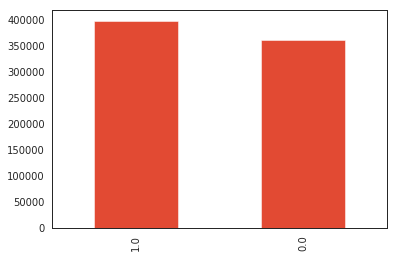

In [91]:
df_data['치석'].value_counts().plot(kind='bar') 
plt.show()

In [111]:
# 앞에서 명목형 변수의 형을 object로 모두 변경했기 때문에 컬럼 중에서 object 타입을 가진 컬럼만 뽑아서 명목형 변수의 리스트를 만든다
# 이 때, 데이터의 기본키(인덱스), 종속변수 등을 제외하고 분석하는 것이 좋음

# 단변수 탐색
category_features = [col for col in df_data.columns if df_data[col].dtypes == "object"]
print(category_features)


cat_cols = list(set(category_features) - set(['치석']))
print(cat_cols)

['성별코드', '연령대코드5세단위', '시도코드', '신장5Cm단위', '체중5Kg단위', '청력좌', '청력우', '흡연상태']
['청력좌', '시도코드', '체중5Kg단위', '청력우', '연령대코드5세단위', '성별코드', '신장5Cm단위', '흡연상태']


### 명목형 변수 EDA

In [112]:
print(len(cat_cols))

8


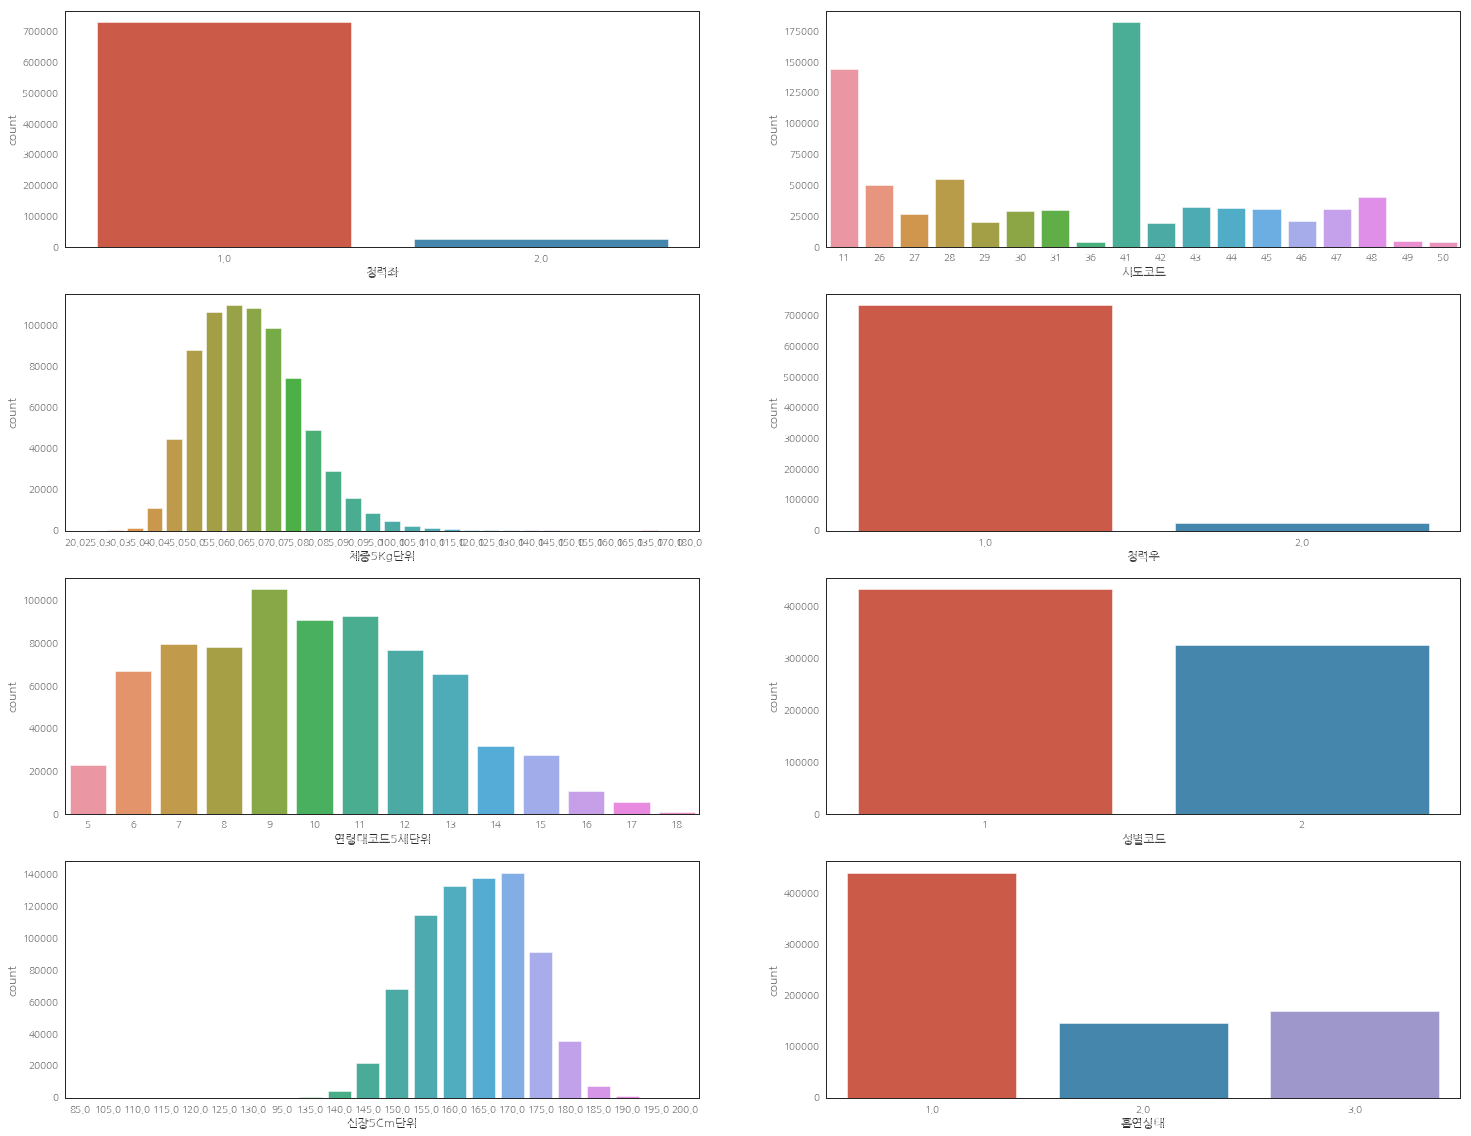

<Figure size 432x288 with 0 Axes>

In [182]:
# 그래프를 통해 명목형 변수의 분포를 체크

# for col in category_features:
#     df_data[col].value_counts().plot(kind='bar')    
#     plt.title(col)
#     plt.show()
    
fig, saxis = plt.subplots(4, 2, figsize=(25,20))
plt.figure()

# 변수별로 for문을 돌면서 countplot을 그립니다
for idx, col in enumerate(cat_cols):
  row_loc = idx // 2
  col_loc = idx % 2
#   print(idx, row_loc, col_loc)
  sns.countplot(x=df_data[col], data= df_data, ax = saxis[row_loc,col_loc])
#   df_data[col].value_counts().plot(kind='bar', ax = saxis[row_loc,col_loc])
  
plt.show()

In [0]:
# # 단변수 Correlation Check

# def portion_func(x):
#     sum_val = np.sum(x)
#     cnt_val = len(x)
#     portion_val = sum_val/cnt_val
#     return portion_val

  
# for col in category_features:
#     if df_data[col].dtype == 'object':
#         print('치석 Correlation by:', col)
#         print(df_data[[col, '치석']].groupby(col).agg(['sum', 'count']))

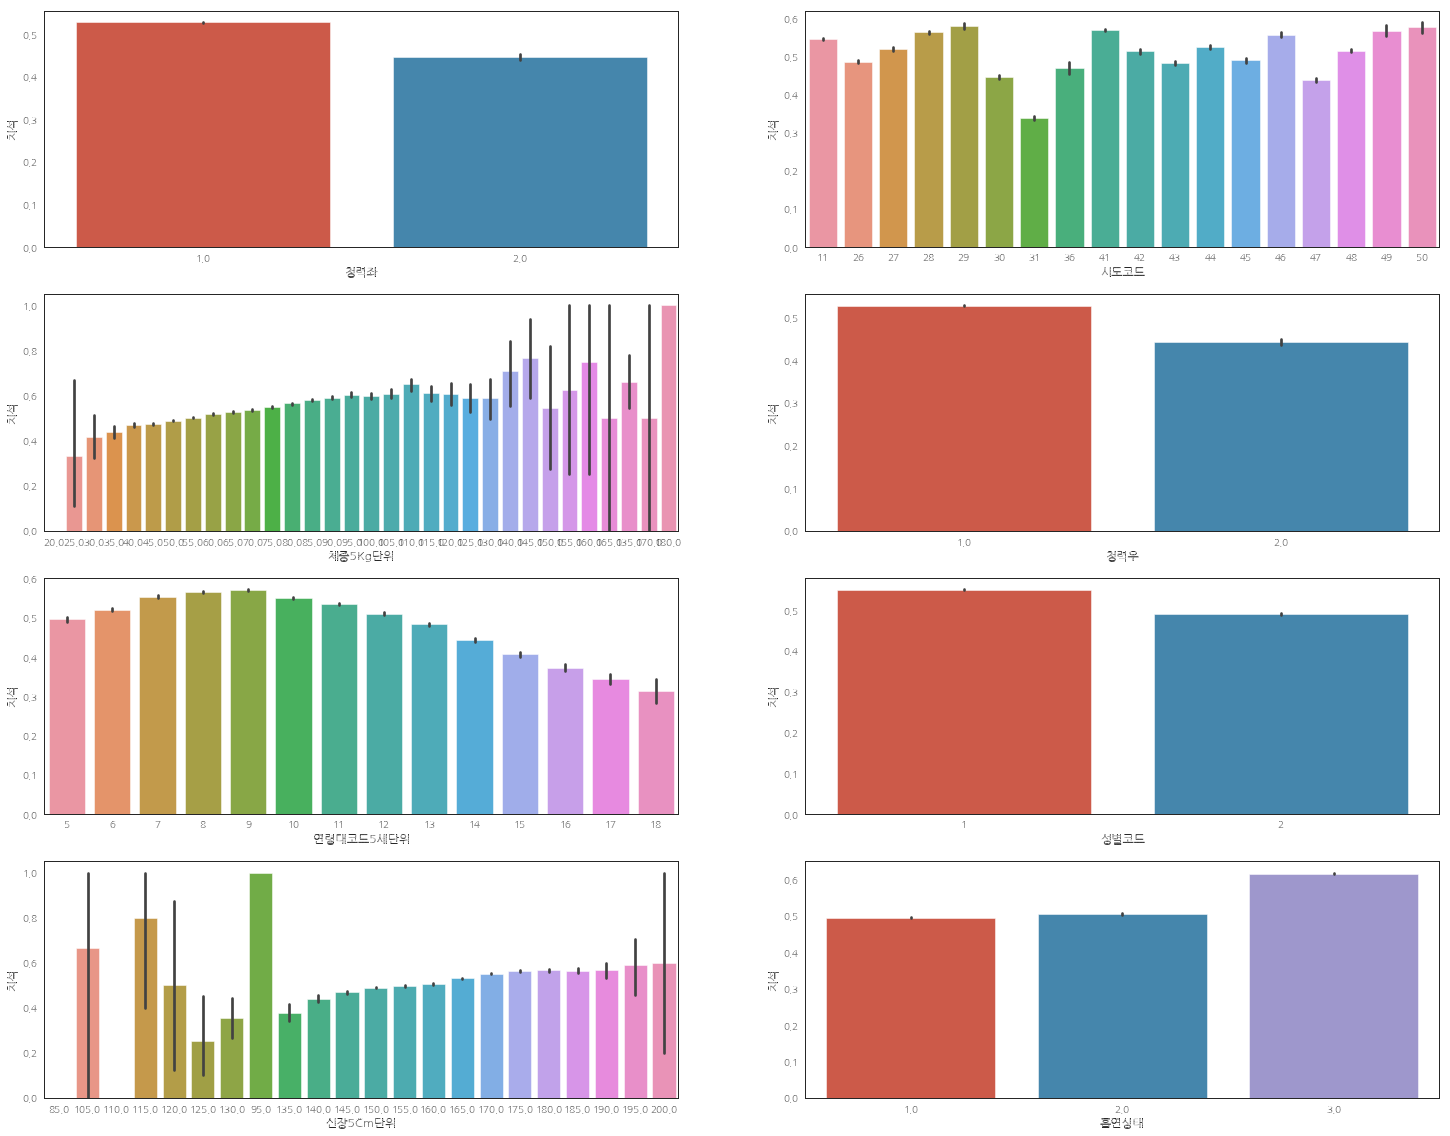

<Figure size 432x288 with 0 Axes>

In [181]:
# 이변수 탐색
# Simple Plotting
# categorical values

# fig, saxis = plt.subplots(1, 4, figsize=(20,4))

# plt.figure()

# sns.barplot(x='성별코드', y='치석', data=df_data, ax = saxis[0])
# sns.barplot(x='시도코드',y='치석', data=df_data, ax = saxis[1])
# sns.barplot(x='흡연상태',y='치석', data=df_data, ax = saxis[2])
# sns.barplot(x='흡연상태',y='치석', hue='성별코드', data=df_data, ax = saxis[3])

# plt.show()



fig, saxis = plt.subplots(4, 2, figsize=(25,20))
plt.figure()

# 변수별로 for문을 돌면서 barplot을 그립니다
for idx, col in enumerate(cat_cols):
  row_loc = idx // 2
  col_loc = idx % 2
#   print(idx, row_loc, col_loc)
  sns.barplot(x=col, y='치석', data= df_data, ax = saxis[row_loc,col_loc])
#   df_data[col].value_counts().plot(kind='bar', ax = saxis[row_loc,col_loc])
  
plt.show()

### 수치형 변수 EDA



In [114]:
# 앞에서 명목형 변수의 형을 object로 모두 변경했기 때문에 컬럼 중에서 object 타입을 가진 컬럼만 뽑아서 명목형 변수의 리스트를 만든다
# 이 때, 데이터의 기본키(인덱스), 종속변수 등을 제외하고 분석하는 것이 좋음

# 단변수 탐색
numeric_features = [col for col in df_data.columns if df_data[col].dtypes != "object"]
numeric_features = np.sort(numeric_features)


num_cols = list(set(numeric_features) - set(['치석']))
print(num_cols)

print(len(num_cols)) # 총 16개

['혈색소', '시력좌', '시력우', '식전혈당공복혈당', '혈청지오티AST', '혈청크레아티닌', 'LDL콜레스테롤', '허리둘레', 'HDL콜레스테롤', '총콜레스테롤', '감마지티피', '이완기혈압', '트리글리세라이드', '요단백', '수축기혈압', '혈청지오티ALT']
16


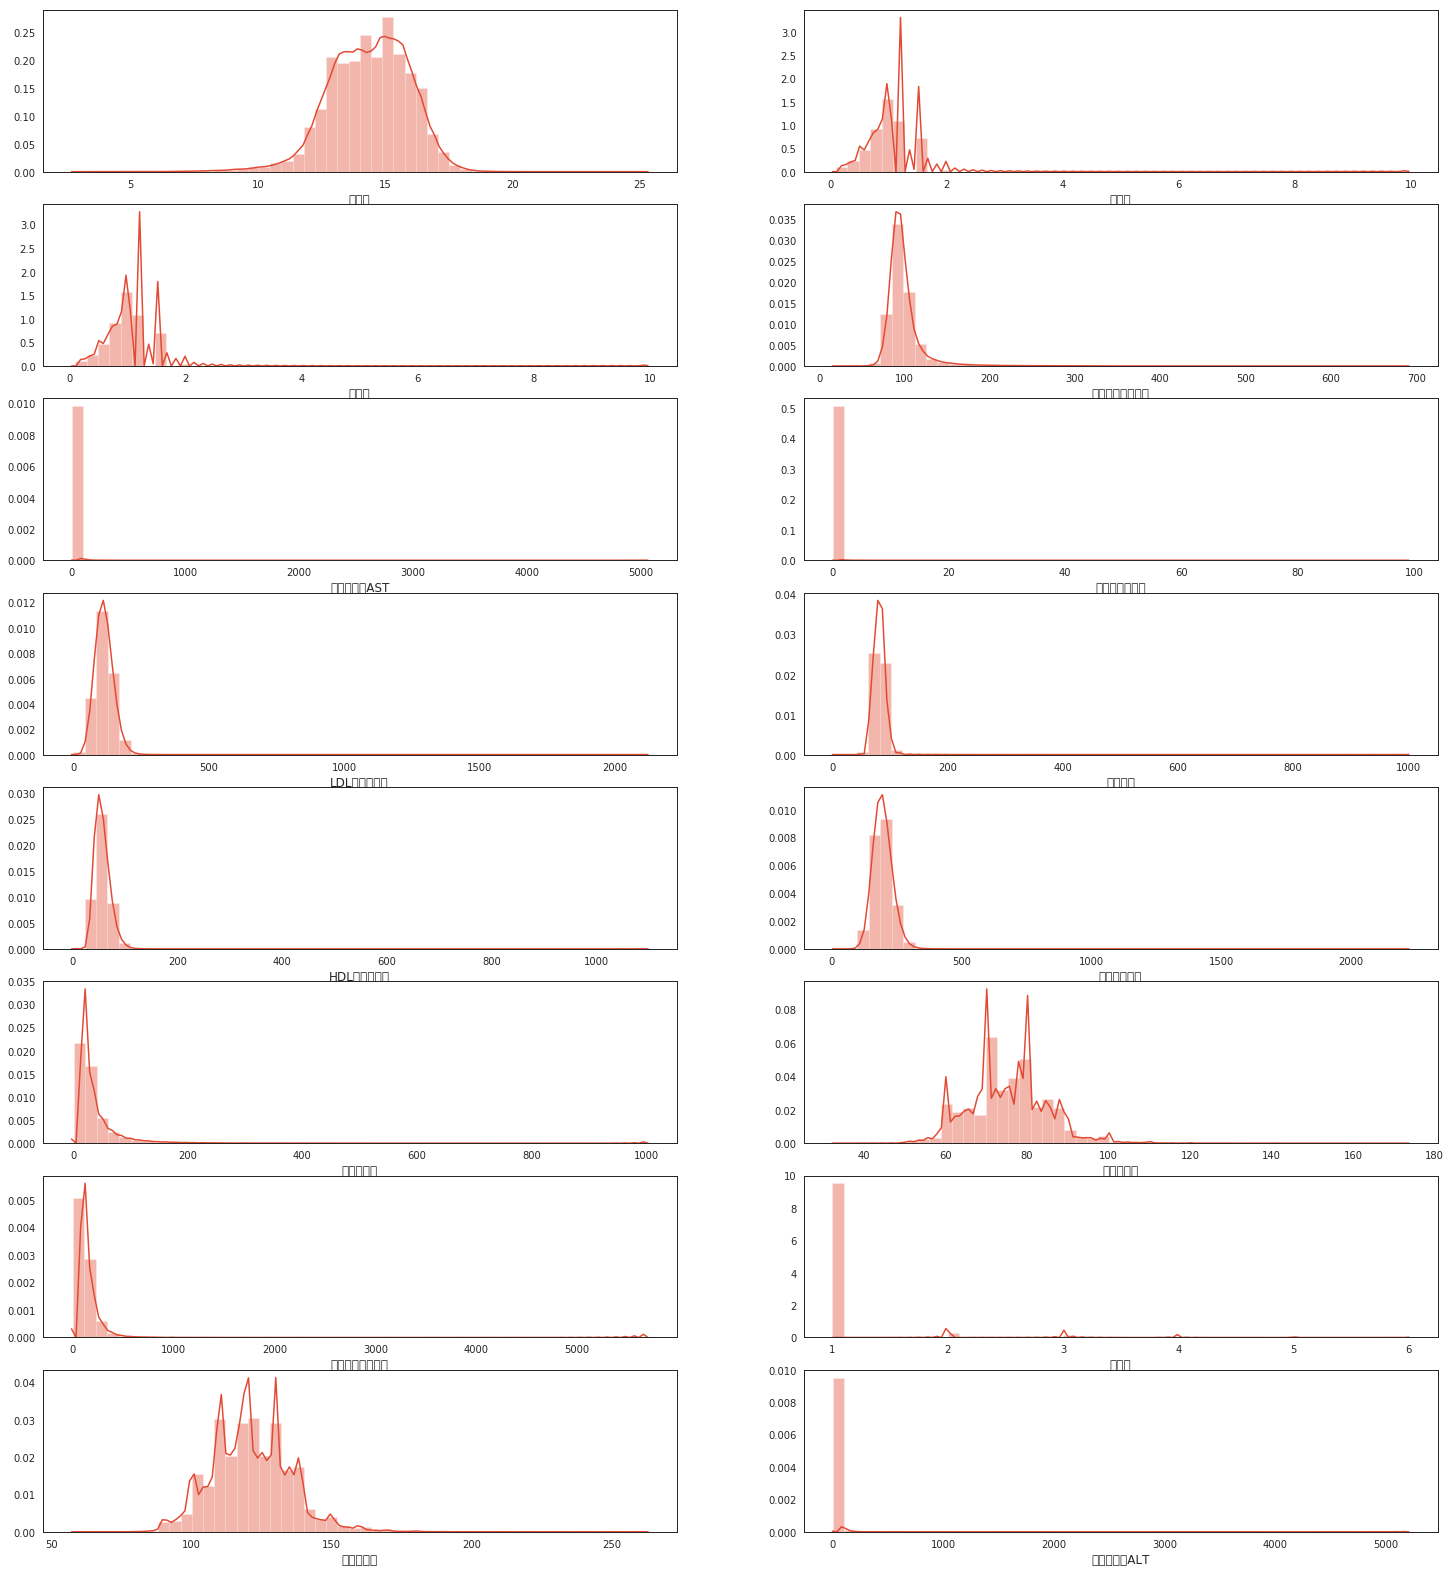

<Figure size 432x288 with 0 Axes>

In [115]:
# 단변수 탐색 - 단변수 탐색은 seaborn 패키지의 distplot 함수를 이용하면 매우 편함
# 수치형 변수만 골라냄
fig, saxis = plt.subplots(8, 2, figsize=(25,28))
plt.figure()

# 변수별로 for문을 돌면서 distplot을 그립니다


for idx, col in enumerate(num_cols):
    row_loc = idx // 2
    col_loc = idx % 2
#     print(idx, row_loc, col_loc)
    sns.distplot(df_data.loc[df_data[col].notnull(), col], ax = saxis[row_loc,col_loc])

plt.show()

In [116]:
# (일단 임시로~~~) null 포함 데이터 모두 삭제 
df_excl_na = df_data.dropna(how='any')
df_excl_na.head()

print(len(df_excl_na))

751452


In [117]:
df_excl_na.drop_duplicates()
df_excl_na.reset_index(inplace=True, drop=True)

print(len(df_excl_na))

df_excl_na.head()

751452


성별코드 연령대코드5세단위 시도코드 신장5Cm단위 체중5Kg단위  ...  혈청지오티AST  혈청지오티ALT  감마지티피 흡연상태   치석
0    1        12   48     175      70  ...      20.0      39.0   69.0    2  1.0
1    1        10   31     175      70  ...      25.0      30.0   24.0    3  0.0
2    1         7   46     170      80  ...      27.0      39.0   81.0    3  0.0
3    1         7   41     170      80  ...      22.0      22.0  101.0    1  1.0
4    1         9   26     165      65  ...      30.0      40.0   62.0    1  0.0

[5 rows x 25 columns]

In [118]:
# 수치형 변수들에 log를 취한 값 산출

# Feature Engineering의 일환으로 Log 값 취한 뒤 Normalization을 하여 변수명 + LN (lognorm)으로 열 추가 후 그래프 다시 그림
num_ln_cols = list(map(lambda x: str(x)+"_LN", num_cols))

num_pipeline = Pipeline([
        ('log_scaler', FunctionTransformer(np.log1p, validate=True)), # pipeline 내 log transformation을 위해 Function Transfomer 사용
        ('normalizer', MinMaxScaler()),
    ])

piped_np = num_pipeline.fit_transform(df_excl_na[num_cols])
piped_df = pd.DataFrame(piped_np, columns=num_ln_cols)

print(len(piped_df))
piped_df.head()

751452


혈색소_LN    시력좌_LN    시력우_LN  ...  요단백_LN  수축기혈압_LN  혈청지오티ALT_LN
0  0.797576  0.302229  0.302229  ...     0.0  0.493545     0.380913
1  0.702567  0.357967  0.357967  ...     0.0  0.436185     0.348503
2  0.794566  0.357967  0.260671  ...     0.0  0.556605     0.380913
3  0.750544  0.163375  0.105152  ...     0.0  0.515214     0.310549
4  0.720201  0.357967  0.437464  ...     0.0  0.424115     0.384053

[5 rows x 16 columns]

In [119]:
# df_fe = df_excl_na.join(piped_df, how='inner')
# print(len(df_fe))

df_fe = pd.concat([df_excl_na, piped_df], axis=1)
df_fe.head()

성별코드 연령대코드5세단위 시도코드 신장5Cm단위  ... 트리글리세라이드_LN  요단백_LN  수축기혈압_LN  혈청지오티ALT_LN
0    1        12   48     175  ...    0.435003     0.0  0.493545     0.380913
1    1        10   31     175  ...    0.456368     0.0  0.436185     0.348503
2    1         7   46     170  ...    0.609229     0.0  0.556605     0.380913
3    1         7   41     170  ...    0.565979     0.0  0.515214     0.310549
4    1         9   26     165  ...    0.491992     0.0  0.424115     0.384053

[5 rows x 41 columns]

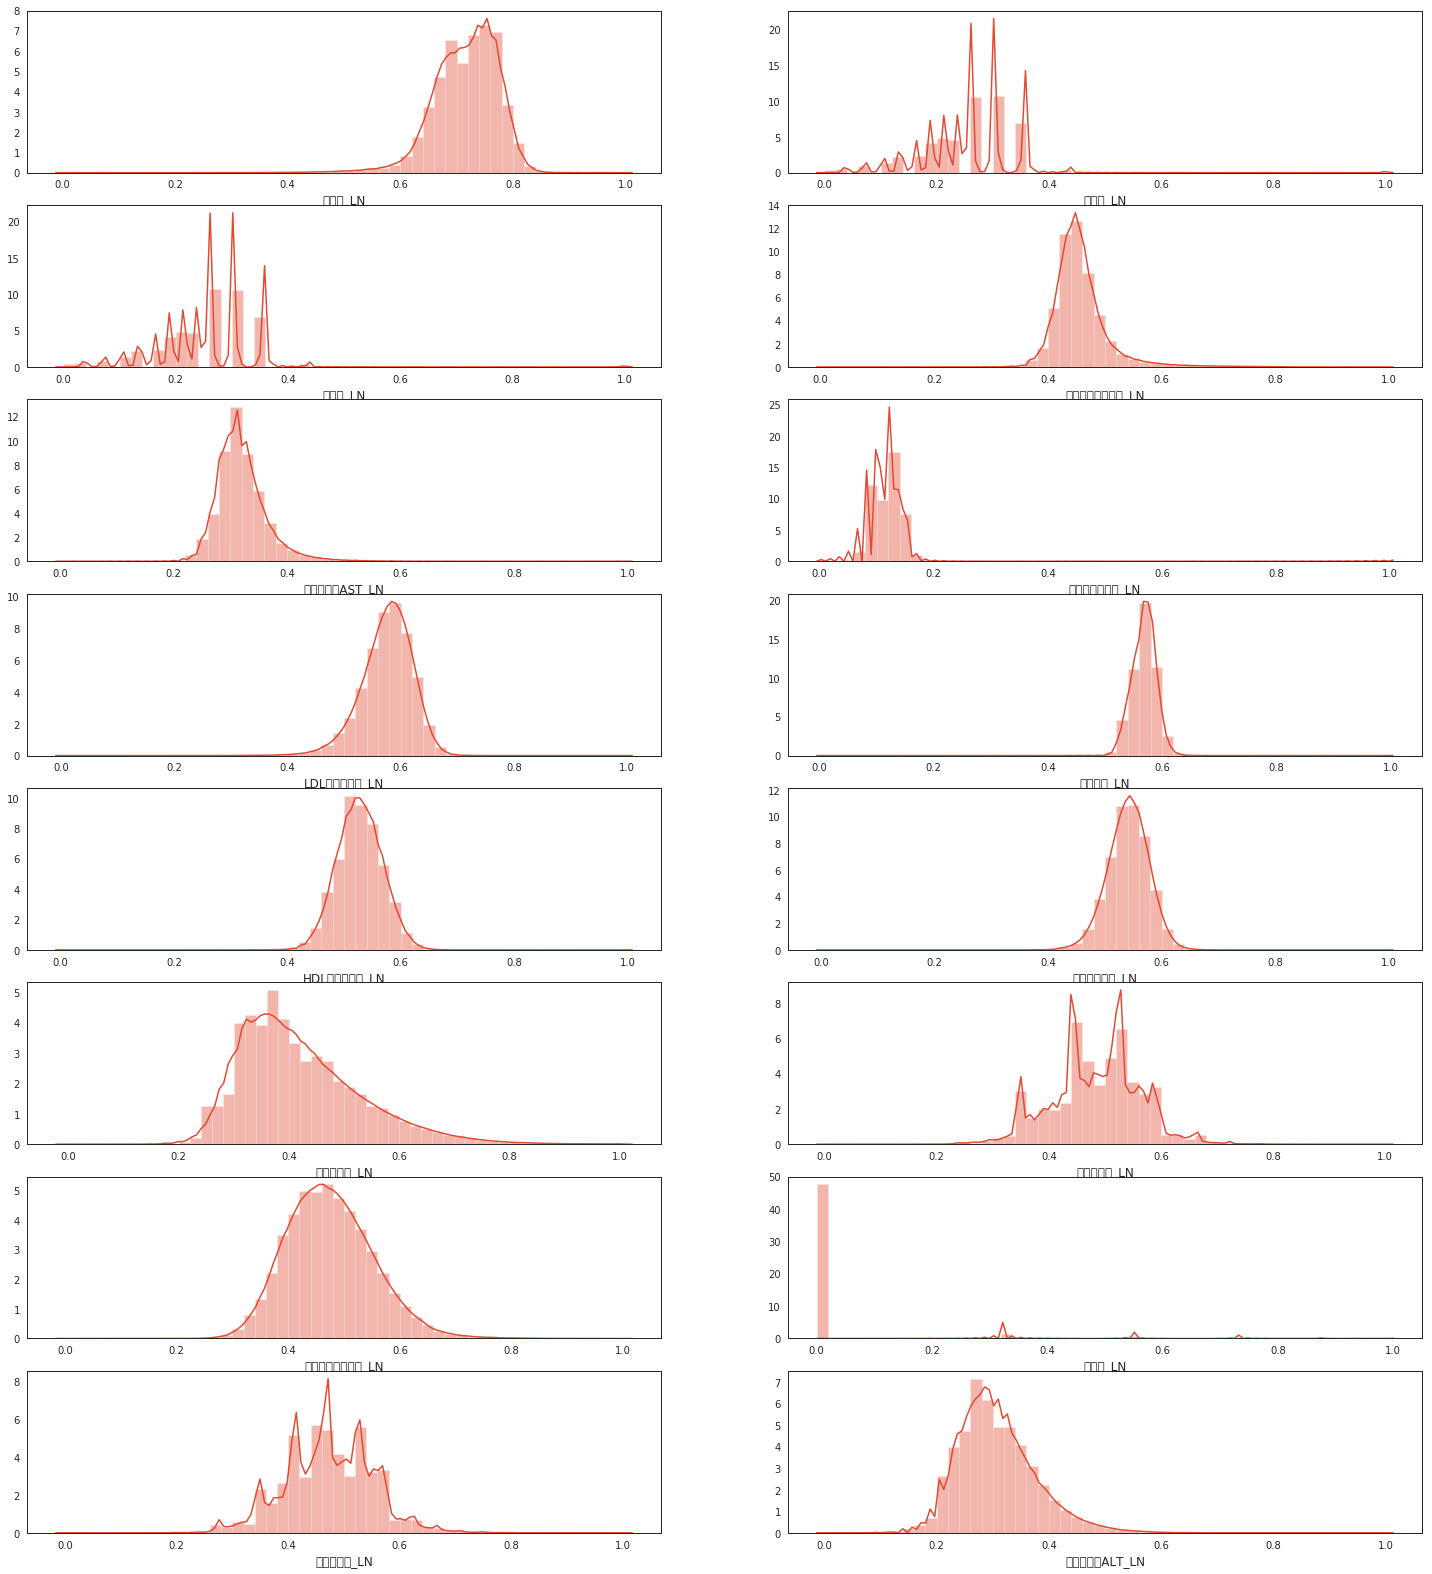

<Figure size 432x288 with 0 Axes>

In [120]:
# 단변수 탐색 with log 변형 변수
# 수치형 변수만 골라냄
fig, saxis = plt.subplots(8, 2, figsize=(25,28))
plt.figure()

# 변수별로 for문을 돌면서 distplot을 그립니다


for idx, col in enumerate(num_ln_cols):
    row_loc = idx // 2
    col_loc = idx % 2
#     print(idx, row_loc, col_loc)
    sns.distplot(df_fe.loc[df_fe[col].notnull(), col], ax = saxis[row_loc,col_loc])

plt.show()


In [0]:
! pip install woe

In [0]:
# Calculate IV Setting

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import string
import woe
from woe.eval import plot_ks

max_bin = 10
force_bin = 3

In [0]:
# Define a binning function for continous independent variables
def mono_bin(Y, X, n = max_bin):
  df1 = pd.DataFrame({"X": X, "Y": Y})
  justmiss = df1[['X','Y']][df1.X.isnull()]
  notmiss = df1[['X','Y']][df1.X.notnull()]
  r = 0
    
  while np.abs(r) < 1:
    try:
      global d1
      global d2
      d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
      d2 = d1.groupby('Bucket', as_index=True)
      r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
      n = n - 1 
    except Exception as e:
      n = n - 1
      break
      
  if len(d2) == 1:
    n = force_bin         
    bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
    if len(np.unique(bins)) == 2:
        bins = np.insert(bins, 0, 1)
        bins[1] = bins[1]-(bins[1]/2)
    d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
    d2 = d1.groupby('Bucket', as_index=True)

  d3 = pd.DataFrame({},index=[])
  d3["MIN_VALUE"] = d2.min().X
  d3["MAX_VALUE"] = d2.max().X
  d3["COUNT"] = d2.count().Y
  d3["EVENT"] = d2.sum().Y
  d3["NONEVENT"] = d2.count().Y - d2.sum().Y
  d3=d3.reset_index(drop=True)

  if len(justmiss.index) > 0:
      d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
      d4["MAX_VALUE"] = np.nan
      d4["COUNT"] = justmiss.count().Y
      d4["EVENT"] = justmiss.sum().Y
      d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
      d3 = d3.append(d4,ignore_index=True)

  d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
  d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
  d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
  d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
  d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
  d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
  d3["VAR_NAME"] = "VAR"
  d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
  d3 = d3.replace([np.inf, -np.inf], 0)
  d3.IV = d3.IV.sum()

  return(d3)
  
# Define a binning function for categorical independent variables
def char_bin(Y, X):
  df1 = pd.DataFrame({"X": X, "Y": Y})
  justmiss = df1[['X','Y']][df1.X.isnull()]
  notmiss = df1[['X','Y']][df1.X.notnull()]    
  df2 = notmiss.groupby('X',as_index=True)

  d3 = pd.DataFrame({},index=[])
  d3["COUNT"] = df2.count().Y
  d3["MIN_VALUE"] = df2.sum().Y.index
  d3["MAX_VALUE"] = d3["MIN_VALUE"]
  d3["EVENT"] = df2.sum().Y
  d3["NONEVENT"] = df2.count().Y - df2.sum().Y

  if len(justmiss.index) > 0:
    d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
    d4["MAX_VALUE"] = np.nan
    d4["COUNT"] = justmiss.count().Y
    d4["EVENT"] = justmiss.sum().Y
    d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
    d3 = d3.append(d4,ignore_index=True)

  d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
  d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
  d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
  d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
  d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
  d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
  d3["VAR_NAME"] = "VAR"
  d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
  d3 = d3.replace([np.inf, -np.inf], 0)
  d3.IV = d3.IV.sum()
  d3 = d3.reset_index(drop=True)

  return(d3)

# Calculate Information Values
def calc_iv_all(df1, target):
    
  stack = traceback.extract_stack()
  filename, lineno, function_name, code = stack[-2]
  vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
  final = (re.findall(r"[\w']+", vars_name))[-1]

  x = df1.dtypes.index
  count = -1

  for i in tqdm_notebook(x):
    if i.upper() not in (final.upper()):
      if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
        conv = mono_bin(target, df1[i])
        conv["VAR_NAME"] = i
        count = count + 1
      else:
        conv = char_bin(target, df1[i])
        conv["VAR_NAME"] = i            
        count = count + 1

      if count == 0:
        iv_df = conv
      else:
        iv_df = iv_df.append(conv,ignore_index=True)

  iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
  iv = iv.reset_index()
  return(iv_df,iv)

In [0]:
# Data Sampling으로 몇 개 추려서 Information Value Test
df_sample = df_fe.sample(100).copy()
# display(df_sample.head())
# display(df_sample.info())

In [164]:
final_iv, IV = calc_iv_all(df_sample,df_sample['치석'])
final_iv

char_bin function in .... 
char_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766   76.0  0.0    (75.0, 77.7]
529594   92.0  1.0    (88.0, 92.0]
31957    77.0  0.0    (75.0, 77.7]
234982   75.0  1.0    (70.0, 75.0]
490210   86.0  0.0    (83.4, 86.0]
119316   75.0  1.0    (70.0, 75.0]
163107   84.0  1.0    (83.4, 86.0]
412263   63.5  1.0  (63.499, 70.0]
76497    90.0  0.0    (88.0, 92.0]
130374   75.0  0.0    (70.0, 75.0]
727938   72.0  1.0    (70.0, 75.0]
90183    78.0  1.0    (77.7, 80.0]
633497   82.0  0.0    (80.0, 82.0]
111274   86.0  1.0    (83.4, 86.0]
261765   64.0  1.0  (63.499, 70.0]
90075    84.0  0.0    (83.4, 86.0]
739302   79.0  0.0    (77.7, 80.0]
542827   83.0  0.0    (82.0, 83.4]
690406   87.3  0.0    (86.0, 88.0]
430466   84.0  0.0    (83.4, 86.0]
211921   70.0  0.0  (63.499, 70.0]
293792   92.0  1.0    (88.0, 92.0]
246527   91.0  1.0    (88.0, 92.0]
694603   78.5  0.0    (77.7, 80.0]
748389   81.0  0.0    (80.0, 82.0]
12279    81.0  1.0    (80.0, 82.0]
19925    92.0  0.0    (88.0, 92.0]
225426   75.0  1.0    (70.0, 75.0]
658930   78.0  1.0    (77.7, 80.0]
676582   85.0  1.0    (83.4, 86.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 70.0]
429573   81.3  0.0    (80.0, 82.0]
137895   87.0  0.0    (86.0, 88.0]
181835   69.0  0.0  (63.499, 70.0]
248655   70.0  1.0  (63.499, 70.0]
352566   78.0  0.0    (77.7, 80.0]
543628   82.0  1.0    (80.0, 82.0]
578874   70.0  1.0  (63.499, 70.0]
489918   78.5  1.0    (77.7, 80.0]
240310   72.0  0.0    (70.0, 75.0]
381802   87.1  1.0    (86.0, 88.0]
268417   77.0  1.0    (75.0, 77.7]
490280   71.0  0.0    (70.0, 75.0]
508991   67.0  1.0  (63.499, 70.0]
365539   83.0  0.0    (82.0, 83.4]
253458   80.0  1.0    (77.7, 80.0]
470317  111.0  1.0   (92.0, 116.0]
172907   86.0  0.0    (83.4, 86.0]
184094   83.0  1.0    (82.0, 83.4]
171402   76.0  0.0    (75.0, 77.7]
391042   88.0  1.0    (86.0, 88.0]
672153   91.0  0.0    (88.0, 92.0]
329204   94.0  0.0   (92.0, 116.0]
589562   80.0  0.0    (77.7, 80.0]
141345  100.0  0.0   (92.0, 116.0]
56919    82.0  1.0    (80.0, 82.0]
659329   85.1  0.0    (83.4, 86.0]
531859   78.0  0.0    (77.7, 80.0]
49214    92.0  1.0    (88.0, 92.0]
599209   83.0  1.0    (82.0, 83.4]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0    (70.0, 76.0]
529594   92.0  1.0    (87.3, 92.0]
31957    77.0  0.0    (76.0, 78.0]
234982   75.0  1.0    (70.0, 76.0]
490210   86.0  0.0    (85.0, 87.3]
119316   75.0  1.0    (70.0, 76.0]
163107   84.0  1.0    (83.0, 85.0]
412263   63.5  1.0  (63.499, 70.0]
76497    90.0  0.0    (87.3, 92.0]
130374   75.0  0.0    (70.0, 76.0]
727938   72.0  1.0    (70.0, 76.0]
90183    78.0  1.0    (76.0, 78.0]
633497   82.0  0.0    (81.0, 83.0]
111274   86.0  1.0    (85.0, 87.3]
261765   64.0  1.0  (63.499, 70.0]
90075    84.0  0.0    (83.0, 85.0]
739302   79.0  0.0    (78.0, 81.0]
542827   83.0  0.0    (81.0, 83.0]
690406   87.3  0.0    (85.0, 87.3]
430466   84.0  0.0    (83.0, 85.0]
211921   70.0  0.0  (63.499, 70.0]
293792   92.0  1.0    (87.3, 92.0]
246527   91.0  1.0    (87.3, 92.0]
694603   78.5  0.0    (78.0, 81.0]
748389   81.0  0.0    (78.0, 81.0]
12279    81.0  1.0    (78.0, 81.0]
19925    92.0  0.0    (87.3, 92.0]
225426   75.0  1.0    (70.0, 76.0]
658930   78.0  1.0    (76.0, 78.0]
676582   85.0  1.0    (83.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 70.0]
429573   81.3  0.0    (81.0, 83.0]
137895   87.0  0.0    (85.0, 87.3]
181835   69.0  0.0  (63.499, 70.0]
248655   70.0  1.0  (63.499, 70.0]
352566   78.0  0.0    (76.0, 78.0]
543628   82.0  1.0    (81.0, 83.0]
578874   70.0  1.0  (63.499, 70.0]
489918   78.5  1.0    (78.0, 81.0]
240310   72.0  0.0    (70.0, 76.0]
381802   87.1  1.0    (85.0, 87.3]
268417   77.0  1.0    (76.0, 78.0]
490280   71.0  0.0    (70.0, 76.0]
508991   67.0  1.0  (63.499, 70.0]
365539   83.0  0.0    (81.0, 83.0]
253458   80.0  1.0    (78.0, 81.0]
470317  111.0  1.0   (92.0, 116.0]
172907   86.0  0.0    (85.0, 87.3]
184094   83.0  1.0    (81.0, 83.0]
171402   76.0  0.0    (70.0, 76.0]
391042   88.0  1.0    (87.3, 92.0]
672153   91.0  0.0    (87.3, 92.0]
329204   94.0  0.0   (92.0, 116.0]
589562   80.0  0.0    (78.0, 81.0]
141345  100.0  0.0   (92.0, 116.0]
56919    82.0  1.0    (81.0, 83.0]
659329   85.1  0.0    (85.0, 87.3]
531859   78.0  0.0    (76.0, 78.0]
49214    92.0  1.0    (87.3, 92.0]
599209   83.0  1.0    (81.0, 83.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766   76.0  0.0    (70.375, 76.0]
529594   92.0  1.0      (87.0, 92.0]
31957    77.0  0.0      (76.0, 79.0]
234982   75.0  1.0    (70.375, 76.0]
490210   86.0  0.0      (84.0, 87.0]
119316   75.0  1.0    (70.375, 76.0]
163107   84.0  1.0      (82.0, 84.0]
412263   63.5  1.0  (63.499, 70.375]
76497    90.0  0.0      (87.0, 92.0]
130374   75.0  0.0    (70.375, 76.0]
727938   72.0  1.0    (70.375, 76.0]
90183    78.0  1.0      (76.0, 79.0]
633497   82.0  0.0      (79.0, 82.0]
111274   86.0  1.0      (84.0, 87.0]
261765   64.0  1.0  (63.499, 70.375]
90075    84.0  0.0      (82.0, 84.0]
739302   79.0  0.0      (76.0, 79.0]
542827   83.0  0.0      (82.0, 84.0]
690406   87.3  0.0      (87.0, 92.0]
430466   84.0  0.0      (82.0, 84.0]
211921   70.0  0.0  (63.499, 70.375]
293792   92.0  1.0      (87.0, 92.0]
246527   91.0  1.0      (87.0, 92.0]
694603   78.5  0.0      (76.0, 79.0]
748389   81.0  0.0      (79.0, 82.0]
12279    81.0  1.0      (79.0, 82.0]
19925    92.0  0.0      (87.0, 92.0]
225426   75.0  1.0    (70.375, 76.0]
658930   78.0  1.0      (76.0, 79.0]
676582   85.0  1.0      (84.0, 87.0]
...       ...  ...               ...
119454   68.0  0.0  (63.499, 70.375]
429573   81.3  0.0      (79.0, 82.0]
137895   87.0  0.0      (84.0, 87.0]
181835   69.0  0.0  (63.499, 70.375]
248655   70.0  1.0  (63.499, 70.375]
352566   78.0  0.0      (76.0, 79.0]
543628   82.0  1.0      (79.0, 82.0]
578874   70.0  1.0  (63.499, 70.375]
489918   78.5  1.0      (76.0, 79.0]
240310   72.0  0.0    (70.375, 76.0]
381802   87.1  1.0      (87.0, 92.0]
268417   77.0  1.0      (76.0, 79.0]
490280   71.0  0.0    (70.375, 76.0]
508991   67.0  1.0  (63.499, 70.375]
365539   83.0  0.0      (82.0, 84.0]
253458   80.0  1.0      (79.0, 82.0]
470317  111.0  1.0     (92.0, 116.0]
172907   86.0  0.0      (84.0, 87.0]
184094   83.0  1.0      (82.0, 84.0]
171402   76.0  0.0    (70.375, 76.0]
391042   88.0  1.0      (87.0, 92.0]
672153   91.0  0.0      (87.0, 92.0]
329204   94.0  0.0     (92.0, 116.0]
589562   80.0  0.0      (79.0, 82.0]
141345  100.0  0.0     (92.0, 116.0]
56919    82.0  1.0      (79.0, 82.0]
659329   85.1  0.0      (84.0, 87.0]
531859   78.0  0.0      (76.0, 79.0]
49214    92.0  1.0      (87.0, 92.0]
599209   83.0  1.0      (82.0, 84.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0    (72.0, 77.0]
529594   92.0  1.0   (91.0, 116.0]
31957    77.0  0.0    (72.0, 77.0]
234982   75.0  1.0    (72.0, 77.0]
490210   86.0  0.0    (83.0, 86.0]
119316   75.0  1.0    (72.0, 77.0]
163107   84.0  1.0    (83.0, 86.0]
412263   63.5  1.0  (63.499, 72.0]
76497    90.0  0.0    (86.0, 91.0]
130374   75.0  0.0    (72.0, 77.0]
727938   72.0  1.0  (63.499, 72.0]
90183    78.0  1.0  (77.0, 80.429]
633497   82.0  0.0  (80.429, 83.0]
111274   86.0  1.0    (83.0, 86.0]
261765   64.0  1.0  (63.499, 72.0]
90075    84.0  0.0    (83.0, 86.0]
739302   79.0  0.0  (77.0, 80.429]
542827   83.0  0.0  (80.429, 83.0]
690406   87.3  0.0    (86.0, 91.0]
430466   84.0  0.0    (83.0, 86.0]
211921   70.0  0.0  (63.499, 72.0]
293792   92.0  1.0   (91.0, 116.0]
246527   91.0  1.0    (86.0, 91.0]
694603   78.5  0.0  (77.0, 80.429]
748389   81.0  0.0  (80.429, 83.0]
12279    81.0  1.0  (80.429, 83.0]
19925    92.0  0.0   (91.0, 116.0]
225426   75.0  1.0    (72.0, 77.0]
658930   78.0  1.0  (77.0, 80.429]
676582   85.0  1.0    (83.0, 86.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 72.0]
429573   81.3  0.0  (80.429, 83.0]
137895   87.0  0.0    (86.0, 91.0]
181835   69.0  0.0  (63.499, 72.0]
248655   70.0  1.0  (63.499, 72.0]
352566   78.0  0.0  (77.0, 80.429]
543628   82.0  1.0  (80.429, 83.0]
578874   70.0  1.0  (63.499, 72.0]
489918   78.5  1.0  (77.0, 80.429]
240310   72.0  0.0  (63.499, 72.0]
381802   87.1  1.0    (86.0, 91.0]
268417   77.0  1.0    (72.0, 77.0]
490280   71.0  0.0  (63.499, 72.0]
508991   67.0  1.0  (63.499, 72.0]
365539   83.0  0.0  (80.429, 83.0]
253458   80.0  1.0  (77.0, 80.429]
470317  111.0  1.0   (91.0, 116.0]
172907   86.0  0.0    (83.0, 86.0]
184094   83.0  1.0  (80.429, 83.0]
171402   76.0  0.0    (72.0, 77.0]
391042   88.0  1.0    (86.0, 91.0]
672153   91.0  0.0    (86.0, 91.0]
329204   94.0  0.0   (91.0, 116.0]
589562   80.0  0.0  (77.0, 80.429]
141345  100.0  0.0   (91.0, 116.0]
56919    82.0  1.0  (80.429, 83.0]
659329   85.1  0.0    (83.0, 86.0]
531859   78.0  0.0  (77.0, 80.429]
49214    92.0  1.0   (91.0, 116.0]
599209   83.0  1.0  (80.429, 83.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0    (74.5, 78.0]
529594   92.0  1.0   (90.0, 116.0]
31957    77.0  0.0    (74.5, 78.0]
234982   75.0  1.0    (74.5, 78.0]
490210   86.0  0.0    (85.0, 90.0]
119316   75.0  1.0    (74.5, 78.0]
163107   84.0  1.0    (82.0, 85.0]
412263   63.5  1.0  (63.499, 74.5]
76497    90.0  0.0    (85.0, 90.0]
130374   75.0  0.0    (74.5, 78.0]
727938   72.0  1.0  (63.499, 74.5]
90183    78.0  1.0    (74.5, 78.0]
633497   82.0  0.0    (78.0, 82.0]
111274   86.0  1.0    (85.0, 90.0]
261765   64.0  1.0  (63.499, 74.5]
90075    84.0  0.0    (82.0, 85.0]
739302   79.0  0.0    (78.0, 82.0]
542827   83.0  0.0    (82.0, 85.0]
690406   87.3  0.0    (85.0, 90.0]
430466   84.0  0.0    (82.0, 85.0]
211921   70.0  0.0  (63.499, 74.5]
293792   92.0  1.0   (90.0, 116.0]
246527   91.0  1.0   (90.0, 116.0]
694603   78.5  0.0    (78.0, 82.0]
748389   81.0  0.0    (78.0, 82.0]
12279    81.0  1.0    (78.0, 82.0]
19925    92.0  0.0   (90.0, 116.0]
225426   75.0  1.0    (74.5, 78.0]
658930   78.0  1.0    (74.5, 78.0]
676582   85.0  1.0    (82.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 74.5]
429573   81.3  0.0    (78.0, 82.0]
137895   87.0  0.0    (85.0, 90.0]
181835   69.0  0.0  (63.499, 74.5]
248655   70.0  1.0  (63.499, 74.5]
352566   78.0  0.0    (74.5, 78.0]
543628   82.0  1.0    (78.0, 82.0]
578874   70.0  1.0  (63.499, 74.5]
489918   78.5  1.0    (78.0, 82.0]
240310   72.0  0.0  (63.499, 74.5]
381802   87.1  1.0    (85.0, 90.0]
268417   77.0  1.0    (74.5, 78.0]
490280   71.0  0.0  (63.499, 74.5]
508991   67.0  1.0  (63.499, 74.5]
365539   83.0  0.0    (82.0, 85.0]
253458   80.0  1.0    (78.0, 82.0]
470317  111.0  1.0   (90.0, 116.0]
172907   86.0  0.0    (85.0, 90.0]
184094   83.0  1.0    (82.0, 85.0]
171402   76.0  0.0    (74.5, 78.0]
391042   88.0  1.0    (85.0, 90.0]
672153   91.0  0.0   (90.0, 116.0]
329204   94.0  0.0   (90.0, 116.0]
589562   80.0  0.0    (78.0, 82.0]
141345  100.0  0.0   (90.0, 116.0]
56919    82.0  1.0    (78.0, 82.0]
659329   85.1  0.0    (85.0, 90.0]
531859   78.0  0.0    (74.5, 78.0]
49214    92.0  1.0   (90.0, 116.0]
599209   83.0  1.0    (82.0, 85.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0    (75.0, 80.0]
529594   92.0  1.0   (88.0, 116.0]
31957    77.0  0.0    (75.0, 80.0]
234982   75.0  1.0  (63.499, 75.0]
490210   86.0  0.0    (83.4, 88.0]
119316   75.0  1.0  (63.499, 75.0]
163107   84.0  1.0    (83.4, 88.0]
412263   63.5  1.0  (63.499, 75.0]
76497    90.0  0.0   (88.0, 116.0]
130374   75.0  0.0  (63.499, 75.0]
727938   72.0  1.0  (63.499, 75.0]
90183    78.0  1.0    (75.0, 80.0]
633497   82.0  0.0    (80.0, 83.4]
111274   86.0  1.0    (83.4, 88.0]
261765   64.0  1.0  (63.499, 75.0]
90075    84.0  0.0    (83.4, 88.0]
739302   79.0  0.0    (75.0, 80.0]
542827   83.0  0.0    (80.0, 83.4]
690406   87.3  0.0    (83.4, 88.0]
430466   84.0  0.0    (83.4, 88.0]
211921   70.0  0.0  (63.499, 75.0]
293792   92.0  1.0   (88.0, 116.0]
246527   91.0  1.0   (88.0, 116.0]
694603   78.5  0.0    (75.0, 80.0]
748389   81.0  0.0    (80.0, 83.4]
12279    81.0  1.0    (80.0, 83.4]
19925    92.0  0.0   (88.0, 116.0]
225426   75.0  1.0  (63.499, 75.0]
658930   78.0  1.0    (75.0, 80.0]
676582   85.0  1.0    (83.4, 88.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 75.0]
429573   81.3  0.0    (80.0, 83.4]
137895   87.0  0.0    (83.4, 88.0]
181835   69.0  0.0  (63.499, 75.0]
248655   70.0  1.0  (63.499, 75.0]
352566   78.0  0.0    (75.0, 80.0]
543628   82.0  1.0    (80.0, 83.4]
578874   70.0  1.0  (63.499, 75.0]
489918   78.5  1.0    (75.0, 80.0]
240310   72.0  0.0  (63.499, 75.0]
381802   87.1  1.0    (83.4, 88.0]
268417   77.0  1.0    (75.0, 80.0]
490280   71.0  0.0  (63.499, 75.0]
508991   67.0  1.0  (63.499, 75.0]
365539   83.0  0.0    (80.0, 83.4]
253458   80.0  1.0    (75.0, 80.0]
470317  111.0  1.0   (88.0, 116.0]
172907   86.0  0.0    (83.4, 88.0]
184094   83.0  1.0    (80.0, 83.4]
171402   76.0  0.0    (75.0, 80.0]
391042   88.0  1.0    (83.4, 88.0]
672153   91.0  0.0   (88.0, 116.0]
329204   94.0  0.0   (88.0, 116.0]
589562   80.0  0.0    (75.0, 80.0]
141345  100.0  0.0   (88.0, 116.0]
56919    82.0  1.0    (80.0, 83.4]
659329   85.1  0.0    (83.4, 88.0]
531859   78.0  0.0    (75.0, 80.0]
49214    92.0  1.0   (88.0, 116.0]
599209   83.0  1.0    (80.0, 83.4]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0  (63.499, 76.0]
529594   92.0  1.0   (87.0, 116.0]
31957    77.0  0.0    (76.0, 82.0]
234982   75.0  1.0  (63.499, 76.0]
490210   86.0  0.0    (82.0, 87.0]
119316   75.0  1.0  (63.499, 76.0]
163107   84.0  1.0    (82.0, 87.0]
412263   63.5  1.0  (63.499, 76.0]
76497    90.0  0.0   (87.0, 116.0]
130374   75.0  0.0  (63.499, 76.0]
727938   72.0  1.0  (63.499, 76.0]
90183    78.0  1.0    (76.0, 82.0]
633497   82.0  0.0    (76.0, 82.0]
111274   86.0  1.0    (82.0, 87.0]
261765   64.0  1.0  (63.499, 76.0]
90075    84.0  0.0    (82.0, 87.0]
739302   79.0  0.0    (76.0, 82.0]
542827   83.0  0.0    (82.0, 87.0]
690406   87.3  0.0   (87.0, 116.0]
430466   84.0  0.0    (82.0, 87.0]
211921   70.0  0.0  (63.499, 76.0]
293792   92.0  1.0   (87.0, 116.0]
246527   91.0  1.0   (87.0, 116.0]
694603   78.5  0.0    (76.0, 82.0]
748389   81.0  0.0    (76.0, 82.0]
12279    81.0  1.0    (76.0, 82.0]
19925    92.0  0.0   (87.0, 116.0]
225426   75.0  1.0  (63.499, 76.0]
658930   78.0  1.0    (76.0, 82.0]
676582   85.0  1.0    (82.0, 87.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 76.0]
429573   81.3  0.0    (76.0, 82.0]
137895   87.0  0.0    (82.0, 87.0]
181835   69.0  0.0  (63.499, 76.0]
248655   70.0  1.0  (63.499, 76.0]
352566   78.0  0.0    (76.0, 82.0]
543628   82.0  1.0    (76.0, 82.0]
578874   70.0  1.0  (63.499, 76.0]
489918   78.5  1.0    (76.0, 82.0]
240310   72.0  0.0  (63.499, 76.0]
381802   87.1  1.0   (87.0, 116.0]
268417   77.0  1.0    (76.0, 82.0]
490280   71.0  0.0  (63.499, 76.0]
508991   67.0  1.0  (63.499, 76.0]
365539   83.0  0.0    (82.0, 87.0]
253458   80.0  1.0    (76.0, 82.0]
470317  111.0  1.0   (87.0, 116.0]
172907   86.0  0.0    (82.0, 87.0]
184094   83.0  1.0    (82.0, 87.0]
171402   76.0  0.0  (63.499, 76.0]
391042   88.0  1.0   (87.0, 116.0]
672153   91.0  0.0   (87.0, 116.0]
329204   94.0  0.0   (87.0, 116.0]
589562   80.0  0.0    (76.0, 82.0]
141345  100.0  0.0   (87.0, 116.0]
56919    82.0  1.0    (76.0, 82.0]
659329   85.1  0.0    (82.0, 87.0]
531859   78.0  0.0    (76.0, 82.0]
49214    92.0  1.0   (87.0, 116.0]
599209   83.0  1.0    (82.0, 87.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   76.0  0.0  (63.499, 78.0]
529594   92.0  1.0   (85.0, 116.0]
31957    77.0  0.0  (63.499, 78.0]
234982   75.0  1.0  (63.499, 78.0]
490210   86.0  0.0   (85.0, 116.0]
119316   75.0  1.0  (63.499, 78.0]
163107   84.0  1.0    (78.0, 85.0]
412263   63.5  1.0  (63.499, 78.0]
76497    90.0  0.0   (85.0, 116.0]
130374   75.0  0.0  (63.499, 78.0]
727938   72.0  1.0  (63.499, 78.0]
90183    78.0  1.0  (63.499, 78.0]
633497   82.0  0.0    (78.0, 85.0]
111274   86.0  1.0   (85.0, 116.0]
261765   64.0  1.0  (63.499, 78.0]
90075    84.0  0.0    (78.0, 85.0]
739302   79.0  0.0    (78.0, 85.0]
542827   83.0  0.0    (78.0, 85.0]
690406   87.3  0.0   (85.0, 116.0]
430466   84.0  0.0    (78.0, 85.0]
211921   70.0  0.0  (63.499, 78.0]
293792   92.0  1.0   (85.0, 116.0]
246527   91.0  1.0   (85.0, 116.0]
694603   78.5  0.0    (78.0, 85.0]
748389   81.0  0.0    (78.0, 85.0]
12279    81.0  1.0    (78.0, 85.0]
19925    92.0  0.0   (85.0, 116.0]
225426   75.0  1.0  (63.499, 78.0]
658930   78.0  1.0  (63.499, 78.0]
676582   85.0  1.0    (78.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 78.0]
429573   81.3  0.0    (78.0, 85.0]
137895   87.0  0.0   (85.0, 116.0]
181835   69.0  0.0  (63.499, 78.0]
248655   70.0  1.0  (63.499, 78.0]
352566   78.0  0.0  (63.499, 78.0]
543628   82.0  1.0    (78.0, 85.0]
578874   70.0  1.0  (63.499, 78.0]
489918   78.5  1.0    (78.0, 85.0]
240310   72.0  0.0  (63.499, 78.0]
381802   87.1  1.0   (85.0, 116.0]
268417   77.0  1.0  (63.499, 78.0]
490280   71.0  0.0  (63.499, 78.0]
508991   67.0  1.0  (63.499, 78.0]
365539   83.0  0.0    (78.0, 85.0]
253458   80.0  1.0    (78.0, 85.0]
470317  111.0  1.0   (85.0, 116.0]
172907   86.0  0.0   (85.0, 116.0]
184094   83.0  1.0    (78.0, 85.0]
171402   76.0  0.0  (63.499, 78.0]
391042   88.0  1.0   (85.0, 116.0]
672153   91.0  0.0   (85.0, 116.0]
329204   94.0  0.0   (85.0, 116.0]
589562   80.0  0.0    (78.0, 85.0]
141345  100.0  0.0   (85.0, 116.0]
56919    82.0  1.0    (78.0, 85.0]
659329   85.1  0.0   (85.0, 116.0]
531859   78.0  0.0  (63.499, 78.0]
49214    92.0  1.0   (85.0, 116.0]
599209   83.0  1.0    (78.0, 85.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766   76.0  0.0  (63.499, 78.0]
529594   92.0  1.0   (85.0, 116.0]
31957    77.0  0.0  (63.499, 78.0]
234982   75.0  1.0  (63.499, 78.0]
490210   86.0  0.0   (85.0, 116.0]
119316   75.0  1.0  (63.499, 78.0]
163107   84.0  1.0    (78.0, 85.0]
412263   63.5  1.0  (63.499, 78.0]
76497    90.0  0.0   (85.0, 116.0]
130374   75.0  0.0  (63.499, 78.0]
727938   72.0  1.0  (63.499, 78.0]
90183    78.0  1.0  (63.499, 78.0]
633497   82.0  0.0    (78.0, 85.0]
111274   86.0  1.0   (85.0, 116.0]
261765   64.0  1.0  (63.499, 78.0]
90075    84.0  0.0    (78.0, 85.0]
739302   79.0  0.0    (78.0, 85.0]
542827   83.0  0.0    (78.0, 85.0]
690406   87.3  0.0   (85.0, 116.0]
430466   84.0  0.0    (78.0, 85.0]
211921   70.0  0.0  (63.499, 78.0]
293792   92.0  1.0   (85.0, 116.0]
246527   91.0  1.0   (85.0, 116.0]
694603   78.5  0.0    (78.0, 85.0]
748389   81.0  0.0    (78.0, 85.0]
12279    81.0  1.0    (78.0, 85.0]
19925    92.0  0.0   (85.0, 116.0]
225426   75.0  1.0  (63.499, 78.0]
658930   78.0  1.0  (63.499, 78.0]
676582   85.0  1.0    (78.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 78.0]
429573   81.3  0.0    (78.0, 85.0]
137895   87.0  0.0   (85.0, 116.0]
181835   69.0  0.0  (63.499, 78.0]
248655   70.0  1.0  (63.499, 78.0]
352566   78.0  0.0  (63.499, 78.0]
543628   82.0  1.0    (78.0, 85.0]
578874   70.0  1.0  (63.499, 78.0]
489918   78.5  1.0    (78.0, 85.0]
240310   72.0  0.0  (63.499, 78.0]
381802   87.1  1.0   (85.0, 116.0]
268417   77.0  1.0  (63.499, 78.0]
490280   71.0  0.0  (63.499, 78.0]
508991   67.0  1.0  (63.499, 78.0]
365539   83.0  0.0    (78.0, 85.0]
253458   80.0  1.0    (78.0, 85.0]
470317  111.0  1.0   (85.0, 116.0]
172907   86.0  0.0   (85.0, 116.0]
184094   83.0  1.0    (78.0, 85.0]
171402   76.0  0.0  (63.499, 78.0]
391042   88.0  1.0   (85.0, 116.0]
672153   91.0  0.0   (85.0, 116.0]
329204   94.0  0.0   (85.0, 116.0]
589562   80.0  0.0    (78.0, 85.0]
141345  100.0  0.0   (85.0, 116.0]
56919    82.0  1.0    (78.0, 85.0]
659329   85.1  0.0   (85.0, 116.0]
531859   78.0  0.0  (63.499, 78.0]
49214    92.0  1.0   (85.0, 116.0]
599209   83.0  1.0    (78.0, 85.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766   76.0  0.0  (63.499, 78.0]
529594   92.0  1.0   (85.0, 116.0]
31957    77.0  0.0  (63.499, 78.0]
234982   75.0  1.0  (63.499, 78.0]
490210   86.0  0.0   (85.0, 116.0]
119316   75.0  1.0  (63.499, 78.0]
163107   84.0  1.0    (78.0, 85.0]
412263   63.5  1.0  (63.499, 78.0]
76497    90.0  0.0   (85.0, 116.0]
130374   75.0  0.0  (63.499, 78.0]
727938   72.0  1.0  (63.499, 78.0]
90183    78.0  1.0  (63.499, 78.0]
633497   82.0  0.0    (78.0, 85.0]
111274   86.0  1.0   (85.0, 116.0]
261765   64.0  1.0  (63.499, 78.0]
90075    84.0  0.0    (78.0, 85.0]
739302   79.0  0.0    (78.0, 85.0]
542827   83.0  0.0    (78.0, 85.0]
690406   87.3  0.0   (85.0, 116.0]
430466   84.0  0.0    (78.0, 85.0]
211921   70.0  0.0  (63.499, 78.0]
293792   92.0  1.0   (85.0, 116.0]
246527   91.0  1.0   (85.0, 116.0]
694603   78.5  0.0    (78.0, 85.0]
748389   81.0  0.0    (78.0, 85.0]
12279    81.0  1.0    (78.0, 85.0]
19925    92.0  0.0   (85.0, 116.0]
225426   75.0  1.0  (63.499, 78.0]
658930   78.0  1.0  (63.499, 78.0]
676582   85.0  1.0    (78.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 78.0]
429573   81.3  0.0    (78.0, 85.0]
137895   87.0  0.0   (85.0, 116.0]
181835   69.0  0.0  (63.499, 78.0]
248655   70.0  1.0  (63.499, 78.0]
352566   78.0  0.0  (63.499, 78.0]
543628   82.0  1.0    (78.0, 85.0]
578874   70.0  1.0  (63.499, 78.0]
489918   78.5  1.0    (78.0, 85.0]
240310   72.0  0.0  (63.499, 78.0]
381802   87.1  1.0   (85.0, 116.0]
268417   77.0  1.0  (63.499, 78.0]
490280   71.0  0.0  (63.499, 78.0]
508991   67.0  1.0  (63.499, 78.0]
365539   83.0  0.0    (78.0, 85.0]
253458   80.0  1.0    (78.0, 85.0]
470317  111.0  1.0   (85.0, 116.0]
172907   86.0  0.0   (85.0, 116.0]
184094   83.0  1.0    (78.0, 85.0]
171402   76.0  0.0  (63.499, 78.0]
391042   88.0  1.0   (85.0, 116.0]
672153   91.0  0.0   (85.0, 116.0]
329204   94.0  0.0   (85.0, 116.0]
589562   80.0  0.0    (78.0, 85.0]
141345  100.0  0.0   (85.0, 116.0]
56919    82.0  1.0    (78.0, 85.0]
659329   85.1  0.0   (85.0, 116.0]
531859   78.0  0.0  (63.499, 78.0]
49214    92.0  1.0   (85.0, 116.0]
599209   83.0  1.0    (78.0, 85.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766   76.0  0.0  (63.499, 78.0]
529594   92.0  1.0   (85.0, 116.0]
31957    77.0  0.0  (63.499, 78.0]
234982   75.0  1.0  (63.499, 78.0]
490210   86.0  0.0   (85.0, 116.0]
119316   75.0  1.0  (63.499, 78.0]
163107   84.0  1.0    (78.0, 85.0]
412263   63.5  1.0  (63.499, 78.0]
76497    90.0  0.0   (85.0, 116.0]
130374   75.0  0.0  (63.499, 78.0]
727938   72.0  1.0  (63.499, 78.0]
90183    78.0  1.0  (63.499, 78.0]
633497   82.0  0.0    (78.0, 85.0]
111274   86.0  1.0   (85.0, 116.0]
261765   64.0  1.0  (63.499, 78.0]
90075    84.0  0.0    (78.0, 85.0]
739302   79.0  0.0    (78.0, 85.0]
542827   83.0  0.0    (78.0, 85.0]
690406   87.3  0.0   (85.0, 116.0]
430466   84.0  0.0    (78.0, 85.0]
211921   70.0  0.0  (63.499, 78.0]
293792   92.0  1.0   (85.0, 116.0]
246527   91.0  1.0   (85.0, 116.0]
694603   78.5  0.0    (78.0, 85.0]
748389   81.0  0.0    (78.0, 85.0]
12279    81.0  1.0    (78.0, 85.0]
19925    92.0  0.0   (85.0, 116.0]
225426   75.0  1.0  (63.499, 78.0]
658930   78.0  1.0  (63.499, 78.0]
676582   85.0  1.0    (78.0, 85.0]
...       ...  ...             ...
119454   68.0  0.0  (63.499, 78.0]
429573   81.3  0.0    (78.0, 85.0]
137895   87.0  0.0   (85.0, 116.0]
181835   69.0  0.0  (63.499, 78.0]
248655   70.0  1.0  (63.499, 78.0]
352566   78.0  0.0  (63.499, 78.0]
543628   82.0  1.0    (78.0, 85.0]
578874   70.0  1.0  (63.499, 78.0]
489918   78.5  1.0    (78.0, 85.0]
240310   72.0  0.0  (63.499, 78.0]
381802   87.1  1.0   (85.0, 116.0]
268417   77.0  1.0  (63.499, 78.0]
490280   71.0  0.0  (63.499, 78.0]
508991   67.0  1.0  (63.499, 78.0]
365539   83.0  0.0    (78.0, 85.0]
253458   80.0  1.0    (78.0, 85.0]
470317  111.0  1.0   (85.0, 116.0]
172907   86.0  0.0   (85.0, 116.0]
184094   83.0  1.0    (78.0, 85.0]
171402   76.0  0.0  (63.499, 78.0]
391042   88.0  1.0   (85.0, 116.0]
672153   91.0  0.0   (85.0, 116.0]
329204   94.0  0.0   (85.0, 116.0]
589562   80.0  0.0    (78.0, 85.0]
141345  100.0  0.0   (85.0, 116.0]
56919    82.0  1.0    (78.0, 85.0]
659329   85.1  0.0   (85.0, 116.0]
531859   78.0  0.0  (63.499, 78.0]
49214    92.0  1.0   (85.0, 116.0]
599209   83.0  1.0    (78.0, 85.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (127.4, 130.0]
529594  120.0  1.0   (118.0, 120.0]
31957   135.0  0.0   (130.0, 135.0]
234982  119.0  1.0   (118.0, 120.0]
490210  149.0  0.0   (136.2, 190.0]
119316  131.0  1.0   (130.0, 135.0]
163107  120.0  1.0   (118.0, 120.0]
412263  106.0  1.0  (95.999, 109.9]
76497   126.0  0.0   (121.5, 127.4]
130374  135.0  0.0   (130.0, 135.0]
727938  110.0  1.0   (109.9, 112.0]
90183   112.0  1.0   (109.9, 112.0]
633497  136.0  0.0   (135.0, 136.2]
111274  128.0  1.0   (127.4, 130.0]
261765  111.0  1.0   (109.9, 112.0]
90075   110.0  0.0   (109.9, 112.0]
739302  138.0  0.0   (136.2, 190.0]
542827  102.0  0.0  (95.999, 109.9]
690406  136.0  0.0   (135.0, 136.2]
430466  128.0  0.0   (127.4, 130.0]
211921  177.0  0.0   (136.2, 190.0]
293792  125.0  1.0   (121.5, 127.4]
246527  118.0  1.0   (112.0, 118.0]
694603  118.0  0.0   (112.0, 118.0]
748389  110.0  0.0   (109.9, 112.0]
12279   118.0  1.0   (112.0, 118.0]
19925   135.0  0.0   (130.0, 135.0]
225426  121.0  1.0   (120.0, 121.5]
658930  125.0  1.0   (121.5, 127.4]
676582  100.0  1.0  (95.999, 109.9]
...       ...  ...              ...
119454  118.0  0.0   (112.0, 118.0]
429573  114.0  0.0   (112.0, 118.0]
137895  109.0  0.0  (95.999, 109.9]
181835  114.0  0.0   (112.0, 118.0]
248655  114.0  1.0   (112.0, 118.0]
352566  130.0  0.0   (127.4, 130.0]
543628  123.0  1.0   (121.5, 127.4]
578874  140.0  1.0   (136.2, 190.0]
489918  122.0  1.0   (121.5, 127.4]
240310  110.0  0.0   (109.9, 112.0]
381802  130.0  1.0   (127.4, 130.0]
268417  138.0  1.0   (136.2, 190.0]
490280  120.0  0.0   (118.0, 120.0]
508991  100.0  1.0  (95.999, 109.9]
365539  107.0  0.0  (95.999, 109.9]
253458  110.0  1.0   (109.9, 112.0]
470317  131.0  1.0   (130.0, 135.0]
172907  127.0  0.0   (121.5, 127.4]
184094  139.0  1.0   (136.2, 190.0]
171402  129.0  0.0   (127.4, 130.0]
391042  118.0  1.0   (112.0, 118.0]
672153  132.0  0.0   (130.0, 135.0]
329204  118.0  0.0   (112.0, 118.0]
589562  110.0  0.0   (109.9, 112.0]
141345  127.0  0.0   (121.5, 127.4]
56919   120.0  1.0   (118.0, 120.0]
659329  129.0  0.0   (127.4, 130.0]
531859  128.0  0.0   (127.4, 130.0]
49214   113.0  1.0   (112.0, 118.0]
599209  136.0  1.0   (135.0, 136.2]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (129.0, 133.0]
529594  120.0  1.0   (118.0, 120.0]
31957   135.0  0.0   (133.0, 136.0]
234982  119.0  1.0   (118.0, 120.0]
490210  149.0  0.0   (136.0, 190.0]
119316  131.0  1.0   (129.0, 133.0]
163107  120.0  1.0   (118.0, 120.0]
412263  106.0  1.0  (95.999, 110.0]
76497   126.0  0.0   (125.0, 129.0]
130374  135.0  0.0   (133.0, 136.0]
727938  110.0  1.0  (95.999, 110.0]
90183   112.0  1.0   (110.0, 114.0]
633497  136.0  0.0   (133.0, 136.0]
111274  128.0  1.0   (125.0, 129.0]
261765  111.0  1.0   (110.0, 114.0]
90075   110.0  0.0  (95.999, 110.0]
739302  138.0  0.0   (136.0, 190.0]
542827  102.0  0.0  (95.999, 110.0]
690406  136.0  0.0   (133.0, 136.0]
430466  128.0  0.0   (125.0, 129.0]
211921  177.0  0.0   (136.0, 190.0]
293792  125.0  1.0   (120.0, 125.0]
246527  118.0  1.0   (114.0, 118.0]
694603  118.0  0.0   (114.0, 118.0]
748389  110.0  0.0  (95.999, 110.0]
12279   118.0  1.0   (114.0, 118.0]
19925   135.0  0.0   (133.0, 136.0]
225426  121.0  1.0   (120.0, 125.0]
658930  125.0  1.0   (120.0, 125.0]
676582  100.0  1.0  (95.999, 110.0]
...       ...  ...              ...
119454  118.0  0.0   (114.0, 118.0]
429573  114.0  0.0   (110.0, 114.0]
137895  109.0  0.0  (95.999, 110.0]
181835  114.0  0.0   (110.0, 114.0]
248655  114.0  1.0   (110.0, 114.0]
352566  130.0  0.0   (129.0, 133.0]
543628  123.0  1.0   (120.0, 125.0]
578874  140.0  1.0   (136.0, 190.0]
489918  122.0  1.0   (120.0, 125.0]
240310  110.0  0.0  (95.999, 110.0]
381802  130.0  1.0   (129.0, 133.0]
268417  138.0  1.0   (136.0, 190.0]
490280  120.0  0.0   (118.0, 120.0]
508991  100.0  1.0  (95.999, 110.0]
365539  107.0  0.0  (95.999, 110.0]
253458  110.0  1.0  (95.999, 110.0]
470317  131.0  1.0   (129.0, 133.0]
172907  127.0  0.0   (125.0, 129.0]
184094  139.0  1.0   (136.0, 190.0]
171402  129.0  0.0   (125.0, 129.0]
391042  118.0  1.0   (114.0, 118.0]
672153  132.0  0.0   (129.0, 133.0]
329204  118.0  0.0   (114.0, 118.0]
589562  110.0  0.0  (95.999, 110.0]
141345  127.0  0.0   (125.0, 129.0]
56919   120.0  1.0   (118.0, 120.0]
659329  129.0  0.0   (125.0, 129.0]
531859  128.0  0.0   (125.0, 129.0]
49214   113.0  1.0   (110.0, 114.0]
599209  136.0  1.0   (133.0, 136.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y             Bucket
255766  130.0  0.0     (128.0, 131.0]
529594  120.0  1.0   (118.125, 121.5]
31957   135.0  0.0     (131.0, 136.0]
234982  119.0  1.0   (118.125, 121.5]
490210  149.0  0.0     (136.0, 190.0]
119316  131.0  1.0     (128.0, 131.0]
163107  120.0  1.0   (118.125, 121.5]
412263  106.0  1.0    (95.999, 110.0]
76497   126.0  0.0     (121.5, 128.0]
130374  135.0  0.0     (131.0, 136.0]
727938  110.0  1.0    (95.999, 110.0]
90183   112.0  1.0    (110.0, 114.75]
633497  136.0  0.0     (131.0, 136.0]
111274  128.0  1.0     (121.5, 128.0]
261765  111.0  1.0    (110.0, 114.75]
90075   110.0  0.0    (95.999, 110.0]
739302  138.0  0.0     (136.0, 190.0]
542827  102.0  0.0    (95.999, 110.0]
690406  136.0  0.0     (131.0, 136.0]
430466  128.0  0.0     (121.5, 128.0]
211921  177.0  0.0     (136.0, 190.0]
293792  125.0  1.0     (121.5, 128.0]
246527  118.0  1.0  (114.75, 118.125]
694603  118.0  0.0  (114.75, 118.125]
748389  110.0  0.0    (95.999, 110.0]
12279   118.0  1.0  (114.75, 118.125]
19925   135.0  0.0     (131.0, 136.0]
225426  121.0  1.0   (118.125, 121.5]
658930  125.0  1.0     (121.5, 128.0]
676582  100.0  1.0    (95.999, 110.0]
...       ...  ...                ...
119454  118.0  0.0  (114.75, 118.125]
429573  114.0  0.0    (110.0, 114.75]
137895  109.0  0.0    (95.999, 110.0]
181835  114.0  0.0    (110.0, 114.75]
248655  114.0  1.0    (110.0, 114.75]
352566  130.0  0.0     (128.0, 131.0]
543628  123.0  1.0     (121.5, 128.0]
578874  140.0  1.0     (136.0, 190.0]
489918  122.0  1.0     (121.5, 128.0]
240310  110.0  0.0    (95.999, 110.0]
381802  130.0  1.0     (128.0, 131.0]
268417  138.0  1.0     (136.0, 190.0]
490280  120.0  0.0   (118.125, 121.5]
508991  100.0  1.0    (95.999, 110.0]
365539  107.0  0.0    (95.999, 110.0]
253458  110.0  1.0    (95.999, 110.0]
470317  131.0  1.0     (128.0, 131.0]
172907  127.0  0.0     (121.5, 128.0]
184094  139.0  1.0     (136.0, 190.0]
171402  129.0  0.0     (128.0, 131.0]
391042  118.0  1.0  (114.75, 118.125]
672153  132.0  0.0     (131.0, 136.0]
329204  118.0  0.0  (114.75, 118.125]
589562  110.0  0.0    (95.999, 110.0]
141345  127.0  0.0     (121.5, 128.0]
56919   120.0  1.0   (118.125, 121.5]
659329  129.0  0.0     (128.0, 131.0]
531859  128.0  0.0     (121.5, 128.0]
49214   113.0  1.0    (110.0, 114.75]
599209  136.0  1.0     (131.0, 136.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  130.0  0.0  (125.571, 130.0]
529594  120.0  1.0    (118.0, 120.0]
31957   135.0  0.0  (130.0, 135.857]
234982  119.0  1.0    (118.0, 120.0]
490210  149.0  0.0  (135.857, 190.0]
119316  131.0  1.0  (130.0, 135.857]
163107  120.0  1.0    (118.0, 120.0]
412263  106.0  1.0   (95.999, 110.0]
76497   126.0  0.0  (125.571, 130.0]
130374  135.0  0.0  (130.0, 135.857]
727938  110.0  1.0   (95.999, 110.0]
90183   112.0  1.0    (110.0, 118.0]
633497  136.0  0.0  (135.857, 190.0]
111274  128.0  1.0  (125.571, 130.0]
261765  111.0  1.0    (110.0, 118.0]
90075   110.0  0.0   (95.999, 110.0]
739302  138.0  0.0  (135.857, 190.0]
542827  102.0  0.0   (95.999, 110.0]
690406  136.0  0.0  (135.857, 190.0]
430466  128.0  0.0  (125.571, 130.0]
211921  177.0  0.0  (135.857, 190.0]
293792  125.0  1.0  (120.0, 125.571]
246527  118.0  1.0    (110.0, 118.0]
694603  118.0  0.0    (110.0, 118.0]
748389  110.0  0.0   (95.999, 110.0]
12279   118.0  1.0    (110.0, 118.0]
19925   135.0  0.0  (130.0, 135.857]
225426  121.0  1.0  (120.0, 125.571]
658930  125.0  1.0  (120.0, 125.571]
676582  100.0  1.0   (95.999, 110.0]
...       ...  ...               ...
119454  118.0  0.0    (110.0, 118.0]
429573  114.0  0.0    (110.0, 118.0]
137895  109.0  0.0   (95.999, 110.0]
181835  114.0  0.0    (110.0, 118.0]
248655  114.0  1.0    (110.0, 118.0]
352566  130.0  0.0  (125.571, 130.0]
543628  123.0  1.0  (120.0, 125.571]
578874  140.0  1.0  (135.857, 190.0]
489918  122.0  1.0  (120.0, 125.571]
240310  110.0  0.0   (95.999, 110.0]
381802  130.0  1.0  (125.571, 130.0]
268417  138.0  1.0  (135.857, 190.0]
490280  120.0  0.0    (118.0, 120.0]
508991  100.0  1.0   (95.999, 110.0]
365539  107.0  0.0   (95.999, 110.0]
253458  110.0  1.0   (95.999, 110.0]
470317  131.0  1.0  (130.0, 135.857]
172907  127.0  0.0  (125.571, 130.0]
184094  139.0  1.0  (135.857, 190.0]
171402  129.0  0.0  (125.571, 130.0]
391042  118.0  1.0    (110.0, 118.0]
672153  132.0  0.0  (130.0, 135.857]
329204  118.0  0.0    (110.0, 118.0]
589562  110.0  0.0   (95.999, 110.0]
141345  127.0  0.0  (125.571, 130.0]
56919   120.0  1.0    (118.0, 120.0]
659329  129.0  0.0  (125.571, 130.0]
531859  128.0  0.0  (125.571, 130.0]
49214   113.0  1.0    (110.0, 118.0]
599209  136.0  1.0  (135.857, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (129.0, 135.0]
529594  120.0  1.0   (118.0, 121.5]
31957   135.0  0.0   (129.0, 135.0]
234982  119.0  1.0   (118.0, 121.5]
490210  149.0  0.0   (135.0, 190.0]
119316  131.0  1.0   (129.0, 135.0]
163107  120.0  1.0   (118.0, 121.5]
412263  106.0  1.0  (95.999, 110.0]
76497   126.0  0.0   (121.5, 129.0]
130374  135.0  0.0   (129.0, 135.0]
727938  110.0  1.0  (95.999, 110.0]
90183   112.0  1.0   (110.0, 118.0]
633497  136.0  0.0   (135.0, 190.0]
111274  128.0  1.0   (121.5, 129.0]
261765  111.0  1.0   (110.0, 118.0]
90075   110.0  0.0  (95.999, 110.0]
739302  138.0  0.0   (135.0, 190.0]
542827  102.0  0.0  (95.999, 110.0]
690406  136.0  0.0   (135.0, 190.0]
430466  128.0  0.0   (121.5, 129.0]
211921  177.0  0.0   (135.0, 190.0]
293792  125.0  1.0   (121.5, 129.0]
246527  118.0  1.0   (110.0, 118.0]
694603  118.0  0.0   (110.0, 118.0]
748389  110.0  0.0  (95.999, 110.0]
12279   118.0  1.0   (110.0, 118.0]
19925   135.0  0.0   (129.0, 135.0]
225426  121.0  1.0   (118.0, 121.5]
658930  125.0  1.0   (121.5, 129.0]
676582  100.0  1.0  (95.999, 110.0]
...       ...  ...              ...
119454  118.0  0.0   (110.0, 118.0]
429573  114.0  0.0   (110.0, 118.0]
137895  109.0  0.0  (95.999, 110.0]
181835  114.0  0.0   (110.0, 118.0]
248655  114.0  1.0   (110.0, 118.0]
352566  130.0  0.0   (129.0, 135.0]
543628  123.0  1.0   (121.5, 129.0]
578874  140.0  1.0   (135.0, 190.0]
489918  122.0  1.0   (121.5, 129.0]
240310  110.0  0.0  (95.999, 110.0]
381802  130.0  1.0   (129.0, 135.0]
268417  138.0  1.0   (135.0, 190.0]
490280  120.0  0.0   (118.0, 121.5]
508991  100.0  1.0  (95.999, 110.0]
365539  107.0  0.0  (95.999, 110.0]
253458  110.0  1.0  (95.999, 110.0]
470317  131.0  1.0   (129.0, 135.0]
172907  127.0  0.0   (121.5, 129.0]
184094  139.0  1.0   (135.0, 190.0]
171402  129.0  0.0   (121.5, 129.0]
391042  118.0  1.0   (110.0, 118.0]
672153  132.0  0.0   (129.0, 135.0]
329204  118.0  0.0   (110.0, 118.0]
589562  110.0  0.0  (95.999, 110.0]
141345  127.0  0.0   (121.5, 129.0]
56919   120.0  1.0   (118.0, 121.5]
659329  129.0  0.0   (121.5, 129.0]
531859  128.0  0.0   (121.5, 129.0]
49214   113.0  1.0   (110.0, 118.0]
599209  136.0  1.0   (135.0, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (127.4, 135.0]
529594  120.0  1.0   (112.0, 120.0]
31957   135.0  0.0   (127.4, 135.0]
234982  119.0  1.0   (112.0, 120.0]
490210  149.0  0.0   (135.0, 190.0]
119316  131.0  1.0   (127.4, 135.0]
163107  120.0  1.0   (112.0, 120.0]
412263  106.0  1.0  (95.999, 112.0]
76497   126.0  0.0   (120.0, 127.4]
130374  135.0  0.0   (127.4, 135.0]
727938  110.0  1.0  (95.999, 112.0]
90183   112.0  1.0  (95.999, 112.0]
633497  136.0  0.0   (135.0, 190.0]
111274  128.0  1.0   (127.4, 135.0]
261765  111.0  1.0  (95.999, 112.0]
90075   110.0  0.0  (95.999, 112.0]
739302  138.0  0.0   (135.0, 190.0]
542827  102.0  0.0  (95.999, 112.0]
690406  136.0  0.0   (135.0, 190.0]
430466  128.0  0.0   (127.4, 135.0]
211921  177.0  0.0   (135.0, 190.0]
293792  125.0  1.0   (120.0, 127.4]
246527  118.0  1.0   (112.0, 120.0]
694603  118.0  0.0   (112.0, 120.0]
748389  110.0  0.0  (95.999, 112.0]
12279   118.0  1.0   (112.0, 120.0]
19925   135.0  0.0   (127.4, 135.0]
225426  121.0  1.0   (120.0, 127.4]
658930  125.0  1.0   (120.0, 127.4]
676582  100.0  1.0  (95.999, 112.0]
...       ...  ...              ...
119454  118.0  0.0   (112.0, 120.0]
429573  114.0  0.0   (112.0, 120.0]
137895  109.0  0.0  (95.999, 112.0]
181835  114.0  0.0   (112.0, 120.0]
248655  114.0  1.0   (112.0, 120.0]
352566  130.0  0.0   (127.4, 135.0]
543628  123.0  1.0   (120.0, 127.4]
578874  140.0  1.0   (135.0, 190.0]
489918  122.0  1.0   (120.0, 127.4]
240310  110.0  0.0  (95.999, 112.0]
381802  130.0  1.0   (127.4, 135.0]
268417  138.0  1.0   (135.0, 190.0]
490280  120.0  0.0   (112.0, 120.0]
508991  100.0  1.0  (95.999, 112.0]
365539  107.0  0.0  (95.999, 112.0]
253458  110.0  1.0  (95.999, 112.0]
470317  131.0  1.0   (127.4, 135.0]
172907  127.0  0.0   (120.0, 127.4]
184094  139.0  1.0   (135.0, 190.0]
171402  129.0  0.0   (127.4, 135.0]
391042  118.0  1.0   (112.0, 120.0]
672153  132.0  0.0   (127.4, 135.0]
329204  118.0  0.0   (112.0, 120.0]
589562  110.0  0.0  (95.999, 112.0]
141345  127.0  0.0   (120.0, 127.4]
56919   120.0  1.0   (112.0, 120.0]
659329  129.0  0.0   (127.4, 135.0]
531859  128.0  0.0   (127.4, 135.0]
49214   113.0  1.0   (112.0, 120.0]
599209  136.0  1.0   (135.0, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  130.0  0.0    (121.5, 131.0]
529594  120.0  1.0   (114.75, 121.5]
31957   135.0  0.0    (131.0, 190.0]
234982  119.0  1.0   (114.75, 121.5]
490210  149.0  0.0    (131.0, 190.0]
119316  131.0  1.0    (121.5, 131.0]
163107  120.0  1.0   (114.75, 121.5]
412263  106.0  1.0  (95.999, 114.75]
76497   126.0  0.0    (121.5, 131.0]
130374  135.0  0.0    (131.0, 190.0]
727938  110.0  1.0  (95.999, 114.75]
90183   112.0  1.0  (95.999, 114.75]
633497  136.0  0.0    (131.0, 190.0]
111274  128.0  1.0    (121.5, 131.0]
261765  111.0  1.0  (95.999, 114.75]
90075   110.0  0.0  (95.999, 114.75]
739302  138.0  0.0    (131.0, 190.0]
542827  102.0  0.0  (95.999, 114.75]
690406  136.0  0.0    (131.0, 190.0]
430466  128.0  0.0    (121.5, 131.0]
211921  177.0  0.0    (131.0, 190.0]
293792  125.0  1.0    (121.5, 131.0]
246527  118.0  1.0   (114.75, 121.5]
694603  118.0  0.0   (114.75, 121.5]
748389  110.0  0.0  (95.999, 114.75]
12279   118.0  1.0   (114.75, 121.5]
19925   135.0  0.0    (131.0, 190.0]
225426  121.0  1.0   (114.75, 121.5]
658930  125.0  1.0    (121.5, 131.0]
676582  100.0  1.0  (95.999, 114.75]
...       ...  ...               ...
119454  118.0  0.0   (114.75, 121.5]
429573  114.0  0.0  (95.999, 114.75]
137895  109.0  0.0  (95.999, 114.75]
181835  114.0  0.0  (95.999, 114.75]
248655  114.0  1.0  (95.999, 114.75]
352566  130.0  0.0    (121.5, 131.0]
543628  123.0  1.0    (121.5, 131.0]
578874  140.0  1.0    (131.0, 190.0]
489918  122.0  1.0    (121.5, 131.0]
240310  110.0  0.0  (95.999, 114.75]
381802  130.0  1.0    (121.5, 131.0]
268417  138.0  1.0    (131.0, 190.0]
490280  120.0  0.0   (114.75, 121.5]
508991  100.0  1.0  (95.999, 114.75]
365539  107.0  0.0  (95.999, 114.75]
253458  110.0  1.0  (95.999, 114.75]
470317  131.0  1.0    (121.5, 131.0]
172907  127.0  0.0    (121.5, 131.0]
184094  139.0  1.0    (131.0, 190.0]
171402  129.0  0.0    (121.5, 131.0]
391042  118.0  1.0   (114.75, 121.5]
672153  132.0  0.0    (131.0, 190.0]
329204  118.0  0.0   (114.75, 121.5]
589562  110.0  0.0  (95.999, 114.75]
141345  127.0  0.0    (121.5, 131.0]
56919   120.0  1.0   (114.75, 121.5]
659329  129.0  0.0    (121.5, 131.0]
531859  128.0  0.0    (121.5, 131.0]
49214   113.0  1.0  (95.999, 114.75]
599209  136.0  1.0    (131.0, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (129.0, 190.0]
529594  120.0  1.0   (118.0, 129.0]
31957   135.0  0.0   (129.0, 190.0]
234982  119.0  1.0   (118.0, 129.0]
490210  149.0  0.0   (129.0, 190.0]
119316  131.0  1.0   (129.0, 190.0]
163107  120.0  1.0   (118.0, 129.0]
412263  106.0  1.0  (95.999, 118.0]
76497   126.0  0.0   (118.0, 129.0]
130374  135.0  0.0   (129.0, 190.0]
727938  110.0  1.0  (95.999, 118.0]
90183   112.0  1.0  (95.999, 118.0]
633497  136.0  0.0   (129.0, 190.0]
111274  128.0  1.0   (118.0, 129.0]
261765  111.0  1.0  (95.999, 118.0]
90075   110.0  0.0  (95.999, 118.0]
739302  138.0  0.0   (129.0, 190.0]
542827  102.0  0.0  (95.999, 118.0]
690406  136.0  0.0   (129.0, 190.0]
430466  128.0  0.0   (118.0, 129.0]
211921  177.0  0.0   (129.0, 190.0]
293792  125.0  1.0   (118.0, 129.0]
246527  118.0  1.0  (95.999, 118.0]
694603  118.0  0.0  (95.999, 118.0]
748389  110.0  0.0  (95.999, 118.0]
12279   118.0  1.0  (95.999, 118.0]
19925   135.0  0.0   (129.0, 190.0]
225426  121.0  1.0   (118.0, 129.0]
658930  125.0  1.0   (118.0, 129.0]
676582  100.0  1.0  (95.999, 118.0]
...       ...  ...              ...
119454  118.0  0.0  (95.999, 118.0]
429573  114.0  0.0  (95.999, 118.0]
137895  109.0  0.0  (95.999, 118.0]
181835  114.0  0.0  (95.999, 118.0]
248655  114.0  1.0  (95.999, 118.0]
352566  130.0  0.0   (129.0, 190.0]
543628  123.0  1.0   (118.0, 129.0]
578874  140.0  1.0   (129.0, 190.0]
489918  122.0  1.0   (118.0, 129.0]
240310  110.0  0.0  (95.999, 118.0]
381802  130.0  1.0   (129.0, 190.0]
268417  138.0  1.0   (129.0, 190.0]
490280  120.0  0.0   (118.0, 129.0]
508991  100.0  1.0  (95.999, 118.0]
365539  107.0  0.0  (95.999, 118.0]
253458  110.0  1.0  (95.999, 118.0]
470317  131.0  1.0   (129.0, 190.0]
172907  127.0  0.0   (118.0, 129.0]
184094  139.0  1.0   (129.0, 190.0]
171402  129.0  0.0   (118.0, 129.0]
391042  118.0  1.0  (95.999, 118.0]
672153  132.0  0.0   (129.0, 190.0]
329204  118.0  0.0  (95.999, 118.0]
589562  110.0  0.0  (95.999, 118.0]
141345  127.0  0.0   (118.0, 129.0]
56919   120.0  1.0   (118.0, 129.0]
659329  129.0  0.0   (118.0, 129.0]
531859  128.0  0.0   (118.0, 129.0]
49214   113.0  1.0  (95.999, 118.0]
599209  136.0  1.0   (129.0, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0   (121.5, 190.0]
529594  120.0  1.0  (95.999, 121.5]
31957   135.0  0.0   (121.5, 190.0]
234982  119.0  1.0  (95.999, 121.5]
490210  149.0  0.0   (121.5, 190.0]
119316  131.0  1.0   (121.5, 190.0]
163107  120.0  1.0  (95.999, 121.5]
412263  106.0  1.0  (95.999, 121.5]
76497   126.0  0.0   (121.5, 190.0]
130374  135.0  0.0   (121.5, 190.0]
727938  110.0  1.0  (95.999, 121.5]
90183   112.0  1.0  (95.999, 121.5]
633497  136.0  0.0   (121.5, 190.0]
111274  128.0  1.0   (121.5, 190.0]
261765  111.0  1.0  (95.999, 121.5]
90075   110.0  0.0  (95.999, 121.5]
739302  138.0  0.0   (121.5, 190.0]
542827  102.0  0.0  (95.999, 121.5]
690406  136.0  0.0   (121.5, 190.0]
430466  128.0  0.0   (121.5, 190.0]
211921  177.0  0.0   (121.5, 190.0]
293792  125.0  1.0   (121.5, 190.0]
246527  118.0  1.0  (95.999, 121.5]
694603  118.0  0.0  (95.999, 121.5]
748389  110.0  0.0  (95.999, 121.5]
12279   118.0  1.0  (95.999, 121.5]
19925   135.0  0.0   (121.5, 190.0]
225426  121.0  1.0  (95.999, 121.5]
658930  125.0  1.0   (121.5, 190.0]
676582  100.0  1.0  (95.999, 121.5]
...       ...  ...              ...
119454  118.0  0.0  (95.999, 121.5]
429573  114.0  0.0  (95.999, 121.5]
137895  109.0  0.0  (95.999, 121.5]
181835  114.0  0.0  (95.999, 121.5]
248655  114.0  1.0  (95.999, 121.5]
352566  130.0  0.0   (121.5, 190.0]
543628  123.0  1.0   (121.5, 190.0]
578874  140.0  1.0   (121.5, 190.0]
489918  122.0  1.0   (121.5, 190.0]
240310  110.0  0.0  (95.999, 121.5]
381802  130.0  1.0   (121.5, 190.0]
268417  138.0  1.0   (121.5, 190.0]
490280  120.0  0.0  (95.999, 121.5]
508991  100.0  1.0  (95.999, 121.5]
365539  107.0  0.0  (95.999, 121.5]
253458  110.0  1.0  (95.999, 121.5]
470317  131.0  1.0   (121.5, 190.0]
172907  127.0  0.0   (121.5, 190.0]
184094  139.0  1.0   (121.5, 190.0]
171402  129.0  0.0   (121.5, 190.0]
391042  118.0  1.0  (95.999, 121.5]
672153  132.0  0.0   (121.5, 190.0]
329204  118.0  0.0  (95.999, 121.5]
589562  110.0  0.0  (95.999, 121.5]
141345  127.0  0.0   (121.5, 190.0]
56919   120.0  1.0  (95.999, 121.5]
659329  129.0  0.0   (121.5, 190.0]
531859  128.0  0.0   (121.5, 190.0]
49214   113.0  1.0  (95.999, 121.5]
599209  136.0  1.0   (121.5, 190.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  130.0  0.0  (95.999, 190.0]
529594  120.0  1.0  (95.999, 190.0]
31957   135.0  0.0  (95.999, 190.0]
234982  119.0  1.0  (95.999, 190.0]
490210  149.0  0.0  (95.999, 190.0]
119316  131.0  1.0  (95.999, 190.0]
163107  120.0  1.0  (95.999, 190.0]
412263  106.0  1.0  (95.999, 190.0]
76497   126.0  0.0  (95.999, 190.0]
130374  135.0  0.0  (95.999, 190.0]
727938  110.0  1.0  (95.999, 190.0]
90183   112.0  1.0  (95.999, 190.0]
633497  136.0  0.0  (95.999, 190.0]
111274  128.0  1.0  (95.999, 190.0]
261765  111.0  1.0  (95.999, 190.0]
90075   110.0  0.0  (95.999, 190.0]
739302  138.0  0.0  (95.999, 190.0]
542827  102.0  0.0  (95.999, 190.0]
690406  136.0  0.0  (95.999, 190.0]
430466  128.0  0.0  (95.999, 190.0]
211921  177.0  0.0  (95.999, 190.0]
293792  125.0  1.0  (95.999, 190.0]
246527  118.0  1.0  (95.999, 190.0]
694603  118.0  0.0  (95.999, 190.0]
748389  110.0  0.0  (95.999, 190.0]
12279   118.0  1.0  (95.999, 190.0]
19925   135.0  0.0  (95.999, 190.0]
225426  121.0  1.0  (95.999, 190.0]
658930  125.0  1.0  (95.999, 190.0]
676582  100.0  1.0  (95.999, 190.0]
...       ...  ...              ...
119454  118.0  0.0  (95.999, 190.0]
429573  114.0  0.0  (95.999, 190.0]
137895  109.0  0.0  (95.999, 190.0]
181835  114.0  0.0  (95.999, 190.0]
248655  114.0  1.0  (95.999, 190.0]
352566  130.0  0.0  (95.999, 190.0]
543628  123.0  1.0  (95.999, 190.0]
578874  140.0  1.0  (95.999, 190.0]
489918  122.0  1.0  (95.999, 190.0]
240310  110.0  0.0  (95.999, 190.0]
381802  130.0  1.0  (95.999, 190.0]
268417  138.0  1.0  (95.999, 190.0]
490280  120.0  0.0  (95.999, 190.0]
508991  100.0  1.0  (95.999, 190.0]
365539  107.0  0.0  (95.999, 190.0]
253458  110.0  1.0  (95.999, 190.0]
470317  131.0  1.0  (95.999, 190.0]
172907  127.0  0.0  (95.999, 190.0]
184094  139.0  1.0  (95.999, 190.0]
171402  129.0  0.0  (95.999, 190.0]
391042  118.0  1.0  (95.999, 190.0]
672153  132.0  0.0  (95.999, 190.0]
329204  118.0  0.0  (95.999, 190.0]
589562  110.0  0.0  (95.999, 190.0]
141345  127.0  0.0  (95.999, 190.0]
56919   120.0  1.0  (95.999, 190.0]
659329  129.0  0.0  (95.999, 190.0]
531859  128.0  0.0  (95.999, 190.0]
49214   113.0  1.0  (95.999, 190.0]
599209  136.0  1.0  (95.999, 190.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y           Bucket
255766  130.0  0.0  (95.999, 190.0]
529594  120.0  1.0  (95.999, 190.0]
31957   135.0  0.0  (95.999, 190.0]
234982  119.0  1.0  (95.999, 190.0]
490210  149.0  0.0  (95.999, 190.0]
119316  131.0  1.0  (95.999, 190.0]
163107  120.0  1.0  (95.999, 190.0]
412263  106.0  1.0  (95.999, 190.0]
76497   126.0  0.0  (95.999, 190.0]
130374  135.0  0.0  (95.999, 190.0]
727938  110.0  1.0  (95.999, 190.0]
90183   112.0  1.0  (95.999, 190.0]
633497  136.0  0.0  (95.999, 190.0]
111274  128.0  1.0  (95.999, 190.0]
261765  111.0  1.0  (95.999, 190.0]
90075   110.0  0.0  (95.999, 190.0]
739302  138.0  0.0  (95.999, 190.0]
542827  102.0  0.0  (95.999, 190.0]
690406  136.0  0.0  (95.999, 190.0]
430466  128.0  0.0  (95.999, 190.0]
211921  177.0  0.0  (95.999, 190.0]
293792  125.0  1.0  (95.999, 190.0]
246527  118.0  1.0  (95.999, 190.0]
694603  118.0  0.0  (95.999, 190.0]
748389  110.0  0.0  (95.999, 190.0]
12279   118.0  1.0  (95.999, 190.0]
19925   135.0  0.0  (95.999, 190.0]
225426  121.0  1.0  (95.999, 190.0]
658930  125.0  1.0  (95.999, 190.0]
676582  100.0  1.0  (95.999, 190.0]
...       ...  ...              ...
119454  118.0  0.0  (95.999, 190.0]
429573  114.0  0.0  (95.999, 190.0]
137895  109.0  0.0  (95.999, 190.0]
181835  114.0  0.0  (95.999, 190.0]
248655  114.0  1.0  (95.999, 190.0]
352566  130.0  0.0  (95.999, 190.0]
543628  123.0  1.0  (95.999, 190.0]
578874  140.0  1.0  (95.999, 190.0]
489918  122.0  1.0  (95.999, 190.0]
240310  110.0  0.0  (95.999, 190.0]
381802  130.0  1.0  (95.999, 190.0]
268417  138.0  1.0  (95.999, 190.0]
490280  120.0  0.0  (95.999, 190.0]
508991  100.0  1.0  (95.999, 190.0]
365539  107.0  0.0  (95.999, 190.0]
253458  110.0  1.0  (95.999, 190.0]
470317  131.0  1.0  (95.999, 190.0]
172907  127.0  0.0  (95.999, 190.0]
184094  139.0  1.0  (95.999, 190.0]
171402  129.0  0.0  (95.999, 190.0]
391042  118.0  1.0  (95.999, 190.0]
672153  132.0  0.0  (95.999, 190.0]
329204  118.0  0.0  (95.999, 190.0]
589562  110.0  0.0  (95.999, 190.0]
141345  127.0  0.0  (95.999, 190.0]
56919   120.0  1.0  (95.999, 190.0]
659329  129.0  0.0  (95.999, 190.0]
531859  128.0  0.0  (95.999, 190.0]
49214   113.0  1.0  (95.999, 190.0]
599209  136.0  1.0  (95.999, 190.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y           Bucket
255766  130.0  0.0   (121.5, 190.0]
529594  120.0  1.0  (95.999, 121.5]
31957   135.0  0.0   (121.5, 190.0]
234982  119.0  1.0  (95.999, 121.5]
490210  149.0  0.0   (121.5, 190.0]
119316  131.0  1.0   (121.5, 190.0]
163107  120.0  1.0  (95.999, 121.5]
412263  106.0  1.0  (95.999, 121.5]
76497   126.0  0.0   (121.5, 190.0]
130374  135.0  0.0   (121.5, 190.0]
727938  110.0  1.0  (95.999, 121.5]
90183   112.0  1.0  (95.999, 121.5]
633497  136.0  0.0   (121.5, 190.0]
111274  128.0  1.0   (121.5, 190.0]
261765  111.0  1.0  (95.999, 121.5]
90075   110.0  0.0  (95.999, 121.5]
739302  138.0  0.0   (121.5, 190.0]
542827  102.0  0.0  (95.999, 121.5]
690406  136.0  0.0   (121.5, 190.0]
430466  128.0  0.0   (121.5, 190.0]
211921  177.0  0.0   (121.5, 190.0]
293792  125.0  1.0   (121.5, 190.0]
246527  118.0  1.0  (95.999, 121.5]
694603  118.0  0.0  (95.999, 121.5]
748389  110.0  0.0  (95.999, 121.5]
12279   118.0  1.0  (95.999, 121.5]
19925   135.0  0.0   (121.5, 190.0]
225426  121.0  1.0  (95.999, 121.5]
658930  125.0  1.0   (121.5, 190.0]
676582  100.0  1.0  (95.999, 121.5]
...       ...  ...              ...
119454  118.0  0.0  (95.999, 121.5]
429573  114.0  0.0  (95.999, 121.5]
137895  109.0  0.0  (95.999, 121.5]
181835  114.0  0.0  (95.999, 121.5]
248655  114.0  1.0  (95.999, 121.5]
352566  130.0  0.0   (121.5, 190.0]
543628  123.0  1.0   (121.5, 190.0]
578874  140.0  1.0   (121.5, 190.0]
489918  122.0  1.0   (121.5, 190.0]
240310  110.0  0.0  (95.999, 121.5]
381802  130.0  1.0   (121.5, 190.0]
268417  138.0  1.0   (121.5, 190.0]
490280  120.0  0.0  (95.999, 121.5]
508991  100.0  1.0  (95.999, 121.5]
365539  107.0  0.0  (95.999, 121.5]
253458  110.0  1.0  (95.999, 121.5]
470317  131.0  1.0   (121.5, 190.0]
172907  127.0  0.0   (121.5, 190.0]
184094  139.0  1.0   (121.5, 190.0]
171402  129.0  0.0   (121.5, 190.0]
391042  118.0  1.0  (95.999, 121.5]
672153  132.0  0.0   (121.5, 190.0]
329204  118.0  0.0  (95.999, 121.5]
589562  110.0  0.0  (95.999, 121.5]
141345  127.0  0.0   (121.5, 190.0]
56919   120.0  1.0  (95.999, 121.5]
659329  129.0  0.0   (121.5, 190.0]
531859  128.0  0.0   (121.5, 190.0]
49214   113.0  1.0  (95.999, 121.5]
599209  136.0  1.0   (121.5, 190.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766   93.0  0.0    (92.0, 95.0]
529594   86.0  1.0    (82.9, 87.8]
31957    95.0  0.0    (92.0, 95.0]
234982   93.0  1.0    (92.0, 95.0]
490210   91.0  0.0    (90.0, 92.0]
119316   85.0  1.0    (82.9, 87.8]
163107  104.0  1.0  (100.0, 104.0]
412263   85.0  1.0    (82.9, 87.8]
76497   169.0  0.0  (115.0, 169.0]
130374  104.0  0.0  (100.0, 104.0]
727938  104.0  1.0  (100.0, 104.0]
90183    92.0  1.0    (90.0, 92.0]
633497   95.0  0.0    (92.0, 95.0]
111274   88.0  1.0    (87.8, 90.0]
261765   85.0  1.0    (82.9, 87.8]
90075    91.0  0.0    (90.0, 92.0]
739302  109.0  0.0  (104.0, 115.0]
542827   91.0  0.0    (90.0, 92.0]
690406  100.0  0.0   (97.0, 100.0]
430466  100.0  0.0   (97.0, 100.0]
211921   99.0  0.0   (97.0, 100.0]
293792   90.0  1.0    (87.8, 90.0]
246527   83.0  1.0    (82.9, 87.8]
694603   92.0  0.0    (90.0, 92.0]
748389  119.0  0.0  (115.0, 169.0]
12279   108.0  1.0  (104.0, 115.0]
19925    97.0  0.0    (95.0, 97.0]
225426   88.0  1.0    (87.8, 90.0]
658930   82.0  1.0  (73.999, 82.9]
676582  104.0  1.0  (100.0, 104.0]
...       ...  ...             ...
119454   91.0  0.0    (90.0, 92.0]
429573   89.0  0.0    (87.8, 90.0]
137895  100.0  0.0   (97.0, 100.0]
181835   80.0  0.0  (73.999, 82.9]
248655  100.0  1.0   (97.0, 100.0]
352566   84.0  0.0    (82.9, 87.8]
543628  100.0  1.0   (97.0, 100.0]
578874  100.0  1.0   (97.0, 100.0]
489918   94.0  1.0    (92.0, 95.0]
240310   98.0  0.0   (97.0, 100.0]
381802   89.0  1.0    (87.8, 90.0]
268417   97.0  1.0    (95.0, 97.0]
490280   94.0  0.0    (92.0, 95.0]
508991   75.0  1.0  (73.999, 82.9]
365539   95.0  0.0    (92.0, 95.0]
253458  101.0  1.0  (100.0, 104.0]
470317   92.0  1.0    (90.0, 92.0]
172907   93.0  0.0    (92.0, 95.0]
184094  121.0  1.0  (115.0, 169.0]
171402   91.0  0.0    (90.0, 92.0]
391042  116.0  1.0  (115.0, 169.0]
672153   94.0  0.0    (92.0, 95.0]
329204  105.0  0.0  (104.0, 115.0]
589562   81.0  0.0  (73.999, 82.9]
141345  125.0  0.0  (115.0, 169.0]
56919    74.0  1.0  (73.999, 82.9]
659329   95.0  0.0    (92.0, 95.0]
531859   75.0  0.0  (73.999, 82.9]
49214   115.0  1.0  (104.0, 115.0]
599209  100.0  1.0   (97.0, 100.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   93.0  0.0    (91.0, 93.0]
529594   86.0  1.0    (83.0, 88.0]
31957    95.0  0.0    (93.0, 96.0]
234982   93.0  1.0    (91.0, 93.0]
490210   91.0  0.0    (88.0, 91.0]
119316   85.0  1.0    (83.0, 88.0]
163107  104.0  1.0  (100.0, 104.0]
412263   85.0  1.0    (83.0, 88.0]
76497   169.0  0.0  (114.0, 169.0]
130374  104.0  0.0  (100.0, 104.0]
727938  104.0  1.0  (100.0, 104.0]
90183    92.0  1.0    (91.0, 93.0]
633497   95.0  0.0    (93.0, 96.0]
111274   88.0  1.0    (83.0, 88.0]
261765   85.0  1.0    (83.0, 88.0]
90075    91.0  0.0    (88.0, 91.0]
739302  109.0  0.0  (104.0, 114.0]
542827   91.0  0.0    (88.0, 91.0]
690406  100.0  0.0   (96.0, 100.0]
430466  100.0  0.0   (96.0, 100.0]
211921   99.0  0.0   (96.0, 100.0]
293792   90.0  1.0    (88.0, 91.0]
246527   83.0  1.0  (73.999, 83.0]
694603   92.0  0.0    (91.0, 93.0]
748389  119.0  0.0  (114.0, 169.0]
12279   108.0  1.0  (104.0, 114.0]
19925    97.0  0.0   (96.0, 100.0]
225426   88.0  1.0    (83.0, 88.0]
658930   82.0  1.0  (73.999, 83.0]
676582  104.0  1.0  (100.0, 104.0]
...       ...  ...             ...
119454   91.0  0.0    (88.0, 91.0]
429573   89.0  0.0    (88.0, 91.0]
137895  100.0  0.0   (96.0, 100.0]
181835   80.0  0.0  (73.999, 83.0]
248655  100.0  1.0   (96.0, 100.0]
352566   84.0  0.0    (83.0, 88.0]
543628  100.0  1.0   (96.0, 100.0]
578874  100.0  1.0   (96.0, 100.0]
489918   94.0  1.0    (93.0, 96.0]
240310   98.0  0.0   (96.0, 100.0]
381802   89.0  1.0    (88.0, 91.0]
268417   97.0  1.0   (96.0, 100.0]
490280   94.0  0.0    (93.0, 96.0]
508991   75.0  1.0  (73.999, 83.0]
365539   95.0  0.0    (93.0, 96.0]
253458  101.0  1.0  (100.0, 104.0]
470317   92.0  1.0    (91.0, 93.0]
172907   93.0  0.0    (91.0, 93.0]
184094  121.0  1.0  (114.0, 169.0]
171402   91.0  0.0    (88.0, 91.0]
391042  116.0  1.0  (114.0, 169.0]
672153   94.0  0.0    (93.0, 96.0]
329204  105.0  0.0  (104.0, 114.0]
589562   81.0  0.0  (73.999, 83.0]
141345  125.0  0.0  (114.0, 169.0]
56919    74.0  1.0  (73.999, 83.0]
659329   95.0  0.0    (93.0, 96.0]
531859   75.0  0.0  (73.999, 83.0]
49214   115.0  1.0  (114.0, 169.0]
599209  100.0  1.0   (96.0, 100.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766   93.0  0.0      (92.0, 95.0]
529594   86.0  1.0    (84.375, 89.0]
31957    95.0  0.0      (92.0, 95.0]
234982   93.0  1.0      (92.0, 95.0]
490210   91.0  0.0      (89.0, 92.0]
119316   85.0  1.0    (84.375, 89.0]
163107  104.0  1.0   (102.25, 112.0]
412263   85.0  1.0    (84.375, 89.0]
76497   169.0  0.0    (112.0, 169.0]
130374  104.0  0.0   (102.25, 112.0]
727938  104.0  1.0   (102.25, 112.0]
90183    92.0  1.0      (89.0, 92.0]
633497   95.0  0.0      (92.0, 95.0]
111274   88.0  1.0    (84.375, 89.0]
261765   85.0  1.0    (84.375, 89.0]
90075    91.0  0.0      (89.0, 92.0]
739302  109.0  0.0   (102.25, 112.0]
542827   91.0  0.0      (89.0, 92.0]
690406  100.0  0.0  (98.875, 102.25]
430466  100.0  0.0  (98.875, 102.25]
211921   99.0  0.0  (98.875, 102.25]
293792   90.0  1.0      (89.0, 92.0]
246527   83.0  1.0  (73.999, 84.375]
694603   92.0  0.0      (89.0, 92.0]
748389  119.0  0.0    (112.0, 169.0]
12279   108.0  1.0   (102.25, 112.0]
19925    97.0  0.0    (95.0, 98.875]
225426   88.0  1.0    (84.375, 89.0]
658930   82.0  1.0  (73.999, 84.375]
676582  104.0  1.0   (102.25, 112.0]
...       ...  ...               ...
119454   91.0  0.0      (89.0, 92.0]
429573   89.0  0.0    (84.375, 89.0]
137895  100.0  0.0  (98.875, 102.25]
181835   80.0  0.0  (73.999, 84.375]
248655  100.0  1.0  (98.875, 102.25]
352566   84.0  0.0  (73.999, 84.375]
543628  100.0  1.0  (98.875, 102.25]
578874  100.0  1.0  (98.875, 102.25]
489918   94.0  1.0      (92.0, 95.0]
240310   98.0  0.0    (95.0, 98.875]
381802   89.0  1.0    (84.375, 89.0]
268417   97.0  1.0    (95.0, 98.875]
490280   94.0  0.0      (92.0, 95.0]
508991   75.0  1.0  (73.999, 84.375]
365539   95.0  0.0      (92.0, 95.0]
253458  101.0  1.0  (98.875, 102.25]
470317   92.0  1.0      (89.0, 92.0]
172907   93.0  0.0      (92.0, 95.0]
184094  121.0  1.0    (112.0, 169.0]
171402   91.0  0.0      (89.0, 92.0]
391042  116.0  1.0    (112.0, 169.0]
672153   94.0  0.0      (92.0, 95.0]
329204  105.0  0.0   (102.25, 112.0]
589562   81.0  0.0  (73.999, 84.375]
141345  125.0  0.0    (112.0, 169.0]
56919    74.0  1.0  (73.999, 84.375]
659329   95.0  0.0      (92.0, 95.0]
531859   75.0  0.0  (73.999, 84.375]
49214   115.0  1.0    (112.0, 169.0]
599209  100.0  1.0  (98.875, 102.25]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y              Bucket
255766   93.0  0.0        (90.0, 93.0]
529594   86.0  1.0        (85.0, 90.0]
31957    95.0  0.0        (93.0, 97.0]
234982   93.0  1.0        (90.0, 93.0]
490210   91.0  0.0        (90.0, 93.0]
119316   85.0  1.0      (73.999, 85.0]
163107  104.0  1.0  (100.714, 108.857]
412263   85.0  1.0      (73.999, 85.0]
76497   169.0  0.0    (108.857, 169.0]
130374  104.0  0.0  (100.714, 108.857]
727938  104.0  1.0  (100.714, 108.857]
90183    92.0  1.0        (90.0, 93.0]
633497   95.0  0.0        (93.0, 97.0]
111274   88.0  1.0        (85.0, 90.0]
261765   85.0  1.0      (73.999, 85.0]
90075    91.0  0.0        (90.0, 93.0]
739302  109.0  0.0    (108.857, 169.0]
542827   91.0  0.0        (90.0, 93.0]
690406  100.0  0.0     (97.0, 100.714]
430466  100.0  0.0     (97.0, 100.714]
211921   99.0  0.0     (97.0, 100.714]
293792   90.0  1.0        (85.0, 90.0]
246527   83.0  1.0      (73.999, 85.0]
694603   92.0  0.0        (90.0, 93.0]
748389  119.0  0.0    (108.857, 169.0]
12279   108.0  1.0  (100.714, 108.857]
19925    97.0  0.0        (93.0, 97.0]
225426   88.0  1.0        (85.0, 90.0]
658930   82.0  1.0      (73.999, 85.0]
676582  104.0  1.0  (100.714, 108.857]
...       ...  ...                 ...
119454   91.0  0.0        (90.0, 93.0]
429573   89.0  0.0        (85.0, 90.0]
137895  100.0  0.0     (97.0, 100.714]
181835   80.0  0.0      (73.999, 85.0]
248655  100.0  1.0     (97.0, 100.714]
352566   84.0  0.0      (73.999, 85.0]
543628  100.0  1.0     (97.0, 100.714]
578874  100.0  1.0     (97.0, 100.714]
489918   94.0  1.0        (93.0, 97.0]
240310   98.0  0.0     (97.0, 100.714]
381802   89.0  1.0        (85.0, 90.0]
268417   97.0  1.0        (93.0, 97.0]
490280   94.0  0.0        (93.0, 97.0]
508991   75.0  1.0      (73.999, 85.0]
365539   95.0  0.0        (93.0, 97.0]
253458  101.0  1.0  (100.714, 108.857]
470317   92.0  1.0        (90.0, 93.0]
172907   93.0  0.0        (90.0, 93.0]
184094  121.0  1.0    (108.857, 169.0]
171402   91.0  0.0        (90.0, 93.0]
391042  116.0  1.0    (108.857, 169.0]
672153   94.0  0.0        (93.0, 97.0]
329204  105.0  0.0  (100.714, 108.857]
589562   81.0  0.0      (73.999, 85.0]
141345  125.0  0.0    (108.857, 169.0]
56919    74.0  1.0      (73.999, 85.0]
659329   95.0  0.0        (93.0, 97.0]
531859   75.0  0.0      (73.999, 85.0]
49214   115.0  1.0    (108.857, 169.0]
599209  100.0  1.0     (97.0, 100.714]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   93.0  0.0    (91.0, 95.0]
529594   86.0  1.0  (73.999, 86.0]
31957    95.0  0.0    (91.0, 95.0]
234982   93.0  1.0    (91.0, 95.0]
490210   91.0  0.0    (86.0, 91.0]
119316   85.0  1.0  (73.999, 86.0]
163107  104.0  1.0  (100.0, 106.0]
412263   85.0  1.0  (73.999, 86.0]
76497   169.0  0.0  (106.0, 169.0]
130374  104.0  0.0  (100.0, 106.0]
727938  104.0  1.0  (100.0, 106.0]
90183    92.0  1.0    (91.0, 95.0]
633497   95.0  0.0    (91.0, 95.0]
111274   88.0  1.0    (86.0, 91.0]
261765   85.0  1.0  (73.999, 86.0]
90075    91.0  0.0    (86.0, 91.0]
739302  109.0  0.0  (106.0, 169.0]
542827   91.0  0.0    (86.0, 91.0]
690406  100.0  0.0   (95.0, 100.0]
430466  100.0  0.0   (95.0, 100.0]
211921   99.0  0.0   (95.0, 100.0]
293792   90.0  1.0    (86.0, 91.0]
246527   83.0  1.0  (73.999, 86.0]
694603   92.0  0.0    (91.0, 95.0]
748389  119.0  0.0  (106.0, 169.0]
12279   108.0  1.0  (106.0, 169.0]
19925    97.0  0.0   (95.0, 100.0]
225426   88.0  1.0    (86.0, 91.0]
658930   82.0  1.0  (73.999, 86.0]
676582  104.0  1.0  (100.0, 106.0]
...       ...  ...             ...
119454   91.0  0.0    (86.0, 91.0]
429573   89.0  0.0    (86.0, 91.0]
137895  100.0  0.0   (95.0, 100.0]
181835   80.0  0.0  (73.999, 86.0]
248655  100.0  1.0   (95.0, 100.0]
352566   84.0  0.0  (73.999, 86.0]
543628  100.0  1.0   (95.0, 100.0]
578874  100.0  1.0   (95.0, 100.0]
489918   94.0  1.0    (91.0, 95.0]
240310   98.0  0.0   (95.0, 100.0]
381802   89.0  1.0    (86.0, 91.0]
268417   97.0  1.0   (95.0, 100.0]
490280   94.0  0.0    (91.0, 95.0]
508991   75.0  1.0  (73.999, 86.0]
365539   95.0  0.0    (91.0, 95.0]
253458  101.0  1.0  (100.0, 106.0]
470317   92.0  1.0    (91.0, 95.0]
172907   93.0  0.0    (91.0, 95.0]
184094  121.0  1.0  (106.0, 169.0]
171402   91.0  0.0    (86.0, 91.0]
391042  116.0  1.0  (106.0, 169.0]
672153   94.0  0.0    (91.0, 95.0]
329204  105.0  0.0  (100.0, 106.0]
589562   81.0  0.0  (73.999, 86.0]
141345  125.0  0.0  (106.0, 169.0]
56919    74.0  1.0  (73.999, 86.0]
659329   95.0  0.0    (91.0, 95.0]
531859   75.0  0.0  (73.999, 86.0]
49214   115.0  1.0  (106.0, 169.0]
599209  100.0  1.0   (95.0, 100.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   93.0  0.0    (92.0, 97.0]
529594   86.0  1.0  (73.999, 87.8]
31957    95.0  0.0    (92.0, 97.0]
234982   93.0  1.0    (92.0, 97.0]
490210   91.0  0.0    (87.8, 92.0]
119316   85.0  1.0  (73.999, 87.8]
163107  104.0  1.0   (97.0, 104.0]
412263   85.0  1.0  (73.999, 87.8]
76497   169.0  0.0  (104.0, 169.0]
130374  104.0  0.0   (97.0, 104.0]
727938  104.0  1.0   (97.0, 104.0]
90183    92.0  1.0    (87.8, 92.0]
633497   95.0  0.0    (92.0, 97.0]
111274   88.0  1.0    (87.8, 92.0]
261765   85.0  1.0  (73.999, 87.8]
90075    91.0  0.0    (87.8, 92.0]
739302  109.0  0.0  (104.0, 169.0]
542827   91.0  0.0    (87.8, 92.0]
690406  100.0  0.0   (97.0, 104.0]
430466  100.0  0.0   (97.0, 104.0]
211921   99.0  0.0   (97.0, 104.0]
293792   90.0  1.0    (87.8, 92.0]
246527   83.0  1.0  (73.999, 87.8]
694603   92.0  0.0    (87.8, 92.0]
748389  119.0  0.0  (104.0, 169.0]
12279   108.0  1.0  (104.0, 169.0]
19925    97.0  0.0    (92.0, 97.0]
225426   88.0  1.0    (87.8, 92.0]
658930   82.0  1.0  (73.999, 87.8]
676582  104.0  1.0   (97.0, 104.0]
...       ...  ...             ...
119454   91.0  0.0    (87.8, 92.0]
429573   89.0  0.0    (87.8, 92.0]
137895  100.0  0.0   (97.0, 104.0]
181835   80.0  0.0  (73.999, 87.8]
248655  100.0  1.0   (97.0, 104.0]
352566   84.0  0.0  (73.999, 87.8]
543628  100.0  1.0   (97.0, 104.0]
578874  100.0  1.0   (97.0, 104.0]
489918   94.0  1.0    (92.0, 97.0]
240310   98.0  0.0   (97.0, 104.0]
381802   89.0  1.0    (87.8, 92.0]
268417   97.0  1.0    (92.0, 97.0]
490280   94.0  0.0    (92.0, 97.0]
508991   75.0  1.0  (73.999, 87.8]
365539   95.0  0.0    (92.0, 97.0]
253458  101.0  1.0   (97.0, 104.0]
470317   92.0  1.0    (87.8, 92.0]
172907   93.0  0.0    (92.0, 97.0]
184094  121.0  1.0  (104.0, 169.0]
171402   91.0  0.0    (87.8, 92.0]
391042  116.0  1.0  (104.0, 169.0]
672153   94.0  0.0    (92.0, 97.0]
329204  105.0  0.0  (104.0, 169.0]
589562   81.0  0.0  (73.999, 87.8]
141345  125.0  0.0  (104.0, 169.0]
56919    74.0  1.0  (73.999, 87.8]
659329   95.0  0.0    (92.0, 97.0]
531859   75.0  0.0  (73.999, 87.8]
49214   115.0  1.0  (104.0, 169.0]
599209  100.0  1.0   (97.0, 104.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766   93.0  0.0     (89.0, 95.0]
529594   86.0  1.0   (73.999, 89.0]
31957    95.0  0.0     (89.0, 95.0]
234982   93.0  1.0     (89.0, 95.0]
490210   91.0  0.0     (89.0, 95.0]
119316   85.0  1.0   (73.999, 89.0]
163107  104.0  1.0  (102.25, 169.0]
412263   85.0  1.0   (73.999, 89.0]
76497   169.0  0.0  (102.25, 169.0]
130374  104.0  0.0  (102.25, 169.0]
727938  104.0  1.0  (102.25, 169.0]
90183    92.0  1.0     (89.0, 95.0]
633497   95.0  0.0     (89.0, 95.0]
111274   88.0  1.0   (73.999, 89.0]
261765   85.0  1.0   (73.999, 89.0]
90075    91.0  0.0     (89.0, 95.0]
739302  109.0  0.0  (102.25, 169.0]
542827   91.0  0.0     (89.0, 95.0]
690406  100.0  0.0   (95.0, 102.25]
430466  100.0  0.0   (95.0, 102.25]
211921   99.0  0.0   (95.0, 102.25]
293792   90.0  1.0     (89.0, 95.0]
246527   83.0  1.0   (73.999, 89.0]
694603   92.0  0.0     (89.0, 95.0]
748389  119.0  0.0  (102.25, 169.0]
12279   108.0  1.0  (102.25, 169.0]
19925    97.0  0.0   (95.0, 102.25]
225426   88.0  1.0   (73.999, 89.0]
658930   82.0  1.0   (73.999, 89.0]
676582  104.0  1.0  (102.25, 169.0]
...       ...  ...              ...
119454   91.0  0.0     (89.0, 95.0]
429573   89.0  0.0   (73.999, 89.0]
137895  100.0  0.0   (95.0, 102.25]
181835   80.0  0.0   (73.999, 89.0]
248655  100.0  1.0   (95.0, 102.25]
352566   84.0  0.0   (73.999, 89.0]
543628  100.0  1.0   (95.0, 102.25]
578874  100.0  1.0   (95.0, 102.25]
489918   94.0  1.0     (89.0, 95.0]
240310   98.0  0.0   (95.0, 102.25]
381802   89.0  1.0   (73.999, 89.0]
268417   97.0  1.0   (95.0, 102.25]
490280   94.0  0.0     (89.0, 95.0]
508991   75.0  1.0   (73.999, 89.0]
365539   95.0  0.0     (89.0, 95.0]
253458  101.0  1.0   (95.0, 102.25]
470317   92.0  1.0     (89.0, 95.0]
172907   93.0  0.0     (89.0, 95.0]
184094  121.0  1.0  (102.25, 169.0]
171402   91.0  0.0     (89.0, 95.0]
391042  116.0  1.0  (102.25, 169.0]
672153   94.0  0.0     (89.0, 95.0]
329204  105.0  0.0  (102.25, 169.0]
589562   81.0  0.0   (73.999, 89.0]
141345  125.0  0.0  (102.25, 169.0]
56919    74.0  1.0   (73.999, 89.0]
659329   95.0  0.0     (89.0, 95.0]
531859   75.0  0.0   (73.999, 89.0]
49214   115.0  1.0  (102.25, 169.0]
599209  100.0  1.0   (95.0, 102.25]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   93.0  0.0   (91.0, 100.0]
529594   86.0  1.0  (73.999, 91.0]
31957    95.0  0.0   (91.0, 100.0]
234982   93.0  1.0   (91.0, 100.0]
490210   91.0  0.0  (73.999, 91.0]
119316   85.0  1.0  (73.999, 91.0]
163107  104.0  1.0  (100.0, 169.0]
412263   85.0  1.0  (73.999, 91.0]
76497   169.0  0.0  (100.0, 169.0]
130374  104.0  0.0  (100.0, 169.0]
727938  104.0  1.0  (100.0, 169.0]
90183    92.0  1.0   (91.0, 100.0]
633497   95.0  0.0   (91.0, 100.0]
111274   88.0  1.0  (73.999, 91.0]
261765   85.0  1.0  (73.999, 91.0]
90075    91.0  0.0  (73.999, 91.0]
739302  109.0  0.0  (100.0, 169.0]
542827   91.0  0.0  (73.999, 91.0]
690406  100.0  0.0   (91.0, 100.0]
430466  100.0  0.0   (91.0, 100.0]
211921   99.0  0.0   (91.0, 100.0]
293792   90.0  1.0  (73.999, 91.0]
246527   83.0  1.0  (73.999, 91.0]
694603   92.0  0.0   (91.0, 100.0]
748389  119.0  0.0  (100.0, 169.0]
12279   108.0  1.0  (100.0, 169.0]
19925    97.0  0.0   (91.0, 100.0]
225426   88.0  1.0  (73.999, 91.0]
658930   82.0  1.0  (73.999, 91.0]
676582  104.0  1.0  (100.0, 169.0]
...       ...  ...             ...
119454   91.0  0.0  (73.999, 91.0]
429573   89.0  0.0  (73.999, 91.0]
137895  100.0  0.0   (91.0, 100.0]
181835   80.0  0.0  (73.999, 91.0]
248655  100.0  1.0   (91.0, 100.0]
352566   84.0  0.0  (73.999, 91.0]
543628  100.0  1.0   (91.0, 100.0]
578874  100.0  1.0   (91.0, 100.0]
489918   94.0  1.0   (91.0, 100.0]
240310   98.0  0.0   (91.0, 100.0]
381802   89.0  1.0  (73.999, 91.0]
268417   97.0  1.0   (91.0, 100.0]
490280   94.0  0.0   (91.0, 100.0]
508991   75.0  1.0  (73.999, 91.0]
365539   95.0  0.0   (91.0, 100.0]
253458  101.0  1.0  (100.0, 169.0]
470317   92.0  1.0   (91.0, 100.0]
172907   93.0  0.0   (91.0, 100.0]
184094  121.0  1.0  (100.0, 169.0]
171402   91.0  0.0  (73.999, 91.0]
391042  116.0  1.0  (100.0, 169.0]
672153   94.0  0.0   (91.0, 100.0]
329204  105.0  0.0  (100.0, 169.0]
589562   81.0  0.0  (73.999, 91.0]
141345  125.0  0.0  (100.0, 169.0]
56919    74.0  1.0  (73.999, 91.0]
659329   95.0  0.0   (91.0, 100.0]
531859   75.0  0.0  (73.999, 91.0]
49214   115.0  1.0  (100.0, 169.0]
599209  100.0  1.0   (91.0, 100.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   93.0  0.0  (73.999, 95.0]
529594   86.0  1.0  (73.999, 95.0]
31957    95.0  0.0  (73.999, 95.0]
234982   93.0  1.0  (73.999, 95.0]
490210   91.0  0.0  (73.999, 95.0]
119316   85.0  1.0  (73.999, 95.0]
163107  104.0  1.0   (95.0, 169.0]
412263   85.0  1.0  (73.999, 95.0]
76497   169.0  0.0   (95.0, 169.0]
130374  104.0  0.0   (95.0, 169.0]
727938  104.0  1.0   (95.0, 169.0]
90183    92.0  1.0  (73.999, 95.0]
633497   95.0  0.0  (73.999, 95.0]
111274   88.0  1.0  (73.999, 95.0]
261765   85.0  1.0  (73.999, 95.0]
90075    91.0  0.0  (73.999, 95.0]
739302  109.0  0.0   (95.0, 169.0]
542827   91.0  0.0  (73.999, 95.0]
690406  100.0  0.0   (95.0, 169.0]
430466  100.0  0.0   (95.0, 169.0]
211921   99.0  0.0   (95.0, 169.0]
293792   90.0  1.0  (73.999, 95.0]
246527   83.0  1.0  (73.999, 95.0]
694603   92.0  0.0  (73.999, 95.0]
748389  119.0  0.0   (95.0, 169.0]
12279   108.0  1.0   (95.0, 169.0]
19925    97.0  0.0   (95.0, 169.0]
225426   88.0  1.0  (73.999, 95.0]
658930   82.0  1.0  (73.999, 95.0]
676582  104.0  1.0   (95.0, 169.0]
...       ...  ...             ...
119454   91.0  0.0  (73.999, 95.0]
429573   89.0  0.0  (73.999, 95.0]
137895  100.0  0.0   (95.0, 169.0]
181835   80.0  0.0  (73.999, 95.0]
248655  100.0  1.0   (95.0, 169.0]
352566   84.0  0.0  (73.999, 95.0]
543628  100.0  1.0   (95.0, 169.0]
578874  100.0  1.0   (95.0, 169.0]
489918   94.0  1.0  (73.999, 95.0]
240310   98.0  0.0   (95.0, 169.0]
381802   89.0  1.0  (73.999, 95.0]
268417   97.0  1.0   (95.0, 169.0]
490280   94.0  0.0  (73.999, 95.0]
508991   75.0  1.0  (73.999, 95.0]
365539   95.0  0.0  (73.999, 95.0]
253458  101.0  1.0   (95.0, 169.0]
470317   92.0  1.0  (73.999, 95.0]
172907   93.0  0.0  (73.999, 95.0]
184094  121.0  1.0   (95.0, 169.0]
171402   91.0  0.0  (73.999, 95.0]
391042  116.0  1.0   (95.0, 169.0]
672153   94.0  0.0  (73.999, 95.0]
329204  105.0  0.0   (95.0, 169.0]
589562   81.0  0.0  (73.999, 95.0]
141345  125.0  0.0   (95.0, 169.0]
56919    74.0  1.0  (73.999, 95.0]
659329   95.0  0.0  (73.999, 95.0]
531859   75.0  0.0  (73.999, 95.0]
49214   115.0  1.0   (95.0, 169.0]
599209  100.0  1.0   (95.0, 169.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766   93.0  0.0  (73.999, 169.0]
529594   86.0  1.0  (73.999, 169.0]
31957    95.0  0.0  (73.999, 169.0]
234982   93.0  1.0  (73.999, 169.0]
490210   91.0  0.0  (73.999, 169.0]
119316   85.0  1.0  (73.999, 169.0]
163107  104.0  1.0  (73.999, 169.0]
412263   85.0  1.0  (73.999, 169.0]
76497   169.0  0.0  (73.999, 169.0]
130374  104.0  0.0  (73.999, 169.0]
727938  104.0  1.0  (73.999, 169.0]
90183    92.0  1.0  (73.999, 169.0]
633497   95.0  0.0  (73.999, 169.0]
111274   88.0  1.0  (73.999, 169.0]
261765   85.0  1.0  (73.999, 169.0]
90075    91.0  0.0  (73.999, 169.0]
739302  109.0  0.0  (73.999, 169.0]
542827   91.0  0.0  (73.999, 169.0]
690406  100.0  0.0  (73.999, 169.0]
430466  100.0  0.0  (73.999, 169.0]
211921   99.0  0.0  (73.999, 169.0]
293792   90.0  1.0  (73.999, 169.0]
246527   83.0  1.0  (73.999, 169.0]
694603   92.0  0.0  (73.999, 169.0]
748389  119.0  0.0  (73.999, 169.0]
12279   108.0  1.0  (73.999, 169.0]
19925    97.0  0.0  (73.999, 169.0]
225426   88.0  1.0  (73.999, 169.0]
658930   82.0  1.0  (73.999, 169.0]
676582  104.0  1.0  (73.999, 169.0]
...       ...  ...              ...
119454   91.0  0.0  (73.999, 169.0]
429573   89.0  0.0  (73.999, 169.0]
137895  100.0  0.0  (73.999, 169.0]
181835   80.0  0.0  (73.999, 169.0]
248655  100.0  1.0  (73.999, 169.0]
352566   84.0  0.0  (73.999, 169.0]
543628  100.0  1.0  (73.999, 169.0]
578874  100.0  1.0  (73.999, 169.0]
489918   94.0  1.0  (73.999, 169.0]
240310   98.0  0.0  (73.999, 169.0]
381802   89.0  1.0  (73.999, 169.0]
268417   97.0  1.0  (73.999, 169.0]
490280   94.0  0.0  (73.999, 169.0]
508991   75.0  1.0  (73.999, 169.0]
365539   95.0  0.0  (73.999, 169.0]
253458  101.0  1.0  (73.999, 169.0]
470317   92.0  1.0  (73.999, 169.0]
172907   93.0  0.0  (73.999, 169.0]
184094  121.0  1.0  (73.999, 169.0]
171402   91.0  0.0  (73.999, 169.0]
391042  116.0  1.0  (73.999, 169.0]
672153   94.0  0.0  (73.999, 169.0]
329204  105.0  0.0  (73.999, 169.0]
589562   81.0  0.0  (73.999, 169.0]
141345  125.0  0.0  (73.999, 169.0]
56919    74.0  1.0  (73.999, 169.0]
659329   95.0  0.0  (73.999, 169.0]
531859   75.0  0.0  (73.999, 169.0]
49214   115.0  1.0  (73.999, 169.0]
599209  100.0  1.0  (73.999, 169.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y           Bucket
255766   93.0  0.0  (73.999, 169.0]
529594   86.0  1.0  (73.999, 169.0]
31957    95.0  0.0  (73.999, 169.0]
234982   93.0  1.0  (73.999, 169.0]
490210   91.0  0.0  (73.999, 169.0]
119316   85.0  1.0  (73.999, 169.0]
163107  104.0  1.0  (73.999, 169.0]
412263   85.0  1.0  (73.999, 169.0]
76497   169.0  0.0  (73.999, 169.0]
130374  104.0  0.0  (73.999, 169.0]
727938  104.0  1.0  (73.999, 169.0]
90183    92.0  1.0  (73.999, 169.0]
633497   95.0  0.0  (73.999, 169.0]
111274   88.0  1.0  (73.999, 169.0]
261765   85.0  1.0  (73.999, 169.0]
90075    91.0  0.0  (73.999, 169.0]
739302  109.0  0.0  (73.999, 169.0]
542827   91.0  0.0  (73.999, 169.0]
690406  100.0  0.0  (73.999, 169.0]
430466  100.0  0.0  (73.999, 169.0]
211921   99.0  0.0  (73.999, 169.0]
293792   90.0  1.0  (73.999, 169.0]
246527   83.0  1.0  (73.999, 169.0]
694603   92.0  0.0  (73.999, 169.0]
748389  119.0  0.0  (73.999, 169.0]
12279   108.0  1.0  (73.999, 169.0]
19925    97.0  0.0  (73.999, 169.0]
225426   88.0  1.0  (73.999, 169.0]
658930   82.0  1.0  (73.999, 169.0]
676582  104.0  1.0  (73.999, 169.0]
...       ...  ...              ...
119454   91.0  0.0  (73.999, 169.0]
429573   89.0  0.0  (73.999, 169.0]
137895  100.0  0.0  (73.999, 169.0]
181835   80.0  0.0  (73.999, 169.0]
248655  100.0  1.0  (73.999, 169.0]
352566   84.0  0.0  (73.999, 169.0]
543628  100.0  1.0  (73.999, 169.0]
578874  100.0  1.0  (73.999, 169.0]
489918   94.0  1.0  (73.999, 169.0]
240310   98.0  0.0  (73.999, 169.0]
381802   89.0  1.0  (73.999, 169.0]
268417   97.0  1.0  (73.999, 169.0]
490280   94.0  0.0  (73.999, 169.0]
508991   75.0  1.0  (73.999, 169.0]
365539   95.0  0.0  (73.999, 169.0]
253458  101.0  1.0  (73.999, 169.0]
470317   92.0  1.0  (73.999, 169.0]
172907   93.0  0.0  (73.999, 169.0]
184094  121.0  1.0  (73.999, 169.0]
171402   91.0  0.0  (73.999, 169.0]
391042  116.0  1.0  (73.999, 169.0]
672153   94.0  0.0  (73.999, 169.0]
329204  105.0  0.0  (73.999, 169.0]
589562   81.0  0.0  (73.999, 169.0]
141345  125.0  0.0  (73.999, 169.0]
56919    74.0  1.0  (73.999, 169.0]
659329   95.0  0.0  (73.999, 169.0]
531859   75.0  0.0  (73.999, 169.0]
49214   115.0  1.0  (73.999, 169.0]
599209  100.0  1.0  (73.999, 169.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (201.0, 212.4]
529594  183.0  1.0    (180.1, 189.0]
31957   124.0  0.0  (100.999, 152.7]
234982  208.0  1.0    (201.0, 212.4]
490210  175.0  0.0    (169.6, 180.1]
119316  182.0  1.0    (180.1, 189.0]
163107  105.0  1.0  (100.999, 152.7]
412263  277.0  1.0    (239.0, 300.0]
76497   149.0  0.0  (100.999, 152.7]
130374  218.0  0.0    (212.4, 221.0]
727938  232.0  1.0    (229.2, 239.0]
90183   214.0  1.0    (212.4, 221.0]
633497  158.0  0.0    (152.7, 169.6]
111274  248.0  1.0    (239.0, 300.0]
261765  189.0  1.0    (180.1, 189.0]
90075   144.0  0.0  (100.999, 152.7]
739302  200.0  0.0    (189.0, 201.0]
542827  255.0  0.0    (239.0, 300.0]
690406  213.0  0.0    (212.4, 221.0]
430466  300.0  0.0    (239.0, 300.0]
211921  219.0  0.0    (212.4, 221.0]
293792  174.0  1.0    (169.6, 180.1]
246527  155.0  1.0    (152.7, 169.6]
694603  239.0  0.0    (229.2, 239.0]
748389  150.0  0.0  (100.999, 152.7]
12279   249.0  1.0    (239.0, 300.0]
19925   217.0  0.0    (212.4, 221.0]
225426  188.0  1.0    (180.1, 189.0]
658930  101.0  1.0  (100.999, 152.7]
676582  154.0  1.0    (152.7, 169.6]
...       ...  ...               ...
119454  185.0  0.0    (180.1, 189.0]
429573  190.0  0.0    (189.0, 201.0]
137895  205.0  0.0    (201.0, 212.4]
181835  222.0  0.0    (221.0, 229.2]
248655  221.0  1.0    (212.4, 221.0]
352566  216.0  0.0    (212.4, 221.0]
543628  215.0  1.0    (212.4, 221.0]
578874  222.0  1.0    (221.0, 229.2]
489918  225.0  1.0    (221.0, 229.2]
240310  158.0  0.0    (152.7, 169.6]
381802  167.0  1.0    (152.7, 169.6]
268417  153.0  1.0    (152.7, 169.6]
490280  240.0  0.0    (239.0, 300.0]
508991  163.0  1.0    (152.7, 169.6]
365539  199.0  0.0    (189.0, 201.0]
253458  206.0  1.0    (201.0, 212.4]
470317  181.0  1.0    (180.1, 189.0]
172907  206.0  0.0    (201.0, 212.4]
184094  253.0  1.0    (239.0, 300.0]
171402  206.0  0.0    (201.0, 212.4]
391042  160.0  1.0    (152.7, 169.6]
672153  233.0  0.0    (229.2, 239.0]
329204  239.0  0.0    (229.2, 239.0]
589562  171.0  0.0    (169.6, 180.1]
141345  186.0  0.0    (180.1, 189.0]
56919   185.0  1.0    (180.1, 189.0]
659329  189.0  0.0    (180.1, 189.0]
531859  203.0  0.0    (201.0, 212.4]
49214   107.0  1.0  (100.999, 152.7]
599209  279.0  1.0    (239.0, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (191.0, 206.0]
529594  183.0  1.0    (171.0, 183.0]
31957   124.0  0.0  (100.999, 154.0]
234982  208.0  1.0    (206.0, 218.0]
490210  175.0  0.0    (171.0, 183.0]
119316  182.0  1.0    (171.0, 183.0]
163107  105.0  1.0  (100.999, 154.0]
412263  277.0  1.0    (239.0, 300.0]
76497   149.0  0.0  (100.999, 154.0]
130374  218.0  0.0    (206.0, 218.0]
727938  232.0  1.0    (227.0, 239.0]
90183   214.0  1.0    (206.0, 218.0]
633497  158.0  0.0    (154.0, 171.0]
111274  248.0  1.0    (239.0, 300.0]
261765  189.0  1.0    (183.0, 191.0]
90075   144.0  0.0  (100.999, 154.0]
739302  200.0  0.0    (191.0, 206.0]
542827  255.0  0.0    (239.0, 300.0]
690406  213.0  0.0    (206.0, 218.0]
430466  300.0  0.0    (239.0, 300.0]
211921  219.0  0.0    (218.0, 227.0]
293792  174.0  1.0    (171.0, 183.0]
246527  155.0  1.0    (154.0, 171.0]
694603  239.0  0.0    (227.0, 239.0]
748389  150.0  0.0  (100.999, 154.0]
12279   249.0  1.0    (239.0, 300.0]
19925   217.0  0.0    (206.0, 218.0]
225426  188.0  1.0    (183.0, 191.0]
658930  101.0  1.0  (100.999, 154.0]
676582  154.0  1.0  (100.999, 154.0]
...       ...  ...               ...
119454  185.0  0.0    (183.0, 191.0]
429573  190.0  0.0    (183.0, 191.0]
137895  205.0  0.0    (191.0, 206.0]
181835  222.0  0.0    (218.0, 227.0]
248655  221.0  1.0    (218.0, 227.0]
352566  216.0  0.0    (206.0, 218.0]
543628  215.0  1.0    (206.0, 218.0]
578874  222.0  1.0    (218.0, 227.0]
489918  225.0  1.0    (218.0, 227.0]
240310  158.0  0.0    (154.0, 171.0]
381802  167.0  1.0    (154.0, 171.0]
268417  153.0  1.0  (100.999, 154.0]
490280  240.0  0.0    (239.0, 300.0]
508991  163.0  1.0    (154.0, 171.0]
365539  199.0  0.0    (191.0, 206.0]
253458  206.0  1.0    (191.0, 206.0]
470317  181.0  1.0    (171.0, 183.0]
172907  206.0  0.0    (191.0, 206.0]
184094  253.0  1.0    (239.0, 300.0]
171402  206.0  0.0    (191.0, 206.0]
391042  160.0  1.0    (154.0, 171.0]
672153  233.0  0.0    (227.0, 239.0]
329204  239.0  0.0    (227.0, 239.0]
589562  171.0  0.0    (154.0, 171.0]
141345  186.0  0.0    (183.0, 191.0]
56919   185.0  1.0    (183.0, 191.0]
659329  189.0  0.0    (183.0, 191.0]
531859  203.0  0.0    (191.0, 206.0]
49214   107.0  1.0  (100.999, 154.0]
599209  279.0  1.0    (239.0, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y              Bucket
255766  203.0  0.0    (201.0, 213.875]
529594  183.0  1.0     (173.0, 186.25]
31957   124.0  0.0  (100.999, 156.125]
234982  208.0  1.0    (201.0, 213.875]
490210  175.0  0.0     (173.0, 186.25]
119316  182.0  1.0     (173.0, 186.25]
163107  105.0  1.0  (100.999, 156.125]
412263  277.0  1.0     (236.25, 300.0]
76497   149.0  0.0  (100.999, 156.125]
130374  218.0  0.0   (213.875, 224.25]
727938  232.0  1.0    (224.25, 236.25]
90183   214.0  1.0   (213.875, 224.25]
633497  158.0  0.0    (156.125, 173.0]
111274  248.0  1.0     (236.25, 300.0]
261765  189.0  1.0     (186.25, 201.0]
90075   144.0  0.0  (100.999, 156.125]
739302  200.0  0.0     (186.25, 201.0]
542827  255.0  0.0     (236.25, 300.0]
690406  213.0  0.0    (201.0, 213.875]
430466  300.0  0.0     (236.25, 300.0]
211921  219.0  0.0   (213.875, 224.25]
293792  174.0  1.0     (173.0, 186.25]
246527  155.0  1.0  (100.999, 156.125]
694603  239.0  0.0     (236.25, 300.0]
748389  150.0  0.0  (100.999, 156.125]
12279   249.0  1.0     (236.25, 300.0]
19925   217.0  0.0   (213.875, 224.25]
225426  188.0  1.0     (186.25, 201.0]
658930  101.0  1.0  (100.999, 156.125]
676582  154.0  1.0  (100.999, 156.125]
...       ...  ...                 ...
119454  185.0  0.0     (173.0, 186.25]
429573  190.0  0.0     (186.25, 201.0]
137895  205.0  0.0    (201.0, 213.875]
181835  222.0  0.0   (213.875, 224.25]
248655  221.0  1.0   (213.875, 224.25]
352566  216.0  0.0   (213.875, 224.25]
543628  215.0  1.0   (213.875, 224.25]
578874  222.0  1.0   (213.875, 224.25]
489918  225.0  1.0    (224.25, 236.25]
240310  158.0  0.0    (156.125, 173.0]
381802  167.0  1.0    (156.125, 173.0]
268417  153.0  1.0  (100.999, 156.125]
490280  240.0  0.0     (236.25, 300.0]
508991  163.0  1.0    (156.125, 173.0]
365539  199.0  0.0     (186.25, 201.0]
253458  206.0  1.0    (201.0, 213.875]
470317  181.0  1.0     (173.0, 186.25]
172907  206.0  0.0    (201.0, 213.875]
184094  253.0  1.0     (236.25, 300.0]
171402  206.0  0.0    (201.0, 213.875]
391042  160.0  1.0    (156.125, 173.0]
672153  233.0  0.0    (224.25, 236.25]
329204  239.0  0.0     (236.25, 300.0]
589562  171.0  0.0    (156.125, 173.0]
141345  186.0  0.0     (173.0, 186.25]
56919   185.0  1.0     (173.0, 186.25]
659329  189.0  0.0     (186.25, 201.0]
531859  203.0  0.0    (201.0, 213.875]
49214   107.0  1.0  (100.999, 156.125]
599209  279.0  1.0     (236.25, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y              Bucket
255766  203.0  0.0  (190.429, 206.571]
529594  183.0  1.0  (175.857, 190.429]
31957   124.0  0.0  (100.999, 158.286]
234982  208.0  1.0  (206.571, 221.714]
490210  175.0  0.0  (158.286, 175.857]
119316  182.0  1.0  (175.857, 190.429]
163107  105.0  1.0  (100.999, 158.286]
412263  277.0  1.0    (233.857, 300.0]
76497   149.0  0.0  (100.999, 158.286]
130374  218.0  0.0  (206.571, 221.714]
727938  232.0  1.0  (221.714, 233.857]
90183   214.0  1.0  (206.571, 221.714]
633497  158.0  0.0  (100.999, 158.286]
111274  248.0  1.0    (233.857, 300.0]
261765  189.0  1.0  (175.857, 190.429]
90075   144.0  0.0  (100.999, 158.286]
739302  200.0  0.0  (190.429, 206.571]
542827  255.0  0.0    (233.857, 300.0]
690406  213.0  0.0  (206.571, 221.714]
430466  300.0  0.0    (233.857, 300.0]
211921  219.0  0.0  (206.571, 221.714]
293792  174.0  1.0  (158.286, 175.857]
246527  155.0  1.0  (100.999, 158.286]
694603  239.0  0.0    (233.857, 300.0]
748389  150.0  0.0  (100.999, 158.286]
12279   249.0  1.0    (233.857, 300.0]
19925   217.0  0.0  (206.571, 221.714]
225426  188.0  1.0  (175.857, 190.429]
658930  101.0  1.0  (100.999, 158.286]
676582  154.0  1.0  (100.999, 158.286]
...       ...  ...                 ...
119454  185.0  0.0  (175.857, 190.429]
429573  190.0  0.0  (175.857, 190.429]
137895  205.0  0.0  (190.429, 206.571]
181835  222.0  0.0  (221.714, 233.857]
248655  221.0  1.0  (206.571, 221.714]
352566  216.0  0.0  (206.571, 221.714]
543628  215.0  1.0  (206.571, 221.714]
578874  222.0  1.0  (221.714, 233.857]
489918  225.0  1.0  (221.714, 233.857]
240310  158.0  0.0  (100.999, 158.286]
381802  167.0  1.0  (158.286, 175.857]
268417  153.0  1.0  (100.999, 158.286]
490280  240.0  0.0    (233.857, 300.0]
508991  163.0  1.0  (158.286, 175.857]
365539  199.0  0.0  (190.429, 206.571]
253458  206.0  1.0  (190.429, 206.571]
470317  181.0  1.0  (175.857, 190.429]
172907  206.0  0.0  (190.429, 206.571]
184094  253.0  1.0    (233.857, 300.0]
171402  206.0  0.0  (190.429, 206.571]
391042  160.0  1.0  (158.286, 175.857]
672153  233.0  0.0  (221.714, 233.857]
329204  239.0  0.0    (233.857, 300.0]
589562  171.0  0.0  (158.286, 175.857]
141345  186.0  0.0  (175.857, 190.429]
56919   185.0  1.0  (175.857, 190.429]
659329  189.0  0.0  (175.857, 190.429]
531859  203.0  0.0  (190.429, 206.571]
49214   107.0  1.0  (100.999, 158.286]
599209  279.0  1.0    (233.857, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (201.0, 218.0]
529594  183.0  1.0    (164.5, 183.0]
31957   124.0  0.0  (100.999, 164.5]
234982  208.0  1.0    (201.0, 218.0]
490210  175.0  0.0    (164.5, 183.0]
119316  182.0  1.0    (164.5, 183.0]
163107  105.0  1.0  (100.999, 164.5]
412263  277.0  1.0    (231.5, 300.0]
76497   149.0  0.0  (100.999, 164.5]
130374  218.0  0.0    (201.0, 218.0]
727938  232.0  1.0    (231.5, 300.0]
90183   214.0  1.0    (201.0, 218.0]
633497  158.0  0.0  (100.999, 164.5]
111274  248.0  1.0    (231.5, 300.0]
261765  189.0  1.0    (183.0, 201.0]
90075   144.0  0.0  (100.999, 164.5]
739302  200.0  0.0    (183.0, 201.0]
542827  255.0  0.0    (231.5, 300.0]
690406  213.0  0.0    (201.0, 218.0]
430466  300.0  0.0    (231.5, 300.0]
211921  219.0  0.0    (218.0, 231.5]
293792  174.0  1.0    (164.5, 183.0]
246527  155.0  1.0  (100.999, 164.5]
694603  239.0  0.0    (231.5, 300.0]
748389  150.0  0.0  (100.999, 164.5]
12279   249.0  1.0    (231.5, 300.0]
19925   217.0  0.0    (201.0, 218.0]
225426  188.0  1.0    (183.0, 201.0]
658930  101.0  1.0  (100.999, 164.5]
676582  154.0  1.0  (100.999, 164.5]
...       ...  ...               ...
119454  185.0  0.0    (183.0, 201.0]
429573  190.0  0.0    (183.0, 201.0]
137895  205.0  0.0    (201.0, 218.0]
181835  222.0  0.0    (218.0, 231.5]
248655  221.0  1.0    (218.0, 231.5]
352566  216.0  0.0    (201.0, 218.0]
543628  215.0  1.0    (201.0, 218.0]
578874  222.0  1.0    (218.0, 231.5]
489918  225.0  1.0    (218.0, 231.5]
240310  158.0  0.0  (100.999, 164.5]
381802  167.0  1.0    (164.5, 183.0]
268417  153.0  1.0  (100.999, 164.5]
490280  240.0  0.0    (231.5, 300.0]
508991  163.0  1.0  (100.999, 164.5]
365539  199.0  0.0    (183.0, 201.0]
253458  206.0  1.0    (201.0, 218.0]
470317  181.0  1.0    (164.5, 183.0]
172907  206.0  0.0    (201.0, 218.0]
184094  253.0  1.0    (231.5, 300.0]
171402  206.0  0.0    (201.0, 218.0]
391042  160.0  1.0  (100.999, 164.5]
672153  233.0  0.0    (231.5, 300.0]
329204  239.0  0.0    (231.5, 300.0]
589562  171.0  0.0    (164.5, 183.0]
141345  186.0  0.0    (183.0, 201.0]
56919   185.0  1.0    (183.0, 201.0]
659329  189.0  0.0    (183.0, 201.0]
531859  203.0  0.0    (201.0, 218.0]
49214   107.0  1.0  (100.999, 164.5]
599209  279.0  1.0    (231.5, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (189.0, 212.4]
529594  183.0  1.0    (169.6, 189.0]
31957   124.0  0.0  (100.999, 169.6]
234982  208.0  1.0    (189.0, 212.4]
490210  175.0  0.0    (169.6, 189.0]
119316  182.0  1.0    (169.6, 189.0]
163107  105.0  1.0  (100.999, 169.6]
412263  277.0  1.0    (229.2, 300.0]
76497   149.0  0.0  (100.999, 169.6]
130374  218.0  0.0    (212.4, 229.2]
727938  232.0  1.0    (229.2, 300.0]
90183   214.0  1.0    (212.4, 229.2]
633497  158.0  0.0  (100.999, 169.6]
111274  248.0  1.0    (229.2, 300.0]
261765  189.0  1.0    (169.6, 189.0]
90075   144.0  0.0  (100.999, 169.6]
739302  200.0  0.0    (189.0, 212.4]
542827  255.0  0.0    (229.2, 300.0]
690406  213.0  0.0    (212.4, 229.2]
430466  300.0  0.0    (229.2, 300.0]
211921  219.0  0.0    (212.4, 229.2]
293792  174.0  1.0    (169.6, 189.0]
246527  155.0  1.0  (100.999, 169.6]
694603  239.0  0.0    (229.2, 300.0]
748389  150.0  0.0  (100.999, 169.6]
12279   249.0  1.0    (229.2, 300.0]
19925   217.0  0.0    (212.4, 229.2]
225426  188.0  1.0    (169.6, 189.0]
658930  101.0  1.0  (100.999, 169.6]
676582  154.0  1.0  (100.999, 169.6]
...       ...  ...               ...
119454  185.0  0.0    (169.6, 189.0]
429573  190.0  0.0    (189.0, 212.4]
137895  205.0  0.0    (189.0, 212.4]
181835  222.0  0.0    (212.4, 229.2]
248655  221.0  1.0    (212.4, 229.2]
352566  216.0  0.0    (212.4, 229.2]
543628  215.0  1.0    (212.4, 229.2]
578874  222.0  1.0    (212.4, 229.2]
489918  225.0  1.0    (212.4, 229.2]
240310  158.0  0.0  (100.999, 169.6]
381802  167.0  1.0  (100.999, 169.6]
268417  153.0  1.0  (100.999, 169.6]
490280  240.0  0.0    (229.2, 300.0]
508991  163.0  1.0  (100.999, 169.6]
365539  199.0  0.0    (189.0, 212.4]
253458  206.0  1.0    (189.0, 212.4]
470317  181.0  1.0    (169.6, 189.0]
172907  206.0  0.0    (189.0, 212.4]
184094  253.0  1.0    (229.2, 300.0]
171402  206.0  0.0    (189.0, 212.4]
391042  160.0  1.0  (100.999, 169.6]
672153  233.0  0.0    (229.2, 300.0]
329204  239.0  0.0    (229.2, 300.0]
589562  171.0  0.0    (169.6, 189.0]
141345  186.0  0.0    (169.6, 189.0]
56919   185.0  1.0    (169.6, 189.0]
659329  189.0  0.0    (169.6, 189.0]
531859  203.0  0.0    (189.0, 212.4]
49214   107.0  1.0  (100.999, 169.6]
599209  279.0  1.0    (229.2, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0   (201.0, 224.25]
529594  183.0  1.0    (173.0, 201.0]
31957   124.0  0.0  (100.999, 173.0]
234982  208.0  1.0   (201.0, 224.25]
490210  175.0  0.0    (173.0, 201.0]
119316  182.0  1.0    (173.0, 201.0]
163107  105.0  1.0  (100.999, 173.0]
412263  277.0  1.0   (224.25, 300.0]
76497   149.0  0.0  (100.999, 173.0]
130374  218.0  0.0   (201.0, 224.25]
727938  232.0  1.0   (224.25, 300.0]
90183   214.0  1.0   (201.0, 224.25]
633497  158.0  0.0  (100.999, 173.0]
111274  248.0  1.0   (224.25, 300.0]
261765  189.0  1.0    (173.0, 201.0]
90075   144.0  0.0  (100.999, 173.0]
739302  200.0  0.0    (173.0, 201.0]
542827  255.0  0.0   (224.25, 300.0]
690406  213.0  0.0   (201.0, 224.25]
430466  300.0  0.0   (224.25, 300.0]
211921  219.0  0.0   (201.0, 224.25]
293792  174.0  1.0    (173.0, 201.0]
246527  155.0  1.0  (100.999, 173.0]
694603  239.0  0.0   (224.25, 300.0]
748389  150.0  0.0  (100.999, 173.0]
12279   249.0  1.0   (224.25, 300.0]
19925   217.0  0.0   (201.0, 224.25]
225426  188.0  1.0    (173.0, 201.0]
658930  101.0  1.0  (100.999, 173.0]
676582  154.0  1.0  (100.999, 173.0]
...       ...  ...               ...
119454  185.0  0.0    (173.0, 201.0]
429573  190.0  0.0    (173.0, 201.0]
137895  205.0  0.0   (201.0, 224.25]
181835  222.0  0.0   (201.0, 224.25]
248655  221.0  1.0   (201.0, 224.25]
352566  216.0  0.0   (201.0, 224.25]
543628  215.0  1.0   (201.0, 224.25]
578874  222.0  1.0   (201.0, 224.25]
489918  225.0  1.0   (224.25, 300.0]
240310  158.0  0.0  (100.999, 173.0]
381802  167.0  1.0  (100.999, 173.0]
268417  153.0  1.0  (100.999, 173.0]
490280  240.0  0.0   (224.25, 300.0]
508991  163.0  1.0  (100.999, 173.0]
365539  199.0  0.0    (173.0, 201.0]
253458  206.0  1.0   (201.0, 224.25]
470317  181.0  1.0    (173.0, 201.0]
172907  206.0  0.0   (201.0, 224.25]
184094  253.0  1.0   (224.25, 300.0]
171402  206.0  0.0   (201.0, 224.25]
391042  160.0  1.0  (100.999, 173.0]
672153  233.0  0.0   (224.25, 300.0]
329204  239.0  0.0   (224.25, 300.0]
589562  171.0  0.0  (100.999, 173.0]
141345  186.0  0.0    (173.0, 201.0]
56919   185.0  1.0    (173.0, 201.0]
659329  189.0  0.0    (173.0, 201.0]
531859  203.0  0.0   (201.0, 224.25]
49214   107.0  1.0  (100.999, 173.0]
599209  279.0  1.0   (224.25, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (183.0, 218.0]
529594  183.0  1.0  (100.999, 183.0]
31957   124.0  0.0  (100.999, 183.0]
234982  208.0  1.0    (183.0, 218.0]
490210  175.0  0.0  (100.999, 183.0]
119316  182.0  1.0  (100.999, 183.0]
163107  105.0  1.0  (100.999, 183.0]
412263  277.0  1.0    (218.0, 300.0]
76497   149.0  0.0  (100.999, 183.0]
130374  218.0  0.0    (183.0, 218.0]
727938  232.0  1.0    (218.0, 300.0]
90183   214.0  1.0    (183.0, 218.0]
633497  158.0  0.0  (100.999, 183.0]
111274  248.0  1.0    (218.0, 300.0]
261765  189.0  1.0    (183.0, 218.0]
90075   144.0  0.0  (100.999, 183.0]
739302  200.0  0.0    (183.0, 218.0]
542827  255.0  0.0    (218.0, 300.0]
690406  213.0  0.0    (183.0, 218.0]
430466  300.0  0.0    (218.0, 300.0]
211921  219.0  0.0    (218.0, 300.0]
293792  174.0  1.0  (100.999, 183.0]
246527  155.0  1.0  (100.999, 183.0]
694603  239.0  0.0    (218.0, 300.0]
748389  150.0  0.0  (100.999, 183.0]
12279   249.0  1.0    (218.0, 300.0]
19925   217.0  0.0    (183.0, 218.0]
225426  188.0  1.0    (183.0, 218.0]
658930  101.0  1.0  (100.999, 183.0]
676582  154.0  1.0  (100.999, 183.0]
...       ...  ...               ...
119454  185.0  0.0    (183.0, 218.0]
429573  190.0  0.0    (183.0, 218.0]
137895  205.0  0.0    (183.0, 218.0]
181835  222.0  0.0    (218.0, 300.0]
248655  221.0  1.0    (218.0, 300.0]
352566  216.0  0.0    (183.0, 218.0]
543628  215.0  1.0    (183.0, 218.0]
578874  222.0  1.0    (218.0, 300.0]
489918  225.0  1.0    (218.0, 300.0]
240310  158.0  0.0  (100.999, 183.0]
381802  167.0  1.0  (100.999, 183.0]
268417  153.0  1.0  (100.999, 183.0]
490280  240.0  0.0    (218.0, 300.0]
508991  163.0  1.0  (100.999, 183.0]
365539  199.0  0.0    (183.0, 218.0]
253458  206.0  1.0    (183.0, 218.0]
470317  181.0  1.0  (100.999, 183.0]
172907  206.0  0.0    (183.0, 218.0]
184094  253.0  1.0    (218.0, 300.0]
171402  206.0  0.0    (183.0, 218.0]
391042  160.0  1.0  (100.999, 183.0]
672153  233.0  0.0    (218.0, 300.0]
329204  239.0  0.0    (218.0, 300.0]
589562  171.0  0.0  (100.999, 183.0]
141345  186.0  0.0    (183.0, 218.0]
56919   185.0  1.0    (183.0, 218.0]
659329  189.0  0.0    (183.0, 218.0]
531859  203.0  0.0    (183.0, 218.0]
49214   107.0  1.0  (100.999, 183.0]
599209  279.0  1.0    (218.0, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0    (201.0, 300.0]
529594  183.0  1.0  (100.999, 201.0]
31957   124.0  0.0  (100.999, 201.0]
234982  208.0  1.0    (201.0, 300.0]
490210  175.0  0.0  (100.999, 201.0]
119316  182.0  1.0  (100.999, 201.0]
163107  105.0  1.0  (100.999, 201.0]
412263  277.0  1.0    (201.0, 300.0]
76497   149.0  0.0  (100.999, 201.0]
130374  218.0  0.0    (201.0, 300.0]
727938  232.0  1.0    (201.0, 300.0]
90183   214.0  1.0    (201.0, 300.0]
633497  158.0  0.0  (100.999, 201.0]
111274  248.0  1.0    (201.0, 300.0]
261765  189.0  1.0  (100.999, 201.0]
90075   144.0  0.0  (100.999, 201.0]
739302  200.0  0.0  (100.999, 201.0]
542827  255.0  0.0    (201.0, 300.0]
690406  213.0  0.0    (201.0, 300.0]
430466  300.0  0.0    (201.0, 300.0]
211921  219.0  0.0    (201.0, 300.0]
293792  174.0  1.0  (100.999, 201.0]
246527  155.0  1.0  (100.999, 201.0]
694603  239.0  0.0    (201.0, 300.0]
748389  150.0  0.0  (100.999, 201.0]
12279   249.0  1.0    (201.0, 300.0]
19925   217.0  0.0    (201.0, 300.0]
225426  188.0  1.0  (100.999, 201.0]
658930  101.0  1.0  (100.999, 201.0]
676582  154.0  1.0  (100.999, 201.0]
...       ...  ...               ...
119454  185.0  0.0  (100.999, 201.0]
429573  190.0  0.0  (100.999, 201.0]
137895  205.0  0.0    (201.0, 300.0]
181835  222.0  0.0    (201.0, 300.0]
248655  221.0  1.0    (201.0, 300.0]
352566  216.0  0.0    (201.0, 300.0]
543628  215.0  1.0    (201.0, 300.0]
578874  222.0  1.0    (201.0, 300.0]
489918  225.0  1.0    (201.0, 300.0]
240310  158.0  0.0  (100.999, 201.0]
381802  167.0  1.0  (100.999, 201.0]
268417  153.0  1.0  (100.999, 201.0]
490280  240.0  0.0    (201.0, 300.0]
508991  163.0  1.0  (100.999, 201.0]
365539  199.0  0.0  (100.999, 201.0]
253458  206.0  1.0    (201.0, 300.0]
470317  181.0  1.0  (100.999, 201.0]
172907  206.0  0.0    (201.0, 300.0]
184094  253.0  1.0    (201.0, 300.0]
171402  206.0  0.0    (201.0, 300.0]
391042  160.0  1.0  (100.999, 201.0]
672153  233.0  0.0    (201.0, 300.0]
329204  239.0  0.0    (201.0, 300.0]
589562  171.0  0.0  (100.999, 201.0]
141345  186.0  0.0  (100.999, 201.0]
56919   185.0  1.0  (100.999, 201.0]
659329  189.0  0.0  (100.999, 201.0]
531859  203.0  0.0    (201.0, 300.0]
49214   107.0  1.0  (100.999, 201.0]
599209  279.0  1.0    (201.0, 300.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  203.0  0.0  (100.999, 300.0]
529594  183.0  1.0  (100.999, 300.0]
31957   124.0  0.0  (100.999, 300.0]
234982  208.0  1.0  (100.999, 300.0]
490210  175.0  0.0  (100.999, 300.0]
119316  182.0  1.0  (100.999, 300.0]
163107  105.0  1.0  (100.999, 300.0]
412263  277.0  1.0  (100.999, 300.0]
76497   149.0  0.0  (100.999, 300.0]
130374  218.0  0.0  (100.999, 300.0]
727938  232.0  1.0  (100.999, 300.0]
90183   214.0  1.0  (100.999, 300.0]
633497  158.0  0.0  (100.999, 300.0]
111274  248.0  1.0  (100.999, 300.0]
261765  189.0  1.0  (100.999, 300.0]
90075   144.0  0.0  (100.999, 300.0]
739302  200.0  0.0  (100.999, 300.0]
542827  255.0  0.0  (100.999, 300.0]
690406  213.0  0.0  (100.999, 300.0]
430466  300.0  0.0  (100.999, 300.0]
211921  219.0  0.0  (100.999, 300.0]
293792  174.0  1.0  (100.999, 300.0]
246527  155.0  1.0  (100.999, 300.0]
694603  239.0  0.0  (100.999, 300.0]
748389  150.0  0.0  (100.999, 300.0]
12279   249.0  1.0  (100.999, 300.0]
19925   217.0  0.0  (100.999, 300.0]
225426  188.0  1.0  (100.999, 300.0]
658930  101.0  1.0  (100.999, 300.0]
676582  154.0  1.0  (100.999, 300.0]
...       ...  ...               ...
119454  185.0  0.0  (100.999, 300.0]
429573  190.0  0.0  (100.999, 300.0]
137895  205.0  0.0  (100.999, 300.0]
181835  222.0  0.0  (100.999, 300.0]
248655  221.0  1.0  (100.999, 300.0]
352566  216.0  0.0  (100.999, 300.0]
543628  215.0  1.0  (100.999, 300.0]
578874  222.0  1.0  (100.999, 300.0]
489918  225.0  1.0  (100.999, 300.0]
240310  158.0  0.0  (100.999, 300.0]
381802  167.0  1.0  (100.999, 300.0]
268417  153.0  1.0  (100.999, 300.0]
490280  240.0  0.0  (100.999, 300.0]
508991  163.0  1.0  (100.999, 300.0]
365539  199.0  0.0  (100.999, 300.0]
253458  206.0  1.0  (100.999, 300.0]
470317  181.0  1.0  (100.999, 300.0]
172907  206.0  0.0  (100.999, 300.0]
184094  253.0  1.0  (100.999, 300.0]
171402  206.0  0.0  (100.999, 300.0]
391042  160.0  1.0  (100.999, 300.0]
672153  233.0  0.0  (100.999, 300.0]
329204  239.0  0.0  (100.999, 300.0]
589562  171.0  0.0  (100.999, 300.0]
141345  186.0  0.0  (100.999, 300.0]
56919   185.0  1.0  (100.999, 300.0]
659329  189.0  0.0  (100.999, 300.0]
531859  203.0  0.0  (100.999, 300.0]
49214   107.0  1.0  (100.999, 300.0]
599209  279.0  1.0  (100.999, 300.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y            Bucket
255766  203.0  0.0  (100.999, 300.0]
529594  183.0  1.0  (100.999, 300.0]
31957   124.0  0.0  (100.999, 300.0]
234982  208.0  1.0  (100.999, 300.0]
490210  175.0  0.0  (100.999, 300.0]
119316  182.0  1.0  (100.999, 300.0]
163107  105.0  1.0  (100.999, 300.0]
412263  277.0  1.0  (100.999, 300.0]
76497   149.0  0.0  (100.999, 300.0]
130374  218.0  0.0  (100.999, 300.0]
727938  232.0  1.0  (100.999, 300.0]
90183   214.0  1.0  (100.999, 300.0]
633497  158.0  0.0  (100.999, 300.0]
111274  248.0  1.0  (100.999, 300.0]
261765  189.0  1.0  (100.999, 300.0]
90075   144.0  0.0  (100.999, 300.0]
739302  200.0  0.0  (100.999, 300.0]
542827  255.0  0.0  (100.999, 300.0]
690406  213.0  0.0  (100.999, 300.0]
430466  300.0  0.0  (100.999, 300.0]
211921  219.0  0.0  (100.999, 300.0]
293792  174.0  1.0  (100.999, 300.0]
246527  155.0  1.0  (100.999, 300.0]
694603  239.0  0.0  (100.999, 300.0]
748389  150.0  0.0  (100.999, 300.0]
12279   249.0  1.0  (100.999, 300.0]
19925   217.0  0.0  (100.999, 300.0]
225426  188.0  1.0  (100.999, 300.0]
658930  101.0  1.0  (100.999, 300.0]
676582  154.0  1.0  (100.999, 300.0]
...       ...  ...               ...
119454  185.0  0.0  (100.999, 300.0]
429573  190.0  0.0  (100.999, 300.0]
137895  205.0  0.0  (100.999, 300.0]
181835  222.0  0.0  (100.999, 300.0]
248655  221.0  1.0  (100.999, 300.0]
352566  216.0  0.0  (100.999, 300.0]
543628  215.0  1.0  (100.999, 300.0]
578874  222.0  1.0  (100.999, 300.0]
489918  225.0  1.0  (100.999, 300.0]
240310  158.0  0.0  (100.999, 300.0]
381802  167.0  1.0  (100.999, 300.0]
268417  153.0  1.0  (100.999, 300.0]
490280  240.0  0.0  (100.999, 300.0]
508991  163.0  1.0  (100.999, 300.0]
365539  199.0  0.0  (100.999, 300.0]
253458  206.0  1.0  (100.999, 300.0]
470317  181.0  1.0  (100.999, 300.0]
172907  206.0  0.0  (100.999, 300.0]
184094  253.0  1.0  (100.999, 300.0]
171402  206.0  0.0  (100.999, 300.0]
391042  160.0  1.0  (100.999, 300.0]
672153  233.0  0.0  (100.999, 300.0]
329204  239.0  0.0  (100.999, 300.0]
589562  171.0  0.0  (100.999, 300.0]
141345  186.0  0.0  (100.999, 300.0]
56919   185.0  1.0  (100.999, 300.0]
659329  189.0  0.0  (100.999, 300.0]
531859  203.0  0.0  (100.999, 300.0]
49214   107.0  1.0  (100.999, 300.0]
599209  279.0  1.0  (100.999, 300.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766   63.0  0.0    (62.8, 82.0]
529594  242.0  1.0  (216.6, 285.0]
31957    89.0  0.0    (82.0, 98.2]
234982  124.0  1.0  (110.5, 124.4]
490210   45.0  0.0    (44.8, 62.8]
119316  222.0  1.0  (216.6, 285.0]
163107  122.0  1.0  (110.5, 124.4]
412263  125.0  1.0  (124.4, 145.3]
76497    84.0  0.0    (82.0, 98.2]
130374   56.0  0.0    (44.8, 62.8]
727938  111.0  1.0  (110.5, 124.4]
90183   108.0  1.0   (98.2, 110.5]
633497  102.0  0.0   (98.2, 110.5]
111274  136.0  1.0  (124.4, 145.3]
261765  173.0  1.0  (145.3, 180.6]
90075    87.0  0.0    (82.0, 98.2]
739302   82.0  0.0    (62.8, 82.0]
542827   94.0  0.0    (82.0, 98.2]
690406  183.0  0.0  (180.6, 216.6]
430466   94.0  0.0    (82.0, 98.2]
211921   80.0  0.0    (62.8, 82.0]
293792  144.0  1.0  (124.4, 145.3]
246527   69.0  1.0    (62.8, 82.0]
694603  121.0  0.0  (110.5, 124.4]
748389  112.0  0.0  (110.5, 124.4]
12279   212.0  1.0  (180.6, 216.6]
19925   159.0  0.0  (145.3, 180.6]
225426  112.0  1.0  (110.5, 124.4]
658930   41.0  1.0  (29.999, 44.8]
676582  109.0  1.0   (98.2, 110.5]
...       ...  ...             ...
119454   92.0  0.0    (82.0, 98.2]
429573   82.0  0.0    (62.8, 82.0]
137895   96.0  0.0    (82.0, 98.2]
181835   30.0  0.0  (29.999, 44.8]
248655   60.0  1.0    (44.8, 62.8]
352566  111.0  0.0  (110.5, 124.4]
543628  153.0  1.0  (145.3, 180.6]
578874   87.0  1.0    (82.0, 98.2]
489918  136.0  1.0  (124.4, 145.3]
240310   70.0  0.0    (62.8, 82.0]
381802   69.0  1.0    (62.8, 82.0]
268417   54.0  1.0    (44.8, 62.8]
490280   57.0  0.0    (44.8, 62.8]
508991   34.0  1.0  (29.999, 44.8]
365539  101.0  0.0   (98.2, 110.5]
253458  115.0  1.0  (110.5, 124.4]
470317  263.0  1.0  (216.6, 285.0]
172907   97.0  0.0    (82.0, 98.2]
184094  156.0  1.0  (145.3, 180.6]
171402  124.0  0.0  (110.5, 124.4]
391042  104.0  1.0   (98.2, 110.5]
672153  127.0  0.0  (124.4, 145.3]
329204  146.0  0.0  (145.3, 180.6]
589562   38.0  0.0  (29.999, 44.8]
141345  158.0  0.0  (145.3, 180.6]
56919    60.0  1.0    (44.8, 62.8]
659329  183.0  0.0  (180.6, 216.6]
531859  155.0  0.0  (145.3, 180.6]
49214    37.0  1.0  (29.999, 44.8]
599209  193.0  1.0  (180.6, 216.6]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   63.0  0.0    (48.0, 69.0]
529594  242.0  1.0  (212.0, 285.0]
31957    89.0  0.0   (87.0, 104.0]
234982  124.0  1.0  (115.0, 136.0]
490210   45.0  0.0  (29.999, 48.0]
119316  222.0  1.0  (212.0, 285.0]
163107  122.0  1.0  (115.0, 136.0]
412263  125.0  1.0  (115.0, 136.0]
76497    84.0  0.0    (69.0, 87.0]
130374   56.0  0.0    (48.0, 69.0]
727938  111.0  1.0  (104.0, 115.0]
90183   108.0  1.0  (104.0, 115.0]
633497  102.0  0.0   (87.0, 104.0]
111274  136.0  1.0  (115.0, 136.0]
261765  173.0  1.0  (136.0, 173.0]
90075    87.0  0.0    (69.0, 87.0]
739302   82.0  0.0    (69.0, 87.0]
542827   94.0  0.0   (87.0, 104.0]
690406  183.0  0.0  (173.0, 212.0]
430466   94.0  0.0   (87.0, 104.0]
211921   80.0  0.0    (69.0, 87.0]
293792  144.0  1.0  (136.0, 173.0]
246527   69.0  1.0    (48.0, 69.0]
694603  121.0  0.0  (115.0, 136.0]
748389  112.0  0.0  (104.0, 115.0]
12279   212.0  1.0  (173.0, 212.0]
19925   159.0  0.0  (136.0, 173.0]
225426  112.0  1.0  (104.0, 115.0]
658930   41.0  1.0  (29.999, 48.0]
676582  109.0  1.0  (104.0, 115.0]
...       ...  ...             ...
119454   92.0  0.0   (87.0, 104.0]
429573   82.0  0.0    (69.0, 87.0]
137895   96.0  0.0   (87.0, 104.0]
181835   30.0  0.0  (29.999, 48.0]
248655   60.0  1.0    (48.0, 69.0]
352566  111.0  0.0  (104.0, 115.0]
543628  153.0  1.0  (136.0, 173.0]
578874   87.0  1.0    (69.0, 87.0]
489918  136.0  1.0  (115.0, 136.0]
240310   70.0  0.0    (69.0, 87.0]
381802   69.0  1.0    (48.0, 69.0]
268417   54.0  1.0    (48.0, 69.0]
490280   57.0  0.0    (48.0, 69.0]
508991   34.0  1.0  (29.999, 48.0]
365539  101.0  0.0   (87.0, 104.0]
253458  115.0  1.0  (104.0, 115.0]
470317  263.0  1.0  (212.0, 285.0]
172907   97.0  0.0   (87.0, 104.0]
184094  156.0  1.0  (136.0, 173.0]
171402  124.0  0.0  (115.0, 136.0]
391042  104.0  1.0   (87.0, 104.0]
672153  127.0  0.0  (115.0, 136.0]
329204  146.0  0.0  (136.0, 173.0]
589562   38.0  0.0  (29.999, 48.0]
141345  158.0  0.0  (136.0, 173.0]
56919    60.0  1.0    (48.0, 69.0]
659329  183.0  0.0  (173.0, 212.0]
531859  155.0  0.0  (136.0, 173.0]
49214    37.0  1.0  (29.999, 48.0]
599209  193.0  1.0  (173.0, 212.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y             Bucket
255766   63.0  0.0       (54.0, 75.5]
529594  242.0  1.0    (201.75, 285.0]
31957    89.0  0.0      (75.5, 94.25]
234982  124.0  1.0   (110.5, 129.625]
490210   45.0  0.0     (29.999, 54.0]
119316  222.0  1.0    (201.75, 285.0]
163107  122.0  1.0   (110.5, 129.625]
412263  125.0  1.0   (110.5, 129.625]
76497    84.0  0.0      (75.5, 94.25]
130374   56.0  0.0       (54.0, 75.5]
727938  111.0  1.0   (110.5, 129.625]
90183   108.0  1.0     (94.25, 110.5]
633497  102.0  0.0     (94.25, 110.5]
111274  136.0  1.0  (129.625, 158.25]
261765  173.0  1.0   (158.25, 201.75]
90075    87.0  0.0      (75.5, 94.25]
739302   82.0  0.0      (75.5, 94.25]
542827   94.0  0.0      (75.5, 94.25]
690406  183.0  0.0   (158.25, 201.75]
430466   94.0  0.0      (75.5, 94.25]
211921   80.0  0.0      (75.5, 94.25]
293792  144.0  1.0  (129.625, 158.25]
246527   69.0  1.0       (54.0, 75.5]
694603  121.0  0.0   (110.5, 129.625]
748389  112.0  0.0   (110.5, 129.625]
12279   212.0  1.0    (201.75, 285.0]
19925   159.0  0.0   (158.25, 201.75]
225426  112.0  1.0   (110.5, 129.625]
658930   41.0  1.0     (29.999, 54.0]
676582  109.0  1.0     (94.25, 110.5]
...       ...  ...                ...
119454   92.0  0.0      (75.5, 94.25]
429573   82.0  0.0      (75.5, 94.25]
137895   96.0  0.0     (94.25, 110.5]
181835   30.0  0.0     (29.999, 54.0]
248655   60.0  1.0       (54.0, 75.5]
352566  111.0  0.0   (110.5, 129.625]
543628  153.0  1.0  (129.625, 158.25]
578874   87.0  1.0      (75.5, 94.25]
489918  136.0  1.0  (129.625, 158.25]
240310   70.0  0.0       (54.0, 75.5]
381802   69.0  1.0       (54.0, 75.5]
268417   54.0  1.0     (29.999, 54.0]
490280   57.0  0.0       (54.0, 75.5]
508991   34.0  1.0     (29.999, 54.0]
365539  101.0  0.0     (94.25, 110.5]
253458  115.0  1.0   (110.5, 129.625]
470317  263.0  1.0    (201.75, 285.0]
172907   97.0  0.0     (94.25, 110.5]
184094  156.0  1.0  (129.625, 158.25]
171402  124.0  0.0   (110.5, 129.625]
391042  104.0  1.0     (94.25, 110.5]
672153  127.0  0.0   (110.5, 129.625]
329204  146.0  0.0  (129.625, 158.25]
589562   38.0  0.0     (29.999, 54.0]
141345  158.0  0.0  (129.625, 158.25]
56919    60.0  1.0       (54.0, 75.5]
659329  183.0  0.0   (158.25, 201.75]
531859  155.0  0.0  (129.625, 158.25]
49214    37.0  1.0     (29.999, 54.0]
599209  193.0  1.0   (158.25, 201.75]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y              Bucket
255766   63.0  0.0    (56.143, 80.571]
529594  242.0  1.0    (192.429, 285.0]
31957    89.0  0.0   (80.571, 101.429]
234982  124.0  1.0    (121.571, 151.0]
490210   45.0  0.0    (29.999, 56.143]
119316  222.0  1.0    (192.429, 285.0]
163107  122.0  1.0    (121.571, 151.0]
412263  125.0  1.0    (121.571, 151.0]
76497    84.0  0.0   (80.571, 101.429]
130374   56.0  0.0    (29.999, 56.143]
727938  111.0  1.0  (101.429, 121.571]
90183   108.0  1.0  (101.429, 121.571]
633497  102.0  0.0  (101.429, 121.571]
111274  136.0  1.0    (121.571, 151.0]
261765  173.0  1.0    (151.0, 192.429]
90075    87.0  0.0   (80.571, 101.429]
739302   82.0  0.0   (80.571, 101.429]
542827   94.0  0.0   (80.571, 101.429]
690406  183.0  0.0    (151.0, 192.429]
430466   94.0  0.0   (80.571, 101.429]
211921   80.0  0.0    (56.143, 80.571]
293792  144.0  1.0    (121.571, 151.0]
246527   69.0  1.0    (56.143, 80.571]
694603  121.0  0.0  (101.429, 121.571]
748389  112.0  0.0  (101.429, 121.571]
12279   212.0  1.0    (192.429, 285.0]
19925   159.0  0.0    (151.0, 192.429]
225426  112.0  1.0  (101.429, 121.571]
658930   41.0  1.0    (29.999, 56.143]
676582  109.0  1.0  (101.429, 121.571]
...       ...  ...                 ...
119454   92.0  0.0   (80.571, 101.429]
429573   82.0  0.0   (80.571, 101.429]
137895   96.0  0.0   (80.571, 101.429]
181835   30.0  0.0    (29.999, 56.143]
248655   60.0  1.0    (56.143, 80.571]
352566  111.0  0.0  (101.429, 121.571]
543628  153.0  1.0    (151.0, 192.429]
578874   87.0  1.0   (80.571, 101.429]
489918  136.0  1.0    (121.571, 151.0]
240310   70.0  0.0    (56.143, 80.571]
381802   69.0  1.0    (56.143, 80.571]
268417   54.0  1.0    (29.999, 56.143]
490280   57.0  0.0    (56.143, 80.571]
508991   34.0  1.0    (29.999, 56.143]
365539  101.0  0.0   (80.571, 101.429]
253458  115.0  1.0  (101.429, 121.571]
470317  263.0  1.0    (192.429, 285.0]
172907   97.0  0.0   (80.571, 101.429]
184094  156.0  1.0    (151.0, 192.429]
171402  124.0  0.0    (121.571, 151.0]
391042  104.0  1.0  (101.429, 121.571]
672153  127.0  0.0    (121.571, 151.0]
329204  146.0  0.0    (121.571, 151.0]
589562   38.0  0.0    (29.999, 56.143]
141345  158.0  0.0    (151.0, 192.429]
56919    60.0  1.0    (56.143, 80.571]
659329  183.0  0.0    (151.0, 192.429]
531859  155.0  0.0    (151.0, 192.429]
49214    37.0  1.0    (29.999, 56.143]
599209  193.0  1.0    (192.429, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   63.0  0.0    (59.5, 87.0]
529594  242.0  1.0  (186.5, 285.0]
31957    89.0  0.0   (87.0, 110.5]
234982  124.0  1.0  (110.5, 136.0]
490210   45.0  0.0  (29.999, 59.5]
119316  222.0  1.0  (186.5, 285.0]
163107  122.0  1.0  (110.5, 136.0]
412263  125.0  1.0  (110.5, 136.0]
76497    84.0  0.0    (59.5, 87.0]
130374   56.0  0.0  (29.999, 59.5]
727938  111.0  1.0  (110.5, 136.0]
90183   108.0  1.0   (87.0, 110.5]
633497  102.0  0.0   (87.0, 110.5]
111274  136.0  1.0  (110.5, 136.0]
261765  173.0  1.0  (136.0, 186.5]
90075    87.0  0.0    (59.5, 87.0]
739302   82.0  0.0    (59.5, 87.0]
542827   94.0  0.0   (87.0, 110.5]
690406  183.0  0.0  (136.0, 186.5]
430466   94.0  0.0   (87.0, 110.5]
211921   80.0  0.0    (59.5, 87.0]
293792  144.0  1.0  (136.0, 186.5]
246527   69.0  1.0    (59.5, 87.0]
694603  121.0  0.0  (110.5, 136.0]
748389  112.0  0.0  (110.5, 136.0]
12279   212.0  1.0  (186.5, 285.0]
19925   159.0  0.0  (136.0, 186.5]
225426  112.0  1.0  (110.5, 136.0]
658930   41.0  1.0  (29.999, 59.5]
676582  109.0  1.0   (87.0, 110.5]
...       ...  ...             ...
119454   92.0  0.0   (87.0, 110.5]
429573   82.0  0.0    (59.5, 87.0]
137895   96.0  0.0   (87.0, 110.5]
181835   30.0  0.0  (29.999, 59.5]
248655   60.0  1.0    (59.5, 87.0]
352566  111.0  0.0  (110.5, 136.0]
543628  153.0  1.0  (136.0, 186.5]
578874   87.0  1.0    (59.5, 87.0]
489918  136.0  1.0  (110.5, 136.0]
240310   70.0  0.0    (59.5, 87.0]
381802   69.0  1.0    (59.5, 87.0]
268417   54.0  1.0  (29.999, 59.5]
490280   57.0  0.0  (29.999, 59.5]
508991   34.0  1.0  (29.999, 59.5]
365539  101.0  0.0   (87.0, 110.5]
253458  115.0  1.0  (110.5, 136.0]
470317  263.0  1.0  (186.5, 285.0]
172907   97.0  0.0   (87.0, 110.5]
184094  156.0  1.0  (136.0, 186.5]
171402  124.0  0.0  (110.5, 136.0]
391042  104.0  1.0   (87.0, 110.5]
672153  127.0  0.0  (110.5, 136.0]
329204  146.0  0.0  (136.0, 186.5]
589562   38.0  0.0  (29.999, 59.5]
141345  158.0  0.0  (136.0, 186.5]
56919    60.0  1.0    (59.5, 87.0]
659329  183.0  0.0  (136.0, 186.5]
531859  155.0  0.0  (136.0, 186.5]
49214    37.0  1.0  (29.999, 59.5]
599209  193.0  1.0  (186.5, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   63.0  0.0    (62.8, 98.2]
529594  242.0  1.0  (180.6, 285.0]
31957    89.0  0.0    (62.8, 98.2]
234982  124.0  1.0   (98.2, 124.4]
490210   45.0  0.0  (29.999, 62.8]
119316  222.0  1.0  (180.6, 285.0]
163107  122.0  1.0   (98.2, 124.4]
412263  125.0  1.0  (124.4, 180.6]
76497    84.0  0.0    (62.8, 98.2]
130374   56.0  0.0  (29.999, 62.8]
727938  111.0  1.0   (98.2, 124.4]
90183   108.0  1.0   (98.2, 124.4]
633497  102.0  0.0   (98.2, 124.4]
111274  136.0  1.0  (124.4, 180.6]
261765  173.0  1.0  (124.4, 180.6]
90075    87.0  0.0    (62.8, 98.2]
739302   82.0  0.0    (62.8, 98.2]
542827   94.0  0.0    (62.8, 98.2]
690406  183.0  0.0  (180.6, 285.0]
430466   94.0  0.0    (62.8, 98.2]
211921   80.0  0.0    (62.8, 98.2]
293792  144.0  1.0  (124.4, 180.6]
246527   69.0  1.0    (62.8, 98.2]
694603  121.0  0.0   (98.2, 124.4]
748389  112.0  0.0   (98.2, 124.4]
12279   212.0  1.0  (180.6, 285.0]
19925   159.0  0.0  (124.4, 180.6]
225426  112.0  1.0   (98.2, 124.4]
658930   41.0  1.0  (29.999, 62.8]
676582  109.0  1.0   (98.2, 124.4]
...       ...  ...             ...
119454   92.0  0.0    (62.8, 98.2]
429573   82.0  0.0    (62.8, 98.2]
137895   96.0  0.0    (62.8, 98.2]
181835   30.0  0.0  (29.999, 62.8]
248655   60.0  1.0  (29.999, 62.8]
352566  111.0  0.0   (98.2, 124.4]
543628  153.0  1.0  (124.4, 180.6]
578874   87.0  1.0    (62.8, 98.2]
489918  136.0  1.0  (124.4, 180.6]
240310   70.0  0.0    (62.8, 98.2]
381802   69.0  1.0    (62.8, 98.2]
268417   54.0  1.0  (29.999, 62.8]
490280   57.0  0.0  (29.999, 62.8]
508991   34.0  1.0  (29.999, 62.8]
365539  101.0  0.0   (98.2, 124.4]
253458  115.0  1.0   (98.2, 124.4]
470317  263.0  1.0  (180.6, 285.0]
172907   97.0  0.0    (62.8, 98.2]
184094  156.0  1.0  (124.4, 180.6]
171402  124.0  0.0   (98.2, 124.4]
391042  104.0  1.0   (98.2, 124.4]
672153  127.0  0.0  (124.4, 180.6]
329204  146.0  0.0  (124.4, 180.6]
589562   38.0  0.0  (29.999, 62.8]
141345  158.0  0.0  (124.4, 180.6]
56919    60.0  1.0  (29.999, 62.8]
659329  183.0  0.0  (180.6, 285.0]
531859  155.0  0.0  (124.4, 180.6]
49214    37.0  1.0  (29.999, 62.8]
599209  193.0  1.0  (180.6, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766   63.0  0.0   (29.999, 75.5]
529594  242.0  1.0  (158.25, 285.0]
31957    89.0  0.0    (75.5, 110.5]
234982  124.0  1.0  (110.5, 158.25]
490210   45.0  0.0   (29.999, 75.5]
119316  222.0  1.0  (158.25, 285.0]
163107  122.0  1.0  (110.5, 158.25]
412263  125.0  1.0  (110.5, 158.25]
76497    84.0  0.0    (75.5, 110.5]
130374   56.0  0.0   (29.999, 75.5]
727938  111.0  1.0  (110.5, 158.25]
90183   108.0  1.0    (75.5, 110.5]
633497  102.0  0.0    (75.5, 110.5]
111274  136.0  1.0  (110.5, 158.25]
261765  173.0  1.0  (158.25, 285.0]
90075    87.0  0.0    (75.5, 110.5]
739302   82.0  0.0    (75.5, 110.5]
542827   94.0  0.0    (75.5, 110.5]
690406  183.0  0.0  (158.25, 285.0]
430466   94.0  0.0    (75.5, 110.5]
211921   80.0  0.0    (75.5, 110.5]
293792  144.0  1.0  (110.5, 158.25]
246527   69.0  1.0   (29.999, 75.5]
694603  121.0  0.0  (110.5, 158.25]
748389  112.0  0.0  (110.5, 158.25]
12279   212.0  1.0  (158.25, 285.0]
19925   159.0  0.0  (158.25, 285.0]
225426  112.0  1.0  (110.5, 158.25]
658930   41.0  1.0   (29.999, 75.5]
676582  109.0  1.0    (75.5, 110.5]
...       ...  ...              ...
119454   92.0  0.0    (75.5, 110.5]
429573   82.0  0.0    (75.5, 110.5]
137895   96.0  0.0    (75.5, 110.5]
181835   30.0  0.0   (29.999, 75.5]
248655   60.0  1.0   (29.999, 75.5]
352566  111.0  0.0  (110.5, 158.25]
543628  153.0  1.0  (110.5, 158.25]
578874   87.0  1.0    (75.5, 110.5]
489918  136.0  1.0  (110.5, 158.25]
240310   70.0  0.0   (29.999, 75.5]
381802   69.0  1.0   (29.999, 75.5]
268417   54.0  1.0   (29.999, 75.5]
490280   57.0  0.0   (29.999, 75.5]
508991   34.0  1.0   (29.999, 75.5]
365539  101.0  0.0    (75.5, 110.5]
253458  115.0  1.0  (110.5, 158.25]
470317  263.0  1.0  (158.25, 285.0]
172907   97.0  0.0    (75.5, 110.5]
184094  156.0  1.0  (110.5, 158.25]
171402  124.0  0.0  (110.5, 158.25]
391042  104.0  1.0    (75.5, 110.5]
672153  127.0  0.0  (110.5, 158.25]
329204  146.0  0.0  (110.5, 158.25]
589562   38.0  0.0   (29.999, 75.5]
141345  158.0  0.0  (110.5, 158.25]
56919    60.0  1.0   (29.999, 75.5]
659329  183.0  0.0  (158.25, 285.0]
531859  155.0  0.0  (110.5, 158.25]
49214    37.0  1.0   (29.999, 75.5]
599209  193.0  1.0  (158.25, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   63.0  0.0  (29.999, 87.0]
529594  242.0  1.0  (136.0, 285.0]
31957    89.0  0.0   (87.0, 136.0]
234982  124.0  1.0   (87.0, 136.0]
490210   45.0  0.0  (29.999, 87.0]
119316  222.0  1.0  (136.0, 285.0]
163107  122.0  1.0   (87.0, 136.0]
412263  125.0  1.0   (87.0, 136.0]
76497    84.0  0.0  (29.999, 87.0]
130374   56.0  0.0  (29.999, 87.0]
727938  111.0  1.0   (87.0, 136.0]
90183   108.0  1.0   (87.0, 136.0]
633497  102.0  0.0   (87.0, 136.0]
111274  136.0  1.0   (87.0, 136.0]
261765  173.0  1.0  (136.0, 285.0]
90075    87.0  0.0  (29.999, 87.0]
739302   82.0  0.0  (29.999, 87.0]
542827   94.0  0.0   (87.0, 136.0]
690406  183.0  0.0  (136.0, 285.0]
430466   94.0  0.0   (87.0, 136.0]
211921   80.0  0.0  (29.999, 87.0]
293792  144.0  1.0  (136.0, 285.0]
246527   69.0  1.0  (29.999, 87.0]
694603  121.0  0.0   (87.0, 136.0]
748389  112.0  0.0   (87.0, 136.0]
12279   212.0  1.0  (136.0, 285.0]
19925   159.0  0.0  (136.0, 285.0]
225426  112.0  1.0   (87.0, 136.0]
658930   41.0  1.0  (29.999, 87.0]
676582  109.0  1.0   (87.0, 136.0]
...       ...  ...             ...
119454   92.0  0.0   (87.0, 136.0]
429573   82.0  0.0  (29.999, 87.0]
137895   96.0  0.0   (87.0, 136.0]
181835   30.0  0.0  (29.999, 87.0]
248655   60.0  1.0  (29.999, 87.0]
352566  111.0  0.0   (87.0, 136.0]
543628  153.0  1.0  (136.0, 285.0]
578874   87.0  1.0  (29.999, 87.0]
489918  136.0  1.0   (87.0, 136.0]
240310   70.0  0.0  (29.999, 87.0]
381802   69.0  1.0  (29.999, 87.0]
268417   54.0  1.0  (29.999, 87.0]
490280   57.0  0.0  (29.999, 87.0]
508991   34.0  1.0  (29.999, 87.0]
365539  101.0  0.0   (87.0, 136.0]
253458  115.0  1.0   (87.0, 136.0]
470317  263.0  1.0  (136.0, 285.0]
172907   97.0  0.0   (87.0, 136.0]
184094  156.0  1.0  (136.0, 285.0]
171402  124.0  0.0   (87.0, 136.0]
391042  104.0  1.0   (87.0, 136.0]
672153  127.0  0.0   (87.0, 136.0]
329204  146.0  0.0  (136.0, 285.0]
589562   38.0  0.0  (29.999, 87.0]
141345  158.0  0.0  (136.0, 285.0]
56919    60.0  1.0  (29.999, 87.0]
659329  183.0  0.0  (136.0, 285.0]
531859  155.0  0.0  (136.0, 285.0]
49214    37.0  1.0  (29.999, 87.0]
599209  193.0  1.0  (136.0, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766   63.0  0.0  (29.999, 110.5]
529594  242.0  1.0   (110.5, 285.0]
31957    89.0  0.0  (29.999, 110.5]
234982  124.0  1.0   (110.5, 285.0]
490210   45.0  0.0  (29.999, 110.5]
119316  222.0  1.0   (110.5, 285.0]
163107  122.0  1.0   (110.5, 285.0]
412263  125.0  1.0   (110.5, 285.0]
76497    84.0  0.0  (29.999, 110.5]
130374   56.0  0.0  (29.999, 110.5]
727938  111.0  1.0   (110.5, 285.0]
90183   108.0  1.0  (29.999, 110.5]
633497  102.0  0.0  (29.999, 110.5]
111274  136.0  1.0   (110.5, 285.0]
261765  173.0  1.0   (110.5, 285.0]
90075    87.0  0.0  (29.999, 110.5]
739302   82.0  0.0  (29.999, 110.5]
542827   94.0  0.0  (29.999, 110.5]
690406  183.0  0.0   (110.5, 285.0]
430466   94.0  0.0  (29.999, 110.5]
211921   80.0  0.0  (29.999, 110.5]
293792  144.0  1.0   (110.5, 285.0]
246527   69.0  1.0  (29.999, 110.5]
694603  121.0  0.0   (110.5, 285.0]
748389  112.0  0.0   (110.5, 285.0]
12279   212.0  1.0   (110.5, 285.0]
19925   159.0  0.0   (110.5, 285.0]
225426  112.0  1.0   (110.5, 285.0]
658930   41.0  1.0  (29.999, 110.5]
676582  109.0  1.0  (29.999, 110.5]
...       ...  ...              ...
119454   92.0  0.0  (29.999, 110.5]
429573   82.0  0.0  (29.999, 110.5]
137895   96.0  0.0  (29.999, 110.5]
181835   30.0  0.0  (29.999, 110.5]
248655   60.0  1.0  (29.999, 110.5]
352566  111.0  0.0   (110.5, 285.0]
543628  153.0  1.0   (110.5, 285.0]
578874   87.0  1.0  (29.999, 110.5]
489918  136.0  1.0   (110.5, 285.0]
240310   70.0  0.0  (29.999, 110.5]
381802   69.0  1.0  (29.999, 110.5]
268417   54.0  1.0  (29.999, 110.5]
490280   57.0  0.0  (29.999, 110.5]
508991   34.0  1.0  (29.999, 110.5]
365539  101.0  0.0  (29.999, 110.5]
253458  115.0  1.0   (110.5, 285.0]
470317  263.0  1.0   (110.5, 285.0]
172907   97.0  0.0  (29.999, 110.5]
184094  156.0  1.0   (110.5, 285.0]
171402  124.0  0.0   (110.5, 285.0]
391042  104.0  1.0  (29.999, 110.5]
672153  127.0  0.0   (110.5, 285.0]
329204  146.0  0.0   (110.5, 285.0]
589562   38.0  0.0  (29.999, 110.5]
141345  158.0  0.0   (110.5, 285.0]
56919    60.0  1.0  (29.999, 110.5]
659329  183.0  0.0   (110.5, 285.0]
531859  155.0  0.0   (110.5, 285.0]
49214    37.0  1.0  (29.999, 110.5]
599209  193.0  1.0   (110.5, 285.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766   63.0  0.0  (29.999, 285.0]
529594  242.0  1.0  (29.999, 285.0]
31957    89.0  0.0  (29.999, 285.0]
234982  124.0  1.0  (29.999, 285.0]
490210   45.0  0.0  (29.999, 285.0]
119316  222.0  1.0  (29.999, 285.0]
163107  122.0  1.0  (29.999, 285.0]
412263  125.0  1.0  (29.999, 285.0]
76497    84.0  0.0  (29.999, 285.0]
130374   56.0  0.0  (29.999, 285.0]
727938  111.0  1.0  (29.999, 285.0]
90183   108.0  1.0  (29.999, 285.0]
633497  102.0  0.0  (29.999, 285.0]
111274  136.0  1.0  (29.999, 285.0]
261765  173.0  1.0  (29.999, 285.0]
90075    87.0  0.0  (29.999, 285.0]
739302   82.0  0.0  (29.999, 285.0]
542827   94.0  0.0  (29.999, 285.0]
690406  183.0  0.0  (29.999, 285.0]
430466   94.0  0.0  (29.999, 285.0]
211921   80.0  0.0  (29.999, 285.0]
293792  144.0  1.0  (29.999, 285.0]
246527   69.0  1.0  (29.999, 285.0]
694603  121.0  0.0  (29.999, 285.0]
748389  112.0  0.0  (29.999, 285.0]
12279   212.0  1.0  (29.999, 285.0]
19925   159.0  0.0  (29.999, 285.0]
225426  112.0  1.0  (29.999, 285.0]
658930   41.0  1.0  (29.999, 285.0]
676582  109.0  1.0  (29.999, 285.0]
...       ...  ...              ...
119454   92.0  0.0  (29.999, 285.0]
429573   82.0  0.0  (29.999, 285.0]
137895   96.0  0.0  (29.999, 285.0]
181835   30.0  0.0  (29.999, 285.0]
248655   60.0  1.0  (29.999, 285.0]
352566  111.0  0.0  (29.999, 285.0]
543628  153.0  1.0  (29.999, 285.0]
578874   87.0  1.0  (29.999, 285.0]
489918  136.0  1.0  (29.999, 285.0]
240310   70.0  0.0  (29.999, 285.0]
381802   69.0  1.0  (29.999, 285.0]
268417   54.0  1.0  (29.999, 285.0]
490280   57.0  0.0  (29.999, 285.0]
508991   34.0  1.0  (29.999, 285.0]
365539  101.0  0.0  (29.999, 285.0]
253458  115.0  1.0  (29.999, 285.0]
470317  263.0  1.0  (29.999, 285.0]
172907   97.0  0.0  (29.999, 285.0]
184094  156.0  1.0  (29.999, 285.0]
171402  124.0  0.0  (29.999, 285.0]
391042  104.0  1.0  (29.999, 285.0]
672153  127.0  0.0  (29.999, 285.0]
329204  146.0  0.0  (29.999, 285.0]
589562   38.0  0.0  (29.999, 285.0]
141345  158.0  0.0  (29.999, 285.0]
56919    60.0  1.0  (29.999, 285.0]
659329  183.0  0.0  (29.999, 285.0]
531859  155.0  0.0  (29.999, 285.0]
49214    37.0  1.0  (29.999, 285.0]
599209  193.0  1.0  (29.999, 285.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y           Bucket
255766   63.0  0.0  (29.999, 285.0]
529594  242.0  1.0  (29.999, 285.0]
31957    89.0  0.0  (29.999, 285.0]
234982  124.0  1.0  (29.999, 285.0]
490210   45.0  0.0  (29.999, 285.0]
119316  222.0  1.0  (29.999, 285.0]
163107  122.0  1.0  (29.999, 285.0]
412263  125.0  1.0  (29.999, 285.0]
76497    84.0  0.0  (29.999, 285.0]
130374   56.0  0.0  (29.999, 285.0]
727938  111.0  1.0  (29.999, 285.0]
90183   108.0  1.0  (29.999, 285.0]
633497  102.0  0.0  (29.999, 285.0]
111274  136.0  1.0  (29.999, 285.0]
261765  173.0  1.0  (29.999, 285.0]
90075    87.0  0.0  (29.999, 285.0]
739302   82.0  0.0  (29.999, 285.0]
542827   94.0  0.0  (29.999, 285.0]
690406  183.0  0.0  (29.999, 285.0]
430466   94.0  0.0  (29.999, 285.0]
211921   80.0  0.0  (29.999, 285.0]
293792  144.0  1.0  (29.999, 285.0]
246527   69.0  1.0  (29.999, 285.0]
694603  121.0  0.0  (29.999, 285.0]
748389  112.0  0.0  (29.999, 285.0]
12279   212.0  1.0  (29.999, 285.0]
19925   159.0  0.0  (29.999, 285.0]
225426  112.0  1.0  (29.999, 285.0]
658930   41.0  1.0  (29.999, 285.0]
676582  109.0  1.0  (29.999, 285.0]
...       ...  ...              ...
119454   92.0  0.0  (29.999, 285.0]
429573   82.0  0.0  (29.999, 285.0]
137895   96.0  0.0  (29.999, 285.0]
181835   30.0  0.0  (29.999, 285.0]
248655   60.0  1.0  (29.999, 285.0]
352566  111.0  0.0  (29.999, 285.0]
543628  153.0  1.0  (29.999, 285.0]
578874   87.0  1.0  (29.999, 285.0]
489918  136.0  1.0  (29.999, 285.0]
240310   70.0  0.0  (29.999, 285.0]
381802   69.0  1.0  (29.999, 285.0]
268417   54.0  1.0  (29.999, 285.0]
490280   57.0  0.0  (29.999, 285.0]
508991   34.0  1.0  (29.999, 285.0]
365539  101.0  0.0  (29.999, 285.0]
253458  115.0  1.0  (29.999, 285.0]
470317  263.0  1.0  (29.999, 285.0]
172907   97.0  0.0  (29.999, 285.0]
184094  156.0  1.0  (29.999, 285.0]
171402  124.0  0.0  (29.999, 285.0]
391042  104.0  1.0  (29.999, 285.0]
672153  127.0  0.0  (29.999, 285.0]
329204  146.0  0.0  (29.999, 285.0]
589562   38.0  0.0  (29.999, 285.0]
141345  158.0  0.0  (29.999, 285.0]
56919    60.0  1.0  (29.999, 285.0]
659329  183.0  0.0  (29.999, 285.0]
531859  155.0  0.0  (29.999, 285.0]
49214    37.0  1.0  (29.999, 285.0]
599209  193.0  1.0  (29.999, 285.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  47.0  0.0    (46.0, 49.6]
529594  41.0  1.0    (39.9, 42.0]
31957   67.0  0.0    (62.6, 68.4]
234982  70.0  1.0    (68.4, 76.2]
490210  90.0  0.0    (76.2, 96.0]
119316  41.0  1.0    (39.9, 42.0]
163107  54.0  1.0    (53.5, 58.0]
412263  88.0  1.0    (76.2, 96.0]
76497   50.0  0.0    (49.6, 53.5]
130374  46.0  0.0    (42.0, 46.0]
727938  87.0  1.0    (76.2, 96.0]
90183   40.0  1.0    (39.9, 42.0]
633497  67.0  0.0    (62.6, 68.4]
111274  58.0  1.0    (53.5, 58.0]
261765  60.0  1.0    (58.0, 62.6]
90075   36.0  0.0  (32.999, 39.9]
739302  59.0  0.0    (58.0, 62.6]
542827  48.0  0.0    (46.0, 49.6]
690406  44.0  0.0    (42.0, 46.0]
430466  78.0  0.0    (76.2, 96.0]
211921  66.0  0.0    (62.6, 68.4]
293792  50.0  1.0    (49.6, 53.5]
246527  44.0  1.0    (42.0, 46.0]
694603  49.0  0.0    (46.0, 49.6]
748389  73.0  0.0    (68.4, 76.2]
12279   47.0  1.0    (46.0, 49.6]
19925   45.0  0.0    (42.0, 46.0]
225426  51.0  1.0    (49.6, 53.5]
658930  38.0  1.0  (32.999, 39.9]
676582  65.0  1.0    (62.6, 68.4]
...      ...  ...             ...
119454  59.0  0.0    (58.0, 62.6]
429573  81.0  0.0    (76.2, 96.0]
137895  61.0  0.0    (58.0, 62.6]
181835  75.0  0.0    (68.4, 76.2]
248655  67.0  1.0    (62.6, 68.4]
352566  48.0  0.0    (46.0, 49.6]
543628  53.0  1.0    (49.6, 53.5]
578874  96.0  1.0    (76.2, 96.0]
489918  45.0  1.0    (42.0, 46.0]
240310  56.0  0.0    (53.5, 58.0]
381802  37.0  1.0  (32.999, 39.9]
268417  42.0  1.0    (39.9, 42.0]
490280  76.0  0.0    (68.4, 76.2]
508991  68.0  1.0    (62.6, 68.4]
365539  42.0  0.0    (39.9, 42.0]
253458  70.0  1.0    (68.4, 76.2]
470317  33.0  1.0  (32.999, 39.9]
172907  56.0  0.0    (53.5, 58.0]
184094  71.0  1.0    (68.4, 76.2]
171402  42.0  0.0    (39.9, 42.0]
391042  46.0  1.0    (42.0, 46.0]
672153  53.0  0.0    (49.6, 53.5]
329204  58.0  0.0    (53.5, 58.0]
589562  64.0  0.0    (62.6, 68.4]
141345  56.0  0.0    (53.5, 58.0]
56919   62.0  1.0    (58.0, 62.6]
659329  34.0  0.0  (32.999, 39.9]
531859  50.0  0.0    (49.6, 53.5]
49214   41.0  1.0    (39.9, 42.0]
599209  68.0  1.0    (62.6, 68.4]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  47.0  0.0    (44.0, 48.0]
529594  41.0  1.0    (40.0, 44.0]
31957   67.0  0.0    (60.0, 67.0]
234982  70.0  1.0    (67.0, 75.0]
490210  90.0  0.0    (75.0, 96.0]
119316  41.0  1.0    (40.0, 44.0]
163107  54.0  1.0    (51.0, 56.0]
412263  88.0  1.0    (75.0, 96.0]
76497   50.0  0.0    (48.0, 51.0]
130374  46.0  0.0    (44.0, 48.0]
727938  87.0  1.0    (75.0, 96.0]
90183   40.0  1.0  (32.999, 40.0]
633497  67.0  0.0    (60.0, 67.0]
111274  58.0  1.0    (56.0, 60.0]
261765  60.0  1.0    (56.0, 60.0]
90075   36.0  0.0  (32.999, 40.0]
739302  59.0  0.0    (56.0, 60.0]
542827  48.0  0.0    (44.0, 48.0]
690406  44.0  0.0    (40.0, 44.0]
430466  78.0  0.0    (75.0, 96.0]
211921  66.0  0.0    (60.0, 67.0]
293792  50.0  1.0    (48.0, 51.0]
246527  44.0  1.0    (40.0, 44.0]
694603  49.0  0.0    (48.0, 51.0]
748389  73.0  0.0    (67.0, 75.0]
12279   47.0  1.0    (44.0, 48.0]
19925   45.0  0.0    (44.0, 48.0]
225426  51.0  1.0    (48.0, 51.0]
658930  38.0  1.0  (32.999, 40.0]
676582  65.0  1.0    (60.0, 67.0]
...      ...  ...             ...
119454  59.0  0.0    (56.0, 60.0]
429573  81.0  0.0    (75.0, 96.0]
137895  61.0  0.0    (60.0, 67.0]
181835  75.0  0.0    (67.0, 75.0]
248655  67.0  1.0    (60.0, 67.0]
352566  48.0  0.0    (44.0, 48.0]
543628  53.0  1.0    (51.0, 56.0]
578874  96.0  1.0    (75.0, 96.0]
489918  45.0  1.0    (44.0, 48.0]
240310  56.0  0.0    (51.0, 56.0]
381802  37.0  1.0  (32.999, 40.0]
268417  42.0  1.0    (40.0, 44.0]
490280  76.0  0.0    (75.0, 96.0]
508991  68.0  1.0    (67.0, 75.0]
365539  42.0  0.0    (40.0, 44.0]
253458  70.0  1.0    (67.0, 75.0]
470317  33.0  1.0  (32.999, 40.0]
172907  56.0  0.0    (51.0, 56.0]
184094  71.0  1.0    (67.0, 75.0]
171402  42.0  0.0    (40.0, 44.0]
391042  46.0  1.0    (44.0, 48.0]
672153  53.0  0.0    (51.0, 56.0]
329204  58.0  0.0    (56.0, 60.0]
589562  64.0  0.0    (60.0, 67.0]
141345  56.0  0.0    (51.0, 56.0]
56919   62.0  1.0    (60.0, 67.0]
659329  34.0  0.0  (32.999, 40.0]
531859  50.0  0.0    (48.0, 51.0]
49214   41.0  1.0    (40.0, 44.0]
599209  68.0  1.0    (67.0, 75.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  47.0  0.0     (44.75, 48.0]
529594  41.0  1.0   (40.375, 44.75]
31957   67.0  0.0    (58.875, 67.0]
234982  70.0  1.0    (67.0, 73.625]
490210  90.0  0.0    (73.625, 96.0]
119316  41.0  1.0   (40.375, 44.75]
163107  54.0  1.0    (53.5, 58.875]
412263  88.0  1.0    (73.625, 96.0]
76497   50.0  0.0      (48.0, 53.5]
130374  46.0  0.0     (44.75, 48.0]
727938  87.0  1.0    (73.625, 96.0]
90183   40.0  1.0  (32.999, 40.375]
633497  67.0  0.0    (58.875, 67.0]
111274  58.0  1.0    (53.5, 58.875]
261765  60.0  1.0    (58.875, 67.0]
90075   36.0  0.0  (32.999, 40.375]
739302  59.0  0.0    (58.875, 67.0]
542827  48.0  0.0     (44.75, 48.0]
690406  44.0  0.0   (40.375, 44.75]
430466  78.0  0.0    (73.625, 96.0]
211921  66.0  0.0    (58.875, 67.0]
293792  50.0  1.0      (48.0, 53.5]
246527  44.0  1.0   (40.375, 44.75]
694603  49.0  0.0      (48.0, 53.5]
748389  73.0  0.0    (67.0, 73.625]
12279   47.0  1.0     (44.75, 48.0]
19925   45.0  0.0     (44.75, 48.0]
225426  51.0  1.0      (48.0, 53.5]
658930  38.0  1.0  (32.999, 40.375]
676582  65.0  1.0    (58.875, 67.0]
...      ...  ...               ...
119454  59.0  0.0    (58.875, 67.0]
429573  81.0  0.0    (73.625, 96.0]
137895  61.0  0.0    (58.875, 67.0]
181835  75.0  0.0    (73.625, 96.0]
248655  67.0  1.0    (58.875, 67.0]
352566  48.0  0.0     (44.75, 48.0]
543628  53.0  1.0      (48.0, 53.5]
578874  96.0  1.0    (73.625, 96.0]
489918  45.0  1.0     (44.75, 48.0]
240310  56.0  0.0    (53.5, 58.875]
381802  37.0  1.0  (32.999, 40.375]
268417  42.0  1.0   (40.375, 44.75]
490280  76.0  0.0    (73.625, 96.0]
508991  68.0  1.0    (67.0, 73.625]
365539  42.0  0.0   (40.375, 44.75]
253458  70.0  1.0    (67.0, 73.625]
470317  33.0  1.0  (32.999, 40.375]
172907  56.0  0.0    (53.5, 58.875]
184094  71.0  1.0    (67.0, 73.625]
171402  42.0  0.0   (40.375, 44.75]
391042  46.0  1.0     (44.75, 48.0]
672153  53.0  0.0      (48.0, 53.5]
329204  58.0  0.0    (53.5, 58.875]
589562  64.0  0.0    (58.875, 67.0]
141345  56.0  0.0    (53.5, 58.875]
56919   62.0  1.0    (58.875, 67.0]
659329  34.0  0.0  (32.999, 40.375]
531859  50.0  0.0      (48.0, 53.5]
49214   41.0  1.0   (40.375, 44.75]
599209  68.0  1.0    (67.0, 73.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  47.0  0.0    (46.0, 50.0]
529594  41.0  1.0  (32.999, 41.0]
31957   67.0  0.0  (64.714, 72.0]
234982  70.0  1.0  (64.714, 72.0]
490210  90.0  0.0    (72.0, 96.0]
119316  41.0  1.0  (32.999, 41.0]
163107  54.0  1.0    (50.0, 56.0]
412263  88.0  1.0    (72.0, 96.0]
76497   50.0  0.0    (46.0, 50.0]
130374  46.0  0.0    (41.0, 46.0]
727938  87.0  1.0    (72.0, 96.0]
90183   40.0  1.0  (32.999, 41.0]
633497  67.0  0.0  (64.714, 72.0]
111274  58.0  1.0  (56.0, 64.714]
261765  60.0  1.0  (56.0, 64.714]
90075   36.0  0.0  (32.999, 41.0]
739302  59.0  0.0  (56.0, 64.714]
542827  48.0  0.0    (46.0, 50.0]
690406  44.0  0.0    (41.0, 46.0]
430466  78.0  0.0    (72.0, 96.0]
211921  66.0  0.0  (64.714, 72.0]
293792  50.0  1.0    (46.0, 50.0]
246527  44.0  1.0    (41.0, 46.0]
694603  49.0  0.0    (46.0, 50.0]
748389  73.0  0.0    (72.0, 96.0]
12279   47.0  1.0    (46.0, 50.0]
19925   45.0  0.0    (41.0, 46.0]
225426  51.0  1.0    (50.0, 56.0]
658930  38.0  1.0  (32.999, 41.0]
676582  65.0  1.0  (64.714, 72.0]
...      ...  ...             ...
119454  59.0  0.0  (56.0, 64.714]
429573  81.0  0.0    (72.0, 96.0]
137895  61.0  0.0  (56.0, 64.714]
181835  75.0  0.0    (72.0, 96.0]
248655  67.0  1.0  (64.714, 72.0]
352566  48.0  0.0    (46.0, 50.0]
543628  53.0  1.0    (50.0, 56.0]
578874  96.0  1.0    (72.0, 96.0]
489918  45.0  1.0    (41.0, 46.0]
240310  56.0  0.0    (50.0, 56.0]
381802  37.0  1.0  (32.999, 41.0]
268417  42.0  1.0    (41.0, 46.0]
490280  76.0  0.0    (72.0, 96.0]
508991  68.0  1.0  (64.714, 72.0]
365539  42.0  0.0    (41.0, 46.0]
253458  70.0  1.0  (64.714, 72.0]
470317  33.0  1.0  (32.999, 41.0]
172907  56.0  0.0    (50.0, 56.0]
184094  71.0  1.0  (64.714, 72.0]
171402  42.0  0.0    (41.0, 46.0]
391042  46.0  1.0    (41.0, 46.0]
672153  53.0  0.0    (50.0, 56.0]
329204  58.0  0.0  (56.0, 64.714]
589562  64.0  0.0  (56.0, 64.714]
141345  56.0  0.0    (50.0, 56.0]
56919   62.0  1.0  (56.0, 64.714]
659329  34.0  0.0  (32.999, 41.0]
531859  50.0  0.0    (46.0, 50.0]
49214   41.0  1.0  (32.999, 41.0]
599209  68.0  1.0  (64.714, 72.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  47.0  0.0    (41.5, 48.0]
529594  41.0  1.0  (32.999, 41.5]
31957   67.0  0.0    (60.0, 70.5]
234982  70.0  1.0    (60.0, 70.5]
490210  90.0  0.0    (70.5, 96.0]
119316  41.0  1.0  (32.999, 41.5]
163107  54.0  1.0    (53.5, 60.0]
412263  88.0  1.0    (70.5, 96.0]
76497   50.0  0.0    (48.0, 53.5]
130374  46.0  0.0    (41.5, 48.0]
727938  87.0  1.0    (70.5, 96.0]
90183   40.0  1.0  (32.999, 41.5]
633497  67.0  0.0    (60.0, 70.5]
111274  58.0  1.0    (53.5, 60.0]
261765  60.0  1.0    (53.5, 60.0]
90075   36.0  0.0  (32.999, 41.5]
739302  59.0  0.0    (53.5, 60.0]
542827  48.0  0.0    (41.5, 48.0]
690406  44.0  0.0    (41.5, 48.0]
430466  78.0  0.0    (70.5, 96.0]
211921  66.0  0.0    (60.0, 70.5]
293792  50.0  1.0    (48.0, 53.5]
246527  44.0  1.0    (41.5, 48.0]
694603  49.0  0.0    (48.0, 53.5]
748389  73.0  0.0    (70.5, 96.0]
12279   47.0  1.0    (41.5, 48.0]
19925   45.0  0.0    (41.5, 48.0]
225426  51.0  1.0    (48.0, 53.5]
658930  38.0  1.0  (32.999, 41.5]
676582  65.0  1.0    (60.0, 70.5]
...      ...  ...             ...
119454  59.0  0.0    (53.5, 60.0]
429573  81.0  0.0    (70.5, 96.0]
137895  61.0  0.0    (60.0, 70.5]
181835  75.0  0.0    (70.5, 96.0]
248655  67.0  1.0    (60.0, 70.5]
352566  48.0  0.0    (41.5, 48.0]
543628  53.0  1.0    (48.0, 53.5]
578874  96.0  1.0    (70.5, 96.0]
489918  45.0  1.0    (41.5, 48.0]
240310  56.0  0.0    (53.5, 60.0]
381802  37.0  1.0  (32.999, 41.5]
268417  42.0  1.0    (41.5, 48.0]
490280  76.0  0.0    (70.5, 96.0]
508991  68.0  1.0    (60.0, 70.5]
365539  42.0  0.0    (41.5, 48.0]
253458  70.0  1.0    (60.0, 70.5]
470317  33.0  1.0  (32.999, 41.5]
172907  56.0  0.0    (53.5, 60.0]
184094  71.0  1.0    (70.5, 96.0]
171402  42.0  0.0    (41.5, 48.0]
391042  46.0  1.0    (41.5, 48.0]
672153  53.0  0.0    (48.0, 53.5]
329204  58.0  0.0    (53.5, 60.0]
589562  64.0  0.0    (60.0, 70.5]
141345  56.0  0.0    (53.5, 60.0]
56919   62.0  1.0    (60.0, 70.5]
659329  34.0  0.0  (32.999, 41.5]
531859  50.0  0.0    (48.0, 53.5]
49214   41.0  1.0  (32.999, 41.5]
599209  68.0  1.0    (60.0, 70.5]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  47.0  0.0    (42.0, 49.6]
529594  41.0  1.0  (32.999, 42.0]
31957   67.0  0.0    (58.0, 68.4]
234982  70.0  1.0    (68.4, 96.0]
490210  90.0  0.0    (68.4, 96.0]
119316  41.0  1.0  (32.999, 42.0]
163107  54.0  1.0    (49.6, 58.0]
412263  88.0  1.0    (68.4, 96.0]
76497   50.0  0.0    (49.6, 58.0]
130374  46.0  0.0    (42.0, 49.6]
727938  87.0  1.0    (68.4, 96.0]
90183   40.0  1.0  (32.999, 42.0]
633497  67.0  0.0    (58.0, 68.4]
111274  58.0  1.0    (49.6, 58.0]
261765  60.0  1.0    (58.0, 68.4]
90075   36.0  0.0  (32.999, 42.0]
739302  59.0  0.0    (58.0, 68.4]
542827  48.0  0.0    (42.0, 49.6]
690406  44.0  0.0    (42.0, 49.6]
430466  78.0  0.0    (68.4, 96.0]
211921  66.0  0.0    (58.0, 68.4]
293792  50.0  1.0    (49.6, 58.0]
246527  44.0  1.0    (42.0, 49.6]
694603  49.0  0.0    (42.0, 49.6]
748389  73.0  0.0    (68.4, 96.0]
12279   47.0  1.0    (42.0, 49.6]
19925   45.0  0.0    (42.0, 49.6]
225426  51.0  1.0    (49.6, 58.0]
658930  38.0  1.0  (32.999, 42.0]
676582  65.0  1.0    (58.0, 68.4]
...      ...  ...             ...
119454  59.0  0.0    (58.0, 68.4]
429573  81.0  0.0    (68.4, 96.0]
137895  61.0  0.0    (58.0, 68.4]
181835  75.0  0.0    (68.4, 96.0]
248655  67.0  1.0    (58.0, 68.4]
352566  48.0  0.0    (42.0, 49.6]
543628  53.0  1.0    (49.6, 58.0]
578874  96.0  1.0    (68.4, 96.0]
489918  45.0  1.0    (42.0, 49.6]
240310  56.0  0.0    (49.6, 58.0]
381802  37.0  1.0  (32.999, 42.0]
268417  42.0  1.0  (32.999, 42.0]
490280  76.0  0.0    (68.4, 96.0]
508991  68.0  1.0    (58.0, 68.4]
365539  42.0  0.0  (32.999, 42.0]
253458  70.0  1.0    (68.4, 96.0]
470317  33.0  1.0  (32.999, 42.0]
172907  56.0  0.0    (49.6, 58.0]
184094  71.0  1.0    (68.4, 96.0]
171402  42.0  0.0  (32.999, 42.0]
391042  46.0  1.0    (42.0, 49.6]
672153  53.0  0.0    (49.6, 58.0]
329204  58.0  0.0    (49.6, 58.0]
589562  64.0  0.0    (58.0, 68.4]
141345  56.0  0.0    (49.6, 58.0]
56919   62.0  1.0    (58.0, 68.4]
659329  34.0  0.0  (32.999, 42.0]
531859  50.0  0.0    (49.6, 58.0]
49214   41.0  1.0  (32.999, 42.0]
599209  68.0  1.0    (58.0, 68.4]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  47.0  0.0    (44.75, 53.5]
529594  41.0  1.0  (32.999, 44.75]
31957   67.0  0.0     (53.5, 67.0]
234982  70.0  1.0     (67.0, 96.0]
490210  90.0  0.0     (67.0, 96.0]
119316  41.0  1.0  (32.999, 44.75]
163107  54.0  1.0     (53.5, 67.0]
412263  88.0  1.0     (67.0, 96.0]
76497   50.0  0.0    (44.75, 53.5]
130374  46.0  0.0    (44.75, 53.5]
727938  87.0  1.0     (67.0, 96.0]
90183   40.0  1.0  (32.999, 44.75]
633497  67.0  0.0     (53.5, 67.0]
111274  58.0  1.0     (53.5, 67.0]
261765  60.0  1.0     (53.5, 67.0]
90075   36.0  0.0  (32.999, 44.75]
739302  59.0  0.0     (53.5, 67.0]
542827  48.0  0.0    (44.75, 53.5]
690406  44.0  0.0  (32.999, 44.75]
430466  78.0  0.0     (67.0, 96.0]
211921  66.0  0.0     (53.5, 67.0]
293792  50.0  1.0    (44.75, 53.5]
246527  44.0  1.0  (32.999, 44.75]
694603  49.0  0.0    (44.75, 53.5]
748389  73.0  0.0     (67.0, 96.0]
12279   47.0  1.0    (44.75, 53.5]
19925   45.0  0.0    (44.75, 53.5]
225426  51.0  1.0    (44.75, 53.5]
658930  38.0  1.0  (32.999, 44.75]
676582  65.0  1.0     (53.5, 67.0]
...      ...  ...              ...
119454  59.0  0.0     (53.5, 67.0]
429573  81.0  0.0     (67.0, 96.0]
137895  61.0  0.0     (53.5, 67.0]
181835  75.0  0.0     (67.0, 96.0]
248655  67.0  1.0     (53.5, 67.0]
352566  48.0  0.0    (44.75, 53.5]
543628  53.0  1.0    (44.75, 53.5]
578874  96.0  1.0     (67.0, 96.0]
489918  45.0  1.0    (44.75, 53.5]
240310  56.0  0.0     (53.5, 67.0]
381802  37.0  1.0  (32.999, 44.75]
268417  42.0  1.0  (32.999, 44.75]
490280  76.0  0.0     (67.0, 96.0]
508991  68.0  1.0     (67.0, 96.0]
365539  42.0  0.0  (32.999, 44.75]
253458  70.0  1.0     (67.0, 96.0]
470317  33.0  1.0  (32.999, 44.75]
172907  56.0  0.0     (53.5, 67.0]
184094  71.0  1.0     (67.0, 96.0]
171402  42.0  0.0  (32.999, 44.75]
391042  46.0  1.0    (44.75, 53.5]
672153  53.0  0.0    (44.75, 53.5]
329204  58.0  0.0     (53.5, 67.0]
589562  64.0  0.0     (53.5, 67.0]
141345  56.0  0.0     (53.5, 67.0]
56919   62.0  1.0     (53.5, 67.0]
659329  34.0  0.0  (32.999, 44.75]
531859  50.0  0.0    (44.75, 53.5]
49214   41.0  1.0  (32.999, 44.75]
599209  68.0  1.0     (67.0, 96.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  47.0  0.0  (32.999, 48.0]
529594  41.0  1.0  (32.999, 48.0]
31957   67.0  0.0    (60.0, 96.0]
234982  70.0  1.0    (60.0, 96.0]
490210  90.0  0.0    (60.0, 96.0]
119316  41.0  1.0  (32.999, 48.0]
163107  54.0  1.0    (48.0, 60.0]
412263  88.0  1.0    (60.0, 96.0]
76497   50.0  0.0    (48.0, 60.0]
130374  46.0  0.0  (32.999, 48.0]
727938  87.0  1.0    (60.0, 96.0]
90183   40.0  1.0  (32.999, 48.0]
633497  67.0  0.0    (60.0, 96.0]
111274  58.0  1.0    (48.0, 60.0]
261765  60.0  1.0    (48.0, 60.0]
90075   36.0  0.0  (32.999, 48.0]
739302  59.0  0.0    (48.0, 60.0]
542827  48.0  0.0  (32.999, 48.0]
690406  44.0  0.0  (32.999, 48.0]
430466  78.0  0.0    (60.0, 96.0]
211921  66.0  0.0    (60.0, 96.0]
293792  50.0  1.0    (48.0, 60.0]
246527  44.0  1.0  (32.999, 48.0]
694603  49.0  0.0    (48.0, 60.0]
748389  73.0  0.0    (60.0, 96.0]
12279   47.0  1.0  (32.999, 48.0]
19925   45.0  0.0  (32.999, 48.0]
225426  51.0  1.0    (48.0, 60.0]
658930  38.0  1.0  (32.999, 48.0]
676582  65.0  1.0    (60.0, 96.0]
...      ...  ...             ...
119454  59.0  0.0    (48.0, 60.0]
429573  81.0  0.0    (60.0, 96.0]
137895  61.0  0.0    (60.0, 96.0]
181835  75.0  0.0    (60.0, 96.0]
248655  67.0  1.0    (60.0, 96.0]
352566  48.0  0.0  (32.999, 48.0]
543628  53.0  1.0    (48.0, 60.0]
578874  96.0  1.0    (60.0, 96.0]
489918  45.0  1.0  (32.999, 48.0]
240310  56.0  0.0    (48.0, 60.0]
381802  37.0  1.0  (32.999, 48.0]
268417  42.0  1.0  (32.999, 48.0]
490280  76.0  0.0    (60.0, 96.0]
508991  68.0  1.0    (60.0, 96.0]
365539  42.0  0.0  (32.999, 48.0]
253458  70.0  1.0    (60.0, 96.0]
470317  33.0  1.0  (32.999, 48.0]
172907  56.0  0.0    (48.0, 60.0]
184094  71.0  1.0    (60.0, 96.0]
171402  42.0  0.0  (32.999, 48.0]
391042  46.0  1.0  (32.999, 48.0]
672153  53.0  0.0    (48.0, 60.0]
329204  58.0  0.0    (48.0, 60.0]
589562  64.0  0.0    (60.0, 96.0]
141345  56.0  0.0    (48.0, 60.0]
56919   62.0  1.0    (60.0, 96.0]
659329  34.0  0.0  (32.999, 48.0]
531859  50.0  0.0    (48.0, 60.0]
49214   41.0  1.0  (32.999, 48.0]
599209  68.0  1.0    (60.0, 96.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  47.0  0.0  (32.999, 48.0]
529594  41.0  1.0  (32.999, 48.0]
31957   67.0  0.0    (60.0, 96.0]
234982  70.0  1.0    (60.0, 96.0]
490210  90.0  0.0    (60.0, 96.0]
119316  41.0  1.0  (32.999, 48.0]
163107  54.0  1.0    (48.0, 60.0]
412263  88.0  1.0    (60.0, 96.0]
76497   50.0  0.0    (48.0, 60.0]
130374  46.0  0.0  (32.999, 48.0]
727938  87.0  1.0    (60.0, 96.0]
90183   40.0  1.0  (32.999, 48.0]
633497  67.0  0.0    (60.0, 96.0]
111274  58.0  1.0    (48.0, 60.0]
261765  60.0  1.0    (48.0, 60.0]
90075   36.0  0.0  (32.999, 48.0]
739302  59.0  0.0    (48.0, 60.0]
542827  48.0  0.0  (32.999, 48.0]
690406  44.0  0.0  (32.999, 48.0]
430466  78.0  0.0    (60.0, 96.0]
211921  66.0  0.0    (60.0, 96.0]
293792  50.0  1.0    (48.0, 60.0]
246527  44.0  1.0  (32.999, 48.0]
694603  49.0  0.0    (48.0, 60.0]
748389  73.0  0.0    (60.0, 96.0]
12279   47.0  1.0  (32.999, 48.0]
19925   45.0  0.0  (32.999, 48.0]
225426  51.0  1.0    (48.0, 60.0]
658930  38.0  1.0  (32.999, 48.0]
676582  65.0  1.0    (60.0, 96.0]
...      ...  ...             ...
119454  59.0  0.0    (48.0, 60.0]
429573  81.0  0.0    (60.0, 96.0]
137895  61.0  0.0    (60.0, 96.0]
181835  75.0  0.0    (60.0, 96.0]
248655  67.0  1.0    (60.0, 96.0]
352566  48.0  0.0  (32.999, 48.0]
543628  53.0  1.0    (48.0, 60.0]
578874  96.0  1.0    (60.0, 96.0]
489918  45.0  1.0  (32.999, 48.0]
240310  56.0  0.0    (48.0, 60.0]
381802  37.0  1.0  (32.999, 48.0]
268417  42.0  1.0  (32.999, 48.0]
490280  76.0  0.0    (60.0, 96.0]
508991  68.0  1.0    (60.0, 96.0]
365539  42.0  0.0  (32.999, 48.0]
253458  70.0  1.0    (60.0, 96.0]
470317  33.0  1.0  (32.999, 48.0]
172907  56.0  0.0    (48.0, 60.0]
184094  71.0  1.0    (60.0, 96.0]
171402  42.0  0.0  (32.999, 48.0]
391042  46.0  1.0  (32.999, 48.0]
672153  53.0  0.0    (48.0, 60.0]
329204  58.0  0.0    (48.0, 60.0]
589562  64.0  0.0    (60.0, 96.0]
141345  56.0  0.0    (48.0, 60.0]
56919   62.0  1.0    (60.0, 96.0]
659329  34.0  0.0  (32.999, 48.0]
531859  50.0  0.0    (48.0, 60.0]
49214   41.0  1.0  (32.999, 48.0]
599209  68.0  1.0    (60.0, 96.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  143.0  0.0  (138.3, 143.6]
529594   93.0  1.0    (92.8, 98.0]
31957    39.0  0.0  (25.999, 70.6]
234982  113.0  1.0  (110.6, 122.5]
490210   75.0  0.0    (70.6, 92.8]
119316   96.0  1.0    (92.8, 98.0]
163107   26.0  1.0  (25.999, 70.6]
412263  164.0  1.0  (154.5, 203.0]
76497    82.0  0.0    (70.6, 92.8]
130374  161.0  0.0  (154.5, 203.0]
727938  123.0  1.0  (122.5, 129.4]
90183   152.0  1.0  (143.6, 154.5]
633497   71.0  0.0    (70.6, 92.8]
111274  163.0  1.0  (154.5, 203.0]
261765   94.0  1.0    (92.8, 98.0]
90075    91.0  0.0    (70.6, 92.8]
739302  125.0  0.0  (122.5, 129.4]
542827  189.0  0.0  (154.5, 203.0]
690406  132.0  0.0  (129.4, 138.3]
430466  203.0  0.0  (154.5, 203.0]
211921  137.0  0.0  (129.4, 138.3]
293792   95.0  1.0    (92.8, 98.0]
246527   97.0  1.0    (92.8, 98.0]
694603  166.0  0.0  (154.5, 203.0]
748389   54.0  0.0  (25.999, 70.6]
12279   160.0  1.0  (154.5, 203.0]
19925   140.0  0.0  (138.3, 143.6]
225426  115.0  1.0  (110.6, 122.5]
658930   55.0  1.0  (25.999, 70.6]
676582   67.0  1.0  (25.999, 70.6]
...       ...  ...             ...
119454  108.0  0.0   (98.0, 110.6]
429573   93.0  0.0    (92.8, 98.0]
137895  124.0  0.0  (122.5, 129.4]
181835  141.0  0.0  (138.3, 143.6]
248655  142.0  1.0  (138.3, 143.6]
352566  139.0  0.0  (138.3, 143.6]
543628  131.0  1.0  (129.4, 138.3]
578874  109.0  1.0   (98.0, 110.6]
489918  152.0  1.0  (143.6, 154.5]
240310   88.0  0.0    (70.6, 92.8]
381802  116.0  1.0  (110.6, 122.5]
268417  100.0  1.0   (98.0, 110.6]
490280  152.0  0.0  (143.6, 154.5]
508991   82.0  1.0    (70.6, 92.8]
365539  136.0  0.0  (129.4, 138.3]
253458  113.0  1.0  (110.6, 122.5]
470317   95.0  1.0    (92.8, 98.0]
172907  130.0  0.0  (129.4, 138.3]
184094  150.0  1.0  (143.6, 154.5]
171402  139.0  0.0  (138.3, 143.6]
391042   93.0  1.0    (92.8, 98.0]
672153  154.0  0.0  (143.6, 154.5]
329204  152.0  0.0  (143.6, 154.5]
589562   99.0  0.0   (98.0, 110.6]
141345   98.0  0.0    (92.8, 98.0]
56919   111.0  1.0  (110.6, 122.5]
659329  118.0  0.0  (110.6, 122.5]
531859  122.0  0.0  (110.6, 122.5]
49214    59.0  1.0  (25.999, 70.6]
599209  172.0  1.0  (154.5, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  143.0  0.0  (142.0, 154.0]
529594   93.0  1.0    (75.0, 93.0]
31957    39.0  0.0  (25.999, 75.0]
234982  113.0  1.0  (101.0, 115.0]
490210   75.0  0.0  (25.999, 75.0]
119316   96.0  1.0   (93.0, 101.0]
163107   26.0  1.0  (25.999, 75.0]
412263  164.0  1.0  (154.0, 203.0]
76497    82.0  0.0    (75.0, 93.0]
130374  161.0  0.0  (154.0, 203.0]
727938  123.0  1.0  (115.0, 125.0]
90183   152.0  1.0  (142.0, 154.0]
633497   71.0  0.0  (25.999, 75.0]
111274  163.0  1.0  (154.0, 203.0]
261765   94.0  1.0   (93.0, 101.0]
90075    91.0  0.0    (75.0, 93.0]
739302  125.0  0.0  (115.0, 125.0]
542827  189.0  0.0  (154.0, 203.0]
690406  132.0  0.0  (125.0, 136.0]
430466  203.0  0.0  (154.0, 203.0]
211921  137.0  0.0  (136.0, 142.0]
293792   95.0  1.0   (93.0, 101.0]
246527   97.0  1.0   (93.0, 101.0]
694603  166.0  0.0  (154.0, 203.0]
748389   54.0  0.0  (25.999, 75.0]
12279   160.0  1.0  (154.0, 203.0]
19925   140.0  0.0  (136.0, 142.0]
225426  115.0  1.0  (101.0, 115.0]
658930   55.0  1.0  (25.999, 75.0]
676582   67.0  1.0  (25.999, 75.0]
...       ...  ...             ...
119454  108.0  0.0  (101.0, 115.0]
429573   93.0  0.0    (75.0, 93.0]
137895  124.0  0.0  (115.0, 125.0]
181835  141.0  0.0  (136.0, 142.0]
248655  142.0  1.0  (136.0, 142.0]
352566  139.0  0.0  (136.0, 142.0]
543628  131.0  1.0  (125.0, 136.0]
578874  109.0  1.0  (101.0, 115.0]
489918  152.0  1.0  (142.0, 154.0]
240310   88.0  0.0    (75.0, 93.0]
381802  116.0  1.0  (115.0, 125.0]
268417  100.0  1.0   (93.0, 101.0]
490280  152.0  0.0  (142.0, 154.0]
508991   82.0  1.0    (75.0, 93.0]
365539  136.0  0.0  (125.0, 136.0]
253458  113.0  1.0  (101.0, 115.0]
470317   95.0  1.0   (93.0, 101.0]
172907  130.0  0.0  (125.0, 136.0]
184094  150.0  1.0  (142.0, 154.0]
171402  139.0  0.0  (136.0, 142.0]
391042   93.0  1.0    (75.0, 93.0]
672153  154.0  0.0  (142.0, 154.0]
329204  152.0  0.0  (142.0, 154.0]
589562   99.0  0.0   (93.0, 101.0]
141345   98.0  0.0   (93.0, 101.0]
56919   111.0  1.0  (101.0, 115.0]
659329  118.0  0.0  (115.0, 125.0]
531859  122.0  0.0  (115.0, 125.0]
49214    59.0  1.0  (25.999, 75.0]
599209  172.0  1.0  (154.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  143.0  0.0    (141.0, 152.0]
529594   93.0  1.0     (80.75, 95.0]
31957    39.0  0.0   (25.999, 80.75]
234982  113.0  1.0  (108.125, 122.5]
490210   75.0  0.0   (25.999, 80.75]
119316   96.0  1.0   (95.0, 108.125]
163107   26.0  1.0   (25.999, 80.75]
412263  164.0  1.0    (152.0, 203.0]
76497    82.0  0.0     (80.75, 95.0]
130374  161.0  0.0    (152.0, 203.0]
727938  123.0  1.0  (122.5, 131.875]
90183   152.0  1.0    (141.0, 152.0]
633497   71.0  0.0   (25.999, 80.75]
111274  163.0  1.0    (152.0, 203.0]
261765   94.0  1.0     (80.75, 95.0]
90075    91.0  0.0     (80.75, 95.0]
739302  125.0  0.0  (122.5, 131.875]
542827  189.0  0.0    (152.0, 203.0]
690406  132.0  0.0  (131.875, 141.0]
430466  203.0  0.0    (152.0, 203.0]
211921  137.0  0.0  (131.875, 141.0]
293792   95.0  1.0     (80.75, 95.0]
246527   97.0  1.0   (95.0, 108.125]
694603  166.0  0.0    (152.0, 203.0]
748389   54.0  0.0   (25.999, 80.75]
12279   160.0  1.0    (152.0, 203.0]
19925   140.0  0.0  (131.875, 141.0]
225426  115.0  1.0  (108.125, 122.5]
658930   55.0  1.0   (25.999, 80.75]
676582   67.0  1.0   (25.999, 80.75]
...       ...  ...               ...
119454  108.0  0.0   (95.0, 108.125]
429573   93.0  0.0     (80.75, 95.0]
137895  124.0  0.0  (122.5, 131.875]
181835  141.0  0.0  (131.875, 141.0]
248655  142.0  1.0    (141.0, 152.0]
352566  139.0  0.0  (131.875, 141.0]
543628  131.0  1.0  (122.5, 131.875]
578874  109.0  1.0  (108.125, 122.5]
489918  152.0  1.0    (141.0, 152.0]
240310   88.0  0.0     (80.75, 95.0]
381802  116.0  1.0  (108.125, 122.5]
268417  100.0  1.0   (95.0, 108.125]
490280  152.0  0.0    (141.0, 152.0]
508991   82.0  1.0     (80.75, 95.0]
365539  136.0  0.0  (131.875, 141.0]
253458  113.0  1.0  (108.125, 122.5]
470317   95.0  1.0     (80.75, 95.0]
172907  130.0  0.0  (122.5, 131.875]
184094  150.0  1.0    (141.0, 152.0]
171402  139.0  0.0  (131.875, 141.0]
391042   93.0  1.0     (80.75, 95.0]
672153  154.0  0.0    (152.0, 203.0]
329204  152.0  0.0    (141.0, 152.0]
589562   99.0  0.0   (95.0, 108.125]
141345   98.0  0.0   (95.0, 108.125]
56919   111.0  1.0  (108.125, 122.5]
659329  118.0  0.0  (108.125, 122.5]
531859  122.0  0.0  (108.125, 122.5]
49214    59.0  1.0   (25.999, 80.75]
599209  172.0  1.0    (152.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y              Bucket
255766  143.0  0.0      (139.0, 152.0]
529594   93.0  1.0    (82.857, 97.286]
31957    39.0  0.0    (25.999, 82.857]
234982  113.0  1.0   (97.286, 113.429]
490210   75.0  0.0    (25.999, 82.857]
119316   96.0  1.0    (82.857, 97.286]
163107   26.0  1.0    (25.999, 82.857]
412263  164.0  1.0      (152.0, 203.0]
76497    82.0  0.0    (25.999, 82.857]
130374  161.0  0.0      (152.0, 203.0]
727938  123.0  1.0  (113.429, 126.571]
90183   152.0  1.0      (139.0, 152.0]
633497   71.0  0.0    (25.999, 82.857]
111274  163.0  1.0      (152.0, 203.0]
261765   94.0  1.0    (82.857, 97.286]
90075    91.0  0.0    (82.857, 97.286]
739302  125.0  0.0  (113.429, 126.571]
542827  189.0  0.0      (152.0, 203.0]
690406  132.0  0.0    (126.571, 139.0]
430466  203.0  0.0      (152.0, 203.0]
211921  137.0  0.0    (126.571, 139.0]
293792   95.0  1.0    (82.857, 97.286]
246527   97.0  1.0    (82.857, 97.286]
694603  166.0  0.0      (152.0, 203.0]
748389   54.0  0.0    (25.999, 82.857]
12279   160.0  1.0      (152.0, 203.0]
19925   140.0  0.0      (139.0, 152.0]
225426  115.0  1.0  (113.429, 126.571]
658930   55.0  1.0    (25.999, 82.857]
676582   67.0  1.0    (25.999, 82.857]
...       ...  ...                 ...
119454  108.0  0.0   (97.286, 113.429]
429573   93.0  0.0    (82.857, 97.286]
137895  124.0  0.0  (113.429, 126.571]
181835  141.0  0.0      (139.0, 152.0]
248655  142.0  1.0      (139.0, 152.0]
352566  139.0  0.0    (126.571, 139.0]
543628  131.0  1.0    (126.571, 139.0]
578874  109.0  1.0   (97.286, 113.429]
489918  152.0  1.0      (139.0, 152.0]
240310   88.0  0.0    (82.857, 97.286]
381802  116.0  1.0  (113.429, 126.571]
268417  100.0  1.0   (97.286, 113.429]
490280  152.0  0.0      (139.0, 152.0]
508991   82.0  1.0    (25.999, 82.857]
365539  136.0  0.0    (126.571, 139.0]
253458  113.0  1.0   (97.286, 113.429]
470317   95.0  1.0    (82.857, 97.286]
172907  130.0  0.0    (126.571, 139.0]
184094  150.0  1.0      (139.0, 152.0]
171402  139.0  0.0    (126.571, 139.0]
391042   93.0  1.0    (82.857, 97.286]
672153  154.0  0.0      (152.0, 203.0]
329204  152.0  0.0      (139.0, 152.0]
589562   99.0  0.0   (97.286, 113.429]
141345   98.0  0.0   (97.286, 113.429]
56919   111.0  1.0   (97.286, 113.429]
659329  118.0  0.0  (113.429, 126.571]
531859  122.0  0.0  (113.429, 126.571]
49214    59.0  1.0    (25.999, 82.857]
599209  172.0  1.0      (152.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  143.0  0.0  (136.0, 151.0]
529594   93.0  1.0   (90.0, 101.0]
31957    39.0  0.0  (25.999, 90.0]
234982  113.0  1.0  (101.0, 122.5]
490210   75.0  0.0  (25.999, 90.0]
119316   96.0  1.0   (90.0, 101.0]
163107   26.0  1.0  (25.999, 90.0]
412263  164.0  1.0  (151.0, 203.0]
76497    82.0  0.0  (25.999, 90.0]
130374  161.0  0.0  (151.0, 203.0]
727938  123.0  1.0  (122.5, 136.0]
90183   152.0  1.0  (151.0, 203.0]
633497   71.0  0.0  (25.999, 90.0]
111274  163.0  1.0  (151.0, 203.0]
261765   94.0  1.0   (90.0, 101.0]
90075    91.0  0.0   (90.0, 101.0]
739302  125.0  0.0  (122.5, 136.0]
542827  189.0  0.0  (151.0, 203.0]
690406  132.0  0.0  (122.5, 136.0]
430466  203.0  0.0  (151.0, 203.0]
211921  137.0  0.0  (136.0, 151.0]
293792   95.0  1.0   (90.0, 101.0]
246527   97.0  1.0   (90.0, 101.0]
694603  166.0  0.0  (151.0, 203.0]
748389   54.0  0.0  (25.999, 90.0]
12279   160.0  1.0  (151.0, 203.0]
19925   140.0  0.0  (136.0, 151.0]
225426  115.0  1.0  (101.0, 122.5]
658930   55.0  1.0  (25.999, 90.0]
676582   67.0  1.0  (25.999, 90.0]
...       ...  ...             ...
119454  108.0  0.0  (101.0, 122.5]
429573   93.0  0.0   (90.0, 101.0]
137895  124.0  0.0  (122.5, 136.0]
181835  141.0  0.0  (136.0, 151.0]
248655  142.0  1.0  (136.0, 151.0]
352566  139.0  0.0  (136.0, 151.0]
543628  131.0  1.0  (122.5, 136.0]
578874  109.0  1.0  (101.0, 122.5]
489918  152.0  1.0  (151.0, 203.0]
240310   88.0  0.0  (25.999, 90.0]
381802  116.0  1.0  (101.0, 122.5]
268417  100.0  1.0   (90.0, 101.0]
490280  152.0  0.0  (151.0, 203.0]
508991   82.0  1.0  (25.999, 90.0]
365539  136.0  0.0  (122.5, 136.0]
253458  113.0  1.0  (101.0, 122.5]
470317   95.0  1.0   (90.0, 101.0]
172907  130.0  0.0  (122.5, 136.0]
184094  150.0  1.0  (136.0, 151.0]
171402  139.0  0.0  (136.0, 151.0]
391042   93.0  1.0   (90.0, 101.0]
672153  154.0  0.0  (151.0, 203.0]
329204  152.0  0.0  (151.0, 203.0]
589562   99.0  0.0   (90.0, 101.0]
141345   98.0  0.0   (90.0, 101.0]
56919   111.0  1.0  (101.0, 122.5]
659329  118.0  0.0  (101.0, 122.5]
531859  122.0  0.0  (101.0, 122.5]
49214    59.0  1.0  (25.999, 90.0]
599209  172.0  1.0  (151.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  143.0  0.0  (129.4, 143.6]
529594   93.0  1.0   (92.8, 110.6]
31957    39.0  0.0  (25.999, 92.8]
234982  113.0  1.0  (110.6, 129.4]
490210   75.0  0.0  (25.999, 92.8]
119316   96.0  1.0   (92.8, 110.6]
163107   26.0  1.0  (25.999, 92.8]
412263  164.0  1.0  (143.6, 203.0]
76497    82.0  0.0  (25.999, 92.8]
130374  161.0  0.0  (143.6, 203.0]
727938  123.0  1.0  (110.6, 129.4]
90183   152.0  1.0  (143.6, 203.0]
633497   71.0  0.0  (25.999, 92.8]
111274  163.0  1.0  (143.6, 203.0]
261765   94.0  1.0   (92.8, 110.6]
90075    91.0  0.0  (25.999, 92.8]
739302  125.0  0.0  (110.6, 129.4]
542827  189.0  0.0  (143.6, 203.0]
690406  132.0  0.0  (129.4, 143.6]
430466  203.0  0.0  (143.6, 203.0]
211921  137.0  0.0  (129.4, 143.6]
293792   95.0  1.0   (92.8, 110.6]
246527   97.0  1.0   (92.8, 110.6]
694603  166.0  0.0  (143.6, 203.0]
748389   54.0  0.0  (25.999, 92.8]
12279   160.0  1.0  (143.6, 203.0]
19925   140.0  0.0  (129.4, 143.6]
225426  115.0  1.0  (110.6, 129.4]
658930   55.0  1.0  (25.999, 92.8]
676582   67.0  1.0  (25.999, 92.8]
...       ...  ...             ...
119454  108.0  0.0   (92.8, 110.6]
429573   93.0  0.0   (92.8, 110.6]
137895  124.0  0.0  (110.6, 129.4]
181835  141.0  0.0  (129.4, 143.6]
248655  142.0  1.0  (129.4, 143.6]
352566  139.0  0.0  (129.4, 143.6]
543628  131.0  1.0  (129.4, 143.6]
578874  109.0  1.0   (92.8, 110.6]
489918  152.0  1.0  (143.6, 203.0]
240310   88.0  0.0  (25.999, 92.8]
381802  116.0  1.0  (110.6, 129.4]
268417  100.0  1.0   (92.8, 110.6]
490280  152.0  0.0  (143.6, 203.0]
508991   82.0  1.0  (25.999, 92.8]
365539  136.0  0.0  (129.4, 143.6]
253458  113.0  1.0  (110.6, 129.4]
470317   95.0  1.0   (92.8, 110.6]
172907  130.0  0.0  (129.4, 143.6]
184094  150.0  1.0  (143.6, 203.0]
171402  139.0  0.0  (129.4, 143.6]
391042   93.0  1.0   (92.8, 110.6]
672153  154.0  0.0  (143.6, 203.0]
329204  152.0  0.0  (143.6, 203.0]
589562   99.0  0.0   (92.8, 110.6]
141345   98.0  0.0   (92.8, 110.6]
56919   111.0  1.0  (110.6, 129.4]
659329  118.0  0.0  (110.6, 129.4]
531859  122.0  0.0  (110.6, 129.4]
49214    59.0  1.0  (25.999, 92.8]
599209  172.0  1.0  (143.6, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  143.0  0.0  (141.0, 203.0]
529594   93.0  1.0  (25.999, 95.0]
31957    39.0  0.0  (25.999, 95.0]
234982  113.0  1.0   (95.0, 122.5]
490210   75.0  0.0  (25.999, 95.0]
119316   96.0  1.0   (95.0, 122.5]
163107   26.0  1.0  (25.999, 95.0]
412263  164.0  1.0  (141.0, 203.0]
76497    82.0  0.0  (25.999, 95.0]
130374  161.0  0.0  (141.0, 203.0]
727938  123.0  1.0  (122.5, 141.0]
90183   152.0  1.0  (141.0, 203.0]
633497   71.0  0.0  (25.999, 95.0]
111274  163.0  1.0  (141.0, 203.0]
261765   94.0  1.0  (25.999, 95.0]
90075    91.0  0.0  (25.999, 95.0]
739302  125.0  0.0  (122.5, 141.0]
542827  189.0  0.0  (141.0, 203.0]
690406  132.0  0.0  (122.5, 141.0]
430466  203.0  0.0  (141.0, 203.0]
211921  137.0  0.0  (122.5, 141.0]
293792   95.0  1.0  (25.999, 95.0]
246527   97.0  1.0   (95.0, 122.5]
694603  166.0  0.0  (141.0, 203.0]
748389   54.0  0.0  (25.999, 95.0]
12279   160.0  1.0  (141.0, 203.0]
19925   140.0  0.0  (122.5, 141.0]
225426  115.0  1.0   (95.0, 122.5]
658930   55.0  1.0  (25.999, 95.0]
676582   67.0  1.0  (25.999, 95.0]
...       ...  ...             ...
119454  108.0  0.0   (95.0, 122.5]
429573   93.0  0.0  (25.999, 95.0]
137895  124.0  0.0  (122.5, 141.0]
181835  141.0  0.0  (122.5, 141.0]
248655  142.0  1.0  (141.0, 203.0]
352566  139.0  0.0  (122.5, 141.0]
543628  131.0  1.0  (122.5, 141.0]
578874  109.0  1.0   (95.0, 122.5]
489918  152.0  1.0  (141.0, 203.0]
240310   88.0  0.0  (25.999, 95.0]
381802  116.0  1.0   (95.0, 122.5]
268417  100.0  1.0   (95.0, 122.5]
490280  152.0  0.0  (141.0, 203.0]
508991   82.0  1.0  (25.999, 95.0]
365539  136.0  0.0  (122.5, 141.0]
253458  113.0  1.0   (95.0, 122.5]
470317   95.0  1.0  (25.999, 95.0]
172907  130.0  0.0  (122.5, 141.0]
184094  150.0  1.0  (141.0, 203.0]
171402  139.0  0.0  (122.5, 141.0]
391042   93.0  1.0  (25.999, 95.0]
672153  154.0  0.0  (141.0, 203.0]
329204  152.0  0.0  (141.0, 203.0]
589562   99.0  0.0   (95.0, 122.5]
141345   98.0  0.0   (95.0, 122.5]
56919   111.0  1.0   (95.0, 122.5]
659329  118.0  0.0   (95.0, 122.5]
531859  122.0  0.0   (95.0, 122.5]
49214    59.0  1.0  (25.999, 95.0]
599209  172.0  1.0  (141.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  143.0  0.0   (136.0, 203.0]
529594   93.0  1.0  (25.999, 101.0]
31957    39.0  0.0  (25.999, 101.0]
234982  113.0  1.0   (101.0, 136.0]
490210   75.0  0.0  (25.999, 101.0]
119316   96.0  1.0  (25.999, 101.0]
163107   26.0  1.0  (25.999, 101.0]
412263  164.0  1.0   (136.0, 203.0]
76497    82.0  0.0  (25.999, 101.0]
130374  161.0  0.0   (136.0, 203.0]
727938  123.0  1.0   (101.0, 136.0]
90183   152.0  1.0   (136.0, 203.0]
633497   71.0  0.0  (25.999, 101.0]
111274  163.0  1.0   (136.0, 203.0]
261765   94.0  1.0  (25.999, 101.0]
90075    91.0  0.0  (25.999, 101.0]
739302  125.0  0.0   (101.0, 136.0]
542827  189.0  0.0   (136.0, 203.0]
690406  132.0  0.0   (101.0, 136.0]
430466  203.0  0.0   (136.0, 203.0]
211921  137.0  0.0   (136.0, 203.0]
293792   95.0  1.0  (25.999, 101.0]
246527   97.0  1.0  (25.999, 101.0]
694603  166.0  0.0   (136.0, 203.0]
748389   54.0  0.0  (25.999, 101.0]
12279   160.0  1.0   (136.0, 203.0]
19925   140.0  0.0   (136.0, 203.0]
225426  115.0  1.0   (101.0, 136.0]
658930   55.0  1.0  (25.999, 101.0]
676582   67.0  1.0  (25.999, 101.0]
...       ...  ...              ...
119454  108.0  0.0   (101.0, 136.0]
429573   93.0  0.0  (25.999, 101.0]
137895  124.0  0.0   (101.0, 136.0]
181835  141.0  0.0   (136.0, 203.0]
248655  142.0  1.0   (136.0, 203.0]
352566  139.0  0.0   (136.0, 203.0]
543628  131.0  1.0   (101.0, 136.0]
578874  109.0  1.0   (101.0, 136.0]
489918  152.0  1.0   (136.0, 203.0]
240310   88.0  0.0  (25.999, 101.0]
381802  116.0  1.0   (101.0, 136.0]
268417  100.0  1.0  (25.999, 101.0]
490280  152.0  0.0   (136.0, 203.0]
508991   82.0  1.0  (25.999, 101.0]
365539  136.0  0.0   (101.0, 136.0]
253458  113.0  1.0   (101.0, 136.0]
470317   95.0  1.0  (25.999, 101.0]
172907  130.0  0.0   (101.0, 136.0]
184094  150.0  1.0   (136.0, 203.0]
171402  139.0  0.0   (136.0, 203.0]
391042   93.0  1.0  (25.999, 101.0]
672153  154.0  0.0   (136.0, 203.0]
329204  152.0  0.0   (136.0, 203.0]
589562   99.0  0.0  (25.999, 101.0]
141345   98.0  0.0  (25.999, 101.0]
56919   111.0  1.0   (101.0, 136.0]
659329  118.0  0.0   (101.0, 136.0]
531859  122.0  0.0   (101.0, 136.0]
49214    59.0  1.0  (25.999, 101.0]
599209  172.0  1.0   (136.0, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  143.0  0.0   (122.5, 203.0]
529594   93.0  1.0  (25.999, 122.5]
31957    39.0  0.0  (25.999, 122.5]
234982  113.0  1.0  (25.999, 122.5]
490210   75.0  0.0  (25.999, 122.5]
119316   96.0  1.0  (25.999, 122.5]
163107   26.0  1.0  (25.999, 122.5]
412263  164.0  1.0   (122.5, 203.0]
76497    82.0  0.0  (25.999, 122.5]
130374  161.0  0.0   (122.5, 203.0]
727938  123.0  1.0   (122.5, 203.0]
90183   152.0  1.0   (122.5, 203.0]
633497   71.0  0.0  (25.999, 122.5]
111274  163.0  1.0   (122.5, 203.0]
261765   94.0  1.0  (25.999, 122.5]
90075    91.0  0.0  (25.999, 122.5]
739302  125.0  0.0   (122.5, 203.0]
542827  189.0  0.0   (122.5, 203.0]
690406  132.0  0.0   (122.5, 203.0]
430466  203.0  0.0   (122.5, 203.0]
211921  137.0  0.0   (122.5, 203.0]
293792   95.0  1.0  (25.999, 122.5]
246527   97.0  1.0  (25.999, 122.5]
694603  166.0  0.0   (122.5, 203.0]
748389   54.0  0.0  (25.999, 122.5]
12279   160.0  1.0   (122.5, 203.0]
19925   140.0  0.0   (122.5, 203.0]
225426  115.0  1.0  (25.999, 122.5]
658930   55.0  1.0  (25.999, 122.5]
676582   67.0  1.0  (25.999, 122.5]
...       ...  ...              ...
119454  108.0  0.0  (25.999, 122.5]
429573   93.0  0.0  (25.999, 122.5]
137895  124.0  0.0   (122.5, 203.0]
181835  141.0  0.0   (122.5, 203.0]
248655  142.0  1.0   (122.5, 203.0]
352566  139.0  0.0   (122.5, 203.0]
543628  131.0  1.0   (122.5, 203.0]
578874  109.0  1.0  (25.999, 122.5]
489918  152.0  1.0   (122.5, 203.0]
240310   88.0  0.0  (25.999, 122.5]
381802  116.0  1.0  (25.999, 122.5]
268417  100.0  1.0  (25.999, 122.5]
490280  152.0  0.0   (122.5, 203.0]
508991   82.0  1.0  (25.999, 122.5]
365539  136.0  0.0   (122.5, 203.0]
253458  113.0  1.0  (25.999, 122.5]
470317   95.0  1.0  (25.999, 122.5]
172907  130.0  0.0   (122.5, 203.0]
184094  150.0  1.0   (122.5, 203.0]
171402  139.0  0.0   (122.5, 203.0]
391042   93.0  1.0  (25.999, 122.5]
672153  154.0  0.0   (122.5, 203.0]
329204  152.0  0.0   (122.5, 203.0]
589562   99.0  0.0  (25.999, 122.5]
141345   98.0  0.0  (25.999, 122.5]
56919   111.0  1.0  (25.999, 122.5]
659329  118.0  0.0  (25.999, 122.5]
531859  122.0  0.0  (25.999, 122.5]
49214    59.0  1.0  (25.999, 122.5]
599209  172.0  1.0   (122.5, 203.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  143.0  0.0  (25.999, 203.0]
529594   93.0  1.0  (25.999, 203.0]
31957    39.0  0.0  (25.999, 203.0]
234982  113.0  1.0  (25.999, 203.0]
490210   75.0  0.0  (25.999, 203.0]
119316   96.0  1.0  (25.999, 203.0]
163107   26.0  1.0  (25.999, 203.0]
412263  164.0  1.0  (25.999, 203.0]
76497    82.0  0.0  (25.999, 203.0]
130374  161.0  0.0  (25.999, 203.0]
727938  123.0  1.0  (25.999, 203.0]
90183   152.0  1.0  (25.999, 203.0]
633497   71.0  0.0  (25.999, 203.0]
111274  163.0  1.0  (25.999, 203.0]
261765   94.0  1.0  (25.999, 203.0]
90075    91.0  0.0  (25.999, 203.0]
739302  125.0  0.0  (25.999, 203.0]
542827  189.0  0.0  (25.999, 203.0]
690406  132.0  0.0  (25.999, 203.0]
430466  203.0  0.0  (25.999, 203.0]
211921  137.0  0.0  (25.999, 203.0]
293792   95.0  1.0  (25.999, 203.0]
246527   97.0  1.0  (25.999, 203.0]
694603  166.0  0.0  (25.999, 203.0]
748389   54.0  0.0  (25.999, 203.0]
12279   160.0  1.0  (25.999, 203.0]
19925   140.0  0.0  (25.999, 203.0]
225426  115.0  1.0  (25.999, 203.0]
658930   55.0  1.0  (25.999, 203.0]
676582   67.0  1.0  (25.999, 203.0]
...       ...  ...              ...
119454  108.0  0.0  (25.999, 203.0]
429573   93.0  0.0  (25.999, 203.0]
137895  124.0  0.0  (25.999, 203.0]
181835  141.0  0.0  (25.999, 203.0]
248655  142.0  1.0  (25.999, 203.0]
352566  139.0  0.0  (25.999, 203.0]
543628  131.0  1.0  (25.999, 203.0]
578874  109.0  1.0  (25.999, 203.0]
489918  152.0  1.0  (25.999, 203.0]
240310   88.0  0.0  (25.999, 203.0]
381802  116.0  1.0  (25.999, 203.0]
268417  100.0  1.0  (25.999, 203.0]
490280  152.0  0.0  (25.999, 203.0]
508991   82.0  1.0  (25.999, 203.0]
365539  136.0  0.0  (25.999, 203.0]
253458  113.0  1.0  (25.999, 203.0]
470317   95.0  1.0  (25.999, 203.0]
172907  130.0  0.0  (25.999, 203.0]
184094  150.0  1.0  (25.999, 203.0]
171402  139.0  0.0  (25.999, 203.0]
391042   93.0  1.0  (25.999, 203.0]
672153  154.0  0.0  (25.999, 203.0]
329204  152.0  0.0  (25.999, 203.0]
589562   99.0  0.0  (25.999, 203.0]
141345   98.0  0.0  (25.999, 203.0]
56919   111.0  1.0  (25.999, 203.0]
659329  118.0  0.0  (25.999, 203.0]
531859  122.0  0.0  (25.999, 203.0]
49214    59.0  1.0  (25.999, 203.0]
599209  172.0  1.0  (25.999, 203.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y           Bucket
255766  143.0  0.0  (25.999, 203.0]
529594   93.0  1.0  (25.999, 203.0]
31957    39.0  0.0  (25.999, 203.0]
234982  113.0  1.0  (25.999, 203.0]
490210   75.0  0.0  (25.999, 203.0]
119316   96.0  1.0  (25.999, 203.0]
163107   26.0  1.0  (25.999, 203.0]
412263  164.0  1.0  (25.999, 203.0]
76497    82.0  0.0  (25.999, 203.0]
130374  161.0  0.0  (25.999, 203.0]
727938  123.0  1.0  (25.999, 203.0]
90183   152.0  1.0  (25.999, 203.0]
633497   71.0  0.0  (25.999, 203.0]
111274  163.0  1.0  (25.999, 203.0]
261765   94.0  1.0  (25.999, 203.0]
90075    91.0  0.0  (25.999, 203.0]
739302  125.0  0.0  (25.999, 203.0]
542827  189.0  0.0  (25.999, 203.0]
690406  132.0  0.0  (25.999, 203.0]
430466  203.0  0.0  (25.999, 203.0]
211921  137.0  0.0  (25.999, 203.0]
293792   95.0  1.0  (25.999, 203.0]
246527   97.0  1.0  (25.999, 203.0]
694603  166.0  0.0  (25.999, 203.0]
748389   54.0  0.0  (25.999, 203.0]
12279   160.0  1.0  (25.999, 203.0]
19925   140.0  0.0  (25.999, 203.0]
225426  115.0  1.0  (25.999, 203.0]
658930   55.0  1.0  (25.999, 203.0]
676582   67.0  1.0  (25.999, 203.0]
...       ...  ...              ...
119454  108.0  0.0  (25.999, 203.0]
429573   93.0  0.0  (25.999, 203.0]
137895  124.0  0.0  (25.999, 203.0]
181835  141.0  0.0  (25.999, 203.0]
248655  142.0  1.0  (25.999, 203.0]
352566  139.0  0.0  (25.999, 203.0]
543628  131.0  1.0  (25.999, 203.0]
578874  109.0  1.0  (25.999, 203.0]
489918  152.0  1.0  (25.999, 203.0]
240310   88.0  0.0  (25.999, 203.0]
381802  116.0  1.0  (25.999, 203.0]
268417  100.0  1.0  (25.999, 203.0]
490280  152.0  0.0  (25.999, 203.0]
508991   82.0  1.0  (25.999, 203.0]
365539  136.0  0.0  (25.999, 203.0]
253458  113.0  1.0  (25.999, 203.0]
470317   95.0  1.0  (25.999, 203.0]
172907  130.0  0.0  (25.999, 203.0]
184094  150.0  1.0  (25.999, 203.0]
171402  139.0  0.0  (25.999, 203.0]
391042   93.0  1.0  (25.999, 203.0]
672153  154.0  0.0  (25.999, 203.0]
329204  152.0  0.0  (25.999, 203.0]
589562   99.0  0.0  (25.999, 203.0]
141345   98.0  0.0  (25.999, 203.0]
56919   111.0  1.0  (25.999, 203.0]
659329  118.0  0.0  (25.999, 203.0]
531859  122.0  0.0  (25.999, 203.0]
49214    59.0  1.0  (25.999, 203.0]
599209  172.0  1.0  (25.999, 203.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0               (12.6, 13.18]
529594  13.9  1.0                (13.8, 14.2]
31957   13.5  0.0               (13.18, 13.8]
234982  14.3  1.0                (14.2, 14.5]
490210  14.9  0.0                (14.5, 15.1]
119316  13.8  1.0               (13.18, 13.8]
163107  14.2  1.0                (13.8, 14.2]
412263  13.9  1.0                (13.8, 14.2]
76497   15.2  0.0                (15.1, 15.5]
130374  14.5  0.0                (14.2, 14.5]
727938  13.0  1.0               (12.6, 13.18]
90183   11.5  1.0  (10.899000000000001, 12.6]
633497  14.5  0.0                (14.2, 14.5]
111274  17.6  1.0                (16.3, 17.6]
261765  14.3  1.0                (14.2, 14.5]
90075   15.5  0.0                (15.1, 15.5]
739302  15.2  0.0                (15.1, 15.5]
542827  12.0  0.0  (10.899000000000001, 12.6]
690406  12.5  0.0  (10.899000000000001, 12.6]
430466  15.9  0.0               (15.82, 16.3]
211921  10.9  0.0  (10.899000000000001, 12.6]
293792  14.9  1.0                (14.5, 15.1]
246527  14.4  1.0                (14.2, 14.5]
694603  14.4  0.0                (14.2, 14.5]
748389  14.1  0.0                (13.8, 14.2]
12279   14.8  1.0                (14.5, 15.1]
19925   15.5  0.0                (15.1, 15.5]
225426  15.5  1.0                (15.1, 15.5]
658930  14.0  1.0                (13.8, 14.2]
676582  12.6  1.0  (10.899000000000001, 12.6]
...      ...  ...                         ...
119454  13.2  0.0               (13.18, 13.8]
429573  16.9  0.0                (16.3, 17.6]
137895  13.8  0.0               (13.18, 13.8]
181835  12.9  0.0               (12.6, 13.18]
248655  12.6  1.0  (10.899000000000001, 12.6]
352566  15.5  0.0                (15.1, 15.5]
543628  16.0  1.0               (15.82, 16.3]
578874  15.2  1.0                (15.1, 15.5]
489918  13.8  1.0               (13.18, 13.8]
240310  14.6  0.0                (14.5, 15.1]
381802  15.8  1.0               (15.5, 15.82]
268417  11.2  1.0  (10.899000000000001, 12.6]
490280  14.2  0.0                (13.8, 14.2]
508991  12.9  1.0               (12.6, 13.18]
365539  14.7  0.0                (14.5, 15.1]
253458  16.4  1.0                (16.3, 17.6]
470317  17.1  1.0                (16.3, 17.6]
172907  13.5  0.0               (13.18, 13.8]
184094  15.5  1.0                (15.1, 15.5]
171402  13.0  0.0               (12.6, 13.18]
391042  15.1  1.0                (14.5, 15.1]
672153  16.1  0.0               (15.82, 16.3]
329204  13.4  0.0               (13.18, 13.8]
589562  15.5  0.0                (15.1, 15.5]
141345  12.7  0.0               (12.6, 13.18]
56919   15.6  1.0               (15.5, 15.82]
659329  16.1  0.0               (15.82, 16.3]
531859  13.3  0.0               (13.18, 13.8]
49214   15.8  1.0               (15.5, 15.82]
599209  13.9  1.0                (13.8, 14.2]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0                (12.7, 13.4]
529594  13.9  1.0                (13.4, 13.9]
31957   13.5  0.0                (13.4, 13.9]
234982  14.3  1.0                (13.9, 14.3]
490210  14.9  0.0                (14.8, 15.2]
119316  13.8  1.0                (13.4, 13.9]
163107  14.2  1.0                (13.9, 14.3]
412263  13.9  1.0                (13.4, 13.9]
76497   15.2  0.0                (14.8, 15.2]
130374  14.5  0.0                (14.3, 14.8]
727938  13.0  1.0                (12.7, 13.4]
90183   11.5  1.0  (10.899000000000001, 12.7]
633497  14.5  0.0                (14.3, 14.8]
111274  17.6  1.0                (16.3, 17.6]
261765  14.3  1.0                (13.9, 14.3]
90075   15.5  0.0                (15.2, 15.6]
739302  15.2  0.0                (14.8, 15.2]
542827  12.0  0.0  (10.899000000000001, 12.7]
690406  12.5  0.0  (10.899000000000001, 12.7]
430466  15.9  0.0                (15.6, 16.3]
211921  10.9  0.0  (10.899000000000001, 12.7]
293792  14.9  1.0                (14.8, 15.2]
246527  14.4  1.0                (14.3, 14.8]
694603  14.4  0.0                (14.3, 14.8]
748389  14.1  0.0                (13.9, 14.3]
12279   14.8  1.0                (14.3, 14.8]
19925   15.5  0.0                (15.2, 15.6]
225426  15.5  1.0                (15.2, 15.6]
658930  14.0  1.0                (13.9, 14.3]
676582  12.6  1.0  (10.899000000000001, 12.7]
...      ...  ...                         ...
119454  13.2  0.0                (12.7, 13.4]
429573  16.9  0.0                (16.3, 17.6]
137895  13.8  0.0                (13.4, 13.9]
181835  12.9  0.0                (12.7, 13.4]
248655  12.6  1.0  (10.899000000000001, 12.7]
352566  15.5  0.0                (15.2, 15.6]
543628  16.0  1.0                (15.6, 16.3]
578874  15.2  1.0                (14.8, 15.2]
489918  13.8  1.0                (13.4, 13.9]
240310  14.6  0.0                (14.3, 14.8]
381802  15.8  1.0                (15.6, 16.3]
268417  11.2  1.0  (10.899000000000001, 12.7]
490280  14.2  0.0                (13.9, 14.3]
508991  12.9  1.0                (12.7, 13.4]
365539  14.7  0.0                (14.3, 14.8]
253458  16.4  1.0                (16.3, 17.6]
470317  17.1  1.0                (16.3, 17.6]
172907  13.5  0.0                (13.4, 13.9]
184094  15.5  1.0                (15.2, 15.6]
171402  13.0  0.0                (12.7, 13.4]
391042  15.1  1.0                (14.8, 15.2]
672153  16.1  0.0                (15.6, 16.3]
329204  13.4  0.0                (12.7, 13.4]
589562  15.5  0.0                (15.2, 15.6]
141345  12.7  0.0  (10.899000000000001, 12.7]
56919   15.6  1.0                (15.2, 15.6]
659329  16.1  0.0                (15.6, 16.3]
531859  13.3  0.0                (12.7, 13.4]
49214   15.8  1.0                (15.6, 16.3]
599209  13.9  1.0                (13.4, 13.9]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                        Bucket
255766  13.0  0.0                (12.838, 13.5]
529594  13.9  1.0                (13.5, 14.012]
31957   13.5  0.0                (12.838, 13.5]
234982  14.3  1.0                (14.012, 14.5]
490210  14.9  0.0                  (14.5, 15.1]
119316  13.8  1.0                (13.5, 14.012]
163107  14.2  1.0                (14.012, 14.5]
412263  13.9  1.0                (13.5, 14.012]
76497   15.2  0.0                  (15.1, 15.5]
130374  14.5  0.0                (14.012, 14.5]
727938  13.0  1.0                (12.838, 13.5]
90183   11.5  1.0  (10.899000000000001, 12.838]
633497  14.5  0.0                (14.012, 14.5]
111274  17.6  1.0                  (16.2, 17.6]
261765  14.3  1.0                (14.012, 14.5]
90075   15.5  0.0                  (15.1, 15.5]
739302  15.2  0.0                  (15.1, 15.5]
542827  12.0  0.0  (10.899000000000001, 12.838]
690406  12.5  0.0  (10.899000000000001, 12.838]
430466  15.9  0.0                  (15.5, 16.2]
211921  10.9  0.0  (10.899000000000001, 12.838]
293792  14.9  1.0                  (14.5, 15.1]
246527  14.4  1.0                (14.012, 14.5]
694603  14.4  0.0                (14.012, 14.5]
748389  14.1  0.0                (14.012, 14.5]
12279   14.8  1.0                  (14.5, 15.1]
19925   15.5  0.0                  (15.1, 15.5]
225426  15.5  1.0                  (15.1, 15.5]
658930  14.0  1.0                (13.5, 14.012]
676582  12.6  1.0  (10.899000000000001, 12.838]
...      ...  ...                           ...
119454  13.2  0.0                (12.838, 13.5]
429573  16.9  0.0                  (16.2, 17.6]
137895  13.8  0.0                (13.5, 14.012]
181835  12.9  0.0                (12.838, 13.5]
248655  12.6  1.0  (10.899000000000001, 12.838]
352566  15.5  0.0                  (15.1, 15.5]
543628  16.0  1.0                  (15.5, 16.2]
578874  15.2  1.0                  (15.1, 15.5]
489918  13.8  1.0                (13.5, 14.012]
240310  14.6  0.0                  (14.5, 15.1]
381802  15.8  1.0                  (15.5, 16.2]
268417  11.2  1.0  (10.899000000000001, 12.838]
490280  14.2  0.0                (14.012, 14.5]
508991  12.9  1.0                (12.838, 13.5]
365539  14.7  0.0                  (14.5, 15.1]
253458  16.4  1.0                  (16.2, 17.6]
470317  17.1  1.0                  (16.2, 17.6]
172907  13.5  0.0                (12.838, 13.5]
184094  15.5  1.0                  (15.1, 15.5]
171402  13.0  0.0                (12.838, 13.5]
391042  15.1  1.0                  (14.5, 15.1]
672153  16.1  0.0                  (15.5, 16.2]
329204  13.4  0.0                (12.838, 13.5]
589562  15.5  0.0                  (15.1, 15.5]
141345  12.7  0.0  (10.899000000000001, 12.838]
56919   15.6  1.0                  (15.5, 16.2]
659329  16.1  0.0                  (15.5, 16.2]
531859  13.3  0.0                (12.838, 13.5]
49214   15.8  1.0                  (15.5, 16.2]
599209  13.9  1.0                (13.5, 14.012]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0              (12.9, 13.729]
529594  13.9  1.0            (13.729, 14.243]
31957   13.5  0.0              (12.9, 13.729]
234982  14.3  1.0              (14.243, 14.9]
490210  14.9  0.0              (14.243, 14.9]
119316  13.8  1.0            (13.729, 14.243]
163107  14.2  1.0            (13.729, 14.243]
412263  13.9  1.0            (13.729, 14.243]
76497   15.2  0.0                (14.9, 15.5]
130374  14.5  0.0              (14.243, 14.9]
727938  13.0  1.0              (12.9, 13.729]
90183   11.5  1.0  (10.899000000000001, 12.9]
633497  14.5  0.0              (14.243, 14.9]
111274  17.6  1.0              (16.186, 17.6]
261765  14.3  1.0              (14.243, 14.9]
90075   15.5  0.0                (14.9, 15.5]
739302  15.2  0.0                (14.9, 15.5]
542827  12.0  0.0  (10.899000000000001, 12.9]
690406  12.5  0.0  (10.899000000000001, 12.9]
430466  15.9  0.0              (15.5, 16.186]
211921  10.9  0.0  (10.899000000000001, 12.9]
293792  14.9  1.0              (14.243, 14.9]
246527  14.4  1.0              (14.243, 14.9]
694603  14.4  0.0              (14.243, 14.9]
748389  14.1  0.0            (13.729, 14.243]
12279   14.8  1.0              (14.243, 14.9]
19925   15.5  0.0                (14.9, 15.5]
225426  15.5  1.0                (14.9, 15.5]
658930  14.0  1.0            (13.729, 14.243]
676582  12.6  1.0  (10.899000000000001, 12.9]
...      ...  ...                         ...
119454  13.2  0.0              (12.9, 13.729]
429573  16.9  0.0              (16.186, 17.6]
137895  13.8  0.0            (13.729, 14.243]
181835  12.9  0.0  (10.899000000000001, 12.9]
248655  12.6  1.0  (10.899000000000001, 12.9]
352566  15.5  0.0                (14.9, 15.5]
543628  16.0  1.0              (15.5, 16.186]
578874  15.2  1.0                (14.9, 15.5]
489918  13.8  1.0            (13.729, 14.243]
240310  14.6  0.0              (14.243, 14.9]
381802  15.8  1.0              (15.5, 16.186]
268417  11.2  1.0  (10.899000000000001, 12.9]
490280  14.2  0.0            (13.729, 14.243]
508991  12.9  1.0  (10.899000000000001, 12.9]
365539  14.7  0.0              (14.243, 14.9]
253458  16.4  1.0              (16.186, 17.6]
470317  17.1  1.0              (16.186, 17.6]
172907  13.5  0.0              (12.9, 13.729]
184094  15.5  1.0                (14.9, 15.5]
171402  13.0  0.0              (12.9, 13.729]
391042  15.1  1.0                (14.9, 15.5]
672153  16.1  0.0              (15.5, 16.186]
329204  13.4  0.0              (12.9, 13.729]
589562  15.5  0.0                (14.9, 15.5]
141345  12.7  0.0  (10.899000000000001, 12.9]
56919   15.6  1.0              (15.5, 16.186]
659329  16.1  0.0              (15.5, 16.186]
531859  13.3  0.0              (12.9, 13.729]
49214   15.8  1.0              (15.5, 16.186]
599209  13.9  1.0            (13.729, 14.243]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.0]
529594  13.9  1.0                (13.0, 13.9]
31957   13.5  0.0                (13.0, 13.9]
234982  14.3  1.0                (13.9, 14.5]
490210  14.9  0.0                (14.5, 15.2]
119316  13.8  1.0                (13.0, 13.9]
163107  14.2  1.0                (13.9, 14.5]
412263  13.9  1.0                (13.0, 13.9]
76497   15.2  0.0                (14.5, 15.2]
130374  14.5  0.0                (13.9, 14.5]
727938  13.0  1.0  (10.899000000000001, 13.0]
90183   11.5  1.0  (10.899000000000001, 13.0]
633497  14.5  0.0                (13.9, 14.5]
111274  17.6  1.0               (16.05, 17.6]
261765  14.3  1.0                (13.9, 14.5]
90075   15.5  0.0               (15.2, 16.05]
739302  15.2  0.0                (14.5, 15.2]
542827  12.0  0.0  (10.899000000000001, 13.0]
690406  12.5  0.0  (10.899000000000001, 13.0]
430466  15.9  0.0               (15.2, 16.05]
211921  10.9  0.0  (10.899000000000001, 13.0]
293792  14.9  1.0                (14.5, 15.2]
246527  14.4  1.0                (13.9, 14.5]
694603  14.4  0.0                (13.9, 14.5]
748389  14.1  0.0                (13.9, 14.5]
12279   14.8  1.0                (14.5, 15.2]
19925   15.5  0.0               (15.2, 16.05]
225426  15.5  1.0               (15.2, 16.05]
658930  14.0  1.0                (13.9, 14.5]
676582  12.6  1.0  (10.899000000000001, 13.0]
...      ...  ...                         ...
119454  13.2  0.0                (13.0, 13.9]
429573  16.9  0.0               (16.05, 17.6]
137895  13.8  0.0                (13.0, 13.9]
181835  12.9  0.0  (10.899000000000001, 13.0]
248655  12.6  1.0  (10.899000000000001, 13.0]
352566  15.5  0.0               (15.2, 16.05]
543628  16.0  1.0               (15.2, 16.05]
578874  15.2  1.0                (14.5, 15.2]
489918  13.8  1.0                (13.0, 13.9]
240310  14.6  0.0                (14.5, 15.2]
381802  15.8  1.0               (15.2, 16.05]
268417  11.2  1.0  (10.899000000000001, 13.0]
490280  14.2  0.0                (13.9, 14.5]
508991  12.9  1.0  (10.899000000000001, 13.0]
365539  14.7  0.0                (14.5, 15.2]
253458  16.4  1.0               (16.05, 17.6]
470317  17.1  1.0               (16.05, 17.6]
172907  13.5  0.0                (13.0, 13.9]
184094  15.5  1.0               (15.2, 16.05]
171402  13.0  0.0  (10.899000000000001, 13.0]
391042  15.1  1.0                (14.5, 15.2]
672153  16.1  0.0               (16.05, 17.6]
329204  13.4  0.0                (13.0, 13.9]
589562  15.5  0.0               (15.2, 16.05]
141345  12.7  0.0  (10.899000000000001, 13.0]
56919   15.6  1.0               (15.2, 16.05]
659329  16.1  0.0               (16.05, 17.6]
531859  13.3  0.0                (13.0, 13.9]
49214   15.8  1.0               (15.2, 16.05]
599209  13.9  1.0                (13.0, 13.9]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                       Bucket
255766  13.0  0.0  (10.899000000000001, 13.18]
529594  13.9  1.0                (13.18, 14.2]
31957   13.5  0.0                (13.18, 14.2]
234982  14.3  1.0                 (14.2, 15.1]
490210  14.9  0.0                 (14.2, 15.1]
119316  13.8  1.0                (13.18, 14.2]
163107  14.2  1.0                (13.18, 14.2]
412263  13.9  1.0                (13.18, 14.2]
76497   15.2  0.0                (15.1, 15.82]
130374  14.5  0.0                 (14.2, 15.1]
727938  13.0  1.0  (10.899000000000001, 13.18]
90183   11.5  1.0  (10.899000000000001, 13.18]
633497  14.5  0.0                 (14.2, 15.1]
111274  17.6  1.0                (15.82, 17.6]
261765  14.3  1.0                 (14.2, 15.1]
90075   15.5  0.0                (15.1, 15.82]
739302  15.2  0.0                (15.1, 15.82]
542827  12.0  0.0  (10.899000000000001, 13.18]
690406  12.5  0.0  (10.899000000000001, 13.18]
430466  15.9  0.0                (15.82, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.18]
293792  14.9  1.0                 (14.2, 15.1]
246527  14.4  1.0                 (14.2, 15.1]
694603  14.4  0.0                 (14.2, 15.1]
748389  14.1  0.0                (13.18, 14.2]
12279   14.8  1.0                 (14.2, 15.1]
19925   15.5  0.0                (15.1, 15.82]
225426  15.5  1.0                (15.1, 15.82]
658930  14.0  1.0                (13.18, 14.2]
676582  12.6  1.0  (10.899000000000001, 13.18]
...      ...  ...                          ...
119454  13.2  0.0                (13.18, 14.2]
429573  16.9  0.0                (15.82, 17.6]
137895  13.8  0.0                (13.18, 14.2]
181835  12.9  0.0  (10.899000000000001, 13.18]
248655  12.6  1.0  (10.899000000000001, 13.18]
352566  15.5  0.0                (15.1, 15.82]
543628  16.0  1.0                (15.82, 17.6]
578874  15.2  1.0                (15.1, 15.82]
489918  13.8  1.0                (13.18, 14.2]
240310  14.6  0.0                 (14.2, 15.1]
381802  15.8  1.0                (15.1, 15.82]
268417  11.2  1.0  (10.899000000000001, 13.18]
490280  14.2  0.0                (13.18, 14.2]
508991  12.9  1.0  (10.899000000000001, 13.18]
365539  14.7  0.0                 (14.2, 15.1]
253458  16.4  1.0                (15.82, 17.6]
470317  17.1  1.0                (15.82, 17.6]
172907  13.5  0.0                (13.18, 14.2]
184094  15.5  1.0                (15.1, 15.82]
171402  13.0  0.0  (10.899000000000001, 13.18]
391042  15.1  1.0                 (14.2, 15.1]
672153  16.1  0.0                (15.82, 17.6]
329204  13.4  0.0                (13.18, 14.2]
589562  15.5  0.0                (15.1, 15.82]
141345  12.7  0.0  (10.899000000000001, 13.18]
56919   15.6  1.0                (15.1, 15.82]
659329  16.1  0.0                (15.82, 17.6]
531859  13.3  0.0                (13.18, 14.2]
49214   15.8  1.0                (15.1, 15.82]
599209  13.9  1.0                (13.18, 14.2]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.5]
529594  13.9  1.0                (13.5, 14.5]
31957   13.5  0.0  (10.899000000000001, 13.5]
234982  14.3  1.0                (13.5, 14.5]
490210  14.9  0.0                (14.5, 15.5]
119316  13.8  1.0                (13.5, 14.5]
163107  14.2  1.0                (13.5, 14.5]
412263  13.9  1.0                (13.5, 14.5]
76497   15.2  0.0                (14.5, 15.5]
130374  14.5  0.0                (13.5, 14.5]
727938  13.0  1.0  (10.899000000000001, 13.5]
90183   11.5  1.0  (10.899000000000001, 13.5]
633497  14.5  0.0                (13.5, 14.5]
111274  17.6  1.0                (15.5, 17.6]
261765  14.3  1.0                (13.5, 14.5]
90075   15.5  0.0                (14.5, 15.5]
739302  15.2  0.0                (14.5, 15.5]
542827  12.0  0.0  (10.899000000000001, 13.5]
690406  12.5  0.0  (10.899000000000001, 13.5]
430466  15.9  0.0                (15.5, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.5]
293792  14.9  1.0                (14.5, 15.5]
246527  14.4  1.0                (13.5, 14.5]
694603  14.4  0.0                (13.5, 14.5]
748389  14.1  0.0                (13.5, 14.5]
12279   14.8  1.0                (14.5, 15.5]
19925   15.5  0.0                (14.5, 15.5]
225426  15.5  1.0                (14.5, 15.5]
658930  14.0  1.0                (13.5, 14.5]
676582  12.6  1.0  (10.899000000000001, 13.5]
...      ...  ...                         ...
119454  13.2  0.0  (10.899000000000001, 13.5]
429573  16.9  0.0                (15.5, 17.6]
137895  13.8  0.0                (13.5, 14.5]
181835  12.9  0.0  (10.899000000000001, 13.5]
248655  12.6  1.0  (10.899000000000001, 13.5]
352566  15.5  0.0                (14.5, 15.5]
543628  16.0  1.0                (15.5, 17.6]
578874  15.2  1.0                (14.5, 15.5]
489918  13.8  1.0                (13.5, 14.5]
240310  14.6  0.0                (14.5, 15.5]
381802  15.8  1.0                (15.5, 17.6]
268417  11.2  1.0  (10.899000000000001, 13.5]
490280  14.2  0.0                (13.5, 14.5]
508991  12.9  1.0  (10.899000000000001, 13.5]
365539  14.7  0.0                (14.5, 15.5]
253458  16.4  1.0                (15.5, 17.6]
470317  17.1  1.0                (15.5, 17.6]
172907  13.5  0.0  (10.899000000000001, 13.5]
184094  15.5  1.0                (14.5, 15.5]
171402  13.0  0.0  (10.899000000000001, 13.5]
391042  15.1  1.0                (14.5, 15.5]
672153  16.1  0.0                (15.5, 17.6]
329204  13.4  0.0  (10.899000000000001, 13.5]
589562  15.5  0.0                (14.5, 15.5]
141345  12.7  0.0  (10.899000000000001, 13.5]
56919   15.6  1.0                (15.5, 17.6]
659329  16.1  0.0                (15.5, 17.6]
531859  13.3  0.0  (10.899000000000001, 13.5]
49214   15.8  1.0                (15.5, 17.6]
599209  13.9  1.0                (13.5, 14.5]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.9]
529594  13.9  1.0  (10.899000000000001, 13.9]
31957   13.5  0.0  (10.899000000000001, 13.9]
234982  14.3  1.0                (13.9, 15.2]
490210  14.9  0.0                (13.9, 15.2]
119316  13.8  1.0  (10.899000000000001, 13.9]
163107  14.2  1.0                (13.9, 15.2]
412263  13.9  1.0  (10.899000000000001, 13.9]
76497   15.2  0.0                (13.9, 15.2]
130374  14.5  0.0                (13.9, 15.2]
727938  13.0  1.0  (10.899000000000001, 13.9]
90183   11.5  1.0  (10.899000000000001, 13.9]
633497  14.5  0.0                (13.9, 15.2]
111274  17.6  1.0                (15.2, 17.6]
261765  14.3  1.0                (13.9, 15.2]
90075   15.5  0.0                (15.2, 17.6]
739302  15.2  0.0                (13.9, 15.2]
542827  12.0  0.0  (10.899000000000001, 13.9]
690406  12.5  0.0  (10.899000000000001, 13.9]
430466  15.9  0.0                (15.2, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.9]
293792  14.9  1.0                (13.9, 15.2]
246527  14.4  1.0                (13.9, 15.2]
694603  14.4  0.0                (13.9, 15.2]
748389  14.1  0.0                (13.9, 15.2]
12279   14.8  1.0                (13.9, 15.2]
19925   15.5  0.0                (15.2, 17.6]
225426  15.5  1.0                (15.2, 17.6]
658930  14.0  1.0                (13.9, 15.2]
676582  12.6  1.0  (10.899000000000001, 13.9]
...      ...  ...                         ...
119454  13.2  0.0  (10.899000000000001, 13.9]
429573  16.9  0.0                (15.2, 17.6]
137895  13.8  0.0  (10.899000000000001, 13.9]
181835  12.9  0.0  (10.899000000000001, 13.9]
248655  12.6  1.0  (10.899000000000001, 13.9]
352566  15.5  0.0                (15.2, 17.6]
543628  16.0  1.0                (15.2, 17.6]
578874  15.2  1.0                (13.9, 15.2]
489918  13.8  1.0  (10.899000000000001, 13.9]
240310  14.6  0.0                (13.9, 15.2]
381802  15.8  1.0                (15.2, 17.6]
268417  11.2  1.0  (10.899000000000001, 13.9]
490280  14.2  0.0                (13.9, 15.2]
508991  12.9  1.0  (10.899000000000001, 13.9]
365539  14.7  0.0                (13.9, 15.2]
253458  16.4  1.0                (15.2, 17.6]
470317  17.1  1.0                (15.2, 17.6]
172907  13.5  0.0  (10.899000000000001, 13.9]
184094  15.5  1.0                (15.2, 17.6]
171402  13.0  0.0  (10.899000000000001, 13.9]
391042  15.1  1.0                (13.9, 15.2]
672153  16.1  0.0                (15.2, 17.6]
329204  13.4  0.0  (10.899000000000001, 13.9]
589562  15.5  0.0                (15.2, 17.6]
141345  12.7  0.0  (10.899000000000001, 13.9]
56919   15.6  1.0                (15.2, 17.6]
659329  16.1  0.0                (15.2, 17.6]
531859  13.3  0.0  (10.899000000000001, 13.9]
49214   15.8  1.0                (15.2, 17.6]
599209  13.9  1.0  (10.899000000000001, 13.9]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.9]
529594  13.9  1.0  (10.899000000000001, 13.9]
31957   13.5  0.0  (10.899000000000001, 13.9]
234982  14.3  1.0                (13.9, 15.2]
490210  14.9  0.0                (13.9, 15.2]
119316  13.8  1.0  (10.899000000000001, 13.9]
163107  14.2  1.0                (13.9, 15.2]
412263  13.9  1.0  (10.899000000000001, 13.9]
76497   15.2  0.0                (13.9, 15.2]
130374  14.5  0.0                (13.9, 15.2]
727938  13.0  1.0  (10.899000000000001, 13.9]
90183   11.5  1.0  (10.899000000000001, 13.9]
633497  14.5  0.0                (13.9, 15.2]
111274  17.6  1.0                (15.2, 17.6]
261765  14.3  1.0                (13.9, 15.2]
90075   15.5  0.0                (15.2, 17.6]
739302  15.2  0.0                (13.9, 15.2]
542827  12.0  0.0  (10.899000000000001, 13.9]
690406  12.5  0.0  (10.899000000000001, 13.9]
430466  15.9  0.0                (15.2, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.9]
293792  14.9  1.0                (13.9, 15.2]
246527  14.4  1.0                (13.9, 15.2]
694603  14.4  0.0                (13.9, 15.2]
748389  14.1  0.0                (13.9, 15.2]
12279   14.8  1.0                (13.9, 15.2]
19925   15.5  0.0                (15.2, 17.6]
225426  15.5  1.0                (15.2, 17.6]
658930  14.0  1.0                (13.9, 15.2]
676582  12.6  1.0  (10.899000000000001, 13.9]
...      ...  ...                         ...
119454  13.2  0.0  (10.899000000000001, 13.9]
429573  16.9  0.0                (15.2, 17.6]
137895  13.8  0.0  (10.899000000000001, 13.9]
181835  12.9  0.0  (10.899000000000001, 13.9]
248655  12.6  1.0  (10.899000000000001, 13.9]
352566  15.5  0.0                (15.2, 17.6]
543628  16.0  1.0                (15.2, 17.6]
578874  15.2  1.0                (13.9, 15.2]
489918  13.8  1.0  (10.899000000000001, 13.9]
240310  14.6  0.0                (13.9, 15.2]
381802  15.8  1.0                (15.2, 17.6]
268417  11.2  1.0  (10.899000000000001, 13.9]
490280  14.2  0.0                (13.9, 15.2]
508991  12.9  1.0  (10.899000000000001, 13.9]
365539  14.7  0.0                (13.9, 15.2]
253458  16.4  1.0                (15.2, 17.6]
470317  17.1  1.0                (15.2, 17.6]
172907  13.5  0.0  (10.899000000000001, 13.9]
184094  15.5  1.0                (15.2, 17.6]
171402  13.0  0.0  (10.899000000000001, 13.9]
391042  15.1  1.0                (13.9, 15.2]
672153  16.1  0.0                (15.2, 17.6]
329204  13.4  0.0  (10.899000000000001, 13.9]
589562  15.5  0.0                (15.2, 17.6]
141345  12.7  0.0  (10.899000000000001, 13.9]
56919   15.6  1.0                (15.2, 17.6]
659329  16.1  0.0                (15.2, 17.6]
531859  13.3  0.0  (10.899000000000001, 13.9]
49214   15.8  1.0                (15.2, 17.6]
599209  13.9  1.0  (10.899000000000001, 13.9]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.9]
529594  13.9  1.0  (10.899000000000001, 13.9]
31957   13.5  0.0  (10.899000000000001, 13.9]
234982  14.3  1.0                (13.9, 15.2]
490210  14.9  0.0                (13.9, 15.2]
119316  13.8  1.0  (10.899000000000001, 13.9]
163107  14.2  1.0                (13.9, 15.2]
412263  13.9  1.0  (10.899000000000001, 13.9]
76497   15.2  0.0                (13.9, 15.2]
130374  14.5  0.0                (13.9, 15.2]
727938  13.0  1.0  (10.899000000000001, 13.9]
90183   11.5  1.0  (10.899000000000001, 13.9]
633497  14.5  0.0                (13.9, 15.2]
111274  17.6  1.0                (15.2, 17.6]
261765  14.3  1.0                (13.9, 15.2]
90075   15.5  0.0                (15.2, 17.6]
739302  15.2  0.0                (13.9, 15.2]
542827  12.0  0.0  (10.899000000000001, 13.9]
690406  12.5  0.0  (10.899000000000001, 13.9]
430466  15.9  0.0                (15.2, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.9]
293792  14.9  1.0                (13.9, 15.2]
246527  14.4  1.0                (13.9, 15.2]
694603  14.4  0.0                (13.9, 15.2]
748389  14.1  0.0                (13.9, 15.2]
12279   14.8  1.0                (13.9, 15.2]
19925   15.5  0.0                (15.2, 17.6]
225426  15.5  1.0                (15.2, 17.6]
658930  14.0  1.0                (13.9, 15.2]
676582  12.6  1.0  (10.899000000000001, 13.9]
...      ...  ...                         ...
119454  13.2  0.0  (10.899000000000001, 13.9]
429573  16.9  0.0                (15.2, 17.6]
137895  13.8  0.0  (10.899000000000001, 13.9]
181835  12.9  0.0  (10.899000000000001, 13.9]
248655  12.6  1.0  (10.899000000000001, 13.9]
352566  15.5  0.0                (15.2, 17.6]
543628  16.0  1.0                (15.2, 17.6]
578874  15.2  1.0                (13.9, 15.2]
489918  13.8  1.0  (10.899000000000001, 13.9]
240310  14.6  0.0                (13.9, 15.2]
381802  15.8  1.0                (15.2, 17.6]
268417  11.2  1.0  (10.899000000000001, 13.9]
490280  14.2  0.0                (13.9, 15.2]
508991  12.9  1.0  (10.899000000000001, 13.9]
365539  14.7  0.0                (13.9, 15.2]
253458  16.4  1.0                (15.2, 17.6]
470317  17.1  1.0                (15.2, 17.6]
172907  13.5  0.0  (10.899000000000001, 13.9]
184094  15.5  1.0                (15.2, 17.6]
171402  13.0  0.0  (10.899000000000001, 13.9]
391042  15.1  1.0                (13.9, 15.2]
672153  16.1  0.0                (15.2, 17.6]
329204  13.4  0.0  (10.899000000000001, 13.9]
589562  15.5  0.0                (15.2, 17.6]
141345  12.7  0.0  (10.899000000000001, 13.9]
56919   15.6  1.0                (15.2, 17.6]
659329  16.1  0.0                (15.2, 17.6]
531859  13.3  0.0  (10.899000000000001, 13.9]
49214   15.8  1.0                (15.2, 17.6]
599209  13.9  1.0  (10.899000000000001, 13.9]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y                      Bucket
255766  13.0  0.0  (10.899000000000001, 13.9]
529594  13.9  1.0  (10.899000000000001, 13.9]
31957   13.5  0.0  (10.899000000000001, 13.9]
234982  14.3  1.0                (13.9, 15.2]
490210  14.9  0.0                (13.9, 15.2]
119316  13.8  1.0  (10.899000000000001, 13.9]
163107  14.2  1.0                (13.9, 15.2]
412263  13.9  1.0  (10.899000000000001, 13.9]
76497   15.2  0.0                (13.9, 15.2]
130374  14.5  0.0                (13.9, 15.2]
727938  13.0  1.0  (10.899000000000001, 13.9]
90183   11.5  1.0  (10.899000000000001, 13.9]
633497  14.5  0.0                (13.9, 15.2]
111274  17.6  1.0                (15.2, 17.6]
261765  14.3  1.0                (13.9, 15.2]
90075   15.5  0.0                (15.2, 17.6]
739302  15.2  0.0                (13.9, 15.2]
542827  12.0  0.0  (10.899000000000001, 13.9]
690406  12.5  0.0  (10.899000000000001, 13.9]
430466  15.9  0.0                (15.2, 17.6]
211921  10.9  0.0  (10.899000000000001, 13.9]
293792  14.9  1.0                (13.9, 15.2]
246527  14.4  1.0                (13.9, 15.2]
694603  14.4  0.0                (13.9, 15.2]
748389  14.1  0.0                (13.9, 15.2]
12279   14.8  1.0                (13.9, 15.2]
19925   15.5  0.0                (15.2, 17.6]
225426  15.5  1.0                (15.2, 17.6]
658930  14.0  1.0                (13.9, 15.2]
676582  12.6  1.0  (10.899000000000001, 13.9]
...      ...  ...                         ...
119454  13.2  0.0  (10.899000000000001, 13.9]
429573  16.9  0.0                (15.2, 17.6]
137895  13.8  0.0  (10.899000000000001, 13.9]
181835  12.9  0.0  (10.899000000000001, 13.9]
248655  12.6  1.0  (10.899000000000001, 13.9]
352566  15.5  0.0                (15.2, 17.6]
543628  16.0  1.0                (15.2, 17.6]
578874  15.2  1.0                (13.9, 15.2]
489918  13.8  1.0  (10.899000000000001, 13.9]
240310  14.6  0.0                (13.9, 15.2]
381802  15.8  1.0                (15.2, 17.6]
268417  11.2  1.0  (10.899000000000001, 13.9]
490280  14.2  0.0                (13.9, 15.2]
508991  12.9  1.0  (10.899000000000001, 13.9]
365539  14.7  0.0                (13.9, 15.2]
253458  16.4  1.0                (15.2, 17.6]
470317  17.1  1.0                (15.2, 17.6]
172907  13.5  0.0  (10.899000000000001, 13.9]
184094  15.5  1.0                (15.2, 17.6]
171402  13.0  0.0  (10.899000000000001, 13.9]
391042  15.1  1.0                (13.9, 15.2]
672153  16.1  0.0                (15.2, 17.6]
329204  13.4  0.0  (10.899000000000001, 13.9]
589562  15.5  0.0                (15.2, 17.6]
141345  12.7  0.0  (10.899000000000001, 13.9]
56919   15.6  1.0                (15.2, 17.6]
659329  16.1  0.0                (15.2, 17.6]
531859  13.3  0.0  (10.899000000000001, 13.9]
49214   15.8  1.0                (15.2, 17.6]
599209  13.9  1.0  (10.899000000000001, 13.9]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  17.0  0.0    (16.0, 18.0]
529594  16.0  1.0  (10.999, 16.0]
31957   28.0  0.0    (27.3, 30.0]
234982  17.0  1.0    (16.0, 18.0]
490210  30.0  0.0    (27.3, 30.0]
119316  19.0  1.0    (18.0, 19.0]
163107  35.0  1.0    (30.0, 35.0]
412263  25.0  1.0    (24.0, 25.4]
76497   16.0  0.0  (10.999, 16.0]
130374  36.0  0.0    (35.0, 70.0]
727938  24.0  1.0    (21.0, 24.0]
90183   17.0  1.0    (16.0, 18.0]
633497  24.0  0.0    (21.0, 24.0]
111274  38.0  1.0    (35.0, 70.0]
261765  27.0  1.0    (25.4, 27.3]
90075   11.0  0.0  (10.999, 16.0]
739302  25.0  0.0    (24.0, 25.4]
542827  20.0  0.0    (19.0, 21.0]
690406  31.0  0.0    (30.0, 35.0]
430466  27.0  0.0    (25.4, 27.3]
211921  15.0  0.0  (10.999, 16.0]
293792  54.0  1.0    (35.0, 70.0]
246527  18.0  1.0    (16.0, 18.0]
694603  24.0  0.0    (21.0, 24.0]
748389  70.0  0.0    (35.0, 70.0]
12279   25.0  1.0    (24.0, 25.4]
19925   28.0  0.0    (27.3, 30.0]
225426  18.0  1.0    (16.0, 18.0]
658930  43.0  1.0    (35.0, 70.0]
676582  18.0  1.0    (16.0, 18.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 16.0]
429573  16.0  0.0  (10.999, 16.0]
137895  65.0  0.0    (35.0, 70.0]
181835  27.0  0.0    (25.4, 27.3]
248655  20.0  1.0    (19.0, 21.0]
352566  40.0  0.0    (35.0, 70.0]
543628  29.0  1.0    (27.3, 30.0]
578874  17.0  1.0    (16.0, 18.0]
489918  27.0  1.0    (25.4, 27.3]
240310  18.0  0.0    (16.0, 18.0]
381802  34.0  1.0    (30.0, 35.0]
268417  15.0  1.0  (10.999, 16.0]
490280  24.0  0.0    (21.0, 24.0]
508991  16.0  1.0  (10.999, 16.0]
365539  24.0  0.0    (21.0, 24.0]
253458  29.0  1.0    (27.3, 30.0]
470317  24.0  1.0    (21.0, 24.0]
172907  17.0  0.0    (16.0, 18.0]
184094  26.0  1.0    (25.4, 27.3]
171402  25.0  0.0    (24.0, 25.4]
391042  19.0  1.0    (18.0, 19.0]
672153  29.0  0.0    (27.3, 30.0]
329204  25.0  0.0    (24.0, 25.4]
589562  34.0  0.0    (30.0, 35.0]
141345  31.0  0.0    (30.0, 35.0]
56919   20.0  1.0    (19.0, 21.0]
659329  26.0  0.0    (25.4, 27.3]
531859  26.0  0.0    (25.4, 27.3]
49214   18.0  1.0    (16.0, 18.0]
599209  16.0  1.0  (10.999, 16.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0    (16.0, 18.0]
529594  16.0  1.0  (10.999, 16.0]
31957   28.0  0.0    (27.0, 30.0]
234982  17.0  1.0    (16.0, 18.0]
490210  30.0  0.0    (27.0, 30.0]
119316  19.0  1.0    (18.0, 20.0]
163107  35.0  1.0    (30.0, 35.0]
412263  25.0  1.0    (23.0, 25.0]
76497   16.0  0.0  (10.999, 16.0]
130374  36.0  0.0    (35.0, 70.0]
727938  24.0  1.0    (23.0, 25.0]
90183   17.0  1.0    (16.0, 18.0]
633497  24.0  0.0    (23.0, 25.0]
111274  38.0  1.0    (35.0, 70.0]
261765  27.0  1.0    (25.0, 27.0]
90075   11.0  0.0  (10.999, 16.0]
739302  25.0  0.0    (23.0, 25.0]
542827  20.0  0.0    (18.0, 20.0]
690406  31.0  0.0    (30.0, 35.0]
430466  27.0  0.0    (25.0, 27.0]
211921  15.0  0.0  (10.999, 16.0]
293792  54.0  1.0    (35.0, 70.0]
246527  18.0  1.0    (16.0, 18.0]
694603  24.0  0.0    (23.0, 25.0]
748389  70.0  0.0    (35.0, 70.0]
12279   25.0  1.0    (23.0, 25.0]
19925   28.0  0.0    (27.0, 30.0]
225426  18.0  1.0    (16.0, 18.0]
658930  43.0  1.0    (35.0, 70.0]
676582  18.0  1.0    (16.0, 18.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 16.0]
429573  16.0  0.0  (10.999, 16.0]
137895  65.0  0.0    (35.0, 70.0]
181835  27.0  0.0    (25.0, 27.0]
248655  20.0  1.0    (18.0, 20.0]
352566  40.0  0.0    (35.0, 70.0]
543628  29.0  1.0    (27.0, 30.0]
578874  17.0  1.0    (16.0, 18.0]
489918  27.0  1.0    (25.0, 27.0]
240310  18.0  0.0    (16.0, 18.0]
381802  34.0  1.0    (30.0, 35.0]
268417  15.0  1.0  (10.999, 16.0]
490280  24.0  0.0    (23.0, 25.0]
508991  16.0  1.0  (10.999, 16.0]
365539  24.0  0.0    (23.0, 25.0]
253458  29.0  1.0    (27.0, 30.0]
470317  24.0  1.0    (23.0, 25.0]
172907  17.0  0.0    (16.0, 18.0]
184094  26.0  1.0    (25.0, 27.0]
171402  25.0  0.0    (23.0, 25.0]
391042  19.0  1.0    (18.0, 20.0]
672153  29.0  0.0    (27.0, 30.0]
329204  25.0  0.0    (23.0, 25.0]
589562  34.0  0.0    (30.0, 35.0]
141345  31.0  0.0    (30.0, 35.0]
56919   20.0  1.0    (18.0, 20.0]
659329  26.0  0.0    (25.0, 27.0]
531859  26.0  0.0    (25.0, 27.0]
49214   18.0  1.0    (16.0, 18.0]
599209  16.0  1.0  (10.999, 16.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766  17.0  0.0   (16.375, 18.75]
529594  16.0  1.0  (10.999, 16.375]
31957   28.0  0.0      (26.0, 29.0]
234982  17.0  1.0   (16.375, 18.75]
490210  30.0  0.0      (29.0, 34.0]
119316  19.0  1.0     (18.75, 21.0]
163107  35.0  1.0      (34.0, 70.0]
412263  25.0  1.0      (24.0, 26.0]
76497   16.0  0.0  (10.999, 16.375]
130374  36.0  0.0      (34.0, 70.0]
727938  24.0  1.0      (21.0, 24.0]
90183   17.0  1.0   (16.375, 18.75]
633497  24.0  0.0      (21.0, 24.0]
111274  38.0  1.0      (34.0, 70.0]
261765  27.0  1.0      (26.0, 29.0]
90075   11.0  0.0  (10.999, 16.375]
739302  25.0  0.0      (24.0, 26.0]
542827  20.0  0.0     (18.75, 21.0]
690406  31.0  0.0      (29.0, 34.0]
430466  27.0  0.0      (26.0, 29.0]
211921  15.0  0.0  (10.999, 16.375]
293792  54.0  1.0      (34.0, 70.0]
246527  18.0  1.0   (16.375, 18.75]
694603  24.0  0.0      (21.0, 24.0]
748389  70.0  0.0      (34.0, 70.0]
12279   25.0  1.0      (24.0, 26.0]
19925   28.0  0.0      (26.0, 29.0]
225426  18.0  1.0   (16.375, 18.75]
658930  43.0  1.0      (34.0, 70.0]
676582  18.0  1.0   (16.375, 18.75]
...      ...  ...               ...
119454  15.0  0.0  (10.999, 16.375]
429573  16.0  0.0  (10.999, 16.375]
137895  65.0  0.0      (34.0, 70.0]
181835  27.0  0.0      (26.0, 29.0]
248655  20.0  1.0     (18.75, 21.0]
352566  40.0  0.0      (34.0, 70.0]
543628  29.0  1.0      (26.0, 29.0]
578874  17.0  1.0   (16.375, 18.75]
489918  27.0  1.0      (26.0, 29.0]
240310  18.0  0.0   (16.375, 18.75]
381802  34.0  1.0      (29.0, 34.0]
268417  15.0  1.0  (10.999, 16.375]
490280  24.0  0.0      (21.0, 24.0]
508991  16.0  1.0  (10.999, 16.375]
365539  24.0  0.0      (21.0, 24.0]
253458  29.0  1.0      (26.0, 29.0]
470317  24.0  1.0      (21.0, 24.0]
172907  17.0  0.0   (16.375, 18.75]
184094  26.0  1.0      (24.0, 26.0]
171402  25.0  0.0      (24.0, 26.0]
391042  19.0  1.0     (18.75, 21.0]
672153  29.0  0.0      (26.0, 29.0]
329204  25.0  0.0      (24.0, 26.0]
589562  34.0  0.0      (29.0, 34.0]
141345  31.0  0.0      (29.0, 34.0]
56919   20.0  1.0     (18.75, 21.0]
659329  26.0  0.0      (24.0, 26.0]
531859  26.0  0.0      (24.0, 26.0]
49214   18.0  1.0   (16.375, 18.75]
599209  16.0  1.0  (10.999, 16.375]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 17.0]
529594  16.0  1.0  (10.999, 17.0]
31957   28.0  0.0    (25.0, 28.0]
234982  17.0  1.0  (10.999, 17.0]
490210  30.0  0.0  (28.0, 33.714]
119316  19.0  1.0    (17.0, 19.0]
163107  35.0  1.0  (33.714, 70.0]
412263  25.0  1.0    (22.0, 25.0]
76497   16.0  0.0  (10.999, 17.0]
130374  36.0  0.0  (33.714, 70.0]
727938  24.0  1.0    (22.0, 25.0]
90183   17.0  1.0  (10.999, 17.0]
633497  24.0  0.0    (22.0, 25.0]
111274  38.0  1.0  (33.714, 70.0]
261765  27.0  1.0    (25.0, 28.0]
90075   11.0  0.0  (10.999, 17.0]
739302  25.0  0.0    (22.0, 25.0]
542827  20.0  0.0    (19.0, 22.0]
690406  31.0  0.0  (28.0, 33.714]
430466  27.0  0.0    (25.0, 28.0]
211921  15.0  0.0  (10.999, 17.0]
293792  54.0  1.0  (33.714, 70.0]
246527  18.0  1.0    (17.0, 19.0]
694603  24.0  0.0    (22.0, 25.0]
748389  70.0  0.0  (33.714, 70.0]
12279   25.0  1.0    (22.0, 25.0]
19925   28.0  0.0    (25.0, 28.0]
225426  18.0  1.0    (17.0, 19.0]
658930  43.0  1.0  (33.714, 70.0]
676582  18.0  1.0    (17.0, 19.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 17.0]
429573  16.0  0.0  (10.999, 17.0]
137895  65.0  0.0  (33.714, 70.0]
181835  27.0  0.0    (25.0, 28.0]
248655  20.0  1.0    (19.0, 22.0]
352566  40.0  0.0  (33.714, 70.0]
543628  29.0  1.0  (28.0, 33.714]
578874  17.0  1.0  (10.999, 17.0]
489918  27.0  1.0    (25.0, 28.0]
240310  18.0  0.0    (17.0, 19.0]
381802  34.0  1.0  (33.714, 70.0]
268417  15.0  1.0  (10.999, 17.0]
490280  24.0  0.0    (22.0, 25.0]
508991  16.0  1.0  (10.999, 17.0]
365539  24.0  0.0    (22.0, 25.0]
253458  29.0  1.0  (28.0, 33.714]
470317  24.0  1.0    (22.0, 25.0]
172907  17.0  0.0  (10.999, 17.0]
184094  26.0  1.0    (25.0, 28.0]
171402  25.0  0.0    (22.0, 25.0]
391042  19.0  1.0    (17.0, 19.0]
672153  29.0  0.0  (28.0, 33.714]
329204  25.0  0.0    (22.0, 25.0]
589562  34.0  0.0  (33.714, 70.0]
141345  31.0  0.0  (28.0, 33.714]
56919   20.0  1.0    (19.0, 22.0]
659329  26.0  0.0    (25.0, 28.0]
531859  26.0  0.0    (25.0, 28.0]
49214   18.0  1.0    (17.0, 19.0]
599209  16.0  1.0  (10.999, 17.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 17.0]
529594  16.0  1.0  (10.999, 17.0]
31957   28.0  0.0    (27.0, 31.5]
234982  17.0  1.0  (10.999, 17.0]
490210  30.0  0.0    (27.0, 31.5]
119316  19.0  1.0    (17.0, 20.0]
163107  35.0  1.0    (31.5, 70.0]
412263  25.0  1.0    (24.0, 27.0]
76497   16.0  0.0  (10.999, 17.0]
130374  36.0  0.0    (31.5, 70.0]
727938  24.0  1.0    (20.0, 24.0]
90183   17.0  1.0  (10.999, 17.0]
633497  24.0  0.0    (20.0, 24.0]
111274  38.0  1.0    (31.5, 70.0]
261765  27.0  1.0    (24.0, 27.0]
90075   11.0  0.0  (10.999, 17.0]
739302  25.0  0.0    (24.0, 27.0]
542827  20.0  0.0    (17.0, 20.0]
690406  31.0  0.0    (27.0, 31.5]
430466  27.0  0.0    (24.0, 27.0]
211921  15.0  0.0  (10.999, 17.0]
293792  54.0  1.0    (31.5, 70.0]
246527  18.0  1.0    (17.0, 20.0]
694603  24.0  0.0    (20.0, 24.0]
748389  70.0  0.0    (31.5, 70.0]
12279   25.0  1.0    (24.0, 27.0]
19925   28.0  0.0    (27.0, 31.5]
225426  18.0  1.0    (17.0, 20.0]
658930  43.0  1.0    (31.5, 70.0]
676582  18.0  1.0    (17.0, 20.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 17.0]
429573  16.0  0.0  (10.999, 17.0]
137895  65.0  0.0    (31.5, 70.0]
181835  27.0  0.0    (24.0, 27.0]
248655  20.0  1.0    (17.0, 20.0]
352566  40.0  0.0    (31.5, 70.0]
543628  29.0  1.0    (27.0, 31.5]
578874  17.0  1.0  (10.999, 17.0]
489918  27.0  1.0    (24.0, 27.0]
240310  18.0  0.0    (17.0, 20.0]
381802  34.0  1.0    (31.5, 70.0]
268417  15.0  1.0  (10.999, 17.0]
490280  24.0  0.0    (20.0, 24.0]
508991  16.0  1.0  (10.999, 17.0]
365539  24.0  0.0    (20.0, 24.0]
253458  29.0  1.0    (27.0, 31.5]
470317  24.0  1.0    (20.0, 24.0]
172907  17.0  0.0  (10.999, 17.0]
184094  26.0  1.0    (24.0, 27.0]
171402  25.0  0.0    (24.0, 27.0]
391042  19.0  1.0    (17.0, 20.0]
672153  29.0  0.0    (27.0, 31.5]
329204  25.0  0.0    (24.0, 27.0]
589562  34.0  0.0    (31.5, 70.0]
141345  31.0  0.0    (27.0, 31.5]
56919   20.0  1.0    (17.0, 20.0]
659329  26.0  0.0    (24.0, 27.0]
531859  26.0  0.0    (24.0, 27.0]
49214   18.0  1.0    (17.0, 20.0]
599209  16.0  1.0  (10.999, 17.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 18.0]
529594  16.0  1.0  (10.999, 18.0]
31957   28.0  0.0    (25.4, 30.0]
234982  17.0  1.0  (10.999, 18.0]
490210  30.0  0.0    (25.4, 30.0]
119316  19.0  1.0    (18.0, 21.0]
163107  35.0  1.0    (30.0, 70.0]
412263  25.0  1.0    (21.0, 25.4]
76497   16.0  0.0  (10.999, 18.0]
130374  36.0  0.0    (30.0, 70.0]
727938  24.0  1.0    (21.0, 25.4]
90183   17.0  1.0  (10.999, 18.0]
633497  24.0  0.0    (21.0, 25.4]
111274  38.0  1.0    (30.0, 70.0]
261765  27.0  1.0    (25.4, 30.0]
90075   11.0  0.0  (10.999, 18.0]
739302  25.0  0.0    (21.0, 25.4]
542827  20.0  0.0    (18.0, 21.0]
690406  31.0  0.0    (30.0, 70.0]
430466  27.0  0.0    (25.4, 30.0]
211921  15.0  0.0  (10.999, 18.0]
293792  54.0  1.0    (30.0, 70.0]
246527  18.0  1.0  (10.999, 18.0]
694603  24.0  0.0    (21.0, 25.4]
748389  70.0  0.0    (30.0, 70.0]
12279   25.0  1.0    (21.0, 25.4]
19925   28.0  0.0    (25.4, 30.0]
225426  18.0  1.0  (10.999, 18.0]
658930  43.0  1.0    (30.0, 70.0]
676582  18.0  1.0  (10.999, 18.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 18.0]
429573  16.0  0.0  (10.999, 18.0]
137895  65.0  0.0    (30.0, 70.0]
181835  27.0  0.0    (25.4, 30.0]
248655  20.0  1.0    (18.0, 21.0]
352566  40.0  0.0    (30.0, 70.0]
543628  29.0  1.0    (25.4, 30.0]
578874  17.0  1.0  (10.999, 18.0]
489918  27.0  1.0    (25.4, 30.0]
240310  18.0  0.0  (10.999, 18.0]
381802  34.0  1.0    (30.0, 70.0]
268417  15.0  1.0  (10.999, 18.0]
490280  24.0  0.0    (21.0, 25.4]
508991  16.0  1.0  (10.999, 18.0]
365539  24.0  0.0    (21.0, 25.4]
253458  29.0  1.0    (25.4, 30.0]
470317  24.0  1.0    (21.0, 25.4]
172907  17.0  0.0  (10.999, 18.0]
184094  26.0  1.0    (25.4, 30.0]
171402  25.0  0.0    (21.0, 25.4]
391042  19.0  1.0    (18.0, 21.0]
672153  29.0  0.0    (25.4, 30.0]
329204  25.0  0.0    (21.0, 25.4]
589562  34.0  0.0    (30.0, 70.0]
141345  31.0  0.0    (30.0, 70.0]
56919   20.0  1.0    (18.0, 21.0]
659329  26.0  0.0    (25.4, 30.0]
531859  26.0  0.0    (25.4, 30.0]
49214   18.0  1.0  (10.999, 18.0]
599209  16.0  1.0  (10.999, 18.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766  17.0  0.0  (10.999, 18.75]
529594  16.0  1.0  (10.999, 18.75]
31957   28.0  0.0     (24.0, 29.0]
234982  17.0  1.0  (10.999, 18.75]
490210  30.0  0.0     (29.0, 70.0]
119316  19.0  1.0    (18.75, 24.0]
163107  35.0  1.0     (29.0, 70.0]
412263  25.0  1.0     (24.0, 29.0]
76497   16.0  0.0  (10.999, 18.75]
130374  36.0  0.0     (29.0, 70.0]
727938  24.0  1.0    (18.75, 24.0]
90183   17.0  1.0  (10.999, 18.75]
633497  24.0  0.0    (18.75, 24.0]
111274  38.0  1.0     (29.0, 70.0]
261765  27.0  1.0     (24.0, 29.0]
90075   11.0  0.0  (10.999, 18.75]
739302  25.0  0.0     (24.0, 29.0]
542827  20.0  0.0    (18.75, 24.0]
690406  31.0  0.0     (29.0, 70.0]
430466  27.0  0.0     (24.0, 29.0]
211921  15.0  0.0  (10.999, 18.75]
293792  54.0  1.0     (29.0, 70.0]
246527  18.0  1.0  (10.999, 18.75]
694603  24.0  0.0    (18.75, 24.0]
748389  70.0  0.0     (29.0, 70.0]
12279   25.0  1.0     (24.0, 29.0]
19925   28.0  0.0     (24.0, 29.0]
225426  18.0  1.0  (10.999, 18.75]
658930  43.0  1.0     (29.0, 70.0]
676582  18.0  1.0  (10.999, 18.75]
...      ...  ...              ...
119454  15.0  0.0  (10.999, 18.75]
429573  16.0  0.0  (10.999, 18.75]
137895  65.0  0.0     (29.0, 70.0]
181835  27.0  0.0     (24.0, 29.0]
248655  20.0  1.0    (18.75, 24.0]
352566  40.0  0.0     (29.0, 70.0]
543628  29.0  1.0     (24.0, 29.0]
578874  17.0  1.0  (10.999, 18.75]
489918  27.0  1.0     (24.0, 29.0]
240310  18.0  0.0  (10.999, 18.75]
381802  34.0  1.0     (29.0, 70.0]
268417  15.0  1.0  (10.999, 18.75]
490280  24.0  0.0    (18.75, 24.0]
508991  16.0  1.0  (10.999, 18.75]
365539  24.0  0.0    (18.75, 24.0]
253458  29.0  1.0     (24.0, 29.0]
470317  24.0  1.0    (18.75, 24.0]
172907  17.0  0.0  (10.999, 18.75]
184094  26.0  1.0     (24.0, 29.0]
171402  25.0  0.0     (24.0, 29.0]
391042  19.0  1.0    (18.75, 24.0]
672153  29.0  0.0     (24.0, 29.0]
329204  25.0  0.0     (24.0, 29.0]
589562  34.0  0.0     (29.0, 70.0]
141345  31.0  0.0     (29.0, 70.0]
56919   20.0  1.0    (18.75, 24.0]
659329  26.0  0.0     (24.0, 29.0]
531859  26.0  0.0     (24.0, 29.0]
49214   18.0  1.0  (10.999, 18.75]
599209  16.0  1.0  (10.999, 18.75]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 20.0]
529594  16.0  1.0  (10.999, 20.0]
31957   28.0  0.0    (27.0, 70.0]
234982  17.0  1.0  (10.999, 20.0]
490210  30.0  0.0    (27.0, 70.0]
119316  19.0  1.0  (10.999, 20.0]
163107  35.0  1.0    (27.0, 70.0]
412263  25.0  1.0    (20.0, 27.0]
76497   16.0  0.0  (10.999, 20.0]
130374  36.0  0.0    (27.0, 70.0]
727938  24.0  1.0    (20.0, 27.0]
90183   17.0  1.0  (10.999, 20.0]
633497  24.0  0.0    (20.0, 27.0]
111274  38.0  1.0    (27.0, 70.0]
261765  27.0  1.0    (20.0, 27.0]
90075   11.0  0.0  (10.999, 20.0]
739302  25.0  0.0    (20.0, 27.0]
542827  20.0  0.0  (10.999, 20.0]
690406  31.0  0.0    (27.0, 70.0]
430466  27.0  0.0    (20.0, 27.0]
211921  15.0  0.0  (10.999, 20.0]
293792  54.0  1.0    (27.0, 70.0]
246527  18.0  1.0  (10.999, 20.0]
694603  24.0  0.0    (20.0, 27.0]
748389  70.0  0.0    (27.0, 70.0]
12279   25.0  1.0    (20.0, 27.0]
19925   28.0  0.0    (27.0, 70.0]
225426  18.0  1.0  (10.999, 20.0]
658930  43.0  1.0    (27.0, 70.0]
676582  18.0  1.0  (10.999, 20.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 20.0]
429573  16.0  0.0  (10.999, 20.0]
137895  65.0  0.0    (27.0, 70.0]
181835  27.0  0.0    (20.0, 27.0]
248655  20.0  1.0  (10.999, 20.0]
352566  40.0  0.0    (27.0, 70.0]
543628  29.0  1.0    (27.0, 70.0]
578874  17.0  1.0  (10.999, 20.0]
489918  27.0  1.0    (20.0, 27.0]
240310  18.0  0.0  (10.999, 20.0]
381802  34.0  1.0    (27.0, 70.0]
268417  15.0  1.0  (10.999, 20.0]
490280  24.0  0.0    (20.0, 27.0]
508991  16.0  1.0  (10.999, 20.0]
365539  24.0  0.0    (20.0, 27.0]
253458  29.0  1.0    (27.0, 70.0]
470317  24.0  1.0    (20.0, 27.0]
172907  17.0  0.0  (10.999, 20.0]
184094  26.0  1.0    (20.0, 27.0]
171402  25.0  0.0    (20.0, 27.0]
391042  19.0  1.0  (10.999, 20.0]
672153  29.0  0.0    (27.0, 70.0]
329204  25.0  0.0    (20.0, 27.0]
589562  34.0  0.0    (27.0, 70.0]
141345  31.0  0.0    (27.0, 70.0]
56919   20.0  1.0  (10.999, 20.0]
659329  26.0  0.0    (20.0, 27.0]
531859  26.0  0.0    (20.0, 27.0]
49214   18.0  1.0  (10.999, 20.0]
599209  16.0  1.0  (10.999, 20.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 24.0]
529594  16.0  1.0  (10.999, 24.0]
31957   28.0  0.0    (24.0, 70.0]
234982  17.0  1.0  (10.999, 24.0]
490210  30.0  0.0    (24.0, 70.0]
119316  19.0  1.0  (10.999, 24.0]
163107  35.0  1.0    (24.0, 70.0]
412263  25.0  1.0    (24.0, 70.0]
76497   16.0  0.0  (10.999, 24.0]
130374  36.0  0.0    (24.0, 70.0]
727938  24.0  1.0  (10.999, 24.0]
90183   17.0  1.0  (10.999, 24.0]
633497  24.0  0.0  (10.999, 24.0]
111274  38.0  1.0    (24.0, 70.0]
261765  27.0  1.0    (24.0, 70.0]
90075   11.0  0.0  (10.999, 24.0]
739302  25.0  0.0    (24.0, 70.0]
542827  20.0  0.0  (10.999, 24.0]
690406  31.0  0.0    (24.0, 70.0]
430466  27.0  0.0    (24.0, 70.0]
211921  15.0  0.0  (10.999, 24.0]
293792  54.0  1.0    (24.0, 70.0]
246527  18.0  1.0  (10.999, 24.0]
694603  24.0  0.0  (10.999, 24.0]
748389  70.0  0.0    (24.0, 70.0]
12279   25.0  1.0    (24.0, 70.0]
19925   28.0  0.0    (24.0, 70.0]
225426  18.0  1.0  (10.999, 24.0]
658930  43.0  1.0    (24.0, 70.0]
676582  18.0  1.0  (10.999, 24.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 24.0]
429573  16.0  0.0  (10.999, 24.0]
137895  65.0  0.0    (24.0, 70.0]
181835  27.0  0.0    (24.0, 70.0]
248655  20.0  1.0  (10.999, 24.0]
352566  40.0  0.0    (24.0, 70.0]
543628  29.0  1.0    (24.0, 70.0]
578874  17.0  1.0  (10.999, 24.0]
489918  27.0  1.0    (24.0, 70.0]
240310  18.0  0.0  (10.999, 24.0]
381802  34.0  1.0    (24.0, 70.0]
268417  15.0  1.0  (10.999, 24.0]
490280  24.0  0.0  (10.999, 24.0]
508991  16.0  1.0  (10.999, 24.0]
365539  24.0  0.0  (10.999, 24.0]
253458  29.0  1.0    (24.0, 70.0]
470317  24.0  1.0  (10.999, 24.0]
172907  17.0  0.0  (10.999, 24.0]
184094  26.0  1.0    (24.0, 70.0]
171402  25.0  0.0    (24.0, 70.0]
391042  19.0  1.0  (10.999, 24.0]
672153  29.0  0.0    (24.0, 70.0]
329204  25.0  0.0    (24.0, 70.0]
589562  34.0  0.0    (24.0, 70.0]
141345  31.0  0.0    (24.0, 70.0]
56919   20.0  1.0  (10.999, 24.0]
659329  26.0  0.0    (24.0, 70.0]
531859  26.0  0.0    (24.0, 70.0]
49214   18.0  1.0  (10.999, 24.0]
599209  16.0  1.0  (10.999, 24.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 70.0]
529594  16.0  1.0  (10.999, 70.0]
31957   28.0  0.0  (10.999, 70.0]
234982  17.0  1.0  (10.999, 70.0]
490210  30.0  0.0  (10.999, 70.0]
119316  19.0  1.0  (10.999, 70.0]
163107  35.0  1.0  (10.999, 70.0]
412263  25.0  1.0  (10.999, 70.0]
76497   16.0  0.0  (10.999, 70.0]
130374  36.0  0.0  (10.999, 70.0]
727938  24.0  1.0  (10.999, 70.0]
90183   17.0  1.0  (10.999, 70.0]
633497  24.0  0.0  (10.999, 70.0]
111274  38.0  1.0  (10.999, 70.0]
261765  27.0  1.0  (10.999, 70.0]
90075   11.0  0.0  (10.999, 70.0]
739302  25.0  0.0  (10.999, 70.0]
542827  20.0  0.0  (10.999, 70.0]
690406  31.0  0.0  (10.999, 70.0]
430466  27.0  0.0  (10.999, 70.0]
211921  15.0  0.0  (10.999, 70.0]
293792  54.0  1.0  (10.999, 70.0]
246527  18.0  1.0  (10.999, 70.0]
694603  24.0  0.0  (10.999, 70.0]
748389  70.0  0.0  (10.999, 70.0]
12279   25.0  1.0  (10.999, 70.0]
19925   28.0  0.0  (10.999, 70.0]
225426  18.0  1.0  (10.999, 70.0]
658930  43.0  1.0  (10.999, 70.0]
676582  18.0  1.0  (10.999, 70.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 70.0]
429573  16.0  0.0  (10.999, 70.0]
137895  65.0  0.0  (10.999, 70.0]
181835  27.0  0.0  (10.999, 70.0]
248655  20.0  1.0  (10.999, 70.0]
352566  40.0  0.0  (10.999, 70.0]
543628  29.0  1.0  (10.999, 70.0]
578874  17.0  1.0  (10.999, 70.0]
489918  27.0  1.0  (10.999, 70.0]
240310  18.0  0.0  (10.999, 70.0]
381802  34.0  1.0  (10.999, 70.0]
268417  15.0  1.0  (10.999, 70.0]
490280  24.0  0.0  (10.999, 70.0]
508991  16.0  1.0  (10.999, 70.0]
365539  24.0  0.0  (10.999, 70.0]
253458  29.0  1.0  (10.999, 70.0]
470317  24.0  1.0  (10.999, 70.0]
172907  17.0  0.0  (10.999, 70.0]
184094  26.0  1.0  (10.999, 70.0]
171402  25.0  0.0  (10.999, 70.0]
391042  19.0  1.0  (10.999, 70.0]
672153  29.0  0.0  (10.999, 70.0]
329204  25.0  0.0  (10.999, 70.0]
589562  34.0  0.0  (10.999, 70.0]
141345  31.0  0.0  (10.999, 70.0]
56919   20.0  1.0  (10.999, 70.0]
659329  26.0  0.0  (10.999, 70.0]
531859  26.0  0.0  (10.999, 70.0]
49214   18.0  1.0  (10.999, 70.0]
599209  16.0  1.0  (10.999, 70.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  17.0  0.0  (10.999, 70.0]
529594  16.0  1.0  (10.999, 70.0]
31957   28.0  0.0  (10.999, 70.0]
234982  17.0  1.0  (10.999, 70.0]
490210  30.0  0.0  (10.999, 70.0]
119316  19.0  1.0  (10.999, 70.0]
163107  35.0  1.0  (10.999, 70.0]
412263  25.0  1.0  (10.999, 70.0]
76497   16.0  0.0  (10.999, 70.0]
130374  36.0  0.0  (10.999, 70.0]
727938  24.0  1.0  (10.999, 70.0]
90183   17.0  1.0  (10.999, 70.0]
633497  24.0  0.0  (10.999, 70.0]
111274  38.0  1.0  (10.999, 70.0]
261765  27.0  1.0  (10.999, 70.0]
90075   11.0  0.0  (10.999, 70.0]
739302  25.0  0.0  (10.999, 70.0]
542827  20.0  0.0  (10.999, 70.0]
690406  31.0  0.0  (10.999, 70.0]
430466  27.0  0.0  (10.999, 70.0]
211921  15.0  0.0  (10.999, 70.0]
293792  54.0  1.0  (10.999, 70.0]
246527  18.0  1.0  (10.999, 70.0]
694603  24.0  0.0  (10.999, 70.0]
748389  70.0  0.0  (10.999, 70.0]
12279   25.0  1.0  (10.999, 70.0]
19925   28.0  0.0  (10.999, 70.0]
225426  18.0  1.0  (10.999, 70.0]
658930  43.0  1.0  (10.999, 70.0]
676582  18.0  1.0  (10.999, 70.0]
...      ...  ...             ...
119454  15.0  0.0  (10.999, 70.0]
429573  16.0  0.0  (10.999, 70.0]
137895  65.0  0.0  (10.999, 70.0]
181835  27.0  0.0  (10.999, 70.0]
248655  20.0  1.0  (10.999, 70.0]
352566  40.0  0.0  (10.999, 70.0]
543628  29.0  1.0  (10.999, 70.0]
578874  17.0  1.0  (10.999, 70.0]
489918  27.0  1.0  (10.999, 70.0]
240310  18.0  0.0  (10.999, 70.0]
381802  34.0  1.0  (10.999, 70.0]
268417  15.0  1.0  (10.999, 70.0]
490280  24.0  0.0  (10.999, 70.0]
508991  16.0  1.0  (10.999, 70.0]
365539  24.0  0.0  (10.999, 70.0]
253458  29.0  1.0  (10.999, 70.0]
470317  24.0  1.0  (10.999, 70.0]
172907  17.0  0.0  (10.999, 70.0]
184094  26.0  1.0  (10.999, 70.0]
171402  25.0  0.0  (10.999, 70.0]
391042  19.0  1.0  (10.999, 70.0]
672153  29.0  0.0  (10.999, 70.0]
329204  25.0  0.0  (10.999, 70.0]
589562  34.0  0.0  (10.999, 70.0]
141345  31.0  0.0  (10.999, 70.0]
56919   20.0  1.0  (10.999, 70.0]
659329  26.0  0.0  (10.999, 70.0]
531859  26.0  0.0  (10.999, 70.0]
49214   18.0  1.0  (10.999, 70.0]
599209  16.0  1.0  (10.999, 70.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y         Bucket
255766   13.0  0.0   (11.0, 13.0]
529594    9.0  1.0  (6.999, 11.0]
31957    17.0  0.0   (15.0, 17.6]
234982   13.0  1.0   (11.0, 13.0]
490210   26.0  0.0   (23.0, 27.3]
119316   14.0  1.0   (13.0, 15.0]
163107   48.0  1.0  (47.0, 110.0]
412263   15.0  1.0   (13.0, 15.0]
76497    16.0  0.0   (15.0, 17.6]
130374   29.0  0.0   (27.3, 34.0]
727938   15.0  1.0   (13.0, 15.0]
90183    11.0  1.0  (6.999, 11.0]
633497   18.0  0.0   (17.6, 20.0]
111274   35.0  1.0   (34.0, 47.0]
261765   17.0  1.0   (15.0, 17.6]
90075     9.0  0.0  (6.999, 11.0]
739302   14.0  0.0   (13.0, 15.0]
542827   13.0  0.0   (11.0, 13.0]
690406   19.0  0.0   (17.6, 20.0]
430466   42.0  0.0   (34.0, 47.0]
211921    8.0  0.0  (6.999, 11.0]
293792  110.0  1.0  (47.0, 110.0]
246527   13.0  1.0   (11.0, 13.0]
694603   25.0  0.0   (23.0, 27.3]
748389   20.0  0.0   (17.6, 20.0]
12279    43.0  1.0   (34.0, 47.0]
19925    55.0  0.0  (47.0, 110.0]
225426   11.0  1.0  (6.999, 11.0]
658930   39.0  1.0   (34.0, 47.0]
676582   16.0  1.0   (15.0, 17.6]
...       ...  ...            ...
119454   13.0  0.0   (11.0, 13.0]
429573   18.0  0.0   (17.6, 20.0]
137895   24.0  0.0   (23.0, 27.3]
181835   24.0  0.0   (23.0, 27.3]
248655   17.0  1.0   (15.0, 17.6]
352566   47.0  0.0   (34.0, 47.0]
543628   23.0  1.0   (20.0, 23.0]
578874   18.0  1.0   (17.6, 20.0]
489918   22.0  1.0   (20.0, 23.0]
240310   11.0  0.0  (6.999, 11.0]
381802   49.0  1.0  (47.0, 110.0]
268417   12.0  1.0   (11.0, 13.0]
490280   15.0  0.0   (13.0, 15.0]
508991    7.0  1.0  (6.999, 11.0]
365539   24.0  0.0   (23.0, 27.3]
253458   43.0  1.0   (34.0, 47.0]
470317   34.0  1.0   (27.3, 34.0]
172907   10.0  0.0  (6.999, 11.0]
184094   29.0  1.0   (27.3, 34.0]
171402   14.0  0.0   (13.0, 15.0]
391042   28.0  1.0   (27.3, 34.0]
672153   18.0  0.0   (17.6, 20.0]
329204   27.0  0.0   (23.0, 27.3]
589562   22.0  0.0   (20.0, 23.0]
141345   23.0  0.0   (20.0, 23.0]
56919    13.0  1.0   (11.0, 13.0]
659329   32.0  0.0   (27.3, 34.0]
531859   20.0  0.0   (17.6, 20.0]
49214    21.0  1.0   (20.0, 23.0]
599209   14.0  1.0   (13.0, 15.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0   (11.0, 13.0]
529594    9.0  1.0  (6.999, 11.0]
31957    17.0  0.0   (16.0, 18.0]
234982   13.0  1.0   (11.0, 13.0]
490210   26.0  0.0   (25.0, 33.0]
119316   14.0  1.0   (13.0, 16.0]
163107   48.0  1.0  (43.0, 110.0]
412263   15.0  1.0   (13.0, 16.0]
76497    16.0  0.0   (13.0, 16.0]
130374   29.0  0.0   (25.0, 33.0]
727938   15.0  1.0   (13.0, 16.0]
90183    11.0  1.0  (6.999, 11.0]
633497   18.0  0.0   (16.0, 18.0]
111274   35.0  1.0   (33.0, 43.0]
261765   17.0  1.0   (16.0, 18.0]
90075     9.0  0.0  (6.999, 11.0]
739302   14.0  0.0   (13.0, 16.0]
542827   13.0  0.0   (11.0, 13.0]
690406   19.0  0.0   (18.0, 22.0]
430466   42.0  0.0   (33.0, 43.0]
211921    8.0  0.0  (6.999, 11.0]
293792  110.0  1.0  (43.0, 110.0]
246527   13.0  1.0   (11.0, 13.0]
694603   25.0  0.0   (22.0, 25.0]
748389   20.0  0.0   (18.0, 22.0]
12279    43.0  1.0   (33.0, 43.0]
19925    55.0  0.0  (43.0, 110.0]
225426   11.0  1.0  (6.999, 11.0]
658930   39.0  1.0   (33.0, 43.0]
676582   16.0  1.0   (13.0, 16.0]
...       ...  ...            ...
119454   13.0  0.0   (11.0, 13.0]
429573   18.0  0.0   (16.0, 18.0]
137895   24.0  0.0   (22.0, 25.0]
181835   24.0  0.0   (22.0, 25.0]
248655   17.0  1.0   (16.0, 18.0]
352566   47.0  0.0  (43.0, 110.0]
543628   23.0  1.0   (22.0, 25.0]
578874   18.0  1.0   (16.0, 18.0]
489918   22.0  1.0   (18.0, 22.0]
240310   11.0  0.0  (6.999, 11.0]
381802   49.0  1.0  (43.0, 110.0]
268417   12.0  1.0   (11.0, 13.0]
490280   15.0  0.0   (13.0, 16.0]
508991    7.0  1.0  (6.999, 11.0]
365539   24.0  0.0   (22.0, 25.0]
253458   43.0  1.0   (33.0, 43.0]
470317   34.0  1.0   (33.0, 43.0]
172907   10.0  0.0  (6.999, 11.0]
184094   29.0  1.0   (25.0, 33.0]
171402   14.0  0.0   (13.0, 16.0]
391042   28.0  1.0   (25.0, 33.0]
672153   18.0  0.0   (16.0, 18.0]
329204   27.0  0.0   (25.0, 33.0]
589562   22.0  0.0   (18.0, 22.0]
141345   23.0  0.0   (22.0, 25.0]
56919    13.0  1.0   (11.0, 13.0]
659329   32.0  0.0   (25.0, 33.0]
531859   20.0  0.0   (18.0, 22.0]
49214    21.0  1.0   (18.0, 22.0]
599209   14.0  1.0   (13.0, 16.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0   (12.0, 14.0]
529594    9.0  1.0  (6.999, 12.0]
31957    17.0  0.0   (14.0, 17.0]
234982   13.0  1.0   (12.0, 14.0]
490210   26.0  0.0   (24.0, 30.0]
119316   14.0  1.0   (12.0, 14.0]
163107   48.0  1.0  (43.0, 110.0]
412263   15.0  1.0   (14.0, 17.0]
76497    16.0  0.0   (14.0, 17.0]
130374   29.0  0.0   (24.0, 30.0]
727938   15.0  1.0   (14.0, 17.0]
90183    11.0  1.0  (6.999, 12.0]
633497   18.0  0.0   (17.0, 20.0]
111274   35.0  1.0   (30.0, 43.0]
261765   17.0  1.0   (14.0, 17.0]
90075     9.0  0.0  (6.999, 12.0]
739302   14.0  0.0   (12.0, 14.0]
542827   13.0  0.0   (12.0, 14.0]
690406   19.0  0.0   (17.0, 20.0]
430466   42.0  0.0   (30.0, 43.0]
211921    8.0  0.0  (6.999, 12.0]
293792  110.0  1.0  (43.0, 110.0]
246527   13.0  1.0   (12.0, 14.0]
694603   25.0  0.0   (24.0, 30.0]
748389   20.0  0.0   (17.0, 20.0]
12279    43.0  1.0   (30.0, 43.0]
19925    55.0  0.0  (43.0, 110.0]
225426   11.0  1.0  (6.999, 12.0]
658930   39.0  1.0   (30.0, 43.0]
676582   16.0  1.0   (14.0, 17.0]
...       ...  ...            ...
119454   13.0  0.0   (12.0, 14.0]
429573   18.0  0.0   (17.0, 20.0]
137895   24.0  0.0   (20.0, 24.0]
181835   24.0  0.0   (20.0, 24.0]
248655   17.0  1.0   (14.0, 17.0]
352566   47.0  0.0  (43.0, 110.0]
543628   23.0  1.0   (20.0, 24.0]
578874   18.0  1.0   (17.0, 20.0]
489918   22.0  1.0   (20.0, 24.0]
240310   11.0  0.0  (6.999, 12.0]
381802   49.0  1.0  (43.0, 110.0]
268417   12.0  1.0  (6.999, 12.0]
490280   15.0  0.0   (14.0, 17.0]
508991    7.0  1.0  (6.999, 12.0]
365539   24.0  0.0   (20.0, 24.0]
253458   43.0  1.0   (30.0, 43.0]
470317   34.0  1.0   (30.0, 43.0]
172907   10.0  0.0  (6.999, 12.0]
184094   29.0  1.0   (24.0, 30.0]
171402   14.0  0.0   (12.0, 14.0]
391042   28.0  1.0   (24.0, 30.0]
672153   18.0  0.0   (17.0, 20.0]
329204   27.0  0.0   (24.0, 30.0]
589562   22.0  0.0   (20.0, 24.0]
141345   23.0  0.0   (20.0, 24.0]
56919    13.0  1.0   (12.0, 14.0]
659329   32.0  0.0   (30.0, 43.0]
531859   20.0  0.0   (17.0, 20.0]
49214    21.0  1.0   (20.0, 24.0]
599209   14.0  1.0   (12.0, 14.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y            Bucket
255766   13.0  0.0    (12.143, 15.0]
529594    9.0  1.0   (6.999, 12.143]
31957    17.0  0.0      (15.0, 18.0]
234982   13.0  1.0    (12.143, 15.0]
490210   26.0  0.0    (22.0, 28.714]
119316   14.0  1.0    (12.143, 15.0]
163107   48.0  1.0   (41.857, 110.0]
412263   15.0  1.0    (12.143, 15.0]
76497    16.0  0.0      (15.0, 18.0]
130374   29.0  0.0  (28.714, 41.857]
727938   15.0  1.0    (12.143, 15.0]
90183    11.0  1.0   (6.999, 12.143]
633497   18.0  0.0      (15.0, 18.0]
111274   35.0  1.0  (28.714, 41.857]
261765   17.0  1.0      (15.0, 18.0]
90075     9.0  0.0   (6.999, 12.143]
739302   14.0  0.0    (12.143, 15.0]
542827   13.0  0.0    (12.143, 15.0]
690406   19.0  0.0      (18.0, 22.0]
430466   42.0  0.0   (41.857, 110.0]
211921    8.0  0.0   (6.999, 12.143]
293792  110.0  1.0   (41.857, 110.0]
246527   13.0  1.0    (12.143, 15.0]
694603   25.0  0.0    (22.0, 28.714]
748389   20.0  0.0      (18.0, 22.0]
12279    43.0  1.0   (41.857, 110.0]
19925    55.0  0.0   (41.857, 110.0]
225426   11.0  1.0   (6.999, 12.143]
658930   39.0  1.0  (28.714, 41.857]
676582   16.0  1.0      (15.0, 18.0]
...       ...  ...               ...
119454   13.0  0.0    (12.143, 15.0]
429573   18.0  0.0      (15.0, 18.0]
137895   24.0  0.0    (22.0, 28.714]
181835   24.0  0.0    (22.0, 28.714]
248655   17.0  1.0      (15.0, 18.0]
352566   47.0  0.0   (41.857, 110.0]
543628   23.0  1.0    (22.0, 28.714]
578874   18.0  1.0      (15.0, 18.0]
489918   22.0  1.0      (18.0, 22.0]
240310   11.0  0.0   (6.999, 12.143]
381802   49.0  1.0   (41.857, 110.0]
268417   12.0  1.0   (6.999, 12.143]
490280   15.0  0.0    (12.143, 15.0]
508991    7.0  1.0   (6.999, 12.143]
365539   24.0  0.0    (22.0, 28.714]
253458   43.0  1.0   (41.857, 110.0]
470317   34.0  1.0  (28.714, 41.857]
172907   10.0  0.0   (6.999, 12.143]
184094   29.0  1.0  (28.714, 41.857]
171402   14.0  0.0    (12.143, 15.0]
391042   28.0  1.0    (22.0, 28.714]
672153   18.0  0.0      (15.0, 18.0]
329204   27.0  0.0    (22.0, 28.714]
589562   22.0  0.0      (18.0, 22.0]
141345   23.0  0.0    (22.0, 28.714]
56919    13.0  1.0    (12.143, 15.0]
659329   32.0  0.0  (28.714, 41.857]
531859   20.0  0.0      (18.0, 22.0]
49214    21.0  1.0      (18.0, 22.0]
599209   14.0  1.0    (12.143, 15.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0  (6.999, 13.0]
529594    9.0  1.0  (6.999, 13.0]
31957    17.0  0.0   (16.0, 20.0]
234982   13.0  1.0  (6.999, 13.0]
490210   26.0  0.0   (25.0, 38.0]
119316   14.0  1.0   (13.0, 16.0]
163107   48.0  1.0  (38.0, 110.0]
412263   15.0  1.0   (13.0, 16.0]
76497    16.0  0.0   (13.0, 16.0]
130374   29.0  0.0   (25.0, 38.0]
727938   15.0  1.0   (13.0, 16.0]
90183    11.0  1.0  (6.999, 13.0]
633497   18.0  0.0   (16.0, 20.0]
111274   35.0  1.0   (25.0, 38.0]
261765   17.0  1.0   (16.0, 20.0]
90075     9.0  0.0  (6.999, 13.0]
739302   14.0  0.0   (13.0, 16.0]
542827   13.0  0.0  (6.999, 13.0]
690406   19.0  0.0   (16.0, 20.0]
430466   42.0  0.0  (38.0, 110.0]
211921    8.0  0.0  (6.999, 13.0]
293792  110.0  1.0  (38.0, 110.0]
246527   13.0  1.0  (6.999, 13.0]
694603   25.0  0.0   (20.0, 25.0]
748389   20.0  0.0   (16.0, 20.0]
12279    43.0  1.0  (38.0, 110.0]
19925    55.0  0.0  (38.0, 110.0]
225426   11.0  1.0  (6.999, 13.0]
658930   39.0  1.0  (38.0, 110.0]
676582   16.0  1.0   (13.0, 16.0]
...       ...  ...            ...
119454   13.0  0.0  (6.999, 13.0]
429573   18.0  0.0   (16.0, 20.0]
137895   24.0  0.0   (20.0, 25.0]
181835   24.0  0.0   (20.0, 25.0]
248655   17.0  1.0   (16.0, 20.0]
352566   47.0  0.0  (38.0, 110.0]
543628   23.0  1.0   (20.0, 25.0]
578874   18.0  1.0   (16.0, 20.0]
489918   22.0  1.0   (20.0, 25.0]
240310   11.0  0.0  (6.999, 13.0]
381802   49.0  1.0  (38.0, 110.0]
268417   12.0  1.0  (6.999, 13.0]
490280   15.0  0.0   (13.0, 16.0]
508991    7.0  1.0  (6.999, 13.0]
365539   24.0  0.0   (20.0, 25.0]
253458   43.0  1.0  (38.0, 110.0]
470317   34.0  1.0   (25.0, 38.0]
172907   10.0  0.0  (6.999, 13.0]
184094   29.0  1.0   (25.0, 38.0]
171402   14.0  0.0   (13.0, 16.0]
391042   28.0  1.0   (25.0, 38.0]
672153   18.0  0.0   (16.0, 20.0]
329204   27.0  0.0   (25.0, 38.0]
589562   22.0  0.0   (20.0, 25.0]
141345   23.0  0.0   (20.0, 25.0]
56919    13.0  1.0  (6.999, 13.0]
659329   32.0  0.0   (25.0, 38.0]
531859   20.0  0.0   (16.0, 20.0]
49214    21.0  1.0   (20.0, 25.0]
599209   14.0  1.0   (13.0, 16.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0  (6.999, 13.0]
529594    9.0  1.0  (6.999, 13.0]
31957    17.0  0.0   (13.0, 17.6]
234982   13.0  1.0  (6.999, 13.0]
490210   26.0  0.0   (23.0, 34.0]
119316   14.0  1.0   (13.0, 17.6]
163107   48.0  1.0  (34.0, 110.0]
412263   15.0  1.0   (13.0, 17.6]
76497    16.0  0.0   (13.0, 17.6]
130374   29.0  0.0   (23.0, 34.0]
727938   15.0  1.0   (13.0, 17.6]
90183    11.0  1.0  (6.999, 13.0]
633497   18.0  0.0   (17.6, 23.0]
111274   35.0  1.0  (34.0, 110.0]
261765   17.0  1.0   (13.0, 17.6]
90075     9.0  0.0  (6.999, 13.0]
739302   14.0  0.0   (13.0, 17.6]
542827   13.0  0.0  (6.999, 13.0]
690406   19.0  0.0   (17.6, 23.0]
430466   42.0  0.0  (34.0, 110.0]
211921    8.0  0.0  (6.999, 13.0]
293792  110.0  1.0  (34.0, 110.0]
246527   13.0  1.0  (6.999, 13.0]
694603   25.0  0.0   (23.0, 34.0]
748389   20.0  0.0   (17.6, 23.0]
12279    43.0  1.0  (34.0, 110.0]
19925    55.0  0.0  (34.0, 110.0]
225426   11.0  1.0  (6.999, 13.0]
658930   39.0  1.0  (34.0, 110.0]
676582   16.0  1.0   (13.0, 17.6]
...       ...  ...            ...
119454   13.0  0.0  (6.999, 13.0]
429573   18.0  0.0   (17.6, 23.0]
137895   24.0  0.0   (23.0, 34.0]
181835   24.0  0.0   (23.0, 34.0]
248655   17.0  1.0   (13.0, 17.6]
352566   47.0  0.0  (34.0, 110.0]
543628   23.0  1.0   (17.6, 23.0]
578874   18.0  1.0   (17.6, 23.0]
489918   22.0  1.0   (17.6, 23.0]
240310   11.0  0.0  (6.999, 13.0]
381802   49.0  1.0  (34.0, 110.0]
268417   12.0  1.0  (6.999, 13.0]
490280   15.0  0.0   (13.0, 17.6]
508991    7.0  1.0  (6.999, 13.0]
365539   24.0  0.0   (23.0, 34.0]
253458   43.0  1.0  (34.0, 110.0]
470317   34.0  1.0   (23.0, 34.0]
172907   10.0  0.0  (6.999, 13.0]
184094   29.0  1.0   (23.0, 34.0]
171402   14.0  0.0   (13.0, 17.6]
391042   28.0  1.0   (23.0, 34.0]
672153   18.0  0.0   (17.6, 23.0]
329204   27.0  0.0   (23.0, 34.0]
589562   22.0  0.0   (17.6, 23.0]
141345   23.0  0.0   (17.6, 23.0]
56919    13.0  1.0  (6.999, 13.0]
659329   32.0  0.0   (23.0, 34.0]
531859   20.0  0.0   (17.6, 23.0]
49214    21.0  1.0   (17.6, 23.0]
599209   14.0  1.0   (13.0, 17.6]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0  (6.999, 14.0]
529594    9.0  1.0  (6.999, 14.0]
31957    17.0  0.0   (14.0, 20.0]
234982   13.0  1.0  (6.999, 14.0]
490210   26.0  0.0   (20.0, 30.0]
119316   14.0  1.0  (6.999, 14.0]
163107   48.0  1.0  (30.0, 110.0]
412263   15.0  1.0   (14.0, 20.0]
76497    16.0  0.0   (14.0, 20.0]
130374   29.0  0.0   (20.0, 30.0]
727938   15.0  1.0   (14.0, 20.0]
90183    11.0  1.0  (6.999, 14.0]
633497   18.0  0.0   (14.0, 20.0]
111274   35.0  1.0  (30.0, 110.0]
261765   17.0  1.0   (14.0, 20.0]
90075     9.0  0.0  (6.999, 14.0]
739302   14.0  0.0  (6.999, 14.0]
542827   13.0  0.0  (6.999, 14.0]
690406   19.0  0.0   (14.0, 20.0]
430466   42.0  0.0  (30.0, 110.0]
211921    8.0  0.0  (6.999, 14.0]
293792  110.0  1.0  (30.0, 110.0]
246527   13.0  1.0  (6.999, 14.0]
694603   25.0  0.0   (20.0, 30.0]
748389   20.0  0.0   (14.0, 20.0]
12279    43.0  1.0  (30.0, 110.0]
19925    55.0  0.0  (30.0, 110.0]
225426   11.0  1.0  (6.999, 14.0]
658930   39.0  1.0  (30.0, 110.0]
676582   16.0  1.0   (14.0, 20.0]
...       ...  ...            ...
119454   13.0  0.0  (6.999, 14.0]
429573   18.0  0.0   (14.0, 20.0]
137895   24.0  0.0   (20.0, 30.0]
181835   24.0  0.0   (20.0, 30.0]
248655   17.0  1.0   (14.0, 20.0]
352566   47.0  0.0  (30.0, 110.0]
543628   23.0  1.0   (20.0, 30.0]
578874   18.0  1.0   (14.0, 20.0]
489918   22.0  1.0   (20.0, 30.0]
240310   11.0  0.0  (6.999, 14.0]
381802   49.0  1.0  (30.0, 110.0]
268417   12.0  1.0  (6.999, 14.0]
490280   15.0  0.0   (14.0, 20.0]
508991    7.0  1.0  (6.999, 14.0]
365539   24.0  0.0   (20.0, 30.0]
253458   43.0  1.0  (30.0, 110.0]
470317   34.0  1.0  (30.0, 110.0]
172907   10.0  0.0  (6.999, 14.0]
184094   29.0  1.0   (20.0, 30.0]
171402   14.0  0.0  (6.999, 14.0]
391042   28.0  1.0   (20.0, 30.0]
672153   18.0  0.0   (14.0, 20.0]
329204   27.0  0.0   (20.0, 30.0]
589562   22.0  0.0   (20.0, 30.0]
141345   23.0  0.0   (20.0, 30.0]
56919    13.0  1.0  (6.999, 14.0]
659329   32.0  0.0  (30.0, 110.0]
531859   20.0  0.0   (14.0, 20.0]
49214    21.0  1.0   (20.0, 30.0]
599209   14.0  1.0  (6.999, 14.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0  (6.999, 16.0]
529594    9.0  1.0  (6.999, 16.0]
31957    17.0  0.0   (16.0, 25.0]
234982   13.0  1.0  (6.999, 16.0]
490210   26.0  0.0  (25.0, 110.0]
119316   14.0  1.0  (6.999, 16.0]
163107   48.0  1.0  (25.0, 110.0]
412263   15.0  1.0  (6.999, 16.0]
76497    16.0  0.0  (6.999, 16.0]
130374   29.0  0.0  (25.0, 110.0]
727938   15.0  1.0  (6.999, 16.0]
90183    11.0  1.0  (6.999, 16.0]
633497   18.0  0.0   (16.0, 25.0]
111274   35.0  1.0  (25.0, 110.0]
261765   17.0  1.0   (16.0, 25.0]
90075     9.0  0.0  (6.999, 16.0]
739302   14.0  0.0  (6.999, 16.0]
542827   13.0  0.0  (6.999, 16.0]
690406   19.0  0.0   (16.0, 25.0]
430466   42.0  0.0  (25.0, 110.0]
211921    8.0  0.0  (6.999, 16.0]
293792  110.0  1.0  (25.0, 110.0]
246527   13.0  1.0  (6.999, 16.0]
694603   25.0  0.0   (16.0, 25.0]
748389   20.0  0.0   (16.0, 25.0]
12279    43.0  1.0  (25.0, 110.0]
19925    55.0  0.0  (25.0, 110.0]
225426   11.0  1.0  (6.999, 16.0]
658930   39.0  1.0  (25.0, 110.0]
676582   16.0  1.0  (6.999, 16.0]
...       ...  ...            ...
119454   13.0  0.0  (6.999, 16.0]
429573   18.0  0.0   (16.0, 25.0]
137895   24.0  0.0   (16.0, 25.0]
181835   24.0  0.0   (16.0, 25.0]
248655   17.0  1.0   (16.0, 25.0]
352566   47.0  0.0  (25.0, 110.0]
543628   23.0  1.0   (16.0, 25.0]
578874   18.0  1.0   (16.0, 25.0]
489918   22.0  1.0   (16.0, 25.0]
240310   11.0  0.0  (6.999, 16.0]
381802   49.0  1.0  (25.0, 110.0]
268417   12.0  1.0  (6.999, 16.0]
490280   15.0  0.0  (6.999, 16.0]
508991    7.0  1.0  (6.999, 16.0]
365539   24.0  0.0   (16.0, 25.0]
253458   43.0  1.0  (25.0, 110.0]
470317   34.0  1.0  (25.0, 110.0]
172907   10.0  0.0  (6.999, 16.0]
184094   29.0  1.0  (25.0, 110.0]
171402   14.0  0.0  (6.999, 16.0]
391042   28.0  1.0  (25.0, 110.0]
672153   18.0  0.0   (16.0, 25.0]
329204   27.0  0.0  (25.0, 110.0]
589562   22.0  0.0   (16.0, 25.0]
141345   23.0  0.0   (16.0, 25.0]
56919    13.0  1.0  (6.999, 16.0]
659329   32.0  0.0  (25.0, 110.0]
531859   20.0  0.0   (16.0, 25.0]
49214    21.0  1.0   (16.0, 25.0]
599209   14.0  1.0  (6.999, 16.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766   13.0  0.0  (6.999, 20.0]
529594    9.0  1.0  (6.999, 20.0]
31957    17.0  0.0  (6.999, 20.0]
234982   13.0  1.0  (6.999, 20.0]
490210   26.0  0.0  (20.0, 110.0]
119316   14.0  1.0  (6.999, 20.0]
163107   48.0  1.0  (20.0, 110.0]
412263   15.0  1.0  (6.999, 20.0]
76497    16.0  0.0  (6.999, 20.0]
130374   29.0  0.0  (20.0, 110.0]
727938   15.0  1.0  (6.999, 20.0]
90183    11.0  1.0  (6.999, 20.0]
633497   18.0  0.0  (6.999, 20.0]
111274   35.0  1.0  (20.0, 110.0]
261765   17.0  1.0  (6.999, 20.0]
90075     9.0  0.0  (6.999, 20.0]
739302   14.0  0.0  (6.999, 20.0]
542827   13.0  0.0  (6.999, 20.0]
690406   19.0  0.0  (6.999, 20.0]
430466   42.0  0.0  (20.0, 110.0]
211921    8.0  0.0  (6.999, 20.0]
293792  110.0  1.0  (20.0, 110.0]
246527   13.0  1.0  (6.999, 20.0]
694603   25.0  0.0  (20.0, 110.0]
748389   20.0  0.0  (6.999, 20.0]
12279    43.0  1.0  (20.0, 110.0]
19925    55.0  0.0  (20.0, 110.0]
225426   11.0  1.0  (6.999, 20.0]
658930   39.0  1.0  (20.0, 110.0]
676582   16.0  1.0  (6.999, 20.0]
...       ...  ...            ...
119454   13.0  0.0  (6.999, 20.0]
429573   18.0  0.0  (6.999, 20.0]
137895   24.0  0.0  (20.0, 110.0]
181835   24.0  0.0  (20.0, 110.0]
248655   17.0  1.0  (6.999, 20.0]
352566   47.0  0.0  (20.0, 110.0]
543628   23.0  1.0  (20.0, 110.0]
578874   18.0  1.0  (6.999, 20.0]
489918   22.0  1.0  (20.0, 110.0]
240310   11.0  0.0  (6.999, 20.0]
381802   49.0  1.0  (20.0, 110.0]
268417   12.0  1.0  (6.999, 20.0]
490280   15.0  0.0  (6.999, 20.0]
508991    7.0  1.0  (6.999, 20.0]
365539   24.0  0.0  (20.0, 110.0]
253458   43.0  1.0  (20.0, 110.0]
470317   34.0  1.0  (20.0, 110.0]
172907   10.0  0.0  (6.999, 20.0]
184094   29.0  1.0  (20.0, 110.0]
171402   14.0  0.0  (6.999, 20.0]
391042   28.0  1.0  (20.0, 110.0]
672153   18.0  0.0  (6.999, 20.0]
329204   27.0  0.0  (20.0, 110.0]
589562   22.0  0.0  (20.0, 110.0]
141345   23.0  0.0  (20.0, 110.0]
56919    13.0  1.0  (6.999, 20.0]
659329   32.0  0.0  (20.0, 110.0]
531859   20.0  0.0  (6.999, 20.0]
49214    21.0  1.0  (20.0, 110.0]
599209   14.0  1.0  (6.999, 20.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766   13.0  0.0  (6.999, 110.0]
529594    9.0  1.0  (6.999, 110.0]
31957    17.0  0.0  (6.999, 110.0]
234982   13.0  1.0  (6.999, 110.0]
490210   26.0  0.0  (6.999, 110.0]
119316   14.0  1.0  (6.999, 110.0]
163107   48.0  1.0  (6.999, 110.0]
412263   15.0  1.0  (6.999, 110.0]
76497    16.0  0.0  (6.999, 110.0]
130374   29.0  0.0  (6.999, 110.0]
727938   15.0  1.0  (6.999, 110.0]
90183    11.0  1.0  (6.999, 110.0]
633497   18.0  0.0  (6.999, 110.0]
111274   35.0  1.0  (6.999, 110.0]
261765   17.0  1.0  (6.999, 110.0]
90075     9.0  0.0  (6.999, 110.0]
739302   14.0  0.0  (6.999, 110.0]
542827   13.0  0.0  (6.999, 110.0]
690406   19.0  0.0  (6.999, 110.0]
430466   42.0  0.0  (6.999, 110.0]
211921    8.0  0.0  (6.999, 110.0]
293792  110.0  1.0  (6.999, 110.0]
246527   13.0  1.0  (6.999, 110.0]
694603   25.0  0.0  (6.999, 110.0]
748389   20.0  0.0  (6.999, 110.0]
12279    43.0  1.0  (6.999, 110.0]
19925    55.0  0.0  (6.999, 110.0]
225426   11.0  1.0  (6.999, 110.0]
658930   39.0  1.0  (6.999, 110.0]
676582   16.0  1.0  (6.999, 110.0]
...       ...  ...             ...
119454   13.0  0.0  (6.999, 110.0]
429573   18.0  0.0  (6.999, 110.0]
137895   24.0  0.0  (6.999, 110.0]
181835   24.0  0.0  (6.999, 110.0]
248655   17.0  1.0  (6.999, 110.0]
352566   47.0  0.0  (6.999, 110.0]
543628   23.0  1.0  (6.999, 110.0]
578874   18.0  1.0  (6.999, 110.0]
489918   22.0  1.0  (6.999, 110.0]
240310   11.0  0.0  (6.999, 110.0]
381802   49.0  1.0  (6.999, 110.0]
268417   12.0  1.0  (6.999, 110.0]
490280   15.0  0.0  (6.999, 110.0]
508991    7.0  1.0  (6.999, 110.0]
365539   24.0  0.0  (6.999, 110.0]
253458   43.0  1.0  (6.999, 110.0]
470317   34.0  1.0  (6.999, 110.0]
172907   10.0  0.0  (6.999, 110.0]
184094   29.0  1.0  (6.999, 110.0]
171402   14.0  0.0  (6.999, 110.0]
391042   28.0  1.0  (6.999, 110.0]
672153   18.0  0.0  (6.999, 110.0]
329204   27.0  0.0  (6.999, 110.0]
589562   22.0  0.0  (6.999, 110.0]
141345   23.0  0.0  (6.999, 110.0]
56919    13.0  1.0  (6.999, 110.0]
659329   32.0  0.0  (6.999, 110.0]
531859   20.0  0.0  (6.999, 110.0]
49214    21.0  1.0  (6.999, 110.0]
599209   14.0  1.0  (6.999, 110.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766   13.0  0.0  (6.999, 110.0]
529594    9.0  1.0  (6.999, 110.0]
31957    17.0  0.0  (6.999, 110.0]
234982   13.0  1.0  (6.999, 110.0]
490210   26.0  0.0  (6.999, 110.0]
119316   14.0  1.0  (6.999, 110.0]
163107   48.0  1.0  (6.999, 110.0]
412263   15.0  1.0  (6.999, 110.0]
76497    16.0  0.0  (6.999, 110.0]
130374   29.0  0.0  (6.999, 110.0]
727938   15.0  1.0  (6.999, 110.0]
90183    11.0  1.0  (6.999, 110.0]
633497   18.0  0.0  (6.999, 110.0]
111274   35.0  1.0  (6.999, 110.0]
261765   17.0  1.0  (6.999, 110.0]
90075     9.0  0.0  (6.999, 110.0]
739302   14.0  0.0  (6.999, 110.0]
542827   13.0  0.0  (6.999, 110.0]
690406   19.0  0.0  (6.999, 110.0]
430466   42.0  0.0  (6.999, 110.0]
211921    8.0  0.0  (6.999, 110.0]
293792  110.0  1.0  (6.999, 110.0]
246527   13.0  1.0  (6.999, 110.0]
694603   25.0  0.0  (6.999, 110.0]
748389   20.0  0.0  (6.999, 110.0]
12279    43.0  1.0  (6.999, 110.0]
19925    55.0  0.0  (6.999, 110.0]
225426   11.0  1.0  (6.999, 110.0]
658930   39.0  1.0  (6.999, 110.0]
676582   16.0  1.0  (6.999, 110.0]
...       ...  ...             ...
119454   13.0  0.0  (6.999, 110.0]
429573   18.0  0.0  (6.999, 110.0]
137895   24.0  0.0  (6.999, 110.0]
181835   24.0  0.0  (6.999, 110.0]
248655   17.0  1.0  (6.999, 110.0]
352566   47.0  0.0  (6.999, 110.0]
543628   23.0  1.0  (6.999, 110.0]
578874   18.0  1.0  (6.999, 110.0]
489918   22.0  1.0  (6.999, 110.0]
240310   11.0  0.0  (6.999, 110.0]
381802   49.0  1.0  (6.999, 110.0]
268417   12.0  1.0  (6.999, 110.0]
490280   15.0  0.0  (6.999, 110.0]
508991    7.0  1.0  (6.999, 110.0]
365539   24.0  0.0  (6.999, 110.0]
253458   43.0  1.0  (6.999, 110.0]
470317   34.0  1.0  (6.999, 110.0]
172907   10.0  0.0  (6.999, 110.0]
184094   29.0  1.0  (6.999, 110.0]
171402   14.0  0.0  (6.999, 110.0]
391042   28.0  1.0  (6.999, 110.0]
672153   18.0  0.0  (6.999, 110.0]
329204   27.0  0.0  (6.999, 110.0]
589562   22.0  0.0  (6.999, 110.0]
141345   23.0  0.0  (6.999, 110.0]
56919    13.0  1.0  (6.999, 110.0]
659329   32.0  0.0  (6.999, 110.0]
531859   20.0  0.0  (6.999, 110.0]
49214    21.0  1.0  (6.999, 110.0]
599209   14.0  1.0  (6.999, 110.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 12.0]
529594   17.0  1.0   (16.0, 19.0]
31957    16.0  0.0   (14.8, 16.0]
234982   23.0  1.0   (19.0, 23.5]
490210   41.0  0.0   (31.3, 42.0]
119316   21.0  1.0   (19.0, 23.5]
163107   66.0  1.0  (52.3, 505.0]
412263   14.0  1.0   (12.0, 14.8]
76497    18.0  0.0   (16.0, 19.0]
130374   19.0  0.0   (16.0, 19.0]
727938   13.0  1.0   (12.0, 14.8]
90183    16.0  1.0   (14.8, 16.0]
633497   31.0  0.0   (28.0, 31.3]
111274   35.0  1.0   (31.3, 42.0]
261765   27.0  1.0   (23.5, 28.0]
90075    15.0  0.0   (14.8, 16.0]
739302   28.0  0.0   (23.5, 28.0]
542827   10.0  0.0  (7.999, 12.0]
690406   24.0  0.0   (23.5, 28.0]
430466   49.0  0.0   (42.0, 52.3]
211921   15.0  0.0   (14.8, 16.0]
293792   61.0  1.0  (52.3, 505.0]
246527   15.0  1.0   (14.8, 16.0]
694603   28.0  0.0   (23.5, 28.0]
748389  505.0  0.0  (52.3, 505.0]
12279    44.0  1.0   (42.0, 52.3]
19925    46.0  0.0   (42.0, 52.3]
225426   13.0  1.0   (12.0, 14.8]
658930   14.0  1.0   (12.0, 14.8]
676582   16.0  1.0   (14.8, 16.0]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 12.0]
429573   18.0  0.0   (16.0, 19.0]
137895   66.0  0.0  (52.3, 505.0]
181835   14.0  0.0   (12.0, 14.8]
248655    9.0  1.0  (7.999, 12.0]
352566   30.0  0.0   (28.0, 31.3]
543628   32.0  1.0   (31.3, 42.0]
578874   42.0  1.0   (31.3, 42.0]
489918   21.0  1.0   (19.0, 23.5]
240310   15.0  0.0   (14.8, 16.0]
381802   52.0  1.0   (42.0, 52.3]
268417   11.0  1.0  (7.999, 12.0]
490280   15.0  0.0   (14.8, 16.0]
508991   12.0  1.0  (7.999, 12.0]
365539   42.0  0.0   (31.3, 42.0]
253458   22.0  1.0   (19.0, 23.5]
470317   50.0  1.0   (42.0, 52.3]
172907    8.0  0.0  (7.999, 12.0]
184094  169.0  1.0  (52.3, 505.0]
171402   12.0  0.0  (7.999, 12.0]
391042   29.0  1.0   (28.0, 31.3]
672153   28.0  0.0   (23.5, 28.0]
329204   51.0  0.0   (42.0, 52.3]
589562   13.0  0.0   (12.0, 14.8]
141345   18.0  0.0   (16.0, 19.0]
56919    29.0  1.0   (28.0, 31.3]
659329   28.0  0.0   (23.5, 28.0]
531859   27.0  0.0   (23.5, 28.0]
49214    27.0  1.0   (23.5, 28.0]
599209   29.0  1.0   (28.0, 31.3]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 13.0]
529594   17.0  1.0   (15.0, 17.0]
31957    16.0  0.0   (15.0, 17.0]
234982   23.0  1.0   (21.0, 27.0]
490210   41.0  0.0   (30.0, 42.0]
119316   21.0  1.0   (17.0, 21.0]
163107   66.0  1.0  (51.0, 505.0]
412263   14.0  1.0   (13.0, 15.0]
76497    18.0  0.0   (17.0, 21.0]
130374   19.0  0.0   (17.0, 21.0]
727938   13.0  1.0  (7.999, 13.0]
90183    16.0  1.0   (15.0, 17.0]
633497   31.0  0.0   (30.0, 42.0]
111274   35.0  1.0   (30.0, 42.0]
261765   27.0  1.0   (21.0, 27.0]
90075    15.0  0.0   (13.0, 15.0]
739302   28.0  0.0   (27.0, 30.0]
542827   10.0  0.0  (7.999, 13.0]
690406   24.0  0.0   (21.0, 27.0]
430466   49.0  0.0   (42.0, 51.0]
211921   15.0  0.0   (13.0, 15.0]
293792   61.0  1.0  (51.0, 505.0]
246527   15.0  1.0   (13.0, 15.0]
694603   28.0  0.0   (27.0, 30.0]
748389  505.0  0.0  (51.0, 505.0]
12279    44.0  1.0   (42.0, 51.0]
19925    46.0  0.0   (42.0, 51.0]
225426   13.0  1.0  (7.999, 13.0]
658930   14.0  1.0   (13.0, 15.0]
676582   16.0  1.0   (15.0, 17.0]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 13.0]
429573   18.0  0.0   (17.0, 21.0]
137895   66.0  0.0  (51.0, 505.0]
181835   14.0  0.0   (13.0, 15.0]
248655    9.0  1.0  (7.999, 13.0]
352566   30.0  0.0   (27.0, 30.0]
543628   32.0  1.0   (30.0, 42.0]
578874   42.0  1.0   (42.0, 51.0]
489918   21.0  1.0   (17.0, 21.0]
240310   15.0  0.0   (13.0, 15.0]
381802   52.0  1.0  (51.0, 505.0]
268417   11.0  1.0  (7.999, 13.0]
490280   15.0  0.0   (13.0, 15.0]
508991   12.0  1.0  (7.999, 13.0]
365539   42.0  0.0   (42.0, 51.0]
253458   22.0  1.0   (21.0, 27.0]
470317   50.0  1.0   (42.0, 51.0]
172907    8.0  0.0  (7.999, 13.0]
184094  169.0  1.0  (51.0, 505.0]
171402   12.0  0.0  (7.999, 13.0]
391042   29.0  1.0   (27.0, 30.0]
672153   28.0  0.0   (27.0, 30.0]
329204   51.0  0.0   (42.0, 51.0]
589562   13.0  0.0  (7.999, 13.0]
141345   18.0  0.0   (17.0, 21.0]
56919    29.0  1.0   (27.0, 30.0]
659329   28.0  0.0   (27.0, 30.0]
531859   27.0  0.0   (21.0, 27.0]
49214    27.0  1.0   (21.0, 27.0]
599209   29.0  1.0   (27.0, 30.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766    9.0  0.0    (7.999, 13.0]
529594   17.0  1.0     (15.0, 18.0]
31957    16.0  0.0     (15.0, 18.0]
234982   23.0  1.0     (18.0, 23.5]
490210   41.0  0.0   (37.0, 50.625]
119316   21.0  1.0     (18.0, 23.5]
163107   66.0  1.0  (50.625, 505.0]
412263   14.0  1.0     (13.0, 15.0]
76497    18.0  0.0     (15.0, 18.0]
130374   19.0  0.0     (18.0, 23.5]
727938   13.0  1.0    (7.999, 13.0]
90183    16.0  1.0     (15.0, 18.0]
633497   31.0  0.0     (28.0, 37.0]
111274   35.0  1.0     (28.0, 37.0]
261765   27.0  1.0     (23.5, 28.0]
90075    15.0  0.0     (13.0, 15.0]
739302   28.0  0.0     (23.5, 28.0]
542827   10.0  0.0    (7.999, 13.0]
690406   24.0  0.0     (23.5, 28.0]
430466   49.0  0.0   (37.0, 50.625]
211921   15.0  0.0     (13.0, 15.0]
293792   61.0  1.0  (50.625, 505.0]
246527   15.0  1.0     (13.0, 15.0]
694603   28.0  0.0     (23.5, 28.0]
748389  505.0  0.0  (50.625, 505.0]
12279    44.0  1.0   (37.0, 50.625]
19925    46.0  0.0   (37.0, 50.625]
225426   13.0  1.0    (7.999, 13.0]
658930   14.0  1.0     (13.0, 15.0]
676582   16.0  1.0     (15.0, 18.0]
...       ...  ...              ...
119454   11.0  0.0    (7.999, 13.0]
429573   18.0  0.0     (15.0, 18.0]
137895   66.0  0.0  (50.625, 505.0]
181835   14.0  0.0     (13.0, 15.0]
248655    9.0  1.0    (7.999, 13.0]
352566   30.0  0.0     (28.0, 37.0]
543628   32.0  1.0     (28.0, 37.0]
578874   42.0  1.0   (37.0, 50.625]
489918   21.0  1.0     (18.0, 23.5]
240310   15.0  0.0     (13.0, 15.0]
381802   52.0  1.0  (50.625, 505.0]
268417   11.0  1.0    (7.999, 13.0]
490280   15.0  0.0     (13.0, 15.0]
508991   12.0  1.0    (7.999, 13.0]
365539   42.0  0.0   (37.0, 50.625]
253458   22.0  1.0     (18.0, 23.5]
470317   50.0  1.0   (37.0, 50.625]
172907    8.0  0.0    (7.999, 13.0]
184094  169.0  1.0  (50.625, 505.0]
171402   12.0  0.0    (7.999, 13.0]
391042   29.0  1.0     (28.0, 37.0]
672153   28.0  0.0     (23.5, 28.0]
329204   51.0  0.0  (50.625, 505.0]
589562   13.0  0.0    (7.999, 13.0]
141345   18.0  0.0     (15.0, 18.0]
56919    29.0  1.0     (28.0, 37.0]
659329   28.0  0.0     (23.5, 28.0]
531859   27.0  0.0     (23.5, 28.0]
49214    27.0  1.0     (23.5, 28.0]
599209   29.0  1.0     (28.0, 37.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y           Bucket
255766    9.0  0.0  (7.999, 13.143]
529594   17.0  1.0     (16.0, 21.0]
31957    16.0  0.0   (13.143, 16.0]
234982   23.0  1.0     (21.0, 27.0]
490210   41.0  0.0   (33.429, 49.0]
119316   21.0  1.0     (16.0, 21.0]
163107   66.0  1.0    (49.0, 505.0]
412263   14.0  1.0   (13.143, 16.0]
76497    18.0  0.0     (16.0, 21.0]
130374   19.0  0.0     (16.0, 21.0]
727938   13.0  1.0  (7.999, 13.143]
90183    16.0  1.0   (13.143, 16.0]
633497   31.0  0.0   (27.0, 33.429]
111274   35.0  1.0   (33.429, 49.0]
261765   27.0  1.0     (21.0, 27.0]
90075    15.0  0.0   (13.143, 16.0]
739302   28.0  0.0   (27.0, 33.429]
542827   10.0  0.0  (7.999, 13.143]
690406   24.0  0.0     (21.0, 27.0]
430466   49.0  0.0   (33.429, 49.0]
211921   15.0  0.0   (13.143, 16.0]
293792   61.0  1.0    (49.0, 505.0]
246527   15.0  1.0   (13.143, 16.0]
694603   28.0  0.0   (27.0, 33.429]
748389  505.0  0.0    (49.0, 505.0]
12279    44.0  1.0   (33.429, 49.0]
19925    46.0  0.0   (33.429, 49.0]
225426   13.0  1.0  (7.999, 13.143]
658930   14.0  1.0   (13.143, 16.0]
676582   16.0  1.0   (13.143, 16.0]
...       ...  ...              ...
119454   11.0  0.0  (7.999, 13.143]
429573   18.0  0.0     (16.0, 21.0]
137895   66.0  0.0    (49.0, 505.0]
181835   14.0  0.0   (13.143, 16.0]
248655    9.0  1.0  (7.999, 13.143]
352566   30.0  0.0   (27.0, 33.429]
543628   32.0  1.0   (27.0, 33.429]
578874   42.0  1.0   (33.429, 49.0]
489918   21.0  1.0     (16.0, 21.0]
240310   15.0  0.0   (13.143, 16.0]
381802   52.0  1.0    (49.0, 505.0]
268417   11.0  1.0  (7.999, 13.143]
490280   15.0  0.0   (13.143, 16.0]
508991   12.0  1.0  (7.999, 13.143]
365539   42.0  0.0   (33.429, 49.0]
253458   22.0  1.0     (21.0, 27.0]
470317   50.0  1.0    (49.0, 505.0]
172907    8.0  0.0  (7.999, 13.143]
184094  169.0  1.0    (49.0, 505.0]
171402   12.0  0.0  (7.999, 13.143]
391042   29.0  1.0   (27.0, 33.429]
672153   28.0  0.0   (27.0, 33.429]
329204   51.0  0.0    (49.0, 505.0]
589562   13.0  0.0  (7.999, 13.143]
141345   18.0  0.0     (16.0, 21.0]
56919    29.0  1.0   (27.0, 33.429]
659329   28.0  0.0   (27.0, 33.429]
531859   27.0  0.0     (21.0, 27.0]
49214    27.0  1.0     (21.0, 27.0]
599209   29.0  1.0   (27.0, 33.429]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 14.0]
529594   17.0  1.0   (14.0, 17.0]
31957    16.0  0.0   (14.0, 17.0]
234982   23.0  1.0   (17.0, 23.5]
490210   41.0  0.0   (30.0, 47.5]
119316   21.0  1.0   (17.0, 23.5]
163107   66.0  1.0  (47.5, 505.0]
412263   14.0  1.0  (7.999, 14.0]
76497    18.0  0.0   (17.0, 23.5]
130374   19.0  0.0   (17.0, 23.5]
727938   13.0  1.0  (7.999, 14.0]
90183    16.0  1.0   (14.0, 17.0]
633497   31.0  0.0   (30.0, 47.5]
111274   35.0  1.0   (30.0, 47.5]
261765   27.0  1.0   (23.5, 30.0]
90075    15.0  0.0   (14.0, 17.0]
739302   28.0  0.0   (23.5, 30.0]
542827   10.0  0.0  (7.999, 14.0]
690406   24.0  0.0   (23.5, 30.0]
430466   49.0  0.0  (47.5, 505.0]
211921   15.0  0.0   (14.0, 17.0]
293792   61.0  1.0  (47.5, 505.0]
246527   15.0  1.0   (14.0, 17.0]
694603   28.0  0.0   (23.5, 30.0]
748389  505.0  0.0  (47.5, 505.0]
12279    44.0  1.0   (30.0, 47.5]
19925    46.0  0.0   (30.0, 47.5]
225426   13.0  1.0  (7.999, 14.0]
658930   14.0  1.0  (7.999, 14.0]
676582   16.0  1.0   (14.0, 17.0]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 14.0]
429573   18.0  0.0   (17.0, 23.5]
137895   66.0  0.0  (47.5, 505.0]
181835   14.0  0.0  (7.999, 14.0]
248655    9.0  1.0  (7.999, 14.0]
352566   30.0  0.0   (23.5, 30.0]
543628   32.0  1.0   (30.0, 47.5]
578874   42.0  1.0   (30.0, 47.5]
489918   21.0  1.0   (17.0, 23.5]
240310   15.0  0.0   (14.0, 17.0]
381802   52.0  1.0  (47.5, 505.0]
268417   11.0  1.0  (7.999, 14.0]
490280   15.0  0.0   (14.0, 17.0]
508991   12.0  1.0  (7.999, 14.0]
365539   42.0  0.0   (30.0, 47.5]
253458   22.0  1.0   (17.0, 23.5]
470317   50.0  1.0  (47.5, 505.0]
172907    8.0  0.0  (7.999, 14.0]
184094  169.0  1.0  (47.5, 505.0]
171402   12.0  0.0  (7.999, 14.0]
391042   29.0  1.0   (23.5, 30.0]
672153   28.0  0.0   (23.5, 30.0]
329204   51.0  0.0  (47.5, 505.0]
589562   13.0  0.0  (7.999, 14.0]
141345   18.0  0.0   (17.0, 23.5]
56919    29.0  1.0   (23.5, 30.0]
659329   28.0  0.0   (23.5, 30.0]
531859   27.0  0.0   (23.5, 30.0]
49214    27.0  1.0   (23.5, 30.0]
599209   29.0  1.0   (23.5, 30.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 14.8]
529594   17.0  1.0   (14.8, 19.0]
31957    16.0  0.0   (14.8, 19.0]
234982   23.0  1.0   (19.0, 28.0]
490210   41.0  0.0   (28.0, 42.0]
119316   21.0  1.0   (19.0, 28.0]
163107   66.0  1.0  (42.0, 505.0]
412263   14.0  1.0  (7.999, 14.8]
76497    18.0  0.0   (14.8, 19.0]
130374   19.0  0.0   (14.8, 19.0]
727938   13.0  1.0  (7.999, 14.8]
90183    16.0  1.0   (14.8, 19.0]
633497   31.0  0.0   (28.0, 42.0]
111274   35.0  1.0   (28.0, 42.0]
261765   27.0  1.0   (19.0, 28.0]
90075    15.0  0.0   (14.8, 19.0]
739302   28.0  0.0   (19.0, 28.0]
542827   10.0  0.0  (7.999, 14.8]
690406   24.0  0.0   (19.0, 28.0]
430466   49.0  0.0  (42.0, 505.0]
211921   15.0  0.0   (14.8, 19.0]
293792   61.0  1.0  (42.0, 505.0]
246527   15.0  1.0   (14.8, 19.0]
694603   28.0  0.0   (19.0, 28.0]
748389  505.0  0.0  (42.0, 505.0]
12279    44.0  1.0  (42.0, 505.0]
19925    46.0  0.0  (42.0, 505.0]
225426   13.0  1.0  (7.999, 14.8]
658930   14.0  1.0  (7.999, 14.8]
676582   16.0  1.0   (14.8, 19.0]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 14.8]
429573   18.0  0.0   (14.8, 19.0]
137895   66.0  0.0  (42.0, 505.0]
181835   14.0  0.0  (7.999, 14.8]
248655    9.0  1.0  (7.999, 14.8]
352566   30.0  0.0   (28.0, 42.0]
543628   32.0  1.0   (28.0, 42.0]
578874   42.0  1.0   (28.0, 42.0]
489918   21.0  1.0   (19.0, 28.0]
240310   15.0  0.0   (14.8, 19.0]
381802   52.0  1.0  (42.0, 505.0]
268417   11.0  1.0  (7.999, 14.8]
490280   15.0  0.0   (14.8, 19.0]
508991   12.0  1.0  (7.999, 14.8]
365539   42.0  0.0   (28.0, 42.0]
253458   22.0  1.0   (19.0, 28.0]
470317   50.0  1.0  (42.0, 505.0]
172907    8.0  0.0  (7.999, 14.8]
184094  169.0  1.0  (42.0, 505.0]
171402   12.0  0.0  (7.999, 14.8]
391042   29.0  1.0   (28.0, 42.0]
672153   28.0  0.0   (19.0, 28.0]
329204   51.0  0.0  (42.0, 505.0]
589562   13.0  0.0  (7.999, 14.8]
141345   18.0  0.0   (14.8, 19.0]
56919    29.0  1.0   (28.0, 42.0]
659329   28.0  0.0   (19.0, 28.0]
531859   27.0  0.0   (19.0, 28.0]
49214    27.0  1.0   (19.0, 28.0]
599209   29.0  1.0   (28.0, 42.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 15.0]
529594   17.0  1.0   (15.0, 23.5]
31957    16.0  0.0   (15.0, 23.5]
234982   23.0  1.0   (15.0, 23.5]
490210   41.0  0.0  (37.0, 505.0]
119316   21.0  1.0   (15.0, 23.5]
163107   66.0  1.0  (37.0, 505.0]
412263   14.0  1.0  (7.999, 15.0]
76497    18.0  0.0   (15.0, 23.5]
130374   19.0  0.0   (15.0, 23.5]
727938   13.0  1.0  (7.999, 15.0]
90183    16.0  1.0   (15.0, 23.5]
633497   31.0  0.0   (23.5, 37.0]
111274   35.0  1.0   (23.5, 37.0]
261765   27.0  1.0   (23.5, 37.0]
90075    15.0  0.0  (7.999, 15.0]
739302   28.0  0.0   (23.5, 37.0]
542827   10.0  0.0  (7.999, 15.0]
690406   24.0  0.0   (23.5, 37.0]
430466   49.0  0.0  (37.0, 505.0]
211921   15.0  0.0  (7.999, 15.0]
293792   61.0  1.0  (37.0, 505.0]
246527   15.0  1.0  (7.999, 15.0]
694603   28.0  0.0   (23.5, 37.0]
748389  505.0  0.0  (37.0, 505.0]
12279    44.0  1.0  (37.0, 505.0]
19925    46.0  0.0  (37.0, 505.0]
225426   13.0  1.0  (7.999, 15.0]
658930   14.0  1.0  (7.999, 15.0]
676582   16.0  1.0   (15.0, 23.5]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 15.0]
429573   18.0  0.0   (15.0, 23.5]
137895   66.0  0.0  (37.0, 505.0]
181835   14.0  0.0  (7.999, 15.0]
248655    9.0  1.0  (7.999, 15.0]
352566   30.0  0.0   (23.5, 37.0]
543628   32.0  1.0   (23.5, 37.0]
578874   42.0  1.0  (37.0, 505.0]
489918   21.0  1.0   (15.0, 23.5]
240310   15.0  0.0  (7.999, 15.0]
381802   52.0  1.0  (37.0, 505.0]
268417   11.0  1.0  (7.999, 15.0]
490280   15.0  0.0  (7.999, 15.0]
508991   12.0  1.0  (7.999, 15.0]
365539   42.0  0.0  (37.0, 505.0]
253458   22.0  1.0   (15.0, 23.5]
470317   50.0  1.0  (37.0, 505.0]
172907    8.0  0.0  (7.999, 15.0]
184094  169.0  1.0  (37.0, 505.0]
171402   12.0  0.0  (7.999, 15.0]
391042   29.0  1.0   (23.5, 37.0]
672153   28.0  0.0   (23.5, 37.0]
329204   51.0  0.0  (37.0, 505.0]
589562   13.0  0.0  (7.999, 15.0]
141345   18.0  0.0   (15.0, 23.5]
56919    29.0  1.0   (23.5, 37.0]
659329   28.0  0.0   (23.5, 37.0]
531859   27.0  0.0   (23.5, 37.0]
49214    27.0  1.0   (23.5, 37.0]
599209   29.0  1.0   (23.5, 37.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 17.0]
529594   17.0  1.0  (7.999, 17.0]
31957    16.0  0.0  (7.999, 17.0]
234982   23.0  1.0   (17.0, 30.0]
490210   41.0  0.0  (30.0, 505.0]
119316   21.0  1.0   (17.0, 30.0]
163107   66.0  1.0  (30.0, 505.0]
412263   14.0  1.0  (7.999, 17.0]
76497    18.0  0.0   (17.0, 30.0]
130374   19.0  0.0   (17.0, 30.0]
727938   13.0  1.0  (7.999, 17.0]
90183    16.0  1.0  (7.999, 17.0]
633497   31.0  0.0  (30.0, 505.0]
111274   35.0  1.0  (30.0, 505.0]
261765   27.0  1.0   (17.0, 30.0]
90075    15.0  0.0  (7.999, 17.0]
739302   28.0  0.0   (17.0, 30.0]
542827   10.0  0.0  (7.999, 17.0]
690406   24.0  0.0   (17.0, 30.0]
430466   49.0  0.0  (30.0, 505.0]
211921   15.0  0.0  (7.999, 17.0]
293792   61.0  1.0  (30.0, 505.0]
246527   15.0  1.0  (7.999, 17.0]
694603   28.0  0.0   (17.0, 30.0]
748389  505.0  0.0  (30.0, 505.0]
12279    44.0  1.0  (30.0, 505.0]
19925    46.0  0.0  (30.0, 505.0]
225426   13.0  1.0  (7.999, 17.0]
658930   14.0  1.0  (7.999, 17.0]
676582   16.0  1.0  (7.999, 17.0]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 17.0]
429573   18.0  0.0   (17.0, 30.0]
137895   66.0  0.0  (30.0, 505.0]
181835   14.0  0.0  (7.999, 17.0]
248655    9.0  1.0  (7.999, 17.0]
352566   30.0  0.0   (17.0, 30.0]
543628   32.0  1.0  (30.0, 505.0]
578874   42.0  1.0  (30.0, 505.0]
489918   21.0  1.0   (17.0, 30.0]
240310   15.0  0.0  (7.999, 17.0]
381802   52.0  1.0  (30.0, 505.0]
268417   11.0  1.0  (7.999, 17.0]
490280   15.0  0.0  (7.999, 17.0]
508991   12.0  1.0  (7.999, 17.0]
365539   42.0  0.0  (30.0, 505.0]
253458   22.0  1.0   (17.0, 30.0]
470317   50.0  1.0  (30.0, 505.0]
172907    8.0  0.0  (7.999, 17.0]
184094  169.0  1.0  (30.0, 505.0]
171402   12.0  0.0  (7.999, 17.0]
391042   29.0  1.0   (17.0, 30.0]
672153   28.0  0.0   (17.0, 30.0]
329204   51.0  0.0  (30.0, 505.0]
589562   13.0  0.0  (7.999, 17.0]
141345   18.0  0.0   (17.0, 30.0]
56919    29.0  1.0   (17.0, 30.0]
659329   28.0  0.0   (17.0, 30.0]
531859   27.0  0.0   (17.0, 30.0]
49214    27.0  1.0   (17.0, 30.0]
599209   29.0  1.0   (17.0, 30.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766    9.0  0.0  (7.999, 23.5]
529594   17.0  1.0  (7.999, 23.5]
31957    16.0  0.0  (7.999, 23.5]
234982   23.0  1.0  (7.999, 23.5]
490210   41.0  0.0  (23.5, 505.0]
119316   21.0  1.0  (7.999, 23.5]
163107   66.0  1.0  (23.5, 505.0]
412263   14.0  1.0  (7.999, 23.5]
76497    18.0  0.0  (7.999, 23.5]
130374   19.0  0.0  (7.999, 23.5]
727938   13.0  1.0  (7.999, 23.5]
90183    16.0  1.0  (7.999, 23.5]
633497   31.0  0.0  (23.5, 505.0]
111274   35.0  1.0  (23.5, 505.0]
261765   27.0  1.0  (23.5, 505.0]
90075    15.0  0.0  (7.999, 23.5]
739302   28.0  0.0  (23.5, 505.0]
542827   10.0  0.0  (7.999, 23.5]
690406   24.0  0.0  (23.5, 505.0]
430466   49.0  0.0  (23.5, 505.0]
211921   15.0  0.0  (7.999, 23.5]
293792   61.0  1.0  (23.5, 505.0]
246527   15.0  1.0  (7.999, 23.5]
694603   28.0  0.0  (23.5, 505.0]
748389  505.0  0.0  (23.5, 505.0]
12279    44.0  1.0  (23.5, 505.0]
19925    46.0  0.0  (23.5, 505.0]
225426   13.0  1.0  (7.999, 23.5]
658930   14.0  1.0  (7.999, 23.5]
676582   16.0  1.0  (7.999, 23.5]
...       ...  ...            ...
119454   11.0  0.0  (7.999, 23.5]
429573   18.0  0.0  (7.999, 23.5]
137895   66.0  0.0  (23.5, 505.0]
181835   14.0  0.0  (7.999, 23.5]
248655    9.0  1.0  (7.999, 23.5]
352566   30.0  0.0  (23.5, 505.0]
543628   32.0  1.0  (23.5, 505.0]
578874   42.0  1.0  (23.5, 505.0]
489918   21.0  1.0  (7.999, 23.5]
240310   15.0  0.0  (7.999, 23.5]
381802   52.0  1.0  (23.5, 505.0]
268417   11.0  1.0  (7.999, 23.5]
490280   15.0  0.0  (7.999, 23.5]
508991   12.0  1.0  (7.999, 23.5]
365539   42.0  0.0  (23.5, 505.0]
253458   22.0  1.0  (7.999, 23.5]
470317   50.0  1.0  (23.5, 505.0]
172907    8.0  0.0  (7.999, 23.5]
184094  169.0  1.0  (23.5, 505.0]
171402   12.0  0.0  (7.999, 23.5]
391042   29.0  1.0  (23.5, 505.0]
672153   28.0  0.0  (23.5, 505.0]
329204   51.0  0.0  (23.5, 505.0]
589562   13.0  0.0  (7.999, 23.5]
141345   18.0  0.0  (7.999, 23.5]
56919    29.0  1.0  (23.5, 505.0]
659329   28.0  0.0  (23.5, 505.0]
531859   27.0  0.0  (23.5, 505.0]
49214    27.0  1.0  (23.5, 505.0]
599209   29.0  1.0  (23.5, 505.0]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766    9.0  0.0  (7.999, 505.0]
529594   17.0  1.0  (7.999, 505.0]
31957    16.0  0.0  (7.999, 505.0]
234982   23.0  1.0  (7.999, 505.0]
490210   41.0  0.0  (7.999, 505.0]
119316   21.0  1.0  (7.999, 505.0]
163107   66.0  1.0  (7.999, 505.0]
412263   14.0  1.0  (7.999, 505.0]
76497    18.0  0.0  (7.999, 505.0]
130374   19.0  0.0  (7.999, 505.0]
727938   13.0  1.0  (7.999, 505.0]
90183    16.0  1.0  (7.999, 505.0]
633497   31.0  0.0  (7.999, 505.0]
111274   35.0  1.0  (7.999, 505.0]
261765   27.0  1.0  (7.999, 505.0]
90075    15.0  0.0  (7.999, 505.0]
739302   28.0  0.0  (7.999, 505.0]
542827   10.0  0.0  (7.999, 505.0]
690406   24.0  0.0  (7.999, 505.0]
430466   49.0  0.0  (7.999, 505.0]
211921   15.0  0.0  (7.999, 505.0]
293792   61.0  1.0  (7.999, 505.0]
246527   15.0  1.0  (7.999, 505.0]
694603   28.0  0.0  (7.999, 505.0]
748389  505.0  0.0  (7.999, 505.0]
12279    44.0  1.0  (7.999, 505.0]
19925    46.0  0.0  (7.999, 505.0]
225426   13.0  1.0  (7.999, 505.0]
658930   14.0  1.0  (7.999, 505.0]
676582   16.0  1.0  (7.999, 505.0]
...       ...  ...             ...
119454   11.0  0.0  (7.999, 505.0]
429573   18.0  0.0  (7.999, 505.0]
137895   66.0  0.0  (7.999, 505.0]
181835   14.0  0.0  (7.999, 505.0]
248655    9.0  1.0  (7.999, 505.0]
352566   30.0  0.0  (7.999, 505.0]
543628   32.0  1.0  (7.999, 505.0]
578874   42.0  1.0  (7.999, 505.0]
489918   21.0  1.0  (7.999, 505.0]
240310   15.0  0.0  (7.999, 505.0]
381802   52.0  1.0  (7.999, 505.0]
268417   11.0  1.0  (7.999, 505.0]
490280   15.0  0.0  (7.999, 505.0]
508991   12.0  1.0  (7.999, 505.0]
365539   42.0  0.0  (7.999, 505.0]
253458   22.0  1.0  (7.999, 505.0]
470317   50.0  1.0  (7.999, 505.0]
172907    8.0  0.0  (7.999, 505.0]
184094  169.0  1.0  (7.999, 505.0]
171402   12.0  0.0  (7.999, 505.0]
391042   29.0  1.0  (7.999, 505.0]
672153   28.0  0.0  (7.999, 505.0]
329204   51.0  0.0  (7.999, 505.0]
589562   13.0  0.0  (7.999, 505.0]
141345   18.0  0.0  (7.999, 505.0]
56919    29.0  1.0  (7.999, 505.0]
659329   28.0  0.0  (7.999, 505.0]
531859   27.0  0.0  (7.999, 505.0]
49214    27.0  1.0  (7.999, 505.0]
599209   29.0  1.0  (7.999, 505.0]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766    9.0  0.0  (7.999, 505.0]
529594   17.0  1.0  (7.999, 505.0]
31957    16.0  0.0  (7.999, 505.0]
234982   23.0  1.0  (7.999, 505.0]
490210   41.0  0.0  (7.999, 505.0]
119316   21.0  1.0  (7.999, 505.0]
163107   66.0  1.0  (7.999, 505.0]
412263   14.0  1.0  (7.999, 505.0]
76497    18.0  0.0  (7.999, 505.0]
130374   19.0  0.0  (7.999, 505.0]
727938   13.0  1.0  (7.999, 505.0]
90183    16.0  1.0  (7.999, 505.0]
633497   31.0  0.0  (7.999, 505.0]
111274   35.0  1.0  (7.999, 505.0]
261765   27.0  1.0  (7.999, 505.0]
90075    15.0  0.0  (7.999, 505.0]
739302   28.0  0.0  (7.999, 505.0]
542827   10.0  0.0  (7.999, 505.0]
690406   24.0  0.0  (7.999, 505.0]
430466   49.0  0.0  (7.999, 505.0]
211921   15.0  0.0  (7.999, 505.0]
293792   61.0  1.0  (7.999, 505.0]
246527   15.0  1.0  (7.999, 505.0]
694603   28.0  0.0  (7.999, 505.0]
748389  505.0  0.0  (7.999, 505.0]
12279    44.0  1.0  (7.999, 505.0]
19925    46.0  0.0  (7.999, 505.0]
225426   13.0  1.0  (7.999, 505.0]
658930   14.0  1.0  (7.999, 505.0]
676582   16.0  1.0  (7.999, 505.0]
...       ...  ...             ...
119454   11.0  0.0  (7.999, 505.0]
429573   18.0  0.0  (7.999, 505.0]
137895   66.0  0.0  (7.999, 505.0]
181835   14.0  0.0  (7.999, 505.0]
248655    9.0  1.0  (7.999, 505.0]
352566   30.0  0.0  (7.999, 505.0]
543628   32.0  1.0  (7.999, 505.0]
578874   42.0  1.0  (7.999, 505.0]
489918   21.0  1.0  (7.999, 505.0]
240310   15.0  0.0  (7.999, 505.0]
381802   52.0  1.0  (7.999, 505.0]
268417   11.0  1.0  (7.999, 505.0]
490280   15.0  0.0  (7.999, 505.0]
508991   12.0  1.0  (7.999, 505.0]
365539   42.0  0.0  (7.999, 505.0]
253458   22.0  1.0  (7.999, 505.0]
470317   50.0  1.0  (7.999, 505.0]
172907    8.0  0.0  (7.999, 505.0]
184094  169.0  1.0  (7.999, 505.0]
171402   12.0  0.0  (7.999, 505.0]
391042   29.0  1.0  (7.999, 505.0]
672153   28.0  0.0  (7.999, 505.0]
329204   51.0  0.0  (7.999, 505.0]
589562   13.0  0.0  (7.999, 505.0]
141345   18.0  0.0  (7.999, 505.0]
56919    29.0  1.0  (7.999, 505.0]
659329   28.0  0.0  (7.999, 505.0]
531859   27.0  0.0  (7.999, 505.0]
49214    27.0  1.0  (7.999, 505.0]
599209   29.0  1.0  (7.999, 505.0]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
char_bin function in .... 
char_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.654, 0.676]
529594  0.702567  1.0  (0.699, 0.713]
31957   0.688029  0.0  (0.676, 0.699]
234982  0.716720  1.0  (0.713, 0.724]
490210  0.737271  0.0  (0.724, 0.744]
119316  0.698970  1.0  (0.676, 0.699]
163107  0.713217  1.0  (0.699, 0.713]
412263  0.702567  1.0  (0.699, 0.713]
76497   0.747257  0.0  (0.744, 0.757]
130374  0.723659  0.0  (0.713, 0.724]
727938  0.669282  1.0  (0.654, 0.676]
90183   0.608736  1.0  (0.581, 0.654]
633497  0.723659  0.0  (0.713, 0.724]
111274  0.821063  1.0  (0.782, 0.821]
261765  0.716720  1.0  (0.713, 0.724]
90075   0.757060  0.0  (0.744, 0.757]
739302  0.747257  0.0  (0.744, 0.757]
542827  0.629690  0.0  (0.581, 0.654]
690406  0.649853  0.0  (0.581, 0.654]
430466  0.769857  0.0  (0.767, 0.782]
211921  0.582457  0.0  (0.581, 0.654]
293792  0.737271  1.0  (0.724, 0.744]
246527  0.720201  1.0  (0.713, 0.724]
694603  0.720201  0.0  (0.713, 0.724]
748389  0.709691  0.0  (0.699, 0.713]
12279   0.733900  1.0  (0.724, 0.744]
19925   0.757060  0.0  (0.744, 0.757]
225426  0.757060  1.0  (0.744, 0.757]
658930  0.706141  1.0  (0.699, 0.713]
676582  0.653795  1.0  (0.581, 0.654]
...          ...  ...             ...
119454  0.676860  0.0  (0.676, 0.699]
429573  0.800569  0.0  (0.782, 0.821]
137895  0.698970  0.0  (0.676, 0.699]
181835  0.665452  0.0  (0.654, 0.676]
248655  0.653795  1.0  (0.581, 0.654]
352566  0.757060  0.0  (0.744, 0.757]
543628  0.773008  1.0  (0.767, 0.782]
578874  0.747257  1.0  (0.744, 0.757]
489918  0.698970  1.0  (0.676, 0.699]
240310  0.727094  0.0  (0.724, 0.744]
381802  0.766686  1.0  (0.757, 0.767]
268417  0.595758  1.0  (0.581, 0.654]
490280  0.713217  0.0  (0.699, 0.713]
508991  0.665452  1.0  (0.654, 0.676]
365539  0.730508  0.0  (0.724, 0.744]
253458  0.785433  1.0  (0.782, 0.821]
470317  0.806505  1.0  (0.782, 0.821]
172907  0.688029  0.0  (0.676, 0.699]
184094  0.757060  1.0  (0.744, 0.757]
171402  0.669282  0.0  (0.654, 0.676]
391042  0.743949  1.0  (0.724, 0.744]
672153  0.776142  0.0  (0.767, 0.782]
329204  0.684332  0.0  (0.676, 0.699]
589562  0.757060  0.0  (0.744, 0.757]
141345  0.657709  0.0  (0.654, 0.676]
56919   0.760288  1.0  (0.757, 0.767]
659329  0.776142  0.0  (0.767, 0.782]
531859  0.680609  0.0  (0.676, 0.699]
49214   0.766686  1.0  (0.757, 0.767]
599209  0.702567  1.0  (0.699, 0.713]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.658, 0.684]
529594  0.702567  1.0  (0.684, 0.703]
31957   0.688029  0.0  (0.684, 0.703]
234982  0.716720  1.0  (0.703, 0.717]
490210  0.737271  0.0  (0.734, 0.747]
119316  0.698970  1.0  (0.684, 0.703]
163107  0.713217  1.0  (0.703, 0.717]
412263  0.702567  1.0  (0.684, 0.703]
76497   0.747257  0.0  (0.734, 0.747]
130374  0.723659  0.0  (0.717, 0.734]
727938  0.669282  1.0  (0.658, 0.684]
90183   0.608736  1.0  (0.581, 0.658]
633497  0.723659  0.0  (0.717, 0.734]
111274  0.821063  1.0  (0.782, 0.821]
261765  0.716720  1.0  (0.703, 0.717]
90075   0.757060  0.0   (0.747, 0.76]
739302  0.747257  0.0  (0.734, 0.747]
542827  0.629690  0.0  (0.581, 0.658]
690406  0.649853  0.0  (0.581, 0.658]
430466  0.769857  0.0   (0.76, 0.782]
211921  0.582457  0.0  (0.581, 0.658]
293792  0.737271  1.0  (0.734, 0.747]
246527  0.720201  1.0  (0.717, 0.734]
694603  0.720201  0.0  (0.717, 0.734]
748389  0.709691  0.0  (0.703, 0.717]
12279   0.733900  1.0  (0.717, 0.734]
19925   0.757060  0.0   (0.747, 0.76]
225426  0.757060  1.0   (0.747, 0.76]
658930  0.706141  1.0  (0.703, 0.717]
676582  0.653795  1.0  (0.581, 0.658]
...          ...  ...             ...
119454  0.676860  0.0  (0.658, 0.684]
429573  0.800569  0.0  (0.782, 0.821]
137895  0.698970  0.0  (0.684, 0.703]
181835  0.665452  0.0  (0.658, 0.684]
248655  0.653795  1.0  (0.581, 0.658]
352566  0.757060  0.0   (0.747, 0.76]
543628  0.773008  1.0   (0.76, 0.782]
578874  0.747257  1.0  (0.734, 0.747]
489918  0.698970  1.0  (0.684, 0.703]
240310  0.727094  0.0  (0.717, 0.734]
381802  0.766686  1.0   (0.76, 0.782]
268417  0.595758  1.0  (0.581, 0.658]
490280  0.713217  0.0  (0.703, 0.717]
508991  0.665452  1.0  (0.658, 0.684]
365539  0.730508  0.0  (0.717, 0.734]
253458  0.785433  1.0  (0.782, 0.821]
470317  0.806505  1.0  (0.782, 0.821]
172907  0.688029  0.0  (0.684, 0.703]
184094  0.757060  1.0   (0.747, 0.76]
171402  0.669282  0.0  (0.658, 0.684]
391042  0.743949  1.0  (0.734, 0.747]
672153  0.776142  0.0   (0.76, 0.782]
329204  0.684332  0.0  (0.658, 0.684]
589562  0.757060  0.0   (0.747, 0.76]
141345  0.657709  0.0  (0.581, 0.658]
56919   0.760288  1.0   (0.747, 0.76]
659329  0.776142  0.0   (0.76, 0.782]
531859  0.680609  0.0  (0.658, 0.684]
49214   0.766686  1.0   (0.76, 0.782]
599209  0.702567  1.0  (0.684, 0.703]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.663, 0.688]
529594  0.702567  1.0  (0.688, 0.707]
31957   0.688029  0.0  (0.663, 0.688]
234982  0.716720  1.0  (0.707, 0.724]
490210  0.737271  0.0  (0.724, 0.744]
119316  0.698970  1.0  (0.688, 0.707]
163107  0.713217  1.0  (0.707, 0.724]
412263  0.702567  1.0  (0.688, 0.707]
76497   0.747257  0.0  (0.744, 0.757]
130374  0.723659  0.0  (0.707, 0.724]
727938  0.669282  1.0  (0.663, 0.688]
90183   0.608736  1.0  (0.581, 0.663]
633497  0.723659  0.0  (0.707, 0.724]
111274  0.821063  1.0  (0.779, 0.821]
261765  0.716720  1.0  (0.707, 0.724]
90075   0.757060  0.0  (0.744, 0.757]
739302  0.747257  0.0  (0.744, 0.757]
542827  0.629690  0.0  (0.581, 0.663]
690406  0.649853  0.0  (0.581, 0.663]
430466  0.769857  0.0  (0.757, 0.779]
211921  0.582457  0.0  (0.581, 0.663]
293792  0.737271  1.0  (0.724, 0.744]
246527  0.720201  1.0  (0.707, 0.724]
694603  0.720201  0.0  (0.707, 0.724]
748389  0.709691  0.0  (0.707, 0.724]
12279   0.733900  1.0  (0.724, 0.744]
19925   0.757060  0.0  (0.744, 0.757]
225426  0.757060  1.0  (0.744, 0.757]
658930  0.706141  1.0  (0.688, 0.707]
676582  0.653795  1.0  (0.581, 0.663]
...          ...  ...             ...
119454  0.676860  0.0  (0.663, 0.688]
429573  0.800569  0.0  (0.779, 0.821]
137895  0.698970  0.0  (0.688, 0.707]
181835  0.665452  0.0  (0.663, 0.688]
248655  0.653795  1.0  (0.581, 0.663]
352566  0.757060  0.0  (0.744, 0.757]
543628  0.773008  1.0  (0.757, 0.779]
578874  0.747257  1.0  (0.744, 0.757]
489918  0.698970  1.0  (0.688, 0.707]
240310  0.727094  0.0  (0.724, 0.744]
381802  0.766686  1.0  (0.757, 0.779]
268417  0.595758  1.0  (0.581, 0.663]
490280  0.713217  0.0  (0.707, 0.724]
508991  0.665452  1.0  (0.663, 0.688]
365539  0.730508  0.0  (0.724, 0.744]
253458  0.785433  1.0  (0.779, 0.821]
470317  0.806505  1.0  (0.779, 0.821]
172907  0.688029  0.0  (0.663, 0.688]
184094  0.757060  1.0  (0.744, 0.757]
171402  0.669282  0.0  (0.663, 0.688]
391042  0.743949  1.0  (0.724, 0.744]
672153  0.776142  0.0  (0.757, 0.779]
329204  0.684332  0.0  (0.663, 0.688]
589562  0.757060  0.0  (0.744, 0.757]
141345  0.657709  0.0  (0.581, 0.663]
56919   0.760288  1.0  (0.757, 0.779]
659329  0.776142  0.0  (0.757, 0.779]
531859  0.680609  0.0  (0.663, 0.688]
49214   0.766686  1.0  (0.757, 0.779]
599209  0.702567  1.0  (0.688, 0.707]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.665, 0.696]
529594  0.702567  1.0  (0.696, 0.715]
31957   0.688029  0.0  (0.665, 0.696]
234982  0.716720  1.0  (0.715, 0.737]
490210  0.737271  0.0  (0.715, 0.737]
119316  0.698970  1.0  (0.696, 0.715]
163107  0.713217  1.0  (0.696, 0.715]
412263  0.702567  1.0  (0.696, 0.715]
76497   0.747257  0.0  (0.737, 0.757]
130374  0.723659  0.0  (0.715, 0.737]
727938  0.669282  1.0  (0.665, 0.696]
90183   0.608736  1.0  (0.581, 0.665]
633497  0.723659  0.0  (0.715, 0.737]
111274  0.821063  1.0  (0.779, 0.821]
261765  0.716720  1.0  (0.715, 0.737]
90075   0.757060  0.0  (0.737, 0.757]
739302  0.747257  0.0  (0.737, 0.757]
542827  0.629690  0.0  (0.581, 0.665]
690406  0.649853  0.0  (0.581, 0.665]
430466  0.769857  0.0  (0.757, 0.779]
211921  0.582457  0.0  (0.581, 0.665]
293792  0.737271  1.0  (0.715, 0.737]
246527  0.720201  1.0  (0.715, 0.737]
694603  0.720201  0.0  (0.715, 0.737]
748389  0.709691  0.0  (0.696, 0.715]
12279   0.733900  1.0  (0.715, 0.737]
19925   0.757060  0.0  (0.737, 0.757]
225426  0.757060  1.0  (0.737, 0.757]
658930  0.706141  1.0  (0.696, 0.715]
676582  0.653795  1.0  (0.581, 0.665]
...          ...  ...             ...
119454  0.676860  0.0  (0.665, 0.696]
429573  0.800569  0.0  (0.779, 0.821]
137895  0.698970  0.0  (0.696, 0.715]
181835  0.665452  0.0  (0.581, 0.665]
248655  0.653795  1.0  (0.581, 0.665]
352566  0.757060  0.0  (0.737, 0.757]
543628  0.773008  1.0  (0.757, 0.779]
578874  0.747257  1.0  (0.737, 0.757]
489918  0.698970  1.0  (0.696, 0.715]
240310  0.727094  0.0  (0.715, 0.737]
381802  0.766686  1.0  (0.757, 0.779]
268417  0.595758  1.0  (0.581, 0.665]
490280  0.713217  0.0  (0.696, 0.715]
508991  0.665452  1.0  (0.581, 0.665]
365539  0.730508  0.0  (0.715, 0.737]
253458  0.785433  1.0  (0.779, 0.821]
470317  0.806505  1.0  (0.779, 0.821]
172907  0.688029  0.0  (0.665, 0.696]
184094  0.757060  1.0  (0.737, 0.757]
171402  0.669282  0.0  (0.665, 0.696]
391042  0.743949  1.0  (0.737, 0.757]
672153  0.776142  0.0  (0.757, 0.779]
329204  0.684332  0.0  (0.665, 0.696]
589562  0.757060  0.0  (0.737, 0.757]
141345  0.657709  0.0  (0.581, 0.665]
56919   0.760288  1.0  (0.757, 0.779]
659329  0.776142  0.0  (0.757, 0.779]
531859  0.680609  0.0  (0.665, 0.696]
49214   0.766686  1.0  (0.757, 0.779]
599209  0.702567  1.0  (0.696, 0.715]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.669]
529594  0.702567  1.0  (0.669, 0.703]
31957   0.688029  0.0  (0.669, 0.703]
234982  0.716720  1.0  (0.703, 0.724]
490210  0.737271  0.0  (0.724, 0.747]
119316  0.698970  1.0  (0.669, 0.703]
163107  0.713217  1.0  (0.703, 0.724]
412263  0.702567  1.0  (0.669, 0.703]
76497   0.747257  0.0  (0.724, 0.747]
130374  0.723659  0.0  (0.703, 0.724]
727938  0.669282  1.0  (0.581, 0.669]
90183   0.608736  1.0  (0.581, 0.669]
633497  0.723659  0.0  (0.703, 0.724]
111274  0.821063  1.0  (0.775, 0.821]
261765  0.716720  1.0  (0.703, 0.724]
90075   0.757060  0.0  (0.747, 0.775]
739302  0.747257  0.0  (0.724, 0.747]
542827  0.629690  0.0  (0.581, 0.669]
690406  0.649853  0.0  (0.581, 0.669]
430466  0.769857  0.0  (0.747, 0.775]
211921  0.582457  0.0  (0.581, 0.669]
293792  0.737271  1.0  (0.724, 0.747]
246527  0.720201  1.0  (0.703, 0.724]
694603  0.720201  0.0  (0.703, 0.724]
748389  0.709691  0.0  (0.703, 0.724]
12279   0.733900  1.0  (0.724, 0.747]
19925   0.757060  0.0  (0.747, 0.775]
225426  0.757060  1.0  (0.747, 0.775]
658930  0.706141  1.0  (0.703, 0.724]
676582  0.653795  1.0  (0.581, 0.669]
...          ...  ...             ...
119454  0.676860  0.0  (0.669, 0.703]
429573  0.800569  0.0  (0.775, 0.821]
137895  0.698970  0.0  (0.669, 0.703]
181835  0.665452  0.0  (0.581, 0.669]
248655  0.653795  1.0  (0.581, 0.669]
352566  0.757060  0.0  (0.747, 0.775]
543628  0.773008  1.0  (0.747, 0.775]
578874  0.747257  1.0  (0.724, 0.747]
489918  0.698970  1.0  (0.669, 0.703]
240310  0.727094  0.0  (0.724, 0.747]
381802  0.766686  1.0  (0.747, 0.775]
268417  0.595758  1.0  (0.581, 0.669]
490280  0.713217  0.0  (0.703, 0.724]
508991  0.665452  1.0  (0.581, 0.669]
365539  0.730508  0.0  (0.724, 0.747]
253458  0.785433  1.0  (0.775, 0.821]
470317  0.806505  1.0  (0.775, 0.821]
172907  0.688029  0.0  (0.669, 0.703]
184094  0.757060  1.0  (0.747, 0.775]
171402  0.669282  0.0  (0.581, 0.669]
391042  0.743949  1.0  (0.724, 0.747]
672153  0.776142  0.0  (0.775, 0.821]
329204  0.684332  0.0  (0.669, 0.703]
589562  0.757060  0.0  (0.747, 0.775]
141345  0.657709  0.0  (0.581, 0.669]
56919   0.760288  1.0  (0.747, 0.775]
659329  0.776142  0.0  (0.775, 0.821]
531859  0.680609  0.0  (0.669, 0.703]
49214   0.766686  1.0  (0.747, 0.775]
599209  0.702567  1.0  (0.669, 0.703]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.676]
529594  0.702567  1.0  (0.676, 0.713]
31957   0.688029  0.0  (0.676, 0.713]
234982  0.716720  1.0  (0.713, 0.744]
490210  0.737271  0.0  (0.713, 0.744]
119316  0.698970  1.0  (0.676, 0.713]
163107  0.713217  1.0  (0.676, 0.713]
412263  0.702567  1.0  (0.676, 0.713]
76497   0.747257  0.0  (0.744, 0.767]
130374  0.723659  0.0  (0.713, 0.744]
727938  0.669282  1.0  (0.581, 0.676]
90183   0.608736  1.0  (0.581, 0.676]
633497  0.723659  0.0  (0.713, 0.744]
111274  0.821063  1.0  (0.767, 0.821]
261765  0.716720  1.0  (0.713, 0.744]
90075   0.757060  0.0  (0.744, 0.767]
739302  0.747257  0.0  (0.744, 0.767]
542827  0.629690  0.0  (0.581, 0.676]
690406  0.649853  0.0  (0.581, 0.676]
430466  0.769857  0.0  (0.767, 0.821]
211921  0.582457  0.0  (0.581, 0.676]
293792  0.737271  1.0  (0.713, 0.744]
246527  0.720201  1.0  (0.713, 0.744]
694603  0.720201  0.0  (0.713, 0.744]
748389  0.709691  0.0  (0.676, 0.713]
12279   0.733900  1.0  (0.713, 0.744]
19925   0.757060  0.0  (0.744, 0.767]
225426  0.757060  1.0  (0.744, 0.767]
658930  0.706141  1.0  (0.676, 0.713]
676582  0.653795  1.0  (0.581, 0.676]
...          ...  ...             ...
119454  0.676860  0.0  (0.676, 0.713]
429573  0.800569  0.0  (0.767, 0.821]
137895  0.698970  0.0  (0.676, 0.713]
181835  0.665452  0.0  (0.581, 0.676]
248655  0.653795  1.0  (0.581, 0.676]
352566  0.757060  0.0  (0.744, 0.767]
543628  0.773008  1.0  (0.767, 0.821]
578874  0.747257  1.0  (0.744, 0.767]
489918  0.698970  1.0  (0.676, 0.713]
240310  0.727094  0.0  (0.713, 0.744]
381802  0.766686  1.0  (0.744, 0.767]
268417  0.595758  1.0  (0.581, 0.676]
490280  0.713217  0.0  (0.676, 0.713]
508991  0.665452  1.0  (0.581, 0.676]
365539  0.730508  0.0  (0.713, 0.744]
253458  0.785433  1.0  (0.767, 0.821]
470317  0.806505  1.0  (0.767, 0.821]
172907  0.688029  0.0  (0.676, 0.713]
184094  0.757060  1.0  (0.744, 0.767]
171402  0.669282  0.0  (0.581, 0.676]
391042  0.743949  1.0  (0.713, 0.744]
672153  0.776142  0.0  (0.767, 0.821]
329204  0.684332  0.0  (0.676, 0.713]
589562  0.757060  0.0  (0.744, 0.767]
141345  0.657709  0.0  (0.581, 0.676]
56919   0.760288  1.0  (0.744, 0.767]
659329  0.776142  0.0  (0.767, 0.821]
531859  0.680609  0.0  (0.676, 0.713]
49214   0.766686  1.0  (0.744, 0.767]
599209  0.702567  1.0  (0.676, 0.713]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.688]
529594  0.702567  1.0  (0.688, 0.724]
31957   0.688029  0.0  (0.581, 0.688]
234982  0.716720  1.0  (0.688, 0.724]
490210  0.737271  0.0  (0.724, 0.757]
119316  0.698970  1.0  (0.688, 0.724]
163107  0.713217  1.0  (0.688, 0.724]
412263  0.702567  1.0  (0.688, 0.724]
76497   0.747257  0.0  (0.724, 0.757]
130374  0.723659  0.0  (0.688, 0.724]
727938  0.669282  1.0  (0.581, 0.688]
90183   0.608736  1.0  (0.581, 0.688]
633497  0.723659  0.0  (0.688, 0.724]
111274  0.821063  1.0  (0.757, 0.821]
261765  0.716720  1.0  (0.688, 0.724]
90075   0.757060  0.0  (0.724, 0.757]
739302  0.747257  0.0  (0.724, 0.757]
542827  0.629690  0.0  (0.581, 0.688]
690406  0.649853  0.0  (0.581, 0.688]
430466  0.769857  0.0  (0.757, 0.821]
211921  0.582457  0.0  (0.581, 0.688]
293792  0.737271  1.0  (0.724, 0.757]
246527  0.720201  1.0  (0.688, 0.724]
694603  0.720201  0.0  (0.688, 0.724]
748389  0.709691  0.0  (0.688, 0.724]
12279   0.733900  1.0  (0.724, 0.757]
19925   0.757060  0.0  (0.724, 0.757]
225426  0.757060  1.0  (0.724, 0.757]
658930  0.706141  1.0  (0.688, 0.724]
676582  0.653795  1.0  (0.581, 0.688]
...          ...  ...             ...
119454  0.676860  0.0  (0.581, 0.688]
429573  0.800569  0.0  (0.757, 0.821]
137895  0.698970  0.0  (0.688, 0.724]
181835  0.665452  0.0  (0.581, 0.688]
248655  0.653795  1.0  (0.581, 0.688]
352566  0.757060  0.0  (0.724, 0.757]
543628  0.773008  1.0  (0.757, 0.821]
578874  0.747257  1.0  (0.724, 0.757]
489918  0.698970  1.0  (0.688, 0.724]
240310  0.727094  0.0  (0.724, 0.757]
381802  0.766686  1.0  (0.757, 0.821]
268417  0.595758  1.0  (0.581, 0.688]
490280  0.713217  0.0  (0.688, 0.724]
508991  0.665452  1.0  (0.581, 0.688]
365539  0.730508  0.0  (0.724, 0.757]
253458  0.785433  1.0  (0.757, 0.821]
470317  0.806505  1.0  (0.757, 0.821]
172907  0.688029  0.0  (0.581, 0.688]
184094  0.757060  1.0  (0.724, 0.757]
171402  0.669282  0.0  (0.581, 0.688]
391042  0.743949  1.0  (0.724, 0.757]
672153  0.776142  0.0  (0.757, 0.821]
329204  0.684332  0.0  (0.581, 0.688]
589562  0.757060  0.0  (0.724, 0.757]
141345  0.657709  0.0  (0.581, 0.688]
56919   0.760288  1.0  (0.757, 0.821]
659329  0.776142  0.0  (0.757, 0.821]
531859  0.680609  0.0  (0.581, 0.688]
49214   0.766686  1.0  (0.757, 0.821]
599209  0.702567  1.0  (0.688, 0.724]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.703]
529594  0.702567  1.0  (0.581, 0.703]
31957   0.688029  0.0  (0.581, 0.703]
234982  0.716720  1.0  (0.703, 0.747]
490210  0.737271  0.0  (0.703, 0.747]
119316  0.698970  1.0  (0.581, 0.703]
163107  0.713217  1.0  (0.703, 0.747]
412263  0.702567  1.0  (0.581, 0.703]
76497   0.747257  0.0  (0.703, 0.747]
130374  0.723659  0.0  (0.703, 0.747]
727938  0.669282  1.0  (0.581, 0.703]
90183   0.608736  1.0  (0.581, 0.703]
633497  0.723659  0.0  (0.703, 0.747]
111274  0.821063  1.0  (0.747, 0.821]
261765  0.716720  1.0  (0.703, 0.747]
90075   0.757060  0.0  (0.747, 0.821]
739302  0.747257  0.0  (0.703, 0.747]
542827  0.629690  0.0  (0.581, 0.703]
690406  0.649853  0.0  (0.581, 0.703]
430466  0.769857  0.0  (0.747, 0.821]
211921  0.582457  0.0  (0.581, 0.703]
293792  0.737271  1.0  (0.703, 0.747]
246527  0.720201  1.0  (0.703, 0.747]
694603  0.720201  0.0  (0.703, 0.747]
748389  0.709691  0.0  (0.703, 0.747]
12279   0.733900  1.0  (0.703, 0.747]
19925   0.757060  0.0  (0.747, 0.821]
225426  0.757060  1.0  (0.747, 0.821]
658930  0.706141  1.0  (0.703, 0.747]
676582  0.653795  1.0  (0.581, 0.703]
...          ...  ...             ...
119454  0.676860  0.0  (0.581, 0.703]
429573  0.800569  0.0  (0.747, 0.821]
137895  0.698970  0.0  (0.581, 0.703]
181835  0.665452  0.0  (0.581, 0.703]
248655  0.653795  1.0  (0.581, 0.703]
352566  0.757060  0.0  (0.747, 0.821]
543628  0.773008  1.0  (0.747, 0.821]
578874  0.747257  1.0  (0.703, 0.747]
489918  0.698970  1.0  (0.581, 0.703]
240310  0.727094  0.0  (0.703, 0.747]
381802  0.766686  1.0  (0.747, 0.821]
268417  0.595758  1.0  (0.581, 0.703]
490280  0.713217  0.0  (0.703, 0.747]
508991  0.665452  1.0  (0.581, 0.703]
365539  0.730508  0.0  (0.703, 0.747]
253458  0.785433  1.0  (0.747, 0.821]
470317  0.806505  1.0  (0.747, 0.821]
172907  0.688029  0.0  (0.581, 0.703]
184094  0.757060  1.0  (0.747, 0.821]
171402  0.669282  0.0  (0.581, 0.703]
391042  0.743949  1.0  (0.703, 0.747]
672153  0.776142  0.0  (0.747, 0.821]
329204  0.684332  0.0  (0.581, 0.703]
589562  0.757060  0.0  (0.747, 0.821]
141345  0.657709  0.0  (0.581, 0.703]
56919   0.760288  1.0  (0.747, 0.821]
659329  0.776142  0.0  (0.747, 0.821]
531859  0.680609  0.0  (0.581, 0.703]
49214   0.766686  1.0  (0.747, 0.821]
599209  0.702567  1.0  (0.581, 0.703]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.703]
529594  0.702567  1.0  (0.581, 0.703]
31957   0.688029  0.0  (0.581, 0.703]
234982  0.716720  1.0  (0.703, 0.747]
490210  0.737271  0.0  (0.703, 0.747]
119316  0.698970  1.0  (0.581, 0.703]
163107  0.713217  1.0  (0.703, 0.747]
412263  0.702567  1.0  (0.581, 0.703]
76497   0.747257  0.0  (0.703, 0.747]
130374  0.723659  0.0  (0.703, 0.747]
727938  0.669282  1.0  (0.581, 0.703]
90183   0.608736  1.0  (0.581, 0.703]
633497  0.723659  0.0  (0.703, 0.747]
111274  0.821063  1.0  (0.747, 0.821]
261765  0.716720  1.0  (0.703, 0.747]
90075   0.757060  0.0  (0.747, 0.821]
739302  0.747257  0.0  (0.703, 0.747]
542827  0.629690  0.0  (0.581, 0.703]
690406  0.649853  0.0  (0.581, 0.703]
430466  0.769857  0.0  (0.747, 0.821]
211921  0.582457  0.0  (0.581, 0.703]
293792  0.737271  1.0  (0.703, 0.747]
246527  0.720201  1.0  (0.703, 0.747]
694603  0.720201  0.0  (0.703, 0.747]
748389  0.709691  0.0  (0.703, 0.747]
12279   0.733900  1.0  (0.703, 0.747]
19925   0.757060  0.0  (0.747, 0.821]
225426  0.757060  1.0  (0.747, 0.821]
658930  0.706141  1.0  (0.703, 0.747]
676582  0.653795  1.0  (0.581, 0.703]
...          ...  ...             ...
119454  0.676860  0.0  (0.581, 0.703]
429573  0.800569  0.0  (0.747, 0.821]
137895  0.698970  0.0  (0.581, 0.703]
181835  0.665452  0.0  (0.581, 0.703]
248655  0.653795  1.0  (0.581, 0.703]
352566  0.757060  0.0  (0.747, 0.821]
543628  0.773008  1.0  (0.747, 0.821]
578874  0.747257  1.0  (0.703, 0.747]
489918  0.698970  1.0  (0.581, 0.703]
240310  0.727094  0.0  (0.703, 0.747]
381802  0.766686  1.0  (0.747, 0.821]
268417  0.595758  1.0  (0.581, 0.703]
490280  0.713217  0.0  (0.703, 0.747]
508991  0.665452  1.0  (0.581, 0.703]
365539  0.730508  0.0  (0.703, 0.747]
253458  0.785433  1.0  (0.747, 0.821]
470317  0.806505  1.0  (0.747, 0.821]
172907  0.688029  0.0  (0.581, 0.703]
184094  0.757060  1.0  (0.747, 0.821]
171402  0.669282  0.0  (0.581, 0.703]
391042  0.743949  1.0  (0.703, 0.747]
672153  0.776142  0.0  (0.747, 0.821]
329204  0.684332  0.0  (0.581, 0.703]
589562  0.757060  0.0  (0.747, 0.821]
141345  0.657709  0.0  (0.581, 0.703]
56919   0.760288  1.0  (0.747, 0.821]
659329  0.776142  0.0  (0.747, 0.821]
531859  0.680609  0.0  (0.581, 0.703]
49214   0.766686  1.0  (0.747, 0.821]
599209  0.702567  1.0  (0.581, 0.703]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.703]
529594  0.702567  1.0  (0.581, 0.703]
31957   0.688029  0.0  (0.581, 0.703]
234982  0.716720  1.0  (0.703, 0.747]
490210  0.737271  0.0  (0.703, 0.747]
119316  0.698970  1.0  (0.581, 0.703]
163107  0.713217  1.0  (0.703, 0.747]
412263  0.702567  1.0  (0.581, 0.703]
76497   0.747257  0.0  (0.703, 0.747]
130374  0.723659  0.0  (0.703, 0.747]
727938  0.669282  1.0  (0.581, 0.703]
90183   0.608736  1.0  (0.581, 0.703]
633497  0.723659  0.0  (0.703, 0.747]
111274  0.821063  1.0  (0.747, 0.821]
261765  0.716720  1.0  (0.703, 0.747]
90075   0.757060  0.0  (0.747, 0.821]
739302  0.747257  0.0  (0.703, 0.747]
542827  0.629690  0.0  (0.581, 0.703]
690406  0.649853  0.0  (0.581, 0.703]
430466  0.769857  0.0  (0.747, 0.821]
211921  0.582457  0.0  (0.581, 0.703]
293792  0.737271  1.0  (0.703, 0.747]
246527  0.720201  1.0  (0.703, 0.747]
694603  0.720201  0.0  (0.703, 0.747]
748389  0.709691  0.0  (0.703, 0.747]
12279   0.733900  1.0  (0.703, 0.747]
19925   0.757060  0.0  (0.747, 0.821]
225426  0.757060  1.0  (0.747, 0.821]
658930  0.706141  1.0  (0.703, 0.747]
676582  0.653795  1.0  (0.581, 0.703]
...          ...  ...             ...
119454  0.676860  0.0  (0.581, 0.703]
429573  0.800569  0.0  (0.747, 0.821]
137895  0.698970  0.0  (0.581, 0.703]
181835  0.665452  0.0  (0.581, 0.703]
248655  0.653795  1.0  (0.581, 0.703]
352566  0.757060  0.0  (0.747, 0.821]
543628  0.773008  1.0  (0.747, 0.821]
578874  0.747257  1.0  (0.703, 0.747]
489918  0.698970  1.0  (0.581, 0.703]
240310  0.727094  0.0  (0.703, 0.747]
381802  0.766686  1.0  (0.747, 0.821]
268417  0.595758  1.0  (0.581, 0.703]
490280  0.713217  0.0  (0.703, 0.747]
508991  0.665452  1.0  (0.581, 0.703]
365539  0.730508  0.0  (0.703, 0.747]
253458  0.785433  1.0  (0.747, 0.821]
470317  0.806505  1.0  (0.747, 0.821]
172907  0.688029  0.0  (0.581, 0.703]
184094  0.757060  1.0  (0.747, 0.821]
171402  0.669282  0.0  (0.581, 0.703]
391042  0.743949  1.0  (0.703, 0.747]
672153  0.776142  0.0  (0.747, 0.821]
329204  0.684332  0.0  (0.581, 0.703]
589562  0.757060  0.0  (0.747, 0.821]
141345  0.657709  0.0  (0.581, 0.703]
56919   0.760288  1.0  (0.747, 0.821]
659329  0.776142  0.0  (0.747, 0.821]
531859  0.680609  0.0  (0.581, 0.703]
49214   0.766686  1.0  (0.747, 0.821]
599209  0.702567  1.0  (0.581, 0.703]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766  0.669282  0.0  (0.581, 0.703]
529594  0.702567  1.0  (0.581, 0.703]
31957   0.688029  0.0  (0.581, 0.703]
234982  0.716720  1.0  (0.703, 0.747]
490210  0.737271  0.0  (0.703, 0.747]
119316  0.698970  1.0  (0.581, 0.703]
163107  0.713217  1.0  (0.703, 0.747]
412263  0.702567  1.0  (0.581, 0.703]
76497   0.747257  0.0  (0.703, 0.747]
130374  0.723659  0.0  (0.703, 0.747]
727938  0.669282  1.0  (0.581, 0.703]
90183   0.608736  1.0  (0.581, 0.703]
633497  0.723659  0.0  (0.703, 0.747]
111274  0.821063  1.0  (0.747, 0.821]
261765  0.716720  1.0  (0.703, 0.747]
90075   0.757060  0.0  (0.747, 0.821]
739302  0.747257  0.0  (0.703, 0.747]
542827  0.629690  0.0  (0.581, 0.703]
690406  0.649853  0.0  (0.581, 0.703]
430466  0.769857  0.0  (0.747, 0.821]
211921  0.582457  0.0  (0.581, 0.703]
293792  0.737271  1.0  (0.703, 0.747]
246527  0.720201  1.0  (0.703, 0.747]
694603  0.720201  0.0  (0.703, 0.747]
748389  0.709691  0.0  (0.703, 0.747]
12279   0.733900  1.0  (0.703, 0.747]
19925   0.757060  0.0  (0.747, 0.821]
225426  0.757060  1.0  (0.747, 0.821]
658930  0.706141  1.0  (0.703, 0.747]
676582  0.653795  1.0  (0.581, 0.703]
...          ...  ...             ...
119454  0.676860  0.0  (0.581, 0.703]
429573  0.800569  0.0  (0.747, 0.821]
137895  0.698970  0.0  (0.581, 0.703]
181835  0.665452  0.0  (0.581, 0.703]
248655  0.653795  1.0  (0.581, 0.703]
352566  0.757060  0.0  (0.747, 0.821]
543628  0.773008  1.0  (0.747, 0.821]
578874  0.747257  1.0  (0.703, 0.747]
489918  0.698970  1.0  (0.581, 0.703]
240310  0.727094  0.0  (0.703, 0.747]
381802  0.766686  1.0  (0.747, 0.821]
268417  0.595758  1.0  (0.581, 0.703]
490280  0.713217  0.0  (0.703, 0.747]
508991  0.665452  1.0  (0.581, 0.703]
365539  0.730508  0.0  (0.703, 0.747]
253458  0.785433  1.0  (0.747, 0.821]
470317  0.806505  1.0  (0.747, 0.821]
172907  0.688029  0.0  (0.581, 0.703]
184094  0.757060  1.0  (0.747, 0.821]
171402  0.669282  0.0  (0.581, 0.703]
391042  0.743949  1.0  (0.703, 0.747]
672153  0.776142  0.0  (0.747, 0.821]
329204  0.684332  0.0  (0.581, 0.703]
589562  0.757060  0.0  (0.747, 0.821]
141345  0.657709  0.0  (0.581, 0.703]
56919   0.760288  1.0  (0.747, 0.821]
659329  0.776142  0.0  (0.747, 0.821]
531859  0.680609  0.0  (0.581, 0.703]
49214   0.766686  1.0  (0.747, 0.821]
599209  0.702567  1.0  (0.581, 0.703]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.442, 0.451]
529594  0.423542  1.0  (0.413, 0.429]
31957   0.450945  0.0  (0.442, 0.451]
234982  0.445084  1.0  (0.442, 0.451]
490210  0.439098  0.0  (0.436, 0.442]
119316  0.420324  1.0  (0.413, 0.429]
163107  0.475891  1.0  (0.465, 0.476]
412263  0.420324  1.0  (0.413, 0.429]
76497   0.610024  0.0   (0.504, 0.61]
130374  0.475891  0.0  (0.465, 0.476]
727938  0.475891  1.0  (0.465, 0.476]
90183   0.442107  1.0  (0.436, 0.442]
633497  0.450945  0.0  (0.442, 0.451]
111274  0.429869  1.0  (0.429, 0.436]
261765  0.420324  1.0  (0.413, 0.429]
90075   0.439098  0.0  (0.436, 0.442]
739302  0.488841  0.0  (0.476, 0.504]
542827  0.439098  0.0  (0.436, 0.442]
690406  0.465079  0.0  (0.457, 0.465]
430466  0.465079  0.0  (0.457, 0.465]
211921  0.462309  0.0  (0.457, 0.465]
293792  0.436055  1.0  (0.429, 0.436]
246527  0.413773  1.0  (0.413, 0.429]
694603  0.442107  0.0  (0.436, 0.442]
748389  0.513063  0.0   (0.504, 0.61]
12279   0.486299  1.0  (0.476, 0.504]
19925   0.456685  0.0  (0.451, 0.457]
225426  0.429869  1.0  (0.429, 0.436]
658930  0.410439  1.0  (0.381, 0.413]
676582  0.475891  1.0  (0.465, 0.476]
...          ...  ...             ...
119454  0.439098  0.0  (0.436, 0.442]
429573  0.432979  0.0  (0.429, 0.436]
137895  0.465079  0.0  (0.457, 0.465]
181835  0.403649  0.0  (0.381, 0.413]
248655  0.465079  1.0  (0.457, 0.465]
352566  0.417068  0.0  (0.413, 0.429]
543628  0.465079  1.0  (0.457, 0.465]
578874  0.465079  1.0  (0.457, 0.465]
489918  0.448030  1.0  (0.442, 0.451]
240310  0.459511  0.0  (0.457, 0.465]
381802  0.432979  1.0  (0.429, 0.436]
268417  0.456685  1.0  (0.451, 0.457]
490280  0.448030  0.0  (0.442, 0.451]
508991  0.385912  1.0  (0.381, 0.413]
365539  0.450945  0.0  (0.442, 0.451]
253458  0.467822  1.0  (0.465, 0.476]
470317  0.442107  1.0  (0.436, 0.442]
172907  0.445084  0.0  (0.442, 0.451]
184094  0.517665  1.0   (0.504, 0.61]
171402  0.439098  0.0  (0.436, 0.442]
391042  0.506015  1.0   (0.504, 0.61]
672153  0.448030  0.0  (0.442, 0.451]
329204  0.478530  0.0  (0.476, 0.504]
589562  0.407065  0.0  (0.381, 0.413]
141345  0.526645  0.0   (0.504, 0.61]
56919   0.382225  1.0  (0.381, 0.413]
659329  0.450945  0.0  (0.442, 0.451]
531859  0.385912  0.0  (0.381, 0.413]
49214   0.503626  1.0  (0.476, 0.504]
599209  0.465079  1.0  (0.457, 0.465]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.439, 0.445]
529594  0.423542  1.0   (0.414, 0.43]
31957   0.450945  0.0  (0.445, 0.454]
234982  0.445084  1.0  (0.439, 0.445]
490210  0.439098  0.0   (0.43, 0.439]
119316  0.420324  1.0   (0.414, 0.43]
163107  0.475891  1.0  (0.465, 0.476]
412263  0.420324  1.0   (0.414, 0.43]
76497   0.610024  0.0   (0.501, 0.61]
130374  0.475891  0.0  (0.465, 0.476]
727938  0.475891  1.0  (0.465, 0.476]
90183   0.442107  1.0  (0.439, 0.445]
633497  0.450945  0.0  (0.445, 0.454]
111274  0.429869  1.0   (0.414, 0.43]
261765  0.420324  1.0   (0.414, 0.43]
90075   0.439098  0.0   (0.43, 0.439]
739302  0.488841  0.0  (0.476, 0.501]
542827  0.439098  0.0   (0.43, 0.439]
690406  0.465079  0.0  (0.454, 0.465]
430466  0.465079  0.0  (0.454, 0.465]
211921  0.462309  0.0  (0.454, 0.465]
293792  0.436055  1.0   (0.43, 0.439]
246527  0.413773  1.0  (0.381, 0.414]
694603  0.442107  0.0  (0.439, 0.445]
748389  0.513063  0.0   (0.501, 0.61]
12279   0.486299  1.0  (0.476, 0.501]
19925   0.456685  0.0  (0.454, 0.465]
225426  0.429869  1.0   (0.414, 0.43]
658930  0.410439  1.0  (0.381, 0.414]
676582  0.475891  1.0  (0.465, 0.476]
...          ...  ...             ...
119454  0.439098  0.0   (0.43, 0.439]
429573  0.432979  0.0   (0.43, 0.439]
137895  0.465079  0.0  (0.454, 0.465]
181835  0.403649  0.0  (0.381, 0.414]
248655  0.465079  1.0  (0.454, 0.465]
352566  0.417068  0.0   (0.414, 0.43]
543628  0.465079  1.0  (0.454, 0.465]
578874  0.465079  1.0  (0.454, 0.465]
489918  0.448030  1.0  (0.445, 0.454]
240310  0.459511  0.0  (0.454, 0.465]
381802  0.432979  1.0   (0.43, 0.439]
268417  0.456685  1.0  (0.454, 0.465]
490280  0.448030  0.0  (0.445, 0.454]
508991  0.385912  1.0  (0.381, 0.414]
365539  0.450945  0.0  (0.445, 0.454]
253458  0.467822  1.0  (0.465, 0.476]
470317  0.442107  1.0  (0.439, 0.445]
172907  0.445084  0.0  (0.439, 0.445]
184094  0.517665  1.0   (0.501, 0.61]
171402  0.439098  0.0   (0.43, 0.439]
391042  0.506015  1.0   (0.501, 0.61]
672153  0.448030  0.0  (0.445, 0.454]
329204  0.478530  0.0  (0.476, 0.501]
589562  0.407065  0.0  (0.381, 0.414]
141345  0.526645  0.0   (0.501, 0.61]
56919   0.382225  1.0  (0.381, 0.414]
659329  0.450945  0.0  (0.445, 0.454]
531859  0.385912  0.0  (0.381, 0.414]
49214   0.503626  1.0   (0.501, 0.61]
599209  0.465079  1.0  (0.454, 0.465]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.442, 0.451]
529594  0.423542  1.0  (0.418, 0.433]
31957   0.450945  0.0  (0.442, 0.451]
234982  0.445084  1.0  (0.442, 0.451]
490210  0.439098  0.0  (0.433, 0.442]
119316  0.420324  1.0  (0.418, 0.433]
163107  0.475891  1.0  (0.471, 0.496]
412263  0.420324  1.0  (0.418, 0.433]
76497   0.610024  0.0   (0.496, 0.61]
130374  0.475891  0.0  (0.471, 0.496]
727938  0.475891  1.0  (0.471, 0.496]
90183   0.442107  1.0  (0.433, 0.442]
633497  0.450945  0.0  (0.442, 0.451]
111274  0.429869  1.0  (0.418, 0.433]
261765  0.420324  1.0  (0.418, 0.433]
90075   0.439098  0.0  (0.433, 0.442]
739302  0.488841  0.0  (0.471, 0.496]
542827  0.439098  0.0  (0.433, 0.442]
690406  0.465079  0.0  (0.462, 0.471]
430466  0.465079  0.0  (0.462, 0.471]
211921  0.462309  0.0  (0.462, 0.471]
293792  0.436055  1.0  (0.433, 0.442]
246527  0.413773  1.0  (0.381, 0.418]
694603  0.442107  0.0  (0.433, 0.442]
748389  0.513063  0.0   (0.496, 0.61]
12279   0.486299  1.0  (0.471, 0.496]
19925   0.456685  0.0  (0.451, 0.462]
225426  0.429869  1.0  (0.418, 0.433]
658930  0.410439  1.0  (0.381, 0.418]
676582  0.475891  1.0  (0.471, 0.496]
...          ...  ...             ...
119454  0.439098  0.0  (0.433, 0.442]
429573  0.432979  0.0  (0.418, 0.433]
137895  0.465079  0.0  (0.462, 0.471]
181835  0.403649  0.0  (0.381, 0.418]
248655  0.465079  1.0  (0.462, 0.471]
352566  0.417068  0.0  (0.381, 0.418]
543628  0.465079  1.0  (0.462, 0.471]
578874  0.465079  1.0  (0.462, 0.471]
489918  0.448030  1.0  (0.442, 0.451]
240310  0.459511  0.0  (0.451, 0.462]
381802  0.432979  1.0  (0.418, 0.433]
268417  0.456685  1.0  (0.451, 0.462]
490280  0.448030  0.0  (0.442, 0.451]
508991  0.385912  1.0  (0.381, 0.418]
365539  0.450945  0.0  (0.442, 0.451]
253458  0.467822  1.0  (0.462, 0.471]
470317  0.442107  1.0  (0.433, 0.442]
172907  0.445084  0.0  (0.442, 0.451]
184094  0.517665  1.0   (0.496, 0.61]
171402  0.439098  0.0  (0.433, 0.442]
391042  0.506015  1.0   (0.496, 0.61]
672153  0.448030  0.0  (0.442, 0.451]
329204  0.478530  0.0  (0.471, 0.496]
589562  0.407065  0.0  (0.381, 0.418]
141345  0.526645  0.0   (0.496, 0.61]
56919   0.382225  1.0  (0.381, 0.418]
659329  0.450945  0.0  (0.442, 0.451]
531859  0.385912  0.0  (0.381, 0.418]
49214   0.503626  1.0   (0.496, 0.61]
599209  0.465079  1.0  (0.462, 0.471]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.436, 0.445]
529594  0.423542  1.0   (0.42, 0.436]
31957   0.450945  0.0  (0.445, 0.457]
234982  0.445084  1.0  (0.436, 0.445]
490210  0.439098  0.0  (0.436, 0.445]
119316  0.420324  1.0   (0.381, 0.42]
163107  0.475891  1.0  (0.467, 0.488]
412263  0.420324  1.0   (0.381, 0.42]
76497   0.610024  0.0   (0.488, 0.61]
130374  0.475891  0.0  (0.467, 0.488]
727938  0.475891  1.0  (0.467, 0.488]
90183   0.442107  1.0  (0.436, 0.445]
633497  0.450945  0.0  (0.445, 0.457]
111274  0.429869  1.0   (0.42, 0.436]
261765  0.420324  1.0   (0.381, 0.42]
90075   0.439098  0.0  (0.436, 0.445]
739302  0.488841  0.0   (0.488, 0.61]
542827  0.439098  0.0  (0.436, 0.445]
690406  0.465079  0.0  (0.457, 0.467]
430466  0.465079  0.0  (0.457, 0.467]
211921  0.462309  0.0  (0.457, 0.467]
293792  0.436055  1.0   (0.42, 0.436]
246527  0.413773  1.0   (0.381, 0.42]
694603  0.442107  0.0  (0.436, 0.445]
748389  0.513063  0.0   (0.488, 0.61]
12279   0.486299  1.0  (0.467, 0.488]
19925   0.456685  0.0  (0.445, 0.457]
225426  0.429869  1.0   (0.42, 0.436]
658930  0.410439  1.0   (0.381, 0.42]
676582  0.475891  1.0  (0.467, 0.488]
...          ...  ...             ...
119454  0.439098  0.0  (0.436, 0.445]
429573  0.432979  0.0   (0.42, 0.436]
137895  0.465079  0.0  (0.457, 0.467]
181835  0.403649  0.0   (0.381, 0.42]
248655  0.465079  1.0  (0.457, 0.467]
352566  0.417068  0.0   (0.381, 0.42]
543628  0.465079  1.0  (0.457, 0.467]
578874  0.465079  1.0  (0.457, 0.467]
489918  0.448030  1.0  (0.445, 0.457]
240310  0.459511  0.0  (0.457, 0.467]
381802  0.432979  1.0   (0.42, 0.436]
268417  0.456685  1.0  (0.445, 0.457]
490280  0.448030  0.0  (0.445, 0.457]
508991  0.385912  1.0   (0.381, 0.42]
365539  0.450945  0.0  (0.445, 0.457]
253458  0.467822  1.0  (0.467, 0.488]
470317  0.442107  1.0  (0.436, 0.445]
172907  0.445084  0.0  (0.436, 0.445]
184094  0.517665  1.0   (0.488, 0.61]
171402  0.439098  0.0  (0.436, 0.445]
391042  0.506015  1.0   (0.488, 0.61]
672153  0.448030  0.0  (0.445, 0.457]
329204  0.478530  0.0  (0.467, 0.488]
589562  0.407065  0.0   (0.381, 0.42]
141345  0.526645  0.0   (0.488, 0.61]
56919   0.382225  1.0   (0.381, 0.42]
659329  0.450945  0.0  (0.445, 0.457]
531859  0.385912  0.0   (0.381, 0.42]
49214   0.503626  1.0   (0.488, 0.61]
599209  0.465079  1.0  (0.457, 0.467]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.439, 0.451]
529594  0.423542  1.0  (0.381, 0.424]
31957   0.450945  0.0  (0.439, 0.451]
234982  0.445084  1.0  (0.439, 0.451]
490210  0.439098  0.0  (0.424, 0.439]
119316  0.420324  1.0  (0.381, 0.424]
163107  0.475891  1.0  (0.465, 0.481]
412263  0.420324  1.0  (0.381, 0.424]
76497   0.610024  0.0   (0.481, 0.61]
130374  0.475891  0.0  (0.465, 0.481]
727938  0.475891  1.0  (0.465, 0.481]
90183   0.442107  1.0  (0.439, 0.451]
633497  0.450945  0.0  (0.439, 0.451]
111274  0.429869  1.0  (0.424, 0.439]
261765  0.420324  1.0  (0.381, 0.424]
90075   0.439098  0.0  (0.424, 0.439]
739302  0.488841  0.0   (0.481, 0.61]
542827  0.439098  0.0  (0.424, 0.439]
690406  0.465079  0.0  (0.451, 0.465]
430466  0.465079  0.0  (0.451, 0.465]
211921  0.462309  0.0  (0.451, 0.465]
293792  0.436055  1.0  (0.424, 0.439]
246527  0.413773  1.0  (0.381, 0.424]
694603  0.442107  0.0  (0.439, 0.451]
748389  0.513063  0.0   (0.481, 0.61]
12279   0.486299  1.0   (0.481, 0.61]
19925   0.456685  0.0  (0.451, 0.465]
225426  0.429869  1.0  (0.424, 0.439]
658930  0.410439  1.0  (0.381, 0.424]
676582  0.475891  1.0  (0.465, 0.481]
...          ...  ...             ...
119454  0.439098  0.0  (0.424, 0.439]
429573  0.432979  0.0  (0.424, 0.439]
137895  0.465079  0.0  (0.451, 0.465]
181835  0.403649  0.0  (0.381, 0.424]
248655  0.465079  1.0  (0.451, 0.465]
352566  0.417068  0.0  (0.381, 0.424]
543628  0.465079  1.0  (0.451, 0.465]
578874  0.465079  1.0  (0.451, 0.465]
489918  0.448030  1.0  (0.439, 0.451]
240310  0.459511  0.0  (0.451, 0.465]
381802  0.432979  1.0  (0.424, 0.439]
268417  0.456685  1.0  (0.451, 0.465]
490280  0.448030  0.0  (0.439, 0.451]
508991  0.385912  1.0  (0.381, 0.424]
365539  0.450945  0.0  (0.439, 0.451]
253458  0.467822  1.0  (0.465, 0.481]
470317  0.442107  1.0  (0.439, 0.451]
172907  0.445084  0.0  (0.439, 0.451]
184094  0.517665  1.0   (0.481, 0.61]
171402  0.439098  0.0  (0.424, 0.439]
391042  0.506015  1.0   (0.481, 0.61]
672153  0.448030  0.0  (0.439, 0.451]
329204  0.478530  0.0  (0.465, 0.481]
589562  0.407065  0.0  (0.381, 0.424]
141345  0.526645  0.0   (0.481, 0.61]
56919   0.382225  1.0  (0.381, 0.424]
659329  0.450945  0.0  (0.439, 0.451]
531859  0.385912  0.0  (0.381, 0.424]
49214   0.503626  1.0   (0.481, 0.61]
599209  0.465079  1.0  (0.451, 0.465]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.442, 0.457]
529594  0.423542  1.0  (0.381, 0.429]
31957   0.450945  0.0  (0.442, 0.457]
234982  0.445084  1.0  (0.442, 0.457]
490210  0.439098  0.0  (0.429, 0.442]
119316  0.420324  1.0  (0.381, 0.429]
163107  0.475891  1.0  (0.457, 0.476]
412263  0.420324  1.0  (0.381, 0.429]
76497   0.610024  0.0   (0.476, 0.61]
130374  0.475891  0.0  (0.457, 0.476]
727938  0.475891  1.0  (0.457, 0.476]
90183   0.442107  1.0  (0.429, 0.442]
633497  0.450945  0.0  (0.442, 0.457]
111274  0.429869  1.0  (0.429, 0.442]
261765  0.420324  1.0  (0.381, 0.429]
90075   0.439098  0.0  (0.429, 0.442]
739302  0.488841  0.0   (0.476, 0.61]
542827  0.439098  0.0  (0.429, 0.442]
690406  0.465079  0.0  (0.457, 0.476]
430466  0.465079  0.0  (0.457, 0.476]
211921  0.462309  0.0  (0.457, 0.476]
293792  0.436055  1.0  (0.429, 0.442]
246527  0.413773  1.0  (0.381, 0.429]
694603  0.442107  0.0  (0.429, 0.442]
748389  0.513063  0.0   (0.476, 0.61]
12279   0.486299  1.0   (0.476, 0.61]
19925   0.456685  0.0  (0.442, 0.457]
225426  0.429869  1.0  (0.429, 0.442]
658930  0.410439  1.0  (0.381, 0.429]
676582  0.475891  1.0  (0.457, 0.476]
...          ...  ...             ...
119454  0.439098  0.0  (0.429, 0.442]
429573  0.432979  0.0  (0.429, 0.442]
137895  0.465079  0.0  (0.457, 0.476]
181835  0.403649  0.0  (0.381, 0.429]
248655  0.465079  1.0  (0.457, 0.476]
352566  0.417068  0.0  (0.381, 0.429]
543628  0.465079  1.0  (0.457, 0.476]
578874  0.465079  1.0  (0.457, 0.476]
489918  0.448030  1.0  (0.442, 0.457]
240310  0.459511  0.0  (0.457, 0.476]
381802  0.432979  1.0  (0.429, 0.442]
268417  0.456685  1.0  (0.442, 0.457]
490280  0.448030  0.0  (0.442, 0.457]
508991  0.385912  1.0  (0.381, 0.429]
365539  0.450945  0.0  (0.442, 0.457]
253458  0.467822  1.0  (0.457, 0.476]
470317  0.442107  1.0  (0.429, 0.442]
172907  0.445084  0.0  (0.442, 0.457]
184094  0.517665  1.0   (0.476, 0.61]
171402  0.439098  0.0  (0.429, 0.442]
391042  0.506015  1.0   (0.476, 0.61]
672153  0.448030  0.0  (0.442, 0.457]
329204  0.478530  0.0   (0.476, 0.61]
589562  0.407065  0.0  (0.381, 0.429]
141345  0.526645  0.0   (0.476, 0.61]
56919   0.382225  1.0  (0.381, 0.429]
659329  0.450945  0.0  (0.442, 0.457]
531859  0.385912  0.0  (0.381, 0.429]
49214   0.503626  1.0   (0.476, 0.61]
599209  0.465079  1.0  (0.457, 0.476]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.433, 0.451]
529594  0.423542  1.0  (0.381, 0.433]
31957   0.450945  0.0  (0.433, 0.451]
234982  0.445084  1.0  (0.433, 0.451]
490210  0.439098  0.0  (0.433, 0.451]
119316  0.420324  1.0  (0.381, 0.433]
163107  0.475891  1.0   (0.471, 0.61]
412263  0.420324  1.0  (0.381, 0.433]
76497   0.610024  0.0   (0.471, 0.61]
130374  0.475891  0.0   (0.471, 0.61]
727938  0.475891  1.0   (0.471, 0.61]
90183   0.442107  1.0  (0.433, 0.451]
633497  0.450945  0.0  (0.433, 0.451]
111274  0.429869  1.0  (0.381, 0.433]
261765  0.420324  1.0  (0.381, 0.433]
90075   0.439098  0.0  (0.433, 0.451]
739302  0.488841  0.0   (0.471, 0.61]
542827  0.439098  0.0  (0.433, 0.451]
690406  0.465079  0.0  (0.451, 0.471]
430466  0.465079  0.0  (0.451, 0.471]
211921  0.462309  0.0  (0.451, 0.471]
293792  0.436055  1.0  (0.433, 0.451]
246527  0.413773  1.0  (0.381, 0.433]
694603  0.442107  0.0  (0.433, 0.451]
748389  0.513063  0.0   (0.471, 0.61]
12279   0.486299  1.0   (0.471, 0.61]
19925   0.456685  0.0  (0.451, 0.471]
225426  0.429869  1.0  (0.381, 0.433]
658930  0.410439  1.0  (0.381, 0.433]
676582  0.475891  1.0   (0.471, 0.61]
...          ...  ...             ...
119454  0.439098  0.0  (0.433, 0.451]
429573  0.432979  0.0  (0.381, 0.433]
137895  0.465079  0.0  (0.451, 0.471]
181835  0.403649  0.0  (0.381, 0.433]
248655  0.465079  1.0  (0.451, 0.471]
352566  0.417068  0.0  (0.381, 0.433]
543628  0.465079  1.0  (0.451, 0.471]
578874  0.465079  1.0  (0.451, 0.471]
489918  0.448030  1.0  (0.433, 0.451]
240310  0.459511  0.0  (0.451, 0.471]
381802  0.432979  1.0  (0.381, 0.433]
268417  0.456685  1.0  (0.451, 0.471]
490280  0.448030  0.0  (0.433, 0.451]
508991  0.385912  1.0  (0.381, 0.433]
365539  0.450945  0.0  (0.433, 0.451]
253458  0.467822  1.0  (0.451, 0.471]
470317  0.442107  1.0  (0.433, 0.451]
172907  0.445084  0.0  (0.433, 0.451]
184094  0.517665  1.0   (0.471, 0.61]
171402  0.439098  0.0  (0.433, 0.451]
391042  0.506015  1.0   (0.471, 0.61]
672153  0.448030  0.0  (0.433, 0.451]
329204  0.478530  0.0   (0.471, 0.61]
589562  0.407065  0.0  (0.381, 0.433]
141345  0.526645  0.0   (0.471, 0.61]
56919   0.382225  1.0  (0.381, 0.433]
659329  0.450945  0.0  (0.433, 0.451]
531859  0.385912  0.0  (0.381, 0.433]
49214   0.503626  1.0   (0.471, 0.61]
599209  0.465079  1.0  (0.451, 0.471]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.439, 0.465]
529594  0.423542  1.0  (0.381, 0.439]
31957   0.450945  0.0  (0.439, 0.465]
234982  0.445084  1.0  (0.439, 0.465]
490210  0.439098  0.0  (0.381, 0.439]
119316  0.420324  1.0  (0.381, 0.439]
163107  0.475891  1.0   (0.465, 0.61]
412263  0.420324  1.0  (0.381, 0.439]
76497   0.610024  0.0   (0.465, 0.61]
130374  0.475891  0.0   (0.465, 0.61]
727938  0.475891  1.0   (0.465, 0.61]
90183   0.442107  1.0  (0.439, 0.465]
633497  0.450945  0.0  (0.439, 0.465]
111274  0.429869  1.0  (0.381, 0.439]
261765  0.420324  1.0  (0.381, 0.439]
90075   0.439098  0.0  (0.381, 0.439]
739302  0.488841  0.0   (0.465, 0.61]
542827  0.439098  0.0  (0.381, 0.439]
690406  0.465079  0.0  (0.439, 0.465]
430466  0.465079  0.0  (0.439, 0.465]
211921  0.462309  0.0  (0.439, 0.465]
293792  0.436055  1.0  (0.381, 0.439]
246527  0.413773  1.0  (0.381, 0.439]
694603  0.442107  0.0  (0.439, 0.465]
748389  0.513063  0.0   (0.465, 0.61]
12279   0.486299  1.0   (0.465, 0.61]
19925   0.456685  0.0  (0.439, 0.465]
225426  0.429869  1.0  (0.381, 0.439]
658930  0.410439  1.0  (0.381, 0.439]
676582  0.475891  1.0   (0.465, 0.61]
...          ...  ...             ...
119454  0.439098  0.0  (0.381, 0.439]
429573  0.432979  0.0  (0.381, 0.439]
137895  0.465079  0.0  (0.439, 0.465]
181835  0.403649  0.0  (0.381, 0.439]
248655  0.465079  1.0  (0.439, 0.465]
352566  0.417068  0.0  (0.381, 0.439]
543628  0.465079  1.0  (0.439, 0.465]
578874  0.465079  1.0  (0.439, 0.465]
489918  0.448030  1.0  (0.439, 0.465]
240310  0.459511  0.0  (0.439, 0.465]
381802  0.432979  1.0  (0.381, 0.439]
268417  0.456685  1.0  (0.439, 0.465]
490280  0.448030  0.0  (0.439, 0.465]
508991  0.385912  1.0  (0.381, 0.439]
365539  0.450945  0.0  (0.439, 0.465]
253458  0.467822  1.0   (0.465, 0.61]
470317  0.442107  1.0  (0.439, 0.465]
172907  0.445084  0.0  (0.439, 0.465]
184094  0.517665  1.0   (0.465, 0.61]
171402  0.439098  0.0  (0.381, 0.439]
391042  0.506015  1.0   (0.465, 0.61]
672153  0.448030  0.0  (0.439, 0.465]
329204  0.478530  0.0   (0.465, 0.61]
589562  0.407065  0.0  (0.381, 0.439]
141345  0.526645  0.0   (0.465, 0.61]
56919   0.382225  1.0  (0.381, 0.439]
659329  0.450945  0.0  (0.439, 0.465]
531859  0.385912  0.0  (0.381, 0.439]
49214   0.503626  1.0   (0.465, 0.61]
599209  0.465079  1.0  (0.439, 0.465]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.445084  0.0  (0.381, 0.451]
529594  0.423542  1.0  (0.381, 0.451]
31957   0.450945  0.0  (0.381, 0.451]
234982  0.445084  1.0  (0.381, 0.451]
490210  0.439098  0.0  (0.381, 0.451]
119316  0.420324  1.0  (0.381, 0.451]
163107  0.475891  1.0   (0.451, 0.61]
412263  0.420324  1.0  (0.381, 0.451]
76497   0.610024  0.0   (0.451, 0.61]
130374  0.475891  0.0   (0.451, 0.61]
727938  0.475891  1.0   (0.451, 0.61]
90183   0.442107  1.0  (0.381, 0.451]
633497  0.450945  0.0  (0.381, 0.451]
111274  0.429869  1.0  (0.381, 0.451]
261765  0.420324  1.0  (0.381, 0.451]
90075   0.439098  0.0  (0.381, 0.451]
739302  0.488841  0.0   (0.451, 0.61]
542827  0.439098  0.0  (0.381, 0.451]
690406  0.465079  0.0   (0.451, 0.61]
430466  0.465079  0.0   (0.451, 0.61]
211921  0.462309  0.0   (0.451, 0.61]
293792  0.436055  1.0  (0.381, 0.451]
246527  0.413773  1.0  (0.381, 0.451]
694603  0.442107  0.0  (0.381, 0.451]
748389  0.513063  0.0   (0.451, 0.61]
12279   0.486299  1.0   (0.451, 0.61]
19925   0.456685  0.0   (0.451, 0.61]
225426  0.429869  1.0  (0.381, 0.451]
658930  0.410439  1.0  (0.381, 0.451]
676582  0.475891  1.0   (0.451, 0.61]
...          ...  ...             ...
119454  0.439098  0.0  (0.381, 0.451]
429573  0.432979  0.0  (0.381, 0.451]
137895  0.465079  0.0   (0.451, 0.61]
181835  0.403649  0.0  (0.381, 0.451]
248655  0.465079  1.0   (0.451, 0.61]
352566  0.417068  0.0  (0.381, 0.451]
543628  0.465079  1.0   (0.451, 0.61]
578874  0.465079  1.0   (0.451, 0.61]
489918  0.448030  1.0  (0.381, 0.451]
240310  0.459511  0.0   (0.451, 0.61]
381802  0.432979  1.0  (0.381, 0.451]
268417  0.456685  1.0   (0.451, 0.61]
490280  0.448030  0.0  (0.381, 0.451]
508991  0.385912  1.0  (0.381, 0.451]
365539  0.450945  0.0  (0.381, 0.451]
253458  0.467822  1.0   (0.451, 0.61]
470317  0.442107  1.0  (0.381, 0.451]
172907  0.445084  0.0  (0.381, 0.451]
184094  0.517665  1.0   (0.451, 0.61]
171402  0.439098  0.0  (0.381, 0.451]
391042  0.506015  1.0   (0.451, 0.61]
672153  0.448030  0.0  (0.381, 0.451]
329204  0.478530  0.0   (0.451, 0.61]
589562  0.407065  0.0  (0.381, 0.451]
141345  0.526645  0.0   (0.451, 0.61]
56919   0.382225  1.0  (0.381, 0.451]
659329  0.450945  0.0  (0.381, 0.451]
531859  0.385912  0.0  (0.381, 0.451]
49214   0.503626  1.0   (0.451, 0.61]
599209  0.465079  1.0   (0.451, 0.61]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766  0.445084  0.0  (0.381, 0.61]
529594  0.423542  1.0  (0.381, 0.61]
31957   0.450945  0.0  (0.381, 0.61]
234982  0.445084  1.0  (0.381, 0.61]
490210  0.439098  0.0  (0.381, 0.61]
119316  0.420324  1.0  (0.381, 0.61]
163107  0.475891  1.0  (0.381, 0.61]
412263  0.420324  1.0  (0.381, 0.61]
76497   0.610024  0.0  (0.381, 0.61]
130374  0.475891  0.0  (0.381, 0.61]
727938  0.475891  1.0  (0.381, 0.61]
90183   0.442107  1.0  (0.381, 0.61]
633497  0.450945  0.0  (0.381, 0.61]
111274  0.429869  1.0  (0.381, 0.61]
261765  0.420324  1.0  (0.381, 0.61]
90075   0.439098  0.0  (0.381, 0.61]
739302  0.488841  0.0  (0.381, 0.61]
542827  0.439098  0.0  (0.381, 0.61]
690406  0.465079  0.0  (0.381, 0.61]
430466  0.465079  0.0  (0.381, 0.61]
211921  0.462309  0.0  (0.381, 0.61]
293792  0.436055  1.0  (0.381, 0.61]
246527  0.413773  1.0  (0.381, 0.61]
694603  0.442107  0.0  (0.381, 0.61]
748389  0.513063  0.0  (0.381, 0.61]
12279   0.486299  1.0  (0.381, 0.61]
19925   0.456685  0.0  (0.381, 0.61]
225426  0.429869  1.0  (0.381, 0.61]
658930  0.410439  1.0  (0.381, 0.61]
676582  0.475891  1.0  (0.381, 0.61]
...          ...  ...            ...
119454  0.439098  0.0  (0.381, 0.61]
429573  0.432979  0.0  (0.381, 0.61]
137895  0.465079  0.0  (0.381, 0.61]
181835  0.403649  0.0  (0.381, 0.61]
248655  0.465079  1.0  (0.381, 0.61]
352566  0.417068  0.0  (0.381, 0.61]
543628  0.465079  1.0  (0.381, 0.61]
578874  0.465079  1.0  (0.381, 0.61]
489918  0.448030  1.0  (0.381, 0.61]
240310  0.459511  0.0  (0.381, 0.61]
381802  0.432979  1.0  (0.381, 0.61]
268417  0.456685  1.0  (0.381, 0.61]
490280  0.448030  0.0  (0.381, 0.61]
508991  0.385912  1.0  (0.381, 0.61]
365539  0.450945  0.0  (0.381, 0.61]
253458  0.467822  1.0  (0.381, 0.61]
470317  0.442107  1.0  (0.381, 0.61]
172907  0.445084  0.0  (0.381, 0.61]
184094  0.517665  1.0  (0.381, 0.61]
171402  0.439098  0.0  (0.381, 0.61]
391042  0.506015  1.0  (0.381, 0.61]
672153  0.448030  0.0  (0.381, 0.61]
329204  0.478530  0.0  (0.381, 0.61]
589562  0.407065  0.0  (0.381, 0.61]
141345  0.526645  0.0  (0.381, 0.61]
56919   0.382225  1.0  (0.381, 0.61]
659329  0.450945  0.0  (0.381, 0.61]
531859  0.385912  0.0  (0.381, 0.61]
49214   0.503626  1.0  (0.381, 0.61]
599209  0.465079  1.0  (0.381, 0.61]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y         Bucket
255766  0.445084  0.0  (0.381, 0.61]
529594  0.423542  1.0  (0.381, 0.61]
31957   0.450945  0.0  (0.381, 0.61]
234982  0.445084  1.0  (0.381, 0.61]
490210  0.439098  0.0  (0.381, 0.61]
119316  0.420324  1.0  (0.381, 0.61]
163107  0.475891  1.0  (0.381, 0.61]
412263  0.420324  1.0  (0.381, 0.61]
76497   0.610024  0.0  (0.381, 0.61]
130374  0.475891  0.0  (0.381, 0.61]
727938  0.475891  1.0  (0.381, 0.61]
90183   0.442107  1.0  (0.381, 0.61]
633497  0.450945  0.0  (0.381, 0.61]
111274  0.429869  1.0  (0.381, 0.61]
261765  0.420324  1.0  (0.381, 0.61]
90075   0.439098  0.0  (0.381, 0.61]
739302  0.488841  0.0  (0.381, 0.61]
542827  0.439098  0.0  (0.381, 0.61]
690406  0.465079  0.0  (0.381, 0.61]
430466  0.465079  0.0  (0.381, 0.61]
211921  0.462309  0.0  (0.381, 0.61]
293792  0.436055  1.0  (0.381, 0.61]
246527  0.413773  1.0  (0.381, 0.61]
694603  0.442107  0.0  (0.381, 0.61]
748389  0.513063  0.0  (0.381, 0.61]
12279   0.486299  1.0  (0.381, 0.61]
19925   0.456685  0.0  (0.381, 0.61]
225426  0.429869  1.0  (0.381, 0.61]
658930  0.410439  1.0  (0.381, 0.61]
676582  0.475891  1.0  (0.381, 0.61]
...          ...  ...            ...
119454  0.439098  0.0  (0.381, 0.61]
429573  0.432979  0.0  (0.381, 0.61]
137895  0.465079  0.0  (0.381, 0.61]
181835  0.403649  0.0  (0.381, 0.61]
248655  0.465079  1.0  (0.381, 0.61]
352566  0.417068  0.0  (0.381, 0.61]
543628  0.465079  1.0  (0.381, 0.61]
578874  0.465079  1.0  (0.381, 0.61]
489918  0.448030  1.0  (0.381, 0.61]
240310  0.459511  0.0  (0.381, 0.61]
381802  0.432979  1.0  (0.381, 0.61]
268417  0.456685  1.0  (0.381, 0.61]
490280  0.448030  0.0  (0.381, 0.61]
508991  0.385912  1.0  (0.381, 0.61]
365539  0.450945  0.0  (0.381, 0.61]
253458  0.467822  1.0  (0.381, 0.61]
470317  0.442107  1.0  (0.381, 0.61]
172907  0.445084  0.0  (0.381, 0.61]
184094  0.517665  1.0  (0.381, 0.61]
171402  0.439098  0.0  (0.381, 0.61]
391042  0.506015  1.0  (0.381, 0.61]
672153  0.448030  0.0  (0.381, 0.61]
329204  0.478530  0.0  (0.381, 0.61]
589562  0.407065  0.0  (0.381, 0.61]
141345  0.526645  0.0  (0.381, 0.61]
56919   0.382225  1.0  (0.381, 0.61]
659329  0.450945  0.0  (0.381, 0.61]
531859  0.385912  0.0  (0.381, 0.61]
49214   0.503626  1.0  (0.381, 0.61]
599209  0.465079  1.0  (0.381, 0.61]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.273, 0.287]
529594  0.273087  1.0  (0.228, 0.273]
31957   0.341240  0.0   (0.338, 0.35]
234982  0.280381  1.0  (0.273, 0.287]
490210  0.349750  0.0   (0.338, 0.35]
119316  0.293826  1.0  (0.287, 0.294]
163107  0.368831  1.0   (0.35, 0.369]
412263  0.327305  1.0  (0.322, 0.329]
76497   0.273087  0.0  (0.228, 0.273]
130374  0.372328  0.0  (0.369, 0.455]
727938  0.322300  1.0  (0.306, 0.322]
90183   0.280381  1.0  (0.273, 0.287]
633497  0.322300  0.0  (0.306, 0.322]
111274  0.379045  1.0  (0.369, 0.455]
261765  0.336762  1.0  (0.329, 0.338]
90075   0.228641  0.0  (0.228, 0.273]
739302  0.327305  0.0  (0.322, 0.329]
542827  0.300052  0.0  (0.294, 0.306]
690406  0.353801  0.0   (0.35, 0.369]
430466  0.336762  0.0  (0.329, 0.338]
211921  0.265351  0.0  (0.228, 0.273]
293792  0.422913  1.0  (0.369, 0.455]
246527  0.287280  1.0  (0.273, 0.287]
694603  0.322300  0.0  (0.306, 0.322]
748389  0.455497  0.0  (0.369, 0.455]
12279   0.327305  1.0  (0.322, 0.329]
19925   0.341240  0.0   (0.338, 0.35]
225426  0.287280  1.0  (0.273, 0.287]
658930  0.394438  1.0  (0.369, 0.455]
676582  0.287280  1.0  (0.273, 0.287]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.273]
429573  0.273087  0.0  (0.228, 0.273]
137895  0.446178  0.0  (0.369, 0.455]
181835  0.336762  0.0  (0.329, 0.338]
248655  0.300052  1.0  (0.294, 0.306]
352566  0.385427  0.0  (0.369, 0.455]
543628  0.345566  1.0   (0.338, 0.35]
578874  0.280381  1.0  (0.273, 0.287]
489918  0.336762  1.0  (0.329, 0.338]
240310  0.287280  0.0  (0.273, 0.287]
381802  0.365237  1.0   (0.35, 0.369]
268417  0.265351  1.0  (0.228, 0.273]
490280  0.322300  0.0  (0.306, 0.322]
508991  0.273087  1.0  (0.228, 0.273]
365539  0.322300  0.0  (0.306, 0.322]
253458  0.345566  1.0   (0.338, 0.35]
470317  0.322300  1.0  (0.306, 0.322]
172907  0.280381  0.0  (0.273, 0.287]
184094  0.332121  1.0  (0.329, 0.338]
171402  0.327305  0.0  (0.322, 0.329]
391042  0.293826  1.0  (0.287, 0.294]
672153  0.345566  0.0   (0.338, 0.35]
329204  0.327305  0.0  (0.322, 0.329]
589562  0.365237  0.0   (0.35, 0.369]
141345  0.353801  0.0   (0.35, 0.369]
56919   0.300052  1.0  (0.294, 0.306]
659329  0.332121  0.0  (0.329, 0.338]
531859  0.332121  0.0  (0.329, 0.338]
49214   0.287280  1.0  (0.273, 0.287]
599209  0.273087  1.0  (0.228, 0.273]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.273, 0.287]
529594  0.273087  1.0  (0.228, 0.273]
31957   0.341240  0.0   (0.337, 0.35]
234982  0.280381  1.0  (0.273, 0.287]
490210  0.349750  0.0   (0.337, 0.35]
119316  0.293826  1.0    (0.287, 0.3]
163107  0.368831  1.0   (0.35, 0.369]
412263  0.327305  1.0  (0.317, 0.327]
76497   0.273087  0.0  (0.228, 0.273]
130374  0.372328  0.0  (0.369, 0.455]
727938  0.322300  1.0  (0.317, 0.327]
90183   0.280381  1.0  (0.273, 0.287]
633497  0.322300  0.0  (0.317, 0.327]
111274  0.379045  1.0  (0.369, 0.455]
261765  0.336762  1.0  (0.327, 0.337]
90075   0.228641  0.0  (0.228, 0.273]
739302  0.327305  0.0  (0.317, 0.327]
542827  0.300052  0.0    (0.287, 0.3]
690406  0.353801  0.0   (0.35, 0.369]
430466  0.336762  0.0  (0.327, 0.337]
211921  0.265351  0.0  (0.228, 0.273]
293792  0.422913  1.0  (0.369, 0.455]
246527  0.287280  1.0  (0.273, 0.287]
694603  0.322300  0.0  (0.317, 0.327]
748389  0.455497  0.0  (0.369, 0.455]
12279   0.327305  1.0  (0.317, 0.327]
19925   0.341240  0.0   (0.337, 0.35]
225426  0.287280  1.0  (0.273, 0.287]
658930  0.394438  1.0  (0.369, 0.455]
676582  0.287280  1.0  (0.273, 0.287]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.273]
429573  0.273087  0.0  (0.228, 0.273]
137895  0.446178  0.0  (0.369, 0.455]
181835  0.336762  0.0  (0.327, 0.337]
248655  0.300052  1.0    (0.287, 0.3]
352566  0.385427  0.0  (0.369, 0.455]
543628  0.345566  1.0   (0.337, 0.35]
578874  0.280381  1.0  (0.273, 0.287]
489918  0.336762  1.0  (0.327, 0.337]
240310  0.287280  0.0  (0.273, 0.287]
381802  0.365237  1.0   (0.35, 0.369]
268417  0.265351  1.0  (0.228, 0.273]
490280  0.322300  0.0  (0.317, 0.327]
508991  0.273087  1.0  (0.228, 0.273]
365539  0.322300  0.0  (0.317, 0.327]
253458  0.345566  1.0   (0.337, 0.35]
470317  0.322300  1.0  (0.317, 0.327]
172907  0.280381  0.0  (0.273, 0.287]
184094  0.332121  1.0  (0.327, 0.337]
171402  0.327305  0.0  (0.317, 0.327]
391042  0.293826  1.0    (0.287, 0.3]
672153  0.345566  0.0   (0.337, 0.35]
329204  0.327305  0.0  (0.317, 0.327]
589562  0.365237  0.0   (0.35, 0.369]
141345  0.353801  0.0   (0.35, 0.369]
56919   0.300052  1.0    (0.287, 0.3]
659329  0.332121  0.0  (0.327, 0.337]
531859  0.332121  0.0  (0.327, 0.337]
49214   0.287280  1.0  (0.273, 0.287]
599209  0.273087  1.0  (0.228, 0.273]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.276, 0.292]
529594  0.273087  1.0  (0.228, 0.276]
31957   0.341240  0.0  (0.332, 0.346]
234982  0.280381  1.0  (0.276, 0.292]
490210  0.349750  0.0  (0.346, 0.365]
119316  0.293826  1.0  (0.292, 0.306]
163107  0.368831  1.0  (0.365, 0.455]
412263  0.327305  1.0  (0.322, 0.332]
76497   0.273087  0.0  (0.228, 0.276]
130374  0.372328  0.0  (0.365, 0.455]
727938  0.322300  1.0  (0.306, 0.322]
90183   0.280381  1.0  (0.276, 0.292]
633497  0.322300  0.0  (0.306, 0.322]
111274  0.379045  1.0  (0.365, 0.455]
261765  0.336762  1.0  (0.332, 0.346]
90075   0.228641  0.0  (0.228, 0.276]
739302  0.327305  0.0  (0.322, 0.332]
542827  0.300052  0.0  (0.292, 0.306]
690406  0.353801  0.0  (0.346, 0.365]
430466  0.336762  0.0  (0.332, 0.346]
211921  0.265351  0.0  (0.228, 0.276]
293792  0.422913  1.0  (0.365, 0.455]
246527  0.287280  1.0  (0.276, 0.292]
694603  0.322300  0.0  (0.306, 0.322]
748389  0.455497  0.0  (0.365, 0.455]
12279   0.327305  1.0  (0.322, 0.332]
19925   0.341240  0.0  (0.332, 0.346]
225426  0.287280  1.0  (0.276, 0.292]
658930  0.394438  1.0  (0.365, 0.455]
676582  0.287280  1.0  (0.276, 0.292]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.276]
429573  0.273087  0.0  (0.228, 0.276]
137895  0.446178  0.0  (0.365, 0.455]
181835  0.336762  0.0  (0.332, 0.346]
248655  0.300052  1.0  (0.292, 0.306]
352566  0.385427  0.0  (0.365, 0.455]
543628  0.345566  1.0  (0.332, 0.346]
578874  0.280381  1.0  (0.276, 0.292]
489918  0.336762  1.0  (0.332, 0.346]
240310  0.287280  0.0  (0.276, 0.292]
381802  0.365237  1.0  (0.346, 0.365]
268417  0.265351  1.0  (0.228, 0.276]
490280  0.322300  0.0  (0.306, 0.322]
508991  0.273087  1.0  (0.228, 0.276]
365539  0.322300  0.0  (0.306, 0.322]
253458  0.345566  1.0  (0.332, 0.346]
470317  0.322300  1.0  (0.306, 0.322]
172907  0.280381  0.0  (0.276, 0.292]
184094  0.332121  1.0  (0.322, 0.332]
171402  0.327305  0.0  (0.322, 0.332]
391042  0.293826  1.0  (0.292, 0.306]
672153  0.345566  0.0  (0.332, 0.346]
329204  0.327305  0.0  (0.322, 0.332]
589562  0.365237  0.0  (0.346, 0.365]
141345  0.353801  0.0  (0.346, 0.365]
56919   0.300052  1.0  (0.292, 0.306]
659329  0.332121  0.0  (0.322, 0.332]
531859  0.332121  0.0  (0.322, 0.332]
49214   0.287280  1.0  (0.276, 0.292]
599209  0.273087  1.0  (0.228, 0.276]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0   (0.228, 0.28]
529594  0.273087  1.0   (0.228, 0.28]
31957   0.341240  0.0  (0.327, 0.341]
234982  0.280381  1.0   (0.228, 0.28]
490210  0.349750  0.0  (0.341, 0.364]
119316  0.293826  1.0   (0.28, 0.294]
163107  0.368831  1.0  (0.364, 0.455]
412263  0.327305  1.0  (0.312, 0.327]
76497   0.273087  0.0   (0.228, 0.28]
130374  0.372328  0.0  (0.364, 0.455]
727938  0.322300  1.0  (0.312, 0.327]
90183   0.280381  1.0   (0.228, 0.28]
633497  0.322300  0.0  (0.312, 0.327]
111274  0.379045  1.0  (0.364, 0.455]
261765  0.336762  1.0  (0.327, 0.341]
90075   0.228641  0.0   (0.228, 0.28]
739302  0.327305  0.0  (0.312, 0.327]
542827  0.300052  0.0  (0.294, 0.312]
690406  0.353801  0.0  (0.341, 0.364]
430466  0.336762  0.0  (0.327, 0.341]
211921  0.265351  0.0   (0.228, 0.28]
293792  0.422913  1.0  (0.364, 0.455]
246527  0.287280  1.0   (0.28, 0.294]
694603  0.322300  0.0  (0.312, 0.327]
748389  0.455497  0.0  (0.364, 0.455]
12279   0.327305  1.0  (0.312, 0.327]
19925   0.341240  0.0  (0.327, 0.341]
225426  0.287280  1.0   (0.28, 0.294]
658930  0.394438  1.0  (0.364, 0.455]
676582  0.287280  1.0   (0.28, 0.294]
...          ...  ...             ...
119454  0.265351  0.0   (0.228, 0.28]
429573  0.273087  0.0   (0.228, 0.28]
137895  0.446178  0.0  (0.364, 0.455]
181835  0.336762  0.0  (0.327, 0.341]
248655  0.300052  1.0  (0.294, 0.312]
352566  0.385427  0.0  (0.364, 0.455]
543628  0.345566  1.0  (0.341, 0.364]
578874  0.280381  1.0   (0.228, 0.28]
489918  0.336762  1.0  (0.327, 0.341]
240310  0.287280  0.0   (0.28, 0.294]
381802  0.365237  1.0  (0.364, 0.455]
268417  0.265351  1.0   (0.228, 0.28]
490280  0.322300  0.0  (0.312, 0.327]
508991  0.273087  1.0   (0.228, 0.28]
365539  0.322300  0.0  (0.312, 0.327]
253458  0.345566  1.0  (0.341, 0.364]
470317  0.322300  1.0  (0.312, 0.327]
172907  0.280381  0.0   (0.228, 0.28]
184094  0.332121  1.0  (0.327, 0.341]
171402  0.327305  0.0  (0.312, 0.327]
391042  0.293826  1.0   (0.28, 0.294]
672153  0.345566  0.0  (0.341, 0.364]
329204  0.327305  0.0  (0.312, 0.327]
589562  0.365237  0.0  (0.364, 0.455]
141345  0.353801  0.0  (0.341, 0.364]
56919   0.300052  1.0  (0.294, 0.312]
659329  0.332121  0.0  (0.327, 0.341]
531859  0.332121  0.0  (0.327, 0.341]
49214   0.287280  1.0   (0.28, 0.294]
599209  0.273087  1.0   (0.228, 0.28]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0   (0.228, 0.28]
529594  0.273087  1.0   (0.228, 0.28]
31957   0.341240  0.0  (0.337, 0.356]
234982  0.280381  1.0   (0.228, 0.28]
490210  0.349750  0.0  (0.337, 0.356]
119316  0.293826  1.0     (0.28, 0.3]
163107  0.368831  1.0  (0.356, 0.455]
412263  0.327305  1.0  (0.322, 0.337]
76497   0.273087  0.0   (0.228, 0.28]
130374  0.372328  0.0  (0.356, 0.455]
727938  0.322300  1.0    (0.3, 0.322]
90183   0.280381  1.0   (0.228, 0.28]
633497  0.322300  0.0    (0.3, 0.322]
111274  0.379045  1.0  (0.356, 0.455]
261765  0.336762  1.0  (0.322, 0.337]
90075   0.228641  0.0   (0.228, 0.28]
739302  0.327305  0.0  (0.322, 0.337]
542827  0.300052  0.0     (0.28, 0.3]
690406  0.353801  0.0  (0.337, 0.356]
430466  0.336762  0.0  (0.322, 0.337]
211921  0.265351  0.0   (0.228, 0.28]
293792  0.422913  1.0  (0.356, 0.455]
246527  0.287280  1.0     (0.28, 0.3]
694603  0.322300  0.0    (0.3, 0.322]
748389  0.455497  0.0  (0.356, 0.455]
12279   0.327305  1.0  (0.322, 0.337]
19925   0.341240  0.0  (0.337, 0.356]
225426  0.287280  1.0     (0.28, 0.3]
658930  0.394438  1.0  (0.356, 0.455]
676582  0.287280  1.0     (0.28, 0.3]
...          ...  ...             ...
119454  0.265351  0.0   (0.228, 0.28]
429573  0.273087  0.0   (0.228, 0.28]
137895  0.446178  0.0  (0.356, 0.455]
181835  0.336762  0.0  (0.322, 0.337]
248655  0.300052  1.0     (0.28, 0.3]
352566  0.385427  0.0  (0.356, 0.455]
543628  0.345566  1.0  (0.337, 0.356]
578874  0.280381  1.0   (0.228, 0.28]
489918  0.336762  1.0  (0.322, 0.337]
240310  0.287280  0.0     (0.28, 0.3]
381802  0.365237  1.0  (0.356, 0.455]
268417  0.265351  1.0   (0.228, 0.28]
490280  0.322300  0.0    (0.3, 0.322]
508991  0.273087  1.0   (0.228, 0.28]
365539  0.322300  0.0    (0.3, 0.322]
253458  0.345566  1.0  (0.337, 0.356]
470317  0.322300  1.0    (0.3, 0.322]
172907  0.280381  0.0   (0.228, 0.28]
184094  0.332121  1.0  (0.322, 0.337]
171402  0.327305  0.0  (0.322, 0.337]
391042  0.293826  1.0     (0.28, 0.3]
672153  0.345566  0.0  (0.337, 0.356]
329204  0.327305  0.0  (0.322, 0.337]
589562  0.365237  0.0  (0.356, 0.455]
141345  0.353801  0.0  (0.337, 0.356]
56919   0.300052  1.0     (0.28, 0.3]
659329  0.332121  0.0  (0.322, 0.337]
531859  0.332121  0.0  (0.322, 0.337]
49214   0.287280  1.0     (0.28, 0.3]
599209  0.273087  1.0   (0.228, 0.28]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.287]
529594  0.273087  1.0  (0.228, 0.287]
31957   0.341240  0.0   (0.329, 0.35]
234982  0.280381  1.0  (0.228, 0.287]
490210  0.349750  0.0   (0.329, 0.35]
119316  0.293826  1.0  (0.287, 0.306]
163107  0.368831  1.0   (0.35, 0.455]
412263  0.327305  1.0  (0.306, 0.329]
76497   0.273087  0.0  (0.228, 0.287]
130374  0.372328  0.0   (0.35, 0.455]
727938  0.322300  1.0  (0.306, 0.329]
90183   0.280381  1.0  (0.228, 0.287]
633497  0.322300  0.0  (0.306, 0.329]
111274  0.379045  1.0   (0.35, 0.455]
261765  0.336762  1.0   (0.329, 0.35]
90075   0.228641  0.0  (0.228, 0.287]
739302  0.327305  0.0  (0.306, 0.329]
542827  0.300052  0.0  (0.287, 0.306]
690406  0.353801  0.0   (0.35, 0.455]
430466  0.336762  0.0   (0.329, 0.35]
211921  0.265351  0.0  (0.228, 0.287]
293792  0.422913  1.0   (0.35, 0.455]
246527  0.287280  1.0  (0.228, 0.287]
694603  0.322300  0.0  (0.306, 0.329]
748389  0.455497  0.0   (0.35, 0.455]
12279   0.327305  1.0  (0.306, 0.329]
19925   0.341240  0.0   (0.329, 0.35]
225426  0.287280  1.0  (0.228, 0.287]
658930  0.394438  1.0   (0.35, 0.455]
676582  0.287280  1.0  (0.228, 0.287]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.287]
429573  0.273087  0.0  (0.228, 0.287]
137895  0.446178  0.0   (0.35, 0.455]
181835  0.336762  0.0   (0.329, 0.35]
248655  0.300052  1.0  (0.287, 0.306]
352566  0.385427  0.0   (0.35, 0.455]
543628  0.345566  1.0   (0.329, 0.35]
578874  0.280381  1.0  (0.228, 0.287]
489918  0.336762  1.0   (0.329, 0.35]
240310  0.287280  0.0  (0.228, 0.287]
381802  0.365237  1.0   (0.35, 0.455]
268417  0.265351  1.0  (0.228, 0.287]
490280  0.322300  0.0  (0.306, 0.329]
508991  0.273087  1.0  (0.228, 0.287]
365539  0.322300  0.0  (0.306, 0.329]
253458  0.345566  1.0   (0.329, 0.35]
470317  0.322300  1.0  (0.306, 0.329]
172907  0.280381  0.0  (0.228, 0.287]
184094  0.332121  1.0   (0.329, 0.35]
171402  0.327305  0.0  (0.306, 0.329]
391042  0.293826  1.0  (0.287, 0.306]
672153  0.345566  0.0   (0.329, 0.35]
329204  0.327305  0.0  (0.306, 0.329]
589562  0.365237  0.0   (0.35, 0.455]
141345  0.353801  0.0   (0.35, 0.455]
56919   0.300052  1.0  (0.287, 0.306]
659329  0.332121  0.0   (0.329, 0.35]
531859  0.332121  0.0   (0.329, 0.35]
49214   0.287280  1.0  (0.228, 0.287]
599209  0.273087  1.0  (0.228, 0.287]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.292]
529594  0.273087  1.0  (0.228, 0.292]
31957   0.341240  0.0  (0.322, 0.346]
234982  0.280381  1.0  (0.228, 0.292]
490210  0.349750  0.0  (0.346, 0.455]
119316  0.293826  1.0  (0.292, 0.322]
163107  0.368831  1.0  (0.346, 0.455]
412263  0.327305  1.0  (0.322, 0.346]
76497   0.273087  0.0  (0.228, 0.292]
130374  0.372328  0.0  (0.346, 0.455]
727938  0.322300  1.0  (0.292, 0.322]
90183   0.280381  1.0  (0.228, 0.292]
633497  0.322300  0.0  (0.292, 0.322]
111274  0.379045  1.0  (0.346, 0.455]
261765  0.336762  1.0  (0.322, 0.346]
90075   0.228641  0.0  (0.228, 0.292]
739302  0.327305  0.0  (0.322, 0.346]
542827  0.300052  0.0  (0.292, 0.322]
690406  0.353801  0.0  (0.346, 0.455]
430466  0.336762  0.0  (0.322, 0.346]
211921  0.265351  0.0  (0.228, 0.292]
293792  0.422913  1.0  (0.346, 0.455]
246527  0.287280  1.0  (0.228, 0.292]
694603  0.322300  0.0  (0.292, 0.322]
748389  0.455497  0.0  (0.346, 0.455]
12279   0.327305  1.0  (0.322, 0.346]
19925   0.341240  0.0  (0.322, 0.346]
225426  0.287280  1.0  (0.228, 0.292]
658930  0.394438  1.0  (0.346, 0.455]
676582  0.287280  1.0  (0.228, 0.292]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.292]
429573  0.273087  0.0  (0.228, 0.292]
137895  0.446178  0.0  (0.346, 0.455]
181835  0.336762  0.0  (0.322, 0.346]
248655  0.300052  1.0  (0.292, 0.322]
352566  0.385427  0.0  (0.346, 0.455]
543628  0.345566  1.0  (0.322, 0.346]
578874  0.280381  1.0  (0.228, 0.292]
489918  0.336762  1.0  (0.322, 0.346]
240310  0.287280  0.0  (0.228, 0.292]
381802  0.365237  1.0  (0.346, 0.455]
268417  0.265351  1.0  (0.228, 0.292]
490280  0.322300  0.0  (0.292, 0.322]
508991  0.273087  1.0  (0.228, 0.292]
365539  0.322300  0.0  (0.292, 0.322]
253458  0.345566  1.0  (0.322, 0.346]
470317  0.322300  1.0  (0.292, 0.322]
172907  0.280381  0.0  (0.228, 0.292]
184094  0.332121  1.0  (0.322, 0.346]
171402  0.327305  0.0  (0.322, 0.346]
391042  0.293826  1.0  (0.292, 0.322]
672153  0.345566  0.0  (0.322, 0.346]
329204  0.327305  0.0  (0.322, 0.346]
589562  0.365237  0.0  (0.346, 0.455]
141345  0.353801  0.0  (0.346, 0.455]
56919   0.300052  1.0  (0.292, 0.322]
659329  0.332121  0.0  (0.322, 0.346]
531859  0.332121  0.0  (0.322, 0.346]
49214   0.287280  1.0  (0.228, 0.292]
599209  0.273087  1.0  (0.228, 0.292]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0    (0.228, 0.3]
529594  0.273087  1.0    (0.228, 0.3]
31957   0.341240  0.0  (0.337, 0.455]
234982  0.280381  1.0    (0.228, 0.3]
490210  0.349750  0.0  (0.337, 0.455]
119316  0.293826  1.0    (0.228, 0.3]
163107  0.368831  1.0  (0.337, 0.455]
412263  0.327305  1.0    (0.3, 0.337]
76497   0.273087  0.0    (0.228, 0.3]
130374  0.372328  0.0  (0.337, 0.455]
727938  0.322300  1.0    (0.3, 0.337]
90183   0.280381  1.0    (0.228, 0.3]
633497  0.322300  0.0    (0.3, 0.337]
111274  0.379045  1.0  (0.337, 0.455]
261765  0.336762  1.0    (0.3, 0.337]
90075   0.228641  0.0    (0.228, 0.3]
739302  0.327305  0.0    (0.3, 0.337]
542827  0.300052  0.0    (0.228, 0.3]
690406  0.353801  0.0  (0.337, 0.455]
430466  0.336762  0.0    (0.3, 0.337]
211921  0.265351  0.0    (0.228, 0.3]
293792  0.422913  1.0  (0.337, 0.455]
246527  0.287280  1.0    (0.228, 0.3]
694603  0.322300  0.0    (0.3, 0.337]
748389  0.455497  0.0  (0.337, 0.455]
12279   0.327305  1.0    (0.3, 0.337]
19925   0.341240  0.0  (0.337, 0.455]
225426  0.287280  1.0    (0.228, 0.3]
658930  0.394438  1.0  (0.337, 0.455]
676582  0.287280  1.0    (0.228, 0.3]
...          ...  ...             ...
119454  0.265351  0.0    (0.228, 0.3]
429573  0.273087  0.0    (0.228, 0.3]
137895  0.446178  0.0  (0.337, 0.455]
181835  0.336762  0.0    (0.3, 0.337]
248655  0.300052  1.0    (0.228, 0.3]
352566  0.385427  0.0  (0.337, 0.455]
543628  0.345566  1.0  (0.337, 0.455]
578874  0.280381  1.0    (0.228, 0.3]
489918  0.336762  1.0    (0.3, 0.337]
240310  0.287280  0.0    (0.228, 0.3]
381802  0.365237  1.0  (0.337, 0.455]
268417  0.265351  1.0    (0.228, 0.3]
490280  0.322300  0.0    (0.3, 0.337]
508991  0.273087  1.0    (0.228, 0.3]
365539  0.322300  0.0    (0.3, 0.337]
253458  0.345566  1.0  (0.337, 0.455]
470317  0.322300  1.0    (0.3, 0.337]
172907  0.280381  0.0    (0.228, 0.3]
184094  0.332121  1.0    (0.3, 0.337]
171402  0.327305  0.0    (0.3, 0.337]
391042  0.293826  1.0    (0.228, 0.3]
672153  0.345566  0.0  (0.337, 0.455]
329204  0.327305  0.0    (0.3, 0.337]
589562  0.365237  0.0  (0.337, 0.455]
141345  0.353801  0.0  (0.337, 0.455]
56919   0.300052  1.0    (0.228, 0.3]
659329  0.332121  0.0    (0.3, 0.337]
531859  0.332121  0.0    (0.3, 0.337]
49214   0.287280  1.0    (0.228, 0.3]
599209  0.273087  1.0    (0.228, 0.3]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.322]
529594  0.273087  1.0  (0.228, 0.322]
31957   0.341240  0.0  (0.322, 0.455]
234982  0.280381  1.0  (0.228, 0.322]
490210  0.349750  0.0  (0.322, 0.455]
119316  0.293826  1.0  (0.228, 0.322]
163107  0.368831  1.0  (0.322, 0.455]
412263  0.327305  1.0  (0.322, 0.455]
76497   0.273087  0.0  (0.228, 0.322]
130374  0.372328  0.0  (0.322, 0.455]
727938  0.322300  1.0  (0.228, 0.322]
90183   0.280381  1.0  (0.228, 0.322]
633497  0.322300  0.0  (0.228, 0.322]
111274  0.379045  1.0  (0.322, 0.455]
261765  0.336762  1.0  (0.322, 0.455]
90075   0.228641  0.0  (0.228, 0.322]
739302  0.327305  0.0  (0.322, 0.455]
542827  0.300052  0.0  (0.228, 0.322]
690406  0.353801  0.0  (0.322, 0.455]
430466  0.336762  0.0  (0.322, 0.455]
211921  0.265351  0.0  (0.228, 0.322]
293792  0.422913  1.0  (0.322, 0.455]
246527  0.287280  1.0  (0.228, 0.322]
694603  0.322300  0.0  (0.228, 0.322]
748389  0.455497  0.0  (0.322, 0.455]
12279   0.327305  1.0  (0.322, 0.455]
19925   0.341240  0.0  (0.322, 0.455]
225426  0.287280  1.0  (0.228, 0.322]
658930  0.394438  1.0  (0.322, 0.455]
676582  0.287280  1.0  (0.228, 0.322]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.322]
429573  0.273087  0.0  (0.228, 0.322]
137895  0.446178  0.0  (0.322, 0.455]
181835  0.336762  0.0  (0.322, 0.455]
248655  0.300052  1.0  (0.228, 0.322]
352566  0.385427  0.0  (0.322, 0.455]
543628  0.345566  1.0  (0.322, 0.455]
578874  0.280381  1.0  (0.228, 0.322]
489918  0.336762  1.0  (0.322, 0.455]
240310  0.287280  0.0  (0.228, 0.322]
381802  0.365237  1.0  (0.322, 0.455]
268417  0.265351  1.0  (0.228, 0.322]
490280  0.322300  0.0  (0.228, 0.322]
508991  0.273087  1.0  (0.228, 0.322]
365539  0.322300  0.0  (0.228, 0.322]
253458  0.345566  1.0  (0.322, 0.455]
470317  0.322300  1.0  (0.228, 0.322]
172907  0.280381  0.0  (0.228, 0.322]
184094  0.332121  1.0  (0.322, 0.455]
171402  0.327305  0.0  (0.322, 0.455]
391042  0.293826  1.0  (0.228, 0.322]
672153  0.345566  0.0  (0.322, 0.455]
329204  0.327305  0.0  (0.322, 0.455]
589562  0.365237  0.0  (0.322, 0.455]
141345  0.353801  0.0  (0.322, 0.455]
56919   0.300052  1.0  (0.228, 0.322]
659329  0.332121  0.0  (0.322, 0.455]
531859  0.332121  0.0  (0.322, 0.455]
49214   0.287280  1.0  (0.228, 0.322]
599209  0.273087  1.0  (0.228, 0.322]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.455]
529594  0.273087  1.0  (0.228, 0.455]
31957   0.341240  0.0  (0.228, 0.455]
234982  0.280381  1.0  (0.228, 0.455]
490210  0.349750  0.0  (0.228, 0.455]
119316  0.293826  1.0  (0.228, 0.455]
163107  0.368831  1.0  (0.228, 0.455]
412263  0.327305  1.0  (0.228, 0.455]
76497   0.273087  0.0  (0.228, 0.455]
130374  0.372328  0.0  (0.228, 0.455]
727938  0.322300  1.0  (0.228, 0.455]
90183   0.280381  1.0  (0.228, 0.455]
633497  0.322300  0.0  (0.228, 0.455]
111274  0.379045  1.0  (0.228, 0.455]
261765  0.336762  1.0  (0.228, 0.455]
90075   0.228641  0.0  (0.228, 0.455]
739302  0.327305  0.0  (0.228, 0.455]
542827  0.300052  0.0  (0.228, 0.455]
690406  0.353801  0.0  (0.228, 0.455]
430466  0.336762  0.0  (0.228, 0.455]
211921  0.265351  0.0  (0.228, 0.455]
293792  0.422913  1.0  (0.228, 0.455]
246527  0.287280  1.0  (0.228, 0.455]
694603  0.322300  0.0  (0.228, 0.455]
748389  0.455497  0.0  (0.228, 0.455]
12279   0.327305  1.0  (0.228, 0.455]
19925   0.341240  0.0  (0.228, 0.455]
225426  0.287280  1.0  (0.228, 0.455]
658930  0.394438  1.0  (0.228, 0.455]
676582  0.287280  1.0  (0.228, 0.455]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.455]
429573  0.273087  0.0  (0.228, 0.455]
137895  0.446178  0.0  (0.228, 0.455]
181835  0.336762  0.0  (0.228, 0.455]
248655  0.300052  1.0  (0.228, 0.455]
352566  0.385427  0.0  (0.228, 0.455]
543628  0.345566  1.0  (0.228, 0.455]
578874  0.280381  1.0  (0.228, 0.455]
489918  0.336762  1.0  (0.228, 0.455]
240310  0.287280  0.0  (0.228, 0.455]
381802  0.365237  1.0  (0.228, 0.455]
268417  0.265351  1.0  (0.228, 0.455]
490280  0.322300  0.0  (0.228, 0.455]
508991  0.273087  1.0  (0.228, 0.455]
365539  0.322300  0.0  (0.228, 0.455]
253458  0.345566  1.0  (0.228, 0.455]
470317  0.322300  1.0  (0.228, 0.455]
172907  0.280381  0.0  (0.228, 0.455]
184094  0.332121  1.0  (0.228, 0.455]
171402  0.327305  0.0  (0.228, 0.455]
391042  0.293826  1.0  (0.228, 0.455]
672153  0.345566  0.0  (0.228, 0.455]
329204  0.327305  0.0  (0.228, 0.455]
589562  0.365237  0.0  (0.228, 0.455]
141345  0.353801  0.0  (0.228, 0.455]
56919   0.300052  1.0  (0.228, 0.455]
659329  0.332121  0.0  (0.228, 0.455]
531859  0.332121  0.0  (0.228, 0.455]
49214   0.287280  1.0  (0.228, 0.455]
599209  0.273087  1.0  (0.228, 0.455]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.455]
529594  0.273087  1.0  (0.228, 0.455]
31957   0.341240  0.0  (0.228, 0.455]
234982  0.280381  1.0  (0.228, 0.455]
490210  0.349750  0.0  (0.228, 0.455]
119316  0.293826  1.0  (0.228, 0.455]
163107  0.368831  1.0  (0.228, 0.455]
412263  0.327305  1.0  (0.228, 0.455]
76497   0.273087  0.0  (0.228, 0.455]
130374  0.372328  0.0  (0.228, 0.455]
727938  0.322300  1.0  (0.228, 0.455]
90183   0.280381  1.0  (0.228, 0.455]
633497  0.322300  0.0  (0.228, 0.455]
111274  0.379045  1.0  (0.228, 0.455]
261765  0.336762  1.0  (0.228, 0.455]
90075   0.228641  0.0  (0.228, 0.455]
739302  0.327305  0.0  (0.228, 0.455]
542827  0.300052  0.0  (0.228, 0.455]
690406  0.353801  0.0  (0.228, 0.455]
430466  0.336762  0.0  (0.228, 0.455]
211921  0.265351  0.0  (0.228, 0.455]
293792  0.422913  1.0  (0.228, 0.455]
246527  0.287280  1.0  (0.228, 0.455]
694603  0.322300  0.0  (0.228, 0.455]
748389  0.455497  0.0  (0.228, 0.455]
12279   0.327305  1.0  (0.228, 0.455]
19925   0.341240  0.0  (0.228, 0.455]
225426  0.287280  1.0  (0.228, 0.455]
658930  0.394438  1.0  (0.228, 0.455]
676582  0.287280  1.0  (0.228, 0.455]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.455]
429573  0.273087  0.0  (0.228, 0.455]
137895  0.446178  0.0  (0.228, 0.455]
181835  0.336762  0.0  (0.228, 0.455]
248655  0.300052  1.0  (0.228, 0.455]
352566  0.385427  0.0  (0.228, 0.455]
543628  0.345566  1.0  (0.228, 0.455]
578874  0.280381  1.0  (0.228, 0.455]
489918  0.336762  1.0  (0.228, 0.455]
240310  0.287280  0.0  (0.228, 0.455]
381802  0.365237  1.0  (0.228, 0.455]
268417  0.265351  1.0  (0.228, 0.455]
490280  0.322300  0.0  (0.228, 0.455]
508991  0.273087  1.0  (0.228, 0.455]
365539  0.322300  0.0  (0.228, 0.455]
253458  0.345566  1.0  (0.228, 0.455]
470317  0.322300  1.0  (0.228, 0.455]
172907  0.280381  0.0  (0.228, 0.455]
184094  0.332121  1.0  (0.228, 0.455]
171402  0.327305  0.0  (0.228, 0.455]
391042  0.293826  1.0  (0.228, 0.455]
672153  0.345566  0.0  (0.228, 0.455]
329204  0.327305  0.0  (0.228, 0.455]
589562  0.365237  0.0  (0.228, 0.455]
141345  0.353801  0.0  (0.228, 0.455]
56919   0.300052  1.0  (0.228, 0.455]
659329  0.332121  0.0  (0.228, 0.455]
531859  0.332121  0.0  (0.228, 0.455]
49214   0.287280  1.0  (0.228, 0.455]
599209  0.273087  1.0  (0.228, 0.455]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766  0.280381  0.0  (0.228, 0.322]
529594  0.273087  1.0  (0.228, 0.322]
31957   0.341240  0.0  (0.322, 0.455]
234982  0.280381  1.0  (0.228, 0.322]
490210  0.349750  0.0  (0.322, 0.455]
119316  0.293826  1.0  (0.228, 0.322]
163107  0.368831  1.0  (0.322, 0.455]
412263  0.327305  1.0  (0.322, 0.455]
76497   0.273087  0.0  (0.228, 0.322]
130374  0.372328  0.0  (0.322, 0.455]
727938  0.322300  1.0  (0.228, 0.322]
90183   0.280381  1.0  (0.228, 0.322]
633497  0.322300  0.0  (0.228, 0.322]
111274  0.379045  1.0  (0.322, 0.455]
261765  0.336762  1.0  (0.322, 0.455]
90075   0.228641  0.0  (0.228, 0.322]
739302  0.327305  0.0  (0.322, 0.455]
542827  0.300052  0.0  (0.228, 0.322]
690406  0.353801  0.0  (0.322, 0.455]
430466  0.336762  0.0  (0.322, 0.455]
211921  0.265351  0.0  (0.228, 0.322]
293792  0.422913  1.0  (0.322, 0.455]
246527  0.287280  1.0  (0.228, 0.322]
694603  0.322300  0.0  (0.228, 0.322]
748389  0.455497  0.0  (0.322, 0.455]
12279   0.327305  1.0  (0.322, 0.455]
19925   0.341240  0.0  (0.322, 0.455]
225426  0.287280  1.0  (0.228, 0.322]
658930  0.394438  1.0  (0.322, 0.455]
676582  0.287280  1.0  (0.228, 0.322]
...          ...  ...             ...
119454  0.265351  0.0  (0.228, 0.322]
429573  0.273087  0.0  (0.228, 0.322]
137895  0.446178  0.0  (0.322, 0.455]
181835  0.336762  0.0  (0.322, 0.455]
248655  0.300052  1.0  (0.228, 0.322]
352566  0.385427  0.0  (0.322, 0.455]
543628  0.345566  1.0  (0.322, 0.455]
578874  0.280381  1.0  (0.228, 0.322]
489918  0.336762  1.0  (0.322, 0.455]
240310  0.287280  0.0  (0.228, 0.322]
381802  0.365237  1.0  (0.322, 0.455]
268417  0.265351  1.0  (0.228, 0.322]
490280  0.322300  0.0  (0.228, 0.322]
508991  0.273087  1.0  (0.228, 0.322]
365539  0.322300  0.0  (0.228, 0.322]
253458  0.345566  1.0  (0.322, 0.455]
470317  0.322300  1.0  (0.228, 0.322]
172907  0.280381  0.0  (0.228, 0.322]
184094  0.332121  1.0  (0.322, 0.455]
171402  0.327305  0.0  (0.322, 0.455]
391042  0.293826  1.0  (0.228, 0.322]
672153  0.345566  0.0  (0.322, 0.455]
329204  0.327305  0.0  (0.322, 0.455]
589562  0.365237  0.0  (0.322, 0.455]
141345  0.353801  0.0  (0.322, 0.455]
56919   0.300052  1.0  (0.228, 0.322]
659329  0.332121  0.0  (0.322, 0.455]
531859  0.332121  0.0  (0.322, 0.455]
49214   0.287280  1.0  (0.228, 0.322]
599209  0.273087  1.0  (0.228, 0.322]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.609, 0.615]
529594  0.552891  1.0   (0.553, 0.56]
31957   0.430195  0.0  (0.373, 0.514]
234982  0.580593  1.0  (0.578, 0.592]
490210  0.522367  0.0  (0.514, 0.553]
119316  0.557403  1.0   (0.553, 0.56]
163107  0.373753  1.0  (0.373, 0.514]
412263  0.633689  1.0  (0.625, 0.664]
76497   0.535019  0.0  (0.514, 0.553]
130374  0.631054  0.0  (0.625, 0.664]
727938  0.592667  1.0    (0.592, 0.6]
90183   0.622846  1.0  (0.615, 0.625]
633497  0.514603  0.0  (0.514, 0.553]
111274  0.632816  1.0  (0.625, 0.664]
261765  0.554411  1.0   (0.553, 0.56]
90075   0.549803  0.0  (0.514, 0.553]
739302  0.594965  0.0    (0.592, 0.6]
542827  0.653948  0.0  (0.625, 0.664]
690406  0.602729  0.0    (0.6, 0.609]
430466  0.664158  0.0  (0.625, 0.664]
211921  0.608029  0.0    (0.6, 0.609]
293792  0.555914  1.0   (0.553, 0.56]
246527  0.558875  1.0   (0.553, 0.56]
694603  0.635419  0.0  (0.625, 0.664]
748389  0.475926  0.0  (0.373, 0.514]
12279   0.630165  1.0  (0.625, 0.664]
19925   0.611117  0.0  (0.609, 0.615]
225426  0.583090  1.0  (0.578, 0.592]
658930  0.478513  1.0  (0.373, 0.514]
676582  0.506394  1.0  (0.373, 0.514]
...          ...  ...             ...
119454  0.574152  0.0   (0.56, 0.578]
429573  0.552891  0.0   (0.553, 0.56]
137895  0.593821  0.0    (0.592, 0.6]
181835  0.612132  0.0  (0.609, 0.615]
248655  0.613140  1.0  (0.609, 0.615]
352566  0.610095  0.0  (0.609, 0.615]
543628  0.601645  1.0    (0.6, 0.609]
578874  0.575463  1.0   (0.56, 0.578]
489918  0.622846  1.0  (0.615, 0.625]
240310  0.545042  0.0  (0.514, 0.553]
381802  0.584323  1.0  (0.578, 0.592]
268417  0.563206  1.0   (0.56, 0.578]
490280  0.622846  0.0  (0.615, 0.625]
508991  0.535019  1.0  (0.514, 0.553]
365539  0.606984  0.0    (0.6, 0.609]
253458  0.580593  1.0  (0.578, 0.592]
470317  0.555914  1.0   (0.553, 0.56]
172907  0.600553  0.0    (0.6, 0.609]
184094  0.620957  1.0  (0.615, 0.625]
171402  0.610095  0.0  (0.609, 0.615]
391042  0.552891  1.0   (0.553, 0.56]
672153  0.624711  0.0  (0.615, 0.625]
329204  0.622846  0.0  (0.615, 0.625]
589562  0.561777  0.0   (0.56, 0.578]
141345  0.560333  0.0   (0.553, 0.56]
56919   0.578051  1.0  (0.578, 0.592]
659329  0.586757  0.0  (0.578, 0.592]
531859  0.591504  0.0  (0.578, 0.592]
49214   0.488421  1.0  (0.373, 0.514]
599209  0.640488  1.0  (0.625, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.613, 0.625]
529594  0.552891  1.0  (0.522, 0.553]
31957   0.430195  0.0  (0.373, 0.522]
234982  0.580593  1.0  (0.565, 0.583]
490210  0.522367  0.0  (0.373, 0.522]
119316  0.557403  1.0  (0.553, 0.565]
163107  0.373753  1.0  (0.373, 0.522]
412263  0.633689  1.0  (0.625, 0.664]
76497   0.535019  0.0  (0.522, 0.553]
130374  0.631054  0.0  (0.625, 0.664]
727938  0.592667  1.0  (0.583, 0.595]
90183   0.622846  1.0  (0.613, 0.625]
633497  0.514603  0.0  (0.373, 0.522]
111274  0.632816  1.0  (0.625, 0.664]
261765  0.554411  1.0  (0.553, 0.565]
90075   0.549803  0.0  (0.522, 0.553]
739302  0.594965  0.0  (0.583, 0.595]
542827  0.653948  0.0  (0.625, 0.664]
690406  0.602729  0.0  (0.595, 0.607]
430466  0.664158  0.0  (0.625, 0.664]
211921  0.608029  0.0  (0.607, 0.613]
293792  0.555914  1.0  (0.553, 0.565]
246527  0.558875  1.0  (0.553, 0.565]
694603  0.635419  0.0  (0.625, 0.664]
748389  0.475926  0.0  (0.373, 0.522]
12279   0.630165  1.0  (0.625, 0.664]
19925   0.611117  0.0  (0.607, 0.613]
225426  0.583090  1.0  (0.565, 0.583]
658930  0.478513  1.0  (0.373, 0.522]
676582  0.506394  1.0  (0.373, 0.522]
...          ...  ...             ...
119454  0.574152  0.0  (0.565, 0.583]
429573  0.552891  0.0  (0.522, 0.553]
137895  0.593821  0.0  (0.583, 0.595]
181835  0.612132  0.0  (0.607, 0.613]
248655  0.613140  1.0  (0.607, 0.613]
352566  0.610095  0.0  (0.607, 0.613]
543628  0.601645  1.0  (0.595, 0.607]
578874  0.575463  1.0  (0.565, 0.583]
489918  0.622846  1.0  (0.613, 0.625]
240310  0.545042  0.0  (0.522, 0.553]
381802  0.584323  1.0  (0.583, 0.595]
268417  0.563206  1.0  (0.553, 0.565]
490280  0.622846  0.0  (0.613, 0.625]
508991  0.535019  1.0  (0.522, 0.553]
365539  0.606984  0.0  (0.595, 0.607]
253458  0.580593  1.0  (0.565, 0.583]
470317  0.555914  1.0  (0.553, 0.565]
172907  0.600553  0.0  (0.595, 0.607]
184094  0.620957  1.0  (0.613, 0.625]
171402  0.610095  0.0  (0.607, 0.613]
391042  0.552891  1.0  (0.522, 0.553]
672153  0.624711  0.0  (0.613, 0.625]
329204  0.622846  0.0  (0.613, 0.625]
589562  0.561777  0.0  (0.553, 0.565]
141345  0.560333  0.0  (0.553, 0.565]
56919   0.578051  1.0  (0.565, 0.583]
659329  0.586757  0.0  (0.583, 0.595]
531859  0.591504  0.0  (0.583, 0.595]
49214   0.488421  1.0  (0.373, 0.522]
599209  0.640488  1.0  (0.625, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.612, 0.623]
529594  0.552891  1.0  (0.533, 0.556]
31957   0.430195  0.0  (0.373, 0.533]
234982  0.580593  1.0  (0.574, 0.592]
490210  0.522367  0.0  (0.373, 0.533]
119316  0.557403  1.0  (0.556, 0.574]
163107  0.373753  1.0  (0.373, 0.533]
412263  0.633689  1.0  (0.623, 0.664]
76497   0.535019  0.0  (0.533, 0.556]
130374  0.631054  0.0  (0.623, 0.664]
727938  0.592667  1.0  (0.592, 0.603]
90183   0.622846  1.0  (0.612, 0.623]
633497  0.514603  0.0  (0.373, 0.533]
111274  0.632816  1.0  (0.623, 0.664]
261765  0.554411  1.0  (0.533, 0.556]
90075   0.549803  0.0  (0.533, 0.556]
739302  0.594965  0.0  (0.592, 0.603]
542827  0.653948  0.0  (0.623, 0.664]
690406  0.602729  0.0  (0.603, 0.612]
430466  0.664158  0.0  (0.623, 0.664]
211921  0.608029  0.0  (0.603, 0.612]
293792  0.555914  1.0  (0.533, 0.556]
246527  0.558875  1.0  (0.556, 0.574]
694603  0.635419  0.0  (0.623, 0.664]
748389  0.475926  0.0  (0.373, 0.533]
12279   0.630165  1.0  (0.623, 0.664]
19925   0.611117  0.0  (0.603, 0.612]
225426  0.583090  1.0  (0.574, 0.592]
658930  0.478513  1.0  (0.373, 0.533]
676582  0.506394  1.0  (0.373, 0.533]
...          ...  ...             ...
119454  0.574152  0.0  (0.556, 0.574]
429573  0.552891  0.0  (0.533, 0.556]
137895  0.593821  0.0  (0.592, 0.603]
181835  0.612132  0.0  (0.603, 0.612]
248655  0.613140  1.0  (0.612, 0.623]
352566  0.610095  0.0  (0.603, 0.612]
543628  0.601645  1.0  (0.592, 0.603]
578874  0.575463  1.0  (0.574, 0.592]
489918  0.622846  1.0  (0.612, 0.623]
240310  0.545042  0.0  (0.533, 0.556]
381802  0.584323  1.0  (0.574, 0.592]
268417  0.563206  1.0  (0.556, 0.574]
490280  0.622846  0.0  (0.612, 0.623]
508991  0.535019  1.0  (0.533, 0.556]
365539  0.606984  0.0  (0.603, 0.612]
253458  0.580593  1.0  (0.574, 0.592]
470317  0.555914  1.0  (0.533, 0.556]
172907  0.600553  0.0  (0.592, 0.603]
184094  0.620957  1.0  (0.612, 0.623]
171402  0.610095  0.0  (0.603, 0.612]
391042  0.552891  1.0  (0.533, 0.556]
672153  0.624711  0.0  (0.623, 0.664]
329204  0.622846  0.0  (0.612, 0.623]
589562  0.561777  0.0  (0.556, 0.574]
141345  0.560333  0.0  (0.556, 0.574]
56919   0.578051  1.0  (0.574, 0.592]
659329  0.586757  0.0  (0.574, 0.592]
531859  0.591504  0.0  (0.574, 0.592]
49214   0.488421  1.0  (0.373, 0.533]
599209  0.640488  1.0  (0.623, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0   (0.61, 0.623]
529594  0.552891  1.0  (0.536, 0.559]
31957   0.430195  0.0  (0.373, 0.536]
234982  0.580593  1.0  (0.559, 0.581]
490210  0.522367  0.0  (0.373, 0.536]
119316  0.557403  1.0  (0.536, 0.559]
163107  0.373753  1.0  (0.373, 0.536]
412263  0.633689  1.0  (0.623, 0.664]
76497   0.535019  0.0  (0.373, 0.536]
130374  0.631054  0.0  (0.623, 0.664]
727938  0.592667  1.0  (0.581, 0.597]
90183   0.622846  1.0   (0.61, 0.623]
633497  0.514603  0.0  (0.373, 0.536]
111274  0.632816  1.0  (0.623, 0.664]
261765  0.554411  1.0  (0.536, 0.559]
90075   0.549803  0.0  (0.536, 0.559]
739302  0.594965  0.0  (0.581, 0.597]
542827  0.653948  0.0  (0.623, 0.664]
690406  0.602729  0.0   (0.597, 0.61]
430466  0.664158  0.0  (0.623, 0.664]
211921  0.608029  0.0   (0.597, 0.61]
293792  0.555914  1.0  (0.536, 0.559]
246527  0.558875  1.0  (0.536, 0.559]
694603  0.635419  0.0  (0.623, 0.664]
748389  0.475926  0.0  (0.373, 0.536]
12279   0.630165  1.0  (0.623, 0.664]
19925   0.611117  0.0   (0.61, 0.623]
225426  0.583090  1.0  (0.581, 0.597]
658930  0.478513  1.0  (0.373, 0.536]
676582  0.506394  1.0  (0.373, 0.536]
...          ...  ...             ...
119454  0.574152  0.0  (0.559, 0.581]
429573  0.552891  0.0  (0.536, 0.559]
137895  0.593821  0.0  (0.581, 0.597]
181835  0.612132  0.0   (0.61, 0.623]
248655  0.613140  1.0   (0.61, 0.623]
352566  0.610095  0.0   (0.597, 0.61]
543628  0.601645  1.0   (0.597, 0.61]
578874  0.575463  1.0  (0.559, 0.581]
489918  0.622846  1.0   (0.61, 0.623]
240310  0.545042  0.0  (0.536, 0.559]
381802  0.584323  1.0  (0.581, 0.597]
268417  0.563206  1.0  (0.559, 0.581]
490280  0.622846  0.0   (0.61, 0.623]
508991  0.535019  1.0  (0.373, 0.536]
365539  0.606984  0.0   (0.597, 0.61]
253458  0.580593  1.0  (0.559, 0.581]
470317  0.555914  1.0  (0.536, 0.559]
172907  0.600553  0.0   (0.597, 0.61]
184094  0.620957  1.0   (0.61, 0.623]
171402  0.610095  0.0   (0.597, 0.61]
391042  0.552891  1.0  (0.536, 0.559]
672153  0.624711  0.0  (0.623, 0.664]
329204  0.622846  0.0   (0.61, 0.623]
589562  0.561777  0.0  (0.559, 0.581]
141345  0.560333  0.0  (0.559, 0.581]
56919   0.578051  1.0  (0.559, 0.581]
659329  0.586757  0.0  (0.581, 0.597]
531859  0.591504  0.0  (0.581, 0.597]
49214   0.488421  1.0  (0.373, 0.536]
599209  0.640488  1.0  (0.623, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.607, 0.622]
529594  0.552891  1.0  (0.548, 0.565]
31957   0.430195  0.0  (0.373, 0.548]
234982  0.580593  1.0  (0.565, 0.592]
490210  0.522367  0.0  (0.373, 0.548]
119316  0.557403  1.0  (0.548, 0.565]
163107  0.373753  1.0  (0.373, 0.548]
412263  0.633689  1.0  (0.622, 0.664]
76497   0.535019  0.0  (0.373, 0.548]
130374  0.631054  0.0  (0.622, 0.664]
727938  0.592667  1.0  (0.592, 0.607]
90183   0.622846  1.0  (0.622, 0.664]
633497  0.514603  0.0  (0.373, 0.548]
111274  0.632816  1.0  (0.622, 0.664]
261765  0.554411  1.0  (0.548, 0.565]
90075   0.549803  0.0  (0.548, 0.565]
739302  0.594965  0.0  (0.592, 0.607]
542827  0.653948  0.0  (0.622, 0.664]
690406  0.602729  0.0  (0.592, 0.607]
430466  0.664158  0.0  (0.622, 0.664]
211921  0.608029  0.0  (0.607, 0.622]
293792  0.555914  1.0  (0.548, 0.565]
246527  0.558875  1.0  (0.548, 0.565]
694603  0.635419  0.0  (0.622, 0.664]
748389  0.475926  0.0  (0.373, 0.548]
12279   0.630165  1.0  (0.622, 0.664]
19925   0.611117  0.0  (0.607, 0.622]
225426  0.583090  1.0  (0.565, 0.592]
658930  0.478513  1.0  (0.373, 0.548]
676582  0.506394  1.0  (0.373, 0.548]
...          ...  ...             ...
119454  0.574152  0.0  (0.565, 0.592]
429573  0.552891  0.0  (0.548, 0.565]
137895  0.593821  0.0  (0.592, 0.607]
181835  0.612132  0.0  (0.607, 0.622]
248655  0.613140  1.0  (0.607, 0.622]
352566  0.610095  0.0  (0.607, 0.622]
543628  0.601645  1.0  (0.592, 0.607]
578874  0.575463  1.0  (0.565, 0.592]
489918  0.622846  1.0  (0.622, 0.664]
240310  0.545042  0.0  (0.373, 0.548]
381802  0.584323  1.0  (0.565, 0.592]
268417  0.563206  1.0  (0.548, 0.565]
490280  0.622846  0.0  (0.622, 0.664]
508991  0.535019  1.0  (0.373, 0.548]
365539  0.606984  0.0  (0.592, 0.607]
253458  0.580593  1.0  (0.565, 0.592]
470317  0.555914  1.0  (0.548, 0.565]
172907  0.600553  0.0  (0.592, 0.607]
184094  0.620957  1.0  (0.607, 0.622]
171402  0.610095  0.0  (0.607, 0.622]
391042  0.552891  1.0  (0.548, 0.565]
672153  0.624711  0.0  (0.622, 0.664]
329204  0.622846  0.0  (0.622, 0.664]
589562  0.561777  0.0  (0.548, 0.565]
141345  0.560333  0.0  (0.548, 0.565]
56919   0.578051  1.0  (0.565, 0.592]
659329  0.586757  0.0  (0.565, 0.592]
531859  0.591504  0.0  (0.565, 0.592]
49214   0.488421  1.0  (0.373, 0.548]
599209  0.640488  1.0  (0.622, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0    (0.6, 0.615]
529594  0.552891  1.0  (0.553, 0.578]
31957   0.430195  0.0  (0.373, 0.553]
234982  0.580593  1.0    (0.578, 0.6]
490210  0.522367  0.0  (0.373, 0.553]
119316  0.557403  1.0  (0.553, 0.578]
163107  0.373753  1.0  (0.373, 0.553]
412263  0.633689  1.0  (0.615, 0.664]
76497   0.535019  0.0  (0.373, 0.553]
130374  0.631054  0.0  (0.615, 0.664]
727938  0.592667  1.0    (0.578, 0.6]
90183   0.622846  1.0  (0.615, 0.664]
633497  0.514603  0.0  (0.373, 0.553]
111274  0.632816  1.0  (0.615, 0.664]
261765  0.554411  1.0  (0.553, 0.578]
90075   0.549803  0.0  (0.373, 0.553]
739302  0.594965  0.0    (0.578, 0.6]
542827  0.653948  0.0  (0.615, 0.664]
690406  0.602729  0.0    (0.6, 0.615]
430466  0.664158  0.0  (0.615, 0.664]
211921  0.608029  0.0    (0.6, 0.615]
293792  0.555914  1.0  (0.553, 0.578]
246527  0.558875  1.0  (0.553, 0.578]
694603  0.635419  0.0  (0.615, 0.664]
748389  0.475926  0.0  (0.373, 0.553]
12279   0.630165  1.0  (0.615, 0.664]
19925   0.611117  0.0    (0.6, 0.615]
225426  0.583090  1.0    (0.578, 0.6]
658930  0.478513  1.0  (0.373, 0.553]
676582  0.506394  1.0  (0.373, 0.553]
...          ...  ...             ...
119454  0.574152  0.0  (0.553, 0.578]
429573  0.552891  0.0  (0.553, 0.578]
137895  0.593821  0.0    (0.578, 0.6]
181835  0.612132  0.0    (0.6, 0.615]
248655  0.613140  1.0    (0.6, 0.615]
352566  0.610095  0.0    (0.6, 0.615]
543628  0.601645  1.0    (0.6, 0.615]
578874  0.575463  1.0  (0.553, 0.578]
489918  0.622846  1.0  (0.615, 0.664]
240310  0.545042  0.0  (0.373, 0.553]
381802  0.584323  1.0    (0.578, 0.6]
268417  0.563206  1.0  (0.553, 0.578]
490280  0.622846  0.0  (0.615, 0.664]
508991  0.535019  1.0  (0.373, 0.553]
365539  0.606984  0.0    (0.6, 0.615]
253458  0.580593  1.0    (0.578, 0.6]
470317  0.555914  1.0  (0.553, 0.578]
172907  0.600553  0.0    (0.6, 0.615]
184094  0.620957  1.0  (0.615, 0.664]
171402  0.610095  0.0    (0.6, 0.615]
391042  0.552891  1.0  (0.553, 0.578]
672153  0.624711  0.0  (0.615, 0.664]
329204  0.622846  0.0  (0.615, 0.664]
589562  0.561777  0.0  (0.553, 0.578]
141345  0.560333  0.0  (0.553, 0.578]
56919   0.578051  1.0    (0.578, 0.6]
659329  0.586757  0.0    (0.578, 0.6]
531859  0.591504  0.0    (0.578, 0.6]
49214   0.488421  1.0  (0.373, 0.553]
599209  0.640488  1.0  (0.615, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.612, 0.664]
529594  0.552891  1.0  (0.373, 0.556]
31957   0.430195  0.0  (0.373, 0.556]
234982  0.580593  1.0  (0.556, 0.592]
490210  0.522367  0.0  (0.373, 0.556]
119316  0.557403  1.0  (0.556, 0.592]
163107  0.373753  1.0  (0.373, 0.556]
412263  0.633689  1.0  (0.612, 0.664]
76497   0.535019  0.0  (0.373, 0.556]
130374  0.631054  0.0  (0.612, 0.664]
727938  0.592667  1.0  (0.592, 0.612]
90183   0.622846  1.0  (0.612, 0.664]
633497  0.514603  0.0  (0.373, 0.556]
111274  0.632816  1.0  (0.612, 0.664]
261765  0.554411  1.0  (0.373, 0.556]
90075   0.549803  0.0  (0.373, 0.556]
739302  0.594965  0.0  (0.592, 0.612]
542827  0.653948  0.0  (0.612, 0.664]
690406  0.602729  0.0  (0.592, 0.612]
430466  0.664158  0.0  (0.612, 0.664]
211921  0.608029  0.0  (0.592, 0.612]
293792  0.555914  1.0  (0.373, 0.556]
246527  0.558875  1.0  (0.556, 0.592]
694603  0.635419  0.0  (0.612, 0.664]
748389  0.475926  0.0  (0.373, 0.556]
12279   0.630165  1.0  (0.612, 0.664]
19925   0.611117  0.0  (0.592, 0.612]
225426  0.583090  1.0  (0.556, 0.592]
658930  0.478513  1.0  (0.373, 0.556]
676582  0.506394  1.0  (0.373, 0.556]
...          ...  ...             ...
119454  0.574152  0.0  (0.556, 0.592]
429573  0.552891  0.0  (0.373, 0.556]
137895  0.593821  0.0  (0.592, 0.612]
181835  0.612132  0.0  (0.592, 0.612]
248655  0.613140  1.0  (0.612, 0.664]
352566  0.610095  0.0  (0.592, 0.612]
543628  0.601645  1.0  (0.592, 0.612]
578874  0.575463  1.0  (0.556, 0.592]
489918  0.622846  1.0  (0.612, 0.664]
240310  0.545042  0.0  (0.373, 0.556]
381802  0.584323  1.0  (0.556, 0.592]
268417  0.563206  1.0  (0.556, 0.592]
490280  0.622846  0.0  (0.612, 0.664]
508991  0.535019  1.0  (0.373, 0.556]
365539  0.606984  0.0  (0.592, 0.612]
253458  0.580593  1.0  (0.556, 0.592]
470317  0.555914  1.0  (0.373, 0.556]
172907  0.600553  0.0  (0.592, 0.612]
184094  0.620957  1.0  (0.612, 0.664]
171402  0.610095  0.0  (0.592, 0.612]
391042  0.552891  1.0  (0.373, 0.556]
672153  0.624711  0.0  (0.612, 0.664]
329204  0.622846  0.0  (0.612, 0.664]
589562  0.561777  0.0  (0.556, 0.592]
141345  0.560333  0.0  (0.556, 0.592]
56919   0.578051  1.0  (0.556, 0.592]
659329  0.586757  0.0  (0.556, 0.592]
531859  0.591504  0.0  (0.556, 0.592]
49214   0.488421  1.0  (0.373, 0.556]
599209  0.640488  1.0  (0.612, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.607, 0.664]
529594  0.552891  1.0  (0.373, 0.565]
31957   0.430195  0.0  (0.373, 0.565]
234982  0.580593  1.0  (0.565, 0.607]
490210  0.522367  0.0  (0.373, 0.565]
119316  0.557403  1.0  (0.373, 0.565]
163107  0.373753  1.0  (0.373, 0.565]
412263  0.633689  1.0  (0.607, 0.664]
76497   0.535019  0.0  (0.373, 0.565]
130374  0.631054  0.0  (0.607, 0.664]
727938  0.592667  1.0  (0.565, 0.607]
90183   0.622846  1.0  (0.607, 0.664]
633497  0.514603  0.0  (0.373, 0.565]
111274  0.632816  1.0  (0.607, 0.664]
261765  0.554411  1.0  (0.373, 0.565]
90075   0.549803  0.0  (0.373, 0.565]
739302  0.594965  0.0  (0.565, 0.607]
542827  0.653948  0.0  (0.607, 0.664]
690406  0.602729  0.0  (0.565, 0.607]
430466  0.664158  0.0  (0.607, 0.664]
211921  0.608029  0.0  (0.607, 0.664]
293792  0.555914  1.0  (0.373, 0.565]
246527  0.558875  1.0  (0.373, 0.565]
694603  0.635419  0.0  (0.607, 0.664]
748389  0.475926  0.0  (0.373, 0.565]
12279   0.630165  1.0  (0.607, 0.664]
19925   0.611117  0.0  (0.607, 0.664]
225426  0.583090  1.0  (0.565, 0.607]
658930  0.478513  1.0  (0.373, 0.565]
676582  0.506394  1.0  (0.373, 0.565]
...          ...  ...             ...
119454  0.574152  0.0  (0.565, 0.607]
429573  0.552891  0.0  (0.373, 0.565]
137895  0.593821  0.0  (0.565, 0.607]
181835  0.612132  0.0  (0.607, 0.664]
248655  0.613140  1.0  (0.607, 0.664]
352566  0.610095  0.0  (0.607, 0.664]
543628  0.601645  1.0  (0.565, 0.607]
578874  0.575463  1.0  (0.565, 0.607]
489918  0.622846  1.0  (0.607, 0.664]
240310  0.545042  0.0  (0.373, 0.565]
381802  0.584323  1.0  (0.565, 0.607]
268417  0.563206  1.0  (0.373, 0.565]
490280  0.622846  0.0  (0.607, 0.664]
508991  0.535019  1.0  (0.373, 0.565]
365539  0.606984  0.0  (0.565, 0.607]
253458  0.580593  1.0  (0.565, 0.607]
470317  0.555914  1.0  (0.373, 0.565]
172907  0.600553  0.0  (0.565, 0.607]
184094  0.620957  1.0  (0.607, 0.664]
171402  0.610095  0.0  (0.607, 0.664]
391042  0.552891  1.0  (0.373, 0.565]
672153  0.624711  0.0  (0.607, 0.664]
329204  0.622846  0.0  (0.607, 0.664]
589562  0.561777  0.0  (0.373, 0.565]
141345  0.560333  0.0  (0.373, 0.565]
56919   0.578051  1.0  (0.565, 0.607]
659329  0.586757  0.0  (0.565, 0.607]
531859  0.591504  0.0  (0.565, 0.607]
49214   0.488421  1.0  (0.373, 0.565]
599209  0.640488  1.0  (0.607, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.592, 0.664]
529594  0.552891  1.0  (0.373, 0.592]
31957   0.430195  0.0  (0.373, 0.592]
234982  0.580593  1.0  (0.373, 0.592]
490210  0.522367  0.0  (0.373, 0.592]
119316  0.557403  1.0  (0.373, 0.592]
163107  0.373753  1.0  (0.373, 0.592]
412263  0.633689  1.0  (0.592, 0.664]
76497   0.535019  0.0  (0.373, 0.592]
130374  0.631054  0.0  (0.592, 0.664]
727938  0.592667  1.0  (0.592, 0.664]
90183   0.622846  1.0  (0.592, 0.664]
633497  0.514603  0.0  (0.373, 0.592]
111274  0.632816  1.0  (0.592, 0.664]
261765  0.554411  1.0  (0.373, 0.592]
90075   0.549803  0.0  (0.373, 0.592]
739302  0.594965  0.0  (0.592, 0.664]
542827  0.653948  0.0  (0.592, 0.664]
690406  0.602729  0.0  (0.592, 0.664]
430466  0.664158  0.0  (0.592, 0.664]
211921  0.608029  0.0  (0.592, 0.664]
293792  0.555914  1.0  (0.373, 0.592]
246527  0.558875  1.0  (0.373, 0.592]
694603  0.635419  0.0  (0.592, 0.664]
748389  0.475926  0.0  (0.373, 0.592]
12279   0.630165  1.0  (0.592, 0.664]
19925   0.611117  0.0  (0.592, 0.664]
225426  0.583090  1.0  (0.373, 0.592]
658930  0.478513  1.0  (0.373, 0.592]
676582  0.506394  1.0  (0.373, 0.592]
...          ...  ...             ...
119454  0.574152  0.0  (0.373, 0.592]
429573  0.552891  0.0  (0.373, 0.592]
137895  0.593821  0.0  (0.592, 0.664]
181835  0.612132  0.0  (0.592, 0.664]
248655  0.613140  1.0  (0.592, 0.664]
352566  0.610095  0.0  (0.592, 0.664]
543628  0.601645  1.0  (0.592, 0.664]
578874  0.575463  1.0  (0.373, 0.592]
489918  0.622846  1.0  (0.592, 0.664]
240310  0.545042  0.0  (0.373, 0.592]
381802  0.584323  1.0  (0.373, 0.592]
268417  0.563206  1.0  (0.373, 0.592]
490280  0.622846  0.0  (0.592, 0.664]
508991  0.535019  1.0  (0.373, 0.592]
365539  0.606984  0.0  (0.592, 0.664]
253458  0.580593  1.0  (0.373, 0.592]
470317  0.555914  1.0  (0.373, 0.592]
172907  0.600553  0.0  (0.592, 0.664]
184094  0.620957  1.0  (0.592, 0.664]
171402  0.610095  0.0  (0.592, 0.664]
391042  0.552891  1.0  (0.373, 0.592]
672153  0.624711  0.0  (0.592, 0.664]
329204  0.622846  0.0  (0.592, 0.664]
589562  0.561777  0.0  (0.373, 0.592]
141345  0.560333  0.0  (0.373, 0.592]
56919   0.578051  1.0  (0.373, 0.592]
659329  0.586757  0.0  (0.373, 0.592]
531859  0.591504  0.0  (0.373, 0.592]
49214   0.488421  1.0  (0.373, 0.592]
599209  0.640488  1.0  (0.592, 0.664]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.373, 0.664]
529594  0.552891  1.0  (0.373, 0.664]
31957   0.430195  0.0  (0.373, 0.664]
234982  0.580593  1.0  (0.373, 0.664]
490210  0.522367  0.0  (0.373, 0.664]
119316  0.557403  1.0  (0.373, 0.664]
163107  0.373753  1.0  (0.373, 0.664]
412263  0.633689  1.0  (0.373, 0.664]
76497   0.535019  0.0  (0.373, 0.664]
130374  0.631054  0.0  (0.373, 0.664]
727938  0.592667  1.0  (0.373, 0.664]
90183   0.622846  1.0  (0.373, 0.664]
633497  0.514603  0.0  (0.373, 0.664]
111274  0.632816  1.0  (0.373, 0.664]
261765  0.554411  1.0  (0.373, 0.664]
90075   0.549803  0.0  (0.373, 0.664]
739302  0.594965  0.0  (0.373, 0.664]
542827  0.653948  0.0  (0.373, 0.664]
690406  0.602729  0.0  (0.373, 0.664]
430466  0.664158  0.0  (0.373, 0.664]
211921  0.608029  0.0  (0.373, 0.664]
293792  0.555914  1.0  (0.373, 0.664]
246527  0.558875  1.0  (0.373, 0.664]
694603  0.635419  0.0  (0.373, 0.664]
748389  0.475926  0.0  (0.373, 0.664]
12279   0.630165  1.0  (0.373, 0.664]
19925   0.611117  0.0  (0.373, 0.664]
225426  0.583090  1.0  (0.373, 0.664]
658930  0.478513  1.0  (0.373, 0.664]
676582  0.506394  1.0  (0.373, 0.664]
...          ...  ...             ...
119454  0.574152  0.0  (0.373, 0.664]
429573  0.552891  0.0  (0.373, 0.664]
137895  0.593821  0.0  (0.373, 0.664]
181835  0.612132  0.0  (0.373, 0.664]
248655  0.613140  1.0  (0.373, 0.664]
352566  0.610095  0.0  (0.373, 0.664]
543628  0.601645  1.0  (0.373, 0.664]
578874  0.575463  1.0  (0.373, 0.664]
489918  0.622846  1.0  (0.373, 0.664]
240310  0.545042  0.0  (0.373, 0.664]
381802  0.584323  1.0  (0.373, 0.664]
268417  0.563206  1.0  (0.373, 0.664]
490280  0.622846  0.0  (0.373, 0.664]
508991  0.535019  1.0  (0.373, 0.664]
365539  0.606984  0.0  (0.373, 0.664]
253458  0.580593  1.0  (0.373, 0.664]
470317  0.555914  1.0  (0.373, 0.664]
172907  0.600553  0.0  (0.373, 0.664]
184094  0.620957  1.0  (0.373, 0.664]
171402  0.610095  0.0  (0.373, 0.664]
391042  0.552891  1.0  (0.373, 0.664]
672153  0.624711  0.0  (0.373, 0.664]
329204  0.622846  0.0  (0.373, 0.664]
589562  0.561777  0.0  (0.373, 0.664]
141345  0.560333  0.0  (0.373, 0.664]
56919   0.578051  1.0  (0.373, 0.664]
659329  0.586757  0.0  (0.373, 0.664]
531859  0.591504  0.0  (0.373, 0.664]
49214   0.488421  1.0  (0.373, 0.664]
599209  0.640488  1.0  (0.373, 0.664]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.614140  0.0  (0.373, 0.664]
529594  0.552891  1.0  (0.373, 0.664]
31957   0.430195  0.0  (0.373, 0.664]
234982  0.580593  1.0  (0.373, 0.664]
490210  0.522367  0.0  (0.373, 0.664]
119316  0.557403  1.0  (0.373, 0.664]
163107  0.373753  1.0  (0.373, 0.664]
412263  0.633689  1.0  (0.373, 0.664]
76497   0.535019  0.0  (0.373, 0.664]
130374  0.631054  0.0  (0.373, 0.664]
727938  0.592667  1.0  (0.373, 0.664]
90183   0.622846  1.0  (0.373, 0.664]
633497  0.514603  0.0  (0.373, 0.664]
111274  0.632816  1.0  (0.373, 0.664]
261765  0.554411  1.0  (0.373, 0.664]
90075   0.549803  0.0  (0.373, 0.664]
739302  0.594965  0.0  (0.373, 0.664]
542827  0.653948  0.0  (0.373, 0.664]
690406  0.602729  0.0  (0.373, 0.664]
430466  0.664158  0.0  (0.373, 0.664]
211921  0.608029  0.0  (0.373, 0.664]
293792  0.555914  1.0  (0.373, 0.664]
246527  0.558875  1.0  (0.373, 0.664]
694603  0.635419  0.0  (0.373, 0.664]
748389  0.475926  0.0  (0.373, 0.664]
12279   0.630165  1.0  (0.373, 0.664]
19925   0.611117  0.0  (0.373, 0.664]
225426  0.583090  1.0  (0.373, 0.664]
658930  0.478513  1.0  (0.373, 0.664]
676582  0.506394  1.0  (0.373, 0.664]
...          ...  ...             ...
119454  0.574152  0.0  (0.373, 0.664]
429573  0.552891  0.0  (0.373, 0.664]
137895  0.593821  0.0  (0.373, 0.664]
181835  0.612132  0.0  (0.373, 0.664]
248655  0.613140  1.0  (0.373, 0.664]
352566  0.610095  0.0  (0.373, 0.664]
543628  0.601645  1.0  (0.373, 0.664]
578874  0.575463  1.0  (0.373, 0.664]
489918  0.622846  1.0  (0.373, 0.664]
240310  0.545042  0.0  (0.373, 0.664]
381802  0.584323  1.0  (0.373, 0.664]
268417  0.563206  1.0  (0.373, 0.664]
490280  0.622846  0.0  (0.373, 0.664]
508991  0.535019  1.0  (0.373, 0.664]
365539  0.606984  0.0  (0.373, 0.664]
253458  0.580593  1.0  (0.373, 0.664]
470317  0.555914  1.0  (0.373, 0.664]
172907  0.600553  0.0  (0.373, 0.664]
184094  0.620957  1.0  (0.373, 0.664]
171402  0.610095  0.0  (0.373, 0.664]
391042  0.552891  1.0  (0.373, 0.664]
672153  0.624711  0.0  (0.373, 0.664]
329204  0.622846  0.0  (0.373, 0.664]
589562  0.561777  0.0  (0.373, 0.664]
141345  0.560333  0.0  (0.373, 0.664]
56919   0.578051  1.0  (0.373, 0.664]
659329  0.586757  0.0  (0.373, 0.664]
531859  0.591504  0.0  (0.373, 0.664]
49214   0.488421  1.0  (0.373, 0.664]
599209  0.640488  1.0  (0.373, 0.664]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.556, 0.562]
529594  0.591135  1.0  (0.584, 0.591]
31957   0.560857  0.0  (0.556, 0.562]
234982  0.556385  1.0  (0.545, 0.556]
490210  0.579654  0.0   (0.574, 0.58]
119316  0.556385  1.0  (0.545, 0.556]
163107  0.575651  1.0   (0.574, 0.58]
412263  0.528142  1.0  (0.527, 0.545]
76497   0.587393  0.0  (0.584, 0.591]
130374  0.556385  0.0  (0.545, 0.556]
727938  0.549452  1.0  (0.545, 0.556]
90183   0.563050  1.0  (0.562, 0.567]
633497  0.571552  0.0  (0.567, 0.572]
111274  0.579654  1.0   (0.574, 0.58]
261765  0.529471  1.0  (0.527, 0.545]
90075   0.575651  0.0   (0.574, 0.58]
739302  0.565215  0.0  (0.562, 0.567]
542827  0.573614  0.0  (0.572, 0.574]
690406  0.582208  0.0   (0.58, 0.584]
430466  0.575651  0.0   (0.574, 0.58]
211921  0.544670  0.0  (0.527, 0.545]
293792  0.591135  1.0  (0.584, 0.591]
246527  0.589274  1.0  (0.584, 0.591]
694603  0.564136  0.0  (0.562, 0.567]
748389  0.569466  0.0  (0.567, 0.572]
12279   0.569466  1.0  (0.567, 0.572]
19925   0.591135  0.0  (0.584, 0.591]
225426  0.556385  1.0  (0.545, 0.556]
658930  0.563050  1.0  (0.562, 0.567]
676582  0.577664  1.0   (0.574, 0.58]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.545]
429573  0.570094  0.0  (0.567, 0.572]
137895  0.581622  0.0   (0.58, 0.584]
181835  0.542229  0.0  (0.527, 0.545]
248655  0.544670  1.0  (0.527, 0.545]
352566  0.563050  0.0  (0.562, 0.567]
543628  0.571552  1.0  (0.567, 0.572]
578874  0.544670  1.0  (0.527, 0.545]
489918  0.564136  1.0  (0.562, 0.567]
240310  0.549452  0.0  (0.545, 0.556]
381802  0.581817  1.0   (0.58, 0.584]
268417  0.560857  1.0  (0.556, 0.562]
490280  0.547078  0.0  (0.545, 0.556]
508991  0.537239  1.0  (0.527, 0.545]
365539  0.573614  0.0  (0.572, 0.574]
253458  0.567353  1.0  (0.562, 0.567]
470317  0.623136  1.0  (0.591, 0.631]
172907  0.579654  0.0   (0.574, 0.58]
184094  0.573614  1.0  (0.572, 0.574]
171402  0.558635  0.0  (0.556, 0.562]
391042  0.583567  1.0   (0.58, 0.584]
672153  0.589274  0.0  (0.584, 0.591]
329204  0.594798  0.0  (0.591, 0.631]
589562  0.567353  0.0  (0.562, 0.567]
141345  0.605340  0.0  (0.591, 0.631]
56919   0.571552  1.0  (0.567, 0.572]
659329  0.577864  0.0   (0.574, 0.58]
531859  0.563050  0.0  (0.562, 0.567]
49214   0.591135  1.0  (0.584, 0.591]
599209  0.573614  1.0  (0.572, 0.574]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.545, 0.559]
529594  0.591135  1.0  (0.582, 0.591]
31957   0.560857  0.0  (0.559, 0.563]
234982  0.556385  1.0  (0.545, 0.559]
490210  0.579654  0.0  (0.578, 0.582]
119316  0.556385  1.0  (0.545, 0.559]
163107  0.575651  1.0  (0.574, 0.578]
412263  0.528142  1.0  (0.527, 0.545]
76497   0.587393  0.0  (0.582, 0.591]
130374  0.556385  0.0  (0.545, 0.559]
727938  0.549452  1.0  (0.545, 0.559]
90183   0.563050  1.0  (0.559, 0.563]
633497  0.571552  0.0  (0.569, 0.574]
111274  0.579654  1.0  (0.578, 0.582]
261765  0.529471  1.0  (0.527, 0.545]
90075   0.575651  0.0  (0.574, 0.578]
739302  0.565215  0.0  (0.563, 0.569]
542827  0.573614  0.0  (0.569, 0.574]
690406  0.582208  0.0  (0.578, 0.582]
430466  0.575651  0.0  (0.574, 0.578]
211921  0.544670  0.0  (0.527, 0.545]
293792  0.591135  1.0  (0.582, 0.591]
246527  0.589274  1.0  (0.582, 0.591]
694603  0.564136  0.0  (0.563, 0.569]
748389  0.569466  0.0  (0.563, 0.569]
12279   0.569466  1.0  (0.563, 0.569]
19925   0.591135  0.0  (0.582, 0.591]
225426  0.556385  1.0  (0.545, 0.559]
658930  0.563050  1.0  (0.559, 0.563]
676582  0.577664  1.0  (0.574, 0.578]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.545]
429573  0.570094  0.0  (0.569, 0.574]
137895  0.581622  0.0  (0.578, 0.582]
181835  0.542229  0.0  (0.527, 0.545]
248655  0.544670  1.0  (0.527, 0.545]
352566  0.563050  0.0  (0.559, 0.563]
543628  0.571552  1.0  (0.569, 0.574]
578874  0.544670  1.0  (0.527, 0.545]
489918  0.564136  1.0  (0.563, 0.569]
240310  0.549452  0.0  (0.545, 0.559]
381802  0.581817  1.0  (0.578, 0.582]
268417  0.560857  1.0  (0.559, 0.563]
490280  0.547078  0.0  (0.545, 0.559]
508991  0.537239  1.0  (0.527, 0.545]
365539  0.573614  0.0  (0.569, 0.574]
253458  0.567353  1.0  (0.563, 0.569]
470317  0.623136  1.0  (0.591, 0.631]
172907  0.579654  0.0  (0.578, 0.582]
184094  0.573614  1.0  (0.569, 0.574]
171402  0.558635  0.0  (0.545, 0.559]
391042  0.583567  1.0  (0.582, 0.591]
672153  0.589274  0.0  (0.582, 0.591]
329204  0.594798  0.0  (0.591, 0.631]
589562  0.567353  0.0  (0.563, 0.569]
141345  0.605340  0.0  (0.591, 0.631]
56919   0.571552  1.0  (0.569, 0.574]
659329  0.577864  0.0  (0.578, 0.582]
531859  0.563050  0.0  (0.559, 0.563]
49214   0.591135  1.0  (0.582, 0.591]
599209  0.573614  1.0  (0.569, 0.574]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.546, 0.559]
529594  0.591135  1.0  (0.582, 0.591]
31957   0.560857  0.0  (0.559, 0.565]
234982  0.556385  1.0  (0.546, 0.559]
490210  0.579654  0.0  (0.576, 0.582]
119316  0.556385  1.0  (0.546, 0.559]
163107  0.575651  1.0  (0.572, 0.576]
412263  0.528142  1.0  (0.527, 0.546]
76497   0.587393  0.0  (0.582, 0.591]
130374  0.556385  0.0  (0.546, 0.559]
727938  0.549452  1.0  (0.546, 0.559]
90183   0.563050  1.0  (0.559, 0.565]
633497  0.571552  0.0  (0.565, 0.572]
111274  0.579654  1.0  (0.576, 0.582]
261765  0.529471  1.0  (0.527, 0.546]
90075   0.575651  0.0  (0.572, 0.576]
739302  0.565215  0.0  (0.559, 0.565]
542827  0.573614  0.0  (0.572, 0.576]
690406  0.582208  0.0  (0.582, 0.591]
430466  0.575651  0.0  (0.572, 0.576]
211921  0.544670  0.0  (0.527, 0.546]
293792  0.591135  1.0  (0.582, 0.591]
246527  0.589274  1.0  (0.582, 0.591]
694603  0.564136  0.0  (0.559, 0.565]
748389  0.569466  0.0  (0.565, 0.572]
12279   0.569466  1.0  (0.565, 0.572]
19925   0.591135  0.0  (0.582, 0.591]
225426  0.556385  1.0  (0.546, 0.559]
658930  0.563050  1.0  (0.559, 0.565]
676582  0.577664  1.0  (0.576, 0.582]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.546]
429573  0.570094  0.0  (0.565, 0.572]
137895  0.581622  0.0  (0.576, 0.582]
181835  0.542229  0.0  (0.527, 0.546]
248655  0.544670  1.0  (0.527, 0.546]
352566  0.563050  0.0  (0.559, 0.565]
543628  0.571552  1.0  (0.565, 0.572]
578874  0.544670  1.0  (0.527, 0.546]
489918  0.564136  1.0  (0.559, 0.565]
240310  0.549452  0.0  (0.546, 0.559]
381802  0.581817  1.0  (0.582, 0.591]
268417  0.560857  1.0  (0.559, 0.565]
490280  0.547078  0.0  (0.546, 0.559]
508991  0.537239  1.0  (0.527, 0.546]
365539  0.573614  0.0  (0.572, 0.576]
253458  0.567353  1.0  (0.565, 0.572]
470317  0.623136  1.0  (0.591, 0.631]
172907  0.579654  0.0  (0.576, 0.582]
184094  0.573614  1.0  (0.572, 0.576]
171402  0.558635  0.0  (0.546, 0.559]
391042  0.583567  1.0  (0.582, 0.591]
672153  0.589274  0.0  (0.582, 0.591]
329204  0.594798  0.0  (0.591, 0.631]
589562  0.567353  0.0  (0.565, 0.572]
141345  0.605340  0.0  (0.591, 0.631]
56919   0.571552  1.0  (0.565, 0.572]
659329  0.577864  0.0  (0.576, 0.582]
531859  0.563050  0.0  (0.559, 0.565]
49214   0.591135  1.0  (0.582, 0.591]
599209  0.573614  1.0  (0.572, 0.576]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.549, 0.561]
529594  0.591135  1.0  (0.589, 0.631]
31957   0.560857  0.0  (0.549, 0.561]
234982  0.556385  1.0  (0.549, 0.561]
490210  0.579654  0.0   (0.574, 0.58]
119316  0.556385  1.0  (0.549, 0.561]
163107  0.575651  1.0   (0.574, 0.58]
412263  0.528142  1.0  (0.527, 0.549]
76497   0.587393  0.0   (0.58, 0.589]
130374  0.556385  0.0  (0.549, 0.561]
727938  0.549452  1.0  (0.527, 0.549]
90183   0.563050  1.0  (0.561, 0.568]
633497  0.571552  0.0  (0.568, 0.574]
111274  0.579654  1.0   (0.574, 0.58]
261765  0.529471  1.0  (0.527, 0.549]
90075   0.575651  0.0   (0.574, 0.58]
739302  0.565215  0.0  (0.561, 0.568]
542827  0.573614  0.0  (0.568, 0.574]
690406  0.582208  0.0   (0.58, 0.589]
430466  0.575651  0.0   (0.574, 0.58]
211921  0.544670  0.0  (0.527, 0.549]
293792  0.591135  1.0  (0.589, 0.631]
246527  0.589274  1.0   (0.58, 0.589]
694603  0.564136  0.0  (0.561, 0.568]
748389  0.569466  0.0  (0.568, 0.574]
12279   0.569466  1.0  (0.568, 0.574]
19925   0.591135  0.0  (0.589, 0.631]
225426  0.556385  1.0  (0.549, 0.561]
658930  0.563050  1.0  (0.561, 0.568]
676582  0.577664  1.0   (0.574, 0.58]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.549]
429573  0.570094  0.0  (0.568, 0.574]
137895  0.581622  0.0   (0.58, 0.589]
181835  0.542229  0.0  (0.527, 0.549]
248655  0.544670  1.0  (0.527, 0.549]
352566  0.563050  0.0  (0.561, 0.568]
543628  0.571552  1.0  (0.568, 0.574]
578874  0.544670  1.0  (0.527, 0.549]
489918  0.564136  1.0  (0.561, 0.568]
240310  0.549452  0.0  (0.527, 0.549]
381802  0.581817  1.0   (0.58, 0.589]
268417  0.560857  1.0  (0.549, 0.561]
490280  0.547078  0.0  (0.527, 0.549]
508991  0.537239  1.0  (0.527, 0.549]
365539  0.573614  0.0  (0.568, 0.574]
253458  0.567353  1.0  (0.561, 0.568]
470317  0.623136  1.0  (0.589, 0.631]
172907  0.579654  0.0   (0.574, 0.58]
184094  0.573614  1.0  (0.568, 0.574]
171402  0.558635  0.0  (0.549, 0.561]
391042  0.583567  1.0   (0.58, 0.589]
672153  0.589274  0.0   (0.58, 0.589]
329204  0.594798  0.0  (0.589, 0.631]
589562  0.567353  0.0  (0.561, 0.568]
141345  0.605340  0.0  (0.589, 0.631]
56919   0.571552  1.0  (0.568, 0.574]
659329  0.577864  0.0   (0.574, 0.58]
531859  0.563050  0.0  (0.561, 0.568]
49214   0.591135  1.0  (0.589, 0.631]
599209  0.573614  1.0  (0.568, 0.574]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.555, 0.563]
529594  0.591135  1.0  (0.587, 0.631]
31957   0.560857  0.0  (0.555, 0.563]
234982  0.556385  1.0  (0.555, 0.563]
490210  0.579654  0.0  (0.578, 0.587]
119316  0.556385  1.0  (0.555, 0.563]
163107  0.575651  1.0  (0.572, 0.578]
412263  0.528142  1.0  (0.527, 0.555]
76497   0.587393  0.0  (0.578, 0.587]
130374  0.556385  0.0  (0.555, 0.563]
727938  0.549452  1.0  (0.527, 0.555]
90183   0.563050  1.0  (0.555, 0.563]
633497  0.571552  0.0  (0.563, 0.572]
111274  0.579654  1.0  (0.578, 0.587]
261765  0.529471  1.0  (0.527, 0.555]
90075   0.575651  0.0  (0.572, 0.578]
739302  0.565215  0.0  (0.563, 0.572]
542827  0.573614  0.0  (0.572, 0.578]
690406  0.582208  0.0  (0.578, 0.587]
430466  0.575651  0.0  (0.572, 0.578]
211921  0.544670  0.0  (0.527, 0.555]
293792  0.591135  1.0  (0.587, 0.631]
246527  0.589274  1.0  (0.587, 0.631]
694603  0.564136  0.0  (0.563, 0.572]
748389  0.569466  0.0  (0.563, 0.572]
12279   0.569466  1.0  (0.563, 0.572]
19925   0.591135  0.0  (0.587, 0.631]
225426  0.556385  1.0  (0.555, 0.563]
658930  0.563050  1.0  (0.555, 0.563]
676582  0.577664  1.0  (0.572, 0.578]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.555]
429573  0.570094  0.0  (0.563, 0.572]
137895  0.581622  0.0  (0.578, 0.587]
181835  0.542229  0.0  (0.527, 0.555]
248655  0.544670  1.0  (0.527, 0.555]
352566  0.563050  0.0  (0.555, 0.563]
543628  0.571552  1.0  (0.563, 0.572]
578874  0.544670  1.0  (0.527, 0.555]
489918  0.564136  1.0  (0.563, 0.572]
240310  0.549452  0.0  (0.527, 0.555]
381802  0.581817  1.0  (0.578, 0.587]
268417  0.560857  1.0  (0.555, 0.563]
490280  0.547078  0.0  (0.527, 0.555]
508991  0.537239  1.0  (0.527, 0.555]
365539  0.573614  0.0  (0.572, 0.578]
253458  0.567353  1.0  (0.563, 0.572]
470317  0.623136  1.0  (0.587, 0.631]
172907  0.579654  0.0  (0.578, 0.587]
184094  0.573614  1.0  (0.572, 0.578]
171402  0.558635  0.0  (0.555, 0.563]
391042  0.583567  1.0  (0.578, 0.587]
672153  0.589274  0.0  (0.587, 0.631]
329204  0.594798  0.0  (0.587, 0.631]
589562  0.567353  0.0  (0.563, 0.572]
141345  0.605340  0.0  (0.587, 0.631]
56919   0.571552  1.0  (0.563, 0.572]
659329  0.577864  0.0  (0.578, 0.587]
531859  0.563050  0.0  (0.555, 0.563]
49214   0.591135  1.0  (0.587, 0.631]
599209  0.573614  1.0  (0.572, 0.578]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.556, 0.567]
529594  0.591135  1.0  (0.584, 0.631]
31957   0.560857  0.0  (0.556, 0.567]
234982  0.556385  1.0  (0.527, 0.556]
490210  0.579654  0.0  (0.574, 0.584]
119316  0.556385  1.0  (0.527, 0.556]
163107  0.575651  1.0  (0.574, 0.584]
412263  0.528142  1.0  (0.527, 0.556]
76497   0.587393  0.0  (0.584, 0.631]
130374  0.556385  0.0  (0.527, 0.556]
727938  0.549452  1.0  (0.527, 0.556]
90183   0.563050  1.0  (0.556, 0.567]
633497  0.571552  0.0  (0.567, 0.574]
111274  0.579654  1.0  (0.574, 0.584]
261765  0.529471  1.0  (0.527, 0.556]
90075   0.575651  0.0  (0.574, 0.584]
739302  0.565215  0.0  (0.556, 0.567]
542827  0.573614  0.0  (0.567, 0.574]
690406  0.582208  0.0  (0.574, 0.584]
430466  0.575651  0.0  (0.574, 0.584]
211921  0.544670  0.0  (0.527, 0.556]
293792  0.591135  1.0  (0.584, 0.631]
246527  0.589274  1.0  (0.584, 0.631]
694603  0.564136  0.0  (0.556, 0.567]
748389  0.569466  0.0  (0.567, 0.574]
12279   0.569466  1.0  (0.567, 0.574]
19925   0.591135  0.0  (0.584, 0.631]
225426  0.556385  1.0  (0.527, 0.556]
658930  0.563050  1.0  (0.556, 0.567]
676582  0.577664  1.0  (0.574, 0.584]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.556]
429573  0.570094  0.0  (0.567, 0.574]
137895  0.581622  0.0  (0.574, 0.584]
181835  0.542229  0.0  (0.527, 0.556]
248655  0.544670  1.0  (0.527, 0.556]
352566  0.563050  0.0  (0.556, 0.567]
543628  0.571552  1.0  (0.567, 0.574]
578874  0.544670  1.0  (0.527, 0.556]
489918  0.564136  1.0  (0.556, 0.567]
240310  0.549452  0.0  (0.527, 0.556]
381802  0.581817  1.0  (0.574, 0.584]
268417  0.560857  1.0  (0.556, 0.567]
490280  0.547078  0.0  (0.527, 0.556]
508991  0.537239  1.0  (0.527, 0.556]
365539  0.573614  0.0  (0.567, 0.574]
253458  0.567353  1.0  (0.556, 0.567]
470317  0.623136  1.0  (0.584, 0.631]
172907  0.579654  0.0  (0.574, 0.584]
184094  0.573614  1.0  (0.567, 0.574]
171402  0.558635  0.0  (0.556, 0.567]
391042  0.583567  1.0  (0.574, 0.584]
672153  0.589274  0.0  (0.584, 0.631]
329204  0.594798  0.0  (0.584, 0.631]
589562  0.567353  0.0  (0.556, 0.567]
141345  0.605340  0.0  (0.584, 0.631]
56919   0.571552  1.0  (0.567, 0.574]
659329  0.577864  0.0  (0.574, 0.584]
531859  0.563050  0.0  (0.556, 0.567]
49214   0.591135  1.0  (0.584, 0.631]
599209  0.573614  1.0  (0.567, 0.574]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.527, 0.559]
529594  0.591135  1.0  (0.582, 0.631]
31957   0.560857  0.0  (0.559, 0.572]
234982  0.556385  1.0  (0.527, 0.559]
490210  0.579654  0.0  (0.572, 0.582]
119316  0.556385  1.0  (0.527, 0.559]
163107  0.575651  1.0  (0.572, 0.582]
412263  0.528142  1.0  (0.527, 0.559]
76497   0.587393  0.0  (0.582, 0.631]
130374  0.556385  0.0  (0.527, 0.559]
727938  0.549452  1.0  (0.527, 0.559]
90183   0.563050  1.0  (0.559, 0.572]
633497  0.571552  0.0  (0.559, 0.572]
111274  0.579654  1.0  (0.572, 0.582]
261765  0.529471  1.0  (0.527, 0.559]
90075   0.575651  0.0  (0.572, 0.582]
739302  0.565215  0.0  (0.559, 0.572]
542827  0.573614  0.0  (0.572, 0.582]
690406  0.582208  0.0  (0.582, 0.631]
430466  0.575651  0.0  (0.572, 0.582]
211921  0.544670  0.0  (0.527, 0.559]
293792  0.591135  1.0  (0.582, 0.631]
246527  0.589274  1.0  (0.582, 0.631]
694603  0.564136  0.0  (0.559, 0.572]
748389  0.569466  0.0  (0.559, 0.572]
12279   0.569466  1.0  (0.559, 0.572]
19925   0.591135  0.0  (0.582, 0.631]
225426  0.556385  1.0  (0.527, 0.559]
658930  0.563050  1.0  (0.559, 0.572]
676582  0.577664  1.0  (0.572, 0.582]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.559]
429573  0.570094  0.0  (0.559, 0.572]
137895  0.581622  0.0  (0.572, 0.582]
181835  0.542229  0.0  (0.527, 0.559]
248655  0.544670  1.0  (0.527, 0.559]
352566  0.563050  0.0  (0.559, 0.572]
543628  0.571552  1.0  (0.559, 0.572]
578874  0.544670  1.0  (0.527, 0.559]
489918  0.564136  1.0  (0.559, 0.572]
240310  0.549452  0.0  (0.527, 0.559]
381802  0.581817  1.0  (0.582, 0.631]
268417  0.560857  1.0  (0.559, 0.572]
490280  0.547078  0.0  (0.527, 0.559]
508991  0.537239  1.0  (0.527, 0.559]
365539  0.573614  0.0  (0.572, 0.582]
253458  0.567353  1.0  (0.559, 0.572]
470317  0.623136  1.0  (0.582, 0.631]
172907  0.579654  0.0  (0.572, 0.582]
184094  0.573614  1.0  (0.572, 0.582]
171402  0.558635  0.0  (0.527, 0.559]
391042  0.583567  1.0  (0.582, 0.631]
672153  0.589274  0.0  (0.582, 0.631]
329204  0.594798  0.0  (0.582, 0.631]
589562  0.567353  0.0  (0.559, 0.572]
141345  0.605340  0.0  (0.582, 0.631]
56919   0.571552  1.0  (0.559, 0.572]
659329  0.577864  0.0  (0.572, 0.582]
531859  0.563050  0.0  (0.559, 0.572]
49214   0.591135  1.0  (0.582, 0.631]
599209  0.573614  1.0  (0.572, 0.582]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.527, 0.563]
529594  0.591135  1.0  (0.578, 0.631]
31957   0.560857  0.0  (0.527, 0.563]
234982  0.556385  1.0  (0.527, 0.563]
490210  0.579654  0.0  (0.578, 0.631]
119316  0.556385  1.0  (0.527, 0.563]
163107  0.575651  1.0  (0.563, 0.578]
412263  0.528142  1.0  (0.527, 0.563]
76497   0.587393  0.0  (0.578, 0.631]
130374  0.556385  0.0  (0.527, 0.563]
727938  0.549452  1.0  (0.527, 0.563]
90183   0.563050  1.0  (0.527, 0.563]
633497  0.571552  0.0  (0.563, 0.578]
111274  0.579654  1.0  (0.578, 0.631]
261765  0.529471  1.0  (0.527, 0.563]
90075   0.575651  0.0  (0.563, 0.578]
739302  0.565215  0.0  (0.563, 0.578]
542827  0.573614  0.0  (0.563, 0.578]
690406  0.582208  0.0  (0.578, 0.631]
430466  0.575651  0.0  (0.563, 0.578]
211921  0.544670  0.0  (0.527, 0.563]
293792  0.591135  1.0  (0.578, 0.631]
246527  0.589274  1.0  (0.578, 0.631]
694603  0.564136  0.0  (0.563, 0.578]
748389  0.569466  0.0  (0.563, 0.578]
12279   0.569466  1.0  (0.563, 0.578]
19925   0.591135  0.0  (0.578, 0.631]
225426  0.556385  1.0  (0.527, 0.563]
658930  0.563050  1.0  (0.527, 0.563]
676582  0.577664  1.0  (0.563, 0.578]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.563]
429573  0.570094  0.0  (0.563, 0.578]
137895  0.581622  0.0  (0.578, 0.631]
181835  0.542229  0.0  (0.527, 0.563]
248655  0.544670  1.0  (0.527, 0.563]
352566  0.563050  0.0  (0.527, 0.563]
543628  0.571552  1.0  (0.563, 0.578]
578874  0.544670  1.0  (0.527, 0.563]
489918  0.564136  1.0  (0.563, 0.578]
240310  0.549452  0.0  (0.527, 0.563]
381802  0.581817  1.0  (0.578, 0.631]
268417  0.560857  1.0  (0.527, 0.563]
490280  0.547078  0.0  (0.527, 0.563]
508991  0.537239  1.0  (0.527, 0.563]
365539  0.573614  0.0  (0.563, 0.578]
253458  0.567353  1.0  (0.563, 0.578]
470317  0.623136  1.0  (0.578, 0.631]
172907  0.579654  0.0  (0.578, 0.631]
184094  0.573614  1.0  (0.563, 0.578]
171402  0.558635  0.0  (0.527, 0.563]
391042  0.583567  1.0  (0.578, 0.631]
672153  0.589274  0.0  (0.578, 0.631]
329204  0.594798  0.0  (0.578, 0.631]
589562  0.567353  0.0  (0.563, 0.578]
141345  0.605340  0.0  (0.578, 0.631]
56919   0.571552  1.0  (0.563, 0.578]
659329  0.577864  0.0  (0.578, 0.631]
531859  0.563050  0.0  (0.527, 0.563]
49214   0.591135  1.0  (0.578, 0.631]
599209  0.573614  1.0  (0.563, 0.578]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.558635  0.0  (0.527, 0.563]
529594  0.591135  1.0  (0.578, 0.631]
31957   0.560857  0.0  (0.527, 0.563]
234982  0.556385  1.0  (0.527, 0.563]
490210  0.579654  0.0  (0.578, 0.631]
119316  0.556385  1.0  (0.527, 0.563]
163107  0.575651  1.0  (0.563, 0.578]
412263  0.528142  1.0  (0.527, 0.563]
76497   0.587393  0.0  (0.578, 0.631]
130374  0.556385  0.0  (0.527, 0.563]
727938  0.549452  1.0  (0.527, 0.563]
90183   0.563050  1.0  (0.527, 0.563]
633497  0.571552  0.0  (0.563, 0.578]
111274  0.579654  1.0  (0.578, 0.631]
261765  0.529471  1.0  (0.527, 0.563]
90075   0.575651  0.0  (0.563, 0.578]
739302  0.565215  0.0  (0.563, 0.578]
542827  0.573614  0.0  (0.563, 0.578]
690406  0.582208  0.0  (0.578, 0.631]
430466  0.575651  0.0  (0.563, 0.578]
211921  0.544670  0.0  (0.527, 0.563]
293792  0.591135  1.0  (0.578, 0.631]
246527  0.589274  1.0  (0.578, 0.631]
694603  0.564136  0.0  (0.563, 0.578]
748389  0.569466  0.0  (0.563, 0.578]
12279   0.569466  1.0  (0.563, 0.578]
19925   0.591135  0.0  (0.578, 0.631]
225426  0.556385  1.0  (0.527, 0.563]
658930  0.563050  1.0  (0.527, 0.563]
676582  0.577664  1.0  (0.563, 0.578]
...          ...  ...             ...
119454  0.539752  0.0  (0.527, 0.563]
429573  0.570094  0.0  (0.563, 0.578]
137895  0.581622  0.0  (0.578, 0.631]
181835  0.542229  0.0  (0.527, 0.563]
248655  0.544670  1.0  (0.527, 0.563]
352566  0.563050  0.0  (0.527, 0.563]
543628  0.571552  1.0  (0.563, 0.578]
578874  0.544670  1.0  (0.527, 0.563]
489918  0.564136  1.0  (0.563, 0.578]
240310  0.549452  0.0  (0.527, 0.563]
381802  0.581817  1.0  (0.578, 0.631]
268417  0.560857  1.0  (0.527, 0.563]
490280  0.547078  0.0  (0.527, 0.563]
508991  0.537239  1.0  (0.527, 0.563]
365539  0.573614  0.0  (0.563, 0.578]
253458  0.567353  1.0  (0.563, 0.578]
470317  0.623136  1.0  (0.578, 0.631]
172907  0.579654  0.0  (0.578, 0.631]
184094  0.573614  1.0  (0.563, 0.578]
171402  0.558635  0.0  (0.527, 0.563]
391042  0.583567  1.0  (0.578, 0.631]
672153  0.589274  0.0  (0.578, 0.631]
329204  0.594798  0.0  (0.578, 0.631]
589562  0.567353  0.0  (0.563, 0.578]
141345  0.605340  0.0  (0.578, 0.631]
56919   0.571552  1.0  (0.563, 0.578]
659329  0.577864  0.0  (0.578, 0.631]
531859  0.563050  0.0  (0.527, 0.563]
49214   0.591135  1.0  (0.578, 0.631]
599209  0.573614  1.0  (0.563, 0.578]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.501, 0.512]
529594  0.482707  1.0  (0.478, 0.486]
31957   0.559102  0.0  (0.548, 0.562]
234982  0.565947  1.0  (0.562, 0.579]
490210  0.605296  0.0  (0.579, 0.615]
119316  0.482707  1.0  (0.478, 0.486]
163107  0.525462  1.0  (0.524, 0.537]
412263  0.601772  1.0  (0.579, 0.615]
76497   0.513490  0.0  (0.512, 0.524]
130374  0.500540  0.0  (0.486, 0.501]
727938  0.599981  1.0  (0.579, 0.615]
90183   0.478886  1.0  (0.478, 0.486]
633497  0.559102  0.0  (0.548, 0.562]
111274  0.536593  1.0  (0.524, 0.537]
261765  0.541878  1.0  (0.537, 0.548]
90075   0.462610  0.0  (0.448, 0.478]
739302  0.539257  0.0  (0.537, 0.548]
542827  0.507147  0.0  (0.501, 0.512]
690406  0.493646  0.0  (0.486, 0.501]
430466  0.582875  0.0  (0.579, 0.615]
211921  0.556753  0.0  (0.548, 0.562]
293792  0.513490  1.0  (0.512, 0.524]
246527  0.493646  1.0  (0.486, 0.501]
694603  0.510350  0.0  (0.501, 0.512]
748389  0.572508  0.0  (0.562, 0.579]
12279   0.503878  1.0  (0.501, 0.512]
19925   0.497130  0.0  (0.486, 0.501]
225426  0.516569  1.0  (0.512, 0.524]
658930  0.470957  1.0  (0.448, 0.478]
676582  0.554369  1.0  (0.548, 0.562]
...          ...  ...             ...
119454  0.539257  0.0  (0.537, 0.548]
429573  0.588784  0.0  (0.579, 0.615]
137895  0.544456  0.0  (0.537, 0.548]
181835  0.576737  0.0  (0.562, 0.579]
248655  0.559102  1.0  (0.548, 0.562]
352566  0.507147  0.0  (0.501, 0.512]
543628  0.522553  1.0  (0.512, 0.524]
578874  0.615419  1.0  (0.579, 0.615]
489918  0.497130  1.0  (0.486, 0.501]
240310  0.531125  0.0  (0.524, 0.537]
381802  0.466839  1.0  (0.448, 0.478]
268417  0.486438  1.0  (0.478, 0.486]
490280  0.578809  0.0  (0.562, 0.579]
508991  0.561417  1.0  (0.548, 0.562]
365539  0.486438  0.0  (0.478, 0.486]
253458  0.565947  1.0  (0.562, 0.579]
470317  0.449204  1.0  (0.448, 0.478]
172907  0.531125  0.0  (0.524, 0.537]
184094  0.568164  1.0  (0.562, 0.579]
171402  0.486438  0.0  (0.478, 0.486]
391042  0.500540  1.0  (0.486, 0.501]
672153  0.522553  0.0  (0.512, 0.524]
329204  0.536593  0.0  (0.524, 0.537]
589562  0.551948  0.0  (0.548, 0.562]
141345  0.531125  0.0  (0.524, 0.537]
56919   0.546993  1.0  (0.537, 0.548]
659329  0.453800  0.0  (0.448, 0.478]
531859  0.513490  0.0  (0.512, 0.524]
49214   0.482707  1.0  (0.478, 0.486]
599209  0.561417  1.0  (0.548, 0.562]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.494, 0.507]
529594  0.482707  1.0  (0.479, 0.494]
31957   0.559102  0.0  (0.542, 0.559]
234982  0.565947  1.0  (0.559, 0.577]
490210  0.605296  0.0  (0.577, 0.615]
119316  0.482707  1.0  (0.479, 0.494]
163107  0.525462  1.0  (0.517, 0.531]
412263  0.601772  1.0  (0.577, 0.615]
76497   0.513490  0.0  (0.507, 0.517]
130374  0.500540  0.0  (0.494, 0.507]
727938  0.599981  1.0  (0.577, 0.615]
90183   0.478886  1.0  (0.448, 0.479]
633497  0.559102  0.0  (0.542, 0.559]
111274  0.536593  1.0  (0.531, 0.542]
261765  0.541878  1.0  (0.531, 0.542]
90075   0.462610  0.0  (0.448, 0.479]
739302  0.539257  0.0  (0.531, 0.542]
542827  0.507147  0.0  (0.494, 0.507]
690406  0.493646  0.0  (0.479, 0.494]
430466  0.582875  0.0  (0.577, 0.615]
211921  0.556753  0.0  (0.542, 0.559]
293792  0.513490  1.0  (0.507, 0.517]
246527  0.493646  1.0  (0.479, 0.494]
694603  0.510350  0.0  (0.507, 0.517]
748389  0.572508  0.0  (0.559, 0.577]
12279   0.503878  1.0  (0.494, 0.507]
19925   0.497130  0.0  (0.494, 0.507]
225426  0.516569  1.0  (0.507, 0.517]
658930  0.470957  1.0  (0.448, 0.479]
676582  0.554369  1.0  (0.542, 0.559]
...          ...  ...             ...
119454  0.539257  0.0  (0.531, 0.542]
429573  0.588784  0.0  (0.577, 0.615]
137895  0.544456  0.0  (0.542, 0.559]
181835  0.576737  0.0  (0.559, 0.577]
248655  0.559102  1.0  (0.542, 0.559]
352566  0.507147  0.0  (0.494, 0.507]
543628  0.522553  1.0  (0.517, 0.531]
578874  0.615419  1.0  (0.577, 0.615]
489918  0.497130  1.0  (0.494, 0.507]
240310  0.531125  0.0  (0.517, 0.531]
381802  0.466839  1.0  (0.448, 0.479]
268417  0.486438  1.0  (0.479, 0.494]
490280  0.578809  0.0  (0.577, 0.615]
508991  0.561417  1.0  (0.559, 0.577]
365539  0.486438  0.0  (0.479, 0.494]
253458  0.565947  1.0  (0.559, 0.577]
470317  0.449204  1.0  (0.448, 0.479]
172907  0.531125  0.0  (0.517, 0.531]
184094  0.568164  1.0  (0.559, 0.577]
171402  0.486438  0.0  (0.479, 0.494]
391042  0.500540  1.0  (0.494, 0.507]
672153  0.522553  0.0  (0.517, 0.531]
329204  0.536593  0.0  (0.531, 0.542]
589562  0.551948  0.0  (0.542, 0.559]
141345  0.531125  0.0  (0.517, 0.531]
56919   0.546993  1.0  (0.542, 0.559]
659329  0.453800  0.0  (0.448, 0.479]
531859  0.513490  0.0  (0.507, 0.517]
49214   0.482707  1.0  (0.479, 0.494]
599209  0.561417  1.0  (0.559, 0.577]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.496, 0.507]
529594  0.482707  1.0   (0.48, 0.496]
31957   0.559102  0.0  (0.539, 0.559]
234982  0.565947  1.0  (0.559, 0.574]
490210  0.605296  0.0  (0.574, 0.615]
119316  0.482707  1.0   (0.48, 0.496]
163107  0.525462  1.0  (0.524, 0.539]
412263  0.601772  1.0  (0.574, 0.615]
76497   0.513490  0.0  (0.507, 0.524]
130374  0.500540  0.0  (0.496, 0.507]
727938  0.599981  1.0  (0.574, 0.615]
90183   0.478886  1.0   (0.448, 0.48]
633497  0.559102  0.0  (0.539, 0.559]
111274  0.536593  1.0  (0.524, 0.539]
261765  0.541878  1.0  (0.539, 0.559]
90075   0.462610  0.0   (0.448, 0.48]
739302  0.539257  0.0  (0.539, 0.559]
542827  0.507147  0.0  (0.496, 0.507]
690406  0.493646  0.0   (0.48, 0.496]
430466  0.582875  0.0  (0.574, 0.615]
211921  0.556753  0.0  (0.539, 0.559]
293792  0.513490  1.0  (0.507, 0.524]
246527  0.493646  1.0   (0.48, 0.496]
694603  0.510350  0.0  (0.507, 0.524]
748389  0.572508  0.0  (0.559, 0.574]
12279   0.503878  1.0  (0.496, 0.507]
19925   0.497130  0.0  (0.496, 0.507]
225426  0.516569  1.0  (0.507, 0.524]
658930  0.470957  1.0   (0.448, 0.48]
676582  0.554369  1.0  (0.539, 0.559]
...          ...  ...             ...
119454  0.539257  0.0  (0.539, 0.559]
429573  0.588784  0.0  (0.574, 0.615]
137895  0.544456  0.0  (0.539, 0.559]
181835  0.576737  0.0  (0.574, 0.615]
248655  0.559102  1.0  (0.539, 0.559]
352566  0.507147  0.0  (0.496, 0.507]
543628  0.522553  1.0  (0.507, 0.524]
578874  0.615419  1.0  (0.574, 0.615]
489918  0.497130  1.0  (0.496, 0.507]
240310  0.531125  0.0  (0.524, 0.539]
381802  0.466839  1.0   (0.448, 0.48]
268417  0.486438  1.0   (0.48, 0.496]
490280  0.578809  0.0  (0.574, 0.615]
508991  0.561417  1.0  (0.559, 0.574]
365539  0.486438  0.0   (0.48, 0.496]
253458  0.565947  1.0  (0.559, 0.574]
470317  0.449204  1.0   (0.448, 0.48]
172907  0.531125  0.0  (0.524, 0.539]
184094  0.568164  1.0  (0.559, 0.574]
171402  0.486438  0.0   (0.48, 0.496]
391042  0.500540  1.0  (0.496, 0.507]
672153  0.522553  0.0  (0.507, 0.524]
329204  0.536593  0.0  (0.524, 0.539]
589562  0.551948  0.0  (0.539, 0.559]
141345  0.531125  0.0  (0.524, 0.539]
56919   0.546993  1.0  (0.539, 0.559]
659329  0.453800  0.0   (0.448, 0.48]
531859  0.513490  0.0  (0.507, 0.524]
49214   0.482707  1.0   (0.48, 0.496]
599209  0.561417  1.0  (0.559, 0.574]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.501, 0.513]
529594  0.482707  1.0  (0.448, 0.483]
31957   0.559102  0.0   (0.554, 0.57]
234982  0.565947  1.0   (0.554, 0.57]
490210  0.605296  0.0   (0.57, 0.615]
119316  0.482707  1.0  (0.448, 0.483]
163107  0.525462  1.0  (0.513, 0.531]
412263  0.601772  1.0   (0.57, 0.615]
76497   0.513490  0.0  (0.501, 0.513]
130374  0.500540  0.0  (0.483, 0.501]
727938  0.599981  1.0   (0.57, 0.615]
90183   0.478886  1.0  (0.448, 0.483]
633497  0.559102  0.0   (0.554, 0.57]
111274  0.536593  1.0  (0.531, 0.554]
261765  0.541878  1.0  (0.531, 0.554]
90075   0.462610  0.0  (0.448, 0.483]
739302  0.539257  0.0  (0.531, 0.554]
542827  0.507147  0.0  (0.501, 0.513]
690406  0.493646  0.0  (0.483, 0.501]
430466  0.582875  0.0   (0.57, 0.615]
211921  0.556753  0.0   (0.554, 0.57]
293792  0.513490  1.0  (0.501, 0.513]
246527  0.493646  1.0  (0.483, 0.501]
694603  0.510350  0.0  (0.501, 0.513]
748389  0.572508  0.0   (0.57, 0.615]
12279   0.503878  1.0  (0.501, 0.513]
19925   0.497130  0.0  (0.483, 0.501]
225426  0.516569  1.0  (0.513, 0.531]
658930  0.470957  1.0  (0.448, 0.483]
676582  0.554369  1.0   (0.554, 0.57]
...          ...  ...             ...
119454  0.539257  0.0  (0.531, 0.554]
429573  0.588784  0.0   (0.57, 0.615]
137895  0.544456  0.0  (0.531, 0.554]
181835  0.576737  0.0   (0.57, 0.615]
248655  0.559102  1.0   (0.554, 0.57]
352566  0.507147  0.0  (0.501, 0.513]
543628  0.522553  1.0  (0.513, 0.531]
578874  0.615419  1.0   (0.57, 0.615]
489918  0.497130  1.0  (0.483, 0.501]
240310  0.531125  0.0  (0.513, 0.531]
381802  0.466839  1.0  (0.448, 0.483]
268417  0.486438  1.0  (0.483, 0.501]
490280  0.578809  0.0   (0.57, 0.615]
508991  0.561417  1.0   (0.554, 0.57]
365539  0.486438  0.0  (0.483, 0.501]
253458  0.565947  1.0   (0.554, 0.57]
470317  0.449204  1.0  (0.448, 0.483]
172907  0.531125  0.0  (0.513, 0.531]
184094  0.568164  1.0   (0.554, 0.57]
171402  0.486438  0.0  (0.483, 0.501]
391042  0.500540  1.0  (0.483, 0.501]
672153  0.522553  0.0  (0.513, 0.531]
329204  0.536593  0.0  (0.531, 0.554]
589562  0.551948  0.0  (0.531, 0.554]
141345  0.531125  0.0  (0.513, 0.531]
56919   0.546993  1.0  (0.531, 0.554]
659329  0.453800  0.0  (0.448, 0.483]
531859  0.513490  0.0  (0.501, 0.513]
49214   0.482707  1.0  (0.448, 0.483]
599209  0.561417  1.0   (0.554, 0.57]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.485, 0.507]
529594  0.482707  1.0  (0.448, 0.485]
31957   0.559102  0.0  (0.542, 0.567]
234982  0.565947  1.0  (0.542, 0.567]
490210  0.605296  0.0  (0.567, 0.615]
119316  0.482707  1.0  (0.448, 0.485]
163107  0.525462  1.0  (0.524, 0.542]
412263  0.601772  1.0  (0.567, 0.615]
76497   0.513490  0.0  (0.507, 0.524]
130374  0.500540  0.0  (0.485, 0.507]
727938  0.599981  1.0  (0.567, 0.615]
90183   0.478886  1.0  (0.448, 0.485]
633497  0.559102  0.0  (0.542, 0.567]
111274  0.536593  1.0  (0.524, 0.542]
261765  0.541878  1.0  (0.524, 0.542]
90075   0.462610  0.0  (0.448, 0.485]
739302  0.539257  0.0  (0.524, 0.542]
542827  0.507147  0.0  (0.485, 0.507]
690406  0.493646  0.0  (0.485, 0.507]
430466  0.582875  0.0  (0.567, 0.615]
211921  0.556753  0.0  (0.542, 0.567]
293792  0.513490  1.0  (0.507, 0.524]
246527  0.493646  1.0  (0.485, 0.507]
694603  0.510350  0.0  (0.507, 0.524]
748389  0.572508  0.0  (0.567, 0.615]
12279   0.503878  1.0  (0.485, 0.507]
19925   0.497130  0.0  (0.485, 0.507]
225426  0.516569  1.0  (0.507, 0.524]
658930  0.470957  1.0  (0.448, 0.485]
676582  0.554369  1.0  (0.542, 0.567]
...          ...  ...             ...
119454  0.539257  0.0  (0.524, 0.542]
429573  0.588784  0.0  (0.567, 0.615]
137895  0.544456  0.0  (0.542, 0.567]
181835  0.576737  0.0  (0.567, 0.615]
248655  0.559102  1.0  (0.542, 0.567]
352566  0.507147  0.0  (0.485, 0.507]
543628  0.522553  1.0  (0.507, 0.524]
578874  0.615419  1.0  (0.567, 0.615]
489918  0.497130  1.0  (0.485, 0.507]
240310  0.531125  0.0  (0.524, 0.542]
381802  0.466839  1.0  (0.448, 0.485]
268417  0.486438  1.0  (0.485, 0.507]
490280  0.578809  0.0  (0.567, 0.615]
508991  0.561417  1.0  (0.542, 0.567]
365539  0.486438  0.0  (0.485, 0.507]
253458  0.565947  1.0  (0.542, 0.567]
470317  0.449204  1.0  (0.448, 0.485]
172907  0.531125  0.0  (0.524, 0.542]
184094  0.568164  1.0  (0.567, 0.615]
171402  0.486438  0.0  (0.485, 0.507]
391042  0.500540  1.0  (0.485, 0.507]
672153  0.522553  0.0  (0.507, 0.524]
329204  0.536593  0.0  (0.524, 0.542]
589562  0.551948  0.0  (0.542, 0.567]
141345  0.531125  0.0  (0.524, 0.542]
56919   0.546993  1.0  (0.542, 0.567]
659329  0.453800  0.0  (0.448, 0.485]
531859  0.513490  0.0  (0.507, 0.524]
49214   0.482707  1.0  (0.448, 0.485]
599209  0.561417  1.0  (0.542, 0.567]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.486, 0.512]
529594  0.482707  1.0  (0.448, 0.486]
31957   0.559102  0.0  (0.537, 0.562]
234982  0.565947  1.0  (0.562, 0.615]
490210  0.605296  0.0  (0.562, 0.615]
119316  0.482707  1.0  (0.448, 0.486]
163107  0.525462  1.0  (0.512, 0.537]
412263  0.601772  1.0  (0.562, 0.615]
76497   0.513490  0.0  (0.512, 0.537]
130374  0.500540  0.0  (0.486, 0.512]
727938  0.599981  1.0  (0.562, 0.615]
90183   0.478886  1.0  (0.448, 0.486]
633497  0.559102  0.0  (0.537, 0.562]
111274  0.536593  1.0  (0.512, 0.537]
261765  0.541878  1.0  (0.537, 0.562]
90075   0.462610  0.0  (0.448, 0.486]
739302  0.539257  0.0  (0.537, 0.562]
542827  0.507147  0.0  (0.486, 0.512]
690406  0.493646  0.0  (0.486, 0.512]
430466  0.582875  0.0  (0.562, 0.615]
211921  0.556753  0.0  (0.537, 0.562]
293792  0.513490  1.0  (0.512, 0.537]
246527  0.493646  1.0  (0.486, 0.512]
694603  0.510350  0.0  (0.486, 0.512]
748389  0.572508  0.0  (0.562, 0.615]
12279   0.503878  1.0  (0.486, 0.512]
19925   0.497130  0.0  (0.486, 0.512]
225426  0.516569  1.0  (0.512, 0.537]
658930  0.470957  1.0  (0.448, 0.486]
676582  0.554369  1.0  (0.537, 0.562]
...          ...  ...             ...
119454  0.539257  0.0  (0.537, 0.562]
429573  0.588784  0.0  (0.562, 0.615]
137895  0.544456  0.0  (0.537, 0.562]
181835  0.576737  0.0  (0.562, 0.615]
248655  0.559102  1.0  (0.537, 0.562]
352566  0.507147  0.0  (0.486, 0.512]
543628  0.522553  1.0  (0.512, 0.537]
578874  0.615419  1.0  (0.562, 0.615]
489918  0.497130  1.0  (0.486, 0.512]
240310  0.531125  0.0  (0.512, 0.537]
381802  0.466839  1.0  (0.448, 0.486]
268417  0.486438  1.0  (0.448, 0.486]
490280  0.578809  0.0  (0.562, 0.615]
508991  0.561417  1.0  (0.537, 0.562]
365539  0.486438  0.0  (0.448, 0.486]
253458  0.565947  1.0  (0.562, 0.615]
470317  0.449204  1.0  (0.448, 0.486]
172907  0.531125  0.0  (0.512, 0.537]
184094  0.568164  1.0  (0.562, 0.615]
171402  0.486438  0.0  (0.448, 0.486]
391042  0.500540  1.0  (0.486, 0.512]
672153  0.522553  0.0  (0.512, 0.537]
329204  0.536593  0.0  (0.512, 0.537]
589562  0.551948  0.0  (0.537, 0.562]
141345  0.531125  0.0  (0.512, 0.537]
56919   0.546993  1.0  (0.537, 0.562]
659329  0.453800  0.0  (0.448, 0.486]
531859  0.513490  0.0  (0.512, 0.537]
49214   0.482707  1.0  (0.448, 0.486]
599209  0.561417  1.0  (0.537, 0.562]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.496, 0.524]
529594  0.482707  1.0  (0.448, 0.496]
31957   0.559102  0.0  (0.524, 0.559]
234982  0.565947  1.0  (0.559, 0.615]
490210  0.605296  0.0  (0.559, 0.615]
119316  0.482707  1.0  (0.448, 0.496]
163107  0.525462  1.0  (0.524, 0.559]
412263  0.601772  1.0  (0.559, 0.615]
76497   0.513490  0.0  (0.496, 0.524]
130374  0.500540  0.0  (0.496, 0.524]
727938  0.599981  1.0  (0.559, 0.615]
90183   0.478886  1.0  (0.448, 0.496]
633497  0.559102  0.0  (0.524, 0.559]
111274  0.536593  1.0  (0.524, 0.559]
261765  0.541878  1.0  (0.524, 0.559]
90075   0.462610  0.0  (0.448, 0.496]
739302  0.539257  0.0  (0.524, 0.559]
542827  0.507147  0.0  (0.496, 0.524]
690406  0.493646  0.0  (0.448, 0.496]
430466  0.582875  0.0  (0.559, 0.615]
211921  0.556753  0.0  (0.524, 0.559]
293792  0.513490  1.0  (0.496, 0.524]
246527  0.493646  1.0  (0.448, 0.496]
694603  0.510350  0.0  (0.496, 0.524]
748389  0.572508  0.0  (0.559, 0.615]
12279   0.503878  1.0  (0.496, 0.524]
19925   0.497130  0.0  (0.496, 0.524]
225426  0.516569  1.0  (0.496, 0.524]
658930  0.470957  1.0  (0.448, 0.496]
676582  0.554369  1.0  (0.524, 0.559]
...          ...  ...             ...
119454  0.539257  0.0  (0.524, 0.559]
429573  0.588784  0.0  (0.559, 0.615]
137895  0.544456  0.0  (0.524, 0.559]
181835  0.576737  0.0  (0.559, 0.615]
248655  0.559102  1.0  (0.524, 0.559]
352566  0.507147  0.0  (0.496, 0.524]
543628  0.522553  1.0  (0.496, 0.524]
578874  0.615419  1.0  (0.559, 0.615]
489918  0.497130  1.0  (0.496, 0.524]
240310  0.531125  0.0  (0.524, 0.559]
381802  0.466839  1.0  (0.448, 0.496]
268417  0.486438  1.0  (0.448, 0.496]
490280  0.578809  0.0  (0.559, 0.615]
508991  0.561417  1.0  (0.559, 0.615]
365539  0.486438  0.0  (0.448, 0.496]
253458  0.565947  1.0  (0.559, 0.615]
470317  0.449204  1.0  (0.448, 0.496]
172907  0.531125  0.0  (0.524, 0.559]
184094  0.568164  1.0  (0.559, 0.615]
171402  0.486438  0.0  (0.448, 0.496]
391042  0.500540  1.0  (0.496, 0.524]
672153  0.522553  0.0  (0.496, 0.524]
329204  0.536593  0.0  (0.524, 0.559]
589562  0.551948  0.0  (0.524, 0.559]
141345  0.531125  0.0  (0.524, 0.559]
56919   0.546993  1.0  (0.524, 0.559]
659329  0.453800  0.0  (0.448, 0.496]
531859  0.513490  0.0  (0.496, 0.524]
49214   0.482707  1.0  (0.448, 0.496]
599209  0.561417  1.0  (0.559, 0.615]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.448, 0.507]
529594  0.482707  1.0  (0.448, 0.507]
31957   0.559102  0.0  (0.542, 0.615]
234982  0.565947  1.0  (0.542, 0.615]
490210  0.605296  0.0  (0.542, 0.615]
119316  0.482707  1.0  (0.448, 0.507]
163107  0.525462  1.0  (0.507, 0.542]
412263  0.601772  1.0  (0.542, 0.615]
76497   0.513490  0.0  (0.507, 0.542]
130374  0.500540  0.0  (0.448, 0.507]
727938  0.599981  1.0  (0.542, 0.615]
90183   0.478886  1.0  (0.448, 0.507]
633497  0.559102  0.0  (0.542, 0.615]
111274  0.536593  1.0  (0.507, 0.542]
261765  0.541878  1.0  (0.507, 0.542]
90075   0.462610  0.0  (0.448, 0.507]
739302  0.539257  0.0  (0.507, 0.542]
542827  0.507147  0.0  (0.448, 0.507]
690406  0.493646  0.0  (0.448, 0.507]
430466  0.582875  0.0  (0.542, 0.615]
211921  0.556753  0.0  (0.542, 0.615]
293792  0.513490  1.0  (0.507, 0.542]
246527  0.493646  1.0  (0.448, 0.507]
694603  0.510350  0.0  (0.507, 0.542]
748389  0.572508  0.0  (0.542, 0.615]
12279   0.503878  1.0  (0.448, 0.507]
19925   0.497130  0.0  (0.448, 0.507]
225426  0.516569  1.0  (0.507, 0.542]
658930  0.470957  1.0  (0.448, 0.507]
676582  0.554369  1.0  (0.542, 0.615]
...          ...  ...             ...
119454  0.539257  0.0  (0.507, 0.542]
429573  0.588784  0.0  (0.542, 0.615]
137895  0.544456  0.0  (0.542, 0.615]
181835  0.576737  0.0  (0.542, 0.615]
248655  0.559102  1.0  (0.542, 0.615]
352566  0.507147  0.0  (0.448, 0.507]
543628  0.522553  1.0  (0.507, 0.542]
578874  0.615419  1.0  (0.542, 0.615]
489918  0.497130  1.0  (0.448, 0.507]
240310  0.531125  0.0  (0.507, 0.542]
381802  0.466839  1.0  (0.448, 0.507]
268417  0.486438  1.0  (0.448, 0.507]
490280  0.578809  0.0  (0.542, 0.615]
508991  0.561417  1.0  (0.542, 0.615]
365539  0.486438  0.0  (0.448, 0.507]
253458  0.565947  1.0  (0.542, 0.615]
470317  0.449204  1.0  (0.448, 0.507]
172907  0.531125  0.0  (0.507, 0.542]
184094  0.568164  1.0  (0.542, 0.615]
171402  0.486438  0.0  (0.448, 0.507]
391042  0.500540  1.0  (0.448, 0.507]
672153  0.522553  0.0  (0.507, 0.542]
329204  0.536593  0.0  (0.507, 0.542]
589562  0.551948  0.0  (0.542, 0.615]
141345  0.531125  0.0  (0.507, 0.542]
56919   0.546993  1.0  (0.542, 0.615]
659329  0.453800  0.0  (0.448, 0.507]
531859  0.513490  0.0  (0.507, 0.542]
49214   0.482707  1.0  (0.448, 0.507]
599209  0.561417  1.0  (0.542, 0.615]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.503878  0.0  (0.448, 0.507]
529594  0.482707  1.0  (0.448, 0.507]
31957   0.559102  0.0  (0.542, 0.615]
234982  0.565947  1.0  (0.542, 0.615]
490210  0.605296  0.0  (0.542, 0.615]
119316  0.482707  1.0  (0.448, 0.507]
163107  0.525462  1.0  (0.507, 0.542]
412263  0.601772  1.0  (0.542, 0.615]
76497   0.513490  0.0  (0.507, 0.542]
130374  0.500540  0.0  (0.448, 0.507]
727938  0.599981  1.0  (0.542, 0.615]
90183   0.478886  1.0  (0.448, 0.507]
633497  0.559102  0.0  (0.542, 0.615]
111274  0.536593  1.0  (0.507, 0.542]
261765  0.541878  1.0  (0.507, 0.542]
90075   0.462610  0.0  (0.448, 0.507]
739302  0.539257  0.0  (0.507, 0.542]
542827  0.507147  0.0  (0.448, 0.507]
690406  0.493646  0.0  (0.448, 0.507]
430466  0.582875  0.0  (0.542, 0.615]
211921  0.556753  0.0  (0.542, 0.615]
293792  0.513490  1.0  (0.507, 0.542]
246527  0.493646  1.0  (0.448, 0.507]
694603  0.510350  0.0  (0.507, 0.542]
748389  0.572508  0.0  (0.542, 0.615]
12279   0.503878  1.0  (0.448, 0.507]
19925   0.497130  0.0  (0.448, 0.507]
225426  0.516569  1.0  (0.507, 0.542]
658930  0.470957  1.0  (0.448, 0.507]
676582  0.554369  1.0  (0.542, 0.615]
...          ...  ...             ...
119454  0.539257  0.0  (0.507, 0.542]
429573  0.588784  0.0  (0.542, 0.615]
137895  0.544456  0.0  (0.542, 0.615]
181835  0.576737  0.0  (0.542, 0.615]
248655  0.559102  1.0  (0.542, 0.615]
352566  0.507147  0.0  (0.448, 0.507]
543628  0.522553  1.0  (0.507, 0.542]
578874  0.615419  1.0  (0.542, 0.615]
489918  0.497130  1.0  (0.448, 0.507]
240310  0.531125  0.0  (0.507, 0.542]
381802  0.466839  1.0  (0.448, 0.507]
268417  0.486438  1.0  (0.448, 0.507]
490280  0.578809  0.0  (0.542, 0.615]
508991  0.561417  1.0  (0.542, 0.615]
365539  0.486438  0.0  (0.448, 0.507]
253458  0.565947  1.0  (0.542, 0.615]
470317  0.449204  1.0  (0.448, 0.507]
172907  0.531125  0.0  (0.507, 0.542]
184094  0.568164  1.0  (0.542, 0.615]
171402  0.486438  0.0  (0.448, 0.507]
391042  0.500540  1.0  (0.448, 0.507]
672153  0.522553  0.0  (0.507, 0.542]
329204  0.536593  0.0  (0.507, 0.542]
589562  0.551948  0.0  (0.542, 0.615]
141345  0.531125  0.0  (0.507, 0.542]
56919   0.546993  1.0  (0.542, 0.615]
659329  0.453800  0.0  (0.448, 0.507]
531859  0.513490  0.0  (0.507, 0.542]
49214   0.482707  1.0  (0.448, 0.507]
599209  0.561417  1.0  (0.542, 0.615]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0   (0.549, 0.56]
529594  0.531823  1.0  (0.529, 0.538]
31957   0.458833  0.0  (0.419, 0.498]
234982  0.555874  1.0   (0.549, 0.56]
490210  0.523431  0.0  (0.518, 0.529]
119316  0.530794  1.0  (0.529, 0.538]
163107  0.427707  1.0  (0.419, 0.498]
412263  0.609733  1.0  (0.582, 0.625]
76497   0.493253  0.0  (0.419, 0.498]
130374  0.564698  0.0   (0.56, 0.567]
727938  0.576396  1.0  (0.574, 0.582]
90183   0.561218  1.0   (0.56, 0.567]
633497  0.504254  0.0  (0.498, 0.518]
111274  0.588934  1.0  (0.582, 0.625]
261765  0.537881  1.0  (0.529, 0.538]
90075   0.486853  0.0  (0.419, 0.498]
739302  0.548506  0.0  (0.538, 0.549]
542827  0.594168  0.0  (0.582, 0.625]
690406  0.560337  0.0   (0.56, 0.567]
430466  0.624739  0.0  (0.582, 0.625]
211921  0.565558  0.0   (0.56, 0.567]
293792  0.522355  1.0  (0.518, 0.529]
246527  0.500658  1.0  (0.498, 0.518]
694603  0.581984  0.0  (0.574, 0.582]
748389  0.494508  0.0  (0.419, 0.498]
12279   0.589691  1.0  (0.582, 0.625]
19925   0.563834  0.0   (0.56, 0.567]
225426  0.536884  1.0  (0.529, 0.538]
658930  0.420445  1.0  (0.419, 0.498]
676582  0.499444  1.0  (0.498, 0.518]
...          ...  ...             ...
119454  0.533864  0.0  (0.529, 0.538]
429573  0.538872  0.0  (0.538, 0.549]
137895  0.553145  0.0   (0.549, 0.56]
181835  0.568115  0.0  (0.567, 0.574]
248655  0.567266  1.0   (0.56, 0.567]
352566  0.562966  0.0   (0.56, 0.567]
543628  0.562094  1.0   (0.56, 0.567]
578874  0.568115  1.0  (0.567, 0.574]
489918  0.570637  1.0  (0.567, 0.574]
240310  0.504254  0.0  (0.498, 0.518]
381802  0.514648  1.0  (0.498, 0.518]
268417  0.498222  1.0  (0.498, 0.518]
490280  0.582769  0.0  (0.582, 0.625]
508991  0.510099  1.0  (0.498, 0.518]
365539  0.547564  0.0  (0.538, 0.549]
253458  0.554059  1.0   (0.549, 0.56]
470317  0.529760  1.0  (0.529, 0.538]
172907  0.554059  0.0   (0.549, 0.56]
184094  0.592688  1.0  (0.582, 0.625]
171402  0.554059  0.0   (0.549, 0.56]
391042  0.506614  1.0  (0.498, 0.518]
672153  0.577205  0.0  (0.574, 0.582]
329204  0.581984  0.0  (0.574, 0.582]
589562  0.519091  0.0  (0.518, 0.529]
141345  0.534876  0.0  (0.529, 0.538]
56919   0.533864  1.0  (0.529, 0.538]
659329  0.537881  0.0  (0.529, 0.538]
531859  0.551303  0.0   (0.549, 0.56]
49214   0.431236  1.0  (0.419, 0.498]
599209  0.611086  1.0  (0.582, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0   (0.54, 0.554]
529594  0.531823  1.0  (0.519, 0.532]
31957   0.458833  0.0  (0.419, 0.499]
234982  0.555874  1.0  (0.554, 0.565]
490210  0.523431  0.0  (0.519, 0.532]
119316  0.530794  1.0  (0.519, 0.532]
163107  0.427707  1.0  (0.419, 0.499]
412263  0.609733  1.0  (0.582, 0.625]
76497   0.493253  0.0  (0.419, 0.499]
130374  0.564698  0.0  (0.554, 0.565]
727938  0.576396  1.0  (0.572, 0.582]
90183   0.561218  1.0  (0.554, 0.565]
633497  0.504254  0.0  (0.499, 0.519]
111274  0.588934  1.0  (0.582, 0.625]
261765  0.537881  1.0   (0.532, 0.54]
90075   0.486853  0.0  (0.419, 0.499]
739302  0.548506  0.0   (0.54, 0.554]
542827  0.594168  0.0  (0.582, 0.625]
690406  0.560337  0.0  (0.554, 0.565]
430466  0.624739  0.0  (0.582, 0.625]
211921  0.565558  0.0  (0.565, 0.572]
293792  0.522355  1.0  (0.519, 0.532]
246527  0.500658  1.0  (0.499, 0.519]
694603  0.581984  0.0  (0.572, 0.582]
748389  0.494508  0.0  (0.419, 0.499]
12279   0.589691  1.0  (0.582, 0.625]
19925   0.563834  0.0  (0.554, 0.565]
225426  0.536884  1.0   (0.532, 0.54]
658930  0.420445  1.0  (0.419, 0.499]
676582  0.499444  1.0  (0.419, 0.499]
...          ...  ...             ...
119454  0.533864  0.0   (0.532, 0.54]
429573  0.538872  0.0   (0.532, 0.54]
137895  0.553145  0.0   (0.54, 0.554]
181835  0.568115  0.0  (0.565, 0.572]
248655  0.567266  1.0  (0.565, 0.572]
352566  0.562966  0.0  (0.554, 0.565]
543628  0.562094  1.0  (0.554, 0.565]
578874  0.568115  1.0  (0.565, 0.572]
489918  0.570637  1.0  (0.565, 0.572]
240310  0.504254  0.0  (0.499, 0.519]
381802  0.514648  1.0  (0.499, 0.519]
268417  0.498222  1.0  (0.419, 0.499]
490280  0.582769  0.0  (0.582, 0.625]
508991  0.510099  1.0  (0.499, 0.519]
365539  0.547564  0.0   (0.54, 0.554]
253458  0.554059  1.0   (0.54, 0.554]
470317  0.529760  1.0  (0.519, 0.532]
172907  0.554059  0.0   (0.54, 0.554]
184094  0.592688  1.0  (0.582, 0.625]
171402  0.554059  0.0   (0.54, 0.554]
391042  0.506614  1.0  (0.499, 0.519]
672153  0.577205  0.0  (0.572, 0.582]
329204  0.581984  0.0  (0.572, 0.582]
589562  0.519091  0.0  (0.499, 0.519]
141345  0.534876  0.0   (0.532, 0.54]
56919   0.533864  1.0   (0.532, 0.54]
659329  0.537881  0.0   (0.532, 0.54]
531859  0.551303  0.0   (0.54, 0.554]
49214   0.431236  1.0  (0.419, 0.499]
599209  0.611086  1.0  (0.582, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.549, 0.561]
529594  0.531823  1.0  (0.521, 0.535]
31957   0.458833  0.0  (0.419, 0.502]
234982  0.555874  1.0  (0.549, 0.561]
490210  0.523431  0.0  (0.521, 0.535]
119316  0.530794  1.0  (0.521, 0.535]
163107  0.427707  1.0  (0.419, 0.502]
412263  0.609733  1.0   (0.58, 0.625]
76497   0.493253  0.0  (0.419, 0.502]
130374  0.564698  0.0   (0.561, 0.57]
727938  0.576396  1.0    (0.57, 0.58]
90183   0.561218  1.0   (0.561, 0.57]
633497  0.504254  0.0  (0.502, 0.521]
111274  0.588934  1.0   (0.58, 0.625]
261765  0.537881  1.0  (0.535, 0.549]
90075   0.486853  0.0  (0.419, 0.502]
739302  0.548506  0.0  (0.535, 0.549]
542827  0.594168  0.0   (0.58, 0.625]
690406  0.560337  0.0  (0.549, 0.561]
430466  0.624739  0.0   (0.58, 0.625]
211921  0.565558  0.0   (0.561, 0.57]
293792  0.522355  1.0  (0.521, 0.535]
246527  0.500658  1.0  (0.419, 0.502]
694603  0.581984  0.0   (0.58, 0.625]
748389  0.494508  0.0  (0.419, 0.502]
12279   0.589691  1.0   (0.58, 0.625]
19925   0.563834  0.0   (0.561, 0.57]
225426  0.536884  1.0  (0.535, 0.549]
658930  0.420445  1.0  (0.419, 0.502]
676582  0.499444  1.0  (0.419, 0.502]
...          ...  ...             ...
119454  0.533864  0.0  (0.521, 0.535]
429573  0.538872  0.0  (0.535, 0.549]
137895  0.553145  0.0  (0.549, 0.561]
181835  0.568115  0.0   (0.561, 0.57]
248655  0.567266  1.0   (0.561, 0.57]
352566  0.562966  0.0   (0.561, 0.57]
543628  0.562094  1.0   (0.561, 0.57]
578874  0.568115  1.0   (0.561, 0.57]
489918  0.570637  1.0    (0.57, 0.58]
240310  0.504254  0.0  (0.502, 0.521]
381802  0.514648  1.0  (0.502, 0.521]
268417  0.498222  1.0  (0.419, 0.502]
490280  0.582769  0.0   (0.58, 0.625]
508991  0.510099  1.0  (0.502, 0.521]
365539  0.547564  0.0  (0.535, 0.549]
253458  0.554059  1.0  (0.549, 0.561]
470317  0.529760  1.0  (0.521, 0.535]
172907  0.554059  0.0  (0.549, 0.561]
184094  0.592688  1.0   (0.58, 0.625]
171402  0.554059  0.0  (0.549, 0.561]
391042  0.506614  1.0  (0.502, 0.521]
672153  0.577205  0.0    (0.57, 0.58]
329204  0.581984  0.0   (0.58, 0.625]
589562  0.519091  0.0  (0.502, 0.521]
141345  0.534876  0.0  (0.521, 0.535]
56919   0.533864  1.0  (0.521, 0.535]
659329  0.537881  0.0  (0.535, 0.549]
531859  0.551303  0.0  (0.549, 0.561]
49214   0.431236  1.0  (0.419, 0.502]
599209  0.611086  1.0   (0.58, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.539, 0.555]
529594  0.531823  1.0  (0.524, 0.539]
31957   0.458833  0.0  (0.419, 0.505]
234982  0.555874  1.0  (0.555, 0.568]
490210  0.523431  0.0  (0.505, 0.524]
119316  0.530794  1.0  (0.524, 0.539]
163107  0.427707  1.0  (0.419, 0.505]
412263  0.609733  1.0  (0.578, 0.625]
76497   0.493253  0.0  (0.419, 0.505]
130374  0.564698  0.0  (0.555, 0.568]
727938  0.576396  1.0  (0.568, 0.578]
90183   0.561218  1.0  (0.555, 0.568]
633497  0.504254  0.0  (0.419, 0.505]
111274  0.588934  1.0  (0.578, 0.625]
261765  0.537881  1.0  (0.524, 0.539]
90075   0.486853  0.0  (0.419, 0.505]
739302  0.548506  0.0  (0.539, 0.555]
542827  0.594168  0.0  (0.578, 0.625]
690406  0.560337  0.0  (0.555, 0.568]
430466  0.624739  0.0  (0.578, 0.625]
211921  0.565558  0.0  (0.555, 0.568]
293792  0.522355  1.0  (0.505, 0.524]
246527  0.500658  1.0  (0.419, 0.505]
694603  0.581984  0.0  (0.578, 0.625]
748389  0.494508  0.0  (0.419, 0.505]
12279   0.589691  1.0  (0.578, 0.625]
19925   0.563834  0.0  (0.555, 0.568]
225426  0.536884  1.0  (0.524, 0.539]
658930  0.420445  1.0  (0.419, 0.505]
676582  0.499444  1.0  (0.419, 0.505]
...          ...  ...             ...
119454  0.533864  0.0  (0.524, 0.539]
429573  0.538872  0.0  (0.524, 0.539]
137895  0.553145  0.0  (0.539, 0.555]
181835  0.568115  0.0  (0.568, 0.578]
248655  0.567266  1.0  (0.555, 0.568]
352566  0.562966  0.0  (0.555, 0.568]
543628  0.562094  1.0  (0.555, 0.568]
578874  0.568115  1.0  (0.568, 0.578]
489918  0.570637  1.0  (0.568, 0.578]
240310  0.504254  0.0  (0.419, 0.505]
381802  0.514648  1.0  (0.505, 0.524]
268417  0.498222  1.0  (0.419, 0.505]
490280  0.582769  0.0  (0.578, 0.625]
508991  0.510099  1.0  (0.505, 0.524]
365539  0.547564  0.0  (0.539, 0.555]
253458  0.554059  1.0  (0.539, 0.555]
470317  0.529760  1.0  (0.524, 0.539]
172907  0.554059  0.0  (0.539, 0.555]
184094  0.592688  1.0  (0.578, 0.625]
171402  0.554059  0.0  (0.539, 0.555]
391042  0.506614  1.0  (0.505, 0.524]
672153  0.577205  0.0  (0.568, 0.578]
329204  0.581984  0.0  (0.578, 0.625]
589562  0.519091  0.0  (0.505, 0.524]
141345  0.534876  0.0  (0.524, 0.539]
56919   0.533864  1.0  (0.524, 0.539]
659329  0.537881  0.0  (0.524, 0.539]
531859  0.551303  0.0  (0.539, 0.555]
49214   0.431236  1.0  (0.419, 0.505]
599209  0.611086  1.0  (0.578, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.549, 0.565]
529594  0.531823  1.0  (0.512, 0.532]
31957   0.458833  0.0  (0.419, 0.512]
234982  0.555874  1.0  (0.549, 0.565]
490210  0.523431  0.0  (0.512, 0.532]
119316  0.530794  1.0  (0.512, 0.532]
163107  0.427707  1.0  (0.419, 0.512]
412263  0.609733  1.0  (0.576, 0.625]
76497   0.493253  0.0  (0.419, 0.512]
130374  0.564698  0.0  (0.549, 0.565]
727938  0.576396  1.0  (0.576, 0.625]
90183   0.561218  1.0  (0.549, 0.565]
633497  0.504254  0.0  (0.419, 0.512]
111274  0.588934  1.0  (0.576, 0.625]
261765  0.537881  1.0  (0.532, 0.549]
90075   0.486853  0.0  (0.419, 0.512]
739302  0.548506  0.0  (0.532, 0.549]
542827  0.594168  0.0  (0.576, 0.625]
690406  0.560337  0.0  (0.549, 0.565]
430466  0.624739  0.0  (0.576, 0.625]
211921  0.565558  0.0  (0.565, 0.576]
293792  0.522355  1.0  (0.512, 0.532]
246527  0.500658  1.0  (0.419, 0.512]
694603  0.581984  0.0  (0.576, 0.625]
748389  0.494508  0.0  (0.419, 0.512]
12279   0.589691  1.0  (0.576, 0.625]
19925   0.563834  0.0  (0.549, 0.565]
225426  0.536884  1.0  (0.532, 0.549]
658930  0.420445  1.0  (0.419, 0.512]
676582  0.499444  1.0  (0.419, 0.512]
...          ...  ...             ...
119454  0.533864  0.0  (0.532, 0.549]
429573  0.538872  0.0  (0.532, 0.549]
137895  0.553145  0.0  (0.549, 0.565]
181835  0.568115  0.0  (0.565, 0.576]
248655  0.567266  1.0  (0.565, 0.576]
352566  0.562966  0.0  (0.549, 0.565]
543628  0.562094  1.0  (0.549, 0.565]
578874  0.568115  1.0  (0.565, 0.576]
489918  0.570637  1.0  (0.565, 0.576]
240310  0.504254  0.0  (0.419, 0.512]
381802  0.514648  1.0  (0.512, 0.532]
268417  0.498222  1.0  (0.419, 0.512]
490280  0.582769  0.0  (0.576, 0.625]
508991  0.510099  1.0  (0.419, 0.512]
365539  0.547564  0.0  (0.532, 0.549]
253458  0.554059  1.0  (0.549, 0.565]
470317  0.529760  1.0  (0.512, 0.532]
172907  0.554059  0.0  (0.549, 0.565]
184094  0.592688  1.0  (0.576, 0.625]
171402  0.554059  0.0  (0.549, 0.565]
391042  0.506614  1.0  (0.419, 0.512]
672153  0.577205  0.0  (0.576, 0.625]
329204  0.581984  0.0  (0.576, 0.625]
589562  0.519091  0.0  (0.512, 0.532]
141345  0.534876  0.0  (0.532, 0.549]
56919   0.533864  1.0  (0.532, 0.549]
659329  0.537881  0.0  (0.532, 0.549]
531859  0.551303  0.0  (0.549, 0.565]
49214   0.431236  1.0  (0.419, 0.512]
599209  0.611086  1.0  (0.576, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0   (0.538, 0.56]
529594  0.531823  1.0  (0.518, 0.538]
31957   0.458833  0.0  (0.419, 0.518]
234982  0.555874  1.0   (0.538, 0.56]
490210  0.523431  0.0  (0.518, 0.538]
119316  0.530794  1.0  (0.518, 0.538]
163107  0.427707  1.0  (0.419, 0.518]
412263  0.609733  1.0  (0.574, 0.625]
76497   0.493253  0.0  (0.419, 0.518]
130374  0.564698  0.0   (0.56, 0.574]
727938  0.576396  1.0  (0.574, 0.625]
90183   0.561218  1.0   (0.56, 0.574]
633497  0.504254  0.0  (0.419, 0.518]
111274  0.588934  1.0  (0.574, 0.625]
261765  0.537881  1.0  (0.518, 0.538]
90075   0.486853  0.0  (0.419, 0.518]
739302  0.548506  0.0   (0.538, 0.56]
542827  0.594168  0.0  (0.574, 0.625]
690406  0.560337  0.0   (0.56, 0.574]
430466  0.624739  0.0  (0.574, 0.625]
211921  0.565558  0.0   (0.56, 0.574]
293792  0.522355  1.0  (0.518, 0.538]
246527  0.500658  1.0  (0.419, 0.518]
694603  0.581984  0.0  (0.574, 0.625]
748389  0.494508  0.0  (0.419, 0.518]
12279   0.589691  1.0  (0.574, 0.625]
19925   0.563834  0.0   (0.56, 0.574]
225426  0.536884  1.0  (0.518, 0.538]
658930  0.420445  1.0  (0.419, 0.518]
676582  0.499444  1.0  (0.419, 0.518]
...          ...  ...             ...
119454  0.533864  0.0  (0.518, 0.538]
429573  0.538872  0.0   (0.538, 0.56]
137895  0.553145  0.0   (0.538, 0.56]
181835  0.568115  0.0   (0.56, 0.574]
248655  0.567266  1.0   (0.56, 0.574]
352566  0.562966  0.0   (0.56, 0.574]
543628  0.562094  1.0   (0.56, 0.574]
578874  0.568115  1.0   (0.56, 0.574]
489918  0.570637  1.0   (0.56, 0.574]
240310  0.504254  0.0  (0.419, 0.518]
381802  0.514648  1.0  (0.419, 0.518]
268417  0.498222  1.0  (0.419, 0.518]
490280  0.582769  0.0  (0.574, 0.625]
508991  0.510099  1.0  (0.419, 0.518]
365539  0.547564  0.0   (0.538, 0.56]
253458  0.554059  1.0   (0.538, 0.56]
470317  0.529760  1.0  (0.518, 0.538]
172907  0.554059  0.0   (0.538, 0.56]
184094  0.592688  1.0  (0.574, 0.625]
171402  0.554059  0.0   (0.538, 0.56]
391042  0.506614  1.0  (0.419, 0.518]
672153  0.577205  0.0  (0.574, 0.625]
329204  0.581984  0.0  (0.574, 0.625]
589562  0.519091  0.0  (0.518, 0.538]
141345  0.534876  0.0  (0.518, 0.538]
56919   0.533864  1.0  (0.518, 0.538]
659329  0.537881  0.0  (0.518, 0.538]
531859  0.551303  0.0   (0.538, 0.56]
49214   0.431236  1.0  (0.419, 0.518]
599209  0.611086  1.0  (0.574, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0   (0.549, 0.57]
529594  0.531823  1.0  (0.521, 0.549]
31957   0.458833  0.0  (0.419, 0.521]
234982  0.555874  1.0   (0.549, 0.57]
490210  0.523431  0.0  (0.521, 0.549]
119316  0.530794  1.0  (0.521, 0.549]
163107  0.427707  1.0  (0.419, 0.521]
412263  0.609733  1.0   (0.57, 0.625]
76497   0.493253  0.0  (0.419, 0.521]
130374  0.564698  0.0   (0.549, 0.57]
727938  0.576396  1.0   (0.57, 0.625]
90183   0.561218  1.0   (0.549, 0.57]
633497  0.504254  0.0  (0.419, 0.521]
111274  0.588934  1.0   (0.57, 0.625]
261765  0.537881  1.0  (0.521, 0.549]
90075   0.486853  0.0  (0.419, 0.521]
739302  0.548506  0.0  (0.521, 0.549]
542827  0.594168  0.0   (0.57, 0.625]
690406  0.560337  0.0   (0.549, 0.57]
430466  0.624739  0.0   (0.57, 0.625]
211921  0.565558  0.0   (0.549, 0.57]
293792  0.522355  1.0  (0.521, 0.549]
246527  0.500658  1.0  (0.419, 0.521]
694603  0.581984  0.0   (0.57, 0.625]
748389  0.494508  0.0  (0.419, 0.521]
12279   0.589691  1.0   (0.57, 0.625]
19925   0.563834  0.0   (0.549, 0.57]
225426  0.536884  1.0  (0.521, 0.549]
658930  0.420445  1.0  (0.419, 0.521]
676582  0.499444  1.0  (0.419, 0.521]
...          ...  ...             ...
119454  0.533864  0.0  (0.521, 0.549]
429573  0.538872  0.0  (0.521, 0.549]
137895  0.553145  0.0   (0.549, 0.57]
181835  0.568115  0.0   (0.549, 0.57]
248655  0.567266  1.0   (0.549, 0.57]
352566  0.562966  0.0   (0.549, 0.57]
543628  0.562094  1.0   (0.549, 0.57]
578874  0.568115  1.0   (0.549, 0.57]
489918  0.570637  1.0   (0.57, 0.625]
240310  0.504254  0.0  (0.419, 0.521]
381802  0.514648  1.0  (0.419, 0.521]
268417  0.498222  1.0  (0.419, 0.521]
490280  0.582769  0.0   (0.57, 0.625]
508991  0.510099  1.0  (0.419, 0.521]
365539  0.547564  0.0  (0.521, 0.549]
253458  0.554059  1.0   (0.549, 0.57]
470317  0.529760  1.0  (0.521, 0.549]
172907  0.554059  0.0   (0.549, 0.57]
184094  0.592688  1.0   (0.57, 0.625]
171402  0.554059  0.0   (0.549, 0.57]
391042  0.506614  1.0  (0.419, 0.521]
672153  0.577205  0.0   (0.57, 0.625]
329204  0.581984  0.0   (0.57, 0.625]
589562  0.519091  0.0  (0.419, 0.521]
141345  0.534876  0.0  (0.521, 0.549]
56919   0.533864  1.0  (0.521, 0.549]
659329  0.537881  0.0  (0.521, 0.549]
531859  0.551303  0.0   (0.549, 0.57]
49214   0.431236  1.0  (0.419, 0.521]
599209  0.611086  1.0   (0.57, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.532, 0.565]
529594  0.531823  1.0  (0.419, 0.532]
31957   0.458833  0.0  (0.419, 0.532]
234982  0.555874  1.0  (0.532, 0.565]
490210  0.523431  0.0  (0.419, 0.532]
119316  0.530794  1.0  (0.419, 0.532]
163107  0.427707  1.0  (0.419, 0.532]
412263  0.609733  1.0  (0.565, 0.625]
76497   0.493253  0.0  (0.419, 0.532]
130374  0.564698  0.0  (0.532, 0.565]
727938  0.576396  1.0  (0.565, 0.625]
90183   0.561218  1.0  (0.532, 0.565]
633497  0.504254  0.0  (0.419, 0.532]
111274  0.588934  1.0  (0.565, 0.625]
261765  0.537881  1.0  (0.532, 0.565]
90075   0.486853  0.0  (0.419, 0.532]
739302  0.548506  0.0  (0.532, 0.565]
542827  0.594168  0.0  (0.565, 0.625]
690406  0.560337  0.0  (0.532, 0.565]
430466  0.624739  0.0  (0.565, 0.625]
211921  0.565558  0.0  (0.565, 0.625]
293792  0.522355  1.0  (0.419, 0.532]
246527  0.500658  1.0  (0.419, 0.532]
694603  0.581984  0.0  (0.565, 0.625]
748389  0.494508  0.0  (0.419, 0.532]
12279   0.589691  1.0  (0.565, 0.625]
19925   0.563834  0.0  (0.532, 0.565]
225426  0.536884  1.0  (0.532, 0.565]
658930  0.420445  1.0  (0.419, 0.532]
676582  0.499444  1.0  (0.419, 0.532]
...          ...  ...             ...
119454  0.533864  0.0  (0.532, 0.565]
429573  0.538872  0.0  (0.532, 0.565]
137895  0.553145  0.0  (0.532, 0.565]
181835  0.568115  0.0  (0.565, 0.625]
248655  0.567266  1.0  (0.565, 0.625]
352566  0.562966  0.0  (0.532, 0.565]
543628  0.562094  1.0  (0.532, 0.565]
578874  0.568115  1.0  (0.565, 0.625]
489918  0.570637  1.0  (0.565, 0.625]
240310  0.504254  0.0  (0.419, 0.532]
381802  0.514648  1.0  (0.419, 0.532]
268417  0.498222  1.0  (0.419, 0.532]
490280  0.582769  0.0  (0.565, 0.625]
508991  0.510099  1.0  (0.419, 0.532]
365539  0.547564  0.0  (0.532, 0.565]
253458  0.554059  1.0  (0.532, 0.565]
470317  0.529760  1.0  (0.419, 0.532]
172907  0.554059  0.0  (0.532, 0.565]
184094  0.592688  1.0  (0.565, 0.625]
171402  0.554059  0.0  (0.532, 0.565]
391042  0.506614  1.0  (0.419, 0.532]
672153  0.577205  0.0  (0.565, 0.625]
329204  0.581984  0.0  (0.565, 0.625]
589562  0.519091  0.0  (0.419, 0.532]
141345  0.534876  0.0  (0.532, 0.565]
56919   0.533864  1.0  (0.532, 0.565]
659329  0.537881  0.0  (0.532, 0.565]
531859  0.551303  0.0  (0.532, 0.565]
49214   0.431236  1.0  (0.419, 0.532]
599209  0.611086  1.0  (0.565, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.549, 0.625]
529594  0.531823  1.0  (0.419, 0.549]
31957   0.458833  0.0  (0.419, 0.549]
234982  0.555874  1.0  (0.549, 0.625]
490210  0.523431  0.0  (0.419, 0.549]
119316  0.530794  1.0  (0.419, 0.549]
163107  0.427707  1.0  (0.419, 0.549]
412263  0.609733  1.0  (0.549, 0.625]
76497   0.493253  0.0  (0.419, 0.549]
130374  0.564698  0.0  (0.549, 0.625]
727938  0.576396  1.0  (0.549, 0.625]
90183   0.561218  1.0  (0.549, 0.625]
633497  0.504254  0.0  (0.419, 0.549]
111274  0.588934  1.0  (0.549, 0.625]
261765  0.537881  1.0  (0.419, 0.549]
90075   0.486853  0.0  (0.419, 0.549]
739302  0.548506  0.0  (0.419, 0.549]
542827  0.594168  0.0  (0.549, 0.625]
690406  0.560337  0.0  (0.549, 0.625]
430466  0.624739  0.0  (0.549, 0.625]
211921  0.565558  0.0  (0.549, 0.625]
293792  0.522355  1.0  (0.419, 0.549]
246527  0.500658  1.0  (0.419, 0.549]
694603  0.581984  0.0  (0.549, 0.625]
748389  0.494508  0.0  (0.419, 0.549]
12279   0.589691  1.0  (0.549, 0.625]
19925   0.563834  0.0  (0.549, 0.625]
225426  0.536884  1.0  (0.419, 0.549]
658930  0.420445  1.0  (0.419, 0.549]
676582  0.499444  1.0  (0.419, 0.549]
...          ...  ...             ...
119454  0.533864  0.0  (0.419, 0.549]
429573  0.538872  0.0  (0.419, 0.549]
137895  0.553145  0.0  (0.549, 0.625]
181835  0.568115  0.0  (0.549, 0.625]
248655  0.567266  1.0  (0.549, 0.625]
352566  0.562966  0.0  (0.549, 0.625]
543628  0.562094  1.0  (0.549, 0.625]
578874  0.568115  1.0  (0.549, 0.625]
489918  0.570637  1.0  (0.549, 0.625]
240310  0.504254  0.0  (0.419, 0.549]
381802  0.514648  1.0  (0.419, 0.549]
268417  0.498222  1.0  (0.419, 0.549]
490280  0.582769  0.0  (0.549, 0.625]
508991  0.510099  1.0  (0.419, 0.549]
365539  0.547564  0.0  (0.419, 0.549]
253458  0.554059  1.0  (0.549, 0.625]
470317  0.529760  1.0  (0.419, 0.549]
172907  0.554059  0.0  (0.549, 0.625]
184094  0.592688  1.0  (0.549, 0.625]
171402  0.554059  0.0  (0.549, 0.625]
391042  0.506614  1.0  (0.419, 0.549]
672153  0.577205  0.0  (0.549, 0.625]
329204  0.581984  0.0  (0.549, 0.625]
589562  0.519091  0.0  (0.419, 0.549]
141345  0.534876  0.0  (0.419, 0.549]
56919   0.533864  1.0  (0.419, 0.549]
659329  0.537881  0.0  (0.419, 0.549]
531859  0.551303  0.0  (0.549, 0.625]
49214   0.431236  1.0  (0.419, 0.549]
599209  0.611086  1.0  (0.549, 0.625]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.419, 0.625]
529594  0.531823  1.0  (0.419, 0.625]
31957   0.458833  0.0  (0.419, 0.625]
234982  0.555874  1.0  (0.419, 0.625]
490210  0.523431  0.0  (0.419, 0.625]
119316  0.530794  1.0  (0.419, 0.625]
163107  0.427707  1.0  (0.419, 0.625]
412263  0.609733  1.0  (0.419, 0.625]
76497   0.493253  0.0  (0.419, 0.625]
130374  0.564698  0.0  (0.419, 0.625]
727938  0.576396  1.0  (0.419, 0.625]
90183   0.561218  1.0  (0.419, 0.625]
633497  0.504254  0.0  (0.419, 0.625]
111274  0.588934  1.0  (0.419, 0.625]
261765  0.537881  1.0  (0.419, 0.625]
90075   0.486853  0.0  (0.419, 0.625]
739302  0.548506  0.0  (0.419, 0.625]
542827  0.594168  0.0  (0.419, 0.625]
690406  0.560337  0.0  (0.419, 0.625]
430466  0.624739  0.0  (0.419, 0.625]
211921  0.565558  0.0  (0.419, 0.625]
293792  0.522355  1.0  (0.419, 0.625]
246527  0.500658  1.0  (0.419, 0.625]
694603  0.581984  0.0  (0.419, 0.625]
748389  0.494508  0.0  (0.419, 0.625]
12279   0.589691  1.0  (0.419, 0.625]
19925   0.563834  0.0  (0.419, 0.625]
225426  0.536884  1.0  (0.419, 0.625]
658930  0.420445  1.0  (0.419, 0.625]
676582  0.499444  1.0  (0.419, 0.625]
...          ...  ...             ...
119454  0.533864  0.0  (0.419, 0.625]
429573  0.538872  0.0  (0.419, 0.625]
137895  0.553145  0.0  (0.419, 0.625]
181835  0.568115  0.0  (0.419, 0.625]
248655  0.567266  1.0  (0.419, 0.625]
352566  0.562966  0.0  (0.419, 0.625]
543628  0.562094  1.0  (0.419, 0.625]
578874  0.568115  1.0  (0.419, 0.625]
489918  0.570637  1.0  (0.419, 0.625]
240310  0.504254  0.0  (0.419, 0.625]
381802  0.514648  1.0  (0.419, 0.625]
268417  0.498222  1.0  (0.419, 0.625]
490280  0.582769  0.0  (0.419, 0.625]
508991  0.510099  1.0  (0.419, 0.625]
365539  0.547564  0.0  (0.419, 0.625]
253458  0.554059  1.0  (0.419, 0.625]
470317  0.529760  1.0  (0.419, 0.625]
172907  0.554059  0.0  (0.419, 0.625]
184094  0.592688  1.0  (0.419, 0.625]
171402  0.554059  0.0  (0.419, 0.625]
391042  0.506614  1.0  (0.419, 0.625]
672153  0.577205  0.0  (0.419, 0.625]
329204  0.581984  0.0  (0.419, 0.625]
589562  0.519091  0.0  (0.419, 0.625]
141345  0.534876  0.0  (0.419, 0.625]
56919   0.533864  1.0  (0.419, 0.625]
659329  0.537881  0.0  (0.419, 0.625]
531859  0.551303  0.0  (0.419, 0.625]
49214   0.431236  1.0  (0.419, 0.625]
599209  0.611086  1.0  (0.419, 0.625]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.551303  0.0  (0.419, 0.625]
529594  0.531823  1.0  (0.419, 0.625]
31957   0.458833  0.0  (0.419, 0.625]
234982  0.555874  1.0  (0.419, 0.625]
490210  0.523431  0.0  (0.419, 0.625]
119316  0.530794  1.0  (0.419, 0.625]
163107  0.427707  1.0  (0.419, 0.625]
412263  0.609733  1.0  (0.419, 0.625]
76497   0.493253  0.0  (0.419, 0.625]
130374  0.564698  0.0  (0.419, 0.625]
727938  0.576396  1.0  (0.419, 0.625]
90183   0.561218  1.0  (0.419, 0.625]
633497  0.504254  0.0  (0.419, 0.625]
111274  0.588934  1.0  (0.419, 0.625]
261765  0.537881  1.0  (0.419, 0.625]
90075   0.486853  0.0  (0.419, 0.625]
739302  0.548506  0.0  (0.419, 0.625]
542827  0.594168  0.0  (0.419, 0.625]
690406  0.560337  0.0  (0.419, 0.625]
430466  0.624739  0.0  (0.419, 0.625]
211921  0.565558  0.0  (0.419, 0.625]
293792  0.522355  1.0  (0.419, 0.625]
246527  0.500658  1.0  (0.419, 0.625]
694603  0.581984  0.0  (0.419, 0.625]
748389  0.494508  0.0  (0.419, 0.625]
12279   0.589691  1.0  (0.419, 0.625]
19925   0.563834  0.0  (0.419, 0.625]
225426  0.536884  1.0  (0.419, 0.625]
658930  0.420445  1.0  (0.419, 0.625]
676582  0.499444  1.0  (0.419, 0.625]
...          ...  ...             ...
119454  0.533864  0.0  (0.419, 0.625]
429573  0.538872  0.0  (0.419, 0.625]
137895  0.553145  0.0  (0.419, 0.625]
181835  0.568115  0.0  (0.419, 0.625]
248655  0.567266  1.0  (0.419, 0.625]
352566  0.562966  0.0  (0.419, 0.625]
543628  0.562094  1.0  (0.419, 0.625]
578874  0.568115  1.0  (0.419, 0.625]
489918  0.570637  1.0  (0.419, 0.625]
240310  0.504254  0.0  (0.419, 0.625]
381802  0.514648  1.0  (0.419, 0.625]
268417  0.498222  1.0  (0.419, 0.625]
490280  0.582769  0.0  (0.419, 0.625]
508991  0.510099  1.0  (0.419, 0.625]
365539  0.547564  0.0  (0.419, 0.625]
253458  0.554059  1.0  (0.419, 0.625]
470317  0.529760  1.0  (0.419, 0.625]
172907  0.554059  0.0  (0.419, 0.625]
184094  0.592688  1.0  (0.419, 0.625]
171402  0.554059  0.0  (0.419, 0.625]
391042  0.506614  1.0  (0.419, 0.625]
672153  0.577205  0.0  (0.419, 0.625]
329204  0.581984  0.0  (0.419, 0.625]
589562  0.519091  0.0  (0.419, 0.625]
141345  0.534876  0.0  (0.419, 0.625]
56919   0.533864  1.0  (0.419, 0.625]
659329  0.537881  0.0  (0.419, 0.625]
531859  0.551303  0.0  (0.419, 0.625]
49214   0.431236  1.0  (0.419, 0.625]
599209  0.611086  1.0  (0.419, 0.625]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.301]
529594  0.353558  1.0  (0.344, 0.371]
31957   0.344361  0.0  (0.333, 0.344]
234982  0.399849  1.0  (0.371, 0.403]
490210  0.489898  0.0  (0.448, 0.494]
119316  0.385848  1.0  (0.371, 0.403]
163107  0.565047  1.0   (0.528, 0.89]
412263  0.324220  1.0  (0.301, 0.333]
76497   0.362258  0.0  (0.344, 0.371]
130374  0.370512  0.0  (0.344, 0.371]
727938  0.313119  1.0  (0.301, 0.333]
90183   0.344361  1.0  (0.333, 0.344]
633497  0.446141  0.0   (0.43, 0.448]
111274  0.465093  1.0  (0.448, 0.494]
261765  0.424654  1.0   (0.403, 0.43]
90075   0.334605  0.0  (0.333, 0.344]
739302  0.430300  0.0   (0.403, 0.43]
542827  0.274313  0.0  (0.241, 0.301]
690406  0.406418  0.0   (0.403, 0.43]
430466  0.517953  0.0  (0.494, 0.528]
211921  0.334605  0.0  (0.333, 0.344]
293792  0.552567  1.0   (0.528, 0.89]
246527  0.334605  1.0  (0.333, 0.344]
694603  0.430300  0.0   (0.403, 0.43]
748389  0.890384  0.0   (0.528, 0.89]
12279   0.500999  1.0  (0.494, 0.528]
19925   0.507997  0.0  (0.494, 0.528]
225426  0.313119  1.0  (0.301, 0.333]
658930  0.324220  1.0  (0.301, 0.333]
676582  0.344361  1.0  (0.333, 0.344]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.301]
429573  0.362258  0.0  (0.344, 0.371]
137895  0.565047  0.0   (0.528, 0.89]
181835  0.324220  0.0  (0.301, 0.333]
248655  0.258977  1.0  (0.241, 0.301]
352566  0.441032  0.0   (0.43, 0.448]
543628  0.451092  1.0  (0.448, 0.494]
578874  0.493684  1.0  (0.448, 0.494]
489918  0.385848  1.0  (0.371, 0.403]
240310  0.334605  0.0  (0.333, 0.344]
381802  0.527329  1.0  (0.494, 0.528]
268417  0.288314  1.0  (0.241, 0.301]
490280  0.334605  0.0  (0.333, 0.344]
508991  0.301194  1.0  (0.241, 0.301]
365539  0.493684  0.0  (0.448, 0.494]
253458  0.393001  1.0  (0.371, 0.403]
470317  0.521140  1.0  (0.494, 0.528]
172907  0.242023  0.0  (0.241, 0.301]
184094  0.714872  1.0   (0.528, 0.89]
171402  0.301194  0.0  (0.241, 0.301]
391042  0.435756  1.0   (0.43, 0.448]
672153  0.430300  0.0   (0.403, 0.43]
329204  0.524264  0.0  (0.494, 0.528]
589562  0.313119  0.0  (0.301, 0.333]
141345  0.362258  0.0  (0.344, 0.371]
56919   0.435756  1.0   (0.43, 0.448]
659329  0.430300  0.0   (0.403, 0.43]
531859  0.424654  0.0   (0.403, 0.43]
49214   0.424654  1.0   (0.403, 0.43]
599209  0.435756  1.0   (0.43, 0.448]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.313]
529594  0.353558  1.0  (0.335, 0.354]
31957   0.344361  0.0  (0.335, 0.354]
234982  0.399849  1.0  (0.386, 0.425]
490210  0.489898  0.0  (0.441, 0.494]
119316  0.385848  1.0  (0.354, 0.386]
163107  0.565047  1.0   (0.524, 0.89]
412263  0.324220  1.0  (0.313, 0.335]
76497   0.362258  0.0  (0.354, 0.386]
130374  0.370512  0.0  (0.354, 0.386]
727938  0.313119  1.0  (0.241, 0.313]
90183   0.344361  1.0  (0.335, 0.354]
633497  0.446141  0.0  (0.441, 0.494]
111274  0.465093  1.0  (0.441, 0.494]
261765  0.424654  1.0  (0.386, 0.425]
90075   0.334605  0.0  (0.313, 0.335]
739302  0.430300  0.0  (0.425, 0.441]
542827  0.274313  0.0  (0.241, 0.313]
690406  0.406418  0.0  (0.386, 0.425]
430466  0.517953  0.0  (0.494, 0.524]
211921  0.334605  0.0  (0.313, 0.335]
293792  0.552567  1.0   (0.524, 0.89]
246527  0.334605  1.0  (0.313, 0.335]
694603  0.430300  0.0  (0.425, 0.441]
748389  0.890384  0.0   (0.524, 0.89]
12279   0.500999  1.0  (0.494, 0.524]
19925   0.507997  0.0  (0.494, 0.524]
225426  0.313119  1.0  (0.241, 0.313]
658930  0.324220  1.0  (0.313, 0.335]
676582  0.344361  1.0  (0.335, 0.354]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.313]
429573  0.362258  0.0  (0.354, 0.386]
137895  0.565047  0.0   (0.524, 0.89]
181835  0.324220  0.0  (0.313, 0.335]
248655  0.258977  1.0  (0.241, 0.313]
352566  0.441032  0.0  (0.425, 0.441]
543628  0.451092  1.0  (0.441, 0.494]
578874  0.493684  1.0  (0.494, 0.524]
489918  0.385848  1.0  (0.354, 0.386]
240310  0.334605  0.0  (0.313, 0.335]
381802  0.527329  1.0   (0.524, 0.89]
268417  0.288314  1.0  (0.241, 0.313]
490280  0.334605  0.0  (0.313, 0.335]
508991  0.301194  1.0  (0.241, 0.313]
365539  0.493684  0.0  (0.494, 0.524]
253458  0.393001  1.0  (0.386, 0.425]
470317  0.521140  1.0  (0.494, 0.524]
172907  0.242023  0.0  (0.241, 0.313]
184094  0.714872  1.0   (0.524, 0.89]
171402  0.301194  0.0  (0.241, 0.313]
391042  0.435756  1.0  (0.425, 0.441]
672153  0.430300  0.0  (0.425, 0.441]
329204  0.524264  0.0  (0.494, 0.524]
589562  0.313119  0.0  (0.241, 0.313]
141345  0.362258  0.0  (0.354, 0.386]
56919   0.435756  1.0  (0.425, 0.441]
659329  0.430300  0.0  (0.425, 0.441]
531859  0.424654  0.0  (0.386, 0.425]
49214   0.424654  1.0  (0.386, 0.425]
599209  0.435756  1.0  (0.425, 0.441]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.313]
529594  0.353558  1.0  (0.335, 0.362]
31957   0.344361  0.0  (0.335, 0.362]
234982  0.399849  1.0  (0.362, 0.403]
490210  0.489898  0.0  (0.474, 0.523]
119316  0.385848  1.0  (0.362, 0.403]
163107  0.565047  1.0   (0.523, 0.89]
412263  0.324220  1.0  (0.313, 0.335]
76497   0.362258  0.0  (0.335, 0.362]
130374  0.370512  0.0  (0.362, 0.403]
727938  0.313119  1.0  (0.241, 0.313]
90183   0.344361  1.0  (0.335, 0.362]
633497  0.446141  0.0   (0.43, 0.474]
111274  0.465093  1.0   (0.43, 0.474]
261765  0.424654  1.0   (0.403, 0.43]
90075   0.334605  0.0  (0.313, 0.335]
739302  0.430300  0.0   (0.403, 0.43]
542827  0.274313  0.0  (0.241, 0.313]
690406  0.406418  0.0   (0.403, 0.43]
430466  0.517953  0.0  (0.474, 0.523]
211921  0.334605  0.0  (0.313, 0.335]
293792  0.552567  1.0   (0.523, 0.89]
246527  0.334605  1.0  (0.313, 0.335]
694603  0.430300  0.0   (0.403, 0.43]
748389  0.890384  0.0   (0.523, 0.89]
12279   0.500999  1.0  (0.474, 0.523]
19925   0.507997  0.0  (0.474, 0.523]
225426  0.313119  1.0  (0.241, 0.313]
658930  0.324220  1.0  (0.313, 0.335]
676582  0.344361  1.0  (0.335, 0.362]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.313]
429573  0.362258  0.0  (0.335, 0.362]
137895  0.565047  0.0   (0.523, 0.89]
181835  0.324220  0.0  (0.313, 0.335]
248655  0.258977  1.0  (0.241, 0.313]
352566  0.441032  0.0   (0.43, 0.474]
543628  0.451092  1.0   (0.43, 0.474]
578874  0.493684  1.0  (0.474, 0.523]
489918  0.385848  1.0  (0.362, 0.403]
240310  0.334605  0.0  (0.313, 0.335]
381802  0.527329  1.0   (0.523, 0.89]
268417  0.288314  1.0  (0.241, 0.313]
490280  0.334605  0.0  (0.313, 0.335]
508991  0.301194  1.0  (0.241, 0.313]
365539  0.493684  0.0  (0.474, 0.523]
253458  0.393001  1.0  (0.362, 0.403]
470317  0.521140  1.0  (0.474, 0.523]
172907  0.242023  0.0  (0.241, 0.313]
184094  0.714872  1.0   (0.523, 0.89]
171402  0.301194  0.0  (0.241, 0.313]
391042  0.435756  1.0   (0.43, 0.474]
672153  0.430300  0.0   (0.403, 0.43]
329204  0.524264  0.0   (0.523, 0.89]
589562  0.313119  0.0  (0.241, 0.313]
141345  0.362258  0.0  (0.335, 0.362]
56919   0.435756  1.0   (0.43, 0.474]
659329  0.430300  0.0   (0.403, 0.43]
531859  0.424654  0.0   (0.403, 0.43]
49214   0.424654  1.0   (0.403, 0.43]
599209  0.435756  1.0   (0.43, 0.474]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.315]
529594  0.353558  1.0  (0.344, 0.386]
31957   0.344361  0.0  (0.315, 0.344]
234982  0.399849  1.0  (0.386, 0.425]
490210  0.489898  0.0  (0.458, 0.518]
119316  0.385848  1.0  (0.344, 0.386]
163107  0.565047  1.0   (0.518, 0.89]
412263  0.324220  1.0  (0.315, 0.344]
76497   0.362258  0.0  (0.344, 0.386]
130374  0.370512  0.0  (0.344, 0.386]
727938  0.313119  1.0  (0.241, 0.315]
90183   0.344361  1.0  (0.315, 0.344]
633497  0.446141  0.0  (0.425, 0.458]
111274  0.465093  1.0  (0.458, 0.518]
261765  0.424654  1.0  (0.386, 0.425]
90075   0.334605  0.0  (0.315, 0.344]
739302  0.430300  0.0  (0.425, 0.458]
542827  0.274313  0.0  (0.241, 0.315]
690406  0.406418  0.0  (0.386, 0.425]
430466  0.517953  0.0  (0.458, 0.518]
211921  0.334605  0.0  (0.315, 0.344]
293792  0.552567  1.0   (0.518, 0.89]
246527  0.334605  1.0  (0.315, 0.344]
694603  0.430300  0.0  (0.425, 0.458]
748389  0.890384  0.0   (0.518, 0.89]
12279   0.500999  1.0  (0.458, 0.518]
19925   0.507997  0.0  (0.458, 0.518]
225426  0.313119  1.0  (0.241, 0.315]
658930  0.324220  1.0  (0.315, 0.344]
676582  0.344361  1.0  (0.315, 0.344]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.315]
429573  0.362258  0.0  (0.344, 0.386]
137895  0.565047  0.0   (0.518, 0.89]
181835  0.324220  0.0  (0.315, 0.344]
248655  0.258977  1.0  (0.241, 0.315]
352566  0.441032  0.0  (0.425, 0.458]
543628  0.451092  1.0  (0.425, 0.458]
578874  0.493684  1.0  (0.458, 0.518]
489918  0.385848  1.0  (0.344, 0.386]
240310  0.334605  0.0  (0.315, 0.344]
381802  0.527329  1.0   (0.518, 0.89]
268417  0.288314  1.0  (0.241, 0.315]
490280  0.334605  0.0  (0.315, 0.344]
508991  0.301194  1.0  (0.241, 0.315]
365539  0.493684  0.0  (0.458, 0.518]
253458  0.393001  1.0  (0.386, 0.425]
470317  0.521140  1.0   (0.518, 0.89]
172907  0.242023  0.0  (0.241, 0.315]
184094  0.714872  1.0   (0.518, 0.89]
171402  0.301194  0.0  (0.241, 0.315]
391042  0.435756  1.0  (0.425, 0.458]
672153  0.430300  0.0  (0.425, 0.458]
329204  0.524264  0.0   (0.518, 0.89]
589562  0.313119  0.0  (0.241, 0.315]
141345  0.362258  0.0  (0.344, 0.386]
56919   0.435756  1.0  (0.425, 0.458]
659329  0.430300  0.0  (0.425, 0.458]
531859  0.424654  0.0  (0.386, 0.425]
49214   0.424654  1.0  (0.386, 0.425]
599209  0.435756  1.0  (0.425, 0.458]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.324]
529594  0.353558  1.0  (0.324, 0.354]
31957   0.344361  0.0  (0.324, 0.354]
234982  0.399849  1.0  (0.354, 0.403]
490210  0.489898  0.0  (0.441, 0.513]
119316  0.385848  1.0  (0.354, 0.403]
163107  0.565047  1.0   (0.513, 0.89]
412263  0.324220  1.0  (0.241, 0.324]
76497   0.362258  0.0  (0.354, 0.403]
130374  0.370512  0.0  (0.354, 0.403]
727938  0.313119  1.0  (0.241, 0.324]
90183   0.344361  1.0  (0.324, 0.354]
633497  0.446141  0.0  (0.441, 0.513]
111274  0.465093  1.0  (0.441, 0.513]
261765  0.424654  1.0  (0.403, 0.441]
90075   0.334605  0.0  (0.324, 0.354]
739302  0.430300  0.0  (0.403, 0.441]
542827  0.274313  0.0  (0.241, 0.324]
690406  0.406418  0.0  (0.403, 0.441]
430466  0.517953  0.0   (0.513, 0.89]
211921  0.334605  0.0  (0.324, 0.354]
293792  0.552567  1.0   (0.513, 0.89]
246527  0.334605  1.0  (0.324, 0.354]
694603  0.430300  0.0  (0.403, 0.441]
748389  0.890384  0.0   (0.513, 0.89]
12279   0.500999  1.0  (0.441, 0.513]
19925   0.507997  0.0  (0.441, 0.513]
225426  0.313119  1.0  (0.241, 0.324]
658930  0.324220  1.0  (0.241, 0.324]
676582  0.344361  1.0  (0.324, 0.354]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.324]
429573  0.362258  0.0  (0.354, 0.403]
137895  0.565047  0.0   (0.513, 0.89]
181835  0.324220  0.0  (0.241, 0.324]
248655  0.258977  1.0  (0.241, 0.324]
352566  0.441032  0.0  (0.403, 0.441]
543628  0.451092  1.0  (0.441, 0.513]
578874  0.493684  1.0  (0.441, 0.513]
489918  0.385848  1.0  (0.354, 0.403]
240310  0.334605  0.0  (0.324, 0.354]
381802  0.527329  1.0   (0.513, 0.89]
268417  0.288314  1.0  (0.241, 0.324]
490280  0.334605  0.0  (0.324, 0.354]
508991  0.301194  1.0  (0.241, 0.324]
365539  0.493684  0.0  (0.441, 0.513]
253458  0.393001  1.0  (0.354, 0.403]
470317  0.521140  1.0   (0.513, 0.89]
172907  0.242023  0.0  (0.241, 0.324]
184094  0.714872  1.0   (0.513, 0.89]
171402  0.301194  0.0  (0.241, 0.324]
391042  0.435756  1.0  (0.403, 0.441]
672153  0.430300  0.0  (0.403, 0.441]
329204  0.524264  0.0   (0.513, 0.89]
589562  0.313119  0.0  (0.241, 0.324]
141345  0.362258  0.0  (0.354, 0.403]
56919   0.435756  1.0  (0.403, 0.441]
659329  0.430300  0.0  (0.403, 0.441]
531859  0.424654  0.0  (0.403, 0.441]
49214   0.424654  1.0  (0.403, 0.441]
599209  0.435756  1.0  (0.403, 0.441]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.333]
529594  0.353558  1.0  (0.333, 0.371]
31957   0.344361  0.0  (0.333, 0.371]
234982  0.399849  1.0   (0.371, 0.43]
490210  0.489898  0.0   (0.43, 0.494]
119316  0.385848  1.0   (0.371, 0.43]
163107  0.565047  1.0   (0.494, 0.89]
412263  0.324220  1.0  (0.241, 0.333]
76497   0.362258  0.0  (0.333, 0.371]
130374  0.370512  0.0  (0.333, 0.371]
727938  0.313119  1.0  (0.241, 0.333]
90183   0.344361  1.0  (0.333, 0.371]
633497  0.446141  0.0   (0.43, 0.494]
111274  0.465093  1.0   (0.43, 0.494]
261765  0.424654  1.0   (0.371, 0.43]
90075   0.334605  0.0  (0.333, 0.371]
739302  0.430300  0.0   (0.371, 0.43]
542827  0.274313  0.0  (0.241, 0.333]
690406  0.406418  0.0   (0.371, 0.43]
430466  0.517953  0.0   (0.494, 0.89]
211921  0.334605  0.0  (0.333, 0.371]
293792  0.552567  1.0   (0.494, 0.89]
246527  0.334605  1.0  (0.333, 0.371]
694603  0.430300  0.0   (0.371, 0.43]
748389  0.890384  0.0   (0.494, 0.89]
12279   0.500999  1.0   (0.494, 0.89]
19925   0.507997  0.0   (0.494, 0.89]
225426  0.313119  1.0  (0.241, 0.333]
658930  0.324220  1.0  (0.241, 0.333]
676582  0.344361  1.0  (0.333, 0.371]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.333]
429573  0.362258  0.0  (0.333, 0.371]
137895  0.565047  0.0   (0.494, 0.89]
181835  0.324220  0.0  (0.241, 0.333]
248655  0.258977  1.0  (0.241, 0.333]
352566  0.441032  0.0   (0.43, 0.494]
543628  0.451092  1.0   (0.43, 0.494]
578874  0.493684  1.0   (0.43, 0.494]
489918  0.385848  1.0   (0.371, 0.43]
240310  0.334605  0.0  (0.333, 0.371]
381802  0.527329  1.0   (0.494, 0.89]
268417  0.288314  1.0  (0.241, 0.333]
490280  0.334605  0.0  (0.333, 0.371]
508991  0.301194  1.0  (0.241, 0.333]
365539  0.493684  0.0   (0.43, 0.494]
253458  0.393001  1.0   (0.371, 0.43]
470317  0.521140  1.0   (0.494, 0.89]
172907  0.242023  0.0  (0.241, 0.333]
184094  0.714872  1.0   (0.494, 0.89]
171402  0.301194  0.0  (0.241, 0.333]
391042  0.435756  1.0   (0.43, 0.494]
672153  0.430300  0.0   (0.371, 0.43]
329204  0.524264  0.0   (0.494, 0.89]
589562  0.313119  0.0  (0.241, 0.333]
141345  0.362258  0.0  (0.333, 0.371]
56919   0.435756  1.0   (0.43, 0.494]
659329  0.430300  0.0   (0.371, 0.43]
531859  0.424654  0.0   (0.371, 0.43]
49214   0.424654  1.0   (0.371, 0.43]
599209  0.435756  1.0   (0.43, 0.494]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.335]
529594  0.353558  1.0  (0.335, 0.403]
31957   0.344361  0.0  (0.335, 0.403]
234982  0.399849  1.0  (0.335, 0.403]
490210  0.489898  0.0   (0.474, 0.89]
119316  0.385848  1.0  (0.335, 0.403]
163107  0.565047  1.0   (0.474, 0.89]
412263  0.324220  1.0  (0.241, 0.335]
76497   0.362258  0.0  (0.335, 0.403]
130374  0.370512  0.0  (0.335, 0.403]
727938  0.313119  1.0  (0.241, 0.335]
90183   0.344361  1.0  (0.335, 0.403]
633497  0.446141  0.0  (0.403, 0.474]
111274  0.465093  1.0  (0.403, 0.474]
261765  0.424654  1.0  (0.403, 0.474]
90075   0.334605  0.0  (0.241, 0.335]
739302  0.430300  0.0  (0.403, 0.474]
542827  0.274313  0.0  (0.241, 0.335]
690406  0.406418  0.0  (0.403, 0.474]
430466  0.517953  0.0   (0.474, 0.89]
211921  0.334605  0.0  (0.241, 0.335]
293792  0.552567  1.0   (0.474, 0.89]
246527  0.334605  1.0  (0.241, 0.335]
694603  0.430300  0.0  (0.403, 0.474]
748389  0.890384  0.0   (0.474, 0.89]
12279   0.500999  1.0   (0.474, 0.89]
19925   0.507997  0.0   (0.474, 0.89]
225426  0.313119  1.0  (0.241, 0.335]
658930  0.324220  1.0  (0.241, 0.335]
676582  0.344361  1.0  (0.335, 0.403]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.335]
429573  0.362258  0.0  (0.335, 0.403]
137895  0.565047  0.0   (0.474, 0.89]
181835  0.324220  0.0  (0.241, 0.335]
248655  0.258977  1.0  (0.241, 0.335]
352566  0.441032  0.0  (0.403, 0.474]
543628  0.451092  1.0  (0.403, 0.474]
578874  0.493684  1.0   (0.474, 0.89]
489918  0.385848  1.0  (0.335, 0.403]
240310  0.334605  0.0  (0.241, 0.335]
381802  0.527329  1.0   (0.474, 0.89]
268417  0.288314  1.0  (0.241, 0.335]
490280  0.334605  0.0  (0.241, 0.335]
508991  0.301194  1.0  (0.241, 0.335]
365539  0.493684  0.0   (0.474, 0.89]
253458  0.393001  1.0  (0.335, 0.403]
470317  0.521140  1.0   (0.474, 0.89]
172907  0.242023  0.0  (0.241, 0.335]
184094  0.714872  1.0   (0.474, 0.89]
171402  0.301194  0.0  (0.241, 0.335]
391042  0.435756  1.0  (0.403, 0.474]
672153  0.430300  0.0  (0.403, 0.474]
329204  0.524264  0.0   (0.474, 0.89]
589562  0.313119  0.0  (0.241, 0.335]
141345  0.362258  0.0  (0.335, 0.403]
56919   0.435756  1.0  (0.403, 0.474]
659329  0.430300  0.0  (0.403, 0.474]
531859  0.424654  0.0  (0.403, 0.474]
49214   0.424654  1.0  (0.403, 0.474]
599209  0.435756  1.0  (0.403, 0.474]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.354]
529594  0.353558  1.0  (0.241, 0.354]
31957   0.344361  0.0  (0.241, 0.354]
234982  0.399849  1.0  (0.354, 0.441]
490210  0.489898  0.0   (0.441, 0.89]
119316  0.385848  1.0  (0.354, 0.441]
163107  0.565047  1.0   (0.441, 0.89]
412263  0.324220  1.0  (0.241, 0.354]
76497   0.362258  0.0  (0.354, 0.441]
130374  0.370512  0.0  (0.354, 0.441]
727938  0.313119  1.0  (0.241, 0.354]
90183   0.344361  1.0  (0.241, 0.354]
633497  0.446141  0.0   (0.441, 0.89]
111274  0.465093  1.0   (0.441, 0.89]
261765  0.424654  1.0  (0.354, 0.441]
90075   0.334605  0.0  (0.241, 0.354]
739302  0.430300  0.0  (0.354, 0.441]
542827  0.274313  0.0  (0.241, 0.354]
690406  0.406418  0.0  (0.354, 0.441]
430466  0.517953  0.0   (0.441, 0.89]
211921  0.334605  0.0  (0.241, 0.354]
293792  0.552567  1.0   (0.441, 0.89]
246527  0.334605  1.0  (0.241, 0.354]
694603  0.430300  0.0  (0.354, 0.441]
748389  0.890384  0.0   (0.441, 0.89]
12279   0.500999  1.0   (0.441, 0.89]
19925   0.507997  0.0   (0.441, 0.89]
225426  0.313119  1.0  (0.241, 0.354]
658930  0.324220  1.0  (0.241, 0.354]
676582  0.344361  1.0  (0.241, 0.354]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.354]
429573  0.362258  0.0  (0.354, 0.441]
137895  0.565047  0.0   (0.441, 0.89]
181835  0.324220  0.0  (0.241, 0.354]
248655  0.258977  1.0  (0.241, 0.354]
352566  0.441032  0.0  (0.354, 0.441]
543628  0.451092  1.0   (0.441, 0.89]
578874  0.493684  1.0   (0.441, 0.89]
489918  0.385848  1.0  (0.354, 0.441]
240310  0.334605  0.0  (0.241, 0.354]
381802  0.527329  1.0   (0.441, 0.89]
268417  0.288314  1.0  (0.241, 0.354]
490280  0.334605  0.0  (0.241, 0.354]
508991  0.301194  1.0  (0.241, 0.354]
365539  0.493684  0.0   (0.441, 0.89]
253458  0.393001  1.0  (0.354, 0.441]
470317  0.521140  1.0   (0.441, 0.89]
172907  0.242023  0.0  (0.241, 0.354]
184094  0.714872  1.0   (0.441, 0.89]
171402  0.301194  0.0  (0.241, 0.354]
391042  0.435756  1.0  (0.354, 0.441]
672153  0.430300  0.0  (0.354, 0.441]
329204  0.524264  0.0   (0.441, 0.89]
589562  0.313119  0.0  (0.241, 0.354]
141345  0.362258  0.0  (0.354, 0.441]
56919   0.435756  1.0  (0.354, 0.441]
659329  0.430300  0.0  (0.354, 0.441]
531859  0.424654  0.0  (0.354, 0.441]
49214   0.424654  1.0  (0.354, 0.441]
599209  0.435756  1.0  (0.354, 0.441]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.403]
529594  0.353558  1.0  (0.241, 0.403]
31957   0.344361  0.0  (0.241, 0.403]
234982  0.399849  1.0  (0.241, 0.403]
490210  0.489898  0.0   (0.403, 0.89]
119316  0.385848  1.0  (0.241, 0.403]
163107  0.565047  1.0   (0.403, 0.89]
412263  0.324220  1.0  (0.241, 0.403]
76497   0.362258  0.0  (0.241, 0.403]
130374  0.370512  0.0  (0.241, 0.403]
727938  0.313119  1.0  (0.241, 0.403]
90183   0.344361  1.0  (0.241, 0.403]
633497  0.446141  0.0   (0.403, 0.89]
111274  0.465093  1.0   (0.403, 0.89]
261765  0.424654  1.0   (0.403, 0.89]
90075   0.334605  0.0  (0.241, 0.403]
739302  0.430300  0.0   (0.403, 0.89]
542827  0.274313  0.0  (0.241, 0.403]
690406  0.406418  0.0   (0.403, 0.89]
430466  0.517953  0.0   (0.403, 0.89]
211921  0.334605  0.0  (0.241, 0.403]
293792  0.552567  1.0   (0.403, 0.89]
246527  0.334605  1.0  (0.241, 0.403]
694603  0.430300  0.0   (0.403, 0.89]
748389  0.890384  0.0   (0.403, 0.89]
12279   0.500999  1.0   (0.403, 0.89]
19925   0.507997  0.0   (0.403, 0.89]
225426  0.313119  1.0  (0.241, 0.403]
658930  0.324220  1.0  (0.241, 0.403]
676582  0.344361  1.0  (0.241, 0.403]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.403]
429573  0.362258  0.0  (0.241, 0.403]
137895  0.565047  0.0   (0.403, 0.89]
181835  0.324220  0.0  (0.241, 0.403]
248655  0.258977  1.0  (0.241, 0.403]
352566  0.441032  0.0   (0.403, 0.89]
543628  0.451092  1.0   (0.403, 0.89]
578874  0.493684  1.0   (0.403, 0.89]
489918  0.385848  1.0  (0.241, 0.403]
240310  0.334605  0.0  (0.241, 0.403]
381802  0.527329  1.0   (0.403, 0.89]
268417  0.288314  1.0  (0.241, 0.403]
490280  0.334605  0.0  (0.241, 0.403]
508991  0.301194  1.0  (0.241, 0.403]
365539  0.493684  0.0   (0.403, 0.89]
253458  0.393001  1.0  (0.241, 0.403]
470317  0.521140  1.0   (0.403, 0.89]
172907  0.242023  0.0  (0.241, 0.403]
184094  0.714872  1.0   (0.403, 0.89]
171402  0.301194  0.0  (0.241, 0.403]
391042  0.435756  1.0   (0.403, 0.89]
672153  0.430300  0.0   (0.403, 0.89]
329204  0.524264  0.0   (0.403, 0.89]
589562  0.313119  0.0  (0.241, 0.403]
141345  0.362258  0.0  (0.241, 0.403]
56919   0.435756  1.0   (0.403, 0.89]
659329  0.430300  0.0   (0.403, 0.89]
531859  0.424654  0.0   (0.403, 0.89]
49214   0.424654  1.0   (0.403, 0.89]
599209  0.435756  1.0   (0.403, 0.89]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766  0.258977  0.0  (0.241, 0.89]
529594  0.353558  1.0  (0.241, 0.89]
31957   0.344361  0.0  (0.241, 0.89]
234982  0.399849  1.0  (0.241, 0.89]
490210  0.489898  0.0  (0.241, 0.89]
119316  0.385848  1.0  (0.241, 0.89]
163107  0.565047  1.0  (0.241, 0.89]
412263  0.324220  1.0  (0.241, 0.89]
76497   0.362258  0.0  (0.241, 0.89]
130374  0.370512  0.0  (0.241, 0.89]
727938  0.313119  1.0  (0.241, 0.89]
90183   0.344361  1.0  (0.241, 0.89]
633497  0.446141  0.0  (0.241, 0.89]
111274  0.465093  1.0  (0.241, 0.89]
261765  0.424654  1.0  (0.241, 0.89]
90075   0.334605  0.0  (0.241, 0.89]
739302  0.430300  0.0  (0.241, 0.89]
542827  0.274313  0.0  (0.241, 0.89]
690406  0.406418  0.0  (0.241, 0.89]
430466  0.517953  0.0  (0.241, 0.89]
211921  0.334605  0.0  (0.241, 0.89]
293792  0.552567  1.0  (0.241, 0.89]
246527  0.334605  1.0  (0.241, 0.89]
694603  0.430300  0.0  (0.241, 0.89]
748389  0.890384  0.0  (0.241, 0.89]
12279   0.500999  1.0  (0.241, 0.89]
19925   0.507997  0.0  (0.241, 0.89]
225426  0.313119  1.0  (0.241, 0.89]
658930  0.324220  1.0  (0.241, 0.89]
676582  0.344361  1.0  (0.241, 0.89]
...          ...  ...            ...
119454  0.288314  0.0  (0.241, 0.89]
429573  0.362258  0.0  (0.241, 0.89]
137895  0.565047  0.0  (0.241, 0.89]
181835  0.324220  0.0  (0.241, 0.89]
248655  0.258977  1.0  (0.241, 0.89]
352566  0.441032  0.0  (0.241, 0.89]
543628  0.451092  1.0  (0.241, 0.89]
578874  0.493684  1.0  (0.241, 0.89]
489918  0.385848  1.0  (0.241, 0.89]
240310  0.334605  0.0  (0.241, 0.89]
381802  0.527329  1.0  (0.241, 0.89]
268417  0.288314  1.0  (0.241, 0.89]
490280  0.334605  0.0  (0.241, 0.89]
508991  0.301194  1.0  (0.241, 0.89]
365539  0.493684  0.0  (0.241, 0.89]
253458  0.393001  1.0  (0.241, 0.89]
470317  0.521140  1.0  (0.241, 0.89]
172907  0.242023  0.0  (0.241, 0.89]
184094  0.714872  1.0  (0.241, 0.89]
171402  0.301194  0.0  (0.241, 0.89]
391042  0.435756  1.0  (0.241, 0.89]
672153  0.430300  0.0  (0.241, 0.89]
329204  0.524264  0.0  (0.241, 0.89]
589562  0.313119  0.0  (0.241, 0.89]
141345  0.362258  0.0  (0.241, 0.89]
56919   0.435756  1.0  (0.241, 0.89]
659329  0.430300  0.0  (0.241, 0.89]
531859  0.424654  0.0  (0.241, 0.89]
49214   0.424654  1.0  (0.241, 0.89]
599209  0.435756  1.0  (0.241, 0.89]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y         Bucket
255766  0.258977  0.0  (0.241, 0.89]
529594  0.353558  1.0  (0.241, 0.89]
31957   0.344361  0.0  (0.241, 0.89]
234982  0.399849  1.0  (0.241, 0.89]
490210  0.489898  0.0  (0.241, 0.89]
119316  0.385848  1.0  (0.241, 0.89]
163107  0.565047  1.0  (0.241, 0.89]
412263  0.324220  1.0  (0.241, 0.89]
76497   0.362258  0.0  (0.241, 0.89]
130374  0.370512  0.0  (0.241, 0.89]
727938  0.313119  1.0  (0.241, 0.89]
90183   0.344361  1.0  (0.241, 0.89]
633497  0.446141  0.0  (0.241, 0.89]
111274  0.465093  1.0  (0.241, 0.89]
261765  0.424654  1.0  (0.241, 0.89]
90075   0.334605  0.0  (0.241, 0.89]
739302  0.430300  0.0  (0.241, 0.89]
542827  0.274313  0.0  (0.241, 0.89]
690406  0.406418  0.0  (0.241, 0.89]
430466  0.517953  0.0  (0.241, 0.89]
211921  0.334605  0.0  (0.241, 0.89]
293792  0.552567  1.0  (0.241, 0.89]
246527  0.334605  1.0  (0.241, 0.89]
694603  0.430300  0.0  (0.241, 0.89]
748389  0.890384  0.0  (0.241, 0.89]
12279   0.500999  1.0  (0.241, 0.89]
19925   0.507997  0.0  (0.241, 0.89]
225426  0.313119  1.0  (0.241, 0.89]
658930  0.324220  1.0  (0.241, 0.89]
676582  0.344361  1.0  (0.241, 0.89]
...          ...  ...            ...
119454  0.288314  0.0  (0.241, 0.89]
429573  0.362258  0.0  (0.241, 0.89]
137895  0.565047  0.0  (0.241, 0.89]
181835  0.324220  0.0  (0.241, 0.89]
248655  0.258977  1.0  (0.241, 0.89]
352566  0.441032  0.0  (0.241, 0.89]
543628  0.451092  1.0  (0.241, 0.89]
578874  0.493684  1.0  (0.241, 0.89]
489918  0.385848  1.0  (0.241, 0.89]
240310  0.334605  0.0  (0.241, 0.89]
381802  0.527329  1.0  (0.241, 0.89]
268417  0.288314  1.0  (0.241, 0.89]
490280  0.334605  0.0  (0.241, 0.89]
508991  0.301194  1.0  (0.241, 0.89]
365539  0.493684  0.0  (0.241, 0.89]
253458  0.393001  1.0  (0.241, 0.89]
470317  0.521140  1.0  (0.241, 0.89]
172907  0.242023  0.0  (0.241, 0.89]
184094  0.714872  1.0  (0.241, 0.89]
171402  0.301194  0.0  (0.241, 0.89]
391042  0.435756  1.0  (0.241, 0.89]
672153  0.430300  0.0  (0.241, 0.89]
329204  0.524264  0.0  (0.241, 0.89]
589562  0.313119  0.0  (0.241, 0.89]
141345  0.362258  0.0  (0.241, 0.89]
56919   0.435756  1.0  (0.241, 0.89]
659329  0.430300  0.0  (0.241, 0.89]
531859  0.424654  0.0  (0.241, 0.89]
49214   0.424654  1.0  (0.241, 0.89]
599209  0.435756  1.0  (0.241, 0.89]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766  0.258977  0.0  (0.241, 0.403]
529594  0.353558  1.0  (0.241, 0.403]
31957   0.344361  0.0  (0.241, 0.403]
234982  0.399849  1.0  (0.241, 0.403]
490210  0.489898  0.0   (0.403, 0.89]
119316  0.385848  1.0  (0.241, 0.403]
163107  0.565047  1.0   (0.403, 0.89]
412263  0.324220  1.0  (0.241, 0.403]
76497   0.362258  0.0  (0.241, 0.403]
130374  0.370512  0.0  (0.241, 0.403]
727938  0.313119  1.0  (0.241, 0.403]
90183   0.344361  1.0  (0.241, 0.403]
633497  0.446141  0.0   (0.403, 0.89]
111274  0.465093  1.0   (0.403, 0.89]
261765  0.424654  1.0   (0.403, 0.89]
90075   0.334605  0.0  (0.241, 0.403]
739302  0.430300  0.0   (0.403, 0.89]
542827  0.274313  0.0  (0.241, 0.403]
690406  0.406418  0.0   (0.403, 0.89]
430466  0.517953  0.0   (0.403, 0.89]
211921  0.334605  0.0  (0.241, 0.403]
293792  0.552567  1.0   (0.403, 0.89]
246527  0.334605  1.0  (0.241, 0.403]
694603  0.430300  0.0   (0.403, 0.89]
748389  0.890384  0.0   (0.403, 0.89]
12279   0.500999  1.0   (0.403, 0.89]
19925   0.507997  0.0   (0.403, 0.89]
225426  0.313119  1.0  (0.241, 0.403]
658930  0.324220  1.0  (0.241, 0.403]
676582  0.344361  1.0  (0.241, 0.403]
...          ...  ...             ...
119454  0.288314  0.0  (0.241, 0.403]
429573  0.362258  0.0  (0.241, 0.403]
137895  0.565047  0.0   (0.403, 0.89]
181835  0.324220  0.0  (0.241, 0.403]
248655  0.258977  1.0  (0.241, 0.403]
352566  0.441032  0.0   (0.403, 0.89]
543628  0.451092  1.0   (0.403, 0.89]
578874  0.493684  1.0   (0.403, 0.89]
489918  0.385848  1.0  (0.241, 0.403]
240310  0.334605  0.0  (0.241, 0.403]
381802  0.527329  1.0   (0.403, 0.89]
268417  0.288314  1.0  (0.241, 0.403]
490280  0.334605  0.0  (0.241, 0.403]
508991  0.301194  1.0  (0.241, 0.403]
365539  0.493684  0.0   (0.403, 0.89]
253458  0.393001  1.0  (0.241, 0.403]
470317  0.521140  1.0   (0.403, 0.89]
172907  0.242023  0.0  (0.241, 0.403]
184094  0.714872  1.0   (0.403, 0.89]
171402  0.301194  0.0  (0.241, 0.403]
391042  0.435756  1.0   (0.403, 0.89]
672153  0.430300  0.0   (0.403, 0.89]
329204  0.524264  0.0   (0.403, 0.89]
589562  0.313119  0.0  (0.241, 0.403]
141345  0.362258  0.0  (0.241, 0.403]
56919   0.435756  1.0   (0.403, 0.89]
659329  0.430300  0.0   (0.403, 0.89]
531859  0.424654  0.0   (0.403, 0.89]
49214   0.424654  1.0   (0.403, 0.89]
599209  0.435756  1.0   (0.403, 0.89]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0   (0.405, 0.44]
529594  0.582198  1.0  (0.568, 0.604]
31957   0.450607  0.0   (0.44, 0.463]
234982  0.494129  1.0  (0.479, 0.495]
490210  0.361688  0.0  (0.361, 0.405]
119316  0.570819  1.0  (0.568, 0.604]
163107  0.491992  1.0  (0.479, 0.495]
412263  0.495185  1.0  (0.495, 0.515]
76497   0.443035  0.0   (0.44, 0.463]
130374  0.390094  0.0  (0.361, 0.405]
727938  0.479580  1.0  (0.479, 0.495]
90183   0.475983  1.0  (0.463, 0.479]
633497  0.468482  0.0  (0.463, 0.479]
111274  0.506274  1.0  (0.495, 0.515]
261765  0.537947  1.0  (0.515, 0.544]
90075   0.447630  0.0   (0.44, 0.463]
739302  0.439880  0.0   (0.405, 0.44]
542827  0.457770  0.0   (0.44, 0.463]
690406  0.545351  0.0  (0.544, 0.568]
430466  0.457770  0.0   (0.44, 0.463]
211921  0.436649  0.0   (0.405, 0.44]
293792  0.513793  1.0  (0.495, 0.515]
246527  0.417312  1.0   (0.405, 0.44]
694603  0.490911  0.0  (0.479, 0.495]
748389  0.480758  0.0  (0.479, 0.495]
12279   0.564741  1.0  (0.544, 0.568]
19925   0.526834  0.0  (0.515, 0.544]
225426  0.480758  1.0  (0.479, 0.495]
658930  0.349635  1.0  (0.308, 0.361]
676582  0.477193  1.0  (0.463, 0.479]
...          ...  ...             ...
119454  0.454952  0.0   (0.44, 0.463]
429573  0.439880  0.0   (0.405, 0.44]
137895  0.460531  0.0   (0.44, 0.463]
181835  0.309402  0.0  (0.308, 0.361]
248655  0.399079  1.0  (0.361, 0.405]
352566  0.479580  0.0  (0.479, 0.495]
543628  0.521771  1.0  (0.515, 0.544]
578874  0.447630  1.0   (0.44, 0.463]
489918  0.506274  1.0  (0.495, 0.515]
240310  0.419191  0.0   (0.405, 0.44]
381802  0.417312  1.0   (0.405, 0.44]
268417  0.385362  1.0  (0.361, 0.405]
490280  0.392398  0.0  (0.361, 0.405]
508991  0.325480  1.0  (0.308, 0.361]
365539  0.467190  0.0  (0.463, 0.479]
253458  0.484229  1.0  (0.479, 0.495]
470317  0.593180  1.0  (0.568, 0.604]
172907  0.461889  0.0   (0.44, 0.463]
184094  0.524327  1.0  (0.515, 0.544]
171402  0.494129  0.0  (0.479, 0.495]
391042  0.471030  1.0  (0.463, 0.479]
672153  0.497271  0.0  (0.495, 0.515]
329204  0.515607  0.0  (0.515, 0.544]
589562  0.339817  0.0  (0.308, 0.361]
141345  0.526004  0.0  (0.515, 0.544]
56919   0.399079  1.0  (0.361, 0.405]
659329  0.545351  0.0  (0.544, 0.568]
531859  0.523480  0.0  (0.515, 0.544]
49214   0.336376  1.0  (0.308, 0.361]
599209  0.552362  1.0  (0.544, 0.568]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0   (0.37, 0.417]
529594  0.582198  1.0  (0.565, 0.604]
31957   0.450607  0.0  (0.448, 0.471]
234982  0.494129  1.0  (0.484, 0.506]
490210  0.361688  0.0   (0.308, 0.37]
119316  0.570819  1.0  (0.565, 0.604]
163107  0.491992  1.0  (0.484, 0.506]
412263  0.495185  1.0  (0.484, 0.506]
76497   0.443035  0.0  (0.417, 0.448]
130374  0.390094  0.0   (0.37, 0.417]
727938  0.479580  1.0  (0.471, 0.484]
90183   0.475983  1.0  (0.471, 0.484]
633497  0.468482  0.0  (0.448, 0.471]
111274  0.506274  1.0  (0.484, 0.506]
261765  0.537947  1.0  (0.506, 0.538]
90075   0.447630  0.0  (0.417, 0.448]
739302  0.439880  0.0  (0.417, 0.448]
542827  0.457770  0.0  (0.448, 0.471]
690406  0.545351  0.0  (0.538, 0.565]
430466  0.457770  0.0  (0.448, 0.471]
211921  0.436649  0.0  (0.417, 0.448]
293792  0.513793  1.0  (0.506, 0.538]
246527  0.417312  1.0   (0.37, 0.417]
694603  0.490911  0.0  (0.484, 0.506]
748389  0.480758  0.0  (0.471, 0.484]
12279   0.564741  1.0  (0.538, 0.565]
19925   0.526834  0.0  (0.506, 0.538]
225426  0.480758  1.0  (0.471, 0.484]
658930  0.349635  1.0   (0.308, 0.37]
676582  0.477193  1.0  (0.471, 0.484]
...          ...  ...             ...
119454  0.454952  0.0  (0.448, 0.471]
429573  0.439880  0.0  (0.417, 0.448]
137895  0.460531  0.0  (0.448, 0.471]
181835  0.309402  0.0   (0.308, 0.37]
248655  0.399079  1.0   (0.37, 0.417]
352566  0.479580  0.0  (0.471, 0.484]
543628  0.521771  1.0  (0.506, 0.538]
578874  0.447630  1.0  (0.417, 0.448]
489918  0.506274  1.0  (0.484, 0.506]
240310  0.419191  0.0  (0.417, 0.448]
381802  0.417312  1.0   (0.37, 0.417]
268417  0.385362  1.0   (0.37, 0.417]
490280  0.392398  0.0   (0.37, 0.417]
508991  0.325480  1.0   (0.308, 0.37]
365539  0.467190  0.0  (0.448, 0.471]
253458  0.484229  1.0  (0.471, 0.484]
470317  0.593180  1.0  (0.565, 0.604]
172907  0.461889  0.0  (0.448, 0.471]
184094  0.524327  1.0  (0.506, 0.538]
171402  0.494129  0.0  (0.484, 0.506]
391042  0.471030  1.0  (0.448, 0.471]
672153  0.497271  0.0  (0.484, 0.506]
329204  0.515607  0.0  (0.506, 0.538]
589562  0.339817  0.0   (0.308, 0.37]
141345  0.526004  0.0  (0.506, 0.538]
56919   0.399079  1.0   (0.37, 0.417]
659329  0.545351  0.0  (0.538, 0.565]
531859  0.523480  0.0  (0.506, 0.538]
49214   0.336376  1.0   (0.308, 0.37]
599209  0.552362  1.0  (0.538, 0.565]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.385, 0.429]
529594  0.582198  1.0  (0.558, 0.604]
31957   0.450607  0.0  (0.429, 0.458]
234982  0.494129  1.0    (0.479, 0.5]
490210  0.361688  0.0  (0.308, 0.385]
119316  0.570819  1.0  (0.558, 0.604]
163107  0.491992  1.0    (0.479, 0.5]
412263  0.495185  1.0    (0.479, 0.5]
76497   0.443035  0.0  (0.429, 0.458]
130374  0.390094  0.0  (0.385, 0.429]
727938  0.479580  1.0    (0.479, 0.5]
90183   0.475983  1.0  (0.458, 0.479]
633497  0.468482  0.0  (0.458, 0.479]
111274  0.506274  1.0    (0.5, 0.526]
261765  0.537947  1.0  (0.526, 0.558]
90075   0.447630  0.0  (0.429, 0.458]
739302  0.439880  0.0  (0.429, 0.458]
542827  0.457770  0.0  (0.429, 0.458]
690406  0.545351  0.0  (0.526, 0.558]
430466  0.457770  0.0  (0.429, 0.458]
211921  0.436649  0.0  (0.429, 0.458]
293792  0.513793  1.0    (0.5, 0.526]
246527  0.417312  1.0  (0.385, 0.429]
694603  0.490911  0.0    (0.479, 0.5]
748389  0.480758  0.0    (0.479, 0.5]
12279   0.564741  1.0  (0.558, 0.604]
19925   0.526834  0.0  (0.526, 0.558]
225426  0.480758  1.0    (0.479, 0.5]
658930  0.349635  1.0  (0.308, 0.385]
676582  0.477193  1.0  (0.458, 0.479]
...          ...  ...             ...
119454  0.454952  0.0  (0.429, 0.458]
429573  0.439880  0.0  (0.429, 0.458]
137895  0.460531  0.0  (0.458, 0.479]
181835  0.309402  0.0  (0.308, 0.385]
248655  0.399079  1.0  (0.385, 0.429]
352566  0.479580  0.0    (0.479, 0.5]
543628  0.521771  1.0    (0.5, 0.526]
578874  0.447630  1.0  (0.429, 0.458]
489918  0.506274  1.0    (0.5, 0.526]
240310  0.419191  0.0  (0.385, 0.429]
381802  0.417312  1.0  (0.385, 0.429]
268417  0.385362  1.0  (0.308, 0.385]
490280  0.392398  0.0  (0.385, 0.429]
508991  0.325480  1.0  (0.308, 0.385]
365539  0.467190  0.0  (0.458, 0.479]
253458  0.484229  1.0    (0.479, 0.5]
470317  0.593180  1.0  (0.558, 0.604]
172907  0.461889  0.0  (0.458, 0.479]
184094  0.524327  1.0    (0.5, 0.526]
171402  0.494129  0.0    (0.479, 0.5]
391042  0.471030  1.0  (0.458, 0.479]
672153  0.497271  0.0    (0.479, 0.5]
329204  0.515607  0.0    (0.5, 0.526]
589562  0.339817  0.0  (0.308, 0.385]
141345  0.526004  0.0    (0.5, 0.526]
56919   0.399079  1.0  (0.385, 0.429]
659329  0.545351  0.0  (0.526, 0.558]
531859  0.523480  0.0    (0.5, 0.526]
49214   0.336376  1.0  (0.308, 0.385]
599209  0.552362  1.0  (0.526, 0.558]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0   (0.39, 0.438]
529594  0.582198  1.0  (0.552, 0.604]
31957   0.450607  0.0  (0.438, 0.468]
234982  0.494129  1.0   (0.492, 0.52]
490210  0.361688  0.0   (0.308, 0.39]
119316  0.570819  1.0  (0.552, 0.604]
163107  0.491992  1.0   (0.492, 0.52]
412263  0.495185  1.0   (0.492, 0.52]
76497   0.443035  0.0  (0.438, 0.468]
130374  0.390094  0.0   (0.308, 0.39]
727938  0.479580  1.0  (0.468, 0.492]
90183   0.475983  1.0  (0.468, 0.492]
633497  0.468482  0.0  (0.468, 0.492]
111274  0.506274  1.0   (0.492, 0.52]
261765  0.537947  1.0   (0.52, 0.552]
90075   0.447630  0.0  (0.438, 0.468]
739302  0.439880  0.0  (0.438, 0.468]
542827  0.457770  0.0  (0.438, 0.468]
690406  0.545351  0.0   (0.52, 0.552]
430466  0.457770  0.0  (0.438, 0.468]
211921  0.436649  0.0   (0.39, 0.438]
293792  0.513793  1.0   (0.492, 0.52]
246527  0.417312  1.0   (0.39, 0.438]
694603  0.490911  0.0  (0.468, 0.492]
748389  0.480758  0.0  (0.468, 0.492]
12279   0.564741  1.0  (0.552, 0.604]
19925   0.526834  0.0   (0.52, 0.552]
225426  0.480758  1.0  (0.468, 0.492]
658930  0.349635  1.0   (0.308, 0.39]
676582  0.477193  1.0  (0.468, 0.492]
...          ...  ...             ...
119454  0.454952  0.0  (0.438, 0.468]
429573  0.439880  0.0  (0.438, 0.468]
137895  0.460531  0.0  (0.438, 0.468]
181835  0.309402  0.0   (0.308, 0.39]
248655  0.399079  1.0   (0.39, 0.438]
352566  0.479580  0.0  (0.468, 0.492]
543628  0.521771  1.0   (0.52, 0.552]
578874  0.447630  1.0  (0.438, 0.468]
489918  0.506274  1.0   (0.492, 0.52]
240310  0.419191  0.0   (0.39, 0.438]
381802  0.417312  1.0   (0.39, 0.438]
268417  0.385362  1.0   (0.308, 0.39]
490280  0.392398  0.0   (0.39, 0.438]
508991  0.325480  1.0   (0.308, 0.39]
365539  0.467190  0.0  (0.438, 0.468]
253458  0.484229  1.0  (0.468, 0.492]
470317  0.593180  1.0  (0.552, 0.604]
172907  0.461889  0.0  (0.438, 0.468]
184094  0.524327  1.0   (0.52, 0.552]
171402  0.494129  0.0   (0.492, 0.52]
391042  0.471030  1.0  (0.468, 0.492]
672153  0.497271  0.0   (0.492, 0.52]
329204  0.515607  0.0   (0.492, 0.52]
589562  0.339817  0.0   (0.308, 0.39]
141345  0.526004  0.0   (0.52, 0.552]
56919   0.399079  1.0   (0.39, 0.438]
659329  0.545351  0.0   (0.52, 0.552]
531859  0.523480  0.0   (0.52, 0.552]
49214   0.336376  1.0   (0.308, 0.39]
599209  0.552362  1.0  (0.552, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.398, 0.448]
529594  0.582198  1.0  (0.548, 0.604]
31957   0.450607  0.0  (0.448, 0.479]
234982  0.494129  1.0  (0.479, 0.506]
490210  0.361688  0.0  (0.308, 0.398]
119316  0.570819  1.0  (0.548, 0.604]
163107  0.491992  1.0  (0.479, 0.506]
412263  0.495185  1.0  (0.479, 0.506]
76497   0.443035  0.0  (0.398, 0.448]
130374  0.390094  0.0  (0.308, 0.398]
727938  0.479580  1.0  (0.479, 0.506]
90183   0.475983  1.0  (0.448, 0.479]
633497  0.468482  0.0  (0.448, 0.479]
111274  0.506274  1.0  (0.479, 0.506]
261765  0.537947  1.0  (0.506, 0.548]
90075   0.447630  0.0  (0.398, 0.448]
739302  0.439880  0.0  (0.398, 0.448]
542827  0.457770  0.0  (0.448, 0.479]
690406  0.545351  0.0  (0.506, 0.548]
430466  0.457770  0.0  (0.448, 0.479]
211921  0.436649  0.0  (0.398, 0.448]
293792  0.513793  1.0  (0.506, 0.548]
246527  0.417312  1.0  (0.398, 0.448]
694603  0.490911  0.0  (0.479, 0.506]
748389  0.480758  0.0  (0.479, 0.506]
12279   0.564741  1.0  (0.548, 0.604]
19925   0.526834  0.0  (0.506, 0.548]
225426  0.480758  1.0  (0.479, 0.506]
658930  0.349635  1.0  (0.308, 0.398]
676582  0.477193  1.0  (0.448, 0.479]
...          ...  ...             ...
119454  0.454952  0.0  (0.448, 0.479]
429573  0.439880  0.0  (0.398, 0.448]
137895  0.460531  0.0  (0.448, 0.479]
181835  0.309402  0.0  (0.308, 0.398]
248655  0.399079  1.0  (0.398, 0.448]
352566  0.479580  0.0  (0.479, 0.506]
543628  0.521771  1.0  (0.506, 0.548]
578874  0.447630  1.0  (0.398, 0.448]
489918  0.506274  1.0  (0.479, 0.506]
240310  0.419191  0.0  (0.398, 0.448]
381802  0.417312  1.0  (0.398, 0.448]
268417  0.385362  1.0  (0.308, 0.398]
490280  0.392398  0.0  (0.308, 0.398]
508991  0.325480  1.0  (0.308, 0.398]
365539  0.467190  0.0  (0.448, 0.479]
253458  0.484229  1.0  (0.479, 0.506]
470317  0.593180  1.0  (0.548, 0.604]
172907  0.461889  0.0  (0.448, 0.479]
184094  0.524327  1.0  (0.506, 0.548]
171402  0.494129  0.0  (0.479, 0.506]
391042  0.471030  1.0  (0.448, 0.479]
672153  0.497271  0.0  (0.479, 0.506]
329204  0.515607  0.0  (0.506, 0.548]
589562  0.339817  0.0  (0.308, 0.398]
141345  0.526004  0.0  (0.506, 0.548]
56919   0.399079  1.0  (0.398, 0.448]
659329  0.545351  0.0  (0.506, 0.548]
531859  0.523480  0.0  (0.506, 0.548]
49214   0.336376  1.0  (0.308, 0.398]
599209  0.552362  1.0  (0.548, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.405, 0.463]
529594  0.582198  1.0  (0.544, 0.604]
31957   0.450607  0.0  (0.405, 0.463]
234982  0.494129  1.0  (0.463, 0.495]
490210  0.361688  0.0  (0.308, 0.405]
119316  0.570819  1.0  (0.544, 0.604]
163107  0.491992  1.0  (0.463, 0.495]
412263  0.495185  1.0  (0.495, 0.544]
76497   0.443035  0.0  (0.405, 0.463]
130374  0.390094  0.0  (0.308, 0.405]
727938  0.479580  1.0  (0.463, 0.495]
90183   0.475983  1.0  (0.463, 0.495]
633497  0.468482  0.0  (0.463, 0.495]
111274  0.506274  1.0  (0.495, 0.544]
261765  0.537947  1.0  (0.495, 0.544]
90075   0.447630  0.0  (0.405, 0.463]
739302  0.439880  0.0  (0.405, 0.463]
542827  0.457770  0.0  (0.405, 0.463]
690406  0.545351  0.0  (0.544, 0.604]
430466  0.457770  0.0  (0.405, 0.463]
211921  0.436649  0.0  (0.405, 0.463]
293792  0.513793  1.0  (0.495, 0.544]
246527  0.417312  1.0  (0.405, 0.463]
694603  0.490911  0.0  (0.463, 0.495]
748389  0.480758  0.0  (0.463, 0.495]
12279   0.564741  1.0  (0.544, 0.604]
19925   0.526834  0.0  (0.495, 0.544]
225426  0.480758  1.0  (0.463, 0.495]
658930  0.349635  1.0  (0.308, 0.405]
676582  0.477193  1.0  (0.463, 0.495]
...          ...  ...             ...
119454  0.454952  0.0  (0.405, 0.463]
429573  0.439880  0.0  (0.405, 0.463]
137895  0.460531  0.0  (0.405, 0.463]
181835  0.309402  0.0  (0.308, 0.405]
248655  0.399079  1.0  (0.308, 0.405]
352566  0.479580  0.0  (0.463, 0.495]
543628  0.521771  1.0  (0.495, 0.544]
578874  0.447630  1.0  (0.405, 0.463]
489918  0.506274  1.0  (0.495, 0.544]
240310  0.419191  0.0  (0.405, 0.463]
381802  0.417312  1.0  (0.405, 0.463]
268417  0.385362  1.0  (0.308, 0.405]
490280  0.392398  0.0  (0.308, 0.405]
508991  0.325480  1.0  (0.308, 0.405]
365539  0.467190  0.0  (0.463, 0.495]
253458  0.484229  1.0  (0.463, 0.495]
470317  0.593180  1.0  (0.544, 0.604]
172907  0.461889  0.0  (0.405, 0.463]
184094  0.524327  1.0  (0.495, 0.544]
171402  0.494129  0.0  (0.463, 0.495]
391042  0.471030  1.0  (0.463, 0.495]
672153  0.497271  0.0  (0.495, 0.544]
329204  0.515607  0.0  (0.495, 0.544]
589562  0.339817  0.0  (0.308, 0.405]
141345  0.526004  0.0  (0.495, 0.544]
56919   0.399079  1.0  (0.308, 0.405]
659329  0.545351  0.0  (0.544, 0.604]
531859  0.523480  0.0  (0.495, 0.544]
49214   0.336376  1.0  (0.308, 0.405]
599209  0.552362  1.0  (0.544, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.429]
529594  0.582198  1.0  (0.526, 0.604]
31957   0.450607  0.0  (0.429, 0.479]
234982  0.494129  1.0  (0.479, 0.526]
490210  0.361688  0.0  (0.308, 0.429]
119316  0.570819  1.0  (0.526, 0.604]
163107  0.491992  1.0  (0.479, 0.526]
412263  0.495185  1.0  (0.479, 0.526]
76497   0.443035  0.0  (0.429, 0.479]
130374  0.390094  0.0  (0.308, 0.429]
727938  0.479580  1.0  (0.479, 0.526]
90183   0.475983  1.0  (0.429, 0.479]
633497  0.468482  0.0  (0.429, 0.479]
111274  0.506274  1.0  (0.479, 0.526]
261765  0.537947  1.0  (0.526, 0.604]
90075   0.447630  0.0  (0.429, 0.479]
739302  0.439880  0.0  (0.429, 0.479]
542827  0.457770  0.0  (0.429, 0.479]
690406  0.545351  0.0  (0.526, 0.604]
430466  0.457770  0.0  (0.429, 0.479]
211921  0.436649  0.0  (0.429, 0.479]
293792  0.513793  1.0  (0.479, 0.526]
246527  0.417312  1.0  (0.308, 0.429]
694603  0.490911  0.0  (0.479, 0.526]
748389  0.480758  0.0  (0.479, 0.526]
12279   0.564741  1.0  (0.526, 0.604]
19925   0.526834  0.0  (0.526, 0.604]
225426  0.480758  1.0  (0.479, 0.526]
658930  0.349635  1.0  (0.308, 0.429]
676582  0.477193  1.0  (0.429, 0.479]
...          ...  ...             ...
119454  0.454952  0.0  (0.429, 0.479]
429573  0.439880  0.0  (0.429, 0.479]
137895  0.460531  0.0  (0.429, 0.479]
181835  0.309402  0.0  (0.308, 0.429]
248655  0.399079  1.0  (0.308, 0.429]
352566  0.479580  0.0  (0.479, 0.526]
543628  0.521771  1.0  (0.479, 0.526]
578874  0.447630  1.0  (0.429, 0.479]
489918  0.506274  1.0  (0.479, 0.526]
240310  0.419191  0.0  (0.308, 0.429]
381802  0.417312  1.0  (0.308, 0.429]
268417  0.385362  1.0  (0.308, 0.429]
490280  0.392398  0.0  (0.308, 0.429]
508991  0.325480  1.0  (0.308, 0.429]
365539  0.467190  0.0  (0.429, 0.479]
253458  0.484229  1.0  (0.479, 0.526]
470317  0.593180  1.0  (0.526, 0.604]
172907  0.461889  0.0  (0.429, 0.479]
184094  0.524327  1.0  (0.479, 0.526]
171402  0.494129  0.0  (0.479, 0.526]
391042  0.471030  1.0  (0.429, 0.479]
672153  0.497271  0.0  (0.479, 0.526]
329204  0.515607  0.0  (0.479, 0.526]
589562  0.339817  0.0  (0.308, 0.429]
141345  0.526004  0.0  (0.479, 0.526]
56919   0.399079  1.0  (0.308, 0.429]
659329  0.545351  0.0  (0.526, 0.604]
531859  0.523480  0.0  (0.479, 0.526]
49214   0.336376  1.0  (0.308, 0.429]
599209  0.552362  1.0  (0.526, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.448]
529594  0.582198  1.0  (0.506, 0.604]
31957   0.450607  0.0  (0.448, 0.506]
234982  0.494129  1.0  (0.448, 0.506]
490210  0.361688  0.0  (0.308, 0.448]
119316  0.570819  1.0  (0.506, 0.604]
163107  0.491992  1.0  (0.448, 0.506]
412263  0.495185  1.0  (0.448, 0.506]
76497   0.443035  0.0  (0.308, 0.448]
130374  0.390094  0.0  (0.308, 0.448]
727938  0.479580  1.0  (0.448, 0.506]
90183   0.475983  1.0  (0.448, 0.506]
633497  0.468482  0.0  (0.448, 0.506]
111274  0.506274  1.0  (0.448, 0.506]
261765  0.537947  1.0  (0.506, 0.604]
90075   0.447630  0.0  (0.308, 0.448]
739302  0.439880  0.0  (0.308, 0.448]
542827  0.457770  0.0  (0.448, 0.506]
690406  0.545351  0.0  (0.506, 0.604]
430466  0.457770  0.0  (0.448, 0.506]
211921  0.436649  0.0  (0.308, 0.448]
293792  0.513793  1.0  (0.506, 0.604]
246527  0.417312  1.0  (0.308, 0.448]
694603  0.490911  0.0  (0.448, 0.506]
748389  0.480758  0.0  (0.448, 0.506]
12279   0.564741  1.0  (0.506, 0.604]
19925   0.526834  0.0  (0.506, 0.604]
225426  0.480758  1.0  (0.448, 0.506]
658930  0.349635  1.0  (0.308, 0.448]
676582  0.477193  1.0  (0.448, 0.506]
...          ...  ...             ...
119454  0.454952  0.0  (0.448, 0.506]
429573  0.439880  0.0  (0.308, 0.448]
137895  0.460531  0.0  (0.448, 0.506]
181835  0.309402  0.0  (0.308, 0.448]
248655  0.399079  1.0  (0.308, 0.448]
352566  0.479580  0.0  (0.448, 0.506]
543628  0.521771  1.0  (0.506, 0.604]
578874  0.447630  1.0  (0.308, 0.448]
489918  0.506274  1.0  (0.448, 0.506]
240310  0.419191  0.0  (0.308, 0.448]
381802  0.417312  1.0  (0.308, 0.448]
268417  0.385362  1.0  (0.308, 0.448]
490280  0.392398  0.0  (0.308, 0.448]
508991  0.325480  1.0  (0.308, 0.448]
365539  0.467190  0.0  (0.448, 0.506]
253458  0.484229  1.0  (0.448, 0.506]
470317  0.593180  1.0  (0.506, 0.604]
172907  0.461889  0.0  (0.448, 0.506]
184094  0.524327  1.0  (0.506, 0.604]
171402  0.494129  0.0  (0.448, 0.506]
391042  0.471030  1.0  (0.448, 0.506]
672153  0.497271  0.0  (0.448, 0.506]
329204  0.515607  0.0  (0.506, 0.604]
589562  0.339817  0.0  (0.308, 0.448]
141345  0.526004  0.0  (0.506, 0.604]
56919   0.399079  1.0  (0.308, 0.448]
659329  0.545351  0.0  (0.506, 0.604]
531859  0.523480  0.0  (0.506, 0.604]
49214   0.336376  1.0  (0.308, 0.448]
599209  0.552362  1.0  (0.506, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.479]
529594  0.582198  1.0  (0.479, 0.604]
31957   0.450607  0.0  (0.308, 0.479]
234982  0.494129  1.0  (0.479, 0.604]
490210  0.361688  0.0  (0.308, 0.479]
119316  0.570819  1.0  (0.479, 0.604]
163107  0.491992  1.0  (0.479, 0.604]
412263  0.495185  1.0  (0.479, 0.604]
76497   0.443035  0.0  (0.308, 0.479]
130374  0.390094  0.0  (0.308, 0.479]
727938  0.479580  1.0  (0.479, 0.604]
90183   0.475983  1.0  (0.308, 0.479]
633497  0.468482  0.0  (0.308, 0.479]
111274  0.506274  1.0  (0.479, 0.604]
261765  0.537947  1.0  (0.479, 0.604]
90075   0.447630  0.0  (0.308, 0.479]
739302  0.439880  0.0  (0.308, 0.479]
542827  0.457770  0.0  (0.308, 0.479]
690406  0.545351  0.0  (0.479, 0.604]
430466  0.457770  0.0  (0.308, 0.479]
211921  0.436649  0.0  (0.308, 0.479]
293792  0.513793  1.0  (0.479, 0.604]
246527  0.417312  1.0  (0.308, 0.479]
694603  0.490911  0.0  (0.479, 0.604]
748389  0.480758  0.0  (0.479, 0.604]
12279   0.564741  1.0  (0.479, 0.604]
19925   0.526834  0.0  (0.479, 0.604]
225426  0.480758  1.0  (0.479, 0.604]
658930  0.349635  1.0  (0.308, 0.479]
676582  0.477193  1.0  (0.308, 0.479]
...          ...  ...             ...
119454  0.454952  0.0  (0.308, 0.479]
429573  0.439880  0.0  (0.308, 0.479]
137895  0.460531  0.0  (0.308, 0.479]
181835  0.309402  0.0  (0.308, 0.479]
248655  0.399079  1.0  (0.308, 0.479]
352566  0.479580  0.0  (0.479, 0.604]
543628  0.521771  1.0  (0.479, 0.604]
578874  0.447630  1.0  (0.308, 0.479]
489918  0.506274  1.0  (0.479, 0.604]
240310  0.419191  0.0  (0.308, 0.479]
381802  0.417312  1.0  (0.308, 0.479]
268417  0.385362  1.0  (0.308, 0.479]
490280  0.392398  0.0  (0.308, 0.479]
508991  0.325480  1.0  (0.308, 0.479]
365539  0.467190  0.0  (0.308, 0.479]
253458  0.484229  1.0  (0.479, 0.604]
470317  0.593180  1.0  (0.479, 0.604]
172907  0.461889  0.0  (0.308, 0.479]
184094  0.524327  1.0  (0.479, 0.604]
171402  0.494129  0.0  (0.479, 0.604]
391042  0.471030  1.0  (0.308, 0.479]
672153  0.497271  0.0  (0.479, 0.604]
329204  0.515607  0.0  (0.479, 0.604]
589562  0.339817  0.0  (0.308, 0.479]
141345  0.526004  0.0  (0.479, 0.604]
56919   0.399079  1.0  (0.308, 0.479]
659329  0.545351  0.0  (0.479, 0.604]
531859  0.523480  0.0  (0.479, 0.604]
49214   0.336376  1.0  (0.308, 0.479]
599209  0.552362  1.0  (0.479, 0.604]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.604]
529594  0.582198  1.0  (0.308, 0.604]
31957   0.450607  0.0  (0.308, 0.604]
234982  0.494129  1.0  (0.308, 0.604]
490210  0.361688  0.0  (0.308, 0.604]
119316  0.570819  1.0  (0.308, 0.604]
163107  0.491992  1.0  (0.308, 0.604]
412263  0.495185  1.0  (0.308, 0.604]
76497   0.443035  0.0  (0.308, 0.604]
130374  0.390094  0.0  (0.308, 0.604]
727938  0.479580  1.0  (0.308, 0.604]
90183   0.475983  1.0  (0.308, 0.604]
633497  0.468482  0.0  (0.308, 0.604]
111274  0.506274  1.0  (0.308, 0.604]
261765  0.537947  1.0  (0.308, 0.604]
90075   0.447630  0.0  (0.308, 0.604]
739302  0.439880  0.0  (0.308, 0.604]
542827  0.457770  0.0  (0.308, 0.604]
690406  0.545351  0.0  (0.308, 0.604]
430466  0.457770  0.0  (0.308, 0.604]
211921  0.436649  0.0  (0.308, 0.604]
293792  0.513793  1.0  (0.308, 0.604]
246527  0.417312  1.0  (0.308, 0.604]
694603  0.490911  0.0  (0.308, 0.604]
748389  0.480758  0.0  (0.308, 0.604]
12279   0.564741  1.0  (0.308, 0.604]
19925   0.526834  0.0  (0.308, 0.604]
225426  0.480758  1.0  (0.308, 0.604]
658930  0.349635  1.0  (0.308, 0.604]
676582  0.477193  1.0  (0.308, 0.604]
...          ...  ...             ...
119454  0.454952  0.0  (0.308, 0.604]
429573  0.439880  0.0  (0.308, 0.604]
137895  0.460531  0.0  (0.308, 0.604]
181835  0.309402  0.0  (0.308, 0.604]
248655  0.399079  1.0  (0.308, 0.604]
352566  0.479580  0.0  (0.308, 0.604]
543628  0.521771  1.0  (0.308, 0.604]
578874  0.447630  1.0  (0.308, 0.604]
489918  0.506274  1.0  (0.308, 0.604]
240310  0.419191  0.0  (0.308, 0.604]
381802  0.417312  1.0  (0.308, 0.604]
268417  0.385362  1.0  (0.308, 0.604]
490280  0.392398  0.0  (0.308, 0.604]
508991  0.325480  1.0  (0.308, 0.604]
365539  0.467190  0.0  (0.308, 0.604]
253458  0.484229  1.0  (0.308, 0.604]
470317  0.593180  1.0  (0.308, 0.604]
172907  0.461889  0.0  (0.308, 0.604]
184094  0.524327  1.0  (0.308, 0.604]
171402  0.494129  0.0  (0.308, 0.604]
391042  0.471030  1.0  (0.308, 0.604]
672153  0.497271  0.0  (0.308, 0.604]
329204  0.515607  0.0  (0.308, 0.604]
589562  0.339817  0.0  (0.308, 0.604]
141345  0.526004  0.0  (0.308, 0.604]
56919   0.399079  1.0  (0.308, 0.604]
659329  0.545351  0.0  (0.308, 0.604]
531859  0.523480  0.0  (0.308, 0.604]
49214   0.336376  1.0  (0.308, 0.604]
599209  0.552362  1.0  (0.308, 0.604]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.604]
529594  0.582198  1.0  (0.308, 0.604]
31957   0.450607  0.0  (0.308, 0.604]
234982  0.494129  1.0  (0.308, 0.604]
490210  0.361688  0.0  (0.308, 0.604]
119316  0.570819  1.0  (0.308, 0.604]
163107  0.491992  1.0  (0.308, 0.604]
412263  0.495185  1.0  (0.308, 0.604]
76497   0.443035  0.0  (0.308, 0.604]
130374  0.390094  0.0  (0.308, 0.604]
727938  0.479580  1.0  (0.308, 0.604]
90183   0.475983  1.0  (0.308, 0.604]
633497  0.468482  0.0  (0.308, 0.604]
111274  0.506274  1.0  (0.308, 0.604]
261765  0.537947  1.0  (0.308, 0.604]
90075   0.447630  0.0  (0.308, 0.604]
739302  0.439880  0.0  (0.308, 0.604]
542827  0.457770  0.0  (0.308, 0.604]
690406  0.545351  0.0  (0.308, 0.604]
430466  0.457770  0.0  (0.308, 0.604]
211921  0.436649  0.0  (0.308, 0.604]
293792  0.513793  1.0  (0.308, 0.604]
246527  0.417312  1.0  (0.308, 0.604]
694603  0.490911  0.0  (0.308, 0.604]
748389  0.480758  0.0  (0.308, 0.604]
12279   0.564741  1.0  (0.308, 0.604]
19925   0.526834  0.0  (0.308, 0.604]
225426  0.480758  1.0  (0.308, 0.604]
658930  0.349635  1.0  (0.308, 0.604]
676582  0.477193  1.0  (0.308, 0.604]
...          ...  ...             ...
119454  0.454952  0.0  (0.308, 0.604]
429573  0.439880  0.0  (0.308, 0.604]
137895  0.460531  0.0  (0.308, 0.604]
181835  0.309402  0.0  (0.308, 0.604]
248655  0.399079  1.0  (0.308, 0.604]
352566  0.479580  0.0  (0.308, 0.604]
543628  0.521771  1.0  (0.308, 0.604]
578874  0.447630  1.0  (0.308, 0.604]
489918  0.506274  1.0  (0.308, 0.604]
240310  0.419191  0.0  (0.308, 0.604]
381802  0.417312  1.0  (0.308, 0.604]
268417  0.385362  1.0  (0.308, 0.604]
490280  0.392398  0.0  (0.308, 0.604]
508991  0.325480  1.0  (0.308, 0.604]
365539  0.467190  0.0  (0.308, 0.604]
253458  0.484229  1.0  (0.308, 0.604]
470317  0.593180  1.0  (0.308, 0.604]
172907  0.461889  0.0  (0.308, 0.604]
184094  0.524327  1.0  (0.308, 0.604]
171402  0.494129  0.0  (0.308, 0.604]
391042  0.471030  1.0  (0.308, 0.604]
672153  0.497271  0.0  (0.308, 0.604]
329204  0.515607  0.0  (0.308, 0.604]
589562  0.339817  0.0  (0.308, 0.604]
141345  0.526004  0.0  (0.308, 0.604]
56919   0.399079  1.0  (0.308, 0.604]
659329  0.545351  0.0  (0.308, 0.604]
531859  0.523480  0.0  (0.308, 0.604]
49214   0.336376  1.0  (0.308, 0.604]
599209  0.552362  1.0  (0.308, 0.604]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
out d1 is ....



X    Y          Bucket
255766  0.405440  0.0  (0.308, 0.479]
529594  0.582198  1.0  (0.479, 0.604]
31957   0.450607  0.0  (0.308, 0.479]
234982  0.494129  1.0  (0.479, 0.604]
490210  0.361688  0.0  (0.308, 0.479]
119316  0.570819  1.0  (0.479, 0.604]
163107  0.491992  1.0  (0.479, 0.604]
412263  0.495185  1.0  (0.479, 0.604]
76497   0.443035  0.0  (0.308, 0.479]
130374  0.390094  0.0  (0.308, 0.479]
727938  0.479580  1.0  (0.479, 0.604]
90183   0.475983  1.0  (0.308, 0.479]
633497  0.468482  0.0  (0.308, 0.479]
111274  0.506274  1.0  (0.479, 0.604]
261765  0.537947  1.0  (0.479, 0.604]
90075   0.447630  0.0  (0.308, 0.479]
739302  0.439880  0.0  (0.308, 0.479]
542827  0.457770  0.0  (0.308, 0.479]
690406  0.545351  0.0  (0.479, 0.604]
430466  0.457770  0.0  (0.308, 0.479]
211921  0.436649  0.0  (0.308, 0.479]
293792  0.513793  1.0  (0.479, 0.604]
246527  0.417312  1.0  (0.308, 0.479]
694603  0.490911  0.0  (0.479, 0.604]
748389  0.480758  0.0  (0.479, 0.604]
12279   0.564741  1.0  (0.479, 0.604]
19925   0.526834  0.0  (0.479, 0.604]
225426  0.480758  1.0  (0.479, 0.604]
658930  0.349635  1.0  (0.308, 0.479]
676582  0.477193  1.0  (0.308, 0.479]
...          ...  ...             ...
119454  0.454952  0.0  (0.308, 0.479]
429573  0.439880  0.0  (0.308, 0.479]
137895  0.460531  0.0  (0.308, 0.479]
181835  0.309402  0.0  (0.308, 0.479]
248655  0.399079  1.0  (0.308, 0.479]
352566  0.479580  0.0  (0.479, 0.604]
543628  0.521771  1.0  (0.479, 0.604]
578874  0.447630  1.0  (0.308, 0.479]
489918  0.506274  1.0  (0.479, 0.604]
240310  0.419191  0.0  (0.308, 0.479]
381802  0.417312  1.0  (0.308, 0.479]
268417  0.385362  1.0  (0.308, 0.479]
490280  0.392398  0.0  (0.308, 0.479]
508991  0.325480  1.0  (0.308, 0.479]
365539  0.467190  0.0  (0.308, 0.479]
253458  0.484229  1.0  (0.479, 0.604]
470317  0.593180  1.0  (0.479, 0.604]
172907  0.461889  0.0  (0.308, 0.479]
184094  0.524327  1.0  (0.479, 0.604]
171402  0.494129  0.0  (0.479, 0.604]
391042  0.471030  1.0  (0.308, 0.479]
672153  0.497271  0.0  (0.479, 0.604]
329204  0.515607  0.0  (0.479, 0.604]
589562  0.339817  0.0  (0.308, 0.479]
141345  0.526004  0.0  (0.479, 0.604]
56919   0.399079  1.0  (0.308, 0.479]
659329  0.545351  0.0  (0.479, 0.604]
531859  0.523480  0.0  (0.479, 0.604]
49214   0.336376  1.0  (0.308, 0.479]
599209  0.552362  1.0  (0.479, 0.604]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.512, 0.526]
529594  0.471171  1.0   (0.46, 0.471]
31957   0.551565  0.0  (0.526, 0.552]
234982  0.465462  1.0   (0.46, 0.471]
490210  0.618969  0.0  (0.558, 0.785]
119316  0.531029  1.0  (0.526, 0.552]
163107  0.471171  1.0   (0.46, 0.471]
412263  0.386583  1.0  (0.318, 0.411]
76497   0.504465  0.0   (0.48, 0.512]
130374  0.551565  0.0  (0.526, 0.552]
727938  0.411831  1.0  (0.411, 0.424]
90183   0.424115  1.0  (0.411, 0.424]
633497  0.556605  0.0  (0.552, 0.558]
111274  0.515214  1.0  (0.512, 0.526]
261765  0.418001  1.0  (0.411, 0.424]
90075   0.411831  0.0  (0.411, 0.424]
739302  0.566575  0.0  (0.558, 0.785]
542827  0.360373  0.0  (0.318, 0.411]
690406  0.556605  0.0  (0.552, 0.558]
430466  0.515214  0.0  (0.512, 0.526]
211921  0.736706  0.0  (0.558, 0.785]
293792  0.499026  1.0   (0.48, 0.512]
246527  0.459706  1.0   (0.424, 0.46]
694603  0.459706  0.0   (0.424, 0.46]
748389  0.411831  0.0  (0.411, 0.424]
12279   0.459706  1.0   (0.424, 0.46]
19925   0.551565  0.0  (0.526, 0.552]
225426  0.476833  1.0   (0.471, 0.48]
658930  0.499026  1.0   (0.48, 0.512]
676582  0.346884  1.0  (0.318, 0.411]
...          ...  ...             ...
119454  0.459706  0.0   (0.424, 0.46]
429573  0.436185  0.0   (0.424, 0.46]
137895  0.405605  0.0  (0.318, 0.411]
181835  0.436185  0.0   (0.424, 0.46]
248655  0.436185  1.0   (0.424, 0.46]
352566  0.525797  0.0  (0.512, 0.526]
543628  0.488019  1.0   (0.48, 0.512]
578874  0.576403  1.0  (0.558, 0.785]
489918  0.482449  1.0   (0.48, 0.512]
240310  0.411831  0.0  (0.411, 0.424]
381802  0.525797  1.0  (0.512, 0.526]
268417  0.566575  1.0  (0.558, 0.785]
490280  0.471171  0.0   (0.46, 0.471]
508991  0.346884  1.0  (0.318, 0.411]
365539  0.392982  0.0  (0.318, 0.411]
253458  0.411831  1.0  (0.411, 0.424]
470317  0.531029  1.0  (0.526, 0.552]
172907  0.509860  0.0   (0.48, 0.512]
184094  0.571507  1.0  (0.558, 0.785]
171402  0.520526  0.0  (0.512, 0.526]
391042  0.459706  1.0   (0.424, 0.46]
672153  0.536221  0.0  (0.526, 0.552]
329204  0.459706  0.0   (0.424, 0.46]
589562  0.411831  0.0  (0.411, 0.424]
141345  0.509860  0.0   (0.48, 0.512]
56919   0.471171  1.0   (0.46, 0.471]
659329  0.520526  0.0  (0.512, 0.526]
531859  0.515214  0.0  (0.512, 0.526]
49214   0.430177  1.0   (0.424, 0.46]
599209  0.556605  1.0  (0.552, 0.558]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.521, 0.541]
529594  0.471171  1.0   (0.46, 0.471]
31957   0.551565  0.0  (0.541, 0.557]
234982  0.465462  1.0   (0.46, 0.471]
490210  0.618969  0.0  (0.557, 0.785]
119316  0.531029  1.0  (0.521, 0.541]
163107  0.471171  1.0   (0.46, 0.471]
412263  0.386583  1.0  (0.318, 0.412]
76497   0.504465  0.0  (0.499, 0.521]
130374  0.551565  0.0  (0.541, 0.557]
727938  0.411831  1.0  (0.318, 0.412]
90183   0.424115  1.0  (0.412, 0.436]
633497  0.556605  0.0  (0.541, 0.557]
111274  0.515214  1.0  (0.499, 0.521]
261765  0.418001  1.0  (0.412, 0.436]
90075   0.411831  0.0  (0.318, 0.412]
739302  0.566575  0.0  (0.557, 0.785]
542827  0.360373  0.0  (0.318, 0.412]
690406  0.556605  0.0  (0.541, 0.557]
430466  0.515214  0.0  (0.499, 0.521]
211921  0.736706  0.0  (0.557, 0.785]
293792  0.499026  1.0  (0.471, 0.499]
246527  0.459706  1.0   (0.436, 0.46]
694603  0.459706  0.0   (0.436, 0.46]
748389  0.411831  0.0  (0.318, 0.412]
12279   0.459706  1.0   (0.436, 0.46]
19925   0.551565  0.0  (0.541, 0.557]
225426  0.476833  1.0  (0.471, 0.499]
658930  0.499026  1.0  (0.471, 0.499]
676582  0.346884  1.0  (0.318, 0.412]
...          ...  ...             ...
119454  0.459706  0.0   (0.436, 0.46]
429573  0.436185  0.0  (0.412, 0.436]
137895  0.405605  0.0  (0.318, 0.412]
181835  0.436185  0.0  (0.412, 0.436]
248655  0.436185  1.0  (0.412, 0.436]
352566  0.525797  0.0  (0.521, 0.541]
543628  0.488019  1.0  (0.471, 0.499]
578874  0.576403  1.0  (0.557, 0.785]
489918  0.482449  1.0  (0.471, 0.499]
240310  0.411831  0.0  (0.318, 0.412]
381802  0.525797  1.0  (0.521, 0.541]
268417  0.566575  1.0  (0.557, 0.785]
490280  0.471171  0.0   (0.46, 0.471]
508991  0.346884  1.0  (0.318, 0.412]
365539  0.392982  0.0  (0.318, 0.412]
253458  0.411831  1.0  (0.318, 0.412]
470317  0.531029  1.0  (0.521, 0.541]
172907  0.509860  0.0  (0.499, 0.521]
184094  0.571507  1.0  (0.557, 0.785]
171402  0.520526  0.0  (0.499, 0.521]
391042  0.459706  1.0   (0.436, 0.46]
672153  0.536221  0.0  (0.521, 0.541]
329204  0.459706  0.0   (0.436, 0.46]
589562  0.411831  0.0  (0.318, 0.412]
141345  0.509860  0.0  (0.499, 0.521]
56919   0.471171  1.0   (0.46, 0.471]
659329  0.520526  0.0  (0.499, 0.521]
531859  0.515214  0.0  (0.499, 0.521]
49214   0.430177  1.0  (0.412, 0.436]
599209  0.556605  1.0  (0.541, 0.557]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.515, 0.531]
529594  0.471171  1.0    (0.46, 0.48]
31957   0.551565  0.0  (0.531, 0.557]
234982  0.465462  1.0    (0.46, 0.48]
490210  0.618969  0.0  (0.557, 0.785]
119316  0.531029  1.0  (0.515, 0.531]
163107  0.471171  1.0    (0.46, 0.48]
412263  0.386583  1.0  (0.318, 0.412]
76497   0.504465  0.0   (0.48, 0.515]
130374  0.551565  0.0  (0.531, 0.557]
727938  0.411831  1.0  (0.318, 0.412]
90183   0.424115  1.0  (0.412, 0.441]
633497  0.556605  0.0  (0.531, 0.557]
111274  0.515214  1.0   (0.48, 0.515]
261765  0.418001  1.0  (0.412, 0.441]
90075   0.411831  0.0  (0.318, 0.412]
739302  0.566575  0.0  (0.557, 0.785]
542827  0.360373  0.0  (0.318, 0.412]
690406  0.556605  0.0  (0.531, 0.557]
430466  0.515214  0.0   (0.48, 0.515]
211921  0.736706  0.0  (0.557, 0.785]
293792  0.499026  1.0   (0.48, 0.515]
246527  0.459706  1.0   (0.441, 0.46]
694603  0.459706  0.0   (0.441, 0.46]
748389  0.411831  0.0  (0.318, 0.412]
12279   0.459706  1.0   (0.441, 0.46]
19925   0.551565  0.0  (0.531, 0.557]
225426  0.476833  1.0    (0.46, 0.48]
658930  0.499026  1.0   (0.48, 0.515]
676582  0.346884  1.0  (0.318, 0.412]
...          ...  ...             ...
119454  0.459706  0.0   (0.441, 0.46]
429573  0.436185  0.0  (0.412, 0.441]
137895  0.405605  0.0  (0.318, 0.412]
181835  0.436185  0.0  (0.412, 0.441]
248655  0.436185  1.0  (0.412, 0.441]
352566  0.525797  0.0  (0.515, 0.531]
543628  0.488019  1.0   (0.48, 0.515]
578874  0.576403  1.0  (0.557, 0.785]
489918  0.482449  1.0   (0.48, 0.515]
240310  0.411831  0.0  (0.318, 0.412]
381802  0.525797  1.0  (0.515, 0.531]
268417  0.566575  1.0  (0.557, 0.785]
490280  0.471171  0.0    (0.46, 0.48]
508991  0.346884  1.0  (0.318, 0.412]
365539  0.392982  0.0  (0.318, 0.412]
253458  0.411831  1.0  (0.318, 0.412]
470317  0.531029  1.0  (0.515, 0.531]
172907  0.509860  0.0   (0.48, 0.515]
184094  0.571507  1.0  (0.557, 0.785]
171402  0.520526  0.0  (0.515, 0.531]
391042  0.459706  1.0   (0.441, 0.46]
672153  0.536221  0.0  (0.531, 0.557]
329204  0.459706  0.0   (0.441, 0.46]
589562  0.411831  0.0  (0.318, 0.412]
141345  0.509860  0.0   (0.48, 0.515]
56919   0.471171  1.0    (0.46, 0.48]
659329  0.520526  0.0  (0.515, 0.531]
531859  0.515214  0.0   (0.48, 0.515]
49214   0.430177  1.0  (0.412, 0.441]
599209  0.556605  1.0  (0.531, 0.557]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.502, 0.526]
529594  0.471171  1.0   (0.46, 0.471]
31957   0.551565  0.0  (0.526, 0.556]
234982  0.465462  1.0   (0.46, 0.471]
490210  0.618969  0.0  (0.556, 0.785]
119316  0.531029  1.0  (0.526, 0.556]
163107  0.471171  1.0   (0.46, 0.471]
412263  0.386583  1.0  (0.318, 0.412]
76497   0.504465  0.0  (0.502, 0.526]
130374  0.551565  0.0  (0.526, 0.556]
727938  0.411831  1.0  (0.318, 0.412]
90183   0.424115  1.0   (0.412, 0.46]
633497  0.556605  0.0  (0.556, 0.785]
111274  0.515214  1.0  (0.502, 0.526]
261765  0.418001  1.0   (0.412, 0.46]
90075   0.411831  0.0  (0.318, 0.412]
739302  0.566575  0.0  (0.556, 0.785]
542827  0.360373  0.0  (0.318, 0.412]
690406  0.556605  0.0  (0.556, 0.785]
430466  0.515214  0.0  (0.502, 0.526]
211921  0.736706  0.0  (0.556, 0.785]
293792  0.499026  1.0  (0.471, 0.502]
246527  0.459706  1.0   (0.412, 0.46]
694603  0.459706  0.0   (0.412, 0.46]
748389  0.411831  0.0  (0.318, 0.412]
12279   0.459706  1.0   (0.412, 0.46]
19925   0.551565  0.0  (0.526, 0.556]
225426  0.476833  1.0  (0.471, 0.502]
658930  0.499026  1.0  (0.471, 0.502]
676582  0.346884  1.0  (0.318, 0.412]
...          ...  ...             ...
119454  0.459706  0.0   (0.412, 0.46]
429573  0.436185  0.0   (0.412, 0.46]
137895  0.405605  0.0  (0.318, 0.412]
181835  0.436185  0.0   (0.412, 0.46]
248655  0.436185  1.0   (0.412, 0.46]
352566  0.525797  0.0  (0.502, 0.526]
543628  0.488019  1.0  (0.471, 0.502]
578874  0.576403  1.0  (0.556, 0.785]
489918  0.482449  1.0  (0.471, 0.502]
240310  0.411831  0.0  (0.318, 0.412]
381802  0.525797  1.0  (0.502, 0.526]
268417  0.566575  1.0  (0.556, 0.785]
490280  0.471171  0.0   (0.46, 0.471]
508991  0.346884  1.0  (0.318, 0.412]
365539  0.392982  0.0  (0.318, 0.412]
253458  0.411831  1.0  (0.318, 0.412]
470317  0.531029  1.0  (0.526, 0.556]
172907  0.509860  0.0  (0.502, 0.526]
184094  0.571507  1.0  (0.556, 0.785]
171402  0.520526  0.0  (0.502, 0.526]
391042  0.459706  1.0   (0.412, 0.46]
672153  0.536221  0.0  (0.526, 0.556]
329204  0.459706  0.0   (0.412, 0.46]
589562  0.411831  0.0  (0.318, 0.412]
141345  0.509860  0.0  (0.502, 0.526]
56919   0.471171  1.0   (0.46, 0.471]
659329  0.520526  0.0  (0.502, 0.526]
531859  0.515214  0.0  (0.502, 0.526]
49214   0.430177  1.0   (0.412, 0.46]
599209  0.556605  1.0  (0.556, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.521, 0.552]
529594  0.471171  1.0    (0.46, 0.48]
31957   0.551565  0.0  (0.521, 0.552]
234982  0.465462  1.0    (0.46, 0.48]
490210  0.618969  0.0  (0.552, 0.785]
119316  0.531029  1.0  (0.521, 0.552]
163107  0.471171  1.0    (0.46, 0.48]
412263  0.386583  1.0  (0.318, 0.412]
76497   0.504465  0.0   (0.48, 0.521]
130374  0.551565  0.0  (0.521, 0.552]
727938  0.411831  1.0  (0.318, 0.412]
90183   0.424115  1.0   (0.412, 0.46]
633497  0.556605  0.0  (0.552, 0.785]
111274  0.515214  1.0   (0.48, 0.521]
261765  0.418001  1.0   (0.412, 0.46]
90075   0.411831  0.0  (0.318, 0.412]
739302  0.566575  0.0  (0.552, 0.785]
542827  0.360373  0.0  (0.318, 0.412]
690406  0.556605  0.0  (0.552, 0.785]
430466  0.515214  0.0   (0.48, 0.521]
211921  0.736706  0.0  (0.552, 0.785]
293792  0.499026  1.0   (0.48, 0.521]
246527  0.459706  1.0   (0.412, 0.46]
694603  0.459706  0.0   (0.412, 0.46]
748389  0.411831  0.0  (0.318, 0.412]
12279   0.459706  1.0   (0.412, 0.46]
19925   0.551565  0.0  (0.521, 0.552]
225426  0.476833  1.0    (0.46, 0.48]
658930  0.499026  1.0   (0.48, 0.521]
676582  0.346884  1.0  (0.318, 0.412]
...          ...  ...             ...
119454  0.459706  0.0   (0.412, 0.46]
429573  0.436185  0.0   (0.412, 0.46]
137895  0.405605  0.0  (0.318, 0.412]
181835  0.436185  0.0   (0.412, 0.46]
248655  0.436185  1.0   (0.412, 0.46]
352566  0.525797  0.0  (0.521, 0.552]
543628  0.488019  1.0   (0.48, 0.521]
578874  0.576403  1.0  (0.552, 0.785]
489918  0.482449  1.0   (0.48, 0.521]
240310  0.411831  0.0  (0.318, 0.412]
381802  0.525797  1.0  (0.521, 0.552]
268417  0.566575  1.0  (0.552, 0.785]
490280  0.471171  0.0    (0.46, 0.48]
508991  0.346884  1.0  (0.318, 0.412]
365539  0.392982  0.0  (0.318, 0.412]
253458  0.411831  1.0  (0.318, 0.412]
470317  0.531029  1.0  (0.521, 0.552]
172907  0.509860  0.0   (0.48, 0.521]
184094  0.571507  1.0  (0.552, 0.785]
171402  0.520526  0.0   (0.48, 0.521]
391042  0.459706  1.0   (0.412, 0.46]
672153  0.536221  0.0  (0.521, 0.552]
329204  0.459706  0.0   (0.412, 0.46]
589562  0.411831  0.0  (0.318, 0.412]
141345  0.509860  0.0   (0.48, 0.521]
56919   0.471171  1.0    (0.46, 0.48]
659329  0.520526  0.0   (0.48, 0.521]
531859  0.515214  0.0   (0.48, 0.521]
49214   0.430177  1.0   (0.412, 0.46]
599209  0.556605  1.0  (0.552, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.512, 0.552]
529594  0.471171  1.0  (0.424, 0.471]
31957   0.551565  0.0  (0.512, 0.552]
234982  0.465462  1.0  (0.424, 0.471]
490210  0.618969  0.0  (0.552, 0.785]
119316  0.531029  1.0  (0.512, 0.552]
163107  0.471171  1.0  (0.424, 0.471]
412263  0.386583  1.0  (0.318, 0.424]
76497   0.504465  0.0  (0.471, 0.512]
130374  0.551565  0.0  (0.512, 0.552]
727938  0.411831  1.0  (0.318, 0.424]
90183   0.424115  1.0  (0.318, 0.424]
633497  0.556605  0.0  (0.552, 0.785]
111274  0.515214  1.0  (0.512, 0.552]
261765  0.418001  1.0  (0.318, 0.424]
90075   0.411831  0.0  (0.318, 0.424]
739302  0.566575  0.0  (0.552, 0.785]
542827  0.360373  0.0  (0.318, 0.424]
690406  0.556605  0.0  (0.552, 0.785]
430466  0.515214  0.0  (0.512, 0.552]
211921  0.736706  0.0  (0.552, 0.785]
293792  0.499026  1.0  (0.471, 0.512]
246527  0.459706  1.0  (0.424, 0.471]
694603  0.459706  0.0  (0.424, 0.471]
748389  0.411831  0.0  (0.318, 0.424]
12279   0.459706  1.0  (0.424, 0.471]
19925   0.551565  0.0  (0.512, 0.552]
225426  0.476833  1.0  (0.471, 0.512]
658930  0.499026  1.0  (0.471, 0.512]
676582  0.346884  1.0  (0.318, 0.424]
...          ...  ...             ...
119454  0.459706  0.0  (0.424, 0.471]
429573  0.436185  0.0  (0.424, 0.471]
137895  0.405605  0.0  (0.318, 0.424]
181835  0.436185  0.0  (0.424, 0.471]
248655  0.436185  1.0  (0.424, 0.471]
352566  0.525797  0.0  (0.512, 0.552]
543628  0.488019  1.0  (0.471, 0.512]
578874  0.576403  1.0  (0.552, 0.785]
489918  0.482449  1.0  (0.471, 0.512]
240310  0.411831  0.0  (0.318, 0.424]
381802  0.525797  1.0  (0.512, 0.552]
268417  0.566575  1.0  (0.552, 0.785]
490280  0.471171  0.0  (0.424, 0.471]
508991  0.346884  1.0  (0.318, 0.424]
365539  0.392982  0.0  (0.318, 0.424]
253458  0.411831  1.0  (0.318, 0.424]
470317  0.531029  1.0  (0.512, 0.552]
172907  0.509860  0.0  (0.471, 0.512]
184094  0.571507  1.0  (0.552, 0.785]
171402  0.520526  0.0  (0.512, 0.552]
391042  0.459706  1.0  (0.424, 0.471]
672153  0.536221  0.0  (0.512, 0.552]
329204  0.459706  0.0  (0.424, 0.471]
589562  0.411831  0.0  (0.318, 0.424]
141345  0.509860  0.0  (0.471, 0.512]
56919   0.471171  1.0  (0.424, 0.471]
659329  0.520526  0.0  (0.512, 0.552]
531859  0.515214  0.0  (0.512, 0.552]
49214   0.430177  1.0  (0.424, 0.471]
599209  0.556605  1.0  (0.552, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0   (0.48, 0.531]
529594  0.471171  1.0   (0.441, 0.48]
31957   0.551565  0.0  (0.531, 0.785]
234982  0.465462  1.0   (0.441, 0.48]
490210  0.618969  0.0  (0.531, 0.785]
119316  0.531029  1.0   (0.48, 0.531]
163107  0.471171  1.0   (0.441, 0.48]
412263  0.386583  1.0  (0.318, 0.441]
76497   0.504465  0.0   (0.48, 0.531]
130374  0.551565  0.0  (0.531, 0.785]
727938  0.411831  1.0  (0.318, 0.441]
90183   0.424115  1.0  (0.318, 0.441]
633497  0.556605  0.0  (0.531, 0.785]
111274  0.515214  1.0   (0.48, 0.531]
261765  0.418001  1.0  (0.318, 0.441]
90075   0.411831  0.0  (0.318, 0.441]
739302  0.566575  0.0  (0.531, 0.785]
542827  0.360373  0.0  (0.318, 0.441]
690406  0.556605  0.0  (0.531, 0.785]
430466  0.515214  0.0   (0.48, 0.531]
211921  0.736706  0.0  (0.531, 0.785]
293792  0.499026  1.0   (0.48, 0.531]
246527  0.459706  1.0   (0.441, 0.48]
694603  0.459706  0.0   (0.441, 0.48]
748389  0.411831  0.0  (0.318, 0.441]
12279   0.459706  1.0   (0.441, 0.48]
19925   0.551565  0.0  (0.531, 0.785]
225426  0.476833  1.0   (0.441, 0.48]
658930  0.499026  1.0   (0.48, 0.531]
676582  0.346884  1.0  (0.318, 0.441]
...          ...  ...             ...
119454  0.459706  0.0   (0.441, 0.48]
429573  0.436185  0.0  (0.318, 0.441]
137895  0.405605  0.0  (0.318, 0.441]
181835  0.436185  0.0  (0.318, 0.441]
248655  0.436185  1.0  (0.318, 0.441]
352566  0.525797  0.0   (0.48, 0.531]
543628  0.488019  1.0   (0.48, 0.531]
578874  0.576403  1.0  (0.531, 0.785]
489918  0.482449  1.0   (0.48, 0.531]
240310  0.411831  0.0  (0.318, 0.441]
381802  0.525797  1.0   (0.48, 0.531]
268417  0.566575  1.0  (0.531, 0.785]
490280  0.471171  0.0   (0.441, 0.48]
508991  0.346884  1.0  (0.318, 0.441]
365539  0.392982  0.0  (0.318, 0.441]
253458  0.411831  1.0  (0.318, 0.441]
470317  0.531029  1.0   (0.48, 0.531]
172907  0.509860  0.0   (0.48, 0.531]
184094  0.571507  1.0  (0.531, 0.785]
171402  0.520526  0.0   (0.48, 0.531]
391042  0.459706  1.0   (0.441, 0.48]
672153  0.536221  0.0  (0.531, 0.785]
329204  0.459706  0.0   (0.441, 0.48]
589562  0.411831  0.0  (0.318, 0.441]
141345  0.509860  0.0   (0.48, 0.531]
56919   0.471171  1.0   (0.441, 0.48]
659329  0.520526  0.0   (0.48, 0.531]
531859  0.515214  0.0   (0.48, 0.531]
49214   0.430177  1.0  (0.318, 0.441]
599209  0.556605  1.0  (0.531, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.521, 0.785]
529594  0.471171  1.0   (0.46, 0.521]
31957   0.551565  0.0  (0.521, 0.785]
234982  0.465462  1.0   (0.46, 0.521]
490210  0.618969  0.0  (0.521, 0.785]
119316  0.531029  1.0  (0.521, 0.785]
163107  0.471171  1.0   (0.46, 0.521]
412263  0.386583  1.0   (0.318, 0.46]
76497   0.504465  0.0   (0.46, 0.521]
130374  0.551565  0.0  (0.521, 0.785]
727938  0.411831  1.0   (0.318, 0.46]
90183   0.424115  1.0   (0.318, 0.46]
633497  0.556605  0.0  (0.521, 0.785]
111274  0.515214  1.0   (0.46, 0.521]
261765  0.418001  1.0   (0.318, 0.46]
90075   0.411831  0.0   (0.318, 0.46]
739302  0.566575  0.0  (0.521, 0.785]
542827  0.360373  0.0   (0.318, 0.46]
690406  0.556605  0.0  (0.521, 0.785]
430466  0.515214  0.0   (0.46, 0.521]
211921  0.736706  0.0  (0.521, 0.785]
293792  0.499026  1.0   (0.46, 0.521]
246527  0.459706  1.0   (0.318, 0.46]
694603  0.459706  0.0   (0.318, 0.46]
748389  0.411831  0.0   (0.318, 0.46]
12279   0.459706  1.0   (0.318, 0.46]
19925   0.551565  0.0  (0.521, 0.785]
225426  0.476833  1.0   (0.46, 0.521]
658930  0.499026  1.0   (0.46, 0.521]
676582  0.346884  1.0   (0.318, 0.46]
...          ...  ...             ...
119454  0.459706  0.0   (0.318, 0.46]
429573  0.436185  0.0   (0.318, 0.46]
137895  0.405605  0.0   (0.318, 0.46]
181835  0.436185  0.0   (0.318, 0.46]
248655  0.436185  1.0   (0.318, 0.46]
352566  0.525797  0.0  (0.521, 0.785]
543628  0.488019  1.0   (0.46, 0.521]
578874  0.576403  1.0  (0.521, 0.785]
489918  0.482449  1.0   (0.46, 0.521]
240310  0.411831  0.0   (0.318, 0.46]
381802  0.525797  1.0  (0.521, 0.785]
268417  0.566575  1.0  (0.521, 0.785]
490280  0.471171  0.0   (0.46, 0.521]
508991  0.346884  1.0   (0.318, 0.46]
365539  0.392982  0.0   (0.318, 0.46]
253458  0.411831  1.0   (0.318, 0.46]
470317  0.531029  1.0  (0.521, 0.785]
172907  0.509860  0.0   (0.46, 0.521]
184094  0.571507  1.0  (0.521, 0.785]
171402  0.520526  0.0   (0.46, 0.521]
391042  0.459706  1.0   (0.318, 0.46]
672153  0.536221  0.0  (0.521, 0.785]
329204  0.459706  0.0   (0.318, 0.46]
589562  0.411831  0.0   (0.318, 0.46]
141345  0.509860  0.0   (0.46, 0.521]
56919   0.471171  1.0   (0.46, 0.521]
659329  0.520526  0.0   (0.46, 0.521]
531859  0.515214  0.0   (0.46, 0.521]
49214   0.430177  1.0   (0.318, 0.46]
599209  0.556605  1.0  (0.521, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y         Bucket
255766  0.525797  0.0  (0.48, 0.785]
529594  0.471171  1.0  (0.318, 0.48]
31957   0.551565  0.0  (0.48, 0.785]
234982  0.465462  1.0  (0.318, 0.48]
490210  0.618969  0.0  (0.48, 0.785]
119316  0.531029  1.0  (0.48, 0.785]
163107  0.471171  1.0  (0.318, 0.48]
412263  0.386583  1.0  (0.318, 0.48]
76497   0.504465  0.0  (0.48, 0.785]
130374  0.551565  0.0  (0.48, 0.785]
727938  0.411831  1.0  (0.318, 0.48]
90183   0.424115  1.0  (0.318, 0.48]
633497  0.556605  0.0  (0.48, 0.785]
111274  0.515214  1.0  (0.48, 0.785]
261765  0.418001  1.0  (0.318, 0.48]
90075   0.411831  0.0  (0.318, 0.48]
739302  0.566575  0.0  (0.48, 0.785]
542827  0.360373  0.0  (0.318, 0.48]
690406  0.556605  0.0  (0.48, 0.785]
430466  0.515214  0.0  (0.48, 0.785]
211921  0.736706  0.0  (0.48, 0.785]
293792  0.499026  1.0  (0.48, 0.785]
246527  0.459706  1.0  (0.318, 0.48]
694603  0.459706  0.0  (0.318, 0.48]
748389  0.411831  0.0  (0.318, 0.48]
12279   0.459706  1.0  (0.318, 0.48]
19925   0.551565  0.0  (0.48, 0.785]
225426  0.476833  1.0  (0.318, 0.48]
658930  0.499026  1.0  (0.48, 0.785]
676582  0.346884  1.0  (0.318, 0.48]
...          ...  ...            ...
119454  0.459706  0.0  (0.318, 0.48]
429573  0.436185  0.0  (0.318, 0.48]
137895  0.405605  0.0  (0.318, 0.48]
181835  0.436185  0.0  (0.318, 0.48]
248655  0.436185  1.0  (0.318, 0.48]
352566  0.525797  0.0  (0.48, 0.785]
543628  0.488019  1.0  (0.48, 0.785]
578874  0.576403  1.0  (0.48, 0.785]
489918  0.482449  1.0  (0.48, 0.785]
240310  0.411831  0.0  (0.318, 0.48]
381802  0.525797  1.0  (0.48, 0.785]
268417  0.566575  1.0  (0.48, 0.785]
490280  0.471171  0.0  (0.318, 0.48]
508991  0.346884  1.0  (0.318, 0.48]
365539  0.392982  0.0  (0.318, 0.48]
253458  0.411831  1.0  (0.318, 0.48]
470317  0.531029  1.0  (0.48, 0.785]
172907  0.509860  0.0  (0.48, 0.785]
184094  0.571507  1.0  (0.48, 0.785]
171402  0.520526  0.0  (0.48, 0.785]
391042  0.459706  1.0  (0.318, 0.48]
672153  0.536221  0.0  (0.48, 0.785]
329204  0.459706  0.0  (0.318, 0.48]
589562  0.411831  0.0  (0.318, 0.48]
141345  0.509860  0.0  (0.48, 0.785]
56919   0.471171  1.0  (0.318, 0.48]
659329  0.520526  0.0  (0.48, 0.785]
531859  0.515214  0.0  (0.48, 0.785]
49214   0.430177  1.0  (0.318, 0.48]
599209  0.556605  1.0  (0.48, 0.785]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.318, 0.785]
529594  0.471171  1.0  (0.318, 0.785]
31957   0.551565  0.0  (0.318, 0.785]
234982  0.465462  1.0  (0.318, 0.785]
490210  0.618969  0.0  (0.318, 0.785]
119316  0.531029  1.0  (0.318, 0.785]
163107  0.471171  1.0  (0.318, 0.785]
412263  0.386583  1.0  (0.318, 0.785]
76497   0.504465  0.0  (0.318, 0.785]
130374  0.551565  0.0  (0.318, 0.785]
727938  0.411831  1.0  (0.318, 0.785]
90183   0.424115  1.0  (0.318, 0.785]
633497  0.556605  0.0  (0.318, 0.785]
111274  0.515214  1.0  (0.318, 0.785]
261765  0.418001  1.0  (0.318, 0.785]
90075   0.411831  0.0  (0.318, 0.785]
739302  0.566575  0.0  (0.318, 0.785]
542827  0.360373  0.0  (0.318, 0.785]
690406  0.556605  0.0  (0.318, 0.785]
430466  0.515214  0.0  (0.318, 0.785]
211921  0.736706  0.0  (0.318, 0.785]
293792  0.499026  1.0  (0.318, 0.785]
246527  0.459706  1.0  (0.318, 0.785]
694603  0.459706  0.0  (0.318, 0.785]
748389  0.411831  0.0  (0.318, 0.785]
12279   0.459706  1.0  (0.318, 0.785]
19925   0.551565  0.0  (0.318, 0.785]
225426  0.476833  1.0  (0.318, 0.785]
658930  0.499026  1.0  (0.318, 0.785]
676582  0.346884  1.0  (0.318, 0.785]
...          ...  ...             ...
119454  0.459706  0.0  (0.318, 0.785]
429573  0.436185  0.0  (0.318, 0.785]
137895  0.405605  0.0  (0.318, 0.785]
181835  0.436185  0.0  (0.318, 0.785]
248655  0.436185  1.0  (0.318, 0.785]
352566  0.525797  0.0  (0.318, 0.785]
543628  0.488019  1.0  (0.318, 0.785]
578874  0.576403  1.0  (0.318, 0.785]
489918  0.482449  1.0  (0.318, 0.785]
240310  0.411831  0.0  (0.318, 0.785]
381802  0.525797  1.0  (0.318, 0.785]
268417  0.566575  1.0  (0.318, 0.785]
490280  0.471171  0.0  (0.318, 0.785]
508991  0.346884  1.0  (0.318, 0.785]
365539  0.392982  0.0  (0.318, 0.785]
253458  0.411831  1.0  (0.318, 0.785]
470317  0.531029  1.0  (0.318, 0.785]
172907  0.509860  0.0  (0.318, 0.785]
184094  0.571507  1.0  (0.318, 0.785]
171402  0.520526  0.0  (0.318, 0.785]
391042  0.459706  1.0  (0.318, 0.785]
672153  0.536221  0.0  (0.318, 0.785]
329204  0.459706  0.0  (0.318, 0.785]
589562  0.411831  0.0  (0.318, 0.785]
141345  0.509860  0.0  (0.318, 0.785]
56919   0.471171  1.0  (0.318, 0.785]
659329  0.520526  0.0  (0.318, 0.785]
531859  0.515214  0.0  (0.318, 0.785]
49214   0.430177  1.0  (0.318, 0.785]
599209  0.556605  1.0  (0.318, 0.785]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.525797  0.0  (0.318, 0.785]
529594  0.471171  1.0  (0.318, 0.785]
31957   0.551565  0.0  (0.318, 0.785]
234982  0.465462  1.0  (0.318, 0.785]
490210  0.618969  0.0  (0.318, 0.785]
119316  0.531029  1.0  (0.318, 0.785]
163107  0.471171  1.0  (0.318, 0.785]
412263  0.386583  1.0  (0.318, 0.785]
76497   0.504465  0.0  (0.318, 0.785]
130374  0.551565  0.0  (0.318, 0.785]
727938  0.411831  1.0  (0.318, 0.785]
90183   0.424115  1.0  (0.318, 0.785]
633497  0.556605  0.0  (0.318, 0.785]
111274  0.515214  1.0  (0.318, 0.785]
261765  0.418001  1.0  (0.318, 0.785]
90075   0.411831  0.0  (0.318, 0.785]
739302  0.566575  0.0  (0.318, 0.785]
542827  0.360373  0.0  (0.318, 0.785]
690406  0.556605  0.0  (0.318, 0.785]
430466  0.515214  0.0  (0.318, 0.785]
211921  0.736706  0.0  (0.318, 0.785]
293792  0.499026  1.0  (0.318, 0.785]
246527  0.459706  1.0  (0.318, 0.785]
694603  0.459706  0.0  (0.318, 0.785]
748389  0.411831  0.0  (0.318, 0.785]
12279   0.459706  1.0  (0.318, 0.785]
19925   0.551565  0.0  (0.318, 0.785]
225426  0.476833  1.0  (0.318, 0.785]
658930  0.499026  1.0  (0.318, 0.785]
676582  0.346884  1.0  (0.318, 0.785]
...          ...  ...             ...
119454  0.459706  0.0  (0.318, 0.785]
429573  0.436185  0.0  (0.318, 0.785]
137895  0.405605  0.0  (0.318, 0.785]
181835  0.436185  0.0  (0.318, 0.785]
248655  0.436185  1.0  (0.318, 0.785]
352566  0.525797  0.0  (0.318, 0.785]
543628  0.488019  1.0  (0.318, 0.785]
578874  0.576403  1.0  (0.318, 0.785]
489918  0.482449  1.0  (0.318, 0.785]
240310  0.411831  0.0  (0.318, 0.785]
381802  0.525797  1.0  (0.318, 0.785]
268417  0.566575  1.0  (0.318, 0.785]
490280  0.471171  0.0  (0.318, 0.785]
508991  0.346884  1.0  (0.318, 0.785]
365539  0.392982  0.0  (0.318, 0.785]
253458  0.411831  1.0  (0.318, 0.785]
470317  0.531029  1.0  (0.318, 0.785]
172907  0.509860  0.0  (0.318, 0.785]
184094  0.571507  1.0  (0.318, 0.785]
171402  0.520526  0.0  (0.318, 0.785]
391042  0.459706  1.0  (0.318, 0.785]
672153  0.536221  0.0  (0.318, 0.785]
329204  0.459706  0.0  (0.318, 0.785]
589562  0.411831  0.0  (0.318, 0.785]
141345  0.509860  0.0  (0.318, 0.785]
56919   0.471171  1.0  (0.318, 0.785]
659329  0.520526  0.0  (0.318, 0.785]
531859  0.515214  0.0  (0.318, 0.785]
49214   0.430177  1.0  (0.318, 0.785]
599209  0.556605  1.0  (0.318, 0.785]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 
mono_bin function in .... 
IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.228, 0.247]
529594  0.204643  1.0  (0.175, 0.228]
31957   0.279381  0.0  (0.264, 0.284]
234982  0.247426  1.0  (0.228, 0.247]
490210  0.330937  0.0  (0.316, 0.337]
119316  0.256199  1.0  (0.247, 0.264]
163107  0.406717  1.0  (0.404, 0.511]
412263  0.264405  1.0  (0.247, 0.264]
76497   0.272113  0.0  (0.264, 0.284]
130374  0.344334  0.0  (0.337, 0.364]
727938  0.264405  1.0  (0.247, 0.264]
90183   0.227826  1.0  (0.175, 0.228]
633497  0.286256  0.0  (0.284, 0.299]
111274  0.367516  1.0  (0.364, 0.404]
261765  0.279381  1.0  (0.264, 0.284]
90075   0.204643  0.0  (0.175, 0.228]
739302  0.256199  0.0  (0.247, 0.264]
542827  0.247426  0.0  (0.228, 0.247]
690406  0.292778  0.0  (0.284, 0.299]
430466  0.390109  0.0  (0.364, 0.404]
211921  0.191246  0.0  (0.175, 0.228]
293792  0.510691  1.0  (0.404, 0.511]
246527  0.247426  1.0  (0.228, 0.247]
694603  0.326138  0.0  (0.316, 0.337]
748389  0.298982  0.0  (0.284, 0.299]
12279   0.393032  1.0  (0.364, 0.404]
19925   0.423696  0.0  (0.404, 0.511]
225426  0.227826  1.0  (0.175, 0.228]
658930  0.380913  1.0  (0.364, 0.404]
676582  0.272113  1.0  (0.264, 0.284]
...          ...  ...             ...
119454  0.247426  0.0  (0.228, 0.247]
429573  0.286256  0.0  (0.284, 0.299]
137895  0.321151  0.0  (0.316, 0.337]
181835  0.321151  0.0  (0.316, 0.337]
248655  0.279381  1.0  (0.264, 0.284]
352566  0.404095  0.0  (0.364, 0.404]
543628  0.315960  1.0  (0.299, 0.316]
578874  0.286256  1.0  (0.284, 0.299]
489918  0.310549  1.0  (0.299, 0.316]
240310  0.227826  0.0  (0.175, 0.228]
381802  0.409286  1.0  (0.404, 0.511]
268417  0.238003  1.0  (0.228, 0.247]
490280  0.264405  0.0  (0.247, 0.264]
508991  0.176270  1.0  (0.175, 0.228]
365539  0.321151  0.0  (0.316, 0.337]
253458  0.393032  1.0  (0.364, 0.404]
470317  0.363934  1.0  (0.337, 0.364]
172907  0.216762  0.0  (0.175, 0.228]
184094  0.344334  1.0  (0.337, 0.364]
171402  0.256199  0.0  (0.247, 0.264]
391042  0.340023  1.0  (0.337, 0.364]
672153  0.286256  0.0  (0.284, 0.299]
329204  0.335561  0.0  (0.316, 0.337]
589562  0.310549  0.0  (0.299, 0.316]
141345  0.315960  0.0  (0.299, 0.316]
56919   0.247426  1.0  (0.228, 0.247]
659329  0.356452  0.0  (0.337, 0.364]
531859  0.298982  0.0  (0.284, 0.299]
49214   0.304897  1.0  (0.299, 0.316]
599209  0.256199  1.0  (0.247, 0.264]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.228, 0.247]
529594  0.204643  1.0  (0.175, 0.228]
31957   0.279381  0.0  (0.272, 0.286]
234982  0.247426  1.0  (0.228, 0.247]
490210  0.330937  0.0   (0.326, 0.36]
119316  0.256199  1.0  (0.247, 0.272]
163107  0.406717  1.0  (0.393, 0.511]
412263  0.264405  1.0  (0.247, 0.272]
76497   0.272113  0.0  (0.247, 0.272]
130374  0.344334  0.0   (0.326, 0.36]
727938  0.264405  1.0  (0.247, 0.272]
90183   0.227826  1.0  (0.175, 0.228]
633497  0.286256  0.0  (0.272, 0.286]
111274  0.367516  1.0   (0.36, 0.393]
261765  0.279381  1.0  (0.272, 0.286]
90075   0.204643  0.0  (0.175, 0.228]
739302  0.256199  0.0  (0.247, 0.272]
542827  0.247426  0.0  (0.228, 0.247]
690406  0.292778  0.0  (0.286, 0.311]
430466  0.390109  0.0   (0.36, 0.393]
211921  0.191246  0.0  (0.175, 0.228]
293792  0.510691  1.0  (0.393, 0.511]
246527  0.247426  1.0  (0.228, 0.247]
694603  0.326138  0.0  (0.311, 0.326]
748389  0.298982  0.0  (0.286, 0.311]
12279   0.393032  1.0   (0.36, 0.393]
19925   0.423696  0.0  (0.393, 0.511]
225426  0.227826  1.0  (0.175, 0.228]
658930  0.380913  1.0   (0.36, 0.393]
676582  0.272113  1.0  (0.247, 0.272]
...          ...  ...             ...
119454  0.247426  0.0  (0.228, 0.247]
429573  0.286256  0.0  (0.272, 0.286]
137895  0.321151  0.0  (0.311, 0.326]
181835  0.321151  0.0  (0.311, 0.326]
248655  0.279381  1.0  (0.272, 0.286]
352566  0.404095  0.0  (0.393, 0.511]
543628  0.315960  1.0  (0.311, 0.326]
578874  0.286256  1.0  (0.272, 0.286]
489918  0.310549  1.0  (0.286, 0.311]
240310  0.227826  0.0  (0.175, 0.228]
381802  0.409286  1.0  (0.393, 0.511]
268417  0.238003  1.0  (0.228, 0.247]
490280  0.264405  0.0  (0.247, 0.272]
508991  0.176270  1.0  (0.175, 0.228]
365539  0.321151  0.0  (0.311, 0.326]
253458  0.393032  1.0   (0.36, 0.393]
470317  0.363934  1.0   (0.36, 0.393]
172907  0.216762  0.0  (0.175, 0.228]
184094  0.344334  1.0   (0.326, 0.36]
171402  0.256199  0.0  (0.247, 0.272]
391042  0.340023  1.0   (0.326, 0.36]
672153  0.286256  0.0  (0.272, 0.286]
329204  0.335561  0.0   (0.326, 0.36]
589562  0.310549  0.0  (0.286, 0.311]
141345  0.315960  0.0  (0.311, 0.326]
56919   0.247426  1.0  (0.228, 0.247]
659329  0.356452  0.0   (0.326, 0.36]
531859  0.298982  0.0  (0.286, 0.311]
49214   0.304897  1.0  (0.286, 0.311]
599209  0.256199  1.0  (0.247, 0.272]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.238, 0.256]
529594  0.204643  1.0  (0.175, 0.238]
31957   0.279381  0.0  (0.256, 0.279]
234982  0.247426  1.0  (0.238, 0.256]
490210  0.330937  0.0  (0.321, 0.349]
119316  0.256199  1.0  (0.238, 0.256]
163107  0.406717  1.0  (0.393, 0.511]
412263  0.264405  1.0  (0.256, 0.279]
76497   0.272113  0.0  (0.256, 0.279]
130374  0.344334  0.0  (0.321, 0.349]
727938  0.264405  1.0  (0.256, 0.279]
90183   0.227826  1.0  (0.175, 0.238]
633497  0.286256  0.0  (0.279, 0.299]
111274  0.367516  1.0  (0.349, 0.393]
261765  0.279381  1.0  (0.256, 0.279]
90075   0.204643  0.0  (0.175, 0.238]
739302  0.256199  0.0  (0.238, 0.256]
542827  0.247426  0.0  (0.238, 0.256]
690406  0.292778  0.0  (0.279, 0.299]
430466  0.390109  0.0  (0.349, 0.393]
211921  0.191246  0.0  (0.175, 0.238]
293792  0.510691  1.0  (0.393, 0.511]
246527  0.247426  1.0  (0.238, 0.256]
694603  0.326138  0.0  (0.321, 0.349]
748389  0.298982  0.0  (0.279, 0.299]
12279   0.393032  1.0  (0.349, 0.393]
19925   0.423696  0.0  (0.393, 0.511]
225426  0.227826  1.0  (0.175, 0.238]
658930  0.380913  1.0  (0.349, 0.393]
676582  0.272113  1.0  (0.256, 0.279]
...          ...  ...             ...
119454  0.247426  0.0  (0.238, 0.256]
429573  0.286256  0.0  (0.279, 0.299]
137895  0.321151  0.0  (0.299, 0.321]
181835  0.321151  0.0  (0.299, 0.321]
248655  0.279381  1.0  (0.256, 0.279]
352566  0.404095  0.0  (0.393, 0.511]
543628  0.315960  1.0  (0.299, 0.321]
578874  0.286256  1.0  (0.279, 0.299]
489918  0.310549  1.0  (0.299, 0.321]
240310  0.227826  0.0  (0.175, 0.238]
381802  0.409286  1.0  (0.393, 0.511]
268417  0.238003  1.0  (0.175, 0.238]
490280  0.264405  0.0  (0.256, 0.279]
508991  0.176270  1.0  (0.175, 0.238]
365539  0.321151  0.0  (0.299, 0.321]
253458  0.393032  1.0  (0.349, 0.393]
470317  0.363934  1.0  (0.349, 0.393]
172907  0.216762  0.0  (0.175, 0.238]
184094  0.344334  1.0  (0.321, 0.349]
171402  0.256199  0.0  (0.238, 0.256]
391042  0.340023  1.0  (0.321, 0.349]
672153  0.286256  0.0  (0.279, 0.299]
329204  0.335561  0.0  (0.321, 0.349]
589562  0.310549  0.0  (0.299, 0.321]
141345  0.315960  0.0  (0.299, 0.321]
56919   0.247426  1.0  (0.238, 0.256]
659329  0.356452  0.0  (0.349, 0.393]
531859  0.298982  0.0  (0.279, 0.299]
49214   0.304897  1.0  (0.299, 0.321]
599209  0.256199  1.0  (0.238, 0.256]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.239, 0.264]
529594  0.204643  1.0  (0.175, 0.239]
31957   0.279381  0.0  (0.264, 0.286]
234982  0.247426  1.0  (0.239, 0.264]
490210  0.330937  0.0  (0.311, 0.343]
119316  0.256199  1.0  (0.239, 0.264]
163107  0.406717  1.0   (0.39, 0.511]
412263  0.264405  1.0  (0.239, 0.264]
76497   0.272113  0.0  (0.264, 0.286]
130374  0.344334  0.0   (0.343, 0.39]
727938  0.264405  1.0  (0.239, 0.264]
90183   0.227826  1.0  (0.175, 0.239]
633497  0.286256  0.0  (0.264, 0.286]
111274  0.367516  1.0   (0.343, 0.39]
261765  0.279381  1.0  (0.264, 0.286]
90075   0.204643  0.0  (0.175, 0.239]
739302  0.256199  0.0  (0.239, 0.264]
542827  0.247426  0.0  (0.239, 0.264]
690406  0.292778  0.0  (0.286, 0.311]
430466  0.390109  0.0   (0.39, 0.511]
211921  0.191246  0.0  (0.175, 0.239]
293792  0.510691  1.0   (0.39, 0.511]
246527  0.247426  1.0  (0.239, 0.264]
694603  0.326138  0.0  (0.311, 0.343]
748389  0.298982  0.0  (0.286, 0.311]
12279   0.393032  1.0   (0.39, 0.511]
19925   0.423696  0.0   (0.39, 0.511]
225426  0.227826  1.0  (0.175, 0.239]
658930  0.380913  1.0   (0.343, 0.39]
676582  0.272113  1.0  (0.264, 0.286]
...          ...  ...             ...
119454  0.247426  0.0  (0.239, 0.264]
429573  0.286256  0.0  (0.264, 0.286]
137895  0.321151  0.0  (0.311, 0.343]
181835  0.321151  0.0  (0.311, 0.343]
248655  0.279381  1.0  (0.264, 0.286]
352566  0.404095  0.0   (0.39, 0.511]
543628  0.315960  1.0  (0.311, 0.343]
578874  0.286256  1.0  (0.264, 0.286]
489918  0.310549  1.0  (0.286, 0.311]
240310  0.227826  0.0  (0.175, 0.239]
381802  0.409286  1.0   (0.39, 0.511]
268417  0.238003  1.0  (0.175, 0.239]
490280  0.264405  0.0  (0.239, 0.264]
508991  0.176270  1.0  (0.175, 0.239]
365539  0.321151  0.0  (0.311, 0.343]
253458  0.393032  1.0   (0.39, 0.511]
470317  0.363934  1.0   (0.343, 0.39]
172907  0.216762  0.0  (0.175, 0.239]
184094  0.344334  1.0   (0.343, 0.39]
171402  0.256199  0.0  (0.239, 0.264]
391042  0.340023  1.0  (0.311, 0.343]
672153  0.286256  0.0  (0.264, 0.286]
329204  0.335561  0.0  (0.311, 0.343]
589562  0.310549  0.0  (0.286, 0.311]
141345  0.315960  0.0  (0.311, 0.343]
56919   0.247426  1.0  (0.239, 0.264]
659329  0.356452  0.0   (0.343, 0.39]
531859  0.298982  0.0  (0.286, 0.311]
49214   0.304897  1.0  (0.286, 0.311]
599209  0.256199  1.0  (0.239, 0.264]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.247]
529594  0.204643  1.0  (0.175, 0.247]
31957   0.279381  0.0  (0.272, 0.299]
234982  0.247426  1.0  (0.175, 0.247]
490210  0.330937  0.0  (0.326, 0.378]
119316  0.256199  1.0  (0.247, 0.272]
163107  0.406717  1.0  (0.378, 0.511]
412263  0.264405  1.0  (0.247, 0.272]
76497   0.272113  0.0  (0.247, 0.272]
130374  0.344334  0.0  (0.326, 0.378]
727938  0.264405  1.0  (0.247, 0.272]
90183   0.227826  1.0  (0.175, 0.247]
633497  0.286256  0.0  (0.272, 0.299]
111274  0.367516  1.0  (0.326, 0.378]
261765  0.279381  1.0  (0.272, 0.299]
90075   0.204643  0.0  (0.175, 0.247]
739302  0.256199  0.0  (0.247, 0.272]
542827  0.247426  0.0  (0.175, 0.247]
690406  0.292778  0.0  (0.272, 0.299]
430466  0.390109  0.0  (0.378, 0.511]
211921  0.191246  0.0  (0.175, 0.247]
293792  0.510691  1.0  (0.378, 0.511]
246527  0.247426  1.0  (0.175, 0.247]
694603  0.326138  0.0  (0.299, 0.326]
748389  0.298982  0.0  (0.272, 0.299]
12279   0.393032  1.0  (0.378, 0.511]
19925   0.423696  0.0  (0.378, 0.511]
225426  0.227826  1.0  (0.175, 0.247]
658930  0.380913  1.0  (0.378, 0.511]
676582  0.272113  1.0  (0.247, 0.272]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.247]
429573  0.286256  0.0  (0.272, 0.299]
137895  0.321151  0.0  (0.299, 0.326]
181835  0.321151  0.0  (0.299, 0.326]
248655  0.279381  1.0  (0.272, 0.299]
352566  0.404095  0.0  (0.378, 0.511]
543628  0.315960  1.0  (0.299, 0.326]
578874  0.286256  1.0  (0.272, 0.299]
489918  0.310549  1.0  (0.299, 0.326]
240310  0.227826  0.0  (0.175, 0.247]
381802  0.409286  1.0  (0.378, 0.511]
268417  0.238003  1.0  (0.175, 0.247]
490280  0.264405  0.0  (0.247, 0.272]
508991  0.176270  1.0  (0.175, 0.247]
365539  0.321151  0.0  (0.299, 0.326]
253458  0.393032  1.0  (0.378, 0.511]
470317  0.363934  1.0  (0.326, 0.378]
172907  0.216762  0.0  (0.175, 0.247]
184094  0.344334  1.0  (0.326, 0.378]
171402  0.256199  0.0  (0.247, 0.272]
391042  0.340023  1.0  (0.326, 0.378]
672153  0.286256  0.0  (0.272, 0.299]
329204  0.335561  0.0  (0.326, 0.378]
589562  0.310549  0.0  (0.299, 0.326]
141345  0.315960  0.0  (0.299, 0.326]
56919   0.247426  1.0  (0.175, 0.247]
659329  0.356452  0.0  (0.326, 0.378]
531859  0.298982  0.0  (0.272, 0.299]
49214   0.304897  1.0  (0.299, 0.326]
599209  0.256199  1.0  (0.247, 0.272]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.247]
529594  0.204643  1.0  (0.175, 0.247]
31957   0.279381  0.0  (0.247, 0.284]
234982  0.247426  1.0  (0.175, 0.247]
490210  0.330937  0.0  (0.316, 0.364]
119316  0.256199  1.0  (0.247, 0.284]
163107  0.406717  1.0  (0.364, 0.511]
412263  0.264405  1.0  (0.247, 0.284]
76497   0.272113  0.0  (0.247, 0.284]
130374  0.344334  0.0  (0.316, 0.364]
727938  0.264405  1.0  (0.247, 0.284]
90183   0.227826  1.0  (0.175, 0.247]
633497  0.286256  0.0  (0.284, 0.316]
111274  0.367516  1.0  (0.364, 0.511]
261765  0.279381  1.0  (0.247, 0.284]
90075   0.204643  0.0  (0.175, 0.247]
739302  0.256199  0.0  (0.247, 0.284]
542827  0.247426  0.0  (0.175, 0.247]
690406  0.292778  0.0  (0.284, 0.316]
430466  0.390109  0.0  (0.364, 0.511]
211921  0.191246  0.0  (0.175, 0.247]
293792  0.510691  1.0  (0.364, 0.511]
246527  0.247426  1.0  (0.175, 0.247]
694603  0.326138  0.0  (0.316, 0.364]
748389  0.298982  0.0  (0.284, 0.316]
12279   0.393032  1.0  (0.364, 0.511]
19925   0.423696  0.0  (0.364, 0.511]
225426  0.227826  1.0  (0.175, 0.247]
658930  0.380913  1.0  (0.364, 0.511]
676582  0.272113  1.0  (0.247, 0.284]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.247]
429573  0.286256  0.0  (0.284, 0.316]
137895  0.321151  0.0  (0.316, 0.364]
181835  0.321151  0.0  (0.316, 0.364]
248655  0.279381  1.0  (0.247, 0.284]
352566  0.404095  0.0  (0.364, 0.511]
543628  0.315960  1.0  (0.284, 0.316]
578874  0.286256  1.0  (0.284, 0.316]
489918  0.310549  1.0  (0.284, 0.316]
240310  0.227826  0.0  (0.175, 0.247]
381802  0.409286  1.0  (0.364, 0.511]
268417  0.238003  1.0  (0.175, 0.247]
490280  0.264405  0.0  (0.247, 0.284]
508991  0.176270  1.0  (0.175, 0.247]
365539  0.321151  0.0  (0.316, 0.364]
253458  0.393032  1.0  (0.364, 0.511]
470317  0.363934  1.0  (0.316, 0.364]
172907  0.216762  0.0  (0.175, 0.247]
184094  0.344334  1.0  (0.316, 0.364]
171402  0.256199  0.0  (0.247, 0.284]
391042  0.340023  1.0  (0.316, 0.364]
672153  0.286256  0.0  (0.284, 0.316]
329204  0.335561  0.0  (0.316, 0.364]
589562  0.310549  0.0  (0.284, 0.316]
141345  0.315960  0.0  (0.284, 0.316]
56919   0.247426  1.0  (0.175, 0.247]
659329  0.356452  0.0  (0.316, 0.364]
531859  0.298982  0.0  (0.284, 0.316]
49214   0.304897  1.0  (0.284, 0.316]
599209  0.256199  1.0  (0.247, 0.284]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.256]
529594  0.204643  1.0  (0.175, 0.256]
31957   0.279381  0.0  (0.256, 0.299]
234982  0.247426  1.0  (0.175, 0.256]
490210  0.330937  0.0  (0.299, 0.349]
119316  0.256199  1.0  (0.175, 0.256]
163107  0.406717  1.0  (0.349, 0.511]
412263  0.264405  1.0  (0.256, 0.299]
76497   0.272113  0.0  (0.256, 0.299]
130374  0.344334  0.0  (0.299, 0.349]
727938  0.264405  1.0  (0.256, 0.299]
90183   0.227826  1.0  (0.175, 0.256]
633497  0.286256  0.0  (0.256, 0.299]
111274  0.367516  1.0  (0.349, 0.511]
261765  0.279381  1.0  (0.256, 0.299]
90075   0.204643  0.0  (0.175, 0.256]
739302  0.256199  0.0  (0.175, 0.256]
542827  0.247426  0.0  (0.175, 0.256]
690406  0.292778  0.0  (0.256, 0.299]
430466  0.390109  0.0  (0.349, 0.511]
211921  0.191246  0.0  (0.175, 0.256]
293792  0.510691  1.0  (0.349, 0.511]
246527  0.247426  1.0  (0.175, 0.256]
694603  0.326138  0.0  (0.299, 0.349]
748389  0.298982  0.0  (0.256, 0.299]
12279   0.393032  1.0  (0.349, 0.511]
19925   0.423696  0.0  (0.349, 0.511]
225426  0.227826  1.0  (0.175, 0.256]
658930  0.380913  1.0  (0.349, 0.511]
676582  0.272113  1.0  (0.256, 0.299]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.256]
429573  0.286256  0.0  (0.256, 0.299]
137895  0.321151  0.0  (0.299, 0.349]
181835  0.321151  0.0  (0.299, 0.349]
248655  0.279381  1.0  (0.256, 0.299]
352566  0.404095  0.0  (0.349, 0.511]
543628  0.315960  1.0  (0.299, 0.349]
578874  0.286256  1.0  (0.256, 0.299]
489918  0.310549  1.0  (0.299, 0.349]
240310  0.227826  0.0  (0.175, 0.256]
381802  0.409286  1.0  (0.349, 0.511]
268417  0.238003  1.0  (0.175, 0.256]
490280  0.264405  0.0  (0.256, 0.299]
508991  0.176270  1.0  (0.175, 0.256]
365539  0.321151  0.0  (0.299, 0.349]
253458  0.393032  1.0  (0.349, 0.511]
470317  0.363934  1.0  (0.349, 0.511]
172907  0.216762  0.0  (0.175, 0.256]
184094  0.344334  1.0  (0.299, 0.349]
171402  0.256199  0.0  (0.175, 0.256]
391042  0.340023  1.0  (0.299, 0.349]
672153  0.286256  0.0  (0.256, 0.299]
329204  0.335561  0.0  (0.299, 0.349]
589562  0.310549  0.0  (0.299, 0.349]
141345  0.315960  0.0  (0.299, 0.349]
56919   0.247426  1.0  (0.175, 0.256]
659329  0.356452  0.0  (0.349, 0.511]
531859  0.298982  0.0  (0.256, 0.299]
49214   0.304897  1.0  (0.299, 0.349]
599209  0.256199  1.0  (0.175, 0.256]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.272]
529594  0.204643  1.0  (0.175, 0.272]
31957   0.279381  0.0  (0.272, 0.326]
234982  0.247426  1.0  (0.175, 0.272]
490210  0.330937  0.0  (0.326, 0.511]
119316  0.256199  1.0  (0.175, 0.272]
163107  0.406717  1.0  (0.326, 0.511]
412263  0.264405  1.0  (0.175, 0.272]
76497   0.272113  0.0  (0.175, 0.272]
130374  0.344334  0.0  (0.326, 0.511]
727938  0.264405  1.0  (0.175, 0.272]
90183   0.227826  1.0  (0.175, 0.272]
633497  0.286256  0.0  (0.272, 0.326]
111274  0.367516  1.0  (0.326, 0.511]
261765  0.279381  1.0  (0.272, 0.326]
90075   0.204643  0.0  (0.175, 0.272]
739302  0.256199  0.0  (0.175, 0.272]
542827  0.247426  0.0  (0.175, 0.272]
690406  0.292778  0.0  (0.272, 0.326]
430466  0.390109  0.0  (0.326, 0.511]
211921  0.191246  0.0  (0.175, 0.272]
293792  0.510691  1.0  (0.326, 0.511]
246527  0.247426  1.0  (0.175, 0.272]
694603  0.326138  0.0  (0.272, 0.326]
748389  0.298982  0.0  (0.272, 0.326]
12279   0.393032  1.0  (0.326, 0.511]
19925   0.423696  0.0  (0.326, 0.511]
225426  0.227826  1.0  (0.175, 0.272]
658930  0.380913  1.0  (0.326, 0.511]
676582  0.272113  1.0  (0.175, 0.272]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.272]
429573  0.286256  0.0  (0.272, 0.326]
137895  0.321151  0.0  (0.272, 0.326]
181835  0.321151  0.0  (0.272, 0.326]
248655  0.279381  1.0  (0.272, 0.326]
352566  0.404095  0.0  (0.326, 0.511]
543628  0.315960  1.0  (0.272, 0.326]
578874  0.286256  1.0  (0.272, 0.326]
489918  0.310549  1.0  (0.272, 0.326]
240310  0.227826  0.0  (0.175, 0.272]
381802  0.409286  1.0  (0.326, 0.511]
268417  0.238003  1.0  (0.175, 0.272]
490280  0.264405  0.0  (0.175, 0.272]
508991  0.176270  1.0  (0.175, 0.272]
365539  0.321151  0.0  (0.272, 0.326]
253458  0.393032  1.0  (0.326, 0.511]
470317  0.363934  1.0  (0.326, 0.511]
172907  0.216762  0.0  (0.175, 0.272]
184094  0.344334  1.0  (0.326, 0.511]
171402  0.256199  0.0  (0.175, 0.272]
391042  0.340023  1.0  (0.326, 0.511]
672153  0.286256  0.0  (0.272, 0.326]
329204  0.335561  0.0  (0.326, 0.511]
589562  0.310549  0.0  (0.272, 0.326]
141345  0.315960  0.0  (0.272, 0.326]
56919   0.247426  1.0  (0.175, 0.272]
659329  0.356452  0.0  (0.326, 0.511]
531859  0.298982  0.0  (0.272, 0.326]
49214   0.304897  1.0  (0.272, 0.326]
599209  0.256199  1.0  (0.175, 0.272]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.299]
529594  0.204643  1.0  (0.175, 0.299]
31957   0.279381  0.0  (0.175, 0.299]
234982  0.247426  1.0  (0.175, 0.299]
490210  0.330937  0.0  (0.299, 0.511]
119316  0.256199  1.0  (0.175, 0.299]
163107  0.406717  1.0  (0.299, 0.511]
412263  0.264405  1.0  (0.175, 0.299]
76497   0.272113  0.0  (0.175, 0.299]
130374  0.344334  0.0  (0.299, 0.511]
727938  0.264405  1.0  (0.175, 0.299]
90183   0.227826  1.0  (0.175, 0.299]
633497  0.286256  0.0  (0.175, 0.299]
111274  0.367516  1.0  (0.299, 0.511]
261765  0.279381  1.0  (0.175, 0.299]
90075   0.204643  0.0  (0.175, 0.299]
739302  0.256199  0.0  (0.175, 0.299]
542827  0.247426  0.0  (0.175, 0.299]
690406  0.292778  0.0  (0.175, 0.299]
430466  0.390109  0.0  (0.299, 0.511]
211921  0.191246  0.0  (0.175, 0.299]
293792  0.510691  1.0  (0.299, 0.511]
246527  0.247426  1.0  (0.175, 0.299]
694603  0.326138  0.0  (0.299, 0.511]
748389  0.298982  0.0  (0.175, 0.299]
12279   0.393032  1.0  (0.299, 0.511]
19925   0.423696  0.0  (0.299, 0.511]
225426  0.227826  1.0  (0.175, 0.299]
658930  0.380913  1.0  (0.299, 0.511]
676582  0.272113  1.0  (0.175, 0.299]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.299]
429573  0.286256  0.0  (0.175, 0.299]
137895  0.321151  0.0  (0.299, 0.511]
181835  0.321151  0.0  (0.299, 0.511]
248655  0.279381  1.0  (0.175, 0.299]
352566  0.404095  0.0  (0.299, 0.511]
543628  0.315960  1.0  (0.299, 0.511]
578874  0.286256  1.0  (0.175, 0.299]
489918  0.310549  1.0  (0.299, 0.511]
240310  0.227826  0.0  (0.175, 0.299]
381802  0.409286  1.0  (0.299, 0.511]
268417  0.238003  1.0  (0.175, 0.299]
490280  0.264405  0.0  (0.175, 0.299]
508991  0.176270  1.0  (0.175, 0.299]
365539  0.321151  0.0  (0.299, 0.511]
253458  0.393032  1.0  (0.299, 0.511]
470317  0.363934  1.0  (0.299, 0.511]
172907  0.216762  0.0  (0.175, 0.299]
184094  0.344334  1.0  (0.299, 0.511]
171402  0.256199  0.0  (0.175, 0.299]
391042  0.340023  1.0  (0.299, 0.511]
672153  0.286256  0.0  (0.175, 0.299]
329204  0.335561  0.0  (0.299, 0.511]
589562  0.310549  0.0  (0.299, 0.511]
141345  0.315960  0.0  (0.299, 0.511]
56919   0.247426  1.0  (0.175, 0.299]
659329  0.356452  0.0  (0.299, 0.511]
531859  0.298982  0.0  (0.175, 0.299]
49214   0.304897  1.0  (0.299, 0.511]
599209  0.256199  1.0  (0.175, 0.299]

[100 rows x 3 columns]

IN d2 is ....



IN d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.511]
529594  0.204643  1.0  (0.175, 0.511]
31957   0.279381  0.0  (0.175, 0.511]
234982  0.247426  1.0  (0.175, 0.511]
490210  0.330937  0.0  (0.175, 0.511]
119316  0.256199  1.0  (0.175, 0.511]
163107  0.406717  1.0  (0.175, 0.511]
412263  0.264405  1.0  (0.175, 0.511]
76497   0.272113  0.0  (0.175, 0.511]
130374  0.344334  0.0  (0.175, 0.511]
727938  0.264405  1.0  (0.175, 0.511]
90183   0.227826  1.0  (0.175, 0.511]
633497  0.286256  0.0  (0.175, 0.511]
111274  0.367516  1.0  (0.175, 0.511]
261765  0.279381  1.0  (0.175, 0.511]
90075   0.204643  0.0  (0.175, 0.511]
739302  0.256199  0.0  (0.175, 0.511]
542827  0.247426  0.0  (0.175, 0.511]
690406  0.292778  0.0  (0.175, 0.511]
430466  0.390109  0.0  (0.175, 0.511]
211921  0.191246  0.0  (0.175, 0.511]
293792  0.510691  1.0  (0.175, 0.511]
246527  0.247426  1.0  (0.175, 0.511]
694603  0.326138  0.0  (0.175, 0.511]
748389  0.298982  0.0  (0.175, 0.511]
12279   0.393032  1.0  (0.175, 0.511]
19925   0.423696  0.0  (0.175, 0.511]
225426  0.227826  1.0  (0.175, 0.511]
658930  0.380913  1.0  (0.175, 0.511]
676582  0.272113  1.0  (0.175, 0.511]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.511]
429573  0.286256  0.0  (0.175, 0.511]
137895  0.321151  0.0  (0.175, 0.511]
181835  0.321151  0.0  (0.175, 0.511]
248655  0.279381  1.0  (0.175, 0.511]
352566  0.404095  0.0  (0.175, 0.511]
543628  0.315960  1.0  (0.175, 0.511]
578874  0.286256  1.0  (0.175, 0.511]
489918  0.310549  1.0  (0.175, 0.511]
240310  0.227826  0.0  (0.175, 0.511]
381802  0.409286  1.0  (0.175, 0.511]
268417  0.238003  1.0  (0.175, 0.511]
490280  0.264405  0.0  (0.175, 0.511]
508991  0.176270  1.0  (0.175, 0.511]
365539  0.321151  0.0  (0.175, 0.511]
253458  0.393032  1.0  (0.175, 0.511]
470317  0.363934  1.0  (0.175, 0.511]
172907  0.216762  0.0  (0.175, 0.511]
184094  0.344334  1.0  (0.175, 0.511]
171402  0.256199  0.0  (0.175, 0.511]
391042  0.340023  1.0  (0.175, 0.511]
672153  0.286256  0.0  (0.175, 0.511]
329204  0.335561  0.0  (0.175, 0.511]
589562  0.310549  0.0  (0.175, 0.511]
141345  0.315960  0.0  (0.175, 0.511]
56919   0.247426  1.0  (0.175, 0.511]
659329  0.356452  0.0  (0.175, 0.511]
531859  0.298982  0.0  (0.175, 0.511]
49214   0.304897  1.0  (0.175, 0.511]
599209  0.256199  1.0  (0.175, 0.511]

[100 rows x 3 columns]

IN d2 is ....



out d1 is ....



X    Y          Bucket
255766  0.247426  0.0  (0.175, 0.511]
529594  0.204643  1.0  (0.175, 0.511]
31957   0.279381  0.0  (0.175, 0.511]
234982  0.247426  1.0  (0.175, 0.511]
490210  0.330937  0.0  (0.175, 0.511]
119316  0.256199  1.0  (0.175, 0.511]
163107  0.406717  1.0  (0.175, 0.511]
412263  0.264405  1.0  (0.175, 0.511]
76497   0.272113  0.0  (0.175, 0.511]
130374  0.344334  0.0  (0.175, 0.511]
727938  0.264405  1.0  (0.175, 0.511]
90183   0.227826  1.0  (0.175, 0.511]
633497  0.286256  0.0  (0.175, 0.511]
111274  0.367516  1.0  (0.175, 0.511]
261765  0.279381  1.0  (0.175, 0.511]
90075   0.204643  0.0  (0.175, 0.511]
739302  0.256199  0.0  (0.175, 0.511]
542827  0.247426  0.0  (0.175, 0.511]
690406  0.292778  0.0  (0.175, 0.511]
430466  0.390109  0.0  (0.175, 0.511]
211921  0.191246  0.0  (0.175, 0.511]
293792  0.510691  1.0  (0.175, 0.511]
246527  0.247426  1.0  (0.175, 0.511]
694603  0.326138  0.0  (0.175, 0.511]
748389  0.298982  0.0  (0.175, 0.511]
12279   0.393032  1.0  (0.175, 0.511]
19925   0.423696  0.0  (0.175, 0.511]
225426  0.227826  1.0  (0.175, 0.511]
658930  0.380913  1.0  (0.175, 0.511]
676582  0.272113  1.0  (0.175, 0.511]
...          ...  ...             ...
119454  0.247426  0.0  (0.175, 0.511]
429573  0.286256  0.0  (0.175, 0.511]
137895  0.321151  0.0  (0.175, 0.511]
181835  0.321151  0.0  (0.175, 0.511]
248655  0.279381  1.0  (0.175, 0.511]
352566  0.404095  0.0  (0.175, 0.511]
543628  0.315960  1.0  (0.175, 0.511]
578874  0.286256  1.0  (0.175, 0.511]
489918  0.310549  1.0  (0.175, 0.511]
240310  0.227826  0.0  (0.175, 0.511]
381802  0.409286  1.0  (0.175, 0.511]
268417  0.238003  1.0  (0.175, 0.511]
490280  0.264405  0.0  (0.175, 0.511]
508991  0.176270  1.0  (0.175, 0.511]
365539  0.321151  0.0  (0.175, 0.511]
253458  0.393032  1.0  (0.175, 0.511]
470317  0.363934  1.0  (0.175, 0.511]
172907  0.216762  0.0  (0.175, 0.511]
184094  0.344334  1.0  (0.175, 0.511]
171402  0.256199  0.0  (0.175, 0.511]
391042  0.340023  1.0  (0.175, 0.511]
672153  0.286256  0.0  (0.175, 0.511]
329204  0.335561  0.0  (0.175, 0.511]
589562  0.310549  0.0  (0.175, 0.511]
141345  0.315960  0.0  (0.175, 0.511]
56919   0.247426  1.0  (0.175, 0.511]
659329  0.356452  0.0  (0.175, 0.511]
531859  0.298982  0.0  (0.175, 0.511]
49214   0.304897  1.0  (0.175, 0.511]
599209  0.256199  1.0  (0.175, 0.511]

[100 rows x 3 columns]

out d2 is ....



mono_bin IV finished ... 



VAR_NAME  MIN_VALUE  MAX_VALUE  ...  DIST_NON_EVENT       WOE        IV
0           성별코드   1.000000   1.000000  ...        0.521739  0.216952  0.066225
1           성별코드   2.000000   2.000000  ...        0.478261 -0.306946  0.066225
2      연령대코드5세단위   5.000000   5.000000  ...        0.021739  0.000000  0.910024
3      연령대코드5세단위   6.000000   6.000000  ...        0.108696 -1.076633  0.910024
4      연령대코드5세단위   7.000000   7.000000  ...        0.043478  0.938270  0.910024
5      연령대코드5세단위   8.000000   8.000000  ...        0.130435 -0.160343  0.910024
6      연령대코드5세단위   9.000000   9.000000  ...        0.043478  1.343735  0.910024
7      연령대코드5세단위  10.000000  10.000000  ...        0.065217  1.225952  0.910024
8      연령대코드5세단위  11.000000  11.000000  ...        0.217391 -0.265703  0.910024
9      연령대코드5세단위  12.000000  12.000000  ...        0.173913 -2.239784  0.910024
10     연령대코드5세단위  13.000000  13.000000  ...        0.108696 -0.671168  0.910024
11     연령대코드5세단위  14.000000  14.000000  ...        0.021739  0.532805  0.910024
12     연령대코드5세단위  15.000000  15.000000  ...        0.043478  0.245122  0.910024
13     연령대코드5세단위  16.000000  16.000000  ...        0.021739  0.000000  0.910024
14     연령대코드5세단위  17.000000  17.000000  ...        0.000000  0.000000  0.910024
15          시도코드  11.000000  11.000000  ...        0.130435  0.881111  0.257045
16          시도코드  26.000000  26.000000  ...        0.065217 -0.565808  0.257045
17          시도코드  27.000000  27.000000  ...        0.043478 -0.853490  0.257045
18          시도코드  28.000000  28.000000  ...        0.108696  0.021979  0.257045
19          시도코드  29.000000  29.000000  ...        0.000000  0.000000  0.257045
20          시도코드  30.000000  30.000000  ...        0.043478  0.000000  0.257045
21          시도코드  31.000000  31.000000  ...        0.000000  0.000000  0.257045
22          시도코드  41.000000  41.000000  ...        0.260870 -0.160343  0.257045
23          시도코드  42.000000  42.000000  ...        0.021739 -0.160343  0.257045
24          시도코드  43.000000  43.000000  ...        0.065217  0.000000  0.257045
25          시도코드  44.000000  44.000000  ...        0.000000  0.000000  0.257045
26          시도코드  45.000000  45.000000  ...        0.043478  0.532805  0.257045
27          시도코드  46.000000  46.000000  ...        0.043478 -0.853490  0.257045
28          시도코드  47.000000  47.000000  ...        0.130435 -0.342664  0.257045
29          시도코드  48.000000  48.000000  ...        0.043478  0.000000  0.257045
..           ...        ...        ...  ...             ...       ...       ...
103       시력우_LN   0.706141   0.747257  ...        0.304348  0.033813  0.077465
104       시력우_LN   0.750544   0.821063  ...        0.260870  0.350483  0.077465
105  식전혈당공복혈당_LN   0.382225   0.450945  ...        0.608696 -0.196710  0.048025
106  식전혈당공복혈당_LN   0.453830   0.610024  ...        0.391304  0.245122  0.048025
107  혈청지오티AST_LN   0.228641   0.322300  ...        0.500000  0.169899  0.034694
108  혈청지오티AST_LN   0.327305   0.455497  ...        0.500000 -0.204794  0.034694
109   혈청크레아티닌_LN   0.228641   0.322300  ...        0.500000  0.169899  0.034694
110   혈청크레아티닌_LN   0.327305   0.455497  ...        0.500000 -0.204794  0.034694
111  LDL콜레스테롤_LN   0.373753   0.591504  ...        0.456522  0.162431  0.025988
112  LDL콜레스테롤_LN   0.592667   0.664158  ...        0.543478 -0.160343  0.025988
113      허리둘레_LN   0.528142   0.563050  ...        0.369565 -0.160343  0.013375
114      허리둘레_LN   0.564136   0.577664  ...        0.326087  0.076046  0.013375
115      허리둘레_LN   0.577864   0.630654  ...        0.304348  0.090972  0.013375
116  HDL콜레스테롤_LN   0.449204   0.507147  ...        0.326087  0.309661  0.075635
117  HDL콜레스테롤_LN   0.510350   0.541878  ...        0.282609 -0.017242  0.075635
118  HDL콜레스테롤_LN   0.544456   0.615419  ...        0.391304 -0.342664  0.075635
119    총콜레스테롤_LN   0.420445   0.548506  ...        0.478261  0.080819  0.006486
120    총콜레스테롤_LN   0.550375   0.624739  ...        0.521739 -0.080300  0.006486
121     

In [171]:
!pip install chart-studio

     |████████████████████████████████| 81kB 3.7MB/s 


In [174]:
import chart_studio.plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

In [176]:
# IV Plotting
data = [go.Bar(
            x=final_iv['VAR_NAME'],
            y=final_iv['WOE'],
            text=final_iv['VAR_NAME'],
            marker=dict(
            color='rgb(158,20,25)',
            line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
    )]


layout = go.Layout(
    title='Weight of Evidence(WOE)',
        xaxis=dict(
        title='Features',
            tickangle=-45,
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Weight of Evidence(WOE)',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
)

plotly.offline.iplot({
    "data": data,'layout':layout
})

In [177]:
IV.sort_values('IV',ascending=False)

VAR_NAME        IV
17    연령대코드5세단위  0.910024
16      신장5Cm단위  0.308573
24      체중5Kg단위  0.260558
9          시도코드  0.257045
28  트리글리세라이드_LN  0.104652
27     트리글리세라이드  0.104652
19       요단백_LN  0.104652
32       혈색소_LN  0.077465
31          혈색소  0.077465
18          요단백  0.077465
11       시력우_LN  0.077465
13       시력좌_LN  0.077465
37      혈청크레아티닌  0.077465
1   HDL콜레스테롤_LN  0.075635
0      HDL콜레스테롤  0.075635
6          성별코드  0.066225
33     혈청지오티ALT  0.061974
34  혈청지오티ALT_LN  0.061974
20        이완기혈압  0.058636
7         수축기혈압  0.058636
8      수축기혈압_LN  0.058636
15  식전혈당공복혈당_LN  0.048025
14     식전혈당공복혈당  0.048025
38   혈청크레아티닌_LN  0.034694
36  혈청지오티AST_LN  0.034694
35     혈청지오티AST  0.034694
23          청력좌  0.032919
2      LDL콜레스테롤  0.025988
3   LDL콜레스테롤_LN  0.025988
30      허리둘레_LN  0.013375
29         허리둘레  0.013375
10          시력우  0.013375
12          시력좌  0.013375
39         흡연상태  0.007377
5      감마지티피_LN  0.006486
4         감마지티피  0.006486
26    총콜레스테롤_LN  0.006486
25       총콜레스테롤  0.006486
21     이완기혈압_LN  0.006486
22          청력우  0.001076

In [0]:
# from pandas import Series, DataFrame

# temp_test = {'X':  [88,80,87,72,69,76,78,90,80,89,95,65,76,82.3,76.2,81,77,81,82.2,79,81,96,84,79,80,75,74,93,84,65],
#            'Y':  [1,0,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0],
#            'Bucket' :  ['(84.3, 88.0]','(79.0, 81.0]','(84.3, 88.0]','(70.9, 75.0]','(64.999, 70.9]','(75.0, 76.76]','(76.76, 79.0]','(88.0, 90.05]','(79.0, 81.0]','(88.0, 90.05]','(90.05, 96.0]','(64.999, 70.9]','(75.0, 76.76]','(81.0, 83.0]','(75.0, 76.76]','(79.0, 81.0]','(76.76, 79.0]','(79.0, 81.0]','(81.0, 83.0]','(76.76, 79.0]','(79.0, 81.0]','(90.05, 96.0]','(83.0, 84.3]','(76.76, 79.0]','(79.0, 81.0]','(70.9, 75.0]','(70.9, 75.0]','(90.05, 96.0]','(83.0, 84.3]','(64.999, 70.9]']}

# temp_test_df = DataFrame(temp_test)
# print(temp_test_df)

# temp2 = temp_test_df.groupby('Bucket', as_index=True)
# temp2

### Feature Engineering 변수 추가

In [183]:
df_fe.head()

성별코드 연령대코드5세단위 시도코드 신장5Cm단위  ... 트리글리세라이드_LN  요단백_LN  수축기혈압_LN  혈청지오티ALT_LN
0    1        12   48     175  ...    0.435003     0.0  0.493545     0.380913
1    1        10   31     175  ...    0.456368     0.0  0.436185     0.348503
2    1         7   46     170  ...    0.609229     0.0  0.556605     0.380913
3    1         7   41     170  ...    0.565979     0.0  0.515214     0.310549
4    1         9   26     165  ...    0.491992     0.0  0.424115     0.384053

[5 rows x 41 columns]

In [0]:
# 기존 수치형 변수들을 LN 변수들로 치환
# df_fe.drop(columns=numeric_feature, axis=1, inplace=True)

# BMI 변수 추가
df_fe["A_BMI"] = df_fe["체중5Kg단위"]/(df_fe["신장5Cm단위"]*df_fe["신장5Cm단위"])

# 공복 혈당 
# 100 이하는 정상/ 100 ~ 125는 '공복혈당장애 - 당뇨 전단계'/ 125 이상은 당뇨
# 당뇨병의 중간인 100~125 mg/dL가 나오거나 

df_fe["A_diabetes"] = np.where(df_fe['식전혈당공복혈당'].between(0, 100, inclusive=True), '정상', 
                               np.where(df_fe['식전혈당공복혈당'].between(100, 124.9, inclusive=True), '당뇨전단계', 
                                        '당뇨')
                              )

# HDL 콜레스테롤
# HDL 콜레스테롤 수치가 남자에서 40 mg/dL (1.0 mmol/L) 이하 또는 여자에서 50 mg/dL (1.3 mmol/L) 이하일 경우에는 다른 위험인자와 독립적으로 심장 질환의 위험도가 증가
# HDL 콜레스테롤 수치가 남자에서 40-50 mg/dL (1.0-1.3 mmol/L) 그리고 여자에서 50-59 mg/dL (1.3-1.5 mmol/L)인 경우에는 심장 질환의 평균위험도와 연관
# 보통 HDL 콜레스테롤 수치가 60 mg/dL (1.55 mmol/L) 또는 그 이상일 경우에는 심장 질환 평균 위험도보다 낮음
# National Cholesterol Education Panel Adult Treatment Guidelines에 따르면 HDL 콜레스테롤 수치가 60 mg/dL 이상일 경우 심장 질환에서 보호되고 음성 위험 인자로서 치료되어야 함

# LDL 콜레스테롤(혈중 모든 콜레스테롤 중 LDL 콜레스테롤이 심장질환에 대한 위험도를 확인하는데 가장 중요한 지표)
# 대부분의 치료 결정이 LDL 수치를 토대로 이루어지기 때문에 이 검사를 통해 식이요법 또는 운동처방의 효과를 감시하거나 지질감소 약물을 처방하는 것이 유용한지에 대한 평가
# 100 mg/dL (2.59mmol/L) 미만 – 최적
# 100-129 mg/dL (2.59-3.34 mmol/L) – 최적에 인접
# 130-159 mg/dL (3.37-4.12 mmol/L) – 상한 경계성
# 160-189 mg/dL (4.15-4.90 mmol/L) – 높음
# 190 mg/dL (4.90 mmol) 이상 – 매우 높음

# 트리글리세라이드
# 지방의 한 형태로서 몸의 주요 에너지원, 트리글리세라이드가 증가하는 것은, 이유가 분명하지 않으나 심혈관 질환으로 진행될 위험의 증가와 관련
# 일부 인자들 즉, 운동 부족, 과체중, 흡연, 과음 및 당뇨와 신질환 등의 질병 상태가 고트리글리세라이드혈증 및 심혈관 질환 위험도 증가에 기여할 수 있음
# 성인에서는 트리글리세라이드 결과가 아래와 같이 나뉘어진다.
# 150 mg/dL (1.7 mmol/L) 미만: 바람직
# 150-199 mg/dL (1.7-2.2 mmol/L): 경계성증가
# 200-499 mg/dL (2.3-5.6 mmol/L): 증가: 
# 500 mg/dL (5.6 mmol/L) 이상: 매우 증가
# 이 수치는 공복시 트리글리세라이드 수치에 기준합니다.

# 혈색소
# 성인의 데시리터(100밀리리터) 당 12그램에서 18그램 정도: 정상치
# 18그램 이상: 폐질환 등 기타 이상
# 12그램 미만: 빈혈

# 요단백: 소변으로 빠져나가는 잉여의 단백질을 검출하기 위해, 신장 기증을 평가하고 모니터하히는 것을 돕기 위해,  그리고 신장 손상을 검출하기 위해 검사
# 요단백은 보통 소변에서 검출 되지 않음- 검출 되면 이상

# 혈중 크레아티닌 농도의 
# 정상범위는 0.50~1.4 mg/dL 입니다
# 근육량에 비례하는 검사결과이므로 여성보다는 남성에게서 약간 높은 수치가 나타나고, 식사나 운동이 결과에 영향이 거의 미치지 않습니다. 지속적으로 많은 양의 육식을 섭취한 경우에는 크레아티닌 농도가 높게 측정됩니다.


# 혈청지오티AST:
#  간기능을 평가하는 기초검사항목으로서 알코올성 간장애나 만성 간질환에서 주로 증가한다.
 

# 청지오티ALT:
# 간기능을 평가하는 기초검사항목으로서 급성 간염 시 주로 증가한다.
# 증가: 간질환, 심근경색, 지방간, 비만


# 감마지티피
# 간장세포나 담낭세포가 파괴되면 감마지티피가 혈액속으로 누출되어 수치가 높아짐
# 남자는 50IU 이하, 여자는 32IU이하가 정상
# 100이하면 음주 조절을 통해 조정 가능하나 100 이상이면 지방간이 진행되고 있을 가능성이 높음
# 200 이상이면 담석이나 담도암등으로 담도가 막혀있을 가능성이 높음
# 500 이상이면 황달

In [201]:
df_fe[df_fe["식전혈당공복혈당"]<=125].head(10)

성별코드 연령대코드5세단위 시도코드 신장5Cm단위  ...  수축기혈압_LN  혈청지오티ALT_LN       A_BMI  A_diabetes
0    1        12   48     175  ...  0.493545     0.380913  0.00228571          정상
1    1        10   31     175  ...  0.436185     0.348503  0.00228571          정상
2    1         7   46     170  ...  0.556605     0.380913  0.00276817          정상
3    1         7   41     170  ...  0.515214     0.310549  0.00276817          당뇨
4    1         9   26     165  ...  0.424115     0.384053  0.00238751          정상
5    1         9   29     170  ...  0.493545     0.631035  0.00276817          정상
6    1         7   41     170  ...  0.442141     0.286256  0.00224913          정상
7    1        11   11     170  ...  0.525797     0.315960  0.00276817       당뇨전단계
8    2        15   28     150  ...  0.551565     0.247426       0.002          정상
9    1         7   26     170  ...  0.411831     0.393032  0.00242215          정상

[10 rows x 43 columns]

In [0]:
# df_fe['치석'].astype('float64').corr(df_fe['허리둘레_LN'])
df_fe['치석'].astype('float64').corr(df_fe['성별코드'])

In [0]:
from pprint import pprint as pp

corr_dict = {}

for i in num_ln_cols:
    corr_dict[i] = df_fe['치석'].astype('float64').corr(df_fe[i])

pp(corr_dict)

In [0]:
# 데이터 간의 상관관계 체크
# 수치형변수들과 Survived 변수의 상관관계 Matrix 시각화
g = sns.heatmap(df_fe.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [0]:
category_features

In [0]:
df_onehot = pd.get_dummies(df_fe, columns=['청력우', '청력좌', '시도코드', '신장5Cm단위', '체중5Kg단위', '흡연상태', '연령대코드5세단위', '성별코드'])
df_onehot.head()

In [0]:
# from pprint import pprint as pp

# corr_oh_dict = {}

# for i in df_onehot.columns:
#     corr_oh_dict[i] = df_onehot['치석'].corr(df_onehot[i])

# pp(corr_oh_dict)

In [0]:
df_x = df_onehot[df_onehot.columns.difference(['치석'])]
df_y = df_onehot['치석'].astype('float64')

In [0]:
np_x = df_x.values
np_y = df_y.values

print(np_x[:2])
print(np_y[:2])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np_x, np_y, test_size = 0.3, random_state = 42)

In [0]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# num_pipeline = Pipeline([
#         ('mixmax_scaler', MinMaxScaler()),
#     ])

In [0]:
# x_train = num_pipeline.fit_transform(x_train)
# x_test = num_pipeline.fit_transform(x_test)

In [0]:
display(x_train[:2])

In [0]:
# display(x_train.head())
# display(x_test.head())
# display(y_train.head())
# display(y_test.head())
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

In [0]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

In [0]:
from sklearn import tree, linear_model, naive_bayes, ensemble

# evaluation package
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [0]:
model_lr = linear_model.LogisticRegression()
model_lr.fit(x_train, y_train)

In [0]:
y_pred_lr = model_lr.predict(x_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred_lr)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report Matrix: \n", classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print(roc_auc_lr)

In [0]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
model_rf = ensemble.RandomForestClassifier()
model_rf.fit(x_train, y_train)

In [0]:
y_pred_rf = model_rf.predict(x_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred_rf)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report Matrix: \n", classification_report(y_test, y_pred_rf))

In [0]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
important_features_dict = {}
for x,i in enumerate(model_rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(sorted(model_rf.feature_importances_, reverse=True))
print('Most important features: %s'%important_features_list)

In [0]:
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

In [0]:
y_pred_dt = model_dt.predict(x_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred_dt)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report Matrix: \n", classification_report(y_test, y_pred_dt))

In [0]:
import keras
# Deep Learning Model 로드
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation 
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Deep Learning 평가를 위한 평가 함수 정의
from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [0]:
x_train.shape
print(x_train.shape[0])
print(x_train.shape[1])

In [0]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)
activation = lrelu
input_dim = x_train.shape[1]
batch_size = 64
epochs = 10

ffn_model = Sequential()
  
# 첫 번째 Layer (Input layer)
ffn_model.add(Dense(input_dim=input_dim, init='glorot_uniform', activation=activation, output_dim=128))
# ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 

# 두 번째 Layer (Hidden layer 1)
ffn_model.add(Dense(output_dim=128, init='glorot_uniform', activation=activation))
# ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 

# 세 번째 Layer (Hidden layer 2)
ffn_model.add(Dense(output_dim=256, init='glorot_uniform', activation=activation))
# ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 

# 네 번째 Layer (Hidden layer 3)
ffn_model.add(Dense(output_dim=512, init='glorot_uniform', activation=activation))
# ffn_model.add(Dropout(0.3)) # 30% 정도를 Drop 

# 다섯 번째 Layer (Output layer)
ffn_model.add(Dense(output_dim=1))
ffn_model.add(Activation("sigmoid"))

# Cost function 및 Optimizer 설정 # binary class 분류이므로 binary_crossentropy 사용 # Adam optimizer 사용
# ffn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision, recall, f1score])
ffn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', precision, recall, f1score])
                      
# model training
hist = ffn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

In [0]:
y_pred_dl = ffn_model.predict(x_test)
y_pred_dl = (y_pred_dl>0.5)

In [0]:
print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred_dl)))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_dl))
print("Classification Report Matrix: \n", classification_report(y_test, y_pred_dl))

roc_auc_dl = roc_auc_score(y_test, y_pred_dl)
print(roc_auc_dl)

In [0]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_dl)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()